# Dogs vs Cats Image Classification

### Download datasets from Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cclaireliu","key":"2448e48a023ea95fddf5581da2881dcd"}'}

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100% 813M/814M [00:39<00:00, 20.9MB/s]
100% 814M/814M [00:39<00:00, 21.6MB/s]


In [8]:
!unzip dogs-vs-cats-redux-kernels-edition.zip

Archive:  dogs-vs-cats-redux-kernels-edition.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.zip               


In [9]:
!unzip train.zip -d kaggle

串流輸出內容已截斷至最後 5000 行。
  inflating: kaggle/train/dog.5499.jpg  
  inflating: kaggle/train/dog.55.jpg  
  inflating: kaggle/train/dog.550.jpg  
  inflating: kaggle/train/dog.5500.jpg  
  inflating: kaggle/train/dog.5501.jpg  
  inflating: kaggle/train/dog.5502.jpg  
  inflating: kaggle/train/dog.5503.jpg  
  inflating: kaggle/train/dog.5504.jpg  
  inflating: kaggle/train/dog.5505.jpg  
  inflating: kaggle/train/dog.5506.jpg  
  inflating: kaggle/train/dog.5507.jpg  
  inflating: kaggle/train/dog.5508.jpg  
  inflating: kaggle/train/dog.5509.jpg  
  inflating: kaggle/train/dog.551.jpg  
  inflating: kaggle/train/dog.5510.jpg  
  inflating: kaggle/train/dog.5511.jpg  
  inflating: kaggle/train/dog.5512.jpg  
  inflating: kaggle/train/dog.5513.jpg  
  inflating: kaggle/train/dog.5514.jpg  
  inflating: kaggle/train/dog.5515.jpg  
  inflating: kaggle/train/dog.5516.jpg  
  inflating: kaggle/train/dog.5517.jpg  
  inflating: kaggle/train/dog.5518.jpg  
  inflating: kaggle/train/dog.5519.jpg  

In [10]:
!unzip test.zip -d kaggle

串流輸出內容已截斷至最後 5000 行。
  inflating: kaggle/test/5499.jpg    
  inflating: kaggle/test/55.jpg      
  inflating: kaggle/test/550.jpg     
  inflating: kaggle/test/5500.jpg    
  inflating: kaggle/test/5501.jpg    
  inflating: kaggle/test/5502.jpg    
  inflating: kaggle/test/5503.jpg    
  inflating: kaggle/test/5504.jpg    
  inflating: kaggle/test/5505.jpg    
  inflating: kaggle/test/5506.jpg    
  inflating: kaggle/test/5507.jpg    
  inflating: kaggle/test/5508.jpg    
  inflating: kaggle/test/5509.jpg    
  inflating: kaggle/test/551.jpg     
  inflating: kaggle/test/5510.jpg    
  inflating: kaggle/test/5511.jpg    
  inflating: kaggle/test/5512.jpg    
  inflating: kaggle/test/5513.jpg    
  inflating: kaggle/test/5514.jpg    
  inflating: kaggle/test/5515.jpg    
  inflating: kaggle/test/5516.jpg    
  inflating: kaggle/test/5517.jpg    
  inflating: kaggle/test/5518.jpg    
  inflating: kaggle/test/5519.jpg    
  inflating: kaggle/test/552.jpg     
  inflating: kaggle/test/5520

### Generate image data for training and testing

In [11]:
import cv2
import os
import numpy as np

images_train = []

for i in os.listdir('/content/kaggle/train/'):
    label = i.split('.')[0]
    if label == 'cat':
        label = 0
    else:
        label = 1
    img = cv2.imread('/content/kaggle/train/' + i, cv2.IMREAD_COLOR)
    img = cv2.resize(img,(150, 150), interpolation = cv2.INTER_CUBIC)
    images_train.append([np.array(img), np.array(label)])

In [12]:
import random
random.shuffle(images_train)

In [13]:
X = np.array([i[0] for i in images_train]).reshape(-1, 150, 150, 3)
y = np.array([i[1] for i in images_train])

In [14]:
X.shape, y.shape

((25000, 150, 150, 3), (25000,))

### Preview image

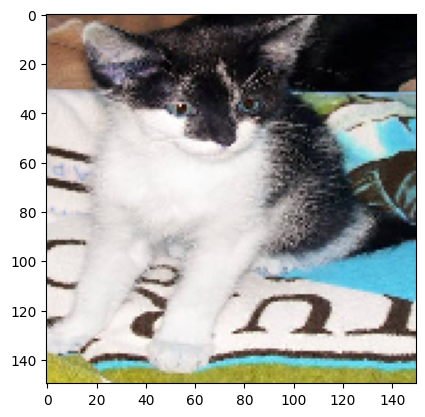

In [18]:
import matplotlib.pyplot as plt

img=random.randint(0, 25000)
plt.imshow(X[img])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state=32)

### Compile Models
Build a model layer by layer, ResNet, Transfer learning with Exception

In [20]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, BatchNormalization, GlobalAveragePooling2D, MaxPooling2D, Flatten, Dropout, LeakyReLU

### 1. Customized Model

In [100]:
model = Sequential()

model.add(Conv2D(32, 3, 3, input_shape=(150, 150, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='LeakyReLU'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 batch_normalization_9 (Bat  (None, 50, 50, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 25, 25, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 23, 23, 64)        18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 21, 21, 64)       

In [101]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_validation, y_validation))

Epoch 1/20
625/625 [==============================] - 6s 10ms/step - loss: 0.6363 - accuracy: 0.6379 - val_loss: 0.6338 - val_accuracy: 0.6314
Epoch 2/20
625/625 [==============================] - 6s 9ms/step - loss: 0.6039 - accuracy: 0.6714 - val_loss: 0.6228 - val_accuracy: 0.6674
Epoch 3/20
625/625 [==============================] - 5s 9ms/step - loss: 0.5748 - accuracy: 0.7002 - val_loss: 0.5664 - val_accuracy: 0.7038
Epoch 4/20
625/625 [==============================] - 5s 9ms/step - loss: 0.5404 - accuracy: 0.7292 - val_loss: 0.5354 - val_accuracy: 0.7388
Epoch 5/20
625/625 [==============================] - 6s 9ms/step - loss: 0.5151 - accuracy: 0.7504 - val_loss: 0.6118 - val_accuracy: 0.6874
Epoch 6/20
625/625 [==============================] - 6s 9ms/step - loss: 0.4918 - accuracy: 0.7649 - val_loss: 0.6473 - val_accuracy: 0.6352
Epoch 7/20
625/625 [==============================] - 6s 9ms/step - loss: 0.4812 - accuracy: 0.7732 - val_loss: 0.4461 - val_accuracy: 0.7988
Epoch

In [104]:
score = model.evaluate(X_validation, y_validation)
print('Random model validation accuracy:', score[1])

157/157 [==============================] - 1s 3ms/step - loss: 0.4112 - accuracy: 0.8134
Random model validation accuracy: 0.8133999705314636


### 2. ResNet

In [122]:
from tensorflow.keras.applications import ResNet50

# ResNet50 reduces spatial dimensions to a single vector >> can exclude Flatten layer
model_res = Sequential()
model_res.add(ResNet50(include_top=False, pooling='max', weights='imagenet'))
model_res.add(Dense(250, activation='relu'))
model_res.add(Dense(1, activation='sigmoid'))
model_res.layers[0].trainable = False

model_res.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_23 (Dense)            (None, 250)               512250    
                                                                 
 dense_24 (Dense)            (None, 1)                 251       
                                                                 
Total params: 24100213 (91.94 MB)
Trainable params: 512501 (1.96 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [123]:
model_res.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [124]:
model_res.fit(X_train, y_train, epochs=20, validation_data=(X_validation, y_validation))

Epoch 1/20
625/625 [==============================] - 43s 62ms/step - loss: 0.2601 - accuracy: 0.9512 - val_loss: 0.0879 - val_accuracy: 0.9668
Epoch 2/20
625/625 [==============================] - 38s 60ms/step - loss: 0.0791 - accuracy: 0.9703 - val_loss: 0.0988 - val_accuracy: 0.9610
Epoch 3/20
625/625 [==============================] - 38s 61ms/step - loss: 0.0724 - accuracy: 0.9712 - val_loss: 0.0871 - val_accuracy: 0.9674
Epoch 4/20
625/625 [==============================] - 38s 62ms/step - loss: 0.0620 - accuracy: 0.9753 - val_loss: 0.0882 - val_accuracy: 0.9680
Epoch 5/20
625/625 [==============================] - 39s 62ms/step - loss: 0.0597 - accuracy: 0.9768 - val_loss: 0.0863 - val_accuracy: 0.9680
Epoch 6/20
625/625 [==============================] - 39s 63ms/step - loss: 0.0508 - accuracy: 0.9796 - val_loss: 0.0907 - val_accuracy: 0.9674
Epoch 7/20
625/625 [==============================] - 39s 63ms/step - loss: 0.0457 - accuracy: 0.9821 - val_loss: 0.0889 - val_accuracy:

In [125]:
score = model_res.evaluate(X_validation, y_validation)
print('ResNet50 validation accuracy:', score[1])

157/157 [==============================] - 8s 48ms/step - loss: 0.2266 - accuracy: 0.9660
ResNet50 validation accuracy: 0.9660000205039978


### 3. Xception

In [109]:
from tensorflow.keras.applications import Xception
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Rescaling

base_model = Xception(weights='imagenet', input_shape=(150, 150, 3), include_top=False)
base_model.trainable = False

inputs = Input(shape=(150, 150, 3))
scale_layer = Rescaling(scale=1 / 127.5, offset = -1)
x = scale_layer(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)
model_xcept = Model(inputs, outputs)

model_xcept.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 activation_2 (Activation)   (None, 2048)              0         
                                                                 
 dropout_8 (Dropout)         (None, 2048)              0         
                                                           

In [110]:
# from keras.losses import BinaryCrossentropy
model_xcept.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [112]:
model_xcept.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

Epoch 1/10
625/625 [==============================] - 48s 74ms/step - loss: 0.1216 - accuracy: 0.9503 - val_loss: 0.0913 - val_accuracy: 0.9656
Epoch 2/10
625/625 [==============================] - 45s 73ms/step - loss: 0.0887 - accuracy: 0.9641 - val_loss: 0.0909 - val_accuracy: 0.9650
Epoch 3/10
625/625 [==============================] - 46s 73ms/step - loss: 0.0843 - accuracy: 0.9667 - val_loss: 0.0939 - val_accuracy: 0.9650
Epoch 4/10
625/625 [==============================] - 46s 73ms/step - loss: 0.0820 - accuracy: 0.9671 - val_loss: 0.0893 - val_accuracy: 0.9668
Epoch 5/10
625/625 [==============================] - 46s 73ms/step - loss: 0.0801 - accuracy: 0.9690 - val_loss: 0.0883 - val_accuracy: 0.9682
Epoch 6/10
625/625 [==============================] - 46s 73ms/step - loss: 0.0789 - accuracy: 0.9683 - val_loss: 0.0913 - val_accuracy: 0.9658
Epoch 7/10
625/625 [==============================] - 46s 73ms/step - loss: 0.0774 - accuracy: 0.9693 - val_loss: 0.0898 - val_accuracy:

In [113]:
score = model_xcept.evaluate(X_validation, y_validation)
print('Xception validation accuracy:', score[1])

157/157 [==============================] - 9s 59ms/step - loss: 0.0903 - accuracy: 0.9688
Xception validation accuracy: 0.9688000082969666


### Predict on test data

In [ ]:
from tqdm import tqdm

images_test = []

for i in tqdm(os.listdir('/content/kaggle/test/')):
    img_id = i.split('.')[0]
    img = cv2.imread('/content/kaggle/test/' + i, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    images_test.append([np.array(img), img_id])

In [119]:
pred_list = []
id_list = []

for i in tqdm(images_test):
    img_data = i[0]
    img_id = i[1]
    data = img_data.reshape(-1, 150, 150, 3)
    y_predict = model.predict([data])[0][0]
    id_list.append(img_id)
    pred_list.append(y_predict)

  0%|          | 0/12500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 102ms/step


  0%|          | 1/12500 [00:00<28:52,  7.21it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 3/12500 [00:00<15:16, 13.64it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 6/12500 [00:00<12:11, 17.08it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 8/12500 [00:00<11:50, 17.57it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 10/12500 [00:00<11:22, 18.31it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 12/12500 [00:00<11:05, 18.76it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 14/12500 [00:00<10:52, 19.13it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 16/12500 [00:00<10:57, 19.00it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 18/12500 [00:01<10:52, 19.13it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 20/12500 [00:01<10:48, 19.24it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 22/12500 [00:01<10:51, 19.17it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 24/12500 [00:01<10:48, 19.23it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 26/12500 [00:01<11:09, 18.62it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 29/12500 [00:01<10:49, 19.20it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 32/12500 [00:01<10:35, 19.61it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 34/12500 [00:01<10:42, 19.40it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 36/12500 [00:01<10:39, 19.48it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 38/12500 [00:02<10:37, 19.54it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 41/12500 [00:02<10:27, 19.85it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 43/12500 [00:02<10:33, 19.67it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 45/12500 [00:02<10:37, 19.54it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 47/12500 [00:02<10:42, 19.38it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 49/12500 [00:02<10:39, 19.46it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 52/12500 [00:02<10:37, 19.52it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 55/12500 [00:02<10:27, 19.84it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 58/12500 [00:03<10:24, 19.92it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 60/12500 [00:03<10:25, 19.88it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 62/12500 [00:03<10:29, 19.76it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 65/12500 [00:03<10:26, 19.85it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 68/12500 [00:03<10:21, 20.00it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 70/12500 [00:03<10:25, 19.88it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 72/12500 [00:03<10:37, 19.50it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 74/12500 [00:03<10:33, 19.62it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 77/12500 [00:04<10:23, 19.92it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 79/12500 [00:04<10:30, 19.71it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 81/12500 [00:04<10:36, 19.51it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 84/12500 [00:04<10:26, 19.81it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 86/12500 [00:04<10:43, 19.30it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 88/12500 [00:04<10:41, 19.36it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 90/12500 [00:04<10:47, 19.17it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 92/12500 [00:04<10:45, 19.23it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 95/12500 [00:04<10:37, 19.47it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 97/12500 [00:05<10:37, 19.46it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 99/12500 [00:05<10:45, 19.21it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 101/12500 [00:05<10:40, 19.37it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 103/12500 [00:05<10:38, 19.43it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 105/12500 [00:05<10:47, 19.15it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 107/12500 [00:05<10:44, 19.23it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 110/12500 [00:05<10:27, 19.74it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 113/12500 [00:05<10:16, 20.08it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 116/12500 [00:06<10:21, 19.92it/s]

1/1 [==============================] - 0s 16ms/step


  1%|          | 118/12500 [00:06<10:21, 19.93it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 121/12500 [00:06<10:16, 20.08it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 124/12500 [00:06<10:12, 20.19it/s]

1/1 [==============================] - 0s 16ms/step


  1%|          | 127/12500 [00:06<10:16, 20.06it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 130/12500 [00:06<10:13, 20.17it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 133/12500 [00:06<10:20, 19.92it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 135/12500 [00:06<10:23, 19.82it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 137/12500 [00:07<10:46, 19.12it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 139/12500 [00:07<10:47, 19.08it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 142/12500 [00:07<10:34, 19.47it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 144/12500 [00:07<10:41, 19.27it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 146/12500 [00:07<10:54, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 149/12500 [00:07<10:40, 19.28it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 152/12500 [00:07<10:42, 19.21it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 154/12500 [00:07<10:44, 19.17it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 156/12500 [00:08<10:55, 18.82it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 158/12500 [00:08<10:45, 19.11it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 161/12500 [00:08<10:40, 19.28it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 163/12500 [00:08<10:56, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 165/12500 [00:08<11:23, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


  1%|▏         | 167/12500 [00:08<11:07, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 169/12500 [00:08<10:54, 18.84it/s]

1/1 [==============================] - 0s 18ms/step


  1%|▏         | 171/12500 [00:08<10:54, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 173/12500 [00:08<10:46, 19.07it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 176/12500 [00:09<10:27, 19.62it/s]

1/1 [==============================] - 0s 18ms/step


  1%|▏         | 178/12500 [00:09<10:32, 19.48it/s]

1/1 [==============================] - 0s 18ms/step


  1%|▏         | 180/12500 [00:09<10:38, 19.30it/s]

1/1 [==============================] - 0s 18ms/step


  1%|▏         | 182/12500 [00:09<10:45, 19.09it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▏         | 184/12500 [00:09<10:37, 19.31it/s]

1/1 [==============================] - 0s 18ms/step


  1%|▏         | 186/12500 [00:09<10:36, 19.35it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 188/12500 [00:09<10:42, 19.17it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 190/12500 [00:09<10:34, 19.40it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 192/12500 [00:09<10:37, 19.32it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 194/12500 [00:10<10:33, 19.42it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 196/12500 [00:10<10:36, 19.32it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 198/12500 [00:10<10:44, 19.07it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 200/12500 [00:10<10:42, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 202/12500 [00:10<10:43, 19.12it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 204/12500 [00:10<10:47, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 206/12500 [00:10<11:00, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 209/12500 [00:10<10:38, 19.25it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 212/12500 [00:10<10:32, 19.43it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 215/12500 [00:11<10:30, 19.48it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 218/12500 [00:11<10:17, 19.89it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 220/12500 [00:11<10:16, 19.92it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 223/12500 [00:11<10:13, 20.00it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 225/12500 [00:11<10:18, 19.83it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 228/12500 [00:11<10:07, 20.19it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 231/12500 [00:11<10:06, 20.23it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 234/12500 [00:12<10:16, 19.89it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 237/12500 [00:12<10:13, 20.00it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 240/12500 [00:12<10:12, 20.00it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 242/12500 [00:12<10:28, 19.50it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 244/12500 [00:12<10:25, 19.59it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 247/12500 [00:12<10:15, 19.91it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 249/12500 [00:12<10:15, 19.90it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 251/12500 [00:12<10:19, 19.77it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 253/12500 [00:13<10:18, 19.81it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 256/12500 [00:13<10:13, 19.96it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 259/12500 [00:13<10:07, 20.16it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 262/12500 [00:13<10:19, 19.77it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 265/12500 [00:13<10:13, 19.95it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 268/12500 [00:13<10:05, 20.19it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 271/12500 [00:13<10:16, 19.82it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 273/12500 [00:14<10:18, 19.77it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 276/12500 [00:14<10:08, 20.08it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 279/12500 [00:14<10:12, 19.96it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 281/12500 [00:14<10:15, 19.85it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 284/12500 [00:14<10:11, 19.96it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 287/12500 [00:14<10:15, 19.84it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 289/12500 [00:14<10:19, 19.71it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 291/12500 [00:14<10:23, 19.59it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 293/12500 [00:15<10:21, 19.65it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 296/12500 [00:15<10:25, 19.53it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 298/12500 [00:15<10:22, 19.60it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 300/12500 [00:15<10:22, 19.59it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 303/12500 [00:15<10:19, 19.68it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 305/12500 [00:15<10:25, 19.49it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 307/12500 [00:15<10:30, 19.33it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 310/12500 [00:15<10:20, 19.66it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 312/12500 [00:16<10:17, 19.74it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 314/12500 [00:16<10:20, 19.65it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 317/12500 [00:16<10:08, 20.04it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 320/12500 [00:16<10:09, 19.99it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 323/12500 [00:16<10:09, 19.97it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 326/12500 [00:16<10:04, 20.13it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 329/12500 [00:16<09:56, 20.40it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 332/12500 [00:17<10:09, 19.96it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 334/12500 [00:17<10:14, 19.80it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 337/12500 [00:17<10:09, 19.95it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 340/12500 [00:17<10:11, 19.87it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 342/12500 [00:17<10:16, 19.72it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 345/12500 [00:17<10:08, 19.96it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 348/12500 [00:17<10:07, 20.00it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 350/12500 [00:17<10:15, 19.75it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 352/12500 [00:18<10:14, 19.76it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 355/12500 [00:18<10:04, 20.09it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 358/12500 [00:18<10:05, 20.06it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 361/12500 [00:18<10:14, 19.75it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 364/12500 [00:18<10:07, 19.98it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 367/12500 [00:18<10:03, 20.12it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 370/12500 [00:18<10:09, 19.89it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 373/12500 [00:19<10:04, 20.06it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 376/12500 [00:19<10:04, 20.06it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 379/12500 [00:19<10:15, 19.70it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 381/12500 [00:19<10:19, 19.57it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 383/12500 [00:19<10:16, 19.65it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 386/12500 [00:19<10:18, 19.58it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 388/12500 [00:19<10:21, 19.49it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 391/12500 [00:20<10:08, 19.89it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 393/12500 [00:20<10:13, 19.75it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 395/12500 [00:20<10:15, 19.66it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 398/12500 [00:20<10:09, 19.85it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 400/12500 [00:20<10:33, 19.09it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 402/12500 [00:20<10:33, 19.09it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 404/12500 [00:20<10:53, 18.52it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 406/12500 [00:20<10:45, 18.73it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 408/12500 [00:20<10:39, 18.90it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 410/12500 [00:21<10:39, 18.90it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 412/12500 [00:21<10:40, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 414/12500 [00:21<10:54, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 416/12500 [00:21<10:43, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 418/12500 [00:21<10:54, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 420/12500 [00:21<10:51, 18.54it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 422/12500 [00:21<10:47, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 424/12500 [00:21<10:59, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 426/12500 [00:21<10:49, 18.58it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 429/12500 [00:22<10:29, 19.17it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 431/12500 [00:22<10:31, 19.10it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 433/12500 [00:22<10:42, 18.77it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 435/12500 [00:22<10:39, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 437/12500 [00:22<11:05, 18.13it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▎         | 439/12500 [00:22<11:21, 17.71it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▎         | 441/12500 [00:22<11:23, 17.65it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▎         | 443/12500 [00:22<11:14, 17.87it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▎         | 446/12500 [00:22<11:06, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▎         | 449/12500 [00:23<10:45, 18.68it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▎         | 451/12500 [00:23<10:58, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▎         | 454/12500 [00:23<10:44, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▎         | 456/12500 [00:23<10:35, 18.95it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▎         | 459/12500 [00:23<10:32, 19.05it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▎         | 461/12500 [00:23<10:26, 19.22it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▎         | 463/12500 [00:23<10:26, 19.22it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▎         | 465/12500 [00:23<10:36, 18.92it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▎         | 467/12500 [00:24<10:30, 19.08it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 469/12500 [00:24<10:35, 18.94it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 471/12500 [00:24<10:36, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 473/12500 [00:24<10:27, 19.17it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 475/12500 [00:24<10:25, 19.22it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 477/12500 [00:24<10:27, 19.17it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 480/12500 [00:24<10:11, 19.67it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 483/12500 [00:24<10:00, 20.00it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 485/12500 [00:24<10:05, 19.85it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 487/12500 [00:25<10:11, 19.65it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 489/12500 [00:25<10:08, 19.72it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 491/12500 [00:25<10:29, 19.07it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 493/12500 [00:25<10:23, 19.27it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 495/12500 [00:25<10:24, 19.22it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 498/12500 [00:25<10:10, 19.67it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 501/12500 [00:25<10:05, 19.82it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 504/12500 [00:25<10:03, 19.88it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 507/12500 [00:26<09:59, 20.00it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 510/12500 [00:26<09:57, 20.08it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 513/12500 [00:26<10:02, 19.90it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 515/12500 [00:26<10:04, 19.84it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 518/12500 [00:26<09:55, 20.11it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 521/12500 [00:26<09:51, 20.26it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 524/12500 [00:26<09:55, 20.11it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 527/12500 [00:27<09:59, 19.97it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 529/12500 [00:27<10:01, 19.91it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 531/12500 [00:27<10:05, 19.77it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 533/12500 [00:27<10:05, 19.75it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 535/12500 [00:27<10:03, 19.81it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 537/12500 [00:27<10:03, 19.83it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 540/12500 [00:27<10:06, 19.72it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 543/12500 [00:27<09:57, 20.00it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 546/12500 [00:28<09:55, 20.07it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 549/12500 [00:28<10:03, 19.80it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 552/12500 [00:28<09:56, 20.04it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 555/12500 [00:28<09:57, 20.00it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 558/12500 [00:28<09:56, 20.03it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 561/12500 [00:28<09:56, 20.03it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 564/12500 [00:28<09:51, 20.16it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 567/12500 [00:29<09:58, 19.95it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 569/12500 [00:29<10:03, 19.77it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 571/12500 [00:29<10:02, 19.81it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 573/12500 [00:29<10:07, 19.62it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 576/12500 [00:29<10:06, 19.64it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 578/12500 [00:29<10:14, 19.39it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 581/12500 [00:29<10:04, 19.72it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 584/12500 [00:29<09:54, 20.04it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 586/12500 [00:30<10:07, 19.60it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 589/12500 [00:30<09:59, 19.86it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 592/12500 [00:30<09:57, 19.95it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 594/12500 [00:30<10:11, 19.46it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 597/12500 [00:30<10:05, 19.66it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 599/12500 [00:30<10:06, 19.64it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 602/12500 [00:30<09:57, 19.91it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 604/12500 [00:30<10:06, 19.62it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 606/12500 [00:31<10:10, 19.50it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 608/12500 [00:31<10:05, 19.63it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 610/12500 [00:31<10:04, 19.68it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▍         | 612/12500 [00:31<10:15, 19.32it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 615/12500 [00:31<09:59, 19.82it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 618/12500 [00:31<09:48, 20.18it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 621/12500 [00:31<09:54, 19.97it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 624/12500 [00:31<09:47, 20.20it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 627/12500 [00:32<09:46, 20.25it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 630/12500 [00:32<09:57, 19.87it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 632/12500 [00:32<10:07, 19.53it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 634/12500 [00:32<10:13, 19.35it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▌         | 637/12500 [00:32<10:04, 19.63it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 639/12500 [00:32<10:06, 19.54it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▌         | 642/12500 [00:32<09:59, 19.79it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 645/12500 [00:33<09:50, 20.08it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 647/12500 [00:33<09:51, 20.04it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 649/12500 [00:33<09:58, 19.82it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 652/12500 [00:33<09:53, 19.96it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 655/12500 [00:33<09:48, 20.11it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 658/12500 [00:33<09:51, 20.02it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 661/12500 [00:33<09:48, 20.11it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 664/12500 [00:34<09:50, 20.04it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 667/12500 [00:34<09:57, 19.82it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 670/12500 [00:34<09:52, 19.97it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 672/12500 [00:34<10:01, 19.67it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 674/12500 [00:34<10:14, 19.25it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 676/12500 [00:34<10:31, 18.73it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 678/12500 [00:34<10:25, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 680/12500 [00:34<10:17, 19.14it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 682/12500 [00:34<10:21, 19.01it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 684/12500 [00:35<10:43, 18.37it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 686/12500 [00:35<10:44, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 688/12500 [00:35<10:39, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 690/12500 [00:35<10:55, 18.00it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 692/12500 [00:35<10:39, 18.47it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 694/12500 [00:35<10:42, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 696/12500 [00:35<10:40, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 698/12500 [00:35<10:35, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 700/12500 [00:35<10:23, 18.93it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 702/12500 [00:36<10:37, 18.52it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 704/12500 [00:36<10:39, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 706/12500 [00:36<10:27, 18.80it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 708/12500 [00:36<10:20, 19.00it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 710/12500 [00:36<10:36, 18.53it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 712/12500 [00:36<10:45, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 714/12500 [00:36<10:34, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 716/12500 [00:36<10:29, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 718/12500 [00:36<10:23, 18.89it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 720/12500 [00:37<10:31, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 722/12500 [00:37<10:31, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 725/12500 [00:37<10:15, 19.12it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 727/12500 [00:37<10:18, 19.02it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 729/12500 [00:37<10:33, 18.57it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 731/12500 [00:37<10:39, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 733/12500 [00:37<10:37, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 735/12500 [00:37<10:28, 18.72it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 737/12500 [00:37<10:47, 18.17it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 739/12500 [00:38<10:51, 18.05it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 742/12500 [00:38<10:21, 18.92it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 744/12500 [00:38<10:17, 19.03it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 747/12500 [00:38<10:14, 19.14it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 749/12500 [00:38<10:17, 19.04it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 751/12500 [00:38<10:22, 18.87it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 753/12500 [00:38<10:21, 18.90it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 755/12500 [00:38<10:18, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 757/12500 [00:38<10:19, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 759/12500 [00:39<10:14, 19.11it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 761/12500 [00:39<10:06, 19.35it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 763/12500 [00:39<10:03, 19.45it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 765/12500 [00:39<10:16, 19.03it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 767/12500 [00:39<10:22, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 769/12500 [00:39<10:14, 19.08it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 771/12500 [00:39<10:10, 19.21it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 773/12500 [00:39<10:11, 19.17it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 775/12500 [00:39<10:52, 17.98it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 777/12500 [00:40<10:50, 18.02it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 779/12500 [00:40<10:35, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 782/12500 [00:40<10:08, 19.27it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▋         | 784/12500 [00:40<10:19, 18.90it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 787/12500 [00:40<10:02, 19.44it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▋         | 789/12500 [00:40<10:09, 19.23it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 792/12500 [00:40<10:06, 19.31it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▋         | 795/12500 [00:40<09:59, 19.51it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▋         | 797/12500 [00:41<10:04, 19.37it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▋         | 800/12500 [00:41<09:58, 19.53it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 802/12500 [00:41<09:58, 19.54it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▋         | 804/12500 [00:41<10:00, 19.47it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 807/12500 [00:41<09:47, 19.90it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 809/12500 [00:41<10:06, 19.28it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 811/12500 [00:41<10:04, 19.33it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 814/12500 [00:41<09:53, 19.70it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 816/12500 [00:42<09:54, 19.66it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 818/12500 [00:42<09:54, 19.66it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 820/12500 [00:42<10:00, 19.44it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 823/12500 [00:42<10:00, 19.45it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 825/12500 [00:42<10:28, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 827/12500 [00:42<10:28, 18.58it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 829/12500 [00:42<10:30, 18.51it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 832/12500 [00:42<10:02, 19.35it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 835/12500 [00:43<09:53, 19.67it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 837/12500 [00:43<10:04, 19.28it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 839/12500 [00:43<10:03, 19.31it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 842/12500 [00:43<09:55, 19.58it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 844/12500 [00:43<09:56, 19.55it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 846/12500 [00:43<09:55, 19.58it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 849/12500 [00:43<09:48, 19.78it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 852/12500 [00:43<09:40, 20.05it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 855/12500 [00:44<09:50, 19.72it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 858/12500 [00:44<09:44, 19.92it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 861/12500 [00:44<09:42, 19.99it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 863/12500 [00:44<09:48, 19.78it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 865/12500 [00:44<09:59, 19.40it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 867/12500 [00:44<10:01, 19.34it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 869/12500 [00:44<09:56, 19.51it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 872/12500 [00:44<09:47, 19.81it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 874/12500 [00:45<09:52, 19.61it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 876/12500 [00:45<09:57, 19.47it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 878/12500 [00:45<09:58, 19.43it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 881/12500 [00:45<09:47, 19.79it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 883/12500 [00:45<09:57, 19.43it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 886/12500 [00:45<09:50, 19.66it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 888/12500 [00:45<09:50, 19.68it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 890/12500 [00:45<09:47, 19.76it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 892/12500 [00:45<09:53, 19.57it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 894/12500 [00:46<09:57, 19.43it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 896/12500 [00:46<09:55, 19.50it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 899/12500 [00:46<09:38, 20.04it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 901/12500 [00:46<09:50, 19.64it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 903/12500 [00:46<09:52, 19.58it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 905/12500 [00:46<09:52, 19.57it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 908/12500 [00:46<09:39, 19.99it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 910/12500 [00:46<09:46, 19.74it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 913/12500 [00:46<09:45, 19.80it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 915/12500 [00:47<09:50, 19.61it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 917/12500 [00:47<09:55, 19.46it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 919/12500 [00:47<10:15, 18.82it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 922/12500 [00:47<09:59, 19.30it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 925/12500 [00:47<09:50, 19.59it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 927/12500 [00:47<09:55, 19.42it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 930/12500 [00:47<09:46, 19.74it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 932/12500 [00:47<09:44, 19.79it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 934/12500 [00:48<09:50, 19.60it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 936/12500 [00:48<10:26, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 938/12500 [00:48<10:13, 18.84it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 940/12500 [00:48<10:20, 18.63it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 942/12500 [00:48<10:13, 18.85it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 944/12500 [00:48<10:05, 19.08it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 946/12500 [00:48<10:13, 18.82it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 948/12500 [00:48<10:20, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 951/12500 [00:48<09:59, 19.28it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 953/12500 [00:49<10:15, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 955/12500 [00:49<10:17, 18.69it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 957/12500 [00:49<10:15, 18.74it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 959/12500 [00:49<10:20, 18.61it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 961/12500 [00:49<10:21, 18.57it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 963/12500 [00:49<10:28, 18.36it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 965/12500 [00:49<10:32, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 967/12500 [00:49<10:16, 18.71it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 969/12500 [00:49<10:18, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 971/12500 [00:50<10:07, 18.97it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 973/12500 [00:50<10:16, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 975/12500 [00:50<10:04, 19.06it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 977/12500 [00:50<10:09, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 979/12500 [00:50<10:06, 19.01it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 981/12500 [00:50<10:09, 18.90it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 983/12500 [00:50<10:06, 18.97it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 985/12500 [00:50<09:59, 19.21it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 987/12500 [00:50<09:59, 19.20it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 989/12500 [00:51<09:57, 19.28it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 991/12500 [00:51<10:06, 18.97it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 993/12500 [00:51<10:02, 19.11it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 995/12500 [00:51<10:10, 18.85it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 997/12500 [00:51<10:23, 18.45it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 999/12500 [00:51<10:33, 18.17it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 1001/12500 [00:51<10:17, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 1003/12500 [00:51<10:05, 18.97it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 1006/12500 [00:51<09:50, 19.47it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 1008/12500 [00:52<09:53, 19.36it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 1010/12500 [00:52<09:52, 19.41it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 1012/12500 [00:52<09:48, 19.51it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 1014/12500 [00:52<09:47, 19.54it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 1016/12500 [00:52<10:07, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 1018/12500 [00:52<10:18, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 1020/12500 [00:52<10:10, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 1022/12500 [00:52<10:08, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 1025/12500 [00:52<09:50, 19.43it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 1027/12500 [00:53<10:00, 19.09it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 1029/12500 [00:53<09:53, 19.32it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 1031/12500 [00:53<09:48, 19.48it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 1033/12500 [00:53<09:49, 19.46it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 1035/12500 [00:53<09:55, 19.25it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 1037/12500 [00:53<09:52, 19.36it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 1039/12500 [00:53<09:49, 19.43it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 1042/12500 [00:53<09:42, 19.66it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 1044/12500 [00:53<09:49, 19.42it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 1046/12500 [00:54<31:17,  6.10it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1048/12500 [00:54<25:39,  7.44it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1050/12500 [00:55<21:29,  8.88it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 1052/12500 [00:55<18:40, 10.22it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 1054/12500 [00:55<17:03, 11.19it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 1056/12500 [00:55<15:31, 12.29it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1058/12500 [00:55<14:19, 13.31it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 1060/12500 [00:55<13:24, 14.23it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1062/12500 [00:55<12:53, 14.79it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 1064/12500 [00:55<12:45, 14.94it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1066/12500 [00:56<12:10, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1068/12500 [00:56<11:49, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1070/12500 [00:56<11:41, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1072/12500 [00:56<11:51, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1074/12500 [00:56<11:41, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 1076/12500 [00:56<11:27, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 1078/12500 [00:56<11:25, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1080/12500 [00:56<11:25, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 1082/12500 [00:56<11:39, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1084/12500 [00:57<11:29, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1086/12500 [00:57<11:20, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1088/12500 [00:57<11:16, 16.87it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▊         | 1090/12500 [00:57<11:48, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1092/12500 [00:57<11:49, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1094/12500 [00:57<11:37, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1096/12500 [00:57<11:29, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1098/12500 [00:57<11:51, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1100/12500 [00:58<11:39, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1102/12500 [00:58<11:38, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1104/12500 [00:58<11:35, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1106/12500 [00:58<11:33, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1108/12500 [00:58<11:48, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1110/12500 [00:58<11:30, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1112/12500 [00:58<11:21, 16.70it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1114/12500 [00:58<11:07, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1116/12500 [00:59<11:26, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1118/12500 [00:59<11:19, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1120/12500 [00:59<11:09, 17.01it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 1122/12500 [00:59<11:24, 16.62it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 1124/12500 [00:59<11:41, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1126/12500 [00:59<12:03, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1128/12500 [00:59<11:45, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1130/12500 [00:59<11:35, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 1132/12500 [01:00<11:29, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1134/12500 [01:00<11:25, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1136/12500 [01:00<11:31, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 1138/12500 [01:00<11:32, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 1140/12500 [01:00<11:35, 16.34it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 1142/12500 [01:00<11:36, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1144/12500 [01:00<11:51, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1146/12500 [01:00<11:38, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1148/12500 [01:01<11:29, 16.47it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 1150/12500 [01:01<11:24, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1152/12500 [01:01<11:18, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1154/12500 [01:01<11:40, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1156/12500 [01:01<11:38, 16.25it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 1158/12500 [01:01<11:50, 15.97it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1160/12500 [01:01<11:37, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1162/12500 [01:01<11:47, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1164/12500 [01:01<11:37, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1166/12500 [01:02<11:34, 16.33it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1168/12500 [01:02<11:24, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1170/12500 [01:02<11:30, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1172/12500 [01:02<12:04, 15.64it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 1174/12500 [01:02<11:34, 16.30it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1176/12500 [01:02<11:13, 16.81it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 1178/12500 [01:02<11:02, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1180/12500 [01:02<11:11, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1182/12500 [01:03<11:13, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1184/12500 [01:03<11:09, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1186/12500 [01:03<11:10, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 1188/12500 [01:03<11:08, 16.91it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1190/12500 [01:03<11:20, 16.63it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1192/12500 [01:03<11:12, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1194/12500 [01:03<10:57, 17.20it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 1196/12500 [01:03<10:51, 17.36it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1198/12500 [01:04<10:59, 17.14it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 1200/12500 [01:04<10:44, 17.52it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1202/12500 [01:04<10:42, 17.58it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 1204/12500 [01:04<10:37, 17.72it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1206/12500 [01:04<11:27, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1208/12500 [01:04<11:59, 15.70it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1210/12500 [01:04<11:41, 16.09it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 1212/12500 [01:04<11:28, 16.40it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 1214/12500 [01:04<11:03, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1216/12500 [01:05<11:21, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1218/12500 [01:05<11:23, 16.50it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 1220/12500 [01:05<11:08, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1222/12500 [01:05<11:12, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1224/12500 [01:05<11:20, 16.57it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1226/12500 [01:05<11:40, 16.11it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 1228/12500 [01:05<11:24, 16.46it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 1230/12500 [01:05<11:00, 17.07it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1232/12500 [01:06<11:00, 17.07it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 1234/12500 [01:06<10:56, 17.17it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 1236/12500 [01:06<10:44, 17.47it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 1238/12500 [01:06<10:27, 17.94it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 1240/12500 [01:06<10:13, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 1242/12500 [01:06<10:08, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 1244/12500 [01:06<10:09, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 1246/12500 [01:06<09:56, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 1248/12500 [01:06<09:53, 18.96it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1251/12500 [01:07<09:41, 19.33it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 1253/12500 [01:07<09:59, 18.76it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1255/12500 [01:07<09:56, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1257/12500 [01:07<09:48, 19.11it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1259/12500 [01:07<09:59, 18.76it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 1262/12500 [01:07<10:03, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1264/12500 [01:07<09:54, 18.90it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1267/12500 [01:07<09:42, 19.29it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1269/12500 [01:07<09:42, 19.30it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1271/12500 [01:08<09:58, 18.75it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1273/12500 [01:08<09:51, 18.99it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1276/12500 [01:08<09:39, 19.36it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1278/12500 [01:08<09:40, 19.34it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1280/12500 [01:08<09:48, 19.05it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1282/12500 [01:08<09:41, 19.30it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1284/12500 [01:08<09:38, 19.39it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1286/12500 [01:08<09:40, 19.31it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1289/12500 [01:09<09:44, 19.19it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1291/12500 [01:09<09:59, 18.69it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1293/12500 [01:09<10:05, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1295/12500 [01:09<10:03, 18.58it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1297/12500 [01:09<09:59, 18.68it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1299/12500 [01:09<10:02, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1301/12500 [01:09<10:05, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1304/12500 [01:09<09:43, 19.19it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1307/12500 [01:09<09:36, 19.40it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1309/12500 [01:10<09:40, 19.29it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1312/12500 [01:10<09:29, 19.63it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1314/12500 [01:10<09:28, 19.66it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1316/12500 [01:10<09:44, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1318/12500 [01:10<09:38, 19.33it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1320/12500 [01:10<09:39, 19.30it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1322/12500 [01:10<09:35, 19.41it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1325/12500 [01:10<09:35, 19.42it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1327/12500 [01:11<09:44, 19.12it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1329/12500 [01:11<09:39, 19.27it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1331/12500 [01:11<09:47, 19.00it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1333/12500 [01:11<09:47, 19.00it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1335/12500 [01:11<10:00, 18.60it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 1338/12500 [01:11<09:39, 19.27it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1341/12500 [01:11<09:31, 19.53it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1343/12500 [01:11<09:36, 19.34it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1345/12500 [01:11<09:34, 19.40it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1347/12500 [01:12<09:31, 19.50it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1350/12500 [01:12<09:20, 19.89it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1352/12500 [01:12<09:26, 19.67it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1354/12500 [01:12<09:36, 19.34it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1356/12500 [01:12<09:35, 19.35it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1358/12500 [01:12<09:32, 19.47it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1361/12500 [01:12<09:26, 19.68it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1363/12500 [01:12<09:28, 19.60it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1365/12500 [01:12<09:36, 19.33it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1367/12500 [01:13<09:31, 19.48it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 1369/12500 [01:13<09:39, 19.21it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1371/12500 [01:13<09:47, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1373/12500 [01:13<09:45, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1376/12500 [01:13<09:34, 19.35it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1379/12500 [01:13<09:28, 19.55it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1382/12500 [01:13<09:21, 19.79it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1384/12500 [01:13<09:32, 19.43it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1387/12500 [01:14<09:24, 19.69it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1389/12500 [01:14<09:37, 19.23it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1392/12500 [01:14<09:31, 19.43it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1394/12500 [01:14<09:32, 19.38it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 1396/12500 [01:14<09:41, 19.11it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1398/12500 [01:14<09:53, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1401/12500 [01:14<09:40, 19.12it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1403/12500 [01:14<09:36, 19.26it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1405/12500 [01:15<09:34, 19.30it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 1407/12500 [01:15<09:52, 18.72it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 1409/12500 [01:15<09:57, 18.57it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█▏        | 1411/12500 [01:15<10:18, 17.93it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 1413/12500 [01:15<10:05, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 1415/12500 [01:15<10:04, 18.35it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 1417/12500 [01:15<09:53, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 1419/12500 [01:15<09:44, 18.97it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 1421/12500 [01:15<09:44, 18.96it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1423/12500 [01:16<09:44, 18.95it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 1425/12500 [01:16<09:57, 18.52it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█▏        | 1428/12500 [01:16<09:56, 18.56it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1430/12500 [01:16<10:17, 17.93it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 1432/12500 [01:16<10:07, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 1434/12500 [01:16<10:07, 18.23it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 1436/12500 [01:16<09:53, 18.63it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1438/12500 [01:16<09:54, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1440/12500 [01:16<09:45, 18.89it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1442/12500 [01:17<09:51, 18.71it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1444/12500 [01:17<09:46, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1446/12500 [01:17<09:47, 18.83it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1448/12500 [01:17<09:42, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1450/12500 [01:17<09:50, 18.71it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1452/12500 [01:17<10:02, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1454/12500 [01:17<09:54, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1456/12500 [01:17<09:47, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1458/12500 [01:17<09:45, 18.87it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1460/12500 [01:18<09:52, 18.63it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1462/12500 [01:18<10:04, 18.27it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1464/12500 [01:18<09:52, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1466/12500 [01:18<09:41, 18.97it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1468/12500 [01:18<10:10, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1470/12500 [01:18<10:13, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1472/12500 [01:18<10:06, 18.18it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1474/12500 [01:18<09:54, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1476/12500 [01:18<09:50, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1478/12500 [01:19<09:54, 18.53it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1480/12500 [01:19<09:49, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1482/12500 [01:19<09:42, 18.90it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1484/12500 [01:19<09:37, 19.07it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1486/12500 [01:19<09:41, 18.95it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1488/12500 [01:19<09:46, 18.79it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1490/12500 [01:19<09:41, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1492/12500 [01:19<09:34, 19.17it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1495/12500 [01:19<09:25, 19.45it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1497/12500 [01:19<09:41, 18.93it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1499/12500 [01:20<09:47, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1501/12500 [01:20<09:41, 18.90it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1503/12500 [01:20<09:42, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1505/12500 [01:20<09:51, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1507/12500 [01:20<09:45, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1509/12500 [01:20<09:40, 18.94it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1511/12500 [01:20<09:39, 18.95it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1513/12500 [01:20<09:35, 19.10it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1515/12500 [01:20<09:50, 18.60it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1518/12500 [01:21<09:38, 18.99it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1520/12500 [01:21<09:37, 19.02it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1522/12500 [01:21<09:33, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1524/12500 [01:21<09:39, 18.93it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1527/12500 [01:21<09:25, 19.40it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1530/12500 [01:21<09:20, 19.58it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1532/12500 [01:21<09:23, 19.46it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1534/12500 [01:21<09:23, 19.44it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1536/12500 [01:22<09:22, 19.50it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1538/12500 [01:22<09:25, 19.38it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1541/12500 [01:22<09:21, 19.52it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1543/12500 [01:22<09:35, 19.06it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1545/12500 [01:22<09:39, 18.90it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1547/12500 [01:22<09:33, 19.11it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1549/12500 [01:22<09:30, 19.20it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1551/12500 [01:22<09:32, 19.14it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1553/12500 [01:22<09:30, 19.19it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1555/12500 [01:23<09:30, 19.19it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1557/12500 [01:23<09:27, 19.29it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1559/12500 [01:23<09:30, 19.17it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1561/12500 [01:23<09:24, 19.38it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1563/12500 [01:23<09:24, 19.38it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1565/12500 [01:23<09:19, 19.54it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1568/12500 [01:23<09:10, 19.86it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1570/12500 [01:23<09:25, 19.33it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1572/12500 [01:23<09:20, 19.49it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1574/12500 [01:24<09:19, 19.52it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1576/12500 [01:24<09:27, 19.23it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1578/12500 [01:24<09:31, 19.10it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1580/12500 [01:24<09:30, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1582/12500 [01:24<09:27, 19.24it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1585/12500 [01:24<09:18, 19.53it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1587/12500 [01:24<09:28, 19.20it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1589/12500 [01:24<09:23, 19.38it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1592/12500 [01:24<09:10, 19.81it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1594/12500 [01:25<09:14, 19.67it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1596/12500 [01:25<09:33, 19.02it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1599/12500 [01:25<09:22, 19.38it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1601/12500 [01:25<09:39, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1603/12500 [01:25<09:41, 18.73it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1605/12500 [01:25<09:45, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1607/12500 [01:25<09:35, 18.92it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1610/12500 [01:25<09:24, 19.29it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1612/12500 [01:25<09:20, 19.43it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1614/12500 [01:26<09:33, 18.98it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1616/12500 [01:26<10:09, 17.85it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1619/12500 [01:26<09:42, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1621/12500 [01:26<09:39, 18.76it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1623/12500 [01:26<09:47, 18.50it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1625/12500 [01:26<09:39, 18.76it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1628/12500 [01:26<09:20, 19.41it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 1631/12500 [01:26<09:10, 19.75it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1633/12500 [01:27<09:20, 19.39it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1635/12500 [01:27<09:17, 19.50it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1638/12500 [01:27<09:09, 19.78it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1640/12500 [01:27<09:12, 19.64it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1642/12500 [01:27<09:18, 19.43it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1644/12500 [01:27<09:17, 19.46it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1647/12500 [01:27<09:07, 19.83it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1650/12500 [01:27<09:18, 19.43it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1652/12500 [01:28<09:25, 19.19it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1654/12500 [01:28<09:21, 19.32it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1656/12500 [01:28<09:17, 19.44it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1658/12500 [01:28<09:15, 19.52it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1660/12500 [01:28<09:30, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1663/12500 [01:28<09:19, 19.38it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1666/12500 [01:28<09:08, 19.75it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1668/12500 [01:28<09:13, 19.59it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1670/12500 [01:28<09:22, 19.27it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1672/12500 [01:29<09:24, 19.19it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1674/12500 [01:29<09:20, 19.32it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1676/12500 [01:29<09:16, 19.45it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1678/12500 [01:29<09:41, 18.63it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1680/12500 [01:29<09:45, 18.47it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1682/12500 [01:29<09:50, 18.33it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1684/12500 [01:29<09:45, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 1686/12500 [01:29<09:48, 18.36it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1688/12500 [01:29<09:49, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 1690/12500 [01:30<09:43, 18.51it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1692/12500 [01:30<09:38, 18.68it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 1694/12500 [01:30<09:38, 18.70it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1696/12500 [01:30<09:50, 18.28it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1698/12500 [01:30<09:52, 18.22it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▎        | 1700/12500 [01:30<09:53, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 1702/12500 [01:30<09:46, 18.42it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1704/12500 [01:30<09:58, 18.04it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1706/12500 [01:30<09:45, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1708/12500 [01:31<09:31, 18.87it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▎        | 1710/12500 [01:31<09:38, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1712/12500 [01:31<09:41, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 1714/12500 [01:31<09:49, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▎        | 1716/12500 [01:31<09:57, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1719/12500 [01:31<09:40, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1721/12500 [01:31<09:35, 18.73it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1723/12500 [01:31<09:39, 18.59it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1725/12500 [01:31<09:30, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1728/12500 [01:32<09:14, 19.43it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1730/12500 [01:32<09:19, 19.26it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1732/12500 [01:32<09:35, 18.70it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1734/12500 [01:32<09:39, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1736/12500 [01:32<09:46, 18.36it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1738/12500 [01:32<09:40, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1740/12500 [01:32<09:34, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1742/12500 [01:32<09:27, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1745/12500 [01:33<09:11, 19.49it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1748/12500 [01:33<09:03, 19.77it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1750/12500 [01:33<09:18, 19.26it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1752/12500 [01:33<09:14, 19.38it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1754/12500 [01:33<09:14, 19.38it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1756/12500 [01:33<09:12, 19.44it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1758/12500 [01:33<09:15, 19.33it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1761/12500 [01:33<09:06, 19.64it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1764/12500 [01:33<09:02, 19.79it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1766/12500 [01:34<09:06, 19.64it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1768/12500 [01:34<09:18, 19.23it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1770/12500 [01:34<09:15, 19.33it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1772/12500 [01:34<09:22, 19.08it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1774/12500 [01:34<09:25, 18.95it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1776/12500 [01:34<09:39, 18.52it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1778/12500 [01:34<09:32, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1781/12500 [01:34<09:15, 19.28it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1783/12500 [01:34<09:18, 19.19it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1785/12500 [01:35<09:31, 18.76it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1787/12500 [01:35<09:22, 19.03it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1790/12500 [01:35<09:11, 19.43it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1792/12500 [01:35<09:32, 18.71it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1794/12500 [01:35<09:32, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1796/12500 [01:35<09:22, 19.04it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1798/12500 [01:35<09:19, 19.13it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1800/12500 [01:35<09:15, 19.25it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1802/12500 [01:35<09:14, 19.29it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1804/12500 [01:36<09:24, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1806/12500 [01:36<09:19, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1808/12500 [01:36<09:17, 19.17it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1810/12500 [01:36<09:26, 18.87it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1812/12500 [01:36<09:29, 18.76it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█▍        | 1814/12500 [01:36<09:22, 18.99it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 1817/12500 [01:36<09:11, 19.36it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1819/12500 [01:36<09:09, 19.43it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1821/12500 [01:36<09:10, 19.39it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 1823/12500 [01:37<09:16, 19.19it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1825/12500 [01:37<09:19, 19.09it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1827/12500 [01:37<09:20, 19.05it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 1829/12500 [01:37<09:19, 19.09it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1831/12500 [01:37<09:25, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1833/12500 [01:37<09:25, 18.87it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1835/12500 [01:37<09:23, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1837/12500 [01:37<09:18, 19.09it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 1839/12500 [01:37<09:33, 18.59it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1842/12500 [01:38<09:15, 19.20it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1845/12500 [01:38<08:59, 19.74it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1847/12500 [01:38<08:58, 19.80it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1849/12500 [01:38<09:16, 19.15it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1851/12500 [01:38<09:18, 19.08it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1854/12500 [01:38<09:05, 19.52it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 1857/12500 [01:38<09:05, 19.51it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1860/12500 [01:39<09:01, 19.65it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1862/12500 [01:39<09:00, 19.70it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1864/12500 [01:39<08:59, 19.72it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 1866/12500 [01:39<09:31, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1868/12500 [01:39<09:43, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1870/12500 [01:39<09:35, 18.47it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▍        | 1872/12500 [01:39<09:49, 18.04it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 1874/12500 [01:39<09:43, 18.20it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▌        | 1876/12500 [01:39<09:48, 18.06it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 1878/12500 [01:40<10:01, 17.67it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1880/12500 [01:40<09:48, 18.05it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1882/12500 [01:40<09:37, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1884/12500 [01:40<09:32, 18.54it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 1886/12500 [01:40<09:35, 18.44it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 1888/12500 [01:40<09:29, 18.62it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1890/12500 [01:40<09:19, 18.98it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1892/12500 [01:40<09:12, 19.19it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1894/12500 [01:40<09:14, 19.13it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1897/12500 [01:40<09:01, 19.59it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1899/12500 [01:41<09:02, 19.54it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1901/12500 [01:41<09:02, 19.53it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1903/12500 [01:41<09:16, 19.06it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1905/12500 [01:41<09:16, 19.03it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1907/12500 [01:41<09:09, 19.27it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1909/12500 [01:41<09:06, 19.37it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1911/12500 [01:41<09:11, 19.20it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1914/12500 [01:41<09:05, 19.40it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1917/12500 [01:42<08:54, 19.80it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1919/12500 [01:42<09:03, 19.48it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1921/12500 [01:42<09:14, 19.09it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1923/12500 [01:42<09:15, 19.03it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1925/12500 [01:42<09:36, 18.35it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1927/12500 [01:42<09:32, 18.47it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 1929/12500 [01:42<09:50, 17.90it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1931/12500 [01:42<09:41, 18.18it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1933/12500 [01:42<09:36, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1935/12500 [01:43<09:24, 18.71it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1937/12500 [01:43<09:20, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1939/12500 [01:43<09:27, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1941/12500 [01:43<09:24, 18.70it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1943/12500 [01:43<09:31, 18.47it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1945/12500 [01:43<09:36, 18.32it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1947/12500 [01:43<09:32, 18.42it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1949/12500 [01:43<09:30, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1951/12500 [01:43<09:27, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1953/12500 [01:43<09:24, 18.68it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1955/12500 [01:44<09:30, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1957/12500 [01:44<09:35, 18.31it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1959/12500 [01:44<09:42, 18.11it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1961/12500 [01:44<09:55, 17.70it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1963/12500 [01:44<09:44, 18.04it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1965/12500 [01:44<09:45, 17.99it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1967/12500 [01:44<09:30, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1970/12500 [01:44<09:16, 18.93it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1972/12500 [01:45<09:21, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1974/12500 [01:45<09:31, 18.42it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1976/12500 [01:45<09:40, 18.13it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1978/12500 [01:45<09:31, 18.41it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1980/12500 [01:45<09:33, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1982/12500 [01:45<09:29, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1984/12500 [01:45<09:39, 18.14it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1986/12500 [01:45<09:27, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1988/12500 [01:45<09:30, 18.42it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1990/12500 [01:45<09:24, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1992/12500 [01:46<09:31, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1994/12500 [01:46<09:25, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1996/12500 [01:46<09:17, 18.84it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1998/12500 [01:46<09:27, 18.50it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 2000/12500 [01:46<09:23, 18.62it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 2002/12500 [01:46<09:25, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 2004/12500 [01:46<09:22, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 2006/12500 [01:46<09:16, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 2008/12500 [01:46<09:08, 19.14it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 2010/12500 [01:47<09:07, 19.17it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 2012/12500 [01:47<09:05, 19.21it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 2014/12500 [01:47<09:01, 19.38it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 2017/12500 [01:47<08:56, 19.54it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 2019/12500 [01:47<09:02, 19.33it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 2021/12500 [01:47<08:57, 19.50it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 2024/12500 [01:47<08:50, 19.73it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 2026/12500 [01:47<08:52, 19.66it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 2028/12500 [01:47<09:01, 19.35it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 2030/12500 [01:48<09:10, 19.01it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 2032/12500 [01:48<09:11, 18.97it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▋        | 2034/12500 [01:48<09:07, 19.12it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▋        | 2036/12500 [01:48<09:17, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▋        | 2038/12500 [01:48<09:27, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 2040/12500 [01:48<09:15, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 2043/12500 [01:48<08:59, 19.40it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▋        | 2046/12500 [01:48<08:58, 19.41it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▋        | 2048/12500 [01:49<08:58, 19.41it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▋        | 2050/12500 [01:49<08:55, 19.53it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▋        | 2052/12500 [01:49<08:59, 19.36it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▋        | 2054/12500 [01:49<08:59, 19.36it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 2056/12500 [01:49<09:13, 18.87it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▋        | 2058/12500 [01:49<09:11, 18.94it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▋        | 2060/12500 [01:49<09:13, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 2062/12500 [01:49<09:06, 19.12it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2064/12500 [01:49<09:12, 18.89it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2066/12500 [01:49<09:15, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2068/12500 [01:50<09:13, 18.83it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2070/12500 [01:50<09:13, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2072/12500 [01:50<09:04, 19.15it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 2074/12500 [01:50<09:12, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2076/12500 [01:50<09:11, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2078/12500 [01:50<09:12, 18.88it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2080/12500 [01:50<09:06, 19.05it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2082/12500 [01:50<09:09, 18.95it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2084/12500 [01:50<09:08, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2086/12500 [01:51<09:07, 19.02it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2088/12500 [01:51<09:09, 18.95it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2091/12500 [01:51<09:11, 18.86it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 2093/12500 [01:51<09:16, 18.71it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2095/12500 [01:51<09:19, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2097/12500 [01:51<09:10, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2099/12500 [01:51<09:01, 19.20it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2101/12500 [01:51<09:11, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2104/12500 [01:51<08:56, 19.37it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2107/12500 [01:52<08:52, 19.52it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2109/12500 [01:52<08:56, 19.38it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2111/12500 [01:52<09:01, 19.19it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 2113/12500 [01:52<09:11, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2115/12500 [01:52<09:10, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2117/12500 [01:52<09:03, 19.09it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2119/12500 [01:52<09:12, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2121/12500 [01:52<09:10, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2123/12500 [01:52<09:01, 19.18it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2125/12500 [01:53<09:02, 19.14it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2127/12500 [01:53<09:10, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2130/12500 [01:53<08:53, 19.45it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2132/12500 [01:53<08:56, 19.32it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2134/12500 [01:53<08:57, 19.30it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2136/12500 [01:53<08:58, 19.24it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2138/12500 [01:53<08:59, 19.22it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2141/12500 [01:53<08:49, 19.56it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2143/12500 [01:54<08:54, 19.39it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2145/12500 [01:54<08:56, 19.30it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2147/12500 [01:54<08:51, 19.48it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2149/12500 [01:54<08:51, 19.49it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2151/12500 [01:54<09:01, 19.12it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 2154/12500 [01:54<08:59, 19.16it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2156/12500 [01:54<09:00, 19.12it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2158/12500 [01:54<08:57, 19.24it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2160/12500 [01:54<08:55, 19.29it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2162/12500 [01:54<08:57, 19.25it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2164/12500 [01:55<09:01, 19.10it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2166/12500 [01:55<09:02, 19.05it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2169/12500 [01:55<08:55, 19.30it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2171/12500 [01:55<09:02, 19.04it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2173/12500 [01:55<09:12, 18.71it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 2175/12500 [01:55<09:21, 18.38it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 2178/12500 [01:55<09:01, 19.07it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 2180/12500 [01:55<09:05, 18.93it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2182/12500 [01:56<09:08, 18.81it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2185/12500 [01:56<08:59, 19.12it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 2187/12500 [01:56<08:56, 19.23it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2189/12500 [01:56<09:08, 18.80it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2191/12500 [01:56<09:23, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2193/12500 [01:56<09:17, 18.47it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2195/12500 [01:56<09:35, 17.91it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2197/12500 [01:56<09:45, 17.58it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 2199/12500 [01:56<09:44, 17.62it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2201/12500 [01:57<09:26, 18.18it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2203/12500 [01:57<09:18, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2205/12500 [01:57<09:10, 18.70it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 2207/12500 [01:57<09:11, 18.68it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 2209/12500 [01:57<09:28, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2211/12500 [01:57<09:29, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2213/12500 [01:57<09:25, 18.19it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2215/12500 [01:57<09:24, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2217/12500 [01:57<09:30, 18.01it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2219/12500 [01:58<09:31, 17.98it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2221/12500 [01:58<09:19, 18.38it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2223/12500 [01:58<09:13, 18.58it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2225/12500 [01:58<09:27, 18.12it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2227/12500 [01:58<09:41, 17.68it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 2229/12500 [01:58<09:44, 17.56it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2231/12500 [01:58<09:38, 17.75it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2233/12500 [01:58<09:27, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2235/12500 [01:58<09:28, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2237/12500 [01:59<09:27, 18.09it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2239/12500 [01:59<09:23, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2241/12500 [01:59<09:24, 18.17it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2243/12500 [01:59<09:37, 17.77it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2245/12500 [01:59<09:50, 17.37it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2247/12500 [01:59<09:39, 17.68it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2249/12500 [01:59<09:38, 17.73it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2251/12500 [01:59<09:20, 18.29it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2253/12500 [01:59<09:22, 18.20it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2255/12500 [02:00<09:30, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2257/12500 [02:00<09:35, 17.81it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2259/12500 [02:00<09:25, 18.10it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2261/12500 [02:00<09:34, 17.82it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2263/12500 [02:00<09:34, 17.81it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2265/12500 [02:00<09:26, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2267/12500 [02:00<09:15, 18.42it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2269/12500 [02:00<09:12, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2271/12500 [02:00<09:13, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2273/12500 [02:01<09:10, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2275/12500 [02:01<09:05, 18.74it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2278/12500 [02:01<08:54, 19.11it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2280/12500 [02:01<09:10, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2282/12500 [02:01<09:03, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2284/12500 [02:01<09:07, 18.65it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2286/12500 [02:01<09:14, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2288/12500 [02:01<09:02, 18.84it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2290/12500 [02:01<09:02, 18.82it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2292/12500 [02:02<09:03, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2294/12500 [02:02<08:58, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2297/12500 [02:02<08:49, 19.27it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 2299/12500 [02:02<09:26, 18.01it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2301/12500 [02:02<09:17, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2303/12500 [02:02<09:18, 18.26it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 2306/12500 [02:02<08:58, 18.92it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2308/12500 [02:02<09:16, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2310/12500 [02:03<09:05, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 2312/12500 [02:03<09:01, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 2315/12500 [02:03<08:46, 19.35it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 2317/12500 [02:03<08:54, 19.04it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 2319/12500 [02:03<08:53, 19.09it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 2321/12500 [02:03<08:50, 19.20it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 2323/12500 [02:03<08:55, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 2325/12500 [02:03<09:00, 18.82it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 2327/12500 [02:03<09:01, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 2329/12500 [02:04<09:08, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 2331/12500 [02:04<09:03, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 2333/12500 [02:04<08:54, 19.04it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 2335/12500 [02:04<08:58, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 2337/12500 [02:04<09:12, 18.38it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 2339/12500 [02:04<09:23, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 2341/12500 [02:04<09:34, 17.67it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 2343/12500 [02:04<09:31, 17.76it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2345/12500 [02:04<09:25, 17.97it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2347/12500 [02:05<09:21, 18.08it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2349/12500 [02:05<09:10, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 2352/12500 [02:05<08:59, 18.80it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 2354/12500 [02:05<09:00, 18.78it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2356/12500 [02:05<08:53, 19.02it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 2358/12500 [02:05<08:57, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 2360/12500 [02:05<08:58, 18.82it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 2362/12500 [02:05<09:04, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 2364/12500 [02:05<09:03, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 2366/12500 [02:06<08:56, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2369/12500 [02:06<08:46, 19.25it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2371/12500 [02:06<08:51, 19.08it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 2373/12500 [02:06<08:55, 18.90it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 2375/12500 [02:06<09:06, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2377/12500 [02:06<08:56, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2379/12500 [02:06<08:56, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 2381/12500 [02:06<08:50, 19.06it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2383/12500 [02:06<08:44, 19.29it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 2385/12500 [02:07<08:53, 18.95it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 2387/12500 [02:07<08:47, 19.17it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2389/12500 [02:07<09:04, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 2391/12500 [02:07<08:57, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2393/12500 [02:07<09:07, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2395/12500 [02:07<08:55, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 2397/12500 [02:07<09:04, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2399/12500 [02:07<08:53, 18.93it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2401/12500 [02:07<08:47, 19.13it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2403/12500 [02:07<08:45, 19.21it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2405/12500 [02:08<08:40, 19.38it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 2407/12500 [02:08<08:50, 19.04it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2409/12500 [02:08<08:46, 19.18it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 2411/12500 [02:08<09:03, 18.56it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 2413/12500 [02:08<08:55, 18.85it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2415/12500 [02:08<09:40, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2417/12500 [02:08<09:44, 17.25it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 2419/12500 [02:08<09:40, 17.38it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 2421/12500 [02:09<09:39, 17.40it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 2423/12500 [02:09<09:19, 18.02it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2425/12500 [02:09<09:25, 17.82it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 2427/12500 [02:09<09:08, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 2429/12500 [02:09<09:19, 17.99it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2431/12500 [02:09<09:08, 18.36it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 2433/12500 [02:09<09:08, 18.35it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 2436/12500 [02:09<08:49, 19.02it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2438/12500 [02:09<08:45, 19.14it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2440/12500 [02:10<08:40, 19.33it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 2442/12500 [02:10<08:55, 18.78it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 2444/12500 [02:10<08:53, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2446/12500 [02:10<09:00, 18.61it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 2448/12500 [02:10<09:04, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 2450/12500 [02:10<09:03, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 2452/12500 [02:10<09:10, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2454/12500 [02:10<09:12, 18.18it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 2456/12500 [02:10<09:09, 18.28it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 2458/12500 [02:10<09:02, 18.51it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 2460/12500 [02:11<09:11, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2462/12500 [02:11<09:05, 18.41it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 2464/12500 [02:11<09:01, 18.55it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 2466/12500 [02:11<09:04, 18.41it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2468/12500 [02:11<09:12, 18.15it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2470/12500 [02:11<09:26, 17.71it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 2472/12500 [02:11<09:14, 18.09it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2474/12500 [02:11<09:16, 18.01it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2476/12500 [02:11<09:08, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2478/12500 [02:12<09:10, 18.20it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2480/12500 [02:12<09:04, 18.40it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2482/12500 [02:12<09:20, 17.86it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2484/12500 [02:12<09:38, 17.33it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2486/12500 [02:12<09:37, 17.35it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 2488/12500 [02:12<09:32, 17.50it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2490/12500 [02:12<09:17, 17.95it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 2492/12500 [02:12<09:13, 18.10it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 2494/12500 [02:13<09:17, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2496/12500 [02:13<09:21, 17.83it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 2498/12500 [02:13<09:19, 17.88it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 2500/12500 [02:13<09:13, 18.07it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 2502/12500 [02:13<09:31, 17.48it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2504/12500 [02:13<09:22, 17.77it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2506/12500 [02:13<09:26, 17.65it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2508/12500 [02:13<09:11, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2510/12500 [02:13<09:00, 18.49it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2512/12500 [02:14<09:17, 17.93it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 2514/12500 [02:14<09:23, 17.73it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2516/12500 [02:14<09:27, 17.58it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2518/12500 [02:14<09:18, 17.88it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2520/12500 [02:14<09:05, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2522/12500 [02:14<08:59, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2524/12500 [02:14<09:08, 18.19it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2526/12500 [02:14<08:56, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2528/12500 [02:14<08:45, 18.96it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 2530/12500 [02:14<08:45, 18.98it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2532/12500 [02:15<08:51, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2534/12500 [02:15<09:00, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2536/12500 [02:15<08:54, 18.63it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 2538/12500 [02:15<09:01, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2540/12500 [02:15<08:56, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2542/12500 [02:15<08:58, 18.50it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2544/12500 [02:15<08:59, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2547/12500 [02:15<08:41, 19.10it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2549/12500 [02:15<08:42, 19.05it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2551/12500 [02:16<08:46, 18.89it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2553/12500 [02:16<08:41, 19.07it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2555/12500 [02:16<08:55, 18.58it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2557/12500 [02:16<08:54, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2560/12500 [02:16<08:41, 19.05it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2562/12500 [02:16<08:36, 19.24it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2565/12500 [02:16<08:28, 19.53it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2568/12500 [02:16<08:24, 19.69it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2570/12500 [02:17<08:39, 19.11it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2572/12500 [02:17<08:40, 19.07it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2574/12500 [02:17<08:38, 19.15it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2576/12500 [02:17<08:49, 18.74it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2578/12500 [02:17<08:59, 18.37it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2580/12500 [02:17<08:50, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2582/12500 [02:17<08:42, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2584/12500 [02:17<08:36, 19.20it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2586/12500 [02:17<08:33, 19.31it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2588/12500 [02:18<08:41, 19.01it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2590/12500 [02:18<08:35, 19.24it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2592/12500 [02:18<08:29, 19.44it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2594/12500 [02:18<08:26, 19.57it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2596/12500 [02:18<08:40, 19.04it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2599/12500 [02:18<08:28, 19.47it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2601/12500 [02:18<08:24, 19.60it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2603/12500 [02:18<08:29, 19.44it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2605/12500 [02:18<08:27, 19.49it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2607/12500 [02:19<08:24, 19.59it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2609/12500 [02:19<08:23, 19.64it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2612/12500 [02:19<08:16, 19.90it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2614/12500 [02:19<08:31, 19.33it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2616/12500 [02:19<08:35, 19.18it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2618/12500 [02:19<08:41, 18.95it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2620/12500 [02:19<08:49, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2622/12500 [02:19<08:42, 18.90it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2624/12500 [02:19<08:42, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2626/12500 [02:20<08:40, 18.98it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2628/12500 [02:20<08:34, 19.17it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2630/12500 [02:20<08:32, 19.27it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2632/12500 [02:20<08:52, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2634/12500 [02:20<08:47, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2636/12500 [02:20<08:53, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2638/12500 [02:20<08:47, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2640/12500 [02:20<08:43, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2642/12500 [02:20<08:40, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2644/12500 [02:20<08:41, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2646/12500 [02:21<08:35, 19.10it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2648/12500 [02:21<08:35, 19.12it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2650/12500 [02:21<08:32, 19.24it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2652/12500 [02:21<08:33, 19.19it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2654/12500 [02:21<08:34, 19.15it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2656/12500 [02:21<08:27, 19.39it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 2658/12500 [02:21<08:25, 19.48it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 2660/12500 [02:21<08:34, 19.12it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 2662/12500 [02:21<08:33, 19.16it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 2664/12500 [02:22<08:37, 19.00it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 2667/12500 [02:22<08:22, 19.55it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 2669/12500 [02:22<08:26, 19.39it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 2671/12500 [02:22<08:26, 19.42it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 2673/12500 [02:22<08:44, 18.75it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 2675/12500 [02:22<08:37, 18.97it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 2677/12500 [02:22<08:34, 19.10it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 2679/12500 [02:22<08:42, 18.81it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 2681/12500 [02:22<08:36, 19.03it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 2683/12500 [02:23<08:31, 19.19it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 2685/12500 [02:23<08:49, 18.55it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 2687/12500 [02:23<08:50, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2690/12500 [02:23<08:35, 19.03it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2692/12500 [02:23<08:30, 19.20it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2695/12500 [02:23<08:20, 19.57it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2697/12500 [02:23<08:34, 19.05it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 2700/12500 [02:23<08:22, 19.51it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2702/12500 [02:23<08:31, 19.15it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2704/12500 [02:24<08:47, 18.59it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2706/12500 [02:24<08:51, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2708/12500 [02:24<08:52, 18.39it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2710/12500 [02:24<08:50, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2712/12500 [02:24<08:43, 18.70it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2714/12500 [02:24<08:51, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2716/12500 [02:24<08:43, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2718/12500 [02:24<08:41, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2720/12500 [02:24<08:36, 18.93it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2722/12500 [02:25<08:34, 19.02it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2724/12500 [02:25<08:50, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2726/12500 [02:25<08:44, 18.62it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2728/12500 [02:25<09:02, 18.00it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2730/12500 [02:25<09:02, 18.01it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2732/12500 [02:25<09:04, 17.93it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2734/12500 [02:25<08:58, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2736/12500 [02:25<09:07, 17.84it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2738/12500 [02:25<08:56, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2740/12500 [02:26<08:44, 18.60it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2742/12500 [02:26<09:22, 17.33it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2744/12500 [02:26<09:32, 17.03it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2746/12500 [02:26<09:24, 17.27it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2748/12500 [02:26<09:08, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2750/12500 [02:26<09:18, 17.47it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2752/12500 [02:26<09:09, 17.75it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2754/12500 [02:26<08:59, 18.05it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2757/12500 [02:27<08:52, 18.31it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2759/12500 [02:27<09:19, 17.40it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2761/12500 [02:27<09:03, 17.93it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2763/12500 [02:27<08:56, 18.15it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2765/12500 [02:27<08:49, 18.38it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2767/12500 [02:27<08:40, 18.71it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2769/12500 [02:27<08:43, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2771/12500 [02:27<08:40, 18.71it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2774/12500 [02:27<08:22, 19.37it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2776/12500 [02:28<08:18, 19.51it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2778/12500 [02:28<08:27, 19.17it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 2780/12500 [02:28<08:23, 19.30it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2782/12500 [02:28<08:35, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2784/12500 [02:28<08:30, 19.03it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2786/12500 [02:28<08:32, 18.95it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2788/12500 [02:28<08:25, 19.22it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2791/12500 [02:28<08:11, 19.76it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2793/12500 [02:28<08:12, 19.71it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2795/12500 [02:29<08:17, 19.51it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2797/12500 [02:29<08:22, 19.29it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2799/12500 [02:29<08:38, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2801/12500 [02:29<08:31, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2803/12500 [02:29<08:41, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2805/12500 [02:29<08:43, 18.51it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2807/12500 [02:29<08:38, 18.71it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2809/12500 [02:29<08:36, 18.75it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2812/12500 [02:29<08:22, 19.29it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2814/12500 [02:30<08:29, 19.01it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2816/12500 [02:30<08:28, 19.03it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2818/12500 [02:30<08:28, 19.06it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2820/12500 [02:30<08:37, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2822/12500 [02:30<08:49, 18.27it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2824/12500 [02:30<08:40, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2826/12500 [02:30<08:32, 18.89it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2828/12500 [02:30<08:23, 19.19it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2831/12500 [02:30<08:19, 19.36it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2833/12500 [02:31<08:26, 19.09it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2835/12500 [02:31<08:30, 18.92it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2837/12500 [02:31<08:24, 19.14it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2840/12500 [02:31<08:33, 18.81it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2842/12500 [02:31<08:27, 19.02it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2844/12500 [02:31<08:31, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2847/12500 [02:31<08:17, 19.42it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2849/12500 [02:31<08:18, 19.34it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2852/12500 [02:32<08:15, 19.47it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2855/12500 [02:32<08:07, 19.78it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2857/12500 [02:32<08:08, 19.73it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2859/12500 [02:32<08:27, 18.98it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2861/12500 [02:32<08:26, 19.02it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2863/12500 [02:32<08:27, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2865/12500 [02:32<08:21, 19.23it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2867/12500 [02:32<08:25, 19.05it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2869/12500 [02:32<08:20, 19.24it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2872/12500 [02:33<08:14, 19.49it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2874/12500 [02:33<08:14, 19.47it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2876/12500 [02:33<08:32, 18.78it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2878/12500 [02:33<08:34, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2880/12500 [02:33<08:37, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2882/12500 [02:33<08:35, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2884/12500 [02:33<08:28, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2886/12500 [02:33<08:37, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2888/12500 [02:33<08:28, 18.91it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2890/12500 [02:34<08:26, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2892/12500 [02:34<08:18, 19.26it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2894/12500 [02:34<08:22, 19.10it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2896/12500 [02:34<08:21, 19.14it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2898/12500 [02:34<08:23, 19.06it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2901/12500 [02:34<08:17, 19.31it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2903/12500 [02:34<08:28, 18.87it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2905/12500 [02:34<08:21, 19.15it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2907/12500 [02:34<08:14, 19.38it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2909/12500 [02:35<08:24, 19.02it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2911/12500 [02:35<08:19, 19.18it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2913/12500 [02:35<08:26, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2915/12500 [02:35<08:21, 19.10it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2917/12500 [02:35<08:32, 18.71it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2920/12500 [02:35<08:15, 19.32it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2922/12500 [02:35<08:24, 18.99it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2924/12500 [02:35<08:38, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2926/12500 [02:35<08:31, 18.74it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2928/12500 [02:36<08:24, 18.97it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2930/12500 [02:36<08:27, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2932/12500 [02:36<08:19, 19.14it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2934/12500 [02:36<08:16, 19.28it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2936/12500 [02:36<08:20, 19.11it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▎       | 2938/12500 [02:36<08:15, 19.31it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2940/12500 [02:36<08:17, 19.23it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2942/12500 [02:36<08:17, 19.22it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▎       | 2944/12500 [02:36<08:13, 19.36it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2947/12500 [02:37<08:01, 19.83it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2949/12500 [02:37<08:24, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2951/12500 [02:37<08:22, 19.02it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2953/12500 [02:37<08:28, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2955/12500 [02:37<08:25, 18.89it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▎       | 2957/12500 [02:37<08:41, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2959/12500 [02:37<08:41, 18.28it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2962/12500 [02:37<08:23, 18.93it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▎       | 2964/12500 [02:37<08:25, 18.87it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▎       | 2966/12500 [02:38<08:42, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 2968/12500 [02:38<08:50, 17.96it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 2970/12500 [02:38<08:42, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2972/12500 [02:38<08:32, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2974/12500 [02:38<08:50, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2976/12500 [02:38<08:47, 18.07it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2978/12500 [02:38<08:46, 18.08it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 2980/12500 [02:38<08:45, 18.13it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 2982/12500 [02:38<08:34, 18.51it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 2984/12500 [02:39<08:40, 18.30it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2986/12500 [02:39<08:41, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2988/12500 [02:39<08:29, 18.65it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 2990/12500 [02:39<08:32, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2992/12500 [02:39<08:53, 17.81it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2994/12500 [02:39<08:54, 17.77it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 2996/12500 [02:39<08:52, 17.83it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 2998/12500 [02:39<08:47, 18.01it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 3000/12500 [02:39<08:36, 18.39it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 3002/12500 [02:40<09:05, 17.40it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 3004/12500 [02:40<28:28,  5.56it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3006/12500 [02:41<22:43,  6.96it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 3008/12500 [02:41<19:06,  8.28it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 3010/12500 [02:41<16:25,  9.63it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3012/12500 [02:41<14:53, 10.62it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 3014/12500 [02:41<13:22, 11.82it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3016/12500 [02:41<12:10, 12.98it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3018/12500 [02:41<11:19, 13.95it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3020/12500 [02:41<10:48, 14.61it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3022/12500 [02:42<10:35, 14.91it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 3024/12500 [02:42<10:29, 15.05it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3026/12500 [02:42<10:07, 15.60it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 3028/12500 [02:42<10:20, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3030/12500 [02:42<10:31, 14.99it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3032/12500 [02:42<10:33, 14.96it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3034/12500 [02:42<10:11, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3036/12500 [02:43<09:52, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3038/12500 [02:43<09:44, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3040/12500 [02:43<10:04, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3042/12500 [02:43<09:58, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3044/12500 [02:43<09:59, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3046/12500 [02:43<09:48, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3048/12500 [02:43<10:08, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3050/12500 [02:43<09:53, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 3052/12500 [02:44<10:00, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3054/12500 [02:44<10:02, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3056/12500 [02:44<09:56, 15.84it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 3058/12500 [02:44<10:17, 15.30it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3060/12500 [02:44<10:13, 15.40it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3062/12500 [02:44<09:59, 15.75it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3064/12500 [02:44<09:44, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3066/12500 [02:44<09:54, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3068/12500 [02:45<09:44, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3070/12500 [02:45<09:46, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3072/12500 [02:45<09:36, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3074/12500 [02:45<09:26, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3076/12500 [02:45<09:49, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3078/12500 [02:45<09:40, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3080/12500 [02:45<09:33, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 3082/12500 [02:45<09:38, 16.29it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 3084/12500 [02:46<09:49, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3086/12500 [02:46<09:40, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 3088/12500 [02:46<09:40, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 3090/12500 [02:46<09:45, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 3092/12500 [02:46<09:45, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3094/12500 [02:46<09:48, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3096/12500 [02:46<09:43, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3098/12500 [02:46<09:44, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3100/12500 [02:46<09:34, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 3102/12500 [02:47<09:54, 15.81it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 3104/12500 [02:47<10:17, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 3106/12500 [02:47<10:06, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3108/12500 [02:47<09:53, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3110/12500 [02:47<09:44, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3112/12500 [02:47<09:50, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3114/12500 [02:47<09:45, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3116/12500 [02:48<09:41, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3118/12500 [02:48<09:33, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3120/12500 [02:48<09:26, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3122/12500 [02:48<09:33, 16.35it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 3124/12500 [02:48<09:20, 16.72it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3126/12500 [02:48<09:04, 17.22it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3128/12500 [02:48<08:55, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3130/12500 [02:48<09:07, 17.11it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 3132/12500 [02:48<08:58, 17.40it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3134/12500 [02:49<08:57, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3136/12500 [02:49<08:57, 17.41it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3138/12500 [02:49<08:59, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3140/12500 [02:49<09:15, 16.86it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3142/12500 [02:49<09:12, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3144/12500 [02:49<09:09, 17.03it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3146/12500 [02:49<08:58, 17.38it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 3148/12500 [02:49<08:43, 17.86it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3150/12500 [02:49<09:03, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3152/12500 [02:50<09:01, 17.26it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3154/12500 [02:50<08:53, 17.52it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3156/12500 [02:50<08:45, 17.79it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3158/12500 [02:50<08:57, 17.37it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 3160/12500 [02:50<08:53, 17.51it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3162/12500 [02:50<08:50, 17.59it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3164/12500 [02:50<08:43, 17.84it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 3166/12500 [02:50<08:33, 18.17it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 3168/12500 [02:50<08:38, 17.99it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3170/12500 [02:51<08:46, 17.73it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3172/12500 [02:51<08:50, 17.58it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 3174/12500 [02:51<08:48, 17.65it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3176/12500 [02:51<08:53, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3178/12500 [02:51<09:14, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3180/12500 [02:51<09:05, 17.08it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 3182/12500 [02:51<08:56, 17.38it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 3184/12500 [02:51<08:50, 17.55it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 3186/12500 [02:52<08:54, 17.44it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3188/12500 [02:52<09:01, 17.20it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3190/12500 [02:52<08:49, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3192/12500 [02:52<08:55, 17.38it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3194/12500 [02:52<09:01, 17.18it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3196/12500 [02:52<09:09, 16.95it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3198/12500 [02:52<09:02, 17.13it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3200/12500 [02:52<09:02, 17.13it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3202/12500 [02:52<09:02, 17.14it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3204/12500 [02:53<09:04, 17.09it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3206/12500 [02:53<09:06, 17.00it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3208/12500 [02:53<08:53, 17.41it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3210/12500 [02:53<08:46, 17.65it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3212/12500 [02:53<08:35, 18.03it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3214/12500 [02:53<08:43, 17.74it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3216/12500 [02:53<08:33, 18.09it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3218/12500 [02:53<08:27, 18.30it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3220/12500 [02:53<08:35, 18.00it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3222/12500 [02:54<08:39, 17.87it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3224/12500 [02:54<08:35, 18.00it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3226/12500 [02:54<08:29, 18.22it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3228/12500 [02:54<08:28, 18.24it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3230/12500 [02:54<08:30, 18.17it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3232/12500 [02:54<08:56, 17.28it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3234/12500 [02:54<08:58, 17.20it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3236/12500 [02:54<08:44, 17.67it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3238/12500 [02:54<08:48, 17.53it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3240/12500 [02:55<08:48, 17.51it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3242/12500 [02:55<08:49, 17.50it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3244/12500 [02:55<08:42, 17.72it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3246/12500 [02:55<08:38, 17.84it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3248/12500 [02:55<08:33, 18.03it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3250/12500 [02:55<08:34, 17.97it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 3252/12500 [02:55<08:22, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3254/12500 [02:55<08:20, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 3256/12500 [02:55<08:12, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3258/12500 [02:56<08:23, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3260/12500 [02:56<08:17, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 3262/12500 [02:56<08:11, 18.80it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3264/12500 [02:56<08:10, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 3266/12500 [02:56<08:02, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3268/12500 [02:56<08:11, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3270/12500 [02:56<08:02, 19.12it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 3273/12500 [02:56<07:53, 19.48it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 3275/12500 [02:56<07:58, 19.28it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3277/12500 [02:57<08:20, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 3279/12500 [02:57<08:16, 18.57it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 3281/12500 [02:57<08:16, 18.56it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 3283/12500 [02:57<08:13, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 3285/12500 [02:57<08:22, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▋       | 3287/12500 [02:57<08:19, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 3289/12500 [02:57<08:14, 18.63it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▋       | 3291/12500 [02:57<08:24, 18.26it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 3293/12500 [02:57<08:13, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▋       | 3295/12500 [02:58<08:27, 18.15it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 3297/12500 [02:58<08:20, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 3299/12500 [02:58<08:10, 18.77it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▋       | 3301/12500 [02:58<08:08, 18.83it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 3303/12500 [02:58<08:15, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 3305/12500 [02:58<08:05, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▋       | 3307/12500 [02:58<08:04, 18.98it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 3310/12500 [02:58<07:52, 19.44it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 3312/12500 [02:58<07:54, 19.36it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3314/12500 [02:59<07:58, 19.19it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3316/12500 [02:59<07:56, 19.28it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3318/12500 [02:59<07:52, 19.45it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 3320/12500 [02:59<07:58, 19.17it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3322/12500 [02:59<08:18, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3324/12500 [02:59<08:15, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3326/12500 [02:59<08:26, 18.11it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3328/12500 [02:59<08:16, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3330/12500 [02:59<08:25, 18.16it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3332/12500 [03:00<08:17, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3334/12500 [03:00<08:08, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3336/12500 [03:00<08:02, 19.01it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3338/12500 [03:00<07:58, 19.14it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3340/12500 [03:00<08:21, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3342/12500 [03:00<08:17, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3344/12500 [03:00<08:06, 18.82it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3346/12500 [03:00<08:06, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3348/12500 [03:00<08:10, 18.68it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3350/12500 [03:00<08:00, 19.03it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3352/12500 [03:01<08:06, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3354/12500 [03:01<08:01, 18.99it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3357/12500 [03:01<07:56, 19.18it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3359/12500 [03:01<08:00, 19.04it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3361/12500 [03:01<08:05, 18.81it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3363/12500 [03:01<08:04, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3365/12500 [03:01<07:56, 19.17it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3367/12500 [03:01<08:04, 18.84it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3369/12500 [03:01<08:00, 19.01it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3371/12500 [03:02<07:55, 19.20it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3373/12500 [03:02<07:50, 19.42it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3375/12500 [03:02<07:52, 19.31it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 3377/12500 [03:02<08:01, 18.95it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3379/12500 [03:02<08:03, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3381/12500 [03:02<07:57, 19.08it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3384/12500 [03:02<07:55, 19.18it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 3386/12500 [03:02<07:56, 19.13it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3388/12500 [03:02<07:51, 19.32it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3390/12500 [03:03<07:52, 19.29it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3392/12500 [03:03<07:54, 19.19it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3394/12500 [03:03<07:55, 19.15it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3396/12500 [03:03<08:01, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3398/12500 [03:03<07:57, 19.07it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3400/12500 [03:03<07:57, 19.07it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3402/12500 [03:03<08:03, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3404/12500 [03:03<08:03, 18.83it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3406/12500 [03:03<08:07, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3408/12500 [03:04<08:01, 18.88it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3410/12500 [03:04<08:04, 18.75it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3412/12500 [03:04<08:02, 18.82it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3414/12500 [03:04<07:55, 19.11it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3416/12500 [03:04<07:53, 19.18it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3418/12500 [03:04<08:00, 18.88it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3420/12500 [03:04<08:10, 18.50it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3422/12500 [03:04<08:07, 18.63it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3425/12500 [03:04<08:00, 18.90it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 3427/12500 [03:05<08:09, 18.55it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 3429/12500 [03:05<08:22, 18.06it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3431/12500 [03:05<08:12, 18.41it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 3433/12500 [03:05<08:16, 18.28it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3435/12500 [03:05<08:20, 18.11it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 3437/12500 [03:05<08:14, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3439/12500 [03:05<08:17, 18.23it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3441/12500 [03:05<08:13, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3443/12500 [03:05<08:05, 18.65it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 3445/12500 [03:06<08:04, 18.70it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3447/12500 [03:06<08:08, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3449/12500 [03:06<08:03, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3451/12500 [03:06<08:00, 18.82it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3453/12500 [03:06<08:08, 18.52it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3455/12500 [03:06<08:20, 18.08it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3457/12500 [03:06<08:16, 18.22it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3459/12500 [03:06<08:21, 18.03it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3461/12500 [03:06<08:38, 17.42it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3463/12500 [03:07<08:27, 17.79it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 3465/12500 [03:07<08:32, 17.64it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3467/12500 [03:07<08:40, 17.37it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3469/12500 [03:07<08:36, 17.50it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3471/12500 [03:07<08:27, 17.80it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3473/12500 [03:07<08:11, 18.37it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3475/12500 [03:07<08:11, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3477/12500 [03:07<08:07, 18.50it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3479/12500 [03:07<08:02, 18.69it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3481/12500 [03:08<08:07, 18.50it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3483/12500 [03:08<08:17, 18.11it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3485/12500 [03:08<08:19, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3487/12500 [03:08<08:33, 17.55it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3489/12500 [03:08<08:30, 17.64it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3491/12500 [03:08<08:37, 17.42it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3493/12500 [03:08<08:37, 17.40it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3495/12500 [03:08<08:28, 17.71it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3497/12500 [03:08<08:36, 17.43it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3499/12500 [03:09<08:29, 17.67it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3501/12500 [03:09<08:15, 18.15it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3503/12500 [03:09<08:32, 17.56it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3505/12500 [03:09<08:39, 17.31it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3507/12500 [03:09<08:28, 17.67it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3509/12500 [03:09<08:18, 18.03it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3511/12500 [03:09<08:18, 18.04it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3513/12500 [03:09<08:07, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3515/12500 [03:09<08:05, 18.52it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3517/12500 [03:10<08:00, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3519/12500 [03:10<07:55, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3521/12500 [03:10<07:56, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3523/12500 [03:10<07:50, 19.08it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3525/12500 [03:10<07:55, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3528/12500 [03:10<07:42, 19.40it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3530/12500 [03:10<07:51, 19.00it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3532/12500 [03:10<07:58, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3534/12500 [03:10<07:50, 19.05it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3536/12500 [03:11<07:53, 18.94it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3538/12500 [03:11<07:53, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3541/12500 [03:11<07:43, 19.31it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3543/12500 [03:11<07:57, 18.77it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3545/12500 [03:11<07:54, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3547/12500 [03:11<08:09, 18.27it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3549/12500 [03:11<08:13, 18.14it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3551/12500 [03:11<08:06, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 3553/12500 [03:11<08:09, 18.27it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 3555/12500 [03:12<08:13, 18.13it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3557/12500 [03:12<08:13, 18.11it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 3559/12500 [03:12<08:02, 18.53it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 3561/12500 [03:12<07:57, 18.73it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▊       | 3563/12500 [03:12<08:14, 18.09it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▊       | 3565/12500 [03:12<08:07, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▊       | 3567/12500 [03:12<08:07, 18.31it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▊       | 3569/12500 [03:12<07:55, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▊       | 3572/12500 [03:12<07:43, 19.25it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▊       | 3574/12500 [03:13<07:57, 18.71it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▊       | 3576/12500 [03:13<08:17, 17.93it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▊       | 3578/12500 [03:13<08:30, 17.49it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▊       | 3580/12500 [03:13<08:18, 17.88it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▊       | 3582/12500 [03:13<08:07, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▊       | 3584/12500 [03:13<08:02, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▊       | 3586/12500 [03:13<07:53, 18.83it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▊       | 3589/12500 [03:13<07:38, 19.42it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▊       | 3591/12500 [03:13<07:38, 19.43it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▊       | 3593/12500 [03:14<07:48, 19.00it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3595/12500 [03:14<07:56, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3597/12500 [03:14<07:58, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3599/12500 [03:14<08:06, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3601/12500 [03:14<07:56, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3603/12500 [03:14<08:02, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3605/12500 [03:14<07:55, 18.71it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3607/12500 [03:14<07:47, 19.01it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3609/12500 [03:14<07:41, 19.28it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3611/12500 [03:15<07:44, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3613/12500 [03:15<07:53, 18.78it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3615/12500 [03:15<07:56, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3617/12500 [03:15<07:51, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3619/12500 [03:15<07:59, 18.53it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3621/12500 [03:15<08:04, 18.34it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3623/12500 [03:15<07:54, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3625/12500 [03:15<07:45, 19.05it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3627/12500 [03:15<07:53, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3629/12500 [03:16<07:48, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3631/12500 [03:16<08:09, 18.11it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3633/12500 [03:16<08:11, 18.03it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 3635/12500 [03:16<08:10, 18.08it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3637/12500 [03:16<08:07, 18.18it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3639/12500 [03:16<08:16, 17.86it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3641/12500 [03:16<08:05, 18.23it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3643/12500 [03:16<07:58, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3645/12500 [03:16<07:52, 18.74it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3647/12500 [03:17<07:47, 18.93it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 3649/12500 [03:17<07:58, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3651/12500 [03:17<07:48, 18.90it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3653/12500 [03:17<07:41, 19.19it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3655/12500 [03:17<07:54, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3657/12500 [03:17<08:08, 18.12it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3659/12500 [03:17<07:56, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3661/12500 [03:17<07:48, 18.87it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3664/12500 [03:17<07:46, 18.92it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3666/12500 [03:18<07:59, 18.41it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3668/12500 [03:18<08:05, 18.19it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3671/12500 [03:18<07:47, 18.87it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 3673/12500 [03:18<07:46, 18.92it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3675/12500 [03:18<07:48, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3677/12500 [03:18<07:44, 19.00it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3679/12500 [03:18<07:45, 18.95it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3681/12500 [03:18<07:41, 19.13it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 3683/12500 [03:18<07:35, 19.34it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 3685/12500 [03:19<07:41, 19.11it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 3687/12500 [03:19<07:57, 18.45it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 3689/12500 [03:19<08:32, 17.19it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3691/12500 [03:19<08:25, 17.42it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3693/12500 [03:19<08:29, 17.30it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 3695/12500 [03:19<08:18, 17.68it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3697/12500 [03:19<08:12, 17.88it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 3700/12500 [03:19<07:48, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3702/12500 [03:19<08:00, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3704/12500 [03:20<08:04, 18.15it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 3706/12500 [03:20<08:02, 18.24it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 3708/12500 [03:20<08:07, 18.05it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 3710/12500 [03:20<08:18, 17.62it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3712/12500 [03:20<08:33, 17.11it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 3714/12500 [03:20<08:29, 17.23it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3716/12500 [03:20<08:13, 17.80it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 3718/12500 [03:20<08:04, 18.11it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 3720/12500 [03:21<08:18, 17.61it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3722/12500 [03:21<08:07, 18.01it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3724/12500 [03:21<08:17, 17.63it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 3726/12500 [03:21<08:09, 17.93it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3728/12500 [03:21<08:08, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3730/12500 [03:21<08:12, 17.81it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3732/12500 [03:21<08:08, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3734/12500 [03:21<07:56, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3736/12500 [03:21<07:57, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 3738/12500 [03:21<07:55, 18.44it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3740/12500 [03:22<08:01, 18.20it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 3742/12500 [03:22<08:10, 17.87it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 3744/12500 [03:22<07:58, 18.28it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3746/12500 [03:22<08:12, 17.78it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 3748/12500 [03:22<08:22, 17.40it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3750/12500 [03:22<08:14, 17.71it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 3752/12500 [03:22<07:59, 18.24it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3754/12500 [03:22<08:08, 17.92it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3756/12500 [03:23<08:09, 17.88it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3758/12500 [03:23<08:05, 18.00it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 3760/12500 [03:23<08:03, 18.07it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 3762/12500 [03:23<07:53, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3764/12500 [03:23<07:48, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3766/12500 [03:23<07:50, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 3768/12500 [03:23<07:40, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 3770/12500 [03:23<07:35, 19.17it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 3772/12500 [03:23<07:31, 19.34it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 3774/12500 [03:23<07:33, 19.26it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3776/12500 [03:24<07:41, 18.90it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3778/12500 [03:24<07:34, 19.19it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3780/12500 [03:24<07:36, 19.12it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3782/12500 [03:24<07:42, 18.85it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3784/12500 [03:24<07:51, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 3786/12500 [03:24<07:51, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 3789/12500 [03:24<07:36, 19.10it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 3791/12500 [03:24<07:39, 18.94it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 3793/12500 [03:24<07:43, 18.80it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3795/12500 [03:25<07:35, 19.10it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███       | 3797/12500 [03:25<07:37, 19.03it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 3799/12500 [03:25<07:39, 18.92it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3801/12500 [03:25<07:43, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 3803/12500 [03:25<07:51, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 3805/12500 [03:25<07:47, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3807/12500 [03:25<07:47, 18.60it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███       | 3809/12500 [03:25<07:54, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 3811/12500 [03:25<07:59, 18.13it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3813/12500 [03:26<07:54, 18.30it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 3815/12500 [03:26<08:00, 18.08it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3817/12500 [03:26<07:48, 18.54it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3819/12500 [03:26<07:58, 18.16it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3821/12500 [03:26<07:49, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3823/12500 [03:26<07:50, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3825/12500 [03:26<07:47, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3828/12500 [03:26<07:47, 18.55it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3830/12500 [03:26<07:44, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3832/12500 [03:27<07:40, 18.82it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3834/12500 [03:27<07:39, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3836/12500 [03:27<07:33, 19.11it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3838/12500 [03:27<07:36, 18.96it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3840/12500 [03:27<07:46, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3842/12500 [03:27<07:47, 18.50it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3844/12500 [03:27<07:38, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3846/12500 [03:27<07:41, 18.76it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3848/12500 [03:27<07:40, 18.81it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3851/12500 [03:28<07:41, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3854/12500 [03:28<07:32, 19.09it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3856/12500 [03:28<07:36, 18.93it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3858/12500 [03:28<07:41, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3860/12500 [03:28<07:34, 19.03it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3862/12500 [03:28<07:48, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3864/12500 [03:28<07:44, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3866/12500 [03:28<07:55, 18.14it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3868/12500 [03:28<07:46, 18.50it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3870/12500 [03:29<07:45, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3872/12500 [03:29<07:40, 18.74it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3874/12500 [03:29<07:53, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3876/12500 [03:29<07:53, 18.23it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3878/12500 [03:29<07:54, 18.17it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3880/12500 [03:29<07:47, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3882/12500 [03:29<07:37, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3884/12500 [03:29<07:40, 18.69it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3886/12500 [03:29<07:34, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3888/12500 [03:30<07:34, 18.96it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3890/12500 [03:30<07:37, 18.83it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3892/12500 [03:30<07:41, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3894/12500 [03:30<07:35, 18.88it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3896/12500 [03:30<07:58, 17.99it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3898/12500 [03:30<07:47, 18.41it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 3900/12500 [03:30<07:39, 18.71it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3902/12500 [03:30<07:42, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3904/12500 [03:30<07:34, 18.93it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 3906/12500 [03:31<07:44, 18.49it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███▏      | 3908/12500 [03:31<07:40, 18.68it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 3910/12500 [03:31<07:44, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 3912/12500 [03:31<07:39, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 3914/12500 [03:31<07:32, 18.97it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 3916/12500 [03:31<07:34, 18.89it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 3918/12500 [03:31<07:35, 18.82it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 3920/12500 [03:31<07:38, 18.73it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 3922/12500 [03:31<07:33, 18.89it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███▏      | 3924/12500 [03:31<07:30, 19.06it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 3926/12500 [03:32<07:35, 18.84it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 3928/12500 [03:32<07:41, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 3930/12500 [03:32<07:32, 18.94it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███▏      | 3932/12500 [03:32<07:37, 18.73it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 3934/12500 [03:32<07:31, 18.95it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 3936/12500 [03:32<07:28, 19.10it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 3938/12500 [03:32<07:31, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 3940/12500 [03:32<07:33, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 3942/12500 [03:32<07:36, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3944/12500 [03:33<07:52, 18.13it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3946/12500 [03:33<07:53, 18.07it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3948/12500 [03:33<07:47, 18.30it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 3950/12500 [03:33<08:13, 17.33it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3952/12500 [03:33<08:11, 17.40it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3954/12500 [03:33<08:09, 17.46it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3956/12500 [03:33<08:04, 17.64it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 3958/12500 [03:33<07:53, 18.06it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 3960/12500 [03:33<07:48, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 3962/12500 [03:34<07:41, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3964/12500 [03:34<07:42, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3966/12500 [03:34<07:43, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3968/12500 [03:34<07:41, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3970/12500 [03:34<07:50, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3972/12500 [03:34<07:57, 17.87it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3974/12500 [03:34<07:56, 17.91it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 3976/12500 [03:34<07:50, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3979/12500 [03:34<07:33, 18.81it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 3981/12500 [03:35<07:36, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3983/12500 [03:35<07:50, 18.10it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3985/12500 [03:35<07:55, 17.92it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3987/12500 [03:35<07:59, 17.75it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3989/12500 [03:35<07:47, 18.21it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 3991/12500 [03:35<07:52, 18.03it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3993/12500 [03:35<08:09, 17.37it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3995/12500 [03:35<08:24, 16.87it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 3997/12500 [03:36<08:18, 17.05it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 3999/12500 [03:36<08:00, 17.69it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4001/12500 [03:36<08:05, 17.50it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 4003/12500 [03:36<08:09, 17.37it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4005/12500 [03:36<08:24, 16.83it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 4007/12500 [03:36<08:19, 16.99it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4009/12500 [03:36<08:19, 17.01it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 4011/12500 [03:36<08:05, 17.50it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4013/12500 [03:36<07:53, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4015/12500 [03:37<07:54, 17.88it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4017/12500 [03:37<07:57, 17.77it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4019/12500 [03:37<07:56, 17.80it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4021/12500 [03:37<07:45, 18.20it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 4023/12500 [03:37<07:41, 18.38it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4025/12500 [03:37<07:49, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4027/12500 [03:37<07:37, 18.51it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 4029/12500 [03:37<07:37, 18.52it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 4031/12500 [03:37<07:31, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4033/12500 [03:38<07:26, 18.97it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 4035/12500 [03:38<07:25, 19.00it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 4037/12500 [03:38<07:25, 18.98it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4039/12500 [03:38<07:31, 18.72it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 4041/12500 [03:38<07:42, 18.29it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4043/12500 [03:38<07:32, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 4045/12500 [03:38<07:28, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 4047/12500 [03:38<07:31, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 4049/12500 [03:38<07:23, 19.05it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 4051/12500 [03:38<07:20, 19.18it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4053/12500 [03:39<07:16, 19.33it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4055/12500 [03:39<07:21, 19.12it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4058/12500 [03:39<07:13, 19.50it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 4060/12500 [03:39<07:19, 19.20it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 4062/12500 [03:39<07:15, 19.36it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4064/12500 [03:39<07:22, 19.04it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4066/12500 [03:39<07:24, 18.98it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4068/12500 [03:39<07:20, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4070/12500 [03:39<07:37, 18.44it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4072/12500 [03:40<07:50, 17.92it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4074/12500 [03:40<08:09, 17.20it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4076/12500 [03:40<08:03, 17.43it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4078/12500 [03:40<07:54, 17.75it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4080/12500 [03:40<07:49, 17.95it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4082/12500 [03:40<07:58, 17.60it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4084/12500 [03:40<07:45, 18.09it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4086/12500 [03:40<07:38, 18.34it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4088/12500 [03:40<07:33, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4090/12500 [03:41<07:25, 18.89it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4092/12500 [03:41<07:30, 18.65it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4095/12500 [03:41<07:18, 19.17it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4097/12500 [03:41<07:20, 19.10it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4099/12500 [03:41<07:18, 19.17it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4101/12500 [03:41<07:23, 18.92it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4103/12500 [03:41<07:19, 19.10it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4105/12500 [03:41<07:24, 18.90it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4107/12500 [03:41<07:22, 18.97it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4109/12500 [03:42<07:42, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4111/12500 [03:42<07:34, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4113/12500 [03:42<07:29, 18.65it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4115/12500 [03:42<07:32, 18.53it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4117/12500 [03:42<07:35, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4119/12500 [03:42<07:39, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4121/12500 [03:42<07:32, 18.50it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4123/12500 [03:42<07:26, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4125/12500 [03:42<07:28, 18.66it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 4127/12500 [03:43<07:31, 18.56it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 4129/12500 [03:43<07:33, 18.44it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 4131/12500 [03:43<07:44, 18.01it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 4133/12500 [03:43<07:44, 18.00it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4135/12500 [03:43<07:55, 17.58it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4137/12500 [03:43<07:47, 17.89it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4139/12500 [03:43<07:37, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4141/12500 [03:43<07:40, 18.13it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4143/12500 [03:43<07:34, 18.40it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 4145/12500 [03:44<07:38, 18.24it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4147/12500 [03:44<07:35, 18.35it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4149/12500 [03:44<07:33, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4151/12500 [03:44<07:22, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4153/12500 [03:44<07:21, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4155/12500 [03:44<07:28, 18.62it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4157/12500 [03:44<07:26, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4160/12500 [03:44<07:12, 19.27it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4162/12500 [03:44<07:10, 19.37it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4164/12500 [03:45<07:28, 18.58it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4166/12500 [03:45<07:32, 18.41it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4168/12500 [03:45<07:23, 18.78it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4170/12500 [03:45<07:21, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4172/12500 [03:45<07:29, 18.52it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4174/12500 [03:45<07:44, 17.92it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4176/12500 [03:45<07:41, 18.03it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4179/12500 [03:45<07:21, 18.83it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 4182/12500 [03:46<07:17, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4184/12500 [03:46<07:19, 18.90it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 4186/12500 [03:46<07:13, 19.16it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▎      | 4188/12500 [03:46<07:20, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▎      | 4190/12500 [03:46<07:22, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▎      | 4192/12500 [03:46<07:24, 18.71it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▎      | 4194/12500 [03:46<07:23, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▎      | 4196/12500 [03:46<07:39, 18.09it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▎      | 4198/12500 [03:46<07:27, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▎      | 4200/12500 [03:47<07:37, 18.15it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▎      | 4202/12500 [03:47<07:30, 18.41it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▎      | 4204/12500 [03:47<07:48, 17.73it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▎      | 4206/12500 [03:47<07:56, 17.42it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▎      | 4208/12500 [03:47<07:55, 17.44it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▎      | 4210/12500 [03:47<08:16, 16.71it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▎      | 4212/12500 [03:47<08:06, 17.02it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▎      | 4214/12500 [03:47<07:56, 17.39it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▎      | 4216/12500 [03:47<07:54, 17.45it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▎      | 4218/12500 [03:48<08:02, 17.15it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4220/12500 [03:48<08:05, 17.06it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 4222/12500 [03:48<07:53, 17.49it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 4224/12500 [03:48<07:41, 17.93it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4226/12500 [03:48<07:40, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4228/12500 [03:48<07:35, 18.17it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4230/12500 [03:48<07:26, 18.54it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4232/12500 [03:48<07:18, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4234/12500 [03:48<07:31, 18.31it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 4236/12500 [03:49<07:29, 18.36it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4238/12500 [03:49<07:30, 18.34it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4240/12500 [03:49<07:29, 18.39it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4242/12500 [03:49<07:36, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4244/12500 [03:49<07:37, 18.03it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4246/12500 [03:49<08:02, 17.11it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 4248/12500 [03:49<08:03, 17.07it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4250/12500 [03:49<07:49, 17.56it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4252/12500 [03:49<07:44, 17.75it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4254/12500 [03:50<07:38, 17.98it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 4256/12500 [03:50<07:41, 17.85it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4258/12500 [03:50<07:40, 17.90it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 4260/12500 [03:50<07:40, 17.88it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4262/12500 [03:50<07:40, 17.89it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4264/12500 [03:50<07:54, 17.37it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4266/12500 [03:50<07:35, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4268/12500 [03:50<07:26, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4271/12500 [03:50<07:08, 19.19it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4273/12500 [03:51<07:11, 19.07it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4275/12500 [03:51<07:19, 18.73it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4277/12500 [03:51<07:22, 18.58it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 4279/12500 [03:51<07:17, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4281/12500 [03:51<07:27, 18.37it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4283/12500 [03:51<07:20, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4285/12500 [03:51<07:18, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4287/12500 [03:51<07:11, 19.03it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4289/12500 [03:51<07:13, 18.95it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4291/12500 [03:52<07:16, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4293/12500 [03:52<07:13, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4295/12500 [03:52<07:09, 19.10it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 4297/12500 [03:52<07:21, 18.59it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 4299/12500 [03:52<07:42, 17.74it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 4301/12500 [03:52<07:29, 18.23it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4303/12500 [03:52<07:19, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4305/12500 [03:52<07:11, 19.00it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4308/12500 [03:52<07:07, 19.16it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 4310/12500 [03:53<07:05, 19.23it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 4312/12500 [03:53<07:10, 19.03it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 4314/12500 [03:53<07:06, 19.21it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 4316/12500 [03:53<07:12, 18.92it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 4318/12500 [03:53<07:21, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 4320/12500 [03:53<07:14, 18.81it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 4323/12500 [03:53<07:10, 18.99it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 4325/12500 [03:53<07:16, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 4327/12500 [03:53<07:13, 18.84it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 4329/12500 [03:54<07:14, 18.82it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 4331/12500 [03:54<07:12, 18.87it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 4333/12500 [03:54<07:07, 19.09it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 4335/12500 [03:54<07:14, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 4337/12500 [03:54<07:14, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 4339/12500 [03:54<07:14, 18.77it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 4341/12500 [03:54<07:07, 19.07it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 4343/12500 [03:54<07:09, 18.99it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 4345/12500 [03:54<07:14, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 4348/12500 [03:55<07:06, 19.14it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 4350/12500 [03:55<07:03, 19.27it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 4352/12500 [03:55<06:58, 19.46it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 4354/12500 [03:55<07:04, 19.17it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 4356/12500 [03:55<07:11, 18.88it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 4358/12500 [03:55<07:14, 18.76it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 4360/12500 [03:55<07:07, 19.06it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 4362/12500 [03:55<07:10, 18.90it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 4364/12500 [03:55<07:04, 19.15it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 4366/12500 [03:56<07:10, 18.91it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 4368/12500 [03:56<07:11, 18.84it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 4370/12500 [03:56<07:15, 18.65it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 4372/12500 [03:56<07:33, 17.93it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 4374/12500 [03:56<07:41, 17.62it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 4377/12500 [03:56<07:16, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4379/12500 [03:56<07:09, 18.89it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 4381/12500 [03:56<07:17, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4383/12500 [03:56<07:13, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 4385/12500 [03:57<07:05, 19.09it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 4387/12500 [03:57<07:16, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 4389/12500 [03:57<07:22, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4391/12500 [03:57<07:15, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4393/12500 [03:57<07:27, 18.11it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4395/12500 [03:57<07:23, 18.27it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4397/12500 [03:57<07:18, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4399/12500 [03:57<07:44, 17.43it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 4401/12500 [03:57<07:31, 17.96it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 4403/12500 [03:58<07:33, 17.87it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 4405/12500 [03:58<07:20, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4408/12500 [03:58<07:12, 18.71it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 4410/12500 [03:58<07:13, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 4412/12500 [03:58<07:08, 18.87it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 4414/12500 [03:58<07:04, 19.05it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4417/12500 [03:58<07:02, 19.14it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4419/12500 [03:58<07:01, 19.16it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4421/12500 [03:58<07:01, 19.18it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4423/12500 [03:59<07:10, 18.74it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4425/12500 [03:59<07:04, 19.01it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 4427/12500 [03:59<07:07, 18.88it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 4429/12500 [03:59<07:07, 18.88it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4431/12500 [03:59<07:09, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 4433/12500 [03:59<07:06, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 4435/12500 [03:59<07:11, 18.70it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 4437/12500 [03:59<07:21, 18.24it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4439/12500 [03:59<07:13, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4441/12500 [04:00<07:24, 18.14it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 4443/12500 [04:00<07:24, 18.11it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4445/12500 [04:00<07:33, 17.77it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4447/12500 [04:00<07:45, 17.28it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 4449/12500 [04:00<07:33, 17.75it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 4451/12500 [04:00<07:37, 17.60it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4453/12500 [04:00<07:49, 17.14it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 4455/12500 [04:00<07:55, 16.91it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4457/12500 [04:00<07:42, 17.38it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4459/12500 [04:01<07:35, 17.67it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4461/12500 [04:01<07:21, 18.19it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4463/12500 [04:01<07:44, 17.31it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4465/12500 [04:01<07:45, 17.24it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4467/12500 [04:01<07:39, 17.47it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4469/12500 [04:01<07:44, 17.29it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4471/12500 [04:01<07:42, 17.37it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 4473/12500 [04:01<07:33, 17.71it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 4475/12500 [04:01<07:18, 18.30it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4477/12500 [04:02<07:11, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4479/12500 [04:02<07:04, 18.88it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4481/12500 [04:02<07:19, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4483/12500 [04:02<07:31, 17.77it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4485/12500 [04:02<07:27, 17.93it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 4487/12500 [04:02<07:40, 17.39it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4489/12500 [04:02<07:41, 17.35it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4491/12500 [04:02<07:28, 17.86it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 4493/12500 [04:02<07:21, 18.15it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4495/12500 [04:03<07:18, 18.27it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 4497/12500 [04:03<07:21, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4499/12500 [04:03<07:18, 18.26it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4501/12500 [04:03<07:25, 17.97it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 4503/12500 [04:03<07:37, 17.46it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 4505/12500 [04:03<07:26, 17.92it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4507/12500 [04:03<07:14, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 4509/12500 [04:03<07:18, 18.22it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4511/12500 [04:03<07:19, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4513/12500 [04:04<07:17, 18.24it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4515/12500 [04:04<07:22, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4517/12500 [04:04<07:29, 17.78it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 4519/12500 [04:04<07:27, 17.85it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4521/12500 [04:04<07:17, 18.24it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4523/12500 [04:04<07:13, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4525/12500 [04:04<07:16, 18.29it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 4527/12500 [04:04<07:18, 18.17it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 4529/12500 [04:04<07:23, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 4531/12500 [04:05<07:15, 18.29it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▋      | 4533/12500 [04:05<07:14, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▋      | 4535/12500 [04:05<07:17, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▋      | 4537/12500 [04:05<07:19, 18.11it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▋      | 4539/12500 [04:05<07:15, 18.27it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▋      | 4541/12500 [04:05<07:13, 18.36it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▋      | 4543/12500 [04:05<07:05, 18.72it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▋      | 4545/12500 [04:05<07:08, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▋      | 4547/12500 [04:05<07:01, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▋      | 4549/12500 [04:06<06:56, 19.09it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▋      | 4551/12500 [04:06<07:09, 18.51it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▋      | 4553/12500 [04:06<07:11, 18.41it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▋      | 4555/12500 [04:06<07:08, 18.55it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▋      | 4557/12500 [04:06<07:10, 18.47it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▋      | 4559/12500 [04:06<07:02, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▋      | 4561/12500 [04:06<06:55, 19.11it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4563/12500 [04:06<06:57, 18.99it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4565/12500 [04:06<07:05, 18.64it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4567/12500 [04:07<07:03, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4569/12500 [04:07<07:07, 18.56it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 4571/12500 [04:07<07:07, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4573/12500 [04:07<07:10, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4575/12500 [04:07<07:07, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4577/12500 [04:07<06:59, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4579/12500 [04:07<06:53, 19.16it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4581/12500 [04:07<07:20, 17.96it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4583/12500 [04:07<07:27, 17.71it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 4585/12500 [04:08<07:35, 17.38it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4587/12500 [04:08<07:25, 17.76it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4589/12500 [04:08<07:16, 18.11it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4591/12500 [04:08<07:15, 18.17it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4593/12500 [04:08<07:21, 17.93it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4595/12500 [04:08<07:20, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4597/12500 [04:08<07:12, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4599/12500 [04:08<07:27, 17.64it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4601/12500 [04:08<07:13, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4603/12500 [04:09<07:02, 18.69it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4605/12500 [04:09<06:57, 18.91it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4607/12500 [04:09<06:53, 19.08it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4609/12500 [04:09<07:04, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4611/12500 [04:09<07:06, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4613/12500 [04:09<07:00, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4616/12500 [04:09<06:47, 19.37it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4618/12500 [04:09<06:50, 19.18it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4621/12500 [04:09<06:45, 19.43it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4623/12500 [04:10<06:42, 19.56it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4625/12500 [04:10<06:48, 19.29it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4627/12500 [04:10<06:53, 19.06it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4629/12500 [04:10<06:48, 19.26it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4631/12500 [04:10<07:02, 18.63it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4633/12500 [04:10<06:53, 19.01it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4635/12500 [04:10<07:09, 18.33it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4637/12500 [04:10<07:02, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4640/12500 [04:10<06:50, 19.15it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4642/12500 [04:11<06:51, 19.10it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4644/12500 [04:11<06:55, 18.92it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4646/12500 [04:11<06:50, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4648/12500 [04:11<06:48, 19.20it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4650/12500 [04:11<06:49, 19.16it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4652/12500 [04:11<06:45, 19.37it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4654/12500 [04:11<06:50, 19.13it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4656/12500 [04:11<07:02, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4659/12500 [04:11<06:51, 19.07it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4661/12500 [04:12<06:49, 19.16it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 4663/12500 [04:12<06:57, 18.78it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4665/12500 [04:12<06:56, 18.79it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 4667/12500 [04:12<06:53, 18.93it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 4669/12500 [04:12<07:02, 18.55it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 4671/12500 [04:12<07:12, 18.11it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4673/12500 [04:12<07:13, 18.05it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4675/12500 [04:12<07:04, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4677/12500 [04:12<06:54, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4679/12500 [04:13<06:51, 18.99it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 4681/12500 [04:13<06:58, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4683/12500 [04:13<07:09, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4685/12500 [04:13<07:11, 18.12it/s]

1/1 [==============================] - 0s 17ms/step


 37%|███▋      | 4687/12500 [04:13<07:02, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4689/12500 [04:13<07:03, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4691/12500 [04:13<06:55, 18.79it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 4693/12500 [04:13<07:03, 18.42it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4695/12500 [04:13<07:06, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4697/12500 [04:14<07:06, 18.28it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4699/12500 [04:14<07:19, 17.75it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4701/12500 [04:14<07:08, 18.22it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4703/12500 [04:14<06:58, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4705/12500 [04:14<06:55, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4707/12500 [04:14<07:17, 17.83it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 4709/12500 [04:14<07:32, 17.22it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4711/12500 [04:14<07:25, 17.50it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4713/12500 [04:14<07:23, 17.55it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4715/12500 [04:15<07:27, 17.38it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4717/12500 [04:15<07:38, 16.99it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 4719/12500 [04:15<07:24, 17.50it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4721/12500 [04:15<07:31, 17.21it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4723/12500 [04:15<07:29, 17.31it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4725/12500 [04:15<07:22, 17.56it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 4727/12500 [04:15<07:20, 17.64it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4729/12500 [04:15<07:07, 18.16it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4731/12500 [04:15<06:58, 18.56it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 4733/12500 [04:16<06:52, 18.84it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 4735/12500 [04:16<07:04, 18.31it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 4737/12500 [04:16<07:15, 17.83it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 4739/12500 [04:16<07:20, 17.62it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 4741/12500 [04:16<07:09, 18.07it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4743/12500 [04:16<07:04, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4745/12500 [04:16<07:03, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4747/12500 [04:16<07:03, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4749/12500 [04:16<07:04, 18.27it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 4751/12500 [04:17<06:56, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4753/12500 [04:17<07:07, 18.13it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4755/12500 [04:17<07:16, 17.72it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4757/12500 [04:17<07:12, 17.92it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4759/12500 [04:17<07:05, 18.18it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4761/12500 [04:17<07:02, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4763/12500 [04:17<07:01, 18.35it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 4766/12500 [04:17<06:50, 18.84it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4768/12500 [04:17<06:50, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4770/12500 [04:18<06:54, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4772/12500 [04:18<07:02, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4774/12500 [04:18<06:55, 18.60it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 4776/12500 [04:18<06:58, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4778/12500 [04:18<07:03, 18.22it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 4780/12500 [04:18<07:07, 18.04it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4782/12500 [04:18<06:58, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4784/12500 [04:18<06:53, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4786/12500 [04:18<07:00, 18.36it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 4788/12500 [04:19<06:51, 18.74it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 4790/12500 [04:19<06:56, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4792/12500 [04:19<06:53, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4794/12500 [04:19<06:47, 18.93it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4796/12500 [04:19<06:54, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4798/12500 [04:19<06:55, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4800/12500 [04:19<06:51, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4802/12500 [04:19<06:43, 19.09it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 4804/12500 [04:19<06:42, 19.12it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4806/12500 [04:19<06:42, 19.10it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4808/12500 [04:20<06:49, 18.78it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 4810/12500 [04:20<06:46, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▊      | 4813/12500 [04:20<06:37, 19.36it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▊      | 4815/12500 [04:20<06:39, 19.23it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▊      | 4817/12500 [04:20<06:40, 19.19it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▊      | 4819/12500 [04:20<06:39, 19.24it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▊      | 4821/12500 [04:20<06:36, 19.36it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▊      | 4823/12500 [04:20<06:34, 19.45it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▊      | 4825/12500 [04:20<06:49, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▊      | 4827/12500 [04:21<06:46, 18.90it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▊      | 4829/12500 [04:21<06:55, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▊      | 4831/12500 [04:21<07:05, 18.04it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▊      | 4833/12500 [04:21<07:15, 17.60it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▊      | 4835/12500 [04:21<07:10, 17.82it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▊      | 4837/12500 [04:21<07:03, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▊      | 4839/12500 [04:21<06:54, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▊      | 4841/12500 [04:21<06:49, 18.71it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▊      | 4843/12500 [04:21<06:49, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4845/12500 [04:22<06:43, 18.95it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4847/12500 [04:22<06:39, 19.17it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4850/12500 [04:22<06:30, 19.58it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4852/12500 [04:22<07:00, 18.19it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4854/12500 [04:22<06:59, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 4857/12500 [04:22<06:45, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 4860/12500 [04:22<06:34, 19.34it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4862/12500 [04:22<06:38, 19.14it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4864/12500 [04:23<06:39, 19.12it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 4866/12500 [04:23<06:48, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4868/12500 [04:23<06:44, 18.85it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 4870/12500 [04:23<07:04, 17.98it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4872/12500 [04:23<07:13, 17.62it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4874/12500 [04:23<06:58, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4877/12500 [04:23<06:45, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 4879/12500 [04:23<06:50, 18.58it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 4881/12500 [04:23<06:47, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4883/12500 [04:24<06:48, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4885/12500 [04:24<06:48, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 4887/12500 [04:24<06:43, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 4889/12500 [04:24<06:49, 18.59it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4891/12500 [04:24<06:43, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 4893/12500 [04:24<06:42, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4895/12500 [04:24<06:36, 19.18it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 4897/12500 [04:24<06:38, 19.06it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4899/12500 [04:24<06:36, 19.18it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 4901/12500 [04:25<06:45, 18.73it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 4903/12500 [04:25<06:47, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4905/12500 [04:25<06:46, 18.67it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 4907/12500 [04:25<06:52, 18.42it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 4909/12500 [04:25<06:49, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4911/12500 [04:25<06:48, 18.58it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 4913/12500 [04:25<06:41, 18.92it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 4915/12500 [04:25<06:48, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 4917/12500 [04:25<06:47, 18.63it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4919/12500 [04:26<06:40, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 4921/12500 [04:26<06:40, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 4923/12500 [04:26<06:34, 19.22it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4925/12500 [04:26<06:47, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4927/12500 [04:26<06:54, 18.25it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 4929/12500 [04:26<06:55, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4931/12500 [04:26<06:48, 18.51it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4933/12500 [04:26<06:44, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4935/12500 [04:26<06:55, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 4937/12500 [04:26<06:49, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███▉      | 4939/12500 [04:27<06:45, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 40%|███▉      | 4942/12500 [04:27<06:35, 19.12it/s]

1/1 [==============================] - 0s 18ms/step


 40%|███▉      | 4944/12500 [04:27<06:38, 18.98it/s]

1/1 [==============================] - 0s 18ms/step


 40%|███▉      | 4946/12500 [04:27<06:35, 19.10it/s]

1/1 [==============================] - 0s 18ms/step


 40%|███▉      | 4949/12500 [04:27<06:28, 19.44it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███▉      | 4951/12500 [04:27<06:33, 19.20it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███▉      | 4953/12500 [04:27<06:37, 19.00it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███▉      | 4955/12500 [04:27<06:34, 19.11it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███▉      | 4957/12500 [04:28<06:32, 19.23it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███▉      | 4959/12500 [04:28<06:28, 19.41it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███▉      | 4961/12500 [04:28<06:31, 19.28it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 4963/12500 [04:29<21:32,  5.83it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4965/12500 [04:29<17:28,  7.18it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███▉      | 4967/12500 [04:29<14:50,  8.46it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 4969/12500 [04:29<12:55,  9.71it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 4971/12500 [04:29<11:41, 10.73it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4973/12500 [04:29<10:26, 12.02it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4975/12500 [04:29<09:46, 12.82it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4977/12500 [04:30<09:07, 13.73it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 4979/12500 [04:30<09:02, 13.87it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 4981/12500 [04:30<08:50, 14.17it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 4983/12500 [04:30<08:49, 14.19it/s]

1/1 [==============================] - 0s 25ms/step


 40%|███▉      | 4985/12500 [04:30<08:35, 14.59it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 4987/12500 [04:30<08:32, 14.67it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 4989/12500 [04:30<08:39, 14.46it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4991/12500 [04:31<08:25, 14.87it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4993/12500 [04:31<08:07, 15.39it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 4995/12500 [04:31<08:01, 15.58it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 4997/12500 [04:31<08:29, 14.71it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4999/12500 [04:31<08:16, 15.11it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 5001/12500 [04:31<08:09, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 5003/12500 [04:31<08:07, 15.39it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5005/12500 [04:31<08:27, 14.76it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 5007/12500 [04:32<08:13, 15.17it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 5009/12500 [04:32<08:09, 15.31it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5011/12500 [04:32<07:58, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 5013/12500 [04:32<08:08, 15.32it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 5015/12500 [04:32<08:13, 15.15it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5017/12500 [04:32<08:02, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5019/12500 [04:32<07:53, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5021/12500 [04:32<07:49, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5023/12500 [04:33<08:00, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5025/12500 [04:33<07:58, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5027/12500 [04:33<07:57, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5029/12500 [04:33<07:53, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5031/12500 [04:33<07:44, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5033/12500 [04:33<07:55, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5035/12500 [04:33<07:48, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 5037/12500 [04:33<07:48, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 5039/12500 [04:34<07:51, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5041/12500 [04:34<07:52, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 5043/12500 [04:34<07:59, 15.54it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 5045/12500 [04:34<08:00, 15.50it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 5047/12500 [04:34<08:01, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5049/12500 [04:34<07:51, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5051/12500 [04:34<07:56, 15.63it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 5053/12500 [04:34<07:56, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 5055/12500 [04:35<07:48, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5057/12500 [04:35<07:51, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5059/12500 [04:35<07:43, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 5061/12500 [04:35<07:59, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5063/12500 [04:35<07:47, 15.90it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5065/12500 [04:35<07:36, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5067/12500 [04:35<07:26, 16.64it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 5069/12500 [04:35<07:48, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5071/12500 [04:36<07:42, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5073/12500 [04:36<07:35, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5075/12500 [04:36<07:26, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5077/12500 [04:36<07:41, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5079/12500 [04:36<07:43, 16.01it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 5081/12500 [04:36<07:35, 16.28it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5083/12500 [04:36<07:22, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5085/12500 [04:36<07:17, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5087/12500 [04:37<07:24, 16.67it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5089/12500 [04:37<07:16, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5091/12500 [04:37<07:09, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5093/12500 [04:37<07:07, 17.31it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5095/12500 [04:37<07:04, 17.43it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 5097/12500 [04:37<07:08, 17.26it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5099/12500 [04:37<07:01, 17.54it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5101/12500 [04:37<06:56, 17.77it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5103/12500 [04:37<07:01, 17.54it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5105/12500 [04:38<07:14, 17.03it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5107/12500 [04:38<07:12, 17.08it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5109/12500 [04:38<07:01, 17.56it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5111/12500 [04:38<07:06, 17.33it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 5113/12500 [04:38<07:05, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 5115/12500 [04:38<07:13, 17.03it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5117/12500 [04:38<07:07, 17.27it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5119/12500 [04:38<06:59, 17.61it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 5121/12500 [04:39<06:59, 17.59it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 5123/12500 [04:39<07:04, 17.39it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5125/12500 [04:39<06:59, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5127/12500 [04:39<07:06, 17.30it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 5129/12500 [04:39<07:10, 17.11it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5131/12500 [04:39<07:07, 17.25it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5133/12500 [04:39<07:07, 17.22it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5135/12500 [04:39<06:56, 17.67it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5137/12500 [04:39<06:59, 17.57it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5139/12500 [04:40<06:52, 17.83it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5141/12500 [04:40<07:04, 17.34it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5143/12500 [04:40<07:08, 17.17it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5145/12500 [04:40<06:58, 17.58it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5147/12500 [04:40<06:56, 17.67it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 5149/12500 [04:40<06:53, 17.76it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 5151/12500 [04:40<06:54, 17.72it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 5153/12500 [04:40<06:46, 18.08it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 5155/12500 [04:40<06:44, 18.17it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████▏     | 5157/12500 [04:41<06:37, 18.49it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████▏     | 5159/12500 [04:41<06:38, 18.41it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████▏     | 5161/12500 [04:41<06:45, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████▏     | 5163/12500 [04:41<06:42, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████▏     | 5165/12500 [04:41<06:45, 18.07it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████▏     | 5167/12500 [04:41<06:47, 18.00it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████▏     | 5169/12500 [04:41<06:53, 17.74it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████▏     | 5171/12500 [04:41<06:44, 18.13it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████▏     | 5173/12500 [04:41<06:41, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████▏     | 5175/12500 [04:42<06:31, 18.70it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 5177/12500 [04:42<06:31, 18.72it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████▏     | 5179/12500 [04:42<06:52, 17.74it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 5181/12500 [04:42<07:10, 17.01it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████▏     | 5183/12500 [04:42<07:24, 16.45it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████▏     | 5185/12500 [04:42<07:07, 17.10it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████▏     | 5187/12500 [04:42<07:14, 16.83it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5189/12500 [04:42<07:00, 17.40it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 5191/12500 [04:42<06:58, 17.48it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 5193/12500 [04:43<07:04, 17.19it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5195/12500 [04:43<07:01, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5197/12500 [04:43<07:06, 17.12it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5199/12500 [04:43<07:08, 17.06it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5201/12500 [04:43<07:08, 17.04it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5203/12500 [04:43<06:55, 17.55it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5205/12500 [04:43<07:05, 17.16it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5207/12500 [04:43<07:11, 16.91it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5209/12500 [04:44<07:21, 16.51it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 5211/12500 [04:44<07:07, 17.05it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5213/12500 [04:44<06:56, 17.48it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 5215/12500 [04:44<07:18, 16.62it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5217/12500 [04:44<07:19, 16.56it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 5219/12500 [04:44<07:12, 16.84it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5221/12500 [04:44<06:57, 17.42it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 5223/12500 [04:44<06:51, 17.70it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5225/12500 [04:44<06:41, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5227/12500 [04:45<06:33, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5229/12500 [04:45<06:26, 18.80it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 5231/12500 [04:45<06:33, 18.46it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 5233/12500 [04:45<06:37, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5235/12500 [04:45<06:35, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5237/12500 [04:45<06:34, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5239/12500 [04:45<06:32, 18.49it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 5241/12500 [04:45<06:54, 17.51it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5243/12500 [04:45<07:00, 17.27it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5245/12500 [04:46<06:49, 17.70it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5247/12500 [04:46<06:37, 18.23it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 5249/12500 [04:46<06:30, 18.57it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 5251/12500 [04:46<06:36, 18.27it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5253/12500 [04:46<06:29, 18.59it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5255/12500 [04:46<06:23, 18.88it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5257/12500 [04:46<06:25, 18.81it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5259/12500 [04:46<06:28, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5261/12500 [04:46<06:21, 18.97it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5263/12500 [04:46<06:20, 19.04it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5265/12500 [04:47<06:25, 18.77it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5267/12500 [04:47<06:19, 19.06it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5269/12500 [04:47<06:38, 18.17it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 5271/12500 [04:47<06:29, 18.55it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5273/12500 [04:47<06:21, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5275/12500 [04:47<06:19, 19.04it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5277/12500 [04:47<06:29, 18.53it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5279/12500 [04:47<06:31, 18.42it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5281/12500 [04:47<06:25, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5283/12500 [04:48<06:19, 19.00it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5285/12500 [04:48<06:21, 18.93it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5287/12500 [04:48<06:28, 18.56it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 5289/12500 [04:48<06:30, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5291/12500 [04:48<06:34, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5293/12500 [04:48<06:26, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5295/12500 [04:48<06:33, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5297/12500 [04:48<06:33, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5299/12500 [04:48<06:28, 18.53it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5301/12500 [04:49<06:25, 18.65it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 5303/12500 [04:49<06:31, 18.41it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5305/12500 [04:49<06:39, 18.03it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5307/12500 [04:49<06:38, 18.04it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5309/12500 [04:49<06:41, 17.91it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 5311/12500 [04:49<06:37, 18.09it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5313/12500 [04:49<06:45, 17.73it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5315/12500 [04:49<06:43, 17.81it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 5317/12500 [04:49<06:42, 17.87it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5319/12500 [04:50<06:31, 18.33it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 5321/12500 [04:50<06:37, 18.04it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5323/12500 [04:50<06:34, 18.18it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5325/12500 [04:50<06:35, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5327/12500 [04:50<06:31, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5330/12500 [04:50<06:17, 19.02it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5332/12500 [04:50<06:21, 18.78it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5334/12500 [04:50<06:16, 19.05it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5336/12500 [04:50<06:13, 19.18it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5338/12500 [04:51<06:10, 19.33it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 5340/12500 [04:51<06:16, 19.01it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5343/12500 [04:51<06:07, 19.46it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 5345/12500 [04:51<06:12, 19.23it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5347/12500 [04:51<06:09, 19.37it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 5349/12500 [04:51<06:25, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5351/12500 [04:51<06:18, 18.87it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5354/12500 [04:51<06:19, 18.84it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5356/12500 [04:51<06:15, 19.02it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5358/12500 [04:52<06:37, 17.99it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5360/12500 [04:52<06:29, 18.33it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 5362/12500 [04:52<06:25, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5364/12500 [04:52<06:35, 18.03it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5366/12500 [04:52<06:32, 18.20it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5368/12500 [04:52<06:30, 18.29it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5370/12500 [04:52<06:30, 18.28it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5372/12500 [04:52<06:26, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5374/12500 [04:52<06:19, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5376/12500 [04:53<06:26, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5378/12500 [04:53<06:22, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5380/12500 [04:53<06:16, 18.93it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 5382/12500 [04:53<06:14, 19.00it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5384/12500 [04:53<06:14, 18.98it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5386/12500 [04:53<06:26, 18.42it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5388/12500 [04:53<06:26, 18.42it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5390/12500 [04:53<06:17, 18.85it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5392/12500 [04:53<06:14, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5394/12500 [04:54<06:17, 18.82it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 5396/12500 [04:54<06:21, 18.60it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 5398/12500 [04:54<06:24, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5400/12500 [04:54<06:18, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5402/12500 [04:54<06:24, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5404/12500 [04:54<06:28, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5406/12500 [04:54<06:20, 18.62it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5408/12500 [04:54<06:17, 18.77it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5410/12500 [04:54<06:19, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5412/12500 [04:55<06:20, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5414/12500 [04:55<06:22, 18.54it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 5416/12500 [04:55<06:18, 18.71it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5418/12500 [04:55<06:18, 18.69it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5420/12500 [04:55<06:28, 18.22it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5422/12500 [04:55<06:32, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5425/12500 [04:55<06:16, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5427/12500 [04:55<06:14, 18.91it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5429/12500 [04:55<06:13, 18.96it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 5431/12500 [04:56<06:35, 17.89it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 5433/12500 [04:56<06:28, 18.21it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 5435/12500 [04:56<06:29, 18.13it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 5437/12500 [04:56<06:26, 18.27it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▎     | 5439/12500 [04:56<06:32, 18.00it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▎     | 5441/12500 [04:56<06:22, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▎     | 5443/12500 [04:56<06:25, 18.29it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▎     | 5445/12500 [04:56<06:25, 18.32it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▎     | 5447/12500 [04:56<06:22, 18.42it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▎     | 5449/12500 [04:57<06:27, 18.20it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▎     | 5451/12500 [04:57<06:22, 18.41it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▎     | 5453/12500 [04:57<06:17, 18.65it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▎     | 5455/12500 [04:57<06:13, 18.84it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 5457/12500 [04:57<06:32, 17.92it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▎     | 5459/12500 [04:57<06:35, 17.81it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▎     | 5461/12500 [04:57<06:32, 17.93it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▎     | 5463/12500 [04:57<06:24, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▎     | 5465/12500 [04:57<06:28, 18.11it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▎     | 5467/12500 [04:58<06:28, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5469/12500 [04:58<06:43, 17.44it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 5471/12500 [04:58<07:00, 16.72it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 5473/12500 [04:58<06:45, 17.34it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5475/12500 [04:58<06:44, 17.36it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 5477/12500 [04:58<06:35, 17.77it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 5479/12500 [04:58<06:26, 18.18it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5482/12500 [04:58<06:10, 18.92it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 5484/12500 [04:58<06:27, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5486/12500 [04:59<06:29, 18.01it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 5488/12500 [04:59<06:29, 18.02it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 5490/12500 [04:59<06:28, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5492/12500 [04:59<06:36, 17.65it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5494/12500 [04:59<06:42, 17.42it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 5496/12500 [04:59<06:36, 17.65it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 5498/12500 [04:59<06:24, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5500/12500 [04:59<06:30, 17.95it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 5502/12500 [05:00<06:44, 17.31it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5504/12500 [05:00<06:36, 17.66it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 5506/12500 [05:00<06:25, 18.17it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5508/12500 [05:00<06:25, 18.15it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5510/12500 [05:00<06:24, 18.20it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 5512/12500 [05:00<06:22, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5514/12500 [05:00<06:31, 17.86it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 5516/12500 [05:00<06:20, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5518/12500 [05:00<06:15, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5520/12500 [05:00<06:12, 18.71it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 5522/12500 [05:01<06:15, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 5524/12500 [05:01<06:13, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 5527/12500 [05:01<06:02, 19.26it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5529/12500 [05:01<06:16, 18.52it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 5531/12500 [05:01<06:15, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5533/12500 [05:01<06:16, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5535/12500 [05:01<06:24, 18.10it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 5537/12500 [05:01<06:14, 18.58it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 5539/12500 [05:02<06:16, 18.48it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 5541/12500 [05:02<06:21, 18.26it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 5543/12500 [05:02<06:25, 18.04it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5545/12500 [05:02<06:23, 18.13it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 5547/12500 [05:02<06:27, 17.95it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 5549/12500 [05:02<06:26, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5551/12500 [05:02<06:26, 17.97it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 5553/12500 [05:02<06:19, 18.28it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 5555/12500 [05:02<06:10, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 5557/12500 [05:03<06:28, 17.85it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 5559/12500 [05:03<06:22, 18.13it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 5561/12500 [05:03<06:17, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5563/12500 [05:03<06:23, 18.11it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5565/12500 [05:03<06:17, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5567/12500 [05:03<06:19, 18.27it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▍     | 5570/12500 [05:03<06:06, 18.90it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▍     | 5572/12500 [05:03<06:04, 19.00it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5574/12500 [05:03<06:02, 19.12it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▍     | 5576/12500 [05:04<06:13, 18.52it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5578/12500 [05:04<06:19, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5580/12500 [05:04<06:12, 18.55it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5582/12500 [05:04<06:15, 18.44it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▍     | 5584/12500 [05:04<06:28, 17.79it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▍     | 5586/12500 [05:04<06:40, 17.26it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▍     | 5588/12500 [05:04<06:40, 17.25it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5590/12500 [05:04<06:26, 17.90it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▍     | 5592/12500 [05:04<06:17, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5594/12500 [05:05<06:19, 18.19it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▍     | 5596/12500 [05:05<06:20, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5598/12500 [05:05<06:13, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5600/12500 [05:05<06:06, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5602/12500 [05:05<06:22, 18.04it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▍     | 5604/12500 [05:05<06:12, 18.50it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5607/12500 [05:05<06:01, 19.05it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5609/12500 [05:05<06:01, 19.08it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▍     | 5611/12500 [05:05<06:16, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▍     | 5613/12500 [05:06<06:15, 18.36it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▍     | 5615/12500 [05:06<06:12, 18.50it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▍     | 5617/12500 [05:06<06:06, 18.78it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5619/12500 [05:06<06:11, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5621/12500 [05:06<06:16, 18.28it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 5623/12500 [05:06<06:16, 18.25it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 5625/12500 [05:06<06:15, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 5627/12500 [05:06<06:14, 18.36it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5629/12500 [05:06<06:20, 18.07it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▌     | 5631/12500 [05:07<06:16, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5633/12500 [05:07<06:21, 17.99it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5635/12500 [05:07<06:11, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 5637/12500 [05:07<06:05, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5639/12500 [05:07<06:15, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 5641/12500 [05:07<06:10, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5643/12500 [05:07<06:19, 18.09it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5645/12500 [05:07<06:15, 18.24it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▌     | 5647/12500 [05:07<06:20, 17.99it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▌     | 5649/12500 [05:08<06:19, 18.07it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▌     | 5651/12500 [05:08<06:21, 17.96it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5653/12500 [05:08<06:25, 17.77it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5655/12500 [05:08<06:17, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5657/12500 [05:08<06:34, 17.34it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5659/12500 [05:08<06:22, 17.88it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 5661/12500 [05:08<06:12, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5663/12500 [05:08<06:06, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 5665/12500 [05:08<06:02, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5667/12500 [05:09<06:15, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5669/12500 [05:09<06:12, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5671/12500 [05:09<06:05, 18.68it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▌     | 5673/12500 [05:09<06:02, 18.84it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 5675/12500 [05:09<06:14, 18.20it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5677/12500 [05:09<06:12, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5679/12500 [05:09<06:07, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5681/12500 [05:09<06:06, 18.62it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▌     | 5683/12500 [05:09<06:07, 18.55it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5685/12500 [05:09<06:19, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 5687/12500 [05:10<06:17, 18.07it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▌     | 5689/12500 [05:10<06:21, 17.85it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▌     | 5691/12500 [05:10<06:10, 18.37it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 5693/12500 [05:10<06:13, 18.20it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▌     | 5695/12500 [05:10<06:17, 18.05it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 5697/12500 [05:10<06:24, 17.69it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5699/12500 [05:10<06:23, 17.71it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 5701/12500 [05:10<06:19, 17.93it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 5703/12500 [05:11<06:34, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5705/12500 [05:11<06:41, 16.92it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5707/12500 [05:11<06:28, 17.50it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 5709/12500 [05:11<06:17, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5711/12500 [05:11<06:24, 17.65it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 5713/12500 [05:11<06:17, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5715/12500 [05:11<06:10, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5717/12500 [05:11<06:17, 17.97it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 5719/12500 [05:11<06:21, 17.76it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 5721/12500 [05:12<06:41, 16.91it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5723/12500 [05:12<06:28, 17.45it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 5725/12500 [05:12<06:37, 17.05it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 5727/12500 [05:12<06:39, 16.97it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5729/12500 [05:12<06:46, 16.65it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 5731/12500 [05:12<06:54, 16.32it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▌     | 5733/12500 [05:12<06:33, 17.18it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5735/12500 [05:12<06:25, 17.57it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5737/12500 [05:12<06:40, 16.89it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 5739/12500 [05:13<06:35, 17.09it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 5741/12500 [05:13<06:34, 17.13it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5743/12500 [05:13<06:25, 17.54it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5745/12500 [05:13<06:41, 16.84it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 5747/12500 [05:13<06:45, 16.64it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 5749/12500 [05:13<06:31, 17.25it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▌     | 5751/12500 [05:13<06:24, 17.56it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▌     | 5753/12500 [05:13<06:22, 17.64it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5755/12500 [05:13<06:14, 18.02it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5757/12500 [05:14<06:13, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5759/12500 [05:14<06:10, 18.20it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5761/12500 [05:14<06:13, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5763/12500 [05:14<06:08, 18.26it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 5765/12500 [05:14<06:20, 17.71it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 5767/12500 [05:14<06:26, 17.44it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▌     | 5769/12500 [05:14<06:12, 18.06it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▌     | 5771/12500 [05:14<06:15, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5773/12500 [05:14<06:04, 18.47it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5775/12500 [05:15<06:19, 17.73it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 5777/12500 [05:15<06:11, 18.08it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 5779/12500 [05:15<06:07, 18.29it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 5781/12500 [05:15<06:13, 18.01it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▋     | 5783/12500 [05:15<06:07, 18.28it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▋     | 5785/12500 [05:15<06:14, 17.93it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▋     | 5787/12500 [05:15<06:06, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▋     | 5789/12500 [05:15<05:57, 18.76it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▋     | 5791/12500 [05:15<05:56, 18.83it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▋     | 5793/12500 [05:16<06:09, 18.17it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▋     | 5795/12500 [05:16<06:01, 18.54it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▋     | 5797/12500 [05:16<06:05, 18.33it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▋     | 5799/12500 [05:16<06:14, 17.90it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▋     | 5801/12500 [05:16<06:02, 18.46it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▋     | 5803/12500 [05:16<06:06, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▋     | 5805/12500 [05:16<05:58, 18.70it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 5808/12500 [05:16<05:58, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▋     | 5810/12500 [05:17<05:56, 18.77it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▋     | 5812/12500 [05:17<06:01, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5814/12500 [05:17<05:57, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5816/12500 [05:17<05:57, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5818/12500 [05:17<06:03, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5820/12500 [05:17<06:01, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5822/12500 [05:17<05:57, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5824/12500 [05:17<05:52, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5826/12500 [05:17<05:50, 19.05it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5828/12500 [05:17<05:57, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5830/12500 [05:18<06:08, 18.11it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5832/12500 [05:18<06:01, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5834/12500 [05:18<05:53, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5836/12500 [05:18<05:49, 19.05it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 5838/12500 [05:18<06:08, 18.07it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5840/12500 [05:18<06:04, 18.27it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5842/12500 [05:18<06:05, 18.22it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5844/12500 [05:18<05:56, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5846/12500 [05:18<05:56, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5848/12500 [05:19<06:00, 18.45it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 5850/12500 [05:19<05:56, 18.68it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 5853/12500 [05:19<05:47, 19.11it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5855/12500 [05:19<05:50, 18.98it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5857/12500 [05:19<06:22, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


 47%|████▋     | 5859/12500 [05:19<06:18, 17.54it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5861/12500 [05:19<06:05, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5863/12500 [05:19<05:56, 18.61it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 5865/12500 [05:19<05:57, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5867/12500 [05:20<06:00, 18.38it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5869/12500 [05:20<05:57, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5871/12500 [05:20<05:58, 18.50it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5873/12500 [05:20<05:54, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5875/12500 [05:20<05:55, 18.64it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 5877/12500 [05:20<06:01, 18.30it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 5879/12500 [05:20<05:55, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5881/12500 [05:20<05:54, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5883/12500 [05:20<05:49, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5885/12500 [05:21<06:01, 18.28it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5887/12500 [05:21<06:02, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5889/12500 [05:21<05:56, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5891/12500 [05:21<05:54, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5893/12500 [05:21<06:05, 18.10it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5895/12500 [05:21<06:04, 18.10it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5897/12500 [05:21<05:54, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5899/12500 [05:21<05:48, 18.93it/s]

1/1 [==============================] - 0s 20ms/step


 47%|████▋     | 5902/12500 [05:21<05:49, 18.89it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 5904/12500 [05:22<05:59, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5906/12500 [05:22<05:51, 18.77it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 5908/12500 [05:22<05:54, 18.60it/s]

1/1 [==============================] - 0s 20ms/step


 47%|████▋     | 5910/12500 [05:22<05:54, 18.59it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 5912/12500 [05:22<06:04, 18.06it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 5914/12500 [05:22<05:59, 18.31it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 5916/12500 [05:22<05:59, 18.32it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5918/12500 [05:22<05:52, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5920/12500 [05:22<05:54, 18.57it/s]

1/1 [==============================] - 0s 20ms/step


 47%|████▋     | 5922/12500 [05:23<05:58, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5924/12500 [05:23<05:53, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 5926/12500 [05:23<05:51, 18.73it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 5928/12500 [05:23<05:56, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5930/12500 [05:23<06:02, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5932/12500 [05:23<05:57, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 5934/12500 [05:23<05:54, 18.50it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 5936/12500 [05:23<05:57, 18.35it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5938/12500 [05:23<06:02, 18.12it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 5940/12500 [05:24<06:16, 17.43it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 5942/12500 [05:24<06:09, 17.73it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 5944/12500 [05:24<06:06, 17.88it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 5946/12500 [05:24<06:02, 18.09it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 5948/12500 [05:24<06:11, 17.65it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 5950/12500 [05:24<06:09, 17.74it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 5952/12500 [05:24<06:03, 18.01it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 5954/12500 [05:24<06:14, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5956/12500 [05:24<06:16, 17.38it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 5958/12500 [05:25<06:27, 16.87it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 5960/12500 [05:25<06:20, 17.17it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 5962/12500 [05:25<06:28, 16.83it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 5964/12500 [05:25<06:22, 17.11it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 5966/12500 [05:25<06:23, 17.06it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 5968/12500 [05:25<06:16, 17.34it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 5970/12500 [05:25<06:15, 17.41it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 5972/12500 [05:25<06:12, 17.52it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 5974/12500 [05:26<06:17, 17.28it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 5976/12500 [05:26<06:17, 17.30it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 5978/12500 [05:26<06:33, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5980/12500 [05:26<06:22, 17.07it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 5982/12500 [05:26<06:16, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 5984/12500 [05:26<06:18, 17.19it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 5986/12500 [05:26<06:19, 17.17it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 5988/12500 [05:26<06:09, 17.63it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 5990/12500 [05:26<06:13, 17.41it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 5992/12500 [05:27<06:04, 17.84it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 5994/12500 [05:27<06:10, 17.56it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 5996/12500 [05:27<06:05, 17.80it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5998/12500 [05:27<06:01, 18.01it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 6000/12500 [05:27<05:57, 18.20it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 6002/12500 [05:27<05:58, 18.10it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 6004/12500 [05:27<06:11, 17.48it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 6006/12500 [05:27<06:01, 17.96it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 6008/12500 [05:27<05:54, 18.32it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 6010/12500 [05:28<05:49, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 6012/12500 [05:28<05:56, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 6014/12500 [05:28<05:47, 18.66it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 6016/12500 [05:28<05:55, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 6018/12500 [05:28<05:51, 18.43it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 6020/12500 [05:28<06:02, 17.86it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 6022/12500 [05:28<06:03, 17.80it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 6024/12500 [05:28<05:58, 18.07it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 6026/12500 [05:28<05:48, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 6028/12500 [05:29<05:43, 18.83it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 6030/12500 [05:29<05:54, 18.23it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 6032/12500 [05:29<05:48, 18.54it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 6034/12500 [05:29<05:44, 18.77it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 6036/12500 [05:29<05:47, 18.58it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 6038/12500 [05:29<05:46, 18.67it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 6040/12500 [05:29<05:58, 18.02it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 6042/12500 [05:29<05:55, 18.16it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 6044/12500 [05:29<05:49, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 6046/12500 [05:29<05:45, 18.70it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 6048/12500 [05:30<05:49, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 6050/12500 [05:30<05:43, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 6052/12500 [05:30<05:40, 18.95it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 6054/12500 [05:30<05:47, 18.53it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 6056/12500 [05:30<05:47, 18.52it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 6058/12500 [05:30<05:57, 18.02it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 6060/12500 [05:30<05:48, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 6062/12500 [05:30<05:48, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▊     | 6064/12500 [05:30<05:43, 18.75it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▊     | 6066/12500 [05:31<05:45, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▊     | 6068/12500 [05:31<05:51, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▊     | 6070/12500 [05:31<05:49, 18.40it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▊     | 6072/12500 [05:31<05:50, 18.35it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▊     | 6074/12500 [05:31<05:42, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▊     | 6076/12500 [05:31<05:53, 18.16it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▊     | 6078/12500 [05:31<05:48, 18.41it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▊     | 6080/12500 [05:31<05:43, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▊     | 6082/12500 [05:31<05:38, 18.95it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▊     | 6084/12500 [05:32<05:54, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▊     | 6086/12500 [05:32<05:45, 18.54it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▊     | 6088/12500 [05:32<05:49, 18.35it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▊     | 6090/12500 [05:32<05:43, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▊     | 6092/12500 [05:32<05:48, 18.39it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 6094/12500 [05:32<05:51, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6096/12500 [05:32<05:58, 17.89it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 6098/12500 [05:32<05:52, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6100/12500 [05:32<05:44, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6102/12500 [05:33<05:45, 18.52it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 6104/12500 [05:33<05:51, 18.17it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 6106/12500 [05:33<05:43, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 6108/12500 [05:33<05:38, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 6110/12500 [05:33<05:35, 19.02it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 6112/12500 [05:33<05:42, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 6114/12500 [05:33<05:43, 18.60it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6116/12500 [05:33<05:40, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 6118/12500 [05:33<05:34, 19.06it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6120/12500 [05:33<05:39, 18.81it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 6122/12500 [05:34<05:37, 18.89it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6124/12500 [05:34<05:40, 18.73it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6126/12500 [05:34<05:34, 19.07it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 6128/12500 [05:34<05:34, 19.08it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6130/12500 [05:34<05:44, 18.50it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 6132/12500 [05:34<05:48, 18.28it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6134/12500 [05:34<05:54, 17.96it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 6136/12500 [05:34<05:52, 18.07it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6138/12500 [05:34<05:47, 18.31it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 6140/12500 [05:35<05:50, 18.17it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6142/12500 [05:35<05:44, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6145/12500 [05:35<05:35, 18.97it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6147/12500 [05:35<05:43, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 6149/12500 [05:35<05:37, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6151/12500 [05:35<05:35, 18.95it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6153/12500 [05:35<05:33, 19.06it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6155/12500 [05:35<05:29, 19.27it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 6157/12500 [05:35<05:40, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6159/12500 [05:36<05:43, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 6161/12500 [05:36<05:36, 18.83it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6163/12500 [05:36<05:32, 19.07it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 6165/12500 [05:36<05:41, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6167/12500 [05:36<05:41, 18.55it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 6169/12500 [05:36<05:40, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6171/12500 [05:36<05:38, 18.68it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 6173/12500 [05:36<05:39, 18.66it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6175/12500 [05:36<05:50, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6177/12500 [05:37<05:50, 18.04it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 6179/12500 [05:37<05:50, 18.02it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6181/12500 [05:37<05:43, 18.37it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 6183/12500 [05:37<05:50, 18.01it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 6185/12500 [05:37<05:59, 17.56it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 6187/12500 [05:37<05:50, 18.00it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 6189/12500 [05:37<05:53, 17.84it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 6191/12500 [05:37<05:48, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████▉     | 6193/12500 [05:37<05:52, 17.89it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████▉     | 6195/12500 [05:38<05:48, 18.10it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████▉     | 6197/12500 [05:38<05:44, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████▉     | 6199/12500 [05:38<05:37, 18.67it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 6201/12500 [05:38<05:53, 17.83it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6203/12500 [05:38<05:54, 17.78it/s]

1/1 [==============================] - 0s 17ms/step


 50%|████▉     | 6205/12500 [05:38<05:48, 18.05it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 6207/12500 [05:38<05:45, 18.22it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████▉     | 6209/12500 [05:38<05:37, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████▉     | 6211/12500 [05:38<05:45, 18.20it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████▉     | 6213/12500 [05:39<05:45, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████▉     | 6215/12500 [05:39<05:38, 18.54it/s]

1/1 [==============================] - 0s 17ms/step


 50%|████▉     | 6217/12500 [05:39<05:48, 18.01it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 6219/12500 [05:39<05:55, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6221/12500 [05:39<06:02, 17.32it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 6223/12500 [05:39<05:53, 17.74it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████▉     | 6225/12500 [05:39<05:50, 17.91it/s]

1/1 [==============================] - 0s 17ms/step


 50%|████▉     | 6227/12500 [05:39<05:41, 18.37it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 6229/12500 [05:39<05:42, 18.31it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 6231/12500 [05:40<05:38, 18.54it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 6233/12500 [05:40<05:45, 18.12it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 6235/12500 [05:40<06:01, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6237/12500 [05:40<06:07, 17.02it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████▉     | 6239/12500 [05:40<06:11, 16.86it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 6241/12500 [05:40<06:05, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6243/12500 [05:40<06:05, 17.11it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████▉     | 6245/12500 [05:40<05:53, 17.71it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 6247/12500 [05:40<06:00, 17.35it/s]

1/1 [==============================] - 0s 20ms/step


 50%|████▉     | 6249/12500 [05:41<05:59, 17.40it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6251/12500 [05:41<05:56, 17.54it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 6253/12500 [05:41<05:44, 18.11it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6255/12500 [05:41<05:52, 17.73it/s]

1/1 [==============================] - 0s 17ms/step


 50%|█████     | 6257/12500 [05:41<05:50, 17.79it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6259/12500 [05:41<05:41, 18.27it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6262/12500 [05:41<05:30, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 50%|█████     | 6264/12500 [05:41<05:27, 19.02it/s]

1/1 [==============================] - 0s 20ms/step


 50%|█████     | 6266/12500 [05:42<05:34, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6268/12500 [05:42<05:41, 18.24it/s]

1/1 [==============================] - 0s 17ms/step


 50%|█████     | 6270/12500 [05:42<05:34, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6272/12500 [05:42<05:33, 18.70it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6274/12500 [05:42<05:49, 17.81it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6276/12500 [05:42<05:48, 17.85it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 6278/12500 [05:42<05:46, 17.97it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 6280/12500 [05:42<05:50, 17.74it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6282/12500 [05:42<05:47, 17.90it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 6284/12500 [05:43<05:49, 17.79it/s]

1/1 [==============================] - 0s 20ms/step


 50%|█████     | 6286/12500 [05:43<05:45, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6288/12500 [05:43<05:45, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6290/12500 [05:43<05:36, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6292/12500 [05:43<05:36, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6294/12500 [05:43<05:39, 18.27it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6296/12500 [05:43<05:41, 18.16it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6298/12500 [05:43<05:34, 18.55it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 6300/12500 [05:43<05:33, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6302/12500 [05:43<05:31, 18.70it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6304/12500 [05:44<05:32, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6306/12500 [05:44<05:26, 18.98it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 6308/12500 [05:44<05:36, 18.40it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 6310/12500 [05:44<05:38, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 6312/12500 [05:44<05:35, 18.42it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 6314/12500 [05:44<05:58, 17.27it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 6316/12500 [05:44<06:07, 16.81it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 6318/12500 [05:44<06:06, 16.86it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 6320/12500 [05:45<06:10, 16.68it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6322/12500 [05:45<05:56, 17.33it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6324/12500 [05:45<05:48, 17.73it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 6326/12500 [05:45<05:40, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6328/12500 [05:45<05:37, 18.27it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6330/12500 [05:45<05:44, 17.90it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 6332/12500 [05:45<05:35, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6334/12500 [05:45<05:27, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 6336/12500 [05:45<05:27, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6338/12500 [05:45<05:35, 18.38it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6340/12500 [05:46<05:29, 18.69it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 6342/12500 [05:46<05:32, 18.54it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 6344/12500 [05:46<05:32, 18.54it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 6346/12500 [05:46<05:30, 18.63it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6348/12500 [05:46<05:28, 18.71it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 6350/12500 [05:46<05:24, 18.95it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 6352/12500 [05:46<05:20, 19.20it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6354/12500 [05:46<05:17, 19.39it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6357/12500 [05:46<05:17, 19.36it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 6359/12500 [05:47<05:19, 19.21it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 6361/12500 [05:47<05:27, 18.74it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 6363/12500 [05:47<05:25, 18.85it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 6365/12500 [05:47<05:26, 18.82it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6367/12500 [05:47<05:33, 18.42it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 6369/12500 [05:47<05:29, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6371/12500 [05:47<05:25, 18.83it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6373/12500 [05:47<05:27, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6375/12500 [05:47<05:35, 18.27it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6377/12500 [05:48<05:35, 18.23it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 6379/12500 [05:48<05:38, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6381/12500 [05:48<05:29, 18.57it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 6383/12500 [05:48<05:23, 18.89it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6385/12500 [05:48<05:29, 18.55it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 6387/12500 [05:48<05:30, 18.48it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 6389/12500 [05:48<05:25, 18.77it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 6392/12500 [05:48<05:15, 19.33it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 6394/12500 [05:48<05:18, 19.14it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6396/12500 [05:49<05:22, 18.93it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6398/12500 [05:49<05:26, 18.70it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 6400/12500 [05:49<05:28, 18.58it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 6402/12500 [05:49<05:32, 18.35it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 6404/12500 [05:49<05:29, 18.48it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 6406/12500 [05:49<05:27, 18.62it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████▏    | 6408/12500 [05:49<05:29, 18.47it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████▏    | 6410/12500 [05:49<05:23, 18.85it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████▏    | 6412/12500 [05:49<05:33, 18.24it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 6414/12500 [05:50<05:37, 18.04it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████▏    | 6416/12500 [05:50<05:31, 18.36it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████▏    | 6418/12500 [05:50<05:25, 18.70it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████▏    | 6420/12500 [05:50<05:34, 18.20it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████▏    | 6422/12500 [05:50<05:32, 18.28it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████▏    | 6424/12500 [05:50<05:26, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████▏    | 6426/12500 [05:50<05:23, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████▏    | 6428/12500 [05:50<05:20, 18.93it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████▏    | 6430/12500 [05:50<05:23, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████▏    | 6432/12500 [05:51<05:21, 18.90it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████▏    | 6434/12500 [05:51<05:19, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████▏    | 6436/12500 [05:51<05:17, 19.12it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6438/12500 [05:51<05:21, 18.86it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6440/12500 [05:51<05:25, 18.59it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6442/12500 [05:51<05:30, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6444/12500 [05:51<05:31, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 6446/12500 [05:51<05:35, 18.07it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6448/12500 [05:51<05:44, 17.54it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6450/12500 [05:52<05:41, 17.71it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6452/12500 [05:52<05:36, 17.95it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6454/12500 [05:52<05:33, 18.13it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 6456/12500 [05:52<05:41, 17.72it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6458/12500 [05:52<05:42, 17.64it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6460/12500 [05:52<05:54, 17.05it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 6462/12500 [05:52<05:56, 16.92it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6464/12500 [05:52<05:46, 17.41it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6466/12500 [05:52<05:44, 17.54it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6468/12500 [05:53<05:49, 17.24it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6470/12500 [05:53<05:51, 17.15it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6472/12500 [05:53<05:48, 17.32it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6474/12500 [05:53<05:43, 17.55it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6476/12500 [05:53<05:51, 17.15it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6478/12500 [05:53<05:43, 17.55it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6480/12500 [05:53<05:43, 17.54it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6482/12500 [05:53<05:36, 17.86it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6484/12500 [05:53<05:38, 17.76it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6486/12500 [05:54<05:40, 17.68it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6488/12500 [05:54<05:53, 17.02it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6490/12500 [05:54<05:47, 17.28it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6492/12500 [05:54<05:45, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 6494/12500 [05:54<05:47, 17.30it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6496/12500 [05:54<05:48, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 6498/12500 [05:54<05:47, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6500/12500 [05:54<05:45, 17.38it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6502/12500 [05:55<05:51, 17.05it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 6504/12500 [05:55<05:55, 16.86it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 6506/12500 [05:55<05:44, 17.39it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 6508/12500 [05:55<05:44, 17.40it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6510/12500 [05:55<05:39, 17.64it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 6512/12500 [05:55<05:41, 17.52it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 6514/12500 [05:55<05:43, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6516/12500 [05:55<05:40, 17.57it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6518/12500 [05:55<05:47, 17.23it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6520/12500 [05:56<05:41, 17.49it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6522/12500 [05:56<05:38, 17.67it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6524/12500 [05:56<05:32, 17.96it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6526/12500 [05:56<05:32, 17.98it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 6528/12500 [05:56<05:32, 17.97it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6530/12500 [05:56<05:29, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6532/12500 [05:56<05:24, 18.41it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6534/12500 [05:56<05:16, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 6536/12500 [05:56<05:11, 19.16it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6538/12500 [05:56<05:15, 18.92it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 6540/12500 [05:57<05:13, 18.98it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6542/12500 [05:57<05:14, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6544/12500 [05:57<05:10, 19.19it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6546/12500 [05:57<05:16, 18.82it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6548/12500 [05:57<05:30, 18.01it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 6550/12500 [05:57<05:25, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 6552/12500 [05:57<05:18, 18.65it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 6554/12500 [05:57<05:14, 18.91it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6556/12500 [05:57<05:24, 18.32it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 6558/12500 [05:58<05:24, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 6561/12500 [05:58<05:12, 18.99it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6563/12500 [05:58<05:10, 19.14it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6565/12500 [05:58<05:09, 19.17it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6567/12500 [05:58<05:18, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6569/12500 [05:58<05:16, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6571/12500 [05:58<05:14, 18.88it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6573/12500 [05:58<05:12, 18.94it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6575/12500 [05:58<05:15, 18.75it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6577/12500 [05:59<05:17, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6579/12500 [05:59<05:13, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 6581/12500 [05:59<05:11, 19.03it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6583/12500 [05:59<05:14, 18.81it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6585/12500 [05:59<05:26, 18.12it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6587/12500 [05:59<05:21, 18.39it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6589/12500 [05:59<05:22, 18.34it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 6591/12500 [05:59<05:15, 18.75it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 6593/12500 [05:59<05:17, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6595/12500 [06:00<05:20, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 6597/12500 [06:00<05:18, 18.51it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6599/12500 [06:00<05:16, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6601/12500 [06:00<05:12, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6603/12500 [06:00<05:17, 18.57it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 6605/12500 [06:00<05:23, 18.21it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 6607/12500 [06:00<05:17, 18.59it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6609/12500 [06:00<05:17, 18.53it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6611/12500 [06:00<05:19, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6613/12500 [06:01<05:22, 18.27it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6615/12500 [06:01<05:15, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6617/12500 [06:01<05:17, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6619/12500 [06:01<05:19, 18.40it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6621/12500 [06:01<05:22, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6623/12500 [06:01<05:17, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6625/12500 [06:01<05:13, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6627/12500 [06:01<05:09, 18.96it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 6629/12500 [06:01<05:15, 18.63it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6631/12500 [06:01<05:10, 18.89it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6633/12500 [06:02<05:09, 18.98it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6635/12500 [06:02<05:06, 19.16it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6637/12500 [06:02<05:02, 19.39it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6639/12500 [06:02<05:23, 18.11it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6641/12500 [06:02<05:30, 17.72it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6643/12500 [06:02<05:29, 17.76it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6645/12500 [06:02<05:22, 18.18it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6647/12500 [06:02<05:20, 18.29it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6649/12500 [06:02<05:19, 18.31it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 6651/12500 [06:03<05:15, 18.54it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 6653/12500 [06:03<05:10, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6655/12500 [06:03<05:17, 18.41it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6657/12500 [06:03<05:32, 17.56it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 6659/12500 [06:03<05:34, 17.45it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 6661/12500 [06:03<05:23, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6663/12500 [06:03<05:19, 18.26it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6665/12500 [06:03<05:19, 18.26it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 6667/12500 [06:03<05:18, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6669/12500 [06:04<05:16, 18.43it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6671/12500 [06:04<05:12, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6673/12500 [06:04<05:11, 18.72it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 6675/12500 [06:04<05:23, 17.99it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6677/12500 [06:04<05:23, 17.99it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6679/12500 [06:04<05:25, 17.88it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 6681/12500 [06:04<05:19, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 6683/12500 [06:04<05:15, 18.42it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 6685/12500 [06:04<05:10, 18.73it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 6687/12500 [06:05<05:11, 18.64it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▎    | 6689/12500 [06:05<05:07, 18.90it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▎    | 6691/12500 [06:05<05:13, 18.53it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 6693/12500 [06:05<05:24, 17.91it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▎    | 6695/12500 [06:05<05:25, 17.84it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▎    | 6697/12500 [06:05<05:34, 17.36it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▎    | 6699/12500 [06:05<05:28, 17.63it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▎    | 6701/12500 [06:05<05:27, 17.69it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▎    | 6703/12500 [06:05<05:26, 17.74it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▎    | 6705/12500 [06:06<05:27, 17.72it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▎    | 6707/12500 [06:06<05:30, 17.52it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▎    | 6709/12500 [06:06<05:22, 17.94it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▎    | 6711/12500 [06:06<05:31, 17.49it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▎    | 6713/12500 [06:06<05:28, 17.63it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▎    | 6715/12500 [06:06<05:22, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▎    | 6717/12500 [06:06<05:14, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6719/12500 [06:06<05:06, 18.85it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 6721/12500 [06:06<05:11, 18.54it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 6723/12500 [06:07<05:14, 18.36it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 6725/12500 [06:07<05:26, 17.66it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6727/12500 [06:07<05:36, 17.15it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 6729/12500 [06:07<05:37, 17.07it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 6731/12500 [06:07<05:27, 17.63it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 6733/12500 [06:07<05:34, 17.26it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 6735/12500 [06:07<05:21, 17.95it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6737/12500 [06:07<05:17, 18.14it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 6739/12500 [06:07<05:31, 17.40it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6741/12500 [06:08<05:25, 17.68it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6743/12500 [06:08<05:14, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6745/12500 [06:08<05:17, 18.10it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 6747/12500 [06:08<05:25, 17.70it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6749/12500 [06:08<05:18, 18.03it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 6751/12500 [06:08<05:17, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6753/12500 [06:08<05:15, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6755/12500 [06:08<05:09, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6757/12500 [06:08<05:10, 18.48it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6759/12500 [06:09<05:12, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6761/12500 [06:09<05:16, 18.16it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 6763/12500 [06:09<05:16, 18.14it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 6765/12500 [06:09<05:17, 18.08it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 6767/12500 [06:09<05:20, 17.90it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6769/12500 [06:09<05:12, 18.35it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 6771/12500 [06:09<05:12, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6774/12500 [06:09<05:05, 18.71it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 6776/12500 [06:10<05:14, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6778/12500 [06:10<05:21, 17.80it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 6780/12500 [06:10<05:14, 18.21it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 6782/12500 [06:10<05:10, 18.42it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6784/12500 [06:10<05:18, 17.94it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 6786/12500 [06:10<05:11, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6788/12500 [06:10<05:06, 18.63it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 6790/12500 [06:10<05:05, 18.67it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 6792/12500 [06:10<05:13, 18.23it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 6794/12500 [06:10<05:11, 18.29it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6796/12500 [06:11<05:04, 18.75it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 6798/12500 [06:11<05:03, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 6800/12500 [06:11<05:03, 18.78it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 6802/12500 [06:11<05:15, 18.06it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 6804/12500 [06:11<05:11, 18.30it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 6806/12500 [06:11<05:11, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 6809/12500 [06:11<04:59, 19.01it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6811/12500 [06:11<05:09, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▍    | 6813/12500 [06:12<05:03, 18.71it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 6815/12500 [06:12<05:00, 18.92it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 6817/12500 [06:12<04:58, 19.04it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 6819/12500 [06:12<04:58, 19.01it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▍    | 6821/12500 [06:12<05:07, 18.48it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▍    | 6823/12500 [06:12<05:11, 18.24it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 6825/12500 [06:12<05:04, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 6828/12500 [06:12<04:59, 18.91it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▍    | 6830/12500 [06:12<04:59, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▍    | 6832/12500 [06:13<04:55, 19.15it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 6834/12500 [06:13<04:57, 19.02it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▍    | 6836/12500 [06:13<04:58, 19.01it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 6838/12500 [06:13<05:03, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 6840/12500 [06:13<05:04, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 6842/12500 [06:13<04:59, 18.87it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 6844/12500 [06:13<04:56, 19.06it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 6846/12500 [06:13<04:55, 19.15it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 6848/12500 [06:13<05:13, 18.01it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 6850/12500 [06:13<05:05, 18.49it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▍    | 6852/12500 [06:14<05:04, 18.52it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 6854/12500 [06:14<05:00, 18.78it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 6856/12500 [06:14<05:06, 18.42it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 6858/12500 [06:14<05:05, 18.46it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 6860/12500 [06:14<05:00, 18.76it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▍    | 6862/12500 [06:14<04:57, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 6864/12500 [06:14<04:53, 19.21it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▍    | 6866/12500 [06:14<04:52, 19.23it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▍    | 6868/12500 [06:14<04:55, 19.07it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▍    | 6870/12500 [06:15<04:58, 18.84it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 6872/12500 [06:15<05:00, 18.71it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 6874/12500 [06:15<05:19, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6876/12500 [06:15<05:23, 17.38it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 6878/12500 [06:15<05:26, 17.19it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 6880/12500 [06:15<05:20, 17.56it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▌    | 6882/12500 [06:15<05:09, 18.15it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▌    | 6884/12500 [06:15<05:13, 17.91it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▌    | 6886/12500 [06:15<05:07, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▌    | 6888/12500 [06:16<05:04, 18.43it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▌    | 6890/12500 [06:16<05:08, 18.21it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▌    | 6892/12500 [06:16<05:06, 18.32it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6894/12500 [06:16<05:07, 18.24it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▌    | 6896/12500 [06:16<05:15, 17.75it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▌    | 6899/12500 [06:16<05:03, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▌    | 6901/12500 [06:16<05:03, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▌    | 6903/12500 [06:16<04:57, 18.83it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▌    | 6906/12500 [06:17<04:51, 19.18it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▌    | 6908/12500 [06:17<04:57, 18.82it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▌    | 6910/12500 [06:17<05:01, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▌    | 6912/12500 [06:17<04:59, 18.65it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▌    | 6914/12500 [06:17<05:11, 17.95it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▌    | 6916/12500 [06:17<05:02, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▌    | 6918/12500 [06:17<05:03, 18.40it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6920/12500 [06:17<05:16, 17.62it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▌    | 6922/12500 [06:17<05:12, 17.85it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▌    | 6924/12500 [06:18<05:15, 17.68it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▌    | 6926/12500 [06:18<05:07, 18.15it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▌    | 6928/12500 [06:18<05:06, 18.19it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 6930/12500 [06:19<16:39,  5.57it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 6932/12500 [06:19<13:32,  6.85it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 6934/12500 [06:19<11:21,  8.17it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 6936/12500 [06:19<09:41,  9.57it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6938/12500 [06:19<08:52, 10.45it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6940/12500 [06:19<07:53, 11.74it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 6942/12500 [06:19<07:15, 12.76it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 6944/12500 [06:20<06:57, 13.31it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 6946/12500 [06:20<06:56, 13.32it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6948/12500 [06:20<06:34, 14.08it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6950/12500 [06:20<06:34, 14.06it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6952/12500 [06:20<06:45, 13.68it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 6954/12500 [06:20<06:36, 14.00it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 6956/12500 [06:20<06:34, 14.05it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6958/12500 [06:21<06:17, 14.67it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6960/12500 [06:21<06:04, 15.19it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6962/12500 [06:21<06:10, 14.93it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6964/12500 [06:21<06:12, 14.87it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6966/12500 [06:21<06:14, 14.79it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6968/12500 [06:21<06:03, 15.23it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 6970/12500 [06:21<06:05, 15.13it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6972/12500 [06:21<06:00, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 6974/12500 [06:22<06:13, 14.78it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6976/12500 [06:22<06:17, 14.65it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 6978/12500 [06:22<06:20, 14.51it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 6980/12500 [06:22<06:16, 14.65it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 6982/12500 [06:22<06:09, 14.94it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6984/12500 [06:22<06:17, 14.63it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6986/12500 [06:22<06:18, 14.56it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6988/12500 [06:23<06:05, 15.09it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6990/12500 [06:23<05:58, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6992/12500 [06:23<06:06, 15.05it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6994/12500 [06:23<05:56, 15.42it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 6996/12500 [06:23<05:57, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6998/12500 [06:23<05:50, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 7000/12500 [06:23<05:43, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 7002/12500 [06:23<05:49, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 7004/12500 [06:24<05:44, 15.94it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 7006/12500 [06:24<05:49, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 7008/12500 [06:24<06:00, 15.25it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 7010/12500 [06:24<06:04, 15.06it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 7012/12500 [06:24<05:57, 15.34it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 7014/12500 [06:24<05:57, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 7016/12500 [06:24<05:51, 15.61it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 7018/12500 [06:25<05:49, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 7020/12500 [06:25<05:54, 15.44it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 7022/12500 [06:25<05:52, 15.55it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 7024/12500 [06:25<06:00, 15.19it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 7026/12500 [06:25<05:55, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 7028/12500 [06:25<05:56, 15.33it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 7030/12500 [06:25<05:51, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 7032/12500 [06:25<05:48, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 7034/12500 [06:26<05:47, 15.73it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▋    | 7036/12500 [06:26<05:37, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 7038/12500 [06:26<05:43, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 7040/12500 [06:26<05:41, 15.99it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▋    | 7042/12500 [06:26<05:35, 16.29it/s]

1/1 [==============================] - 0s 20ms/step


 56%|█████▋    | 7044/12500 [06:26<05:35, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 7046/12500 [06:26<05:46, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 7048/12500 [06:26<05:40, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▋    | 7050/12500 [06:27<05:30, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▋    | 7052/12500 [06:27<05:22, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▋    | 7054/12500 [06:27<05:19, 17.02it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▋    | 7056/12500 [06:27<05:33, 16.32it/s]

1/1 [==============================] - 0s 20ms/step


 56%|█████▋    | 7058/12500 [06:27<05:32, 16.36it/s]

1/1 [==============================] - 0s 20ms/step


 56%|█████▋    | 7060/12500 [06:27<05:21, 16.90it/s]

1/1 [==============================] - 0s 20ms/step


 56%|█████▋    | 7062/12500 [06:27<05:16, 17.18it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7064/12500 [06:27<05:24, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7066/12500 [06:27<05:18, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7068/12500 [06:28<05:12, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7070/12500 [06:28<05:14, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7072/12500 [06:28<05:19, 16.98it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 7074/12500 [06:28<05:34, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7076/12500 [06:28<05:37, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7078/12500 [06:28<05:42, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7080/12500 [06:28<05:38, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7082/12500 [06:28<05:38, 16.01it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7084/12500 [06:29<05:36, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7086/12500 [06:29<05:32, 16.28it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 7088/12500 [06:29<05:28, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7090/12500 [06:29<05:31, 16.32it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 7092/12500 [06:29<05:38, 15.99it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7094/12500 [06:29<05:27, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7096/12500 [06:29<05:19, 16.91it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7098/12500 [06:29<05:13, 17.23it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7100/12500 [06:30<05:16, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7102/12500 [06:30<05:13, 17.21it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7104/12500 [06:30<05:06, 17.59it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7106/12500 [06:30<05:09, 17.44it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7108/12500 [06:30<05:13, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 7110/12500 [06:30<05:15, 17.08it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7112/12500 [06:30<05:09, 17.41it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 7114/12500 [06:30<05:01, 17.85it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 7116/12500 [06:30<05:00, 17.92it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7118/12500 [06:31<05:11, 17.28it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 7120/12500 [06:31<05:13, 17.17it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 7122/12500 [06:31<05:03, 17.71it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7124/12500 [06:31<05:00, 17.92it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 7126/12500 [06:31<05:03, 17.69it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7128/12500 [06:31<05:10, 17.32it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 7130/12500 [06:31<05:06, 17.50it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7132/12500 [06:31<05:04, 17.63it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 7134/12500 [06:31<04:59, 17.92it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 7136/12500 [06:32<05:01, 17.78it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7138/12500 [06:32<04:58, 17.97it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 7140/12500 [06:32<05:05, 17.55it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 7142/12500 [06:32<05:07, 17.41it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 7144/12500 [06:32<05:04, 17.58it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 7146/12500 [06:32<05:09, 17.28it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 7148/12500 [06:32<05:01, 17.74it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7150/12500 [06:32<04:53, 18.20it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7152/12500 [06:32<05:03, 17.64it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 7154/12500 [06:33<05:10, 17.24it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7156/12500 [06:33<05:06, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7158/12500 [06:33<05:01, 17.72it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7160/12500 [06:33<05:00, 17.75it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 7162/12500 [06:33<05:04, 17.55it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7164/12500 [06:33<05:01, 17.70it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7166/12500 [06:33<05:02, 17.63it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 7168/12500 [06:33<04:56, 18.01it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7170/12500 [06:33<04:51, 18.30it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7172/12500 [06:34<04:54, 18.08it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7174/12500 [06:34<04:52, 18.21it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7176/12500 [06:34<04:52, 18.18it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7178/12500 [06:34<04:56, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 7180/12500 [06:34<04:55, 18.01it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 7182/12500 [06:34<05:11, 17.06it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 7184/12500 [06:34<05:14, 16.88it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7186/12500 [06:34<05:13, 16.93it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7188/12500 [06:35<05:07, 17.26it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7190/12500 [06:35<05:01, 17.61it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7192/12500 [06:35<04:58, 17.77it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 7194/12500 [06:35<04:57, 17.84it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 7196/12500 [06:35<04:56, 17.91it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7198/12500 [06:35<04:55, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7200/12500 [06:35<05:01, 17.60it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7202/12500 [06:35<04:55, 17.91it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7204/12500 [06:35<05:08, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 7206/12500 [06:36<05:01, 17.55it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7208/12500 [06:36<05:00, 17.61it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7210/12500 [06:36<04:53, 18.05it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 7212/12500 [06:36<05:00, 17.60it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7214/12500 [06:36<04:55, 17.86it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7216/12500 [06:36<04:49, 18.23it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7218/12500 [06:36<05:00, 17.56it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7220/12500 [06:36<04:57, 17.77it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7222/12500 [06:36<04:49, 18.21it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 7224/12500 [06:37<04:47, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7226/12500 [06:37<04:44, 18.51it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7228/12500 [06:37<04:50, 18.13it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7230/12500 [06:37<04:47, 18.32it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7232/12500 [06:37<04:56, 17.77it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 7234/12500 [06:37<04:47, 18.30it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7236/12500 [06:37<04:49, 18.17it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7238/12500 [06:37<04:49, 18.15it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7240/12500 [06:37<04:47, 18.28it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7242/12500 [06:38<04:50, 18.07it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7245/12500 [06:38<04:44, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 7247/12500 [06:38<04:39, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7249/12500 [06:38<04:35, 19.03it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 7251/12500 [06:38<04:36, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 7253/12500 [06:38<04:35, 19.08it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7255/12500 [06:38<04:37, 18.89it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7257/12500 [06:38<04:35, 19.06it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 7259/12500 [06:38<04:35, 19.06it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7261/12500 [06:39<04:34, 19.10it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7263/12500 [06:39<04:39, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 7265/12500 [06:39<04:36, 18.96it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7267/12500 [06:39<04:35, 18.99it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7269/12500 [06:39<04:45, 18.30it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7271/12500 [06:39<04:51, 17.93it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7273/12500 [06:39<04:50, 17.98it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7275/12500 [06:39<04:47, 18.18it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 7277/12500 [06:39<04:45, 18.29it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7279/12500 [06:39<04:40, 18.63it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7281/12500 [06:40<04:43, 18.40it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7283/12500 [06:40<04:41, 18.53it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 7285/12500 [06:40<04:47, 18.12it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7287/12500 [06:40<05:00, 17.36it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7289/12500 [06:40<04:56, 17.56it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7291/12500 [06:40<04:53, 17.72it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7293/12500 [06:40<04:46, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7295/12500 [06:40<04:41, 18.47it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7297/12500 [06:40<04:40, 18.56it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 7299/12500 [06:41<04:45, 18.22it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7301/12500 [06:41<04:46, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7303/12500 [06:41<04:44, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7305/12500 [06:41<04:42, 18.39it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7307/12500 [06:41<04:39, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7309/12500 [06:41<04:39, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 7311/12500 [06:41<04:36, 18.80it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▊    | 7313/12500 [06:41<04:33, 18.97it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▊    | 7315/12500 [06:41<04:30, 19.20it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 7317/12500 [06:42<04:39, 18.53it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▊    | 7319/12500 [06:42<04:39, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▊    | 7321/12500 [06:42<04:39, 18.54it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▊    | 7323/12500 [06:42<04:48, 17.93it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▊    | 7325/12500 [06:42<04:59, 17.29it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▊    | 7327/12500 [06:42<05:00, 17.22it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▊    | 7329/12500 [06:42<04:51, 17.73it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▊    | 7331/12500 [06:42<04:43, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▊    | 7333/12500 [06:42<04:44, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▊    | 7335/12500 [06:43<04:42, 18.28it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▊    | 7337/12500 [06:43<04:37, 18.58it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▊    | 7339/12500 [06:43<04:43, 18.20it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▊    | 7341/12500 [06:43<04:38, 18.50it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▊    | 7343/12500 [06:43<04:33, 18.88it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 7345/12500 [06:43<04:41, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7347/12500 [06:43<04:37, 18.55it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7349/12500 [06:43<04:33, 18.86it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 7352/12500 [06:43<04:28, 19.20it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7354/12500 [06:44<04:35, 18.71it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 7356/12500 [06:44<04:36, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7358/12500 [06:44<04:32, 18.85it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 7360/12500 [06:44<04:33, 18.82it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 7362/12500 [06:44<04:35, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7364/12500 [06:44<04:41, 18.23it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 7366/12500 [06:44<04:37, 18.52it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 7368/12500 [06:44<04:34, 18.69it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7370/12500 [06:44<04:29, 19.02it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 7372/12500 [06:45<04:32, 18.85it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 7374/12500 [06:45<04:35, 18.64it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 7376/12500 [06:45<04:34, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7378/12500 [06:45<04:34, 18.69it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 7380/12500 [06:45<04:41, 18.16it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 7382/12500 [06:45<04:43, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7384/12500 [06:45<04:38, 18.38it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 7386/12500 [06:45<04:34, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7388/12500 [06:45<04:29, 18.95it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7390/12500 [06:46<04:32, 18.74it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7392/12500 [06:46<04:31, 18.85it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7394/12500 [06:46<04:29, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7396/12500 [06:46<04:34, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7398/12500 [06:46<04:38, 18.33it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 7400/12500 [06:46<04:39, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7402/12500 [06:46<04:33, 18.63it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 7404/12500 [06:46<04:45, 17.88it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 7406/12500 [06:46<04:44, 17.88it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 7408/12500 [06:47<04:48, 17.66it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7410/12500 [06:47<04:39, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7412/12500 [06:47<04:40, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7415/12500 [06:47<04:30, 18.82it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7417/12500 [06:47<04:46, 17.74it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7419/12500 [06:47<04:50, 17.48it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 7421/12500 [06:47<04:46, 17.74it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 7423/12500 [06:47<04:42, 17.98it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7425/12500 [06:47<04:36, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 7427/12500 [06:48<04:49, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 7429/12500 [06:48<04:56, 17.12it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 7431/12500 [06:48<04:50, 17.44it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 7433/12500 [06:48<04:45, 17.77it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 7435/12500 [06:48<04:46, 17.66it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 7437/12500 [06:48<04:45, 17.76it/s]

1/1 [==============================] - 0s 20ms/step


 60%|█████▉    | 7439/12500 [06:48<04:40, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


 60%|█████▉    | 7441/12500 [06:48<04:46, 17.68it/s]

1/1 [==============================] - 0s 18ms/step


 60%|█████▉    | 7443/12500 [06:48<04:37, 18.25it/s]

1/1 [==============================] - 0s 20ms/step


 60%|█████▉    | 7445/12500 [06:49<04:41, 17.99it/s]

1/1 [==============================] - 0s 20ms/step


 60%|█████▉    | 7447/12500 [06:49<04:40, 17.99it/s]

1/1 [==============================] - 0s 18ms/step


 60%|█████▉    | 7449/12500 [06:49<04:33, 18.48it/s]

1/1 [==============================] - 0s 20ms/step


 60%|█████▉    | 7451/12500 [06:49<04:39, 18.07it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 7453/12500 [06:49<04:46, 17.64it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7455/12500 [06:49<05:05, 16.51it/s]

1/1 [==============================] - 0s 20ms/step


 60%|█████▉    | 7457/12500 [06:49<04:56, 17.03it/s]

1/1 [==============================] - 0s 19ms/step


 60%|█████▉    | 7459/12500 [06:49<04:48, 17.49it/s]

1/1 [==============================] - 0s 19ms/step


 60%|█████▉    | 7461/12500 [06:49<04:40, 17.94it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 7463/12500 [06:50<04:45, 17.62it/s]

1/1 [==============================] - 0s 18ms/step


 60%|█████▉    | 7465/12500 [06:50<04:40, 17.93it/s]

1/1 [==============================] - 0s 20ms/step


 60%|█████▉    | 7467/12500 [06:50<04:44, 17.69it/s]

1/1 [==============================] - 0s 20ms/step


 60%|█████▉    | 7469/12500 [06:50<04:48, 17.46it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 7471/12500 [06:50<04:47, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7473/12500 [06:50<04:51, 17.22it/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 7475/12500 [06:50<04:47, 17.49it/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 7477/12500 [06:50<04:36, 18.13it/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 7479/12500 [06:50<04:35, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 60%|█████▉    | 7481/12500 [06:51<04:40, 17.89it/s]

1/1 [==============================] - 0s 19ms/step


 60%|█████▉    | 7483/12500 [06:51<04:36, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 60%|█████▉    | 7485/12500 [06:51<04:34, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 60%|█████▉    | 7487/12500 [06:51<04:31, 18.45it/s]

1/1 [==============================] - 0s 19ms/step


 60%|█████▉    | 7489/12500 [06:51<04:30, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 60%|█████▉    | 7491/12500 [06:51<04:33, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 60%|█████▉    | 7493/12500 [06:51<04:33, 18.31it/s]

1/1 [==============================] - 0s 19ms/step


 60%|█████▉    | 7495/12500 [06:51<04:28, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 60%|█████▉    | 7497/12500 [06:51<04:25, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 60%|█████▉    | 7499/12500 [06:52<04:28, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 7501/12500 [06:52<04:29, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 7503/12500 [06:52<04:32, 18.36it/s]

1/1 [==============================] - 0s 20ms/step


 60%|██████    | 7505/12500 [06:52<04:40, 17.83it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 7507/12500 [06:52<04:38, 17.92it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 7509/12500 [06:52<04:37, 17.98it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 7511/12500 [06:52<04:29, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 7513/12500 [06:52<04:26, 18.74it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 7515/12500 [06:52<04:27, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 7517/12500 [06:53<04:29, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 7519/12500 [06:53<04:28, 18.57it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7521/12500 [06:53<04:27, 18.63it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 7523/12500 [06:53<04:32, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 7525/12500 [06:53<04:35, 18.06it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7527/12500 [06:53<04:38, 17.89it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 7529/12500 [06:53<04:37, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 7531/12500 [06:53<04:32, 18.21it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 7533/12500 [06:53<04:28, 18.49it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7535/12500 [06:54<04:32, 18.24it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 7537/12500 [06:54<04:27, 18.54it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 7539/12500 [06:54<04:24, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 7541/12500 [06:54<04:26, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 7543/12500 [06:54<04:24, 18.71it/s]

1/1 [==============================] - 0s 20ms/step


 60%|██████    | 7545/12500 [06:54<04:30, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 60%|██████    | 7547/12500 [06:54<04:25, 18.66it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 7549/12500 [06:54<04:23, 18.78it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 7551/12500 [06:54<04:23, 18.75it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 7553/12500 [06:55<04:26, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 7555/12500 [06:55<04:29, 18.37it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 7557/12500 [06:55<04:31, 18.19it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 7559/12500 [06:55<04:27, 18.46it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 7561/12500 [06:55<04:30, 18.28it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████    | 7563/12500 [06:55<04:31, 18.16it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 7565/12500 [06:55<04:25, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7567/12500 [06:55<04:20, 18.90it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 7569/12500 [06:55<04:23, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7571/12500 [06:55<04:31, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7573/12500 [06:56<04:27, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 7575/12500 [06:56<04:25, 18.56it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████    | 7577/12500 [06:56<04:28, 18.36it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7579/12500 [06:56<04:27, 18.39it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7581/12500 [06:56<04:28, 18.29it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7583/12500 [06:56<04:23, 18.63it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 7585/12500 [06:56<04:22, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 7587/12500 [06:56<04:17, 19.06it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 7589/12500 [06:56<04:22, 18.71it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████    | 7591/12500 [06:57<04:19, 18.95it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 7593/12500 [06:57<04:15, 19.24it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 7595/12500 [06:57<04:17, 19.04it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████    | 7597/12500 [06:57<04:22, 18.66it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 7599/12500 [06:57<04:34, 17.86it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████    | 7601/12500 [06:57<04:35, 17.80it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7603/12500 [06:57<04:29, 18.18it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 7605/12500 [06:57<04:23, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7607/12500 [06:57<04:24, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7609/12500 [06:58<04:32, 17.95it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 7611/12500 [06:58<04:34, 17.79it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7613/12500 [06:58<04:27, 18.27it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7615/12500 [06:58<04:25, 18.43it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 7617/12500 [06:58<04:29, 18.09it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7619/12500 [06:58<04:23, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 7621/12500 [06:58<04:18, 18.89it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7623/12500 [06:58<04:17, 18.94it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 7625/12500 [06:58<04:21, 18.68it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7627/12500 [06:59<04:33, 17.83it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7629/12500 [06:59<04:33, 17.80it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████    | 7631/12500 [06:59<04:34, 17.71it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7633/12500 [06:59<04:48, 16.85it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7635/12500 [06:59<04:42, 17.22it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7637/12500 [06:59<04:32, 17.86it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 7639/12500 [06:59<04:30, 18.00it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 7641/12500 [06:59<04:30, 17.97it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████    | 7643/12500 [06:59<04:27, 18.18it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7645/12500 [07:00<04:27, 18.16it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7647/12500 [07:00<04:21, 18.53it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7649/12500 [07:00<04:20, 18.66it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 7651/12500 [07:00<04:20, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 7653/12500 [07:00<04:27, 18.09it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7655/12500 [07:00<04:29, 17.98it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████▏   | 7657/12500 [07:00<04:25, 18.21it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████▏   | 7659/12500 [07:00<04:25, 18.21it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████▏   | 7661/12500 [07:00<04:23, 18.37it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████▏   | 7663/12500 [07:01<04:23, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████▏   | 7665/12500 [07:01<04:19, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████▏   | 7667/12500 [07:01<04:18, 18.67it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████▏   | 7669/12500 [07:01<04:16, 18.81it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████▏   | 7671/12500 [07:01<04:32, 17.73it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████▏   | 7673/12500 [07:01<04:29, 17.93it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████▏   | 7675/12500 [07:01<04:25, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████▏   | 7677/12500 [07:01<04:21, 18.42it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████▏   | 7679/12500 [07:01<04:21, 18.45it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████▏   | 7681/12500 [07:02<04:27, 18.04it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████▏   | 7683/12500 [07:02<04:29, 17.86it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████▏   | 7685/12500 [07:02<04:27, 17.98it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████▏   | 7687/12500 [07:02<04:31, 17.73it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 7689/12500 [07:02<04:39, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 7691/12500 [07:02<04:34, 17.49it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 7693/12500 [07:02<04:31, 17.73it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7695/12500 [07:02<04:24, 18.20it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 7697/12500 [07:02<04:27, 17.95it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 7699/12500 [07:03<04:43, 16.96it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 7701/12500 [07:03<04:39, 17.15it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7703/12500 [07:03<04:34, 17.46it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 7705/12500 [07:03<04:27, 17.91it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7707/12500 [07:03<04:27, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7709/12500 [07:03<04:30, 17.73it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 7711/12500 [07:03<04:24, 18.13it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 7713/12500 [07:03<04:19, 18.46it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 7715/12500 [07:03<04:30, 17.69it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 7717/12500 [07:04<04:35, 17.34it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 7719/12500 [07:04<04:40, 17.05it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 7721/12500 [07:04<04:33, 17.47it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7723/12500 [07:04<04:37, 17.19it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 7725/12500 [07:04<04:34, 17.37it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7727/12500 [07:04<04:29, 17.69it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 7729/12500 [07:04<04:27, 17.86it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 7731/12500 [07:04<04:18, 18.42it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 7733/12500 [07:04<04:13, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 7735/12500 [07:05<04:15, 18.62it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 7737/12500 [07:05<04:12, 18.84it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7739/12500 [07:05<04:09, 19.11it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7741/12500 [07:05<04:10, 18.99it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7743/12500 [07:05<04:20, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7745/12500 [07:05<04:16, 18.57it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 7747/12500 [07:05<04:13, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7749/12500 [07:05<04:12, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 7751/12500 [07:05<04:08, 19.10it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 7753/12500 [07:06<04:18, 18.39it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7755/12500 [07:06<04:13, 18.73it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 7757/12500 [07:06<04:13, 18.70it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 7759/12500 [07:06<04:15, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7761/12500 [07:06<04:18, 18.32it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 7763/12500 [07:06<04:24, 17.88it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 7765/12500 [07:06<04:18, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7767/12500 [07:06<04:13, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 7769/12500 [07:06<04:09, 19.00it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7771/12500 [07:06<04:10, 18.84it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 7773/12500 [07:07<04:13, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7775/12500 [07:07<04:11, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 7777/12500 [07:07<04:11, 18.76it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 7779/12500 [07:07<04:10, 18.87it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 7781/12500 [07:07<04:14, 18.55it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7783/12500 [07:07<04:13, 18.58it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 7785/12500 [07:07<04:20, 18.13it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7787/12500 [07:07<04:14, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7789/12500 [07:07<04:14, 18.52it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 7791/12500 [07:08<04:14, 18.48it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 7793/12500 [07:08<04:13, 18.58it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7795/12500 [07:08<04:12, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7797/12500 [07:08<04:08, 18.89it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 7799/12500 [07:08<04:22, 17.92it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 7801/12500 [07:08<04:17, 18.23it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 7803/12500 [07:08<04:13, 18.55it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 7805/12500 [07:08<04:11, 18.65it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 7807/12500 [07:08<04:16, 18.33it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 7809/12500 [07:09<04:20, 17.98it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 7811/12500 [07:09<04:22, 17.88it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7813/12500 [07:09<04:18, 18.13it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 7815/12500 [07:09<04:14, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7817/12500 [07:09<04:22, 17.86it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 7819/12500 [07:09<04:18, 18.08it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 7821/12500 [07:09<04:16, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7823/12500 [07:09<04:13, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7825/12500 [07:09<04:20, 17.94it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 7827/12500 [07:10<04:21, 17.86it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7829/12500 [07:10<04:16, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7831/12500 [07:10<04:12, 18.49it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 7833/12500 [07:10<04:11, 18.59it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7835/12500 [07:10<04:21, 17.81it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 7837/12500 [07:10<04:17, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7839/12500 [07:10<04:14, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7841/12500 [07:10<04:11, 18.53it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 7843/12500 [07:10<04:06, 18.91it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7845/12500 [07:11<04:11, 18.51it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 7847/12500 [07:11<04:09, 18.63it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 7849/12500 [07:11<04:10, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7851/12500 [07:11<04:07, 18.76it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 7853/12500 [07:11<04:21, 17.79it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7855/12500 [07:11<04:13, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7857/12500 [07:11<04:09, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 7860/12500 [07:11<04:02, 19.16it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7862/12500 [07:11<04:06, 18.78it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 7864/12500 [07:12<04:08, 18.68it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7866/12500 [07:12<04:09, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 7868/12500 [07:12<04:07, 18.69it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7870/12500 [07:12<04:08, 18.60it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 7872/12500 [07:12<04:17, 17.96it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7874/12500 [07:12<04:20, 17.74it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 7876/12500 [07:12<04:12, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 7878/12500 [07:12<04:10, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7880/12500 [07:12<04:11, 18.35it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 7882/12500 [07:13<04:10, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7884/12500 [07:13<04:05, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7886/12500 [07:13<04:04, 18.91it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7888/12500 [07:13<04:04, 18.85it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7890/12500 [07:13<04:12, 18.26it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 7892/12500 [07:13<04:12, 18.28it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7894/12500 [07:13<04:07, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7897/12500 [07:13<04:00, 19.12it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7899/12500 [07:13<04:08, 18.54it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7901/12500 [07:14<04:12, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7903/12500 [07:14<04:08, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7905/12500 [07:14<04:05, 18.73it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7907/12500 [07:14<04:10, 18.37it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 7909/12500 [07:14<04:21, 17.58it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7911/12500 [07:14<04:23, 17.39it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7913/12500 [07:14<04:20, 17.60it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 7915/12500 [07:14<04:17, 17.80it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 7917/12500 [07:14<04:22, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 7919/12500 [07:15<04:24, 17.35it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7921/12500 [07:15<04:17, 17.79it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 7923/12500 [07:15<04:16, 17.86it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7925/12500 [07:15<04:14, 17.94it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 7927/12500 [07:15<04:24, 17.29it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7929/12500 [07:15<04:23, 17.34it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 7931/12500 [07:15<04:21, 17.45it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 7933/12500 [07:15<04:22, 17.39it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 7935/12500 [07:15<04:21, 17.48it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 7937/12500 [07:16<04:28, 17.01it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▎   | 7939/12500 [07:16<04:25, 17.15it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▎   | 7941/12500 [07:16<04:18, 17.61it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▎   | 7943/12500 [07:16<04:17, 17.71it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▎   | 7945/12500 [07:16<04:21, 17.42it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▎   | 7947/12500 [07:16<04:17, 17.65it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▎   | 7949/12500 [07:16<04:15, 17.84it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▎   | 7952/12500 [07:16<04:04, 18.64it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 7954/12500 [07:17<04:17, 17.68it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 7956/12500 [07:17<04:27, 16.99it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▎   | 7958/12500 [07:17<04:17, 17.64it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▎   | 7960/12500 [07:17<04:19, 17.51it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▎   | 7962/12500 [07:17<04:17, 17.60it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▎   | 7964/12500 [07:17<04:11, 18.05it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▎   | 7966/12500 [07:17<04:18, 17.51it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▎   | 7968/12500 [07:17<04:16, 17.69it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 7970/12500 [07:17<04:24, 17.16it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 7972/12500 [07:18<04:26, 16.97it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 7974/12500 [07:18<04:26, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 7976/12500 [07:18<04:18, 17.51it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 7978/12500 [07:18<04:12, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 7980/12500 [07:18<04:12, 17.93it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 7982/12500 [07:18<04:21, 17.27it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 7984/12500 [07:18<04:12, 17.86it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 7986/12500 [07:18<04:11, 17.96it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 7988/12500 [07:18<04:10, 17.99it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 7990/12500 [07:19<04:17, 17.51it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 7992/12500 [07:19<04:14, 17.73it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 7994/12500 [07:19<04:14, 17.73it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 7996/12500 [07:19<04:13, 17.76it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 7998/12500 [07:19<04:10, 17.95it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 8000/12500 [07:19<04:10, 17.95it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 8002/12500 [07:19<04:09, 18.00it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 8004/12500 [07:19<04:06, 18.25it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 8006/12500 [07:19<04:19, 17.32it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 8008/12500 [07:20<04:17, 17.42it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 8010/12500 [07:20<04:15, 17.57it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 8012/12500 [07:20<04:09, 18.02it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 8014/12500 [07:20<04:08, 18.09it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 8016/12500 [07:20<04:08, 18.05it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 8018/12500 [07:20<04:10, 17.90it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 8020/12500 [07:20<04:07, 18.10it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 8022/12500 [07:20<04:02, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 8024/12500 [07:20<04:00, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 8026/12500 [07:21<04:06, 18.17it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 8028/12500 [07:21<04:03, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 8030/12500 [07:21<03:59, 18.64it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 8032/12500 [07:21<04:01, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 8034/12500 [07:21<04:03, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 8036/12500 [07:21<04:02, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 8038/12500 [07:21<04:01, 18.49it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 8040/12500 [07:21<04:05, 18.20it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 8042/12500 [07:21<04:03, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 8044/12500 [07:22<04:11, 17.71it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 8046/12500 [07:22<04:07, 18.03it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 8048/12500 [07:22<04:06, 18.06it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 8050/12500 [07:22<04:14, 17.48it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 8052/12500 [07:22<04:11, 17.67it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 8054/12500 [07:22<04:21, 16.99it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 8056/12500 [07:22<04:13, 17.52it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 8058/12500 [07:22<04:05, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 8060/12500 [07:22<04:05, 18.11it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 8062/12500 [07:23<04:04, 18.18it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▍   | 8064/12500 [07:23<04:00, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 8066/12500 [07:23<04:02, 18.27it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 8068/12500 [07:23<03:58, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 8070/12500 [07:23<03:58, 18.55it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 8072/12500 [07:23<04:06, 17.94it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▍   | 8074/12500 [07:23<03:59, 18.48it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▍   | 8077/12500 [07:23<03:57, 18.64it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▍   | 8080/12500 [07:24<03:56, 18.70it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 8082/12500 [07:24<03:55, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 8084/12500 [07:24<04:04, 18.09it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▍   | 8086/12500 [07:24<04:03, 18.14it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 8088/12500 [07:24<04:13, 17.40it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▍   | 8090/12500 [07:24<04:15, 17.27it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 8092/12500 [07:24<04:11, 17.51it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 8094/12500 [07:24<04:04, 17.99it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 8096/12500 [07:24<04:01, 18.24it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▍   | 8098/12500 [07:25<04:01, 18.24it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 8100/12500 [07:25<03:55, 18.70it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 8102/12500 [07:25<03:57, 18.53it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 8104/12500 [07:25<04:03, 18.06it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 8106/12500 [07:25<04:08, 17.65it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▍   | 8108/12500 [07:25<04:07, 17.76it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 8110/12500 [07:25<03:59, 18.30it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▍   | 8112/12500 [07:25<03:56, 18.56it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▍   | 8114/12500 [07:25<03:55, 18.61it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 8116/12500 [07:26<04:03, 17.99it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▍   | 8118/12500 [07:26<03:59, 18.28it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▍   | 8120/12500 [07:26<03:55, 18.63it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▍   | 8122/12500 [07:26<03:54, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 8124/12500 [07:26<03:53, 18.72it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▌   | 8126/12500 [07:26<03:53, 18.76it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▌   | 8128/12500 [07:26<03:52, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▌   | 8130/12500 [07:26<03:50, 18.98it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 8132/12500 [07:26<03:52, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▌   | 8134/12500 [07:27<03:58, 18.28it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▌   | 8136/12500 [07:27<03:55, 18.54it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 8138/12500 [07:27<03:54, 18.59it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▌   | 8140/12500 [07:27<03:50, 18.92it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 8142/12500 [07:27<03:57, 18.35it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▌   | 8144/12500 [07:27<03:56, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▌   | 8146/12500 [07:27<03:53, 18.67it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 8148/12500 [07:27<03:54, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▌   | 8150/12500 [07:27<03:51, 18.80it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▌   | 8152/12500 [07:27<03:54, 18.54it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▌   | 8154/12500 [07:28<03:52, 18.72it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 8156/12500 [07:28<03:52, 18.69it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▌   | 8158/12500 [07:28<03:50, 18.80it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 8160/12500 [07:28<03:59, 18.10it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▌   | 8162/12500 [07:28<03:59, 18.11it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 8164/12500 [07:28<04:04, 17.72it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 8166/12500 [07:28<04:05, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 8168/12500 [07:28<04:04, 17.73it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▌   | 8170/12500 [07:28<04:04, 17.71it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▌   | 8172/12500 [07:29<04:01, 17.90it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 8174/12500 [07:29<04:06, 17.58it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▌   | 8176/12500 [07:29<04:08, 17.39it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 8178/12500 [07:29<04:15, 16.90it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 8180/12500 [07:29<04:12, 17.12it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▌   | 8182/12500 [07:29<04:06, 17.49it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 8184/12500 [07:29<04:04, 17.64it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▌   | 8186/12500 [07:29<04:11, 17.13it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 8188/12500 [07:30<04:10, 17.25it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8190/12500 [07:30<04:20, 16.57it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 8192/12500 [07:30<04:16, 16.81it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8194/12500 [07:30<04:09, 17.23it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8196/12500 [07:30<04:12, 17.04it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 8198/12500 [07:30<04:19, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8200/12500 [07:30<04:23, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8202/12500 [07:30<04:11, 17.07it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8204/12500 [07:30<04:01, 17.83it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8206/12500 [07:31<03:55, 18.25it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8208/12500 [07:31<04:00, 17.81it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8210/12500 [07:31<03:53, 18.41it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 8212/12500 [07:31<04:02, 17.71it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 8214/12500 [07:31<04:05, 17.44it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 8216/12500 [07:31<04:02, 17.66it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 8218/12500 [07:31<03:57, 18.05it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8220/12500 [07:31<04:01, 17.74it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 8222/12500 [07:31<04:06, 17.36it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8224/12500 [07:32<04:01, 17.72it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8226/12500 [07:32<03:58, 17.89it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8228/12500 [07:32<03:51, 18.46it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 8230/12500 [07:32<03:56, 18.04it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8232/12500 [07:32<04:02, 17.63it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 8234/12500 [07:32<04:03, 17.52it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 8236/12500 [07:32<03:57, 17.96it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 8238/12500 [07:32<03:55, 18.08it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 8240/12500 [07:32<03:50, 18.44it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 8242/12500 [07:33<03:45, 18.85it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8244/12500 [07:33<03:51, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8246/12500 [07:33<03:47, 18.74it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8248/12500 [07:33<03:43, 19.04it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 8250/12500 [07:33<03:42, 19.08it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 8252/12500 [07:33<03:52, 18.28it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 8254/12500 [07:33<03:49, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 8256/12500 [07:33<03:46, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 8258/12500 [07:33<03:43, 19.02it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8260/12500 [07:34<03:41, 19.16it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8262/12500 [07:34<03:49, 18.50it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 8264/12500 [07:34<03:44, 18.90it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8267/12500 [07:34<03:39, 19.31it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 8269/12500 [07:34<03:40, 19.16it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 8271/12500 [07:34<03:50, 18.36it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 8273/12500 [07:34<03:50, 18.33it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 8275/12500 [07:34<03:49, 18.37it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 8277/12500 [07:34<03:44, 18.80it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 8279/12500 [07:35<03:49, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 8281/12500 [07:35<03:52, 18.15it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▋   | 8283/12500 [07:35<03:46, 18.62it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▋   | 8285/12500 [07:35<03:48, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▋   | 8287/12500 [07:35<03:45, 18.67it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▋   | 8289/12500 [07:35<03:47, 18.50it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▋   | 8291/12500 [07:35<03:46, 18.55it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▋   | 8293/12500 [07:35<03:46, 18.59it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▋   | 8295/12500 [07:35<03:46, 18.53it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▋   | 8297/12500 [07:36<03:48, 18.37it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▋   | 8299/12500 [07:36<03:47, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▋   | 8301/12500 [07:36<03:48, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▋   | 8303/12500 [07:36<03:45, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▋   | 8305/12500 [07:36<03:46, 18.49it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▋   | 8307/12500 [07:36<03:46, 18.51it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▋   | 8309/12500 [07:36<03:41, 18.90it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▋   | 8311/12500 [07:36<03:38, 19.16it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8313/12500 [07:36<03:37, 19.29it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8315/12500 [07:36<03:43, 18.70it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8317/12500 [07:37<03:44, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 8319/12500 [07:37<03:41, 18.88it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8321/12500 [07:37<03:39, 19.04it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 8323/12500 [07:37<03:46, 18.45it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8325/12500 [07:37<03:50, 18.12it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 8327/12500 [07:37<03:52, 17.92it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8329/12500 [07:37<03:48, 18.28it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8331/12500 [07:37<03:46, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8333/12500 [07:37<03:57, 17.55it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8335/12500 [07:38<03:56, 17.63it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8337/12500 [07:38<03:49, 18.13it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8339/12500 [07:38<03:44, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8341/12500 [07:38<03:50, 18.07it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 8343/12500 [07:38<03:48, 18.18it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8345/12500 [07:38<03:44, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 8347/12500 [07:38<03:42, 18.63it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8349/12500 [07:38<03:39, 18.89it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8351/12500 [07:38<03:39, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8353/12500 [07:39<03:39, 18.88it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 8355/12500 [07:39<03:40, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8357/12500 [07:39<03:40, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8359/12500 [07:39<03:39, 18.87it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8361/12500 [07:39<03:47, 18.16it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8363/12500 [07:39<03:48, 18.13it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 8365/12500 [07:39<03:45, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8367/12500 [07:39<03:40, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8370/12500 [07:39<03:37, 18.97it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8372/12500 [07:40<03:46, 18.21it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 8374/12500 [07:40<03:41, 18.67it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8376/12500 [07:40<03:46, 18.17it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8378/12500 [07:40<03:46, 18.22it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8380/12500 [07:40<03:58, 17.29it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8382/12500 [07:40<03:52, 17.74it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 8384/12500 [07:40<03:48, 18.04it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 8386/12500 [07:40<03:42, 18.47it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8388/12500 [07:40<03:42, 18.52it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8390/12500 [07:41<03:42, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 8392/12500 [07:41<03:41, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 8394/12500 [07:41<03:36, 18.95it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 8396/12500 [07:41<03:39, 18.69it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8398/12500 [07:41<03:42, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8401/12500 [07:41<03:35, 19.02it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 8403/12500 [07:41<03:34, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8406/12500 [07:41<03:30, 19.49it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8408/12500 [07:42<03:37, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8410/12500 [07:42<03:36, 18.89it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8412/12500 [07:42<03:36, 18.88it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8414/12500 [07:42<03:35, 19.00it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 8416/12500 [07:42<03:44, 18.19it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8418/12500 [07:42<03:56, 17.27it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 8420/12500 [07:42<03:57, 17.21it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8422/12500 [07:42<03:56, 17.26it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 8424/12500 [07:42<03:53, 17.45it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8426/12500 [07:43<03:53, 17.45it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8428/12500 [07:43<03:53, 17.45it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 8430/12500 [07:43<03:49, 17.70it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 8432/12500 [07:43<03:44, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 8434/12500 [07:43<03:48, 17.82it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 8436/12500 [07:43<03:42, 18.26it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8438/12500 [07:43<03:42, 18.29it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8440/12500 [07:43<03:42, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 8442/12500 [07:43<03:42, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8444/12500 [07:44<03:47, 17.81it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 8446/12500 [07:44<03:46, 17.90it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 8448/12500 [07:44<03:49, 17.64it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8450/12500 [07:44<03:44, 18.01it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8452/12500 [07:44<03:49, 17.66it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8454/12500 [07:44<03:45, 17.91it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 8456/12500 [07:44<03:40, 18.35it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 8458/12500 [07:44<03:36, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 8460/12500 [07:44<03:34, 18.81it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8462/12500 [07:45<03:42, 18.18it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8464/12500 [07:45<03:47, 17.76it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8466/12500 [07:45<03:44, 17.95it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8468/12500 [07:45<03:44, 17.93it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8470/12500 [07:45<03:51, 17.41it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 8472/12500 [07:45<03:44, 17.90it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 8474/12500 [07:45<03:47, 17.68it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8476/12500 [07:45<03:43, 17.99it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8478/12500 [07:45<03:44, 17.92it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8480/12500 [07:46<03:43, 18.01it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8482/12500 [07:46<03:37, 18.47it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8484/12500 [07:46<03:44, 17.88it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 8486/12500 [07:46<03:45, 17.80it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 8488/12500 [07:46<03:48, 17.58it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 8490/12500 [07:46<03:44, 17.88it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8492/12500 [07:46<03:42, 18.00it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8494/12500 [07:46<03:41, 18.11it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 8496/12500 [07:46<03:37, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8498/12500 [07:47<03:36, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 8500/12500 [07:47<03:36, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 8502/12500 [07:47<03:35, 18.59it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8504/12500 [07:47<03:33, 18.68it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8506/12500 [07:47<03:34, 18.60it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8508/12500 [07:47<03:33, 18.74it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8510/12500 [07:47<03:36, 18.47it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8512/12500 [07:47<03:43, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8514/12500 [07:47<03:43, 17.87it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 8516/12500 [07:48<03:51, 17.24it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 8518/12500 [07:48<03:48, 17.43it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8520/12500 [07:48<03:45, 17.69it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 8522/12500 [07:48<03:39, 18.13it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8524/12500 [07:48<03:37, 18.29it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8526/12500 [07:48<03:37, 18.29it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8528/12500 [07:48<03:37, 18.27it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8530/12500 [07:48<03:36, 18.36it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8532/12500 [07:48<03:34, 18.50it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8534/12500 [07:49<03:40, 18.02it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8536/12500 [07:49<03:42, 17.82it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 8538/12500 [07:49<03:40, 17.96it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 8540/12500 [07:49<03:40, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8542/12500 [07:49<03:42, 17.81it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8544/12500 [07:49<03:41, 17.90it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 8546/12500 [07:49<03:37, 18.15it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8548/12500 [07:49<03:39, 18.02it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 8550/12500 [07:49<03:34, 18.41it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8552/12500 [07:50<03:34, 18.39it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8554/12500 [07:50<03:38, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8557/12500 [07:50<03:30, 18.76it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 8559/12500 [07:50<03:28, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 8561/12500 [07:50<03:34, 18.36it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▊   | 8563/12500 [07:50<03:30, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▊   | 8565/12500 [07:50<03:32, 18.50it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▊   | 8567/12500 [07:50<03:28, 18.83it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▊   | 8569/12500 [07:50<03:26, 19.04it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▊   | 8571/12500 [07:51<03:33, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▊   | 8573/12500 [07:51<03:32, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▊   | 8576/12500 [07:51<03:25, 19.12it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▊   | 8578/12500 [07:51<03:23, 19.32it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▊   | 8580/12500 [07:51<03:29, 18.73it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▊   | 8582/12500 [07:51<03:26, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▊   | 8584/12500 [07:51<03:24, 19.18it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▊   | 8586/12500 [07:51<03:23, 19.26it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▊   | 8588/12500 [07:51<03:30, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▊   | 8590/12500 [07:52<03:26, 18.93it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▊   | 8592/12500 [07:52<03:28, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8594/12500 [07:52<03:30, 18.53it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 8596/12500 [07:52<03:27, 18.84it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8598/12500 [07:52<03:41, 17.64it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 8600/12500 [07:52<03:41, 17.61it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 8602/12500 [07:52<03:40, 17.69it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 8604/12500 [07:52<03:39, 17.72it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8606/12500 [07:52<03:41, 17.58it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 8608/12500 [07:53<03:36, 18.02it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 8610/12500 [07:53<03:32, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8612/12500 [07:53<03:31, 18.37it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 8614/12500 [07:53<03:26, 18.78it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8616/12500 [07:53<03:30, 18.42it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8618/12500 [07:53<03:25, 18.85it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8620/12500 [07:53<03:23, 19.10it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8622/12500 [07:53<03:20, 19.32it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 8624/12500 [07:53<03:27, 18.64it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 8626/12500 [07:53<03:26, 18.79it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 8628/12500 [07:54<03:23, 19.06it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 8631/12500 [07:54<03:18, 19.51it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 8633/12500 [07:54<03:21, 19.23it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 8635/12500 [07:54<03:23, 19.02it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 8637/12500 [07:54<03:26, 18.71it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8639/12500 [07:54<03:24, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8642/12500 [07:54<03:23, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8644/12500 [07:54<03:23, 18.94it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 8646/12500 [07:55<03:22, 19.06it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 8648/12500 [07:55<03:24, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 8650/12500 [07:55<03:26, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8652/12500 [07:55<03:30, 18.28it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 8654/12500 [07:55<03:29, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 8656/12500 [07:55<03:26, 18.59it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8658/12500 [07:55<03:31, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8660/12500 [07:55<03:42, 17.25it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 8662/12500 [07:55<03:40, 17.40it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8664/12500 [07:56<03:42, 17.24it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8666/12500 [07:56<03:37, 17.59it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8668/12500 [07:56<03:39, 17.46it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8670/12500 [07:56<03:45, 17.01it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 8672/12500 [07:56<03:38, 17.53it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 8674/12500 [07:56<03:35, 17.75it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 8676/12500 [07:56<03:33, 17.89it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8679/12500 [07:56<03:32, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8681/12500 [07:57<03:34, 17.83it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 8683/12500 [07:57<03:31, 18.00it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 8685/12500 [07:57<03:31, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8687/12500 [07:57<03:30, 18.15it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 8689/12500 [07:57<03:36, 17.59it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 8691/12500 [07:57<03:41, 17.19it/s]

1/1 [==============================] - 0s 17ms/step


 70%|██████▉   | 8693/12500 [07:57<03:33, 17.80it/s]

1/1 [==============================] - 0s 17ms/step


 70%|██████▉   | 8695/12500 [07:57<03:38, 17.42it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8697/12500 [07:57<03:37, 17.52it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 8699/12500 [07:58<03:37, 17.48it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 8701/12500 [07:58<03:30, 18.06it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 8703/12500 [07:58<03:28, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 8705/12500 [07:58<03:28, 18.18it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 8707/12500 [07:58<03:39, 17.28it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 8709/12500 [07:58<03:31, 17.95it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 8711/12500 [07:58<03:28, 18.16it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 8713/12500 [07:58<03:25, 18.47it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 8715/12500 [07:58<03:23, 18.59it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 8717/12500 [07:59<03:29, 18.09it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 8719/12500 [07:59<03:26, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 8721/12500 [07:59<03:28, 18.16it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 8723/12500 [07:59<03:32, 17.75it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 8725/12500 [07:59<03:47, 16.58it/s]

1/1 [==============================] - 0s 17ms/step


 70%|██████▉   | 8727/12500 [07:59<03:40, 17.08it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8729/12500 [07:59<03:38, 17.25it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 8731/12500 [07:59<03:30, 17.89it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 8733/12500 [07:59<03:29, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 8735/12500 [08:00<03:25, 18.32it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8737/12500 [08:00<03:27, 18.18it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 8739/12500 [08:00<03:26, 18.24it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 8741/12500 [08:00<03:25, 18.30it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8743/12500 [08:00<03:32, 17.71it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 8745/12500 [08:00<03:27, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 8747/12500 [08:00<03:22, 18.55it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 8749/12500 [08:00<03:19, 18.81it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 8751/12500 [08:00<03:22, 18.47it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 8753/12500 [08:01<03:22, 18.54it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████   | 8755/12500 [08:01<03:20, 18.68it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 8757/12500 [08:01<03:17, 18.91it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8759/12500 [08:01<03:23, 18.38it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 8761/12500 [08:01<03:24, 18.30it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 8763/12500 [08:01<03:26, 18.06it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████   | 8766/12500 [08:01<03:19, 18.75it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 8768/12500 [08:01<03:16, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████   | 8770/12500 [08:01<03:18, 18.80it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 8772/12500 [08:02<03:19, 18.73it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 8774/12500 [08:02<03:16, 18.98it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 8777/12500 [08:02<03:11, 19.42it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8779/12500 [08:02<03:18, 18.70it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 8781/12500 [08:02<03:22, 18.32it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 8783/12500 [08:02<03:21, 18.42it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 8785/12500 [08:02<03:17, 18.77it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 8787/12500 [08:02<03:18, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 8789/12500 [08:02<03:15, 18.99it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 8791/12500 [08:03<03:17, 18.82it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 8793/12500 [08:03<03:18, 18.70it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 8795/12500 [08:03<03:18, 18.68it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 8797/12500 [08:03<03:20, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 8799/12500 [08:03<03:20, 18.42it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 8801/12500 [08:03<03:20, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 8803/12500 [08:03<03:17, 18.68it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 8805/12500 [08:03<03:21, 18.36it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 8807/12500 [08:03<03:19, 18.51it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 8809/12500 [08:04<03:17, 18.65it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 8811/12500 [08:04<03:21, 18.27it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8813/12500 [08:04<03:21, 18.26it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 8815/12500 [08:04<03:24, 18.05it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████   | 8817/12500 [08:04<03:21, 18.26it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8819/12500 [08:04<03:26, 17.86it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8821/12500 [08:04<03:26, 17.85it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8823/12500 [08:04<03:28, 17.64it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 8825/12500 [08:04<03:24, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8827/12500 [08:05<03:22, 18.12it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 8829/12500 [08:05<03:22, 18.15it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8831/12500 [08:05<03:22, 18.16it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8833/12500 [08:05<03:20, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8835/12500 [08:05<03:25, 17.87it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8837/12500 [08:05<03:23, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8839/12500 [08:05<03:17, 18.51it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 8841/12500 [08:05<03:19, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8843/12500 [08:05<03:14, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8845/12500 [08:05<03:18, 18.38it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8847/12500 [08:06<03:23, 17.91it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████   | 8849/12500 [08:06<03:17, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8851/12500 [08:06<03:24, 17.80it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8853/12500 [08:06<03:26, 17.67it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8855/12500 [08:06<03:19, 18.30it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8858/12500 [08:06<03:15, 18.59it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 8860/12500 [08:06<03:15, 18.57it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 8862/12500 [08:06<03:16, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8864/12500 [08:07<03:14, 18.66it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 8866/12500 [08:07<03:23, 17.86it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████   | 8868/12500 [08:07<03:19, 18.21it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 8870/12500 [08:07<03:19, 18.18it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████   | 8872/12500 [08:07<03:14, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████   | 8874/12500 [08:07<03:14, 18.67it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 8876/12500 [08:07<03:11, 18.95it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8878/12500 [08:07<03:11, 18.87it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████   | 8880/12500 [08:07<03:13, 18.70it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 8882/12500 [08:07<03:12, 18.83it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 8884/12500 [08:08<03:14, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 8886/12500 [08:08<03:14, 18.60it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 8888/12500 [08:09<10:47,  5.58it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8890/12500 [08:09<08:39,  6.95it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 8892/12500 [08:09<07:11,  8.36it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 8894/12500 [08:09<06:12,  9.68it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 8896/12500 [08:09<05:35, 10.74it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8898/12500 [08:09<05:08, 11.67it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8900/12500 [08:09<04:44, 12.67it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 8902/12500 [08:10<04:32, 13.22it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8904/12500 [08:10<04:22, 13.71it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 8906/12500 [08:10<04:21, 13.76it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████▏  | 8908/12500 [08:10<04:20, 13.79it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 8910/12500 [08:10<04:13, 14.17it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 8912/12500 [08:10<04:03, 14.71it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 8914/12500 [08:10<04:04, 14.69it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 8916/12500 [08:11<03:57, 15.09it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 8918/12500 [08:11<03:55, 15.24it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████▏  | 8920/12500 [08:11<03:51, 15.49it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 8922/12500 [08:11<03:49, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████▏  | 8924/12500 [08:11<04:00, 14.88it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 8926/12500 [08:11<03:53, 15.30it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████▏  | 8928/12500 [08:11<03:52, 15.39it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 8930/12500 [08:11<03:51, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 8932/12500 [08:12<04:00, 14.83it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 8934/12500 [08:12<03:52, 15.32it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████▏  | 8936/12500 [08:12<03:51, 15.37it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 8938/12500 [08:12<03:55, 15.15it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 8940/12500 [08:12<03:57, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 8942/12500 [08:12<04:01, 14.73it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 8944/12500 [08:12<03:55, 15.12it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8946/12500 [08:12<03:55, 15.12it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 8948/12500 [08:13<03:55, 15.09it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 8950/12500 [08:13<03:58, 14.87it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 8952/12500 [08:13<04:03, 14.56it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8954/12500 [08:13<03:55, 15.07it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8956/12500 [08:13<03:48, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 8958/12500 [08:13<03:43, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8960/12500 [08:13<03:48, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 8962/12500 [08:14<03:48, 15.48it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 8964/12500 [08:14<03:49, 15.42it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 8966/12500 [08:14<03:47, 15.51it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 8968/12500 [08:14<03:51, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 8970/12500 [08:14<03:54, 15.02it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 8972/12500 [08:14<03:56, 14.92it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 8974/12500 [08:14<03:56, 14.93it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 8976/12500 [08:14<03:52, 15.13it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 8978/12500 [08:15<03:56, 14.89it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 8980/12500 [08:15<03:53, 15.09it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 8982/12500 [08:15<03:53, 15.08it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 8984/12500 [08:15<03:49, 15.32it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8986/12500 [08:15<03:42, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8988/12500 [08:15<03:46, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8990/12500 [08:15<03:43, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8992/12500 [08:15<03:39, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 8994/12500 [08:16<03:37, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8996/12500 [08:16<03:40, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 8998/12500 [08:16<03:42, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9000/12500 [08:16<03:38, 15.99it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9002/12500 [08:16<03:30, 16.62it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 9004/12500 [08:16<03:27, 16.89it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 9006/12500 [08:16<03:38, 15.98it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 9008/12500 [08:16<03:34, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 9010/12500 [08:17<03:33, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9012/12500 [08:17<03:28, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9014/12500 [08:17<03:34, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9016/12500 [08:17<03:28, 16.69it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 9018/12500 [08:17<03:24, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 9020/12500 [08:17<03:22, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9022/12500 [08:17<03:20, 17.38it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 9024/12500 [08:17<03:27, 16.75it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 9026/12500 [08:18<03:27, 16.75it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 9028/12500 [08:18<03:28, 16.66it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 9030/12500 [08:18<03:23, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9032/12500 [08:18<03:29, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9034/12500 [08:18<03:26, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9036/12500 [08:18<03:23, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9038/12500 [08:18<03:25, 16.86it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 9040/12500 [08:18<03:20, 17.24it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 9042/12500 [08:18<03:21, 17.14it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 9044/12500 [08:19<03:24, 16.88it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 9046/12500 [08:19<03:29, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9048/12500 [08:19<03:26, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9050/12500 [08:19<03:29, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9052/12500 [08:19<03:30, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 9054/12500 [08:19<03:29, 16.46it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 9056/12500 [08:19<03:25, 16.78it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 9058/12500 [08:19<03:19, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9060/12500 [08:20<03:21, 17.08it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 9062/12500 [08:20<03:16, 17.46it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9064/12500 [08:20<03:14, 17.68it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 9066/12500 [08:20<03:14, 17.67it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9068/12500 [08:20<03:13, 17.76it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9070/12500 [08:20<03:15, 17.52it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9072/12500 [08:20<03:14, 17.61it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9074/12500 [08:20<03:11, 17.86it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9076/12500 [08:20<03:11, 17.91it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9078/12500 [08:21<03:13, 17.65it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9080/12500 [08:21<03:14, 17.60it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9082/12500 [08:21<03:10, 17.91it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9084/12500 [08:21<03:06, 18.27it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 9086/12500 [08:21<03:04, 18.50it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 9088/12500 [08:21<03:10, 17.88it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9090/12500 [08:21<03:07, 18.17it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9092/12500 [08:21<03:07, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9094/12500 [08:21<03:04, 18.51it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 9096/12500 [08:22<03:01, 18.73it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9098/12500 [08:22<03:05, 18.37it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9100/12500 [08:22<03:06, 18.27it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9102/12500 [08:22<03:04, 18.39it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9104/12500 [08:22<03:09, 17.95it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9106/12500 [08:22<03:13, 17.51it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9108/12500 [08:22<03:08, 17.98it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9110/12500 [08:22<03:05, 18.25it/s]

1/1 [==============================] - 0s 17ms/step


 73%|███████▎  | 9112/12500 [08:22<03:06, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9114/12500 [08:23<03:05, 18.28it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9116/12500 [08:23<03:07, 18.06it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 9118/12500 [08:23<03:13, 17.46it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9120/12500 [08:23<03:14, 17.35it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9122/12500 [08:23<03:12, 17.55it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9124/12500 [08:23<03:09, 17.79it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 9126/12500 [08:23<03:07, 17.96it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 9128/12500 [08:23<03:11, 17.57it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9130/12500 [08:23<03:12, 17.49it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9132/12500 [08:24<03:17, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9134/12500 [08:24<03:17, 17.06it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9136/12500 [08:24<03:20, 16.82it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 9138/12500 [08:24<03:15, 17.17it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9140/12500 [08:24<03:14, 17.25it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9142/12500 [08:24<03:13, 17.34it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9144/12500 [08:24<03:09, 17.74it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9146/12500 [08:24<03:06, 17.99it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9148/12500 [08:24<03:05, 18.06it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9150/12500 [08:25<03:05, 18.10it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 9152/12500 [08:25<03:10, 17.58it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9154/12500 [08:25<03:06, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9156/12500 [08:25<03:05, 18.07it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9158/12500 [08:25<03:02, 18.31it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9160/12500 [08:25<03:04, 18.15it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9162/12500 [08:25<03:05, 17.95it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9164/12500 [08:25<03:06, 17.85it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9166/12500 [08:25<03:03, 18.13it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9168/12500 [08:26<03:03, 18.14it/s]

1/1 [==============================] - 0s 17ms/step


 73%|███████▎  | 9170/12500 [08:26<03:06, 17.82it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9172/12500 [08:26<03:09, 17.55it/s]

1/1 [==============================] - 0s 17ms/step


 73%|███████▎  | 9174/12500 [08:26<03:08, 17.66it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9176/12500 [08:26<03:03, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9178/12500 [08:26<03:02, 18.18it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9180/12500 [08:26<03:06, 17.80it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9182/12500 [08:26<03:03, 18.09it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 9184/12500 [08:26<03:06, 17.73it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 9186/12500 [08:27<03:07, 17.65it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▎  | 9188/12500 [08:27<03:15, 16.96it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▎  | 9190/12500 [08:27<03:11, 17.30it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 9192/12500 [08:27<03:10, 17.40it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▎  | 9194/12500 [08:27<03:06, 17.69it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▎  | 9196/12500 [08:27<03:02, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▎  | 9198/12500 [08:27<03:02, 18.08it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▎  | 9200/12500 [08:27<03:03, 18.03it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▎  | 9202/12500 [08:27<02:58, 18.43it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▎  | 9204/12500 [08:28<02:57, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▎  | 9206/12500 [08:28<03:04, 17.85it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▎  | 9208/12500 [08:28<03:02, 18.03it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▎  | 9210/12500 [08:28<03:00, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▎  | 9212/12500 [08:28<02:57, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▎  | 9214/12500 [08:28<02:54, 18.83it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▎  | 9216/12500 [08:28<02:59, 18.28it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▎  | 9218/12500 [08:28<02:55, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 9220/12500 [08:28<02:52, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 9222/12500 [08:29<02:52, 18.96it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9224/12500 [08:29<02:57, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 9226/12500 [08:29<02:54, 18.72it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9228/12500 [08:29<02:56, 18.54it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 9230/12500 [08:29<03:01, 18.00it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 9232/12500 [08:29<02:58, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9234/12500 [08:29<03:00, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 9236/12500 [08:29<02:57, 18.40it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 9238/12500 [08:29<02:55, 18.58it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 9240/12500 [08:30<02:53, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9242/12500 [08:30<02:55, 18.55it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9244/12500 [08:30<02:52, 18.88it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 9246/12500 [08:30<02:53, 18.71it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9248/12500 [08:30<02:56, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9250/12500 [08:30<02:54, 18.62it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 9252/12500 [08:30<02:57, 18.31it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 9254/12500 [08:30<02:56, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9256/12500 [08:30<02:57, 18.28it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 9258/12500 [08:31<02:55, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9260/12500 [08:31<02:57, 18.27it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 9262/12500 [08:31<02:59, 18.07it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 9264/12500 [08:31<02:55, 18.40it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 9266/12500 [08:31<02:57, 18.17it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9268/12500 [08:31<02:58, 18.12it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9270/12500 [08:31<02:57, 18.15it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9272/12500 [08:31<02:53, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9274/12500 [08:31<02:54, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9276/12500 [08:32<02:51, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 9278/12500 [08:32<02:54, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 9280/12500 [08:32<02:52, 18.72it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 9283/12500 [08:32<02:48, 19.13it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 9285/12500 [08:32<02:56, 18.22it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 9287/12500 [08:32<02:57, 18.13it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9289/12500 [08:32<02:55, 18.33it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 9291/12500 [08:32<02:52, 18.55it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9293/12500 [08:32<02:50, 18.79it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 9295/12500 [08:33<02:48, 19.02it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9297/12500 [08:33<02:54, 18.32it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 9299/12500 [08:33<02:51, 18.63it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9301/12500 [08:33<02:50, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 9303/12500 [08:33<02:52, 18.58it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9305/12500 [08:33<02:52, 18.49it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 9307/12500 [08:33<02:54, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 9309/12500 [08:33<02:49, 18.78it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 9311/12500 [08:33<02:46, 19.13it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 9313/12500 [08:33<02:46, 19.14it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9315/12500 [08:34<02:49, 18.79it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9317/12500 [08:34<02:49, 18.78it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▍  | 9319/12500 [08:34<02:48, 18.92it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9321/12500 [08:34<02:46, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9323/12500 [08:34<02:48, 18.88it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9325/12500 [08:34<02:53, 18.30it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 9327/12500 [08:34<02:51, 18.54it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 9330/12500 [08:34<02:46, 19.02it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9332/12500 [08:35<02:49, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9334/12500 [08:35<02:47, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▍  | 9336/12500 [08:35<02:47, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9338/12500 [08:35<02:55, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9340/12500 [08:35<02:54, 18.06it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 9342/12500 [08:35<02:56, 17.87it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9344/12500 [08:35<02:51, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▍  | 9346/12500 [08:35<02:49, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9348/12500 [08:35<02:47, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9350/12500 [08:35<02:48, 18.68it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9352/12500 [08:36<02:48, 18.63it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 9355/12500 [08:36<02:44, 19.08it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▍  | 9357/12500 [08:36<02:46, 18.89it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9359/12500 [08:36<02:51, 18.28it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9361/12500 [08:36<02:53, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9363/12500 [08:36<02:49, 18.47it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▍  | 9365/12500 [08:36<02:47, 18.70it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 9368/12500 [08:36<02:45, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▍  | 9370/12500 [08:37<02:44, 18.98it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 9372/12500 [08:37<02:49, 18.50it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 9374/12500 [08:37<02:50, 18.31it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 9376/12500 [08:37<02:51, 18.24it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 9378/12500 [08:37<02:55, 17.82it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 9380/12500 [08:37<02:53, 17.94it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 9382/12500 [08:37<02:53, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 9384/12500 [08:37<02:48, 18.44it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▌  | 9386/12500 [08:37<02:54, 17.84it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 9388/12500 [08:38<02:58, 17.44it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 9390/12500 [08:38<02:57, 17.56it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 9392/12500 [08:38<02:55, 17.72it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 9394/12500 [08:38<02:51, 18.13it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 9396/12500 [08:38<02:52, 17.97it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 9398/12500 [08:38<02:55, 17.69it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 9400/12500 [08:38<02:52, 17.95it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▌  | 9402/12500 [08:38<02:48, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 9404/12500 [08:38<02:46, 18.59it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▌  | 9406/12500 [08:39<02:55, 17.61it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▌  | 9408/12500 [08:39<02:56, 17.50it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 9410/12500 [08:39<02:53, 17.79it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 9412/12500 [08:39<02:53, 17.82it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 9414/12500 [08:39<02:52, 17.88it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 9416/12500 [08:39<02:57, 17.38it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 9418/12500 [08:39<02:51, 17.96it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▌  | 9420/12500 [08:39<02:47, 18.36it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▌  | 9422/12500 [08:39<02:45, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 9424/12500 [08:40<02:49, 18.20it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 9426/12500 [08:40<02:52, 17.84it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 9428/12500 [08:40<02:47, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 9430/12500 [08:40<02:46, 18.40it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 9432/12500 [08:40<02:59, 17.05it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 9434/12500 [08:40<03:00, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 9436/12500 [08:40<03:01, 16.89it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▌  | 9438/12500 [08:40<03:03, 16.71it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9440/12500 [08:40<02:56, 17.31it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9442/12500 [08:41<02:54, 17.54it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▌  | 9444/12500 [08:41<02:52, 17.71it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9446/12500 [08:41<02:49, 18.03it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 9448/12500 [08:41<02:47, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9450/12500 [08:41<02:46, 18.30it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9452/12500 [08:41<02:45, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9454/12500 [08:41<02:42, 18.72it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 9456/12500 [08:41<02:41, 18.84it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▌  | 9458/12500 [08:41<02:41, 18.88it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9460/12500 [08:42<02:45, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 9462/12500 [08:42<02:46, 18.24it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 9464/12500 [08:42<02:44, 18.44it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9466/12500 [08:42<02:45, 18.36it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9468/12500 [08:42<02:58, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9470/12500 [08:42<03:03, 16.51it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9472/12500 [08:42<02:55, 17.22it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9475/12500 [08:42<02:46, 18.20it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9477/12500 [08:43<02:48, 17.90it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9479/12500 [08:43<02:46, 18.16it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▌  | 9481/12500 [08:43<02:46, 18.15it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▌  | 9483/12500 [08:43<02:42, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9485/12500 [08:43<02:41, 18.72it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▌  | 9487/12500 [08:43<02:43, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9489/12500 [08:43<02:41, 18.59it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9491/12500 [08:43<02:41, 18.58it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9493/12500 [08:43<02:41, 18.63it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9495/12500 [08:44<02:43, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9497/12500 [08:44<02:40, 18.71it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9499/12500 [08:44<02:41, 18.56it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 9501/12500 [08:44<02:39, 18.86it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▌  | 9503/12500 [08:44<02:40, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9505/12500 [08:44<02:44, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 9507/12500 [08:44<02:45, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9509/12500 [08:44<02:42, 18.42it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▌  | 9511/12500 [08:44<02:44, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9513/12500 [08:44<02:43, 18.27it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 9515/12500 [08:45<02:40, 18.57it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 9517/12500 [08:45<02:44, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9519/12500 [08:45<02:41, 18.50it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 9521/12500 [08:45<02:39, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 9523/12500 [08:45<02:40, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 9525/12500 [08:45<02:37, 18.93it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 9527/12500 [08:45<02:36, 19.00it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 9529/12500 [08:45<02:35, 19.15it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 9531/12500 [08:45<02:38, 18.73it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▋  | 9533/12500 [08:46<02:38, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▋  | 9535/12500 [08:46<02:36, 19.00it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▋  | 9537/12500 [08:46<02:34, 19.22it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 9539/12500 [08:46<02:34, 19.22it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▋  | 9541/12500 [08:46<02:42, 18.19it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▋  | 9543/12500 [08:46<02:38, 18.67it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 9545/12500 [08:46<02:38, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▋  | 9547/12500 [08:46<02:35, 18.97it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▋  | 9549/12500 [08:46<02:39, 18.55it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▋  | 9551/12500 [08:47<02:42, 18.17it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▋  | 9553/12500 [08:47<02:43, 18.04it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▋  | 9555/12500 [08:47<02:40, 18.30it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▋  | 9557/12500 [08:47<02:39, 18.51it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▋  | 9559/12500 [08:47<02:42, 18.11it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▋  | 9561/12500 [08:47<02:39, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9563/12500 [08:47<02:38, 18.51it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9565/12500 [08:47<02:37, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9567/12500 [08:47<02:37, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9569/12500 [08:47<02:39, 18.35it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9571/12500 [08:48<02:38, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 77%|███████▋  | 9573/12500 [08:48<02:41, 18.18it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9575/12500 [08:48<02:39, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9577/12500 [08:48<02:44, 17.77it/s]

1/1 [==============================] - 0s 16ms/step


 77%|███████▋  | 9579/12500 [08:48<02:39, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9581/12500 [08:48<02:35, 18.73it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9583/12500 [08:48<02:34, 18.94it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 9585/12500 [08:48<02:39, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9587/12500 [08:48<02:36, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9589/12500 [08:49<02:37, 18.54it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9591/12500 [08:49<02:35, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9593/12500 [08:49<02:36, 18.58it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 9595/12500 [08:49<02:41, 18.04it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9597/12500 [08:49<02:42, 17.82it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9599/12500 [08:49<02:38, 18.36it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 9601/12500 [08:49<02:37, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9603/12500 [08:49<02:36, 18.47it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9605/12500 [08:49<02:34, 18.78it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9607/12500 [08:50<02:33, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 77%|███████▋  | 9609/12500 [08:50<02:32, 19.01it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9611/12500 [08:50<02:30, 19.21it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 9613/12500 [08:50<02:34, 18.69it/s]

1/1 [==============================] - 0s 17ms/step


 77%|███████▋  | 9615/12500 [08:50<02:32, 18.89it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9617/12500 [08:50<02:36, 18.39it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9619/12500 [08:50<02:35, 18.56it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 9621/12500 [08:50<02:34, 18.64it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9623/12500 [08:50<02:38, 18.11it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9625/12500 [08:51<02:44, 17.51it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9627/12500 [08:51<02:41, 17.80it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 9629/12500 [08:51<02:40, 17.91it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 9631/12500 [08:51<02:54, 16.46it/s]

1/1 [==============================] - 0s 17ms/step


 77%|███████▋  | 9633/12500 [08:51<02:50, 16.78it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9635/12500 [08:51<02:49, 16.93it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 9637/12500 [08:51<02:43, 17.54it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9639/12500 [08:51<02:42, 17.61it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9641/12500 [08:51<02:42, 17.58it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9643/12500 [08:52<02:43, 17.49it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9645/12500 [08:52<02:41, 17.63it/s]

1/1 [==============================] - 0s 17ms/step


 77%|███████▋  | 9647/12500 [08:52<02:38, 17.98it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9649/12500 [08:52<02:46, 17.08it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9651/12500 [08:52<02:48, 16.94it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9653/12500 [08:52<02:46, 17.05it/s]

1/1 [==============================] - 0s 17ms/step


 77%|███████▋  | 9655/12500 [08:52<02:43, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9657/12500 [08:52<02:44, 17.30it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9659/12500 [08:52<02:39, 17.83it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9661/12500 [08:53<02:36, 18.12it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 9663/12500 [08:53<02:37, 18.02it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 9665/12500 [08:53<02:38, 17.86it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9667/12500 [08:53<02:42, 17.39it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9669/12500 [08:53<02:38, 17.86it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9671/12500 [08:53<02:37, 18.01it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9674/12500 [08:53<02:32, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9676/12500 [08:53<02:32, 18.47it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 9678/12500 [08:54<02:37, 17.93it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9680/12500 [08:54<02:38, 17.77it/s]

1/1 [==============================] - 0s 18ms/step


 77%|███████▋  | 9682/12500 [08:54<02:38, 17.81it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9684/12500 [08:54<02:38, 17.72it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 9686/12500 [08:54<02:38, 17.76it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9688/12500 [08:54<02:40, 17.55it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9690/12500 [08:54<02:41, 17.37it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9692/12500 [08:54<02:35, 18.02it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9694/12500 [08:54<02:37, 17.76it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9696/12500 [08:55<02:36, 17.94it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9698/12500 [08:55<02:37, 17.83it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9700/12500 [08:55<02:36, 17.84it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9702/12500 [08:55<02:37, 17.79it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9704/12500 [08:55<02:39, 17.57it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9706/12500 [08:55<02:33, 18.19it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9708/12500 [08:55<02:30, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9710/12500 [08:55<02:28, 18.78it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9712/12500 [08:55<02:34, 18.09it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9714/12500 [08:56<02:37, 17.65it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9716/12500 [08:56<02:32, 18.21it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 9718/12500 [08:56<02:30, 18.44it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9720/12500 [08:56<02:31, 18.33it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9722/12500 [08:56<02:34, 17.94it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9724/12500 [08:56<02:30, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9726/12500 [08:56<02:28, 18.65it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9728/12500 [08:56<02:27, 18.74it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9730/12500 [08:56<02:27, 18.82it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9732/12500 [08:57<02:25, 19.03it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9734/12500 [08:57<02:26, 18.83it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9736/12500 [08:57<02:27, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9738/12500 [08:57<02:26, 18.88it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9740/12500 [08:57<02:31, 18.25it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9742/12500 [08:57<02:31, 18.19it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9745/12500 [08:57<02:26, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9747/12500 [08:57<02:28, 18.59it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9749/12500 [08:57<02:28, 18.56it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9751/12500 [08:58<02:26, 18.78it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9753/12500 [08:58<02:26, 18.78it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9755/12500 [08:58<02:24, 18.97it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 9757/12500 [08:58<02:27, 18.60it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 9759/12500 [08:58<02:32, 17.95it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9761/12500 [08:58<02:29, 18.38it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9763/12500 [08:58<02:26, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9765/12500 [08:58<02:27, 18.58it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9767/12500 [08:58<02:27, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9769/12500 [08:59<02:27, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9771/12500 [08:59<02:25, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9773/12500 [08:59<02:26, 18.61it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9775/12500 [08:59<02:26, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9777/12500 [08:59<02:28, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9779/12500 [08:59<02:28, 18.30it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9781/12500 [08:59<02:29, 18.18it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9783/12500 [08:59<02:27, 18.39it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9785/12500 [08:59<02:33, 17.68it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9787/12500 [09:00<02:33, 17.64it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9789/12500 [09:00<02:30, 18.06it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9791/12500 [09:00<02:27, 18.39it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9793/12500 [09:00<02:24, 18.78it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9795/12500 [09:00<02:30, 17.96it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9797/12500 [09:00<02:27, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9799/12500 [09:00<02:26, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9801/12500 [09:00<02:23, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9803/12500 [09:00<02:24, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 9805/12500 [09:00<02:22, 18.93it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 9807/12500 [09:01<02:21, 19.09it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 9809/12500 [09:01<02:21, 19.05it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 9811/12500 [09:01<02:19, 19.21it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▊  | 9813/12500 [09:01<02:23, 18.75it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████▊  | 9815/12500 [09:01<02:25, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▊  | 9817/12500 [09:01<02:22, 18.83it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████▊  | 9819/12500 [09:01<02:23, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████▊  | 9821/12500 [09:01<02:24, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▊  | 9823/12500 [09:01<02:21, 18.88it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▊  | 9825/12500 [09:02<02:25, 18.41it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 9827/12500 [09:02<02:24, 18.47it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▊  | 9829/12500 [09:02<02:21, 18.86it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▊  | 9831/12500 [09:02<02:23, 18.65it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▊  | 9833/12500 [09:02<02:28, 17.98it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▊  | 9835/12500 [09:02<02:26, 18.23it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▊  | 9837/12500 [09:02<02:24, 18.47it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▊  | 9839/12500 [09:02<02:24, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▊  | 9841/12500 [09:02<02:23, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▊  | 9843/12500 [09:03<02:21, 18.79it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 9845/12500 [09:03<02:20, 18.84it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9847/12500 [09:03<02:21, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9849/12500 [09:03<02:22, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████▉  | 9851/12500 [09:03<02:21, 18.66it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9853/12500 [09:03<02:22, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9855/12500 [09:03<02:19, 18.93it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████▉  | 9857/12500 [09:03<02:20, 18.81it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 9859/12500 [09:03<02:19, 18.98it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9861/12500 [09:03<02:16, 19.26it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████▉  | 9863/12500 [09:04<02:17, 19.23it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 9865/12500 [09:04<02:17, 19.22it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9867/12500 [09:04<02:18, 19.06it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 9869/12500 [09:04<02:18, 19.01it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9871/12500 [09:04<02:23, 18.38it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9873/12500 [09:04<02:23, 18.35it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 9875/12500 [09:04<02:24, 18.15it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9877/12500 [09:04<02:24, 18.20it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9879/12500 [09:04<02:25, 18.04it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████▉  | 9881/12500 [09:05<02:26, 17.93it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 9883/12500 [09:05<02:24, 18.15it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9885/12500 [09:05<02:24, 18.06it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 9887/12500 [09:05<02:34, 16.88it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9889/12500 [09:05<02:33, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9891/12500 [09:05<02:32, 17.12it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 9893/12500 [09:05<02:35, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9895/12500 [09:05<02:33, 16.98it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9897/12500 [09:05<02:29, 17.43it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9899/12500 [09:06<02:27, 17.64it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9901/12500 [09:06<02:25, 17.82it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9903/12500 [09:06<02:25, 17.84it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9905/12500 [09:06<02:35, 16.64it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 9907/12500 [09:06<02:28, 17.41it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9909/12500 [09:06<02:24, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9911/12500 [09:06<02:23, 18.00it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████▉  | 9913/12500 [09:06<02:27, 17.50it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9915/12500 [09:07<02:28, 17.36it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9917/12500 [09:07<02:28, 17.43it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 9919/12500 [09:07<02:26, 17.61it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 9921/12500 [09:07<02:26, 17.58it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9923/12500 [09:07<02:25, 17.73it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████▉  | 9925/12500 [09:07<02:20, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9927/12500 [09:07<02:18, 18.53it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9929/12500 [09:07<02:23, 17.89it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 9931/12500 [09:07<02:31, 17.01it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 9933/12500 [09:08<02:26, 17.54it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9935/12500 [09:08<02:27, 17.43it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 9937/12500 [09:08<02:24, 17.80it/s]

1/1 [==============================] - 0s 19ms/step


 80%|███████▉  | 9939/12500 [09:08<02:28, 17.29it/s]

1/1 [==============================] - 0s 19ms/step


 80%|███████▉  | 9941/12500 [09:08<02:31, 16.90it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 9943/12500 [09:08<02:27, 17.29it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 9945/12500 [09:08<02:23, 17.76it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 9947/12500 [09:08<02:25, 17.58it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████▉  | 9949/12500 [09:08<02:23, 17.82it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9951/12500 [09:09<02:21, 18.02it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████▉  | 9953/12500 [09:09<02:21, 17.95it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████▉  | 9955/12500 [09:09<02:18, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9957/12500 [09:09<02:21, 17.96it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 9959/12500 [09:09<02:20, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 9961/12500 [09:09<02:16, 18.61it/s]

1/1 [==============================] - 0s 19ms/step


 80%|███████▉  | 9963/12500 [09:09<02:18, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████▉  | 9965/12500 [09:09<02:14, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 9967/12500 [09:09<02:16, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 9969/12500 [09:10<02:14, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 9971/12500 [09:10<02:15, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████▉  | 9973/12500 [09:10<02:21, 17.80it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████▉  | 9975/12500 [09:10<02:19, 18.16it/s]

1/1 [==============================] - 0s 20ms/step


 80%|███████▉  | 9977/12500 [09:10<02:18, 18.18it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████▉  | 9979/12500 [09:10<02:15, 18.59it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 9981/12500 [09:10<02:13, 18.86it/s]

1/1 [==============================] - 0s 20ms/step


 80%|███████▉  | 9983/12500 [09:10<02:12, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████▉  | 9985/12500 [09:10<02:13, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 9987/12500 [09:10<02:14, 18.73it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9989/12500 [09:11<02:16, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████▉  | 9991/12500 [09:11<02:15, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 9993/12500 [09:11<02:16, 18.42it/s]

1/1 [==============================] - 0s 19ms/step


 80%|███████▉  | 9995/12500 [09:11<02:14, 18.60it/s]

1/1 [==============================] - 0s 19ms/step


 80%|███████▉  | 9997/12500 [09:11<02:13, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 9999/12500 [09:11<02:10, 19.10it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 10001/12500 [09:11<02:09, 19.35it/s]

1/1 [==============================] - 0s 20ms/step


 80%|████████  | 10003/12500 [09:11<02:10, 19.08it/s]

1/1 [==============================] - 0s 19ms/step


 80%|████████  | 10005/12500 [09:11<02:11, 18.94it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 10007/12500 [09:12<02:14, 18.54it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 10009/12500 [09:12<02:13, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 80%|████████  | 10011/12500 [09:12<02:13, 18.63it/s]

1/1 [==============================] - 0s 19ms/step


 80%|████████  | 10013/12500 [09:12<02:10, 19.00it/s]

1/1 [==============================] - 0s 18ms/step


 80%|████████  | 10015/12500 [09:12<02:12, 18.75it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 10017/12500 [09:12<02:10, 19.08it/s]

1/1 [==============================] - 0s 19ms/step


 80%|████████  | 10019/12500 [09:12<02:11, 18.82it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 10021/12500 [09:12<02:12, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 10023/12500 [09:12<02:11, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 10025/12500 [09:13<02:12, 18.74it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 10027/12500 [09:13<02:12, 18.64it/s]

1/1 [==============================] - 0s 20ms/step


 80%|████████  | 10029/12500 [09:13<02:16, 18.17it/s]

1/1 [==============================] - 0s 18ms/step


 80%|████████  | 10031/12500 [09:13<02:17, 17.97it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 10033/12500 [09:13<02:17, 17.99it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 10035/12500 [09:13<02:13, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 80%|████████  | 10037/12500 [09:13<02:11, 18.66it/s]

1/1 [==============================] - 0s 19ms/step


 80%|████████  | 10039/12500 [09:13<02:12, 18.57it/s]

1/1 [==============================] - 0s 19ms/step


 80%|████████  | 10041/12500 [09:13<02:10, 18.82it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 10044/12500 [09:14<02:07, 19.30it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 10046/12500 [09:14<02:09, 18.94it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 10048/12500 [09:14<02:15, 18.13it/s]

1/1 [==============================] - 0s 18ms/step


 80%|████████  | 10050/12500 [09:14<02:12, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 10052/12500 [09:14<02:10, 18.76it/s]

1/1 [==============================] - 0s 19ms/step


 80%|████████  | 10054/12500 [09:14<02:10, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 10056/12500 [09:14<02:12, 18.42it/s]

1/1 [==============================] - 0s 18ms/step


 80%|████████  | 10058/12500 [09:14<02:12, 18.49it/s]

1/1 [==============================] - 0s 20ms/step


 80%|████████  | 10060/12500 [09:14<02:10, 18.71it/s]

1/1 [==============================] - 0s 19ms/step


 80%|████████  | 10062/12500 [09:14<02:09, 18.84it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 10064/12500 [09:15<02:09, 18.83it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 10066/12500 [09:15<02:12, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 10068/12500 [09:15<02:10, 18.61it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 10070/12500 [09:15<02:10, 18.61it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 10072/12500 [09:15<02:10, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 10074/12500 [09:15<02:11, 18.41it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 10076/12500 [09:15<02:08, 18.85it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 10078/12500 [09:15<02:06, 19.08it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 10080/12500 [09:15<02:05, 19.25it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 10082/12500 [09:16<02:07, 19.01it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10084/12500 [09:16<02:11, 18.42it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 10086/12500 [09:16<02:09, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 10088/12500 [09:16<02:08, 18.80it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10090/12500 [09:16<02:10, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 10092/12500 [09:16<02:09, 18.53it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 10094/12500 [09:16<02:07, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 10096/12500 [09:16<02:07, 18.85it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 10098/12500 [09:16<02:05, 19.18it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 10100/12500 [09:17<02:03, 19.36it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 10102/12500 [09:17<02:09, 18.55it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 10104/12500 [09:17<02:10, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 10106/12500 [09:17<02:08, 18.58it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10108/12500 [09:17<02:10, 18.28it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10110/12500 [09:17<02:17, 17.39it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 10112/12500 [09:17<02:17, 17.35it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 10114/12500 [09:17<02:16, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 10116/12500 [09:17<02:18, 17.27it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 10118/12500 [09:18<02:12, 17.93it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 10120/12500 [09:18<02:12, 17.96it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 10122/12500 [09:18<02:15, 17.57it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 10124/12500 [09:18<02:15, 17.53it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 10126/12500 [09:18<02:15, 17.52it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 10128/12500 [09:18<02:18, 17.09it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 10130/12500 [09:18<02:19, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 10132/12500 [09:18<02:17, 17.28it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 10134/12500 [09:18<02:11, 17.95it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 10136/12500 [09:19<02:12, 17.78it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 10138/12500 [09:19<02:16, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10140/12500 [09:19<02:18, 16.98it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 10142/12500 [09:19<02:18, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10144/12500 [09:19<02:18, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10146/12500 [09:19<02:17, 17.09it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 10148/12500 [09:19<02:13, 17.63it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 10151/12500 [09:19<02:09, 18.15it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 10153/12500 [09:20<02:09, 18.07it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10155/12500 [09:20<02:14, 17.41it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████▏ | 10157/12500 [09:20<02:12, 17.69it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████▏ | 10159/12500 [09:20<02:11, 17.81it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████▏ | 10161/12500 [09:20<02:09, 18.02it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████▏ | 10163/12500 [09:20<02:09, 18.08it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████▏ | 10165/12500 [09:20<02:10, 17.84it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████▏ | 10167/12500 [09:20<02:08, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████▏ | 10169/12500 [09:20<02:06, 18.43it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████▏ | 10171/12500 [09:21<02:13, 17.41it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████▏ | 10173/12500 [09:21<02:15, 17.20it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████▏ | 10175/12500 [09:21<02:12, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████▏ | 10177/12500 [09:21<02:10, 17.76it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████▏ | 10179/12500 [09:21<02:07, 18.16it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████▏ | 10181/12500 [09:21<02:09, 17.92it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████▏ | 10183/12500 [09:21<02:20, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████▏ | 10185/12500 [09:21<02:16, 16.97it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████▏ | 10187/12500 [09:21<02:12, 17.44it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10189/12500 [09:22<02:10, 17.77it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 10191/12500 [09:22<02:17, 16.82it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 10193/12500 [09:22<02:14, 17.10it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10195/12500 [09:22<02:14, 17.16it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 10197/12500 [09:22<02:10, 17.69it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10200/12500 [09:22<02:05, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10202/12500 [09:22<02:04, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 10204/12500 [09:22<02:03, 18.53it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 10206/12500 [09:23<02:03, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10208/12500 [09:23<02:02, 18.69it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10210/12500 [09:23<02:04, 18.35it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 10212/12500 [09:23<02:03, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10214/12500 [09:23<02:03, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 10216/12500 [09:23<02:01, 18.87it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 10218/12500 [09:23<02:03, 18.55it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 10221/12500 [09:23<01:59, 19.04it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10223/12500 [09:23<01:58, 19.28it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10225/12500 [09:24<01:58, 19.16it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 10227/12500 [09:24<02:04, 18.28it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 10229/12500 [09:24<02:01, 18.73it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 10231/12500 [09:24<02:00, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10233/12500 [09:24<02:03, 18.43it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10235/12500 [09:24<02:04, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10237/12500 [09:24<02:05, 18.05it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 10239/12500 [09:24<02:04, 18.22it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10241/12500 [09:24<02:03, 18.29it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 10243/12500 [09:25<02:02, 18.48it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 10245/12500 [09:25<02:02, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10247/12500 [09:25<02:03, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10249/12500 [09:25<02:01, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10251/12500 [09:25<02:00, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 10253/12500 [09:25<01:59, 18.85it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 10255/12500 [09:25<02:05, 17.95it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 10257/12500 [09:25<02:01, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 10259/12500 [09:25<02:00, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10261/12500 [09:25<02:00, 18.59it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 10263/12500 [09:26<02:03, 18.17it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 10265/12500 [09:26<02:01, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 10267/12500 [09:26<01:59, 18.73it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10269/12500 [09:26<01:57, 18.99it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10271/12500 [09:26<01:57, 18.91it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10273/12500 [09:26<02:01, 18.25it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 10275/12500 [09:26<01:59, 18.55it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 10277/12500 [09:26<01:58, 18.80it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10280/12500 [09:26<01:55, 19.27it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10282/12500 [09:27<01:58, 18.78it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 10284/12500 [09:27<01:57, 18.84it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10287/12500 [09:27<01:54, 19.31it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10289/12500 [09:27<01:56, 18.92it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 10291/12500 [09:27<01:57, 18.75it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 10293/12500 [09:27<01:56, 19.01it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 10296/12500 [09:27<01:53, 19.38it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10298/12500 [09:27<01:53, 19.45it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 10300/12500 [09:28<01:55, 19.06it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 10302/12500 [09:28<01:54, 19.26it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10304/12500 [09:28<01:55, 19.07it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10306/12500 [09:28<01:55, 19.06it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10308/12500 [09:28<01:57, 18.65it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 10310/12500 [09:28<01:57, 18.58it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 10312/12500 [09:28<01:57, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 10314/12500 [09:28<01:58, 18.52it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 10316/12500 [09:28<01:55, 18.89it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 10318/12500 [09:29<01:57, 18.64it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 10320/12500 [09:29<01:56, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10322/12500 [09:29<01:54, 19.06it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10324/12500 [09:29<01:55, 18.87it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 10326/12500 [09:29<01:59, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10328/12500 [09:29<01:57, 18.50it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10330/12500 [09:29<01:59, 18.20it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10332/12500 [09:29<01:56, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10335/12500 [09:29<01:54, 18.90it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10337/12500 [09:30<01:54, 18.82it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10339/12500 [09:30<01:55, 18.70it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10341/12500 [09:30<01:54, 18.87it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 10344/12500 [09:30<01:54, 18.91it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10346/12500 [09:30<01:55, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10348/12500 [09:30<01:54, 18.80it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 10350/12500 [09:30<01:54, 18.85it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10352/12500 [09:30<01:52, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10354/12500 [09:30<01:53, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10356/12500 [09:31<01:55, 18.58it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10358/12500 [09:31<01:57, 18.25it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10360/12500 [09:31<02:00, 17.70it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10362/12500 [09:31<02:01, 17.61it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10364/12500 [09:31<02:00, 17.68it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 10366/12500 [09:31<01:58, 18.01it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10368/12500 [09:31<01:56, 18.34it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 10370/12500 [09:31<01:54, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 10372/12500 [09:31<01:52, 18.84it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 10374/12500 [09:32<01:52, 18.91it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10376/12500 [09:32<01:51, 19.06it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 10378/12500 [09:32<01:52, 18.86it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10380/12500 [09:32<01:57, 18.00it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10382/12500 [09:32<02:03, 17.08it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 10384/12500 [09:32<02:00, 17.62it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10386/12500 [09:32<01:58, 17.90it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10388/12500 [09:32<01:56, 18.10it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10390/12500 [09:32<01:56, 18.07it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10392/12500 [09:33<01:54, 18.43it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10394/12500 [09:33<01:53, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10396/12500 [09:33<01:54, 18.32it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 10398/12500 [09:33<01:58, 17.77it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10400/12500 [09:33<01:58, 17.74it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 10402/12500 [09:33<01:55, 18.09it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 10404/12500 [09:33<01:53, 18.39it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 10406/12500 [09:33<01:51, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10408/12500 [09:33<01:53, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10410/12500 [09:34<01:55, 18.16it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10412/12500 [09:34<01:57, 17.76it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10414/12500 [09:34<01:56, 17.91it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10416/12500 [09:34<01:55, 17.98it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10418/12500 [09:34<01:56, 17.85it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10420/12500 [09:34<01:55, 17.93it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 10422/12500 [09:34<01:56, 17.90it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10424/12500 [09:34<01:55, 17.99it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 10426/12500 [09:34<01:57, 17.58it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10428/12500 [09:35<01:55, 17.93it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10430/12500 [09:35<01:52, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10432/12500 [09:35<01:52, 18.30it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 10434/12500 [09:35<01:57, 17.59it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 10436/12500 [09:35<01:56, 17.68it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▎ | 10438/12500 [09:35<01:57, 17.48it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▎ | 10440/12500 [09:35<01:55, 17.85it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▎ | 10442/12500 [09:35<01:54, 18.04it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▎ | 10444/12500 [09:35<01:55, 17.79it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▎ | 10446/12500 [09:36<01:54, 17.88it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▎ | 10448/12500 [09:36<01:55, 17.83it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▎ | 10451/12500 [09:36<01:49, 18.64it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▎ | 10453/12500 [09:36<01:53, 18.03it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▎ | 10455/12500 [09:36<01:50, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▎ | 10457/12500 [09:36<01:50, 18.53it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▎ | 10459/12500 [09:36<01:50, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▎ | 10461/12500 [09:36<01:50, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▎ | 10463/12500 [09:36<01:47, 18.88it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▎ | 10465/12500 [09:37<01:46, 19.14it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▎ | 10467/12500 [09:37<01:47, 18.90it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 10469/12500 [09:37<01:46, 19.08it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10471/12500 [09:37<01:49, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 10473/12500 [09:37<01:48, 18.64it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 10475/12500 [09:37<01:48, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10477/12500 [09:37<01:49, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10479/12500 [09:37<01:49, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 10481/12500 [09:37<01:50, 18.26it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10483/12500 [09:38<01:50, 18.27it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 10485/12500 [09:38<01:48, 18.51it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 10487/12500 [09:38<01:47, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10489/12500 [09:38<01:48, 18.55it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10491/12500 [09:38<01:48, 18.53it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10493/12500 [09:38<01:49, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10495/12500 [09:38<01:50, 18.11it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 10497/12500 [09:38<01:51, 17.98it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 10499/12500 [09:38<01:49, 18.20it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10501/12500 [09:38<01:46, 18.70it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▍ | 10503/12500 [09:39<01:49, 18.28it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 10505/12500 [09:39<01:48, 18.32it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 10507/12500 [09:39<01:48, 18.32it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 10509/12500 [09:39<01:49, 18.17it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 10511/12500 [09:39<01:48, 18.25it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10513/12500 [09:39<01:48, 18.32it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 10515/12500 [09:39<01:47, 18.50it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 10517/12500 [09:39<01:46, 18.59it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 10519/12500 [09:39<01:48, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10521/12500 [09:40<01:47, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10523/12500 [09:40<01:46, 18.55it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 10525/12500 [09:40<01:49, 18.09it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10527/12500 [09:40<01:52, 17.56it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10529/12500 [09:40<01:49, 17.99it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▍ | 10531/12500 [09:40<01:51, 17.73it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10533/12500 [09:40<01:54, 17.23it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 10535/12500 [09:40<01:52, 17.52it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 10537/12500 [09:40<01:50, 17.83it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 10539/12500 [09:41<01:49, 17.91it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10542/12500 [09:41<01:46, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10544/12500 [09:41<01:45, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10546/12500 [09:41<01:45, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 10548/12500 [09:41<01:44, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10550/12500 [09:41<01:43, 18.84it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 10552/12500 [09:41<01:45, 18.48it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▍ | 10554/12500 [09:41<01:47, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 10556/12500 [09:42<01:47, 18.14it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 10558/12500 [09:42<01:45, 18.47it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10560/12500 [09:42<01:47, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10562/12500 [09:42<01:47, 18.08it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▍ | 10564/12500 [09:42<01:50, 17.55it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▍ | 10566/12500 [09:42<01:48, 17.75it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 10568/12500 [09:42<01:48, 17.77it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 10570/12500 [09:42<01:50, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 10572/12500 [09:42<01:48, 17.75it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 10574/12500 [09:43<01:48, 17.81it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▍ | 10576/12500 [09:43<01:49, 17.65it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▍ | 10578/12500 [09:43<01:48, 17.72it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 10580/12500 [09:43<01:49, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 10582/12500 [09:43<01:46, 17.99it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▍ | 10585/12500 [09:43<01:42, 18.60it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 10587/12500 [09:43<01:43, 18.56it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 10589/12500 [09:43<01:43, 18.51it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▍ | 10591/12500 [09:43<01:42, 18.59it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▍ | 10593/12500 [09:44<01:40, 18.91it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 10595/12500 [09:44<01:40, 18.88it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 10597/12500 [09:44<01:43, 18.32it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 10599/12500 [09:44<01:46, 17.83it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▍ | 10601/12500 [09:44<01:44, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▍ | 10603/12500 [09:44<01:43, 18.37it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 10605/12500 [09:44<01:43, 18.24it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▍ | 10607/12500 [09:44<01:41, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▍ | 10610/12500 [09:44<01:39, 18.94it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 10612/12500 [09:45<01:39, 18.90it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▍ | 10614/12500 [09:45<01:42, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▍ | 10616/12500 [09:45<01:41, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▍ | 10618/12500 [09:45<01:41, 18.49it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▍ | 10620/12500 [09:45<01:44, 18.01it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 10622/12500 [09:45<01:43, 18.11it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▍ | 10624/12500 [09:45<01:43, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▌ | 10626/12500 [09:45<01:41, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▌ | 10629/12500 [09:46<01:38, 18.91it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▌ | 10631/12500 [09:46<01:39, 18.79it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 10633/12500 [09:46<01:45, 17.64it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 10635/12500 [09:46<01:46, 17.45it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▌ | 10637/12500 [09:46<01:45, 17.72it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 10639/12500 [09:46<01:45, 17.68it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▌ | 10641/12500 [09:46<01:44, 17.83it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▌ | 10643/12500 [09:46<01:43, 18.02it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 10646/12500 [09:46<01:38, 18.79it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 10648/12500 [09:47<01:39, 18.68it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 10650/12500 [09:47<01:44, 17.76it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 10652/12500 [09:47<01:41, 18.14it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 10654/12500 [09:47<01:40, 18.37it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 10656/12500 [09:47<01:39, 18.57it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 10658/12500 [09:47<01:39, 18.48it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 10660/12500 [09:47<01:45, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 10662/12500 [09:47<01:46, 17.29it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▌ | 10664/12500 [09:47<01:45, 17.48it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▌ | 10666/12500 [09:48<01:44, 17.59it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▌ | 10668/12500 [09:48<01:49, 16.74it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▌ | 10670/12500 [09:48<01:47, 17.00it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▌ | 10672/12500 [09:48<01:46, 17.13it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▌ | 10674/12500 [09:48<01:42, 17.73it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 10676/12500 [09:48<01:42, 17.81it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 10678/12500 [09:48<01:45, 17.19it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▌ | 10680/12500 [09:48<01:44, 17.48it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▌ | 10682/12500 [09:49<01:42, 17.67it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▌ | 10684/12500 [09:49<01:40, 18.10it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▌ | 10686/12500 [09:49<01:43, 17.59it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 10688/12500 [09:49<01:42, 17.62it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 10690/12500 [09:49<01:51, 16.26it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 10692/12500 [09:49<01:50, 16.41it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 10694/12500 [09:49<01:49, 16.53it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10696/12500 [09:49<01:49, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10698/12500 [09:49<01:49, 16.46it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10700/12500 [09:50<01:47, 16.76it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 10702/12500 [09:50<01:46, 16.96it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 10704/12500 [09:50<01:42, 17.47it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 10706/12500 [09:50<01:41, 17.63it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 10708/12500 [09:50<01:40, 17.82it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10710/12500 [09:50<01:38, 18.25it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 10712/12500 [09:50<01:37, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10714/12500 [09:50<01:38, 18.10it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10716/12500 [09:50<01:37, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 10718/12500 [09:51<01:35, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10720/12500 [09:51<01:34, 18.75it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 10722/12500 [09:51<01:34, 18.81it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10724/12500 [09:51<01:36, 18.35it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 10726/12500 [09:51<01:37, 18.29it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 10728/12500 [09:51<01:37, 18.24it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 10730/12500 [09:51<01:37, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10732/12500 [09:51<01:38, 17.95it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10734/12500 [09:51<01:37, 18.07it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 10736/12500 [09:52<01:35, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10738/12500 [09:52<01:34, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 10740/12500 [09:52<01:33, 18.73it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10742/12500 [09:52<01:35, 18.45it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10744/12500 [09:52<01:36, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10746/12500 [09:52<01:35, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 10748/12500 [09:52<01:33, 18.73it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 10750/12500 [09:52<01:35, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10752/12500 [09:52<01:38, 17.78it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 10754/12500 [09:53<01:37, 17.96it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10756/12500 [09:53<01:35, 18.29it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 10758/12500 [09:53<01:33, 18.54it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10760/12500 [09:53<01:36, 18.00it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 10762/12500 [09:53<01:36, 18.05it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10764/12500 [09:53<01:35, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10766/12500 [09:53<01:35, 18.16it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10768/12500 [09:53<01:34, 18.29it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10770/12500 [09:53<01:33, 18.55it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 10772/12500 [09:54<01:31, 18.89it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10774/12500 [09:54<01:33, 18.45it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10776/12500 [09:54<01:32, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▌ | 10778/12500 [09:54<01:32, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▌ | 10780/12500 [09:54<01:32, 18.68it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 10782/12500 [09:54<01:33, 18.34it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 10784/12500 [09:54<01:34, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▋ | 10786/12500 [09:54<01:33, 18.32it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▋ | 10788/12500 [09:54<01:31, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▋ | 10790/12500 [09:54<01:30, 18.98it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▋ | 10792/12500 [09:55<01:29, 19.12it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▋ | 10794/12500 [09:55<01:29, 19.13it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████▋ | 10796/12500 [09:55<01:30, 18.92it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 10798/12500 [09:55<01:30, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▋ | 10800/12500 [09:55<01:30, 18.73it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▋ | 10802/12500 [09:55<01:30, 18.83it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▋ | 10804/12500 [09:55<01:32, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 86%|████████▋ | 10806/12500 [09:55<01:31, 18.50it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▋ | 10808/12500 [09:55<01:31, 18.53it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▋ | 10810/12500 [09:56<01:29, 18.88it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▋ | 10812/12500 [09:56<01:28, 19.06it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 10814/12500 [09:56<01:30, 18.64it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 10816/12500 [09:56<01:32, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 10818/12500 [09:56<01:31, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 10820/12500 [09:56<01:30, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 10822/12500 [09:56<01:31, 18.38it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 10824/12500 [09:56<01:30, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 10826/12500 [09:56<01:28, 18.83it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 10828/12500 [09:57<01:29, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 10830/12500 [09:57<01:28, 18.97it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 10832/12500 [09:57<01:32, 18.09it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 10834/12500 [09:57<01:31, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 10836/12500 [09:57<01:29, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 10838/12500 [09:57<01:30, 18.28it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 10840/12500 [09:57<01:31, 18.10it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10842/12500 [09:57<01:31, 18.04it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 10844/12500 [09:57<01:30, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 10846/12500 [09:58<01:28, 18.63it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 10848/12500 [09:58<01:28, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 10850/12500 [09:58<01:30, 18.18it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 10852/12500 [09:58<01:28, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 10854/12500 [09:58<01:30, 18.19it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10856/12500 [09:58<01:29, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 10858/12500 [09:58<01:30, 18.06it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 10860/12500 [09:59<05:07,  5.33it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10862/12500 [09:59<04:06,  6.64it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 10864/12500 [09:59<03:21,  8.12it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 10866/12500 [10:00<02:56,  9.26it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 10868/12500 [10:00<02:38, 10.31it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 10870/12500 [10:00<02:21, 11.49it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10872/12500 [10:00<02:12, 12.32it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10874/12500 [10:00<02:01, 13.38it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10876/12500 [10:00<02:00, 13.51it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10878/12500 [10:00<01:54, 14.21it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 10880/12500 [10:00<01:50, 14.65it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10882/12500 [10:01<01:46, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10884/12500 [10:01<01:47, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10886/12500 [10:01<01:49, 14.74it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 10888/12500 [10:01<01:50, 14.61it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10890/12500 [10:01<01:49, 14.72it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 10892/12500 [10:01<01:46, 15.05it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10894/12500 [10:01<01:51, 14.43it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 10896/12500 [10:02<01:48, 14.72it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10898/12500 [10:02<01:49, 14.69it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10900/12500 [10:02<01:46, 15.02it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 10902/12500 [10:02<01:48, 14.70it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 10904/12500 [10:02<01:55, 13.80it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10906/12500 [10:02<01:50, 14.49it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 10908/12500 [10:02<01:48, 14.70it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 10910/12500 [10:03<01:50, 14.41it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 10912/12500 [10:03<01:50, 14.31it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 10914/12500 [10:03<01:47, 14.77it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 10916/12500 [10:03<01:49, 14.52it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10918/12500 [10:03<01:46, 14.85it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 10920/12500 [10:03<01:45, 15.00it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 10922/12500 [10:03<01:50, 14.33it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10924/12500 [10:03<01:46, 14.80it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10926/12500 [10:04<01:43, 15.14it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10928/12500 [10:04<01:41, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10930/12500 [10:04<01:41, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10932/12500 [10:04<01:42, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10934/12500 [10:04<01:41, 15.47it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 10936/12500 [10:04<01:39, 15.65it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10938/12500 [10:04<01:38, 15.78it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10940/12500 [10:04<01:39, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10942/12500 [10:05<01:37, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10944/12500 [10:05<01:39, 15.56it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 10946/12500 [10:05<01:39, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10948/12500 [10:05<01:42, 15.10it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 10950/12500 [10:05<01:41, 15.29it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 10952/12500 [10:05<01:40, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10954/12500 [10:05<01:40, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10956/12500 [10:06<01:37, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 10958/12500 [10:06<01:39, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10960/12500 [10:06<01:37, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 10962/12500 [10:06<01:37, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10964/12500 [10:06<01:36, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10966/12500 [10:06<01:34, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10968/12500 [10:06<01:37, 15.76it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 10970/12500 [10:06<01:36, 15.83it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10972/12500 [10:07<01:35, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10974/12500 [10:07<01:35, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 10976/12500 [10:07<01:36, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10978/12500 [10:07<01:34, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10980/12500 [10:07<01:32, 16.50it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 10982/12500 [10:07<01:28, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10984/12500 [10:07<01:29, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10986/12500 [10:07<01:30, 16.70it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 10988/12500 [10:07<01:29, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10990/12500 [10:08<01:29, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 10992/12500 [10:08<01:31, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10994/12500 [10:08<01:31, 16.42it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 10996/12500 [10:08<01:30, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10998/12500 [10:08<01:29, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 11000/12500 [10:08<01:29, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11002/12500 [10:08<01:27, 17.17it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 11004/12500 [10:08<01:30, 16.48it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 11006/12500 [10:09<01:30, 16.45it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11008/12500 [10:09<01:28, 16.90it/s]

1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 11010/12500 [10:09<01:27, 17.08it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 11012/12500 [10:09<01:28, 16.73it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 11014/12500 [10:09<01:30, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 11016/12500 [10:09<01:28, 16.69it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 11018/12500 [10:09<01:29, 16.62it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 11020/12500 [10:09<01:27, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 11022/12500 [10:10<01:28, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11024/12500 [10:10<01:26, 17.07it/s]

1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 11026/12500 [10:10<01:25, 17.23it/s]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 11028/12500 [10:10<01:24, 17.40it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 11030/12500 [10:10<01:25, 17.15it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11032/12500 [10:10<01:24, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 11034/12500 [10:10<01:24, 17.44it/s]

1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 11036/12500 [10:10<01:21, 17.87it/s]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 11038/12500 [10:10<01:20, 18.07it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11040/12500 [10:11<01:22, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11042/12500 [10:11<01:24, 17.32it/s]

1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 11044/12500 [10:11<01:24, 17.30it/s]

1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 11046/12500 [10:11<01:23, 17.41it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 11048/12500 [10:11<01:24, 17.19it/s]

1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 11050/12500 [10:11<01:23, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 11052/12500 [10:11<01:23, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 11054/12500 [10:11<01:20, 17.93it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 11056/12500 [10:11<01:18, 18.45it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 11058/12500 [10:12<01:21, 17.76it/s]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 11060/12500 [10:12<01:19, 18.00it/s]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 11062/12500 [10:12<01:18, 18.22it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▊ | 11064/12500 [10:12<01:18, 18.35it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▊ | 11066/12500 [10:12<01:23, 17.25it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▊ | 11068/12500 [10:12<01:21, 17.65it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▊ | 11070/12500 [10:12<01:20, 17.72it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▊ | 11072/12500 [10:12<01:20, 17.71it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 11074/12500 [10:12<01:20, 17.81it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▊ | 11076/12500 [10:13<01:20, 17.61it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▊ | 11078/12500 [10:13<01:20, 17.75it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▊ | 11080/12500 [10:13<01:18, 17.99it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▊ | 11082/12500 [10:13<01:18, 17.98it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▊ | 11084/12500 [10:13<01:20, 17.61it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▊ | 11086/12500 [10:13<01:18, 18.00it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▊ | 11088/12500 [10:13<01:16, 18.36it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▊ | 11090/12500 [10:13<01:16, 18.32it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▊ | 11092/12500 [10:13<01:18, 17.98it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11094/12500 [10:14<01:19, 17.72it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11096/12500 [10:14<01:19, 17.73it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11098/12500 [10:14<01:18, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 11100/12500 [10:14<01:16, 18.34it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11102/12500 [10:14<01:16, 18.35it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11104/12500 [10:14<01:20, 17.43it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 11106/12500 [10:14<01:21, 17.00it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▉ | 11108/12500 [10:14<01:19, 17.41it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▉ | 11110/12500 [10:14<01:19, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11112/12500 [10:15<01:19, 17.43it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11114/12500 [10:15<01:20, 17.30it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 11116/12500 [10:15<01:18, 17.58it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11118/12500 [10:15<01:18, 17.53it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11120/12500 [10:15<01:19, 17.27it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 11122/12500 [10:15<01:20, 17.21it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11124/12500 [10:15<01:16, 17.91it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11126/12500 [10:15<01:14, 18.42it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11128/12500 [10:15<01:13, 18.69it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 11130/12500 [10:16<01:14, 18.33it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▉ | 11132/12500 [10:16<01:15, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 11134/12500 [10:16<01:14, 18.27it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11136/12500 [10:16<01:16, 17.83it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 11138/12500 [10:16<01:15, 18.14it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 11140/12500 [10:16<01:18, 17.40it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11142/12500 [10:16<01:16, 17.79it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 11144/12500 [10:16<01:16, 17.80it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11146/12500 [10:16<01:14, 18.20it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 11148/12500 [10:17<01:14, 18.04it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11150/12500 [10:17<01:20, 16.72it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 11152/12500 [10:17<01:17, 17.31it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 11154/12500 [10:17<01:16, 17.49it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 11156/12500 [10:17<01:16, 17.65it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 11158/12500 [10:17<01:17, 17.34it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 11160/12500 [10:17<01:15, 17.79it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▉ | 11162/12500 [10:17<01:13, 18.11it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▉ | 11164/12500 [10:17<01:12, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▉ | 11166/12500 [10:18<01:11, 18.73it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 11168/12500 [10:18<01:13, 18.19it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11170/12500 [10:18<01:15, 17.62it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 11172/12500 [10:18<01:15, 17.64it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 11174/12500 [10:18<01:13, 18.08it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▉ | 11176/12500 [10:18<01:12, 18.15it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 11178/12500 [10:18<01:14, 17.86it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 11180/12500 [10:18<01:13, 17.99it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▉ | 11182/12500 [10:18<01:12, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 11184/12500 [10:19<01:11, 18.53it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 11186/12500 [10:19<01:15, 17.47it/s]

1/1 [==============================] - 0s 19ms/step


 90%|████████▉ | 11188/12500 [10:19<01:13, 17.94it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 11190/12500 [10:19<01:13, 17.78it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 11192/12500 [10:19<01:12, 17.95it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 11194/12500 [10:19<01:14, 17.52it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████▉ | 11196/12500 [10:19<01:12, 18.02it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████▉ | 11198/12500 [10:19<01:10, 18.42it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 11200/12500 [10:19<01:09, 18.60it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 11202/12500 [10:20<01:10, 18.54it/s]

1/1 [==============================] - 0s 20ms/step


 90%|████████▉ | 11204/12500 [10:20<01:10, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████▉ | 11206/12500 [10:20<01:09, 18.50it/s]

1/1 [==============================] - 0s 20ms/step


 90%|████████▉ | 11208/12500 [10:20<01:10, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 11210/12500 [10:20<01:11, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 11212/12500 [10:20<01:10, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 11214/12500 [10:20<01:08, 18.73it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████▉ | 11216/12500 [10:20<01:07, 19.02it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████▉ | 11218/12500 [10:20<01:08, 18.77it/s]

1/1 [==============================] - 0s 20ms/step


 90%|████████▉ | 11220/12500 [10:21<01:08, 18.73it/s]

1/1 [==============================] - 0s 19ms/step


 90%|████████▉ | 11222/12500 [10:21<01:08, 18.54it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████▉ | 11224/12500 [10:21<01:07, 18.83it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 11226/12500 [10:21<01:07, 18.91it/s]

1/1 [==============================] - 0s 19ms/step


 90%|████████▉ | 11228/12500 [10:21<01:07, 18.90it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 11230/12500 [10:21<01:09, 18.36it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████▉ | 11232/12500 [10:21<01:07, 18.77it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████▉ | 11234/12500 [10:21<01:06, 19.03it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████▉ | 11236/12500 [10:21<01:06, 18.87it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████▉ | 11238/12500 [10:22<01:06, 18.91it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 11240/12500 [10:22<01:06, 18.90it/s]

1/1 [==============================] - 0s 17ms/step


 90%|████████▉ | 11242/12500 [10:22<01:05, 19.16it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 11244/12500 [10:22<01:06, 18.94it/s]

1/1 [==============================] - 0s 19ms/step


 90%|████████▉ | 11246/12500 [10:22<01:08, 18.26it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 11248/12500 [10:22<01:10, 17.72it/s]

1/1 [==============================] - 0s 19ms/step


 90%|█████████ | 11250/12500 [10:22<01:10, 17.66it/s]

1/1 [==============================] - 0s 19ms/step


 90%|█████████ | 11252/12500 [10:22<01:08, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 11254/12500 [10:22<01:07, 18.51it/s]

1/1 [==============================] - 0s 20ms/step


 90%|█████████ | 11256/12500 [10:22<01:06, 18.83it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 11258/12500 [10:23<01:06, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 11260/12500 [10:23<01:06, 18.62it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 11262/12500 [10:23<01:06, 18.51it/s]

1/1 [==============================] - 0s 19ms/step


 90%|█████████ | 11264/12500 [10:23<01:06, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 11266/12500 [10:23<01:06, 18.45it/s]

1/1 [==============================] - 0s 20ms/step


 90%|█████████ | 11268/12500 [10:23<01:08, 18.06it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 11270/12500 [10:23<01:06, 18.44it/s]

1/1 [==============================] - 0s 19ms/step


 90%|█████████ | 11272/12500 [10:23<01:06, 18.58it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 11275/12500 [10:24<01:04, 18.95it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 11277/12500 [10:24<01:05, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 11279/12500 [10:24<01:04, 18.80it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 11281/12500 [10:24<01:04, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 11283/12500 [10:24<01:06, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 11285/12500 [10:24<01:07, 17.87it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 11287/12500 [10:24<01:08, 17.82it/s]

1/1 [==============================] - 0s 19ms/step


 90%|█████████ | 11289/12500 [10:24<01:06, 18.27it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 11291/12500 [10:24<01:05, 18.35it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 11293/12500 [10:25<01:06, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 11295/12500 [10:25<01:06, 18.16it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 11297/12500 [10:25<01:04, 18.63it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 11299/12500 [10:25<01:04, 18.65it/s]

1/1 [==============================] - 0s 20ms/step


 90%|█████████ | 11301/12500 [10:25<01:05, 18.42it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 11303/12500 [10:25<01:05, 18.35it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 11305/12500 [10:25<01:04, 18.41it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 11307/12500 [10:25<01:03, 18.83it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 11310/12500 [10:25<01:02, 18.98it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 11312/12500 [10:26<01:03, 18.85it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████ | 11314/12500 [10:26<01:03, 18.82it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11316/12500 [10:26<01:02, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11318/12500 [10:26<01:02, 18.90it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11320/12500 [10:26<01:04, 18.23it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 11322/12500 [10:26<01:04, 18.17it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 11324/12500 [10:26<01:04, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11327/12500 [10:26<01:01, 18.96it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11329/12500 [10:26<01:01, 18.91it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 11331/12500 [10:27<01:01, 18.88it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████ | 11333/12500 [10:27<01:03, 18.28it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11335/12500 [10:27<01:02, 18.57it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 11337/12500 [10:27<01:04, 18.05it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████ | 11339/12500 [10:27<01:05, 17.79it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11341/12500 [10:27<01:05, 17.63it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11343/12500 [10:27<01:04, 17.84it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████ | 11345/12500 [10:27<01:02, 18.42it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11347/12500 [10:27<01:02, 18.35it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 11349/12500 [10:28<01:05, 17.51it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11351/12500 [10:28<01:04, 17.89it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11353/12500 [10:28<01:02, 18.41it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11355/12500 [10:28<01:01, 18.73it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 11357/12500 [10:28<01:04, 17.59it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████ | 11359/12500 [10:28<01:03, 17.96it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 11361/12500 [10:28<01:03, 18.04it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████ | 11363/12500 [10:28<01:03, 17.95it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 11365/12500 [10:28<01:03, 17.79it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11367/12500 [10:29<01:04, 17.55it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████ | 11369/12500 [10:29<01:03, 17.68it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 11371/12500 [10:29<01:03, 17.85it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 11373/12500 [10:29<01:05, 17.26it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 11375/12500 [10:29<01:06, 16.88it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11377/12500 [10:29<01:04, 17.40it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11379/12500 [10:29<01:03, 17.65it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 11381/12500 [10:29<01:01, 18.07it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 11383/12500 [10:29<01:02, 17.83it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 11385/12500 [10:30<01:01, 18.06it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████ | 11387/12500 [10:30<01:01, 18.04it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11389/12500 [10:30<01:00, 18.24it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 11391/12500 [10:30<01:00, 18.40it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 11393/12500 [10:30<01:03, 17.36it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11395/12500 [10:30<01:03, 17.32it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11397/12500 [10:30<01:02, 17.78it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████ | 11399/12500 [10:30<01:01, 17.98it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11401/12500 [10:30<01:00, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 11403/12500 [10:31<01:00, 18.25it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 11405/12500 [10:31<01:03, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████▏| 11407/12500 [10:31<01:05, 16.58it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████▏| 11409/12500 [10:31<01:03, 17.06it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████▏| 11411/12500 [10:31<01:05, 16.54it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████▏| 11413/12500 [10:31<01:05, 16.53it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████▏| 11415/12500 [10:31<01:03, 17.02it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████▏| 11417/12500 [10:31<01:01, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████▏| 11419/12500 [10:32<01:06, 16.14it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████▏| 11421/12500 [10:32<01:04, 16.72it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████▏| 11423/12500 [10:32<01:02, 17.26it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████▏| 11425/12500 [10:32<01:00, 17.82it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████▏| 11427/12500 [10:32<01:01, 17.52it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████▏| 11429/12500 [10:32<01:01, 17.47it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████▏| 11431/12500 [10:32<00:59, 17.83it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████▏| 11433/12500 [10:32<00:58, 18.36it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████▏| 11435/12500 [10:32<00:58, 18.35it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████▏| 11437/12500 [10:33<00:59, 17.95it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 11439/12500 [10:33<00:58, 18.20it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11441/12500 [10:33<00:57, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11443/12500 [10:33<00:57, 18.50it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11445/12500 [10:33<00:57, 18.32it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11447/12500 [10:33<00:57, 18.17it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11449/12500 [10:33<00:57, 18.26it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11451/12500 [10:33<00:56, 18.65it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11453/12500 [10:33<00:55, 18.80it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11455/12500 [10:34<00:55, 18.66it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 11457/12500 [10:34<00:57, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11459/12500 [10:34<00:56, 18.55it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11461/12500 [10:34<00:55, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11463/12500 [10:34<00:55, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11465/12500 [10:34<00:56, 18.16it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11467/12500 [10:34<00:56, 18.29it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11469/12500 [10:34<00:55, 18.66it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11471/12500 [10:34<00:55, 18.54it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11473/12500 [10:34<00:55, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11475/12500 [10:35<00:55, 18.62it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 11477/12500 [10:35<00:55, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11479/12500 [10:35<00:55, 18.50it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11481/12500 [10:35<00:55, 18.24it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 11483/12500 [10:35<00:56, 18.08it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11485/12500 [10:35<00:55, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11487/12500 [10:35<00:54, 18.68it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11489/12500 [10:35<00:54, 18.51it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11491/12500 [10:35<00:55, 18.12it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11493/12500 [10:36<00:55, 18.01it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11495/12500 [10:36<00:55, 18.17it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11498/12500 [10:36<00:52, 18.93it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 11500/12500 [10:36<00:53, 18.73it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11502/12500 [10:36<00:53, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11504/12500 [10:36<00:52, 18.92it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11506/12500 [10:36<00:53, 18.57it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 11508/12500 [10:36<00:52, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11510/12500 [10:36<00:52, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11512/12500 [10:37<00:53, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11514/12500 [10:37<00:52, 18.71it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11516/12500 [10:37<00:51, 18.94it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 11518/12500 [10:37<00:54, 18.15it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11520/12500 [10:37<00:53, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11522/12500 [10:37<00:53, 18.17it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11524/12500 [10:37<00:52, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11526/12500 [10:37<00:51, 19.02it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11528/12500 [10:37<00:53, 18.27it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11530/12500 [10:38<00:53, 18.15it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11532/12500 [10:38<00:52, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11535/12500 [10:38<00:50, 19.09it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11537/12500 [10:38<00:51, 18.61it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11539/12500 [10:38<00:51, 18.74it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11541/12500 [10:38<00:50, 19.04it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11543/12500 [10:38<00:49, 19.24it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 11546/12500 [10:38<00:49, 19.29it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11548/12500 [10:39<00:50, 19.03it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11550/12500 [10:39<00:50, 18.72it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11552/12500 [10:39<00:50, 18.70it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11554/12500 [10:39<00:51, 18.20it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11556/12500 [10:39<00:52, 17.90it/s]

1/1 [==============================] - 0s 18ms/step


 92%|█████████▏| 11558/12500 [10:39<00:51, 18.12it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 11560/12500 [10:39<00:51, 18.11it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 11562/12500 [10:39<00:50, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11564/12500 [10:39<00:50, 18.60it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████▎| 11566/12500 [10:39<00:49, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11568/12500 [10:40<00:49, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████▎| 11570/12500 [10:40<00:49, 18.96it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████▎| 11572/12500 [10:40<00:49, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11574/12500 [10:40<00:49, 18.59it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████▎| 11576/12500 [10:40<00:50, 18.21it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 11578/12500 [10:40<00:49, 18.55it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 11580/12500 [10:40<00:52, 17.68it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11582/12500 [10:40<00:52, 17.62it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 11584/12500 [10:40<00:51, 17.78it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████▎| 11586/12500 [10:41<00:51, 17.88it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 11588/12500 [10:41<00:49, 18.31it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 11590/12500 [10:41<00:48, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11592/12500 [10:41<00:50, 17.87it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 11594/12500 [10:41<00:50, 17.84it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████▎| 11596/12500 [10:41<00:50, 17.75it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 11598/12500 [10:41<00:52, 17.20it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11600/12500 [10:41<00:52, 17.27it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11602/12500 [10:42<00:51, 17.60it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 11604/12500 [10:42<00:52, 17.16it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 11606/12500 [10:42<00:51, 17.20it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 11608/12500 [10:42<00:53, 16.83it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 11610/12500 [10:42<00:53, 16.49it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11612/12500 [10:42<00:52, 16.85it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11614/12500 [10:42<00:50, 17.59it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 11616/12500 [10:42<00:48, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11618/12500 [10:42<00:49, 17.85it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 11620/12500 [10:43<00:49, 17.79it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 11622/12500 [10:43<00:49, 17.87it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11624/12500 [10:43<00:47, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11626/12500 [10:43<00:47, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11628/12500 [10:43<00:47, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11630/12500 [10:43<00:46, 18.62it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 11632/12500 [10:43<00:46, 18.65it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 11634/12500 [10:43<00:46, 18.70it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 11636/12500 [10:43<00:46, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11638/12500 [10:44<00:48, 17.89it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11640/12500 [10:44<00:47, 17.94it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 11642/12500 [10:44<00:47, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11644/12500 [10:44<00:46, 18.38it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 11646/12500 [10:44<00:47, 17.88it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 11648/12500 [10:44<00:47, 18.11it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 11650/12500 [10:44<00:47, 17.76it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11652/12500 [10:44<00:46, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11654/12500 [10:44<00:47, 17.97it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 11656/12500 [10:45<00:46, 18.20it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11658/12500 [10:45<00:46, 18.13it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 11660/12500 [10:45<00:47, 17.81it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 11662/12500 [10:45<00:46, 17.93it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11664/12500 [10:45<00:47, 17.74it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████▎| 11666/12500 [10:45<00:45, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11668/12500 [10:45<00:44, 18.51it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11670/12500 [10:45<00:44, 18.82it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████▎| 11672/12500 [10:45<00:44, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████▎| 11674/12500 [10:45<00:43, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 11676/12500 [10:46<00:43, 19.09it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████▎| 11678/12500 [10:46<00:43, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████▎| 11680/12500 [10:46<00:42, 19.08it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 11682/12500 [10:46<00:44, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 93%|█████████▎| 11684/12500 [10:46<00:43, 18.87it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 11686/12500 [10:46<00:43, 18.86it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▎| 11688/12500 [10:46<00:42, 19.15it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▎| 11690/12500 [10:46<00:42, 19.09it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▎| 11692/12500 [10:46<00:43, 18.76it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▎| 11694/12500 [10:47<00:42, 19.03it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▎| 11696/12500 [10:47<00:43, 18.65it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▎| 11698/12500 [10:47<00:42, 18.98it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▎| 11700/12500 [10:47<00:42, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▎| 11702/12500 [10:47<00:42, 18.76it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▎| 11704/12500 [10:47<00:42, 18.88it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▎| 11706/12500 [10:47<00:41, 19.06it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▎| 11708/12500 [10:47<00:42, 18.75it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▎| 11710/12500 [10:47<00:42, 18.51it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▎| 11712/12500 [10:48<00:41, 18.85it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▎| 11714/12500 [10:48<00:41, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▎| 11716/12500 [10:48<00:41, 18.89it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▎| 11718/12500 [10:48<00:41, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11720/12500 [10:48<00:44, 17.63it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 11722/12500 [10:48<00:43, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11724/12500 [10:48<00:42, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11726/12500 [10:48<00:44, 17.45it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11728/12500 [10:48<00:43, 17.59it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 11730/12500 [10:49<00:42, 18.14it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11732/12500 [10:49<00:45, 17.06it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 11734/12500 [10:49<00:43, 17.72it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 11736/12500 [10:49<00:43, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▍| 11738/12500 [10:49<00:42, 17.72it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 11740/12500 [10:49<00:42, 18.03it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11742/12500 [10:49<00:41, 18.18it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 11744/12500 [10:49<00:40, 18.59it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 11746/12500 [10:49<00:41, 18.28it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11748/12500 [10:50<00:40, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11750/12500 [10:50<00:40, 18.58it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11752/12500 [10:50<00:39, 18.75it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11754/12500 [10:50<00:40, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11756/12500 [10:50<00:40, 18.24it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 11758/12500 [10:50<00:41, 17.91it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11760/12500 [10:50<00:40, 18.07it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11762/12500 [10:50<00:40, 18.37it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11764/12500 [10:50<00:41, 17.90it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 11766/12500 [10:50<00:40, 18.34it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▍| 11768/12500 [10:51<00:39, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 11770/12500 [10:51<00:39, 18.70it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 11772/12500 [10:51<00:41, 17.53it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 11774/12500 [10:51<00:41, 17.54it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11776/12500 [10:51<00:40, 18.04it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11778/12500 [10:51<00:39, 18.22it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11780/12500 [10:51<00:38, 18.63it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11782/12500 [10:51<00:39, 18.31it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 11784/12500 [10:51<00:38, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11786/12500 [10:52<00:38, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 11788/12500 [10:52<00:37, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11790/12500 [10:52<00:37, 18.86it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 11792/12500 [10:52<00:38, 18.16it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 11794/12500 [10:52<00:40, 17.54it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 11796/12500 [10:52<00:38, 18.17it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▍| 11798/12500 [10:52<00:37, 18.67it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 11800/12500 [10:52<00:38, 18.29it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11802/12500 [10:52<00:37, 18.57it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 11804/12500 [10:53<00:37, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11806/12500 [10:53<00:37, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▍| 11808/12500 [10:53<00:37, 18.39it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11810/12500 [10:53<00:37, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 11812/12500 [10:53<00:37, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▍| 11814/12500 [10:53<00:36, 18.94it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 11816/12500 [10:53<00:35, 19.14it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 11818/12500 [10:53<00:35, 18.97it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▍| 11820/12500 [10:53<00:35, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 11822/12500 [10:54<00:35, 19.15it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 11824/12500 [10:54<00:36, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 11826/12500 [10:54<00:37, 18.18it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 11828/12500 [10:54<00:37, 18.15it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 11830/12500 [10:54<00:37, 17.90it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▍| 11832/12500 [10:54<00:36, 18.09it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▍| 11834/12500 [10:54<00:36, 18.04it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▍| 11836/12500 [10:54<00:37, 17.72it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▍| 11838/12500 [10:54<00:36, 18.09it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 11840/12500 [10:55<00:36, 18.21it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 11842/12500 [10:55<00:35, 18.42it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 11844/12500 [10:55<00:36, 18.04it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 11846/12500 [10:55<00:37, 17.59it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 11848/12500 [10:55<00:37, 17.59it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 11850/12500 [10:55<00:36, 17.83it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 11852/12500 [10:55<00:36, 17.71it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 11854/12500 [10:55<00:36, 17.61it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▍| 11856/12500 [10:55<00:35, 17.98it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11858/12500 [10:56<00:36, 17.77it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▍| 11860/12500 [10:56<00:35, 17.78it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 11862/12500 [10:56<00:35, 17.95it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▍| 11864/12500 [10:56<00:35, 17.72it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 11866/12500 [10:56<00:35, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11868/12500 [10:56<00:35, 17.88it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▍| 11870/12500 [10:56<00:34, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▍| 11872/12500 [10:56<00:34, 18.14it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▍| 11874/12500 [10:56<00:34, 18.30it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 11876/12500 [10:57<00:34, 18.08it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 11878/12500 [10:57<00:34, 17.82it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▌| 11880/12500 [10:57<00:34, 17.83it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 11882/12500 [10:57<00:35, 17.56it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▌| 11884/12500 [10:57<00:35, 17.50it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 11886/12500 [10:57<00:34, 17.60it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▌| 11888/12500 [10:57<00:34, 17.53it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▌| 11890/12500 [10:57<00:36, 16.91it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▌| 11892/12500 [10:57<00:34, 17.51it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▌| 11894/12500 [10:58<00:34, 17.69it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▌| 11896/12500 [10:58<00:33, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▌| 11898/12500 [10:58<00:33, 18.10it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 11900/12500 [10:58<00:33, 18.04it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▌| 11902/12500 [10:58<00:34, 17.33it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▌| 11904/12500 [10:58<00:33, 17.75it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▌| 11906/12500 [10:58<00:34, 17.01it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 11908/12500 [10:58<00:34, 17.12it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▌| 11910/12500 [10:58<00:33, 17.74it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 11912/12500 [10:59<00:32, 18.03it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 11914/12500 [10:59<00:32, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▌| 11916/12500 [10:59<00:32, 18.22it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▌| 11918/12500 [10:59<00:32, 17.95it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▌| 11920/12500 [10:59<00:32, 17.72it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 11922/12500 [10:59<00:32, 17.79it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▌| 11925/12500 [10:59<00:31, 18.27it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▌| 11927/12500 [10:59<00:30, 18.66it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▌| 11929/12500 [10:59<00:30, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▌| 11931/12500 [11:00<00:30, 18.67it/s]

1/1 [==============================] - 0s 17ms/step


 95%|█████████▌| 11933/12500 [11:00<00:30, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 95%|█████████▌| 11935/12500 [11:00<00:30, 18.44it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 11937/12500 [11:00<00:30, 18.21it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 11939/12500 [11:00<00:30, 18.54it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 11941/12500 [11:00<00:29, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 11943/12500 [11:00<00:29, 18.63it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 11945/12500 [11:00<00:29, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 11948/12500 [11:01<00:28, 19.14it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 11950/12500 [11:01<00:28, 19.29it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 11952/12500 [11:01<00:29, 18.83it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 11954/12500 [11:01<00:28, 18.92it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 11956/12500 [11:01<00:28, 18.89it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 11958/12500 [11:01<00:28, 19.11it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 11960/12500 [11:01<00:28, 19.22it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 11962/12500 [11:01<00:29, 18.52it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 11964/12500 [11:01<00:28, 18.56it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 11966/12500 [11:01<00:28, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 11968/12500 [11:02<00:28, 18.62it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 11970/12500 [11:02<00:28, 18.57it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 11972/12500 [11:02<00:28, 18.47it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 11974/12500 [11:02<00:29, 18.08it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 11976/12500 [11:02<00:28, 18.11it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 11978/12500 [11:02<00:28, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 11980/12500 [11:02<00:28, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 11982/12500 [11:02<00:27, 18.81it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 11984/12500 [11:02<00:27, 19.06it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 11986/12500 [11:03<00:27, 18.63it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 11988/12500 [11:03<00:28, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 11990/12500 [11:03<00:27, 18.45it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 11992/12500 [11:03<00:27, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 11994/12500 [11:03<00:27, 18.53it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 11996/12500 [11:03<00:26, 18.83it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 11998/12500 [11:03<00:27, 18.53it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 12000/12500 [11:03<00:26, 18.65it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▌| 12002/12500 [11:03<00:26, 18.96it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 12004/12500 [11:04<00:26, 18.90it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 12006/12500 [11:04<00:26, 18.61it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 12008/12500 [11:04<00:26, 18.86it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 12010/12500 [11:04<00:25, 19.07it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 12012/12500 [11:04<00:25, 18.88it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 12014/12500 [11:04<00:26, 18.52it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 12016/12500 [11:04<00:27, 17.49it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 12018/12500 [11:04<00:26, 17.91it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 12020/12500 [11:04<00:26, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 12022/12500 [11:04<00:25, 18.47it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 12024/12500 [11:05<00:26, 17.90it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 12026/12500 [11:05<00:26, 17.74it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 12028/12500 [11:05<00:26, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 12030/12500 [11:05<00:25, 18.26it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▋| 12032/12500 [11:05<00:25, 18.02it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▋| 12034/12500 [11:05<00:25, 18.09it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▋| 12036/12500 [11:05<00:25, 18.30it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▋| 12038/12500 [11:05<00:24, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▋| 12040/12500 [11:05<00:24, 18.83it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▋| 12042/12500 [11:06<00:24, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▋| 12044/12500 [11:06<00:24, 18.37it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 12046/12500 [11:06<00:24, 18.23it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▋| 12048/12500 [11:06<00:24, 18.43it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▋| 12050/12500 [11:06<00:24, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▋| 12052/12500 [11:06<00:24, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▋| 12054/12500 [11:06<00:23, 18.68it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▋| 12056/12500 [11:06<00:23, 18.63it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▋| 12058/12500 [11:06<00:23, 18.90it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▋| 12060/12500 [11:07<00:24, 18.18it/s]

1/1 [==============================] - 0s 17ms/step


 96%|█████████▋| 12062/12500 [11:07<00:24, 17.83it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12064/12500 [11:07<00:24, 18.02it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12066/12500 [11:07<00:23, 18.30it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12068/12500 [11:07<00:23, 18.40it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 12070/12500 [11:07<00:23, 18.36it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12072/12500 [11:07<00:22, 18.80it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 12074/12500 [11:07<00:22, 18.52it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 12076/12500 [11:07<00:22, 18.92it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12078/12500 [11:08<00:23, 18.24it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 12080/12500 [11:08<00:23, 18.16it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12082/12500 [11:08<00:22, 18.27it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 12084/12500 [11:08<00:22, 18.47it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12086/12500 [11:08<00:22, 18.13it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12088/12500 [11:08<00:22, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12090/12500 [11:08<00:22, 18.54it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 12092/12500 [11:08<00:21, 18.92it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12094/12500 [11:08<00:22, 18.34it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12096/12500 [11:09<00:22, 17.75it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12098/12500 [11:09<00:22, 17.95it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 12100/12500 [11:09<00:21, 18.31it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12102/12500 [11:09<00:21, 18.10it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12104/12500 [11:09<00:21, 18.24it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12106/12500 [11:09<00:22, 17.81it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 12108/12500 [11:09<00:22, 17.34it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12110/12500 [11:09<00:22, 17.53it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12112/12500 [11:09<00:21, 17.77it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 12115/12500 [11:10<00:21, 17.94it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12117/12500 [11:10<00:20, 18.29it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12119/12500 [11:10<00:20, 18.62it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 12121/12500 [11:10<00:20, 18.39it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 12123/12500 [11:10<00:20, 18.36it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12125/12500 [11:10<00:21, 17.10it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12127/12500 [11:10<00:21, 17.74it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12129/12500 [11:10<00:20, 18.11it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 12131/12500 [11:10<00:20, 18.35it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12133/12500 [11:11<00:20, 17.99it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 12135/12500 [11:11<00:20, 17.59it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 12137/12500 [11:11<00:21, 17.14it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12139/12500 [11:11<00:21, 17.19it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 12141/12500 [11:11<00:20, 17.77it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12143/12500 [11:11<00:20, 17.58it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 12145/12500 [11:11<00:19, 18.10it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12147/12500 [11:11<00:19, 18.45it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 12149/12500 [11:11<00:18, 18.78it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 12151/12500 [11:12<00:18, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12153/12500 [11:12<00:18, 18.42it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 12155/12500 [11:12<00:19, 17.89it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 12157/12500 [11:12<00:19, 17.60it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 12159/12500 [11:12<00:19, 17.48it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 12161/12500 [11:12<00:19, 16.95it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12163/12500 [11:12<00:19, 17.56it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12165/12500 [11:12<00:18, 17.94it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12167/12500 [11:12<00:18, 18.18it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 12169/12500 [11:13<00:18, 18.03it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 12171/12500 [11:13<00:18, 18.02it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12173/12500 [11:13<00:17, 18.17it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 12175/12500 [11:13<00:18, 17.98it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12177/12500 [11:13<00:17, 18.03it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12179/12500 [11:13<00:17, 18.00it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 12181/12500 [11:13<00:17, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 12183/12500 [11:13<00:17, 18.54it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 12185/12500 [11:13<00:16, 18.75it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 12187/12500 [11:14<00:16, 19.11it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12189/12500 [11:14<00:16, 19.00it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12191/12500 [11:14<00:16, 19.16it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 12193/12500 [11:14<00:16, 18.81it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12195/12500 [11:14<00:16, 18.77it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 12197/12500 [11:14<00:16, 18.55it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12199/12500 [11:14<00:15, 18.92it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12201/12500 [11:14<00:16, 18.55it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 12203/12500 [11:14<00:16, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12205/12500 [11:15<00:15, 18.55it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 12207/12500 [11:15<00:15, 18.36it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12209/12500 [11:15<00:15, 18.39it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 12211/12500 [11:15<00:15, 18.55it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 12213/12500 [11:15<00:15, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12215/12500 [11:15<00:15, 17.93it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 12217/12500 [11:15<00:15, 18.17it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 12219/12500 [11:15<00:15, 18.03it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12222/12500 [11:15<00:14, 18.96it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12224/12500 [11:16<00:14, 18.48it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12226/12500 [11:16<00:15, 18.25it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 12228/12500 [11:16<00:14, 18.56it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 12230/12500 [11:16<00:14, 18.59it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 12232/12500 [11:16<00:14, 18.42it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12234/12500 [11:16<00:14, 17.93it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 12236/12500 [11:16<00:14, 17.74it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12239/12500 [11:16<00:13, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12241/12500 [11:17<00:13, 18.73it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12243/12500 [11:17<00:13, 18.39it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12245/12500 [11:17<00:13, 18.63it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12247/12500 [11:17<00:13, 18.92it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 12249/12500 [11:17<00:13, 18.84it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12251/12500 [11:17<00:13, 18.80it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12253/12500 [11:17<00:13, 18.26it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12255/12500 [11:17<00:13, 18.36it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12257/12500 [11:17<00:13, 18.50it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12259/12500 [11:17<00:12, 18.81it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12261/12500 [11:18<00:13, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12263/12500 [11:18<00:12, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12265/12500 [11:18<00:12, 18.27it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12267/12500 [11:18<00:12, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12269/12500 [11:18<00:12, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12271/12500 [11:18<00:12, 18.73it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 12274/12500 [11:18<00:11, 19.20it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12276/12500 [11:18<00:11, 19.31it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 12278/12500 [11:18<00:12, 18.45it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 12280/12500 [11:19<00:12, 17.84it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12282/12500 [11:19<00:11, 18.23it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12284/12500 [11:19<00:12, 17.93it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 12286/12500 [11:19<00:11, 17.90it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12288/12500 [11:19<00:11, 18.11it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12290/12500 [11:19<00:11, 18.50it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12292/12500 [11:19<00:11, 18.78it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 12294/12500 [11:19<00:10, 18.82it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 12296/12500 [11:19<00:11, 18.52it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 12298/12500 [11:20<00:11, 18.08it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 12300/12500 [11:20<00:11, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12302/12500 [11:20<00:10, 18.54it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 12304/12500 [11:20<00:10, 18.20it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 12306/12500 [11:20<00:10, 17.71it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12308/12500 [11:20<00:10, 18.24it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 12310/12500 [11:20<00:10, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 12312/12500 [11:20<00:10, 18.73it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▊| 12314/12500 [11:20<00:09, 18.61it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 12316/12500 [11:21<00:09, 18.75it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 12318/12500 [11:21<00:09, 18.99it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 12320/12500 [11:21<00:09, 19.10it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 12322/12500 [11:21<00:09, 19.13it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▊| 12324/12500 [11:21<00:09, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▊| 12326/12500 [11:21<00:09, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 12328/12500 [11:21<00:09, 18.66it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 12330/12500 [11:21<00:09, 18.76it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▊| 12332/12500 [11:21<00:08, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 12334/12500 [11:22<00:08, 18.89it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 12336/12500 [11:22<00:08, 18.88it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▊| 12338/12500 [11:22<00:08, 18.82it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 12340/12500 [11:22<00:08, 19.10it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▊| 12342/12500 [11:22<00:08, 18.34it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12344/12500 [11:22<00:08, 18.54it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 12346/12500 [11:22<00:08, 18.86it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12348/12500 [11:22<00:08, 18.79it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12350/12500 [11:22<00:08, 18.60it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12352/12500 [11:22<00:08, 18.19it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 12354/12500 [11:23<00:08, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12356/12500 [11:23<00:08, 17.97it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12358/12500 [11:23<00:07, 17.90it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 12360/12500 [11:23<00:08, 17.13it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12362/12500 [11:23<00:08, 16.78it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12364/12500 [11:23<00:08, 16.81it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 12366/12500 [11:23<00:07, 17.33it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12368/12500 [11:23<00:07, 17.60it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 12370/12500 [11:24<00:07, 17.76it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 12372/12500 [11:24<00:07, 17.89it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12374/12500 [11:24<00:06, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12376/12500 [11:24<00:06, 18.52it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 12378/12500 [11:24<00:07, 17.43it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12380/12500 [11:24<00:07, 17.00it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12382/12500 [11:24<00:06, 17.10it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12384/12500 [11:24<00:06, 16.90it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12386/12500 [11:24<00:06, 16.93it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 12388/12500 [11:25<00:06, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 12390/12500 [11:25<00:06, 17.11it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 12392/12500 [11:25<00:06, 17.48it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 12394/12500 [11:25<00:06, 17.42it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12396/12500 [11:25<00:06, 16.84it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 12398/12500 [11:25<00:06, 16.86it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 12400/12500 [11:25<00:05, 17.60it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 12402/12500 [11:25<00:05, 17.76it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 12404/12500 [11:26<00:05, 17.13it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 12406/12500 [11:26<00:05, 17.07it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12408/12500 [11:26<00:05, 17.44it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12410/12500 [11:26<00:05, 17.81it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12412/12500 [11:26<00:04, 17.71it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12414/12500 [11:26<00:04, 17.70it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12416/12500 [11:26<00:04, 18.12it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 12419/12500 [11:26<00:04, 18.84it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12422/12500 [11:26<00:04, 18.72it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12424/12500 [11:27<00:04, 18.42it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 12426/12500 [11:27<00:03, 18.80it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12428/12500 [11:27<00:03, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12430/12500 [11:27<00:03, 18.86it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 12432/12500 [11:27<00:03, 18.25it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 12434/12500 [11:27<00:03, 18.63it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 12436/12500 [11:27<00:03, 18.24it/s]

1/1 [==============================] - 0s 17ms/step


100%|█████████▉| 12439/12500 [11:27<00:03, 18.93it/s]

1/1 [==============================] - 0s 18ms/step


100%|█████████▉| 12441/12500 [11:27<00:03, 18.80it/s]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 12443/12500 [11:28<00:03, 18.49it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12445/12500 [11:28<00:02, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


100%|█████████▉| 12448/12500 [11:28<00:02, 19.16it/s]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 12450/12500 [11:28<00:02, 18.52it/s]

1/1 [==============================] - 0s 17ms/step


100%|█████████▉| 12452/12500 [11:28<00:02, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


100%|█████████▉| 12454/12500 [11:28<00:02, 18.81it/s]

1/1 [==============================] - 0s 18ms/step


100%|█████████▉| 12456/12500 [11:28<00:02, 18.90it/s]

1/1 [==============================] - 0s 17ms/step


100%|█████████▉| 12458/12500 [11:28<00:02, 18.84it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 12460/12500 [11:29<00:02, 18.84it/s]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 12462/12500 [11:29<00:01, 19.06it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 12464/12500 [11:29<00:01, 18.96it/s]

1/1 [==============================] - 0s 18ms/step


100%|█████████▉| 12466/12500 [11:29<00:01, 19.09it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 12468/12500 [11:29<00:01, 18.37it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 12470/12500 [11:29<00:01, 17.88it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 12472/12500 [11:29<00:01, 17.89it/s]

1/1 [==============================] - 0s 17ms/step


100%|█████████▉| 12474/12500 [11:29<00:01, 18.05it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 12476/12500 [11:29<00:01, 18.08it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 12478/12500 [11:29<00:01, 18.27it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 12480/12500 [11:30<00:01, 18.41it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 12482/12500 [11:30<00:00, 18.22it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 12484/12500 [11:30<00:00, 18.42it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12486/12500 [11:30<00:00, 17.95it/s]

1/1 [==============================] - 0s 18ms/step


100%|█████████▉| 12488/12500 [11:30<00:00, 18.28it/s]

1/1 [==============================] - 0s 17ms/step


100%|█████████▉| 12490/12500 [11:30<00:00, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


100%|█████████▉| 12492/12500 [11:30<00:00, 18.83it/s]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 12494/12500 [11:30<00:00, 18.65it/s]

1/1 [==============================] - 0s 17ms/step


100%|█████████▉| 12497/12500 [11:31<00:00, 19.16it/s]

1/1 [==============================] - 0s 17ms/step


100%|█████████▉| 12499/12500 [11:31<00:00, 19.36it/s]

1/1 [==============================] - 0s 19ms/step


100%|██████████| 12500/12500 [11:31<00:00, 18.09it/s]


In [126]:
pred_list_res = []
id_list_res = []

for i in tqdm(images_test):
    img_data = i[0]
    img_id = i[1]
    data = img_data.reshape(-1, 150, 150, 3)
    y_predict = model_res.predict([data])[0][0]
    id_list_res.append(img_id)
    pred_list_res.append(y_predict)

  0%|          | 0/12500 [00:00<?, ?it/s]

1/1 [==============================] - 1s 925ms/step


  0%|          | 1/12500 [00:00<3:21:52,  1.03it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 3/12500 [00:01<1:01:37,  3.38it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 5/12500 [00:01<36:18,  5.74it/s]  

1/1 [==============================] - 0s 21ms/step


  0%|          | 7/12500 [00:01<26:04,  7.98it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 9/12500 [00:01<20:51,  9.98it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 11/12500 [00:01<18:01, 11.55it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 13/12500 [00:01<16:14, 12.81it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 15/12500 [00:01<15:18, 13.59it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 17/12500 [00:01<14:20, 14.51it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 19/12500 [00:02<13:51, 15.02it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 21/12500 [00:02<13:22, 15.54it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 23/12500 [00:02<13:03, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 25/12500 [00:02<12:47, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 27/12500 [00:02<12:40, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 29/12500 [00:02<12:44, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 31/12500 [00:02<12:43, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 33/12500 [00:02<12:39, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 35/12500 [00:03<12:43, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 37/12500 [00:03<12:38, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 39/12500 [00:03<12:32, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 41/12500 [00:03<12:28, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 43/12500 [00:03<12:18, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 45/12500 [00:03<12:18, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 47/12500 [00:03<12:29, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 49/12500 [00:03<12:31, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 51/12500 [00:03<12:25, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 53/12500 [00:04<12:18, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 55/12500 [00:04<12:29, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 57/12500 [00:04<12:27, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 59/12500 [00:04<12:16, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 61/12500 [00:04<12:34, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 63/12500 [00:04<12:51, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 65/12500 [00:04<12:51, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 67/12500 [00:04<12:37, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 69/12500 [00:05<12:52, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 71/12500 [00:05<13:00, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 73/12500 [00:05<12:55, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 75/12500 [00:05<13:30, 15.33it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 77/12500 [00:05<13:25, 15.43it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 79/12500 [00:05<13:08, 15.76it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 81/12500 [00:05<12:48, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 83/12500 [00:05<12:43, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 85/12500 [00:06<12:38, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 87/12500 [00:06<12:33, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 89/12500 [00:06<12:28, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 91/12500 [00:06<12:28, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 93/12500 [00:06<12:44, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 95/12500 [00:06<12:44, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 97/12500 [00:06<12:36, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 99/12500 [00:06<12:42, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 101/12500 [00:07<12:50, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 103/12500 [00:07<12:34, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 105/12500 [00:07<12:30, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 107/12500 [00:07<12:30, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 109/12500 [00:07<12:20, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 111/12500 [00:07<12:31, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 113/12500 [00:07<12:29, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 115/12500 [00:07<12:23, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 117/12500 [00:08<12:17, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 119/12500 [00:08<12:35, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 121/12500 [00:08<12:27, 16.55it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 123/12500 [00:08<12:25, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 125/12500 [00:08<12:13, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 127/12500 [00:08<12:06, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 129/12500 [00:08<12:16, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 131/12500 [00:08<12:11, 16.91it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 133/12500 [00:08<12:02, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 135/12500 [00:09<11:52, 17.35it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 137/12500 [00:09<11:59, 17.18it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 139/12500 [00:09<11:56, 17.26it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 141/12500 [00:09<11:51, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 143/12500 [00:09<11:49, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 145/12500 [00:09<12:11, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 147/12500 [00:09<12:26, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 149/12500 [00:09<12:23, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 151/12500 [00:10<12:14, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 153/12500 [00:10<12:16, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 155/12500 [00:10<12:23, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 157/12500 [00:10<12:27, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 159/12500 [00:10<12:15, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 161/12500 [00:10<12:12, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 163/12500 [00:10<12:07, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 165/12500 [00:10<12:14, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 167/12500 [00:10<12:08, 16.94it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 169/12500 [00:11<11:57, 17.18it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 171/12500 [00:11<11:52, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 173/12500 [00:11<12:07, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 175/12500 [00:11<12:04, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 177/12500 [00:11<11:58, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 179/12500 [00:11<11:58, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 181/12500 [00:11<11:59, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 183/12500 [00:11<12:16, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 185/12500 [00:12<12:10, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 187/12500 [00:12<12:10, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 189/12500 [00:12<12:23, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 191/12500 [00:12<12:40, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 193/12500 [00:12<12:29, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 195/12500 [00:12<12:29, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 197/12500 [00:12<12:23, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 199/12500 [00:12<12:09, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 201/12500 [00:13<12:13, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 203/12500 [00:13<12:12, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 205/12500 [00:13<12:08, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 207/12500 [00:13<12:07, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 209/12500 [00:13<12:06, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 211/12500 [00:13<12:16, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 213/12500 [00:13<12:16, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 215/12500 [00:13<12:13, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 217/12500 [00:13<12:06, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 219/12500 [00:14<12:10, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 221/12500 [00:14<12:06, 16.91it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 223/12500 [00:14<12:09, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 225/12500 [00:14<11:58, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 227/12500 [00:14<11:52, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 229/12500 [00:14<12:15, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 231/12500 [00:14<12:11, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 233/12500 [00:14<12:09, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 235/12500 [00:15<12:00, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 237/12500 [00:15<12:14, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 239/12500 [00:15<12:06, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 241/12500 [00:15<12:01, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 243/12500 [00:15<11:56, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 245/12500 [00:15<11:58, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 247/12500 [00:15<12:26, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 249/12500 [00:15<12:18, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 251/12500 [00:15<12:10, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 253/12500 [00:16<12:00, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 255/12500 [00:16<12:01, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 257/12500 [00:16<12:13, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 259/12500 [00:16<12:03, 16.93it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 261/12500 [00:16<12:11, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 263/12500 [00:16<12:22, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 265/12500 [00:16<12:28, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 267/12500 [00:16<12:21, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 269/12500 [00:17<12:11, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 271/12500 [00:17<12:04, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 273/12500 [00:17<12:04, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 275/12500 [00:17<12:12, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 277/12500 [00:17<12:05, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 279/12500 [00:17<12:03, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 281/12500 [00:17<12:02, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 283/12500 [00:17<12:12, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 285/12500 [00:17<12:09, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 287/12500 [00:18<12:02, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 289/12500 [00:18<12:11, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 291/12500 [00:18<12:10, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 293/12500 [00:18<12:26, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 295/12500 [00:18<12:21, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 297/12500 [00:18<12:26, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 299/12500 [00:18<12:28, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 301/12500 [00:18<12:30, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 303/12500 [00:19<12:28, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 305/12500 [00:19<12:20, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 307/12500 [00:19<12:18, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 309/12500 [00:19<12:31, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 311/12500 [00:19<12:34, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 313/12500 [00:19<12:53, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 315/12500 [00:19<12:35, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 317/12500 [00:19<12:33, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 319/12500 [00:20<12:34, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 321/12500 [00:20<12:28, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 323/12500 [00:20<12:33, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 325/12500 [00:20<12:23, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 327/12500 [00:20<12:18, 16.49it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 329/12500 [00:20<12:40, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 331/12500 [00:20<12:32, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 333/12500 [00:20<12:17, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 335/12500 [00:21<12:12, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 337/12500 [00:21<12:06, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 339/12500 [00:21<12:19, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 341/12500 [00:21<12:13, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 343/12500 [00:21<12:12, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 345/12500 [00:21<12:14, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 347/12500 [00:21<12:41, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 349/12500 [00:21<12:37, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 351/12500 [00:22<12:32, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 353/12500 [00:22<12:17, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 355/12500 [00:22<12:10, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 357/12500 [00:22<12:15, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 359/12500 [00:22<12:03, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 361/12500 [00:22<12:01, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 363/12500 [00:22<12:04, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 365/12500 [00:22<12:11, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 367/12500 [00:22<12:05, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 369/12500 [00:23<12:08, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 371/12500 [00:23<12:05, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 373/12500 [00:23<12:00, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 375/12500 [00:23<12:11, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 377/12500 [00:23<12:05, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 379/12500 [00:23<12:06, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 381/12500 [00:23<12:06, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 383/12500 [00:23<12:12, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 385/12500 [00:24<12:03, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 387/12500 [00:24<12:02, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 389/12500 [00:24<12:07, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 391/12500 [00:24<11:58, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 393/12500 [00:24<12:05, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 395/12500 [00:24<12:03, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 397/12500 [00:24<12:04, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 399/12500 [00:24<11:54, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 401/12500 [00:25<11:58, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 403/12500 [00:25<11:56, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 405/12500 [00:25<11:59, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 407/12500 [00:25<11:59, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 409/12500 [00:25<11:52, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 411/12500 [00:25<12:07, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 413/12500 [00:25<12:45, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 415/12500 [00:25<12:34, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 417/12500 [00:26<12:22, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 419/12500 [00:26<12:34, 16.01it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 421/12500 [00:26<12:22, 16.27it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 423/12500 [00:26<12:12, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 425/12500 [00:26<12:03, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 427/12500 [00:26<12:14, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 429/12500 [00:26<12:33, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 431/12500 [00:26<12:21, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 433/12500 [00:26<12:14, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 435/12500 [00:27<11:56, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 437/12500 [00:27<12:01, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 439/12500 [00:27<11:59, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 441/12500 [00:27<11:58, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 443/12500 [00:27<11:50, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 445/12500 [00:27<12:09, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 447/12500 [00:27<12:14, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 449/12500 [00:27<12:08, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 451/12500 [00:28<12:01, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 453/12500 [00:28<11:54, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 455/12500 [00:28<12:01, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 457/12500 [00:28<11:56, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 459/12500 [00:28<11:55, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 461/12500 [00:28<11:55, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 463/12500 [00:28<11:51, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 465/12500 [00:28<11:57, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 467/12500 [00:29<11:50, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 469/12500 [00:29<11:44, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 471/12500 [00:29<11:43, 17.10it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 473/12500 [00:29<12:07, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 475/12500 [00:29<12:02, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 477/12500 [00:29<11:56, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 479/12500 [00:29<12:19, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 481/12500 [00:29<12:06, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 483/12500 [00:29<12:14, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 485/12500 [00:30<12:03, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 487/12500 [00:30<11:55, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 489/12500 [00:30<11:59, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 491/12500 [00:30<11:55, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 493/12500 [00:30<12:03, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 495/12500 [00:30<12:01, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 497/12500 [00:30<11:53, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 499/12500 [00:30<11:45, 17.00it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 501/12500 [00:31<11:52, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 503/12500 [00:31<11:51, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 505/12500 [00:31<11:49, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 507/12500 [00:31<11:44, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 509/12500 [00:31<11:43, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 511/12500 [00:31<12:02, 16.58it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 513/12500 [00:31<12:02, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 515/12500 [00:31<12:19, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 517/12500 [00:32<12:18, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 519/12500 [00:32<12:21, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 521/12500 [00:32<12:21, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 523/12500 [00:32<12:16, 16.27it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 525/12500 [00:32<12:03, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 527/12500 [00:32<12:00, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 529/12500 [00:32<12:21, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 531/12500 [00:32<12:10, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 533/12500 [00:32<12:01, 16.58it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 535/12500 [00:33<11:56, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 537/12500 [00:33<12:05, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 539/12500 [00:33<12:08, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 541/12500 [00:33<12:18, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 543/12500 [00:33<12:08, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 545/12500 [00:33<12:06, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 547/12500 [00:33<12:12, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 549/12500 [00:33<12:16, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 551/12500 [00:34<12:04, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 553/12500 [00:34<11:56, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 555/12500 [00:34<12:24, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 557/12500 [00:34<12:15, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 559/12500 [00:34<12:06, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 561/12500 [00:34<12:16, 16.21it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 563/12500 [00:34<12:20, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 565/12500 [00:34<12:20, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 567/12500 [00:35<12:14, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 569/12500 [00:35<12:23, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 571/12500 [00:35<12:28, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 573/12500 [00:35<12:47, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 575/12500 [00:35<12:31, 15.88it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 577/12500 [00:35<12:23, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 579/12500 [00:35<12:09, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 581/12500 [00:35<11:54, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 583/12500 [00:36<11:56, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 585/12500 [00:36<12:04, 16.46it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 587/12500 [00:36<12:03, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 589/12500 [00:36<11:54, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 591/12500 [00:36<12:00, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 593/12500 [00:36<12:04, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 595/12500 [00:36<12:09, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 597/12500 [00:36<12:08, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 599/12500 [00:37<12:03, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 601/12500 [00:37<12:20, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 603/12500 [00:37<12:10, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 605/12500 [00:37<12:08, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 607/12500 [00:37<12:16, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 609/12500 [00:37<12:23, 15.99it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 611/12500 [00:37<12:10, 16.28it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 613/12500 [00:37<11:58, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 615/12500 [00:38<11:56, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 617/12500 [00:38<11:52, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 619/12500 [00:38<12:03, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 621/12500 [00:38<11:57, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 623/12500 [00:38<11:51, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 625/12500 [00:38<11:46, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 627/12500 [00:38<11:59, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 629/12500 [00:38<11:53, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 631/12500 [00:38<11:47, 16.79it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 633/12500 [00:39<11:39, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 635/12500 [00:39<11:30, 17.19it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 637/12500 [00:39<12:07, 16.31it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 639/12500 [00:39<12:20, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 641/12500 [00:39<12:36, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 643/12500 [00:39<13:00, 15.18it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 645/12500 [00:39<12:53, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 647/12500 [00:40<13:05, 15.09it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 649/12500 [00:40<12:59, 15.21it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 651/12500 [00:40<13:02, 15.14it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 653/12500 [00:40<13:16, 14.87it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 655/12500 [00:40<13:08, 15.02it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 657/12500 [00:40<12:49, 15.38it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 659/12500 [00:40<12:26, 15.86it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 661/12500 [00:40<12:09, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 663/12500 [00:41<11:54, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 665/12500 [00:41<11:59, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 667/12500 [00:41<11:49, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 669/12500 [00:41<11:41, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 671/12500 [00:41<11:39, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 673/12500 [00:41<11:51, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 675/12500 [00:41<11:53, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 677/12500 [00:41<12:05, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 679/12500 [00:41<11:59, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 681/12500 [00:42<11:45, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 683/12500 [00:42<11:51, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 685/12500 [00:42<12:04, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 687/12500 [00:42<12:11, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 689/12500 [00:42<12:01, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 691/12500 [00:42<12:00, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 693/12500 [00:42<12:05, 16.27it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 695/12500 [00:42<11:58, 16.44it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 697/12500 [00:43<11:45, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 699/12500 [00:43<11:41, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 701/12500 [00:43<11:50, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 703/12500 [00:43<11:55, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 705/12500 [00:43<11:50, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 707/12500 [00:43<12:00, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 709/12500 [00:43<11:50, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 711/12500 [00:43<11:59, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 713/12500 [00:44<11:46, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 715/12500 [00:44<11:42, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 717/12500 [00:44<11:46, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 719/12500 [00:44<11:55, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 721/12500 [00:44<11:54, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 723/12500 [00:44<11:52, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 725/12500 [00:44<11:46, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 727/12500 [00:44<11:40, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 729/12500 [00:44<11:51, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 731/12500 [00:45<11:46, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 733/12500 [00:45<11:47, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 735/12500 [00:45<11:53, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 737/12500 [00:45<12:15, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 739/12500 [00:45<12:14, 16.01it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 741/12500 [00:45<12:04, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 743/12500 [00:45<11:54, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 745/12500 [00:45<11:47, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 747/12500 [00:46<12:01, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 749/12500 [00:46<12:05, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 751/12500 [00:46<11:59, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 753/12500 [00:46<11:52, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 755/12500 [00:46<12:24, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 757/12500 [00:46<12:23, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 759/12500 [00:46<12:24, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 761/12500 [00:46<12:32, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 763/12500 [00:47<12:17, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 765/12500 [00:47<12:16, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 767/12500 [00:47<12:25, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 769/12500 [00:47<12:28, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 771/12500 [00:47<12:15, 15.94it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 773/12500 [00:47<12:20, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 775/12500 [00:47<12:07, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 777/12500 [00:47<12:05, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 779/12500 [00:48<11:53, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 781/12500 [00:48<11:47, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 783/12500 [00:48<11:54, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 785/12500 [00:48<11:44, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 787/12500 [00:48<11:43, 16.65it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 789/12500 [00:48<11:54, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 791/12500 [00:48<12:13, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 793/12500 [00:48<12:09, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 795/12500 [00:49<12:04, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 797/12500 [00:49<12:05, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 799/12500 [00:49<12:05, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 801/12500 [00:49<12:14, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 803/12500 [00:49<12:10, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 805/12500 [00:49<12:11, 15.98it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 807/12500 [00:49<11:57, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 809/12500 [00:49<11:52, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 811/12500 [00:50<11:42, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 813/12500 [00:50<11:40, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 815/12500 [00:50<11:37, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 817/12500 [00:50<11:41, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 819/12500 [00:50<11:48, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 821/12500 [00:50<11:42, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 823/12500 [00:50<11:43, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 825/12500 [00:50<11:39, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 827/12500 [00:51<11:42, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 829/12500 [00:51<11:35, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 831/12500 [00:51<11:38, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 833/12500 [00:51<11:43, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 835/12500 [00:51<11:46, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 837/12500 [00:51<11:56, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 839/12500 [00:51<11:52, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 841/12500 [00:51<11:52, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 843/12500 [00:51<11:46, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 845/12500 [00:52<11:56, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 847/12500 [00:52<11:51, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 849/12500 [00:52<11:57, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 851/12500 [00:52<11:43, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 853/12500 [00:52<11:41, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 855/12500 [00:52<11:51, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 857/12500 [00:52<11:38, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 859/12500 [00:52<11:30, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 861/12500 [00:53<11:26, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 863/12500 [00:53<11:32, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 865/12500 [00:53<11:29, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 867/12500 [00:53<11:31, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 869/12500 [00:53<11:31, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 871/12500 [00:53<11:32, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 873/12500 [00:53<11:41, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 875/12500 [00:53<11:34, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 877/12500 [00:54<11:27, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 879/12500 [00:54<11:28, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 881/12500 [00:54<11:50, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 883/12500 [00:54<11:49, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 885/12500 [00:54<11:37, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 887/12500 [00:54<11:40, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 889/12500 [00:54<11:47, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 891/12500 [00:54<11:46, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 893/12500 [00:55<11:34, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 895/12500 [00:55<11:26, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 897/12500 [00:55<11:29, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 899/12500 [00:55<11:43, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 901/12500 [00:55<11:40, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 903/12500 [00:55<11:53, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 905/12500 [00:55<11:44, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 907/12500 [00:55<11:32, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 909/12500 [00:55<11:39, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 911/12500 [00:56<11:27, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 913/12500 [00:56<11:28, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 915/12500 [00:56<11:22, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 917/12500 [00:56<11:34, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 919/12500 [00:56<11:32, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 921/12500 [00:56<11:37, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 923/12500 [00:56<11:36, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 925/12500 [00:56<11:37, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 927/12500 [00:57<11:46, 16.38it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 929/12500 [00:57<11:35, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 931/12500 [00:57<11:29, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 933/12500 [00:57<11:25, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 935/12500 [00:57<11:47, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 937/12500 [00:57<11:46, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 939/12500 [00:57<11:36, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 941/12500 [00:57<11:27, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 943/12500 [00:58<11:24, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 945/12500 [00:58<11:36, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 947/12500 [00:58<11:30, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 949/12500 [00:58<11:26, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 951/12500 [00:58<11:22, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 953/12500 [00:58<11:31, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 955/12500 [00:58<11:37, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 957/12500 [00:58<11:27, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 959/12500 [00:58<11:19, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 961/12500 [00:59<11:20, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 963/12500 [00:59<11:45, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 965/12500 [00:59<11:59, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 967/12500 [00:59<11:53, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 969/12500 [00:59<12:02, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 971/12500 [00:59<12:23, 15.50it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 973/12500 [00:59<12:12, 15.73it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 975/12500 [00:59<12:12, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 977/12500 [01:00<11:56, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 979/12500 [01:00<11:53, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 981/12500 [01:00<12:01, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 983/12500 [01:00<11:51, 16.19it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 985/12500 [01:00<11:40, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 987/12500 [01:00<11:49, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 989/12500 [01:00<11:52, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 991/12500 [01:00<11:53, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 993/12500 [01:01<11:42, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 995/12500 [01:01<11:34, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 997/12500 [01:01<11:31, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 999/12500 [01:01<11:53, 16.13it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1001/12500 [01:01<11:59, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1003/12500 [01:01<11:55, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 1005/12500 [01:01<11:50, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1007/12500 [01:01<11:55, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1009/12500 [01:02<11:46, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1011/12500 [01:02<11:42, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 1013/12500 [01:02<11:48, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 1015/12500 [01:02<11:43, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 1017/12500 [01:02<11:59, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 1019/12500 [01:02<12:03, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1021/12500 [01:02<12:02, 15.88it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1023/12500 [01:02<11:51, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 1025/12500 [01:03<11:57, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1027/12500 [01:03<11:51, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1029/12500 [01:03<11:46, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1031/12500 [01:03<11:41, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1033/12500 [01:03<11:30, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 1035/12500 [01:03<12:01, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1037/12500 [01:03<11:47, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1039/12500 [01:03<11:33, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1041/12500 [01:04<11:24, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1043/12500 [01:04<11:22, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1045/12500 [01:04<11:35, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1047/12500 [01:04<11:26, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1049/12500 [01:04<11:24, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 1051/12500 [01:04<11:21, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1053/12500 [01:04<11:38, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1055/12500 [01:04<11:29, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1057/12500 [01:04<11:20, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1059/12500 [01:05<11:16, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1061/12500 [01:05<11:13, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1063/12500 [01:05<11:34, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1065/12500 [01:05<11:27, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 1067/12500 [01:05<11:31, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1069/12500 [01:05<11:31, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1071/12500 [01:05<11:38, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1073/12500 [01:05<11:34, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1075/12500 [01:06<11:20, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1077/12500 [01:06<11:18, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1079/12500 [01:06<11:17, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1081/12500 [01:06<11:23, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1083/12500 [01:06<11:16, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1085/12500 [01:06<11:23, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1087/12500 [01:06<11:28, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1089/12500 [01:06<11:43, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1091/12500 [01:07<11:41, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1093/12500 [01:07<11:29, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1095/12500 [01:07<11:20, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1097/12500 [01:07<11:20, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1099/12500 [01:07<11:31, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1101/12500 [01:07<11:27, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1103/12500 [01:07<11:21, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1105/12500 [01:07<11:18, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1107/12500 [01:07<11:27, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1109/12500 [01:08<11:29, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1111/12500 [01:08<11:22, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1113/12500 [01:08<11:19, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1115/12500 [01:08<11:13, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1117/12500 [01:08<11:21, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1119/12500 [01:08<11:28, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1121/12500 [01:08<11:19, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1123/12500 [01:08<11:15, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1125/12500 [01:09<11:25, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1127/12500 [01:09<11:16, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1129/12500 [01:09<11:22, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1131/12500 [01:09<11:28, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1133/12500 [01:09<11:20, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 1135/12500 [01:09<11:54, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1137/12500 [01:09<11:44, 16.13it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1139/12500 [01:09<11:34, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1141/12500 [01:10<11:33, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1143/12500 [01:10<11:25, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1145/12500 [01:10<11:44, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1147/12500 [01:10<11:43, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1149/12500 [01:10<11:38, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 1151/12500 [01:10<11:55, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1153/12500 [01:10<11:56, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1155/12500 [01:10<11:43, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1157/12500 [01:11<11:31, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1159/12500 [01:11<11:22, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1161/12500 [01:11<11:29, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1163/12500 [01:11<11:40, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1165/12500 [01:11<11:29, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1167/12500 [01:11<11:28, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1169/12500 [01:11<11:23, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1171/12500 [01:11<11:34, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1173/12500 [01:12<11:32, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1175/12500 [01:12<11:23, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1177/12500 [01:12<11:21, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1179/12500 [01:12<11:19, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 1181/12500 [01:12<11:28, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1183/12500 [01:12<11:22, 16.57it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 1185/12500 [01:12<11:38, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 1187/12500 [01:12<11:51, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 1189/12500 [01:13<12:14, 15.41it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1191/12500 [01:13<12:27, 15.12it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1193/12500 [01:13<12:12, 15.44it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1195/12500 [01:13<12:02, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1197/12500 [01:13<11:42, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 1199/12500 [01:13<11:57, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1201/12500 [01:13<12:02, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1203/12500 [01:13<11:50, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1205/12500 [01:14<11:34, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1207/12500 [01:14<11:40, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1209/12500 [01:14<11:31, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1211/12500 [01:14<11:33, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1213/12500 [01:14<11:23, 16.50it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 1215/12500 [01:14<11:26, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1217/12500 [01:14<11:38, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1219/12500 [01:14<11:30, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1221/12500 [01:14<11:25, 16.45it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 1223/12500 [01:15<11:38, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1225/12500 [01:15<11:40, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 1227/12500 [01:15<12:19, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 1229/12500 [01:15<11:58, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1231/12500 [01:15<12:00, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1233/12500 [01:15<11:44, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1235/12500 [01:15<11:52, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1237/12500 [01:16<11:51, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1239/12500 [01:16<11:39, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 1241/12500 [01:16<11:36, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1243/12500 [01:16<11:56, 15.71it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1245/12500 [01:16<11:38, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1247/12500 [01:16<11:36, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1249/12500 [01:16<11:32, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1251/12500 [01:16<11:37, 16.13it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 1253/12500 [01:17<11:47, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1255/12500 [01:17<11:42, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1257/12500 [01:17<11:29, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1259/12500 [01:17<11:32, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1261/12500 [01:17<11:35, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1263/12500 [01:17<11:34, 16.19it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1265/12500 [01:17<11:31, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1267/12500 [01:17<11:28, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1269/12500 [01:17<11:19, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1271/12500 [01:18<11:28, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1273/12500 [01:18<11:28, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1275/12500 [01:18<11:21, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1277/12500 [01:18<11:14, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1279/12500 [01:18<11:19, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1281/12500 [01:18<11:30, 16.24it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1283/12500 [01:18<11:19, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1285/12500 [01:18<11:12, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1287/12500 [01:19<11:04, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1289/12500 [01:19<11:11, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1291/12500 [01:19<11:07, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1293/12500 [01:19<11:09, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1295/12500 [01:19<11:05, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1297/12500 [01:19<11:22, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1299/12500 [01:19<11:29, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1301/12500 [01:19<11:19, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1303/12500 [01:20<11:13, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1305/12500 [01:20<11:17, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1307/12500 [01:20<11:19, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1309/12500 [01:20<11:16, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1311/12500 [01:20<11:10, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1313/12500 [01:20<11:16, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1315/12500 [01:20<11:09, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1317/12500 [01:20<11:14, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1319/12500 [01:21<11:08, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1321/12500 [01:21<11:10, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1323/12500 [01:21<11:00, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1325/12500 [01:21<11:06, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1327/12500 [01:21<11:04, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1329/12500 [01:21<11:00, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1331/12500 [01:21<11:07, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1333/12500 [01:21<11:09, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1335/12500 [01:21<11:14, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1337/12500 [01:22<11:05, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1339/12500 [01:22<11:00, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1341/12500 [01:22<11:04, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1343/12500 [01:22<11:10, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1345/12500 [01:22<11:16, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1347/12500 [01:22<11:19, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1349/12500 [01:22<11:11, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1351/12500 [01:22<11:01, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1353/12500 [01:23<11:10, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1355/12500 [01:23<11:05, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1357/12500 [01:23<11:05, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1359/12500 [01:23<11:12, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1361/12500 [01:23<11:05, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1363/12500 [01:23<11:16, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1365/12500 [01:23<11:12, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1367/12500 [01:23<11:05, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1369/12500 [01:23<11:00, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1371/12500 [01:24<11:08, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1373/12500 [01:24<11:11, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1375/12500 [01:24<11:07, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1377/12500 [01:24<10:58, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1379/12500 [01:24<10:59, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1381/12500 [01:24<11:20, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1383/12500 [01:24<11:14, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1385/12500 [01:24<11:06, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1387/12500 [01:25<11:01, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1389/12500 [01:25<10:57, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1391/12500 [01:25<11:12, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1393/12500 [01:25<11:10, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1395/12500 [01:25<11:07, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1397/12500 [01:25<11:09, 16.57it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1399/12500 [01:25<11:40, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1401/12500 [01:25<11:38, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1403/12500 [01:26<11:59, 15.43it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1405/12500 [01:26<11:55, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1407/12500 [01:26<12:00, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1409/12500 [01:26<12:19, 15.01it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1411/12500 [01:26<12:11, 15.15it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1413/12500 [01:26<12:01, 15.37it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 1415/12500 [01:26<11:51, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1417/12500 [01:26<11:48, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1419/12500 [01:27<11:45, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1421/12500 [01:27<11:40, 15.82it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 1423/12500 [01:27<11:33, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 1425/12500 [01:27<11:23, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1427/12500 [01:27<11:39, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 1429/12500 [01:27<11:43, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1431/12500 [01:27<11:33, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█▏        | 1433/12500 [01:27<11:18, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 1435/12500 [01:28<11:20, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1437/12500 [01:28<11:13, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1439/12500 [01:28<11:11, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1441/12500 [01:28<11:01, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1443/12500 [01:28<11:04, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1445/12500 [01:28<11:36, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1447/12500 [01:28<11:28, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1449/12500 [01:28<11:22, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1451/12500 [01:29<11:06, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1453/12500 [01:29<11:16, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1455/12500 [01:29<11:19, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1457/12500 [01:29<11:14, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1459/12500 [01:29<11:24, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1461/12500 [01:29<11:48, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1463/12500 [01:29<11:51, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1465/12500 [01:29<11:40, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1467/12500 [01:30<11:35, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1469/12500 [01:30<11:25, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1471/12500 [01:30<11:26, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1473/12500 [01:30<11:20, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1475/12500 [01:30<11:11, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1477/12500 [01:30<11:08, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1479/12500 [01:30<11:00, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1481/12500 [01:30<11:07, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1483/12500 [01:31<10:59, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1485/12500 [01:31<10:51, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1487/12500 [01:31<10:52, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1489/12500 [01:31<11:12, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1491/12500 [01:31<11:09, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1493/12500 [01:31<11:11, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1495/12500 [01:31<11:21, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1497/12500 [01:31<11:32, 15.90it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1499/12500 [01:32<11:36, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1501/12500 [01:32<11:23, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1503/12500 [01:32<11:27, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1505/12500 [01:32<11:15, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1507/12500 [01:32<11:15, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1509/12500 [01:32<11:14, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1511/12500 [01:32<11:07, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1513/12500 [01:32<11:04, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1515/12500 [01:33<10:58, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1517/12500 [01:33<11:08, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1519/12500 [01:33<11:12, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1521/12500 [01:33<11:06, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1523/12500 [01:33<11:05, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1525/12500 [01:33<11:20, 16.13it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1527/12500 [01:33<11:13, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1529/12500 [01:33<11:08, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1531/12500 [01:33<11:13, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1533/12500 [01:34<11:06, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1535/12500 [01:34<11:15, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1537/12500 [01:34<11:05, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1539/12500 [01:34<10:57, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1541/12500 [01:34<11:01, 16.57it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1543/12500 [01:34<11:08, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1545/12500 [01:34<11:28, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1547/12500 [01:34<11:16, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1549/12500 [01:35<11:05, 16.45it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1551/12500 [01:35<11:02, 16.54it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1553/12500 [01:35<11:12, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1555/12500 [01:35<11:22, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1557/12500 [01:35<11:09, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1559/12500 [01:35<11:02, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1561/12500 [01:35<10:57, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1563/12500 [01:35<11:00, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1565/12500 [01:36<10:50, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1567/12500 [01:36<10:51, 16.78it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1569/12500 [01:36<11:12, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1571/12500 [01:36<11:18, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1573/12500 [01:36<11:14, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1575/12500 [01:36<11:21, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1577/12500 [01:36<11:17, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1579/12500 [01:36<11:07, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1581/12500 [01:37<11:10, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1583/12500 [01:37<11:07, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1585/12500 [01:37<10:58, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1587/12500 [01:37<10:59, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1589/12500 [01:37<11:10, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1591/12500 [01:37<11:14, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1593/12500 [01:37<11:04, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1595/12500 [01:37<10:59, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1597/12500 [01:38<10:54, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1599/12500 [01:38<11:01, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1601/12500 [01:38<10:54, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1603/12500 [01:38<10:57, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1605/12500 [01:38<10:49, 16.78it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1607/12500 [01:38<10:58, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1609/12500 [01:38<10:57, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1611/12500 [01:38<10:56, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1613/12500 [01:38<10:47, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1615/12500 [01:39<10:48, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1617/12500 [01:39<10:57, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1619/12500 [01:39<10:54, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1621/12500 [01:39<10:53, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1623/12500 [01:39<10:45, 16.86it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1625/12500 [01:39<11:17, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1627/12500 [01:39<11:08, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1629/12500 [01:39<10:58, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1631/12500 [01:40<10:50, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1633/12500 [01:40<11:02, 16.41it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1635/12500 [01:40<11:32, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1637/12500 [01:40<11:38, 15.54it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1639/12500 [01:40<11:20, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1641/12500 [01:40<11:35, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1643/12500 [01:40<11:47, 15.35it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1645/12500 [01:40<11:30, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1647/12500 [01:41<11:19, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1649/12500 [01:41<11:05, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1651/12500 [01:41<10:59, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1653/12500 [01:41<11:08, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1655/12500 [01:41<11:07, 16.25it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1657/12500 [01:41<11:30, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1659/12500 [01:41<11:21, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1661/12500 [01:41<11:24, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1663/12500 [01:42<11:22, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1665/12500 [01:42<11:15, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1667/12500 [01:42<11:09, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1669/12500 [01:42<11:09, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1671/12500 [01:42<11:41, 15.43it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1673/12500 [01:42<11:33, 15.62it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1675/12500 [01:42<11:13, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1677/12500 [01:42<11:06, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1679/12500 [01:43<11:26, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1681/12500 [01:43<11:36, 15.54it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1683/12500 [01:43<11:51, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1685/12500 [01:43<11:48, 15.26it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1687/12500 [01:43<11:33, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 1689/12500 [01:43<11:41, 15.42it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1691/12500 [01:43<11:29, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1693/12500 [01:44<11:18, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1695/12500 [01:44<11:04, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1697/12500 [01:44<11:19, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▎        | 1699/12500 [01:44<11:18, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1701/12500 [01:44<11:13, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1703/12500 [01:44<11:02, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1705/12500 [01:44<11:05, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1707/12500 [01:44<11:10, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1709/12500 [01:44<11:01, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1711/12500 [01:45<10:52, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1713/12500 [01:45<10:43, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 1715/12500 [01:45<10:59, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1717/12500 [01:45<11:16, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1719/12500 [01:45<11:15, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1721/12500 [01:45<11:19, 15.86it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1723/12500 [01:45<11:06, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1725/12500 [01:45<11:14, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1727/12500 [01:46<11:01, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1729/12500 [01:46<10:52, 16.50it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1731/12500 [01:46<11:01, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1733/12500 [01:46<11:15, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1735/12500 [01:46<11:04, 16.21it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1737/12500 [01:46<10:59, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1739/12500 [01:46<11:00, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1741/12500 [01:46<10:58, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1743/12500 [01:47<11:02, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1745/12500 [01:47<10:52, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1747/12500 [01:47<10:54, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1749/12500 [01:47<11:05, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1751/12500 [01:47<11:10, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1753/12500 [01:47<11:09, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1755/12500 [01:47<11:00, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1757/12500 [01:47<10:56, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1759/12500 [01:48<10:44, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1761/12500 [01:48<11:00, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1763/12500 [01:48<10:51, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1765/12500 [01:48<10:45, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1767/12500 [01:48<10:45, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1769/12500 [01:48<10:55, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1771/12500 [01:48<10:55, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1773/12500 [01:48<10:43, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1775/12500 [01:49<10:43, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1777/12500 [01:49<10:36, 16.85it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1779/12500 [01:50<34:22,  5.20it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1781/12500 [01:50<27:48,  6.42it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1783/12500 [01:50<23:02,  7.75it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1785/12500 [01:50<19:46,  9.03it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1787/12500 [01:50<17:44, 10.07it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1789/12500 [01:50<15:59, 11.17it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1791/12500 [01:50<14:42, 12.14it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1793/12500 [01:51<13:50, 12.89it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1795/12500 [01:51<13:19, 13.39it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 1797/12500 [01:51<13:24, 13.30it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1799/12500 [01:51<13:02, 13.67it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1801/12500 [01:51<12:47, 13.95it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 1803/12500 [01:51<12:38, 14.11it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1805/12500 [01:51<12:49, 13.90it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 1807/12500 [01:52<12:33, 14.20it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1809/12500 [01:52<12:23, 14.38it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1811/12500 [01:52<12:25, 14.33it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1813/12500 [01:52<12:13, 14.56it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▍        | 1815/12500 [01:52<12:38, 14.09it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1817/12500 [01:52<12:24, 14.35it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1819/12500 [01:52<12:43, 13.99it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1821/12500 [01:53<12:28, 14.28it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1823/12500 [01:53<12:42, 14.00it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1825/12500 [01:53<12:33, 14.17it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1827/12500 [01:53<12:19, 14.44it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1829/12500 [01:53<12:17, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1831/12500 [01:53<12:06, 14.68it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1833/12500 [01:53<12:32, 14.18it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1835/12500 [01:54<12:26, 14.29it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 1837/12500 [01:54<12:14, 14.51it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1839/12500 [01:54<12:03, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1841/12500 [01:54<12:21, 14.37it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▍        | 1843/12500 [01:54<12:10, 14.58it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█▍        | 1845/12500 [01:54<12:37, 14.06it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1847/12500 [01:54<12:39, 14.03it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1849/12500 [01:55<12:32, 14.15it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1851/12500 [01:55<12:40, 14.00it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1853/12500 [01:55<12:27, 14.24it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1855/12500 [01:55<12:29, 14.20it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1857/12500 [01:55<12:13, 14.51it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1859/12500 [01:55<12:39, 14.02it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1861/12500 [01:55<12:29, 14.20it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1863/12500 [01:55<12:23, 14.30it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1865/12500 [01:56<12:10, 14.56it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 1867/12500 [01:56<12:00, 14.75it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1869/12500 [01:56<12:12, 14.50it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1871/12500 [01:56<12:01, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1873/12500 [01:56<12:01, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1875/12500 [01:56<12:11, 14.53it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1877/12500 [01:56<12:26, 14.22it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1879/12500 [01:57<12:20, 14.35it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1881/12500 [01:57<12:06, 14.61it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1883/12500 [01:57<12:08, 14.57it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1885/12500 [01:57<11:50, 14.94it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1887/12500 [01:57<12:06, 14.60it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1889/12500 [01:57<11:47, 14.99it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1891/12500 [01:57<11:33, 15.31it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1893/12500 [01:58<11:31, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1895/12500 [01:58<11:40, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1897/12500 [01:58<11:32, 15.32it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1899/12500 [01:58<11:20, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1901/12500 [01:58<11:12, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1903/12500 [01:58<11:21, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1905/12500 [01:58<11:37, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1907/12500 [01:58<11:27, 15.41it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1909/12500 [01:59<11:17, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1911/12500 [01:59<11:05, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1913/12500 [01:59<11:18, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1915/12500 [01:59<11:20, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1917/12500 [01:59<11:12, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1919/12500 [01:59<11:19, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1921/12500 [01:59<11:15, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1923/12500 [01:59<11:20, 15.54it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1925/12500 [02:00<11:09, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1927/12500 [02:00<11:06, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1929/12500 [02:00<11:10, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1931/12500 [02:00<11:26, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1933/12500 [02:00<11:13, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1935/12500 [02:00<11:26, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1937/12500 [02:00<11:12, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1939/12500 [02:00<11:00, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1941/12500 [02:01<11:06, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1943/12500 [02:01<10:56, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1945/12500 [02:01<10:46, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1947/12500 [02:01<10:48, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1949/12500 [02:01<10:41, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1951/12500 [02:01<11:09, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1953/12500 [02:01<11:00, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1955/12500 [02:01<10:54, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1957/12500 [02:02<10:47, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1959/12500 [02:02<10:58, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1961/12500 [02:02<10:53, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1963/12500 [02:02<10:44, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1965/12500 [02:02<10:38, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1967/12500 [02:02<10:42, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1969/12500 [02:02<10:55, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1971/12500 [02:02<10:49, 16.21it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1973/12500 [02:03<10:45, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1975/12500 [02:03<10:39, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1977/12500 [02:03<10:50, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1979/12500 [02:03<10:48, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1981/12500 [02:03<10:50, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1983/12500 [02:03<10:46, 16.27it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1985/12500 [02:03<10:45, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1987/12500 [02:03<10:49, 16.18it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1989/12500 [02:04<10:53, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1991/12500 [02:04<10:44, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1993/12500 [02:04<10:42, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1995/12500 [02:04<10:47, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1997/12500 [02:04<10:41, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1999/12500 [02:04<10:42, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2001/12500 [02:04<10:39, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 2003/12500 [02:04<10:32, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 2005/12500 [02:05<10:36, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 2007/12500 [02:05<10:36, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2009/12500 [02:05<10:31, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2011/12500 [02:05<10:35, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2013/12500 [02:05<10:49, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2015/12500 [02:05<10:42, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 2017/12500 [02:05<10:36, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2019/12500 [02:05<10:39, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 2021/12500 [02:05<10:29, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2023/12500 [02:06<10:34, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 2025/12500 [02:06<10:31, 16.60it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 2027/12500 [02:06<10:32, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2029/12500 [02:06<10:33, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 2031/12500 [02:06<10:43, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 2033/12500 [02:06<10:54, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 2035/12500 [02:06<11:01, 15.81it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 2037/12500 [02:06<10:49, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 2039/12500 [02:07<10:45, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 2041/12500 [02:07<10:51, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 2043/12500 [02:07<10:45, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 2045/12500 [02:07<10:55, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 2047/12500 [02:07<11:15, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 2049/12500 [02:07<11:46, 14.79it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 2051/12500 [02:07<11:34, 15.05it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▋        | 2053/12500 [02:08<11:21, 15.33it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▋        | 2055/12500 [02:08<11:09, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 2057/12500 [02:08<11:02, 15.77it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▋        | 2059/12500 [02:08<11:15, 15.45it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 2061/12500 [02:08<11:03, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2063/12500 [02:08<10:55, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 2065/12500 [02:08<11:13, 15.50it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 2067/12500 [02:08<11:18, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2069/12500 [02:09<11:08, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2071/12500 [02:09<11:00, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2073/12500 [02:09<11:02, 15.75it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2075/12500 [02:09<10:47, 16.10it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 2077/12500 [02:09<10:49, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 2079/12500 [02:09<11:11, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2081/12500 [02:09<11:04, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2083/12500 [02:09<10:55, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2085/12500 [02:10<10:58, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 2087/12500 [02:10<11:02, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2089/12500 [02:10<10:53, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 2091/12500 [02:10<11:14, 15.44it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 2093/12500 [02:10<11:02, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 2095/12500 [02:10<11:15, 15.41it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 2097/12500 [02:10<11:06, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2099/12500 [02:10<11:01, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2101/12500 [02:11<10:50, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2103/12500 [02:11<11:10, 15.51it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2105/12500 [02:11<10:57, 15.81it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2107/12500 [02:11<10:44, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2109/12500 [02:11<10:38, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2111/12500 [02:11<10:42, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2113/12500 [02:11<10:50, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2115/12500 [02:11<10:43, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2117/12500 [02:12<10:43, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2119/12500 [02:12<10:34, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2121/12500 [02:12<10:39, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2123/12500 [02:12<10:34, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2125/12500 [02:12<10:27, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2127/12500 [02:12<10:28, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2129/12500 [02:12<10:26, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2131/12500 [02:12<10:41, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2133/12500 [02:13<10:52, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2135/12500 [02:13<10:40, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2137/12500 [02:13<10:42, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2139/12500 [02:13<10:49, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2141/12500 [02:13<10:39, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 2143/12500 [02:13<10:49, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2145/12500 [02:13<10:52, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2147/12500 [02:13<10:48, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2149/12500 [02:14<10:49, 15.93it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2151/12500 [02:14<10:39, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2153/12500 [02:14<10:49, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2155/12500 [02:14<10:45, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2157/12500 [02:14<10:49, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2159/12500 [02:14<10:47, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2161/12500 [02:14<10:49, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2163/12500 [02:14<10:40, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2165/12500 [02:15<10:34, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2167/12500 [02:15<10:54, 15.80it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2169/12500 [02:15<10:43, 16.04it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2171/12500 [02:15<10:39, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2173/12500 [02:15<10:35, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2175/12500 [02:15<10:44, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2177/12500 [02:15<10:38, 16.17it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 2179/12500 [02:15<10:36, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2181/12500 [02:16<10:35, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2183/12500 [02:16<10:36, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2185/12500 [02:16<10:57, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2187/12500 [02:16<11:05, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2189/12500 [02:16<10:48, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2191/12500 [02:16<10:50, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2193/12500 [02:16<10:54, 15.75it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2195/12500 [02:16<10:51, 15.81it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2197/12500 [02:17<10:38, 16.13it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2199/12500 [02:17<10:30, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2201/12500 [02:17<10:25, 16.47it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 2203/12500 [02:17<10:52, 15.78it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2205/12500 [02:17<10:57, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2207/12500 [02:17<11:02, 15.53it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2209/12500 [02:17<10:52, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2211/12500 [02:17<10:42, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2213/12500 [02:18<10:53, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2215/12500 [02:18<10:46, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2217/12500 [02:18<10:38, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2219/12500 [02:18<10:34, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2221/12500 [02:18<10:42, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2223/12500 [02:18<10:38, 16.10it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 2225/12500 [02:18<10:51, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 2227/12500 [02:18<10:48, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 2229/12500 [02:19<10:59, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2231/12500 [02:19<11:25, 14.97it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2233/12500 [02:19<11:01, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2235/12500 [02:19<10:51, 15.77it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2237/12500 [02:19<10:47, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 2239/12500 [02:19<11:06, 15.39it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2241/12500 [02:19<11:03, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2243/12500 [02:19<10:47, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2245/12500 [02:20<10:36, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2247/12500 [02:20<10:37, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2249/12500 [02:20<10:40, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2251/12500 [02:20<10:41, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2253/12500 [02:20<10:44, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2255/12500 [02:20<10:47, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2257/12500 [02:20<10:44, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2259/12500 [02:20<10:33, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2261/12500 [02:21<10:27, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2263/12500 [02:21<10:31, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2265/12500 [02:21<10:52, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2267/12500 [02:21<11:05, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2269/12500 [02:21<10:56, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2271/12500 [02:21<11:03, 15.43it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2273/12500 [02:21<10:54, 15.63it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 2275/12500 [02:21<10:56, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 2277/12500 [02:22<10:54, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2279/12500 [02:22<10:52, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2281/12500 [02:22<10:44, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2283/12500 [02:22<10:48, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2285/12500 [02:22<10:47, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2287/12500 [02:22<10:44, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2289/12500 [02:22<10:49, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2291/12500 [02:22<10:37, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2293/12500 [02:23<10:43, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2295/12500 [02:23<10:55, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 2297/12500 [02:23<10:46, 15.79it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2299/12500 [02:23<10:41, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 2301/12500 [02:23<10:31, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2303/12500 [02:23<10:49, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 2305/12500 [02:23<10:37, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2307/12500 [02:23<10:32, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 2309/12500 [02:24<10:28, 16.21it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 2311/12500 [02:24<10:50, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 2313/12500 [02:24<10:43, 15.83it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 2315/12500 [02:24<10:33, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 2317/12500 [02:24<10:26, 16.25it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 2319/12500 [02:24<10:43, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 2321/12500 [02:24<11:02, 15.38it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 2323/12500 [02:24<10:47, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 2325/12500 [02:25<10:31, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 2327/12500 [02:25<10:26, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 2329/12500 [02:25<10:33, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 2331/12500 [02:25<10:29, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 2333/12500 [02:25<10:27, 16.21it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 2335/12500 [02:25<10:26, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 2337/12500 [02:25<10:18, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 2339/12500 [02:25<10:24, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 2341/12500 [02:26<10:15, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 2343/12500 [02:26<10:09, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2345/12500 [02:26<10:13, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2347/12500 [02:26<10:19, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2349/12500 [02:26<10:17, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2351/12500 [02:26<10:19, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2353/12500 [02:26<10:18, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2355/12500 [02:26<10:15, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2357/12500 [02:27<10:22, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2359/12500 [02:27<10:17, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2361/12500 [02:27<10:16, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2363/12500 [02:27<10:12, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2365/12500 [02:27<10:16, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2367/12500 [02:27<10:35, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2369/12500 [02:27<10:24, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2371/12500 [02:27<10:16, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2373/12500 [02:28<10:13, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2375/12500 [02:28<10:15, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2377/12500 [02:28<10:12, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2379/12500 [02:28<10:07, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2381/12500 [02:28<10:07, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2383/12500 [02:28<10:07, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2385/12500 [02:28<10:13, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2387/12500 [02:28<10:06, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2389/12500 [02:28<10:01, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2391/12500 [02:29<09:56, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2393/12500 [02:29<10:03, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2395/12500 [02:29<10:12, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2397/12500 [02:29<10:08, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2399/12500 [02:29<10:04, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2401/12500 [02:29<10:24, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2403/12500 [02:29<10:25, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2405/12500 [02:29<10:17, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2407/12500 [02:30<10:09, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2409/12500 [02:30<10:06, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2411/12500 [02:30<10:21, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2413/12500 [02:30<10:17, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2415/12500 [02:30<10:13, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2417/12500 [02:30<10:19, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2419/12500 [02:30<10:13, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2421/12500 [02:30<10:16, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2423/12500 [02:31<10:09, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2425/12500 [02:31<10:12, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2427/12500 [02:31<10:19, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2429/12500 [02:31<10:22, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2431/12500 [02:31<10:26, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2433/12500 [02:31<10:18, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2435/12500 [02:31<10:12, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2437/12500 [02:31<10:09, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2439/12500 [02:32<10:15, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2441/12500 [02:32<10:13, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2443/12500 [02:32<10:11, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2445/12500 [02:32<10:05, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2447/12500 [02:32<10:00, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2449/12500 [02:32<10:22, 16.14it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2451/12500 [02:32<10:19, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2453/12500 [02:32<10:20, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 2455/12500 [02:33<10:13, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2457/12500 [02:33<10:18, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 2459/12500 [02:33<10:27, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 2461/12500 [02:33<10:25, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2463/12500 [02:33<10:33, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2465/12500 [02:33<10:31, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2467/12500 [02:33<10:31, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2469/12500 [02:33<10:22, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2471/12500 [02:34<10:15, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2473/12500 [02:34<10:11, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2475/12500 [02:34<10:21, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2477/12500 [02:34<10:12, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2479/12500 [02:34<10:13, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 2481/12500 [02:34<10:09, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2483/12500 [02:34<10:11, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2485/12500 [02:34<10:26, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 2487/12500 [02:35<10:29, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 2489/12500 [02:35<10:23, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2491/12500 [02:35<10:17, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 2493/12500 [02:35<10:36, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 2495/12500 [02:35<10:39, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2497/12500 [02:35<10:39, 15.63it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 2499/12500 [02:35<10:44, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2501/12500 [02:35<10:33, 15.79it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2503/12500 [02:36<10:38, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2505/12500 [02:36<10:28, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2507/12500 [02:36<10:34, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2509/12500 [02:36<10:22, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2511/12500 [02:36<10:32, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2513/12500 [02:36<10:32, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2515/12500 [02:36<10:23, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2517/12500 [02:36<10:23, 16.02it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2519/12500 [02:37<10:13, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2521/12500 [02:37<10:17, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2523/12500 [02:37<10:14, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2525/12500 [02:37<10:31, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2527/12500 [02:37<10:21, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 2529/12500 [02:37<10:38, 15.61it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2531/12500 [02:37<10:26, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2533/12500 [02:37<10:24, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2535/12500 [02:38<10:16, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2537/12500 [02:38<10:20, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2539/12500 [02:38<10:37, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2541/12500 [02:38<10:27, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2543/12500 [02:38<10:35, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2545/12500 [02:38<10:29, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2547/12500 [02:38<10:25, 15.90it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2549/12500 [02:38<10:11, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2551/12500 [02:39<10:15, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2553/12500 [02:39<10:07, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2555/12500 [02:39<10:01, 16.52it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2557/12500 [02:39<10:11, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2559/12500 [02:39<10:05, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 2561/12500 [02:39<10:29, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2563/12500 [02:39<10:40, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2565/12500 [02:39<10:34, 15.66it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2567/12500 [02:40<10:20, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2569/12500 [02:40<10:12, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2571/12500 [02:40<10:03, 16.44it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2573/12500 [02:40<10:13, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2575/12500 [02:40<10:25, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2577/12500 [02:40<10:21, 15.97it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2579/12500 [02:40<10:22, 15.93it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2581/12500 [02:40<10:13, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2583/12500 [02:41<10:15, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2585/12500 [02:41<10:05, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2587/12500 [02:41<10:02, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2589/12500 [02:41<10:00, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2591/12500 [02:41<10:05, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2593/12500 [02:41<10:12, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2595/12500 [02:41<10:08, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2597/12500 [02:41<10:09, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2599/12500 [02:41<10:03, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2601/12500 [02:42<10:06, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2603/12500 [02:42<10:06, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2605/12500 [02:42<10:06, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2607/12500 [02:42<10:05, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2609/12500 [02:42<09:56, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2611/12500 [02:42<10:08, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2613/12500 [02:42<10:01, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2615/12500 [02:42<10:07, 16.27it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2617/12500 [02:43<09:58, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2619/12500 [02:43<10:01, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2621/12500 [02:43<09:56, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2623/12500 [02:43<10:06, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2625/12500 [02:43<10:06, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2627/12500 [02:43<10:02, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2629/12500 [02:43<10:26, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2631/12500 [02:43<10:31, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2633/12500 [02:44<10:21, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2635/12500 [02:44<10:17, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2637/12500 [02:44<10:16, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2639/12500 [02:44<10:17, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2641/12500 [02:44<10:07, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2643/12500 [02:44<10:14, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2645/12500 [02:44<10:05, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2647/12500 [02:44<10:15, 16.01it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2649/12500 [02:45<10:10, 16.14it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2651/12500 [02:45<10:00, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2653/12500 [02:45<09:53, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2655/12500 [02:45<10:05, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2657/12500 [02:45<10:12, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2659/12500 [02:45<10:14, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2661/12500 [02:45<10:08, 16.18it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2663/12500 [02:45<09:59, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2665/12500 [02:46<10:08, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2667/12500 [02:46<10:03, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2669/12500 [02:46<10:04, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2671/12500 [02:46<10:02, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2673/12500 [02:46<09:55, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2675/12500 [02:46<10:19, 15.85it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2677/12500 [02:46<10:09, 16.13it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2679/12500 [02:46<10:11, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2681/12500 [02:47<09:58, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2683/12500 [02:47<09:59, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2685/12500 [02:47<10:03, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2687/12500 [02:47<10:01, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2689/12500 [02:47<09:55, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2691/12500 [02:47<10:06, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2693/12500 [02:47<10:12, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2695/12500 [02:47<10:04, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2697/12500 [02:48<09:57, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2699/12500 [02:48<09:51, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2701/12500 [02:48<10:09, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2703/12500 [02:48<09:59, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2705/12500 [02:48<10:00, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2707/12500 [02:48<10:06, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2709/12500 [02:48<10:08, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2711/12500 [02:48<10:09, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2713/12500 [02:49<10:02, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2715/12500 [02:49<09:52, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2717/12500 [02:49<09:46, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2719/12500 [02:49<09:55, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2721/12500 [02:49<10:11, 16.00it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2723/12500 [02:49<10:31, 15.49it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2725/12500 [02:49<10:30, 15.49it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2727/12500 [02:49<10:17, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2729/12500 [02:50<10:23, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2731/12500 [02:50<10:12, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2733/12500 [02:50<10:04, 16.16it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2735/12500 [02:50<09:57, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2737/12500 [02:50<10:02, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2739/12500 [02:50<10:11, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2741/12500 [02:50<10:02, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2743/12500 [02:50<09:56, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2745/12500 [02:51<09:49, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2747/12500 [02:51<10:11, 15.94it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2749/12500 [02:51<10:01, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2751/12500 [02:51<09:57, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2753/12500 [02:51<09:56, 16.35it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2755/12500 [02:51<10:13, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2757/12500 [02:51<10:21, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2759/12500 [02:51<10:25, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2761/12500 [02:52<10:18, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2763/12500 [02:52<10:28, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2765/12500 [02:52<10:37, 15.28it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2767/12500 [02:52<10:20, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2769/12500 [02:52<10:24, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2771/12500 [02:52<10:23, 15.60it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2773/12500 [02:52<10:05, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2775/12500 [02:52<10:06, 16.04it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2777/12500 [02:53<09:55, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2779/12500 [02:53<09:45, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2781/12500 [02:53<09:48, 16.53it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2783/12500 [02:53<09:54, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2785/12500 [02:53<09:58, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2787/12500 [02:53<09:59, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2789/12500 [02:53<09:51, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2791/12500 [02:53<09:52, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2793/12500 [02:54<09:57, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2795/12500 [02:54<09:50, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2797/12500 [02:54<09:44, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2799/12500 [02:54<09:39, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2801/12500 [02:54<09:46, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2803/12500 [02:54<09:53, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2805/12500 [02:54<09:57, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2807/12500 [02:54<10:00, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2809/12500 [02:54<09:51, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2811/12500 [02:55<10:05, 16.01it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2813/12500 [02:55<09:59, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2815/12500 [02:55<09:58, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2817/12500 [02:55<09:56, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2819/12500 [02:55<10:03, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2821/12500 [02:55<10:06, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2823/12500 [02:55<10:01, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2825/12500 [02:55<09:49, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2827/12500 [02:56<09:42, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2829/12500 [02:56<09:59, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2831/12500 [02:56<09:49, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2833/12500 [02:56<09:46, 16.50it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2835/12500 [02:56<09:49, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2837/12500 [02:56<10:02, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2839/12500 [02:56<10:03, 16.00it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2841/12500 [02:56<10:00, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2843/12500 [02:57<09:56, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2845/12500 [02:57<09:48, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2847/12500 [02:57<09:57, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2849/12500 [02:57<09:53, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2851/12500 [02:57<09:53, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2853/12500 [02:57<09:54, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2855/12500 [02:57<09:53, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2857/12500 [02:57<10:00, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2859/12500 [02:58<09:59, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2861/12500 [02:58<09:56, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2863/12500 [02:58<09:51, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2865/12500 [02:58<10:00, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2867/12500 [02:58<09:49, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2869/12500 [02:58<09:48, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2871/12500 [02:58<09:43, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2873/12500 [02:58<09:37, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2875/12500 [02:59<09:50, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2877/12500 [02:59<09:50, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2879/12500 [02:59<09:56, 16.14it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2881/12500 [02:59<09:49, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2883/12500 [02:59<09:52, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2885/12500 [02:59<10:03, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2887/12500 [02:59<09:57, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2889/12500 [02:59<09:54, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2891/12500 [03:00<09:47, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2893/12500 [03:00<09:51, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2895/12500 [03:00<09:49, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2897/12500 [03:00<09:41, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2899/12500 [03:00<09:34, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2901/12500 [03:00<09:48, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2903/12500 [03:00<09:46, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2905/12500 [03:00<09:43, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2907/12500 [03:01<09:39, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2909/12500 [03:01<09:35, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2911/12500 [03:01<09:42, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2913/12500 [03:01<10:00, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2915/12500 [03:01<09:48, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2917/12500 [03:01<09:41, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2919/12500 [03:01<09:50, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2921/12500 [03:01<09:56, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2923/12500 [03:01<09:55, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2925/12500 [03:02<09:52, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2927/12500 [03:02<09:48, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2929/12500 [03:02<10:19, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2931/12500 [03:02<10:05, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2933/12500 [03:02<10:04, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2935/12500 [03:02<09:57, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2937/12500 [03:02<10:14, 15.57it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2939/12500 [03:03<10:08, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▎       | 2941/12500 [03:03<10:00, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2943/12500 [03:03<09:59, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2945/12500 [03:03<09:50, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2947/12500 [03:03<09:52, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2949/12500 [03:03<09:48, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2951/12500 [03:03<09:44, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2953/12500 [03:03<09:44, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2955/12500 [03:03<09:51, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2957/12500 [03:04<09:58, 15.94it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2959/12500 [03:04<09:51, 16.14it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▎       | 2961/12500 [03:04<10:00, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2963/12500 [03:04<10:01, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2965/12500 [03:04<10:02, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2967/12500 [03:04<10:04, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2969/12500 [03:04<10:02, 15.81it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2971/12500 [03:05<09:51, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2973/12500 [03:05<09:59, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2975/12500 [03:05<09:51, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2977/12500 [03:05<09:52, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2979/12500 [03:05<09:48, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2981/12500 [03:05<09:52, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2983/12500 [03:05<10:07, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2985/12500 [03:05<10:08, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2987/12500 [03:06<10:15, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2989/12500 [03:06<10:13, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2991/12500 [03:06<10:07, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2993/12500 [03:06<09:57, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2995/12500 [03:06<09:56, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2997/12500 [03:06<09:54, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2999/12500 [03:06<09:47, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3001/12500 [03:06<09:59, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3003/12500 [03:07<09:52, 16.04it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3005/12500 [03:07<09:41, 16.33it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 3007/12500 [03:07<09:47, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3009/12500 [03:07<09:53, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3011/12500 [03:07<09:56, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3013/12500 [03:07<09:55, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3015/12500 [03:07<09:43, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3017/12500 [03:07<09:50, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3019/12500 [03:08<09:59, 15.81it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3021/12500 [03:08<10:03, 15.71it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3023/12500 [03:08<09:51, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3025/12500 [03:08<09:47, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3027/12500 [03:08<09:37, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3029/12500 [03:08<10:03, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3031/12500 [03:08<09:54, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3033/12500 [03:08<09:49, 16.07it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3035/12500 [03:09<09:39, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3037/12500 [03:09<09:55, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3039/12500 [03:09<09:50, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3041/12500 [03:09<09:53, 15.94it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3043/12500 [03:09<09:51, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 3045/12500 [03:09<09:51, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3047/12500 [03:09<10:06, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3049/12500 [03:09<09:55, 15.87it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3051/12500 [03:10<09:47, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3053/12500 [03:10<09:46, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3055/12500 [03:10<09:46, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3057/12500 [03:10<09:38, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3059/12500 [03:10<09:34, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3061/12500 [03:10<09:33, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3063/12500 [03:10<09:30, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3065/12500 [03:10<09:40, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3067/12500 [03:10<09:40, 16.24it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3069/12500 [03:11<09:34, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3071/12500 [03:11<09:28, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3073/12500 [03:11<09:42, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3075/12500 [03:11<09:40, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3077/12500 [03:11<09:41, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3079/12500 [03:11<09:50, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3081/12500 [03:11<10:01, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3083/12500 [03:12<10:09, 15.45it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 3085/12500 [03:12<10:10, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3087/12500 [03:12<10:07, 15.50it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3089/12500 [03:12<09:54, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3091/12500 [03:12<09:53, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3093/12500 [03:12<09:47, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3095/12500 [03:12<09:37, 16.28it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3097/12500 [03:12<09:29, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3099/12500 [03:12<09:38, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3101/12500 [03:13<09:40, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3103/12500 [03:13<09:34, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3105/12500 [03:13<09:38, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3107/12500 [03:13<09:36, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3109/12500 [03:13<09:39, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3111/12500 [03:13<09:47, 15.98it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3113/12500 [03:13<09:37, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3115/12500 [03:13<09:36, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3117/12500 [03:14<09:40, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3119/12500 [03:14<09:43, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 3121/12500 [03:14<09:45, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3123/12500 [03:14<09:46, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3125/12500 [03:14<09:37, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3127/12500 [03:14<09:34, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3129/12500 [03:14<09:39, 16.18it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3131/12500 [03:14<09:29, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 3133/12500 [03:15<09:31, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3135/12500 [03:15<09:41, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3137/12500 [03:15<09:42, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3139/12500 [03:15<09:45, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 3141/12500 [03:15<09:37, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3143/12500 [03:15<09:38, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3145/12500 [03:15<09:33, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3147/12500 [03:15<09:33, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 3149/12500 [03:16<09:44, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 3151/12500 [03:16<09:58, 15.61it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3153/12500 [03:16<09:54, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3155/12500 [03:16<09:56, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 3157/12500 [03:16<09:54, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3159/12500 [03:16<09:58, 15.60it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 3161/12500 [03:16<09:52, 15.77it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 3163/12500 [03:16<10:00, 15.55it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3165/12500 [03:17<09:59, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3167/12500 [03:17<09:49, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3169/12500 [03:17<09:41, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3171/12500 [03:17<09:32, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 3173/12500 [03:17<09:32, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3175/12500 [03:17<09:45, 15.94it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 3177/12500 [03:17<09:52, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 3179/12500 [03:17<09:54, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 3181/12500 [03:18<09:54, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 3183/12500 [03:18<10:04, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 3185/12500 [03:18<10:01, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3187/12500 [03:18<09:54, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3189/12500 [03:18<09:52, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3191/12500 [03:18<10:06, 15.36it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3193/12500 [03:18<09:59, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3195/12500 [03:19<10:02, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3197/12500 [03:19<09:46, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3199/12500 [03:19<09:55, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3201/12500 [03:19<09:59, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3203/12500 [03:19<09:49, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 3205/12500 [03:19<09:59, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3207/12500 [03:19<10:02, 15.43it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3209/12500 [03:19<10:00, 15.48it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3211/12500 [03:20<09:51, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3213/12500 [03:20<09:50, 15.72it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3215/12500 [03:20<09:41, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3217/12500 [03:20<09:35, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3219/12500 [03:20<09:42, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3221/12500 [03:20<09:39, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3223/12500 [03:20<09:32, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3225/12500 [03:20<09:32, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3227/12500 [03:21<09:35, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3229/12500 [03:21<09:25, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3231/12500 [03:21<09:23, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 3233/12500 [03:21<09:41, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3235/12500 [03:21<09:35, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3237/12500 [03:21<09:39, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 3239/12500 [03:21<09:30, 16.24it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3241/12500 [03:21<09:26, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3243/12500 [03:22<09:24, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3245/12500 [03:22<09:30, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3247/12500 [03:22<09:26, 16.33it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3249/12500 [03:22<09:25, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3251/12500 [03:22<09:17, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3253/12500 [03:22<09:30, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3255/12500 [03:22<09:41, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3257/12500 [03:22<09:36, 16.02it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3259/12500 [03:23<09:24, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3261/12500 [03:23<09:17, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3263/12500 [03:23<09:21, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3265/12500 [03:23<09:29, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3267/12500 [03:23<09:27, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3269/12500 [03:23<09:21, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3271/12500 [03:23<09:28, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3273/12500 [03:23<09:29, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3275/12500 [03:23<09:22, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3277/12500 [03:24<09:17, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3279/12500 [03:24<09:13, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3281/12500 [03:24<09:27, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 3283/12500 [03:24<09:21, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 3285/12500 [03:24<09:15, 16.57it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 3287/12500 [03:24<09:18, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 3289/12500 [03:24<09:16, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 3291/12500 [03:24<09:21, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 3293/12500 [03:25<09:15, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 3295/12500 [03:25<09:17, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 3297/12500 [03:25<09:15, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 3299/12500 [03:25<09:20, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 3301/12500 [03:25<09:17, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 3303/12500 [03:25<09:35, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 3305/12500 [03:25<09:37, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 3307/12500 [03:25<09:25, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 3309/12500 [03:26<09:23, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 3311/12500 [03:26<09:35, 15.98it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3313/12500 [03:26<09:26, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3315/12500 [03:26<09:19, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3317/12500 [03:26<09:14, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3319/12500 [03:26<09:24, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3321/12500 [03:26<09:20, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3323/12500 [03:26<09:27, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3325/12500 [03:27<09:21, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3327/12500 [03:27<09:20, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3329/12500 [03:27<09:17, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3331/12500 [03:27<09:14, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3333/12500 [03:27<09:18, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 3335/12500 [03:27<09:17, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3337/12500 [03:27<09:29, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3339/12500 [03:27<09:22, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3341/12500 [03:28<09:25, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3343/12500 [03:28<09:25, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3345/12500 [03:28<09:30, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3347/12500 [03:28<09:35, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3349/12500 [03:28<09:24, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3351/12500 [03:28<09:16, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3353/12500 [03:28<09:12, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3355/12500 [03:28<09:20, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3357/12500 [03:28<09:14, 16.49it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3359/12500 [03:29<09:12, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3361/12500 [03:29<09:08, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3363/12500 [03:29<09:19, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3365/12500 [03:29<09:16, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3367/12500 [03:29<09:20, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3369/12500 [03:29<09:38, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3371/12500 [03:29<09:30, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3373/12500 [03:29<09:40, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3375/12500 [03:30<09:44, 15.60it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3377/12500 [03:30<09:40, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3379/12500 [03:30<09:44, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3381/12500 [03:30<09:50, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3383/12500 [03:30<09:44, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3385/12500 [03:30<09:49, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3387/12500 [03:30<09:37, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3389/12500 [03:31<09:36, 15.81it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3391/12500 [03:31<09:46, 15.53it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3393/12500 [03:31<09:30, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3395/12500 [03:31<09:35, 15.82it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3397/12500 [03:31<09:33, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3399/12500 [03:31<09:37, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3401/12500 [03:31<09:31, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3403/12500 [03:31<09:26, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3405/12500 [03:32<09:26, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3407/12500 [03:32<09:34, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3409/12500 [03:32<09:42, 15.59it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3411/12500 [03:32<09:28, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3413/12500 [03:32<09:19, 16.23it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 3415/12500 [03:32<09:32, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3417/12500 [03:32<09:36, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3419/12500 [03:32<09:24, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3421/12500 [03:33<09:23, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3423/12500 [03:33<09:27, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3425/12500 [03:33<09:39, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3427/12500 [03:33<09:44, 15.52it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 3429/12500 [03:33<09:40, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3431/12500 [03:33<09:38, 15.67it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3433/12500 [03:33<09:30, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3435/12500 [03:33<09:23, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3437/12500 [03:34<09:18, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3439/12500 [03:34<09:20, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3441/12500 [03:34<09:13, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3443/12500 [03:34<09:12, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3445/12500 [03:34<09:28, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3447/12500 [03:34<09:24, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3449/12500 [03:34<09:26, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3451/12500 [03:34<09:18, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3453/12500 [03:35<09:14, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3455/12500 [03:35<09:18, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3457/12500 [03:35<09:22, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3459/12500 [03:35<09:13, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3461/12500 [03:35<09:05, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3463/12500 [03:35<09:14, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3465/12500 [03:35<09:09, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3467/12500 [03:35<09:04, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3469/12500 [03:35<09:00, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3471/12500 [03:36<09:00, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3473/12500 [03:36<09:12, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3475/12500 [03:36<09:11, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3477/12500 [03:36<09:04, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3479/12500 [03:36<09:04, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3481/12500 [03:36<09:17, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3483/12500 [03:36<09:19, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3485/12500 [03:36<09:09, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3487/12500 [03:37<09:13, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3489/12500 [03:37<09:05, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3491/12500 [03:37<09:16, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3493/12500 [03:37<09:12, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3495/12500 [03:37<09:07, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3497/12500 [03:37<09:05, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3499/12500 [03:37<09:14, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3501/12500 [03:37<09:07, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3503/12500 [03:38<09:10, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3505/12500 [03:38<09:27, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3507/12500 [03:38<09:20, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3509/12500 [03:38<09:19, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3511/12500 [03:38<09:12, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3513/12500 [03:38<09:09, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3515/12500 [03:38<09:04, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3517/12500 [03:38<09:10, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3519/12500 [03:39<09:13, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3521/12500 [03:39<09:19, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3523/12500 [03:39<09:15, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3525/12500 [03:39<09:12, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3527/12500 [03:39<09:12, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3529/12500 [03:39<09:17, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3531/12500 [03:39<09:21, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3533/12500 [03:39<09:18, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3535/12500 [03:40<09:16, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3537/12500 [03:40<09:14, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3539/12500 [03:40<09:07, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3541/12500 [03:40<09:09, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 3543/12500 [03:40<09:16, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3545/12500 [03:40<09:32, 15.66it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3547/12500 [03:40<09:18, 16.02it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3549/12500 [03:40<09:10, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3551/12500 [03:41<09:04, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3553/12500 [03:41<09:05, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3555/12500 [03:41<09:01, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3557/12500 [03:41<09:00, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3559/12500 [03:41<08:54, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3561/12500 [03:41<09:03, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 3563/12500 [03:41<09:11, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 3565/12500 [03:41<09:06, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 3567/12500 [03:42<09:09, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 3569/12500 [03:42<09:08, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 3571/12500 [03:42<09:20, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 3573/12500 [03:42<09:17, 16.00it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 3575/12500 [03:42<09:18, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 3577/12500 [03:42<09:17, 16.00it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 3579/12500 [03:42<09:24, 15.80it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 3581/12500 [03:42<09:21, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 3583/12500 [03:43<09:14, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 3585/12500 [03:43<09:13, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 3587/12500 [03:43<09:23, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 3589/12500 [03:43<09:30, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 3591/12500 [03:43<09:19, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 3593/12500 [03:43<09:27, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 3595/12500 [03:43<09:24, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3597/12500 [03:43<09:15, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3599/12500 [03:44<09:24, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3601/12500 [03:44<09:26, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3603/12500 [03:44<09:33, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3605/12500 [03:44<09:31, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3607/12500 [03:44<09:45, 15.19it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3609/12500 [03:44<09:57, 14.89it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3611/12500 [03:44<09:51, 15.03it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3613/12500 [03:44<09:37, 15.39it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3615/12500 [03:45<09:28, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3617/12500 [03:45<09:29, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 3619/12500 [03:45<09:20, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 3621/12500 [03:45<09:25, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3623/12500 [03:45<09:27, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3625/12500 [03:45<09:43, 15.21it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 3627/12500 [03:45<09:41, 15.26it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3629/12500 [03:45<09:24, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3631/12500 [03:46<09:20, 15.83it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3633/12500 [03:46<09:22, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3635/12500 [03:46<09:24, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3637/12500 [03:46<09:20, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 3639/12500 [03:46<09:20, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3641/12500 [03:46<09:17, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3643/12500 [03:46<09:28, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3645/12500 [03:46<09:23, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3647/12500 [03:47<09:23, 15.70it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 3649/12500 [03:47<09:23, 15.70it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3651/12500 [03:47<09:16, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3653/12500 [03:47<09:26, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3655/12500 [03:47<09:13, 15.99it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3657/12500 [03:47<09:03, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3659/12500 [03:47<09:02, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3661/12500 [03:47<09:01, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3663/12500 [03:48<09:04, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3665/12500 [03:48<09:08, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3667/12500 [03:48<08:58, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3669/12500 [03:48<08:52, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3671/12500 [03:48<09:08, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3673/12500 [03:48<09:04, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3675/12500 [03:48<09:07, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3677/12500 [03:48<09:08, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3679/12500 [03:49<09:07, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3681/12500 [03:49<09:03, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3683/12500 [03:49<09:03, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3685/12500 [03:49<08:58, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 3687/12500 [03:49<09:05, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 3689/12500 [03:49<09:24, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3691/12500 [03:49<09:14, 15.88it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3693/12500 [03:49<09:11, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 3695/12500 [03:50<09:00, 16.28it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3697/12500 [03:50<09:09, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 3699/12500 [03:50<09:20, 15.69it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3701/12500 [03:50<09:07, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3703/12500 [03:50<09:03, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 3705/12500 [03:50<09:02, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3707/12500 [03:50<09:11, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3709/12500 [03:50<09:02, 16.19it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3711/12500 [03:51<09:01, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3713/12500 [03:51<08:52, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3715/12500 [03:51<09:03, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3717/12500 [03:51<09:03, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3719/12500 [03:51<08:57, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3721/12500 [03:51<09:02, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3723/12500 [03:51<08:58, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3725/12500 [03:51<08:59, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3727/12500 [03:52<08:53, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3729/12500 [03:52<09:02, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3731/12500 [03:52<09:16, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3733/12500 [03:52<09:11, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3735/12500 [03:52<09:21, 15.62it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3737/12500 [03:52<09:20, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3739/12500 [03:52<09:16, 15.75it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3741/12500 [03:52<09:14, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3743/12500 [03:53<09:04, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3745/12500 [03:53<09:07, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3747/12500 [03:53<08:59, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 3749/12500 [03:53<08:55, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3751/12500 [03:53<08:51, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3753/12500 [03:53<09:04, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3755/12500 [03:53<08:54, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 3757/12500 [03:53<08:59, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3759/12500 [03:54<08:50, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3761/12500 [03:54<08:55, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3763/12500 [03:54<09:01, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3765/12500 [03:54<08:54, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3767/12500 [03:54<08:48, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 3769/12500 [03:54<09:07, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3771/12500 [03:54<09:14, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3773/12500 [03:54<09:05, 15.99it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3775/12500 [03:55<08:57, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 3777/12500 [03:55<08:54, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 3779/12500 [03:55<08:52, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3781/12500 [03:55<08:55, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3783/12500 [03:55<08:51, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3785/12500 [03:55<08:54, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3787/12500 [03:55<08:53, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 3789/12500 [03:55<09:02, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3791/12500 [03:56<08:58, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3793/12500 [03:56<09:02, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3795/12500 [03:56<08:55, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 3797/12500 [03:56<08:51, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3799/12500 [03:56<08:54, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3801/12500 [03:56<09:10, 15.80it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3803/12500 [03:56<09:00, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3805/12500 [03:56<08:59, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3807/12500 [03:57<08:56, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3809/12500 [03:57<09:05, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3811/12500 [03:57<08:59, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3813/12500 [03:57<09:07, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3815/12500 [03:57<08:58, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3817/12500 [03:57<09:14, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3819/12500 [03:57<09:05, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3821/12500 [03:57<08:54, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3823/12500 [03:58<09:00, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3825/12500 [03:58<08:54, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3827/12500 [03:58<09:15, 15.60it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 3829/12500 [03:58<09:05, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3831/12500 [03:58<08:58, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3833/12500 [03:58<08:54, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3835/12500 [03:58<08:59, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3837/12500 [03:58<09:01, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3839/12500 [03:59<09:04, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3841/12500 [03:59<08:57, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3843/12500 [03:59<08:58, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3845/12500 [03:59<09:00, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3847/12500 [03:59<09:07, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3849/12500 [03:59<09:15, 15.56it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3851/12500 [03:59<09:09, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3853/12500 [03:59<09:10, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3855/12500 [04:00<09:09, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3857/12500 [04:00<08:59, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3859/12500 [04:00<09:01, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3861/12500 [04:00<09:16, 15.52it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3863/12500 [04:01<28:00,  5.14it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3865/12500 [04:01<22:30,  6.39it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3867/12500 [04:01<18:45,  7.67it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3869/12500 [04:01<16:21,  8.79it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3871/12500 [04:01<14:26,  9.96it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3873/12500 [04:02<13:20, 10.77it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3875/12500 [04:02<12:22, 11.62it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3877/12500 [04:02<11:41, 12.29it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3879/12500 [04:02<11:08, 12.90it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3881/12500 [04:02<11:02, 13.02it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3883/12500 [04:02<10:39, 13.48it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3885/12500 [04:02<10:22, 13.84it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3887/12500 [04:03<10:15, 13.99it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3889/12500 [04:03<10:28, 13.69it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3891/12500 [04:03<10:26, 13.73it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 3893/12500 [04:03<10:19, 13.90it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3895/12500 [04:03<10:16, 13.97it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3897/12500 [04:03<10:06, 14.19it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3899/12500 [04:03<10:25, 13.74it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3901/12500 [04:04<10:14, 14.00it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3903/12500 [04:04<10:09, 14.10it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3905/12500 [04:04<10:07, 14.16it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 3907/12500 [04:04<10:22, 13.80it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 3909/12500 [04:04<10:16, 13.94it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 3911/12500 [04:04<10:08, 14.11it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 3913/12500 [04:04<10:01, 14.28it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 3915/12500 [04:05<09:55, 14.42it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 3917/12500 [04:05<10:13, 13.99it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███▏      | 3919/12500 [04:05<10:07, 14.13it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 3921/12500 [04:05<10:02, 14.23it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 3923/12500 [04:05<10:10, 14.05it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███▏      | 3925/12500 [04:05<10:35, 13.50it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 3927/12500 [04:05<10:29, 13.62it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 3929/12500 [04:06<10:17, 13.88it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 3931/12500 [04:06<10:09, 14.05it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 3933/12500 [04:06<10:05, 14.14it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 3935/12500 [04:06<10:12, 13.97it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 3937/12500 [04:06<10:15, 13.92it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3939/12500 [04:06<10:05, 14.14it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3941/12500 [04:06<10:01, 14.22it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3943/12500 [04:07<10:13, 13.95it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 3945/12500 [04:07<10:14, 13.93it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3947/12500 [04:07<10:40, 13.36it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3949/12500 [04:07<10:38, 13.39it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3951/12500 [04:07<10:52, 13.10it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3953/12500 [04:07<10:59, 12.95it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3955/12500 [04:08<10:47, 13.19it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3957/12500 [04:08<10:37, 13.41it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3959/12500 [04:08<10:24, 13.67it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3961/12500 [04:08<10:31, 13.51it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3963/12500 [04:08<10:18, 13.79it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3965/12500 [04:08<10:14, 13.89it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3967/12500 [04:08<10:03, 14.14it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3969/12500 [04:09<09:52, 14.39it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3971/12500 [04:09<10:01, 14.18it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3973/12500 [04:09<09:58, 14.26it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3975/12500 [04:09<09:51, 14.42it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3977/12500 [04:09<09:44, 14.58it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3979/12500 [04:09<10:11, 13.93it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3981/12500 [04:09<10:10, 13.97it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3983/12500 [04:10<10:02, 14.15it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3985/12500 [04:10<09:54, 14.33it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3987/12500 [04:10<09:41, 14.64it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3989/12500 [04:10<09:58, 14.21it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3991/12500 [04:10<09:44, 14.56it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3993/12500 [04:10<09:54, 14.30it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3995/12500 [04:10<09:39, 14.68it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3997/12500 [04:10<09:54, 14.31it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3999/12500 [04:11<09:46, 14.50it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 4001/12500 [04:11<09:44, 14.55it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 4003/12500 [04:11<09:50, 14.40it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 4005/12500 [04:11<09:43, 14.56it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 4007/12500 [04:11<09:47, 14.45it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 4009/12500 [04:11<09:58, 14.20it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 4011/12500 [04:11<10:14, 13.81it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 4013/12500 [04:12<10:05, 14.03it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 4015/12500 [04:12<10:12, 13.86it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 4017/12500 [04:12<09:56, 14.22it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 4019/12500 [04:12<09:36, 14.70it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 4021/12500 [04:12<09:39, 14.64it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 4023/12500 [04:12<09:32, 14.81it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 4025/12500 [04:12<09:44, 14.50it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 4027/12500 [04:13<09:43, 14.51it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 4029/12500 [04:13<09:28, 14.91it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 4031/12500 [04:13<09:28, 14.90it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 4033/12500 [04:13<09:28, 14.89it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 4035/12500 [04:13<09:33, 14.77it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 4037/12500 [04:13<09:35, 14.72it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 4039/12500 [04:13<09:33, 14.76it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 4041/12500 [04:14<09:30, 14.83it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 4043/12500 [04:14<09:38, 14.63it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 4045/12500 [04:14<09:24, 14.97it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 4047/12500 [04:14<09:27, 14.89it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 4049/12500 [04:14<09:40, 14.55it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 4051/12500 [04:14<09:44, 14.46it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 4053/12500 [04:14<09:36, 14.65it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 4055/12500 [04:14<09:23, 14.98it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 4057/12500 [04:15<09:12, 15.29it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 4059/12500 [04:15<09:17, 15.14it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 4061/12500 [04:15<09:32, 14.73it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4063/12500 [04:15<09:16, 15.17it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 4065/12500 [04:15<09:05, 15.46it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4067/12500 [04:15<09:07, 15.40it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 4069/12500 [04:15<09:09, 15.35it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4071/12500 [04:15<09:02, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 4073/12500 [04:16<08:55, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4075/12500 [04:16<08:52, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4077/12500 [04:16<08:55, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4079/12500 [04:16<08:58, 15.63it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 4081/12500 [04:16<09:00, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4083/12500 [04:16<09:05, 15.43it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 4085/12500 [04:16<08:54, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4087/12500 [04:17<08:59, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4089/12500 [04:17<08:52, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 4091/12500 [04:17<08:54, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4093/12500 [04:17<08:58, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4095/12500 [04:17<08:59, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4097/12500 [04:17<09:12, 15.21it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4099/12500 [04:17<08:59, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4101/12500 [04:17<08:58, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 4103/12500 [04:18<08:54, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4105/12500 [04:18<09:05, 15.40it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4107/12500 [04:18<09:10, 15.25it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4109/12500 [04:18<08:58, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4111/12500 [04:18<08:54, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4113/12500 [04:18<08:49, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4115/12500 [04:18<08:56, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4117/12500 [04:18<09:00, 15.50it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4119/12500 [04:19<08:59, 15.53it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4121/12500 [04:19<08:55, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 4123/12500 [04:19<09:08, 15.26it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4125/12500 [04:19<09:00, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4127/12500 [04:19<08:52, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4129/12500 [04:19<09:07, 15.28it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4131/12500 [04:19<08:52, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4133/12500 [04:19<08:55, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4135/12500 [04:20<08:46, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 4137/12500 [04:20<08:44, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4139/12500 [04:20<08:43, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4141/12500 [04:20<08:45, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4143/12500 [04:20<08:44, 15.94it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4145/12500 [04:20<08:38, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4147/12500 [04:20<08:33, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4149/12500 [04:20<08:37, 16.14it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4151/12500 [04:21<08:47, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4153/12500 [04:21<08:46, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4155/12500 [04:21<08:41, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4157/12500 [04:21<08:45, 15.89it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 4159/12500 [04:21<08:44, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4161/12500 [04:21<08:44, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4163/12500 [04:21<08:51, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4165/12500 [04:21<08:49, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4167/12500 [04:22<08:41, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4169/12500 [04:22<08:45, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4171/12500 [04:22<08:42, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4173/12500 [04:22<08:36, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4175/12500 [04:22<08:29, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4177/12500 [04:22<08:46, 15.81it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4179/12500 [04:22<08:37, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4181/12500 [04:22<08:30, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4183/12500 [04:23<08:37, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4185/12500 [04:23<08:39, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4187/12500 [04:23<08:46, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 4189/12500 [04:23<08:37, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 4191/12500 [04:23<08:41, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 4193/12500 [04:23<08:44, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 4195/12500 [04:23<08:46, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 4197/12500 [04:23<08:47, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 4199/12500 [04:24<08:39, 15.98it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 4201/12500 [04:24<08:39, 15.97it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 4203/12500 [04:24<08:39, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 4205/12500 [04:24<08:42, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 4207/12500 [04:24<08:34, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 4209/12500 [04:24<08:33, 16.14it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▎      | 4211/12500 [04:24<08:33, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▎      | 4213/12500 [04:24<08:45, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 4215/12500 [04:25<08:45, 15.75it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 4217/12500 [04:25<08:46, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 4219/12500 [04:25<08:48, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4221/12500 [04:25<08:44, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4223/12500 [04:25<08:46, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4225/12500 [04:25<09:04, 15.21it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 4227/12500 [04:25<09:08, 15.07it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4229/12500 [04:26<09:09, 15.06it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 4231/12500 [04:26<09:13, 14.95it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 4233/12500 [04:26<09:12, 14.98it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4235/12500 [04:26<09:03, 15.22it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 4237/12500 [04:26<09:04, 15.18it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4239/12500 [04:26<09:03, 15.21it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 4241/12500 [04:26<09:01, 15.27it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 4243/12500 [04:26<08:58, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4245/12500 [04:27<08:53, 15.47it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 4247/12500 [04:27<08:56, 15.38it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 4249/12500 [04:27<08:49, 15.59it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4251/12500 [04:27<09:00, 15.25it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4253/12500 [04:27<09:02, 15.19it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4255/12500 [04:27<08:59, 15.27it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 4257/12500 [04:27<08:55, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4259/12500 [04:27<08:54, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 4261/12500 [04:28<08:50, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 4263/12500 [04:28<09:12, 14.91it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 4265/12500 [04:28<09:16, 14.80it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4267/12500 [04:28<09:00, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 4269/12500 [04:28<09:05, 15.08it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4271/12500 [04:28<09:00, 15.22it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4273/12500 [04:28<08:45, 15.64it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4275/12500 [04:29<08:33, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4277/12500 [04:29<08:33, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4279/12500 [04:29<08:40, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4281/12500 [04:29<08:31, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4283/12500 [04:29<08:26, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 4285/12500 [04:29<08:42, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4287/12500 [04:29<08:49, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4289/12500 [04:29<08:46, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4291/12500 [04:30<08:37, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4293/12500 [04:30<08:37, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4295/12500 [04:30<08:37, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4297/12500 [04:30<08:29, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4299/12500 [04:30<08:25, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4301/12500 [04:30<08:23, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4303/12500 [04:30<08:22, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4305/12500 [04:30<08:25, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4307/12500 [04:31<08:18, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4309/12500 [04:31<08:16, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4311/12500 [04:31<08:31, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4313/12500 [04:31<08:37, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4315/12500 [04:31<08:36, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 4317/12500 [04:31<08:32, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4319/12500 [04:31<08:32, 15.96it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4321/12500 [04:31<08:23, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 4323/12500 [04:32<08:28, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4325/12500 [04:32<08:32, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 4327/12500 [04:32<08:29, 16.04it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4329/12500 [04:32<08:32, 15.94it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4331/12500 [04:32<08:29, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 4333/12500 [04:32<08:34, 15.86it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4335/12500 [04:32<08:26, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4337/12500 [04:32<08:18, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4339/12500 [04:33<08:22, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4341/12500 [04:33<08:23, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4343/12500 [04:33<08:28, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4345/12500 [04:33<08:24, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4347/12500 [04:33<08:41, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 4349/12500 [04:33<08:31, 15.94it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4351/12500 [04:33<08:33, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4353/12500 [04:33<08:26, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4355/12500 [04:34<08:18, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4357/12500 [04:34<08:13, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 4359/12500 [04:34<08:27, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 4361/12500 [04:34<08:39, 15.66it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4363/12500 [04:34<08:37, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4365/12500 [04:34<08:26, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 4367/12500 [04:34<08:23, 16.14it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4369/12500 [04:34<08:26, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4371/12500 [04:35<08:21, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4373/12500 [04:35<08:16, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 4375/12500 [04:35<08:17, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4377/12500 [04:35<08:20, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4379/12500 [04:35<08:21, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4381/12500 [04:35<08:27, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4383/12500 [04:35<08:21, 16.18it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4385/12500 [04:35<08:23, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4387/12500 [04:35<08:29, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4389/12500 [04:36<08:21, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4391/12500 [04:36<08:31, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4393/12500 [04:36<08:26, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 4395/12500 [04:36<08:26, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 4397/12500 [04:36<08:30, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4399/12500 [04:36<08:24, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4401/12500 [04:36<08:26, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4403/12500 [04:36<08:27, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4405/12500 [04:37<08:27, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 4407/12500 [04:37<08:23, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4409/12500 [04:37<08:28, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4411/12500 [04:37<08:26, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 4413/12500 [04:37<08:42, 15.48it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4415/12500 [04:37<08:36, 15.67it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4417/12500 [04:37<08:26, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4419/12500 [04:37<08:19, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4421/12500 [04:38<08:15, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4423/12500 [04:38<08:24, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 4425/12500 [04:38<08:21, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4427/12500 [04:38<08:16, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4429/12500 [04:38<08:10, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 4431/12500 [04:38<08:27, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 4433/12500 [04:38<08:26, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4435/12500 [04:38<08:28, 15.87it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4437/12500 [04:39<08:17, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4439/12500 [04:39<08:12, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 4441/12500 [04:39<08:24, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4443/12500 [04:39<08:22, 16.04it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 4445/12500 [04:39<08:38, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4447/12500 [04:39<08:42, 15.42it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 4449/12500 [04:39<08:43, 15.39it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 4451/12500 [04:40<08:31, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 4453/12500 [04:40<08:25, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4455/12500 [04:40<08:29, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 4457/12500 [04:40<08:31, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4459/12500 [04:40<08:32, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 4461/12500 [04:40<08:49, 15.19it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 4463/12500 [04:40<09:07, 14.68it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4465/12500 [04:40<08:53, 15.07it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4467/12500 [04:41<08:53, 15.06it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 4469/12500 [04:41<08:44, 15.32it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4471/12500 [04:41<08:40, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 4473/12500 [04:41<08:28, 15.78it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4475/12500 [04:41<08:20, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 4477/12500 [04:41<08:31, 15.68it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 4479/12500 [04:41<08:45, 15.27it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 4481/12500 [04:41<08:39, 15.43it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4483/12500 [04:42<08:34, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 4485/12500 [04:42<08:38, 15.47it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 4487/12500 [04:42<08:45, 15.25it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 4489/12500 [04:42<08:41, 15.37it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 4491/12500 [04:42<08:56, 14.92it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4493/12500 [04:42<08:51, 15.07it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4495/12500 [04:42<08:50, 15.08it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4497/12500 [04:43<08:34, 15.56it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4499/12500 [04:43<08:24, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4501/12500 [04:43<08:17, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4503/12500 [04:43<08:20, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4505/12500 [04:43<08:18, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4507/12500 [04:43<08:13, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4509/12500 [04:43<08:14, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4511/12500 [04:43<08:09, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4513/12500 [04:43<08:12, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4515/12500 [04:44<08:08, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4517/12500 [04:44<08:05, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4519/12500 [04:44<08:06, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4521/12500 [04:44<08:18, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 4523/12500 [04:44<08:22, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 4525/12500 [04:44<08:17, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 4527/12500 [04:44<08:21, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4529/12500 [04:44<08:25, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4531/12500 [04:45<08:26, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▋      | 4533/12500 [04:45<08:29, 15.64it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▋      | 4535/12500 [04:45<08:41, 15.29it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 4537/12500 [04:45<08:34, 15.48it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▋      | 4539/12500 [04:45<08:34, 15.46it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 4541/12500 [04:45<08:36, 15.41it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 4543/12500 [04:45<08:27, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 4545/12500 [04:46<08:27, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 4547/12500 [04:46<08:18, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 4549/12500 [04:46<08:25, 15.74it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 4551/12500 [04:46<08:19, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 4553/12500 [04:46<08:16, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 4555/12500 [04:46<08:19, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 4557/12500 [04:46<08:24, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 4559/12500 [04:46<08:23, 15.78it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 4561/12500 [04:47<08:12, 16.13it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4563/12500 [04:47<08:07, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4565/12500 [04:47<08:06, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4567/12500 [04:47<08:20, 15.84it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4569/12500 [04:47<08:17, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4571/12500 [04:47<08:07, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4573/12500 [04:47<08:04, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4575/12500 [04:47<08:15, 15.98it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4577/12500 [04:48<08:10, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4579/12500 [04:48<08:11, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4581/12500 [04:48<08:09, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4583/12500 [04:48<08:06, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4585/12500 [04:48<08:17, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4587/12500 [04:48<08:10, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4589/12500 [04:48<08:14, 16.01it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4591/12500 [04:48<08:06, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4593/12500 [04:49<08:14, 15.98it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4595/12500 [04:49<08:08, 16.18it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4597/12500 [04:49<08:04, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4599/12500 [04:49<07:59, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4601/12500 [04:49<08:04, 16.31it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 4603/12500 [04:49<08:15, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4605/12500 [04:49<08:20, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4607/12500 [04:49<08:20, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4609/12500 [04:49<08:18, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4611/12500 [04:50<08:22, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4613/12500 [04:50<08:13, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4615/12500 [04:50<08:24, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4617/12500 [04:50<08:17, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 4619/12500 [04:50<08:19, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4621/12500 [04:50<08:30, 15.45it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4623/12500 [04:50<08:28, 15.48it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4625/12500 [04:51<08:14, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4627/12500 [04:51<08:20, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 4629/12500 [04:51<08:21, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4631/12500 [04:51<08:16, 15.84it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4633/12500 [04:51<08:14, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4635/12500 [04:51<08:09, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4637/12500 [04:51<08:06, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4639/12500 [04:51<08:19, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4641/12500 [04:52<08:13, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4643/12500 [04:52<08:07, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4645/12500 [04:52<08:06, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4647/12500 [04:52<08:10, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 4649/12500 [04:52<08:21, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4651/12500 [04:52<08:16, 15.81it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4653/12500 [04:52<08:15, 15.84it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4655/12500 [04:52<08:22, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 4657/12500 [04:53<08:24, 15.54it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4659/12500 [04:53<08:22, 15.59it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4661/12500 [04:53<08:21, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 4663/12500 [04:53<08:18, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4665/12500 [04:53<08:31, 15.31it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4667/12500 [04:53<08:36, 15.16it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4669/12500 [04:53<08:32, 15.29it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4671/12500 [04:53<08:27, 15.42it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4673/12500 [04:54<08:18, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4675/12500 [04:54<08:20, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4677/12500 [04:54<08:36, 15.15it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4679/12500 [04:54<08:21, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4681/12500 [04:54<08:41, 15.00it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4683/12500 [04:54<08:45, 14.88it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4685/12500 [04:54<08:31, 15.27it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4687/12500 [04:54<08:30, 15.32it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4689/12500 [04:55<08:25, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4691/12500 [04:55<08:18, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4693/12500 [04:55<08:28, 15.34it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4695/12500 [04:55<08:30, 15.29it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 4697/12500 [04:55<08:24, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4699/12500 [04:55<08:15, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 4701/12500 [04:55<08:26, 15.40it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 4703/12500 [04:56<08:19, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4705/12500 [04:56<08:26, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4707/12500 [04:56<08:20, 15.56it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4709/12500 [04:56<08:12, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4711/12500 [04:56<08:14, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4713/12500 [04:56<08:12, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4715/12500 [04:56<08:14, 15.75it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4717/12500 [04:56<08:16, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4719/12500 [04:57<08:21, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4721/12500 [04:57<08:10, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4723/12500 [04:57<08:10, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4725/12500 [04:57<08:08, 15.91it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4727/12500 [04:57<08:01, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4729/12500 [04:57<08:07, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4731/12500 [04:57<08:01, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4733/12500 [04:57<07:56, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4735/12500 [04:58<08:04, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4737/12500 [04:58<08:07, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4739/12500 [04:58<08:02, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4741/12500 [04:58<07:54, 16.35it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 4743/12500 [04:58<07:54, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4745/12500 [04:58<08:02, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4747/12500 [04:58<08:03, 16.04it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4749/12500 [04:58<08:06, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4751/12500 [04:59<07:57, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4753/12500 [04:59<07:49, 16.49it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 4755/12500 [04:59<07:54, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4757/12500 [04:59<07:51, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4759/12500 [04:59<07:54, 16.30it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 4761/12500 [04:59<08:03, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4763/12500 [04:59<08:05, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4765/12500 [04:59<08:08, 15.85it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4767/12500 [05:00<08:10, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4769/12500 [05:00<08:01, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4771/12500 [05:00<07:55, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4773/12500 [05:00<08:08, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4775/12500 [05:00<08:03, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 4777/12500 [05:00<08:01, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 4779/12500 [05:00<08:05, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4781/12500 [05:00<07:56, 16.18it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4783/12500 [05:01<08:07, 15.83it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4785/12500 [05:01<08:00, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4787/12500 [05:01<07:59, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4789/12500 [05:01<08:03, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4791/12500 [05:01<08:18, 15.48it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 4793/12500 [05:01<08:19, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 4795/12500 [05:01<08:16, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4797/12500 [05:01<08:17, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4799/12500 [05:02<08:18, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4801/12500 [05:02<08:28, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4803/12500 [05:02<08:21, 15.36it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4805/12500 [05:02<08:11, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4807/12500 [05:02<08:00, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4809/12500 [05:02<07:58, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4811/12500 [05:02<08:04, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 4813/12500 [05:02<08:05, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 4815/12500 [05:03<08:05, 15.81it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4817/12500 [05:03<07:52, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 4819/12500 [05:03<07:59, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 4821/12500 [05:03<07:57, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 4823/12500 [05:03<07:52, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 4825/12500 [05:03<07:55, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 4827/12500 [05:03<08:03, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 4829/12500 [05:03<08:10, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 4831/12500 [05:04<08:12, 15.56it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4833/12500 [05:04<08:05, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 4835/12500 [05:04<08:00, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 4837/12500 [05:04<08:01, 15.91it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4839/12500 [05:04<07:55, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 4841/12500 [05:04<07:54, 16.14it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4843/12500 [05:04<07:49, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4845/12500 [05:04<07:42, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4847/12500 [05:05<07:45, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4849/12500 [05:05<07:44, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4851/12500 [05:05<07:44, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4853/12500 [05:05<07:39, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4855/12500 [05:05<07:44, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 4857/12500 [05:05<07:47, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4859/12500 [05:05<07:42, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4861/12500 [05:05<07:39, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4863/12500 [05:06<07:41, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4865/12500 [05:06<07:53, 16.13it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 4867/12500 [05:06<07:55, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 4869/12500 [05:06<08:10, 15.55it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4871/12500 [05:06<08:12, 15.50it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4873/12500 [05:06<08:21, 15.22it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4875/12500 [05:06<08:12, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 4877/12500 [05:06<08:24, 15.11it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4879/12500 [05:07<08:11, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 4881/12500 [05:07<08:21, 15.19it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 4883/12500 [05:07<08:24, 15.11it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4885/12500 [05:07<08:37, 14.72it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 4887/12500 [05:07<08:38, 14.70it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4889/12500 [05:07<08:24, 15.09it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 4891/12500 [05:07<08:17, 15.31it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4893/12500 [05:07<08:16, 15.32it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 4895/12500 [05:08<08:12, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 4897/12500 [05:08<08:20, 15.19it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 4899/12500 [05:08<08:09, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4901/12500 [05:08<08:05, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 4903/12500 [05:08<08:05, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4905/12500 [05:08<08:03, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 4907/12500 [05:08<08:07, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4909/12500 [05:09<08:13, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 4911/12500 [05:09<08:09, 15.49it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 4913/12500 [05:09<08:05, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 4915/12500 [05:09<08:22, 15.08it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4917/12500 [05:09<08:09, 15.50it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 4919/12500 [05:09<08:26, 14.96it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 4921/12500 [05:09<08:36, 14.68it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4923/12500 [05:09<08:29, 14.87it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4925/12500 [05:10<08:30, 14.84it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4927/12500 [05:10<08:17, 15.23it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 4929/12500 [05:10<08:10, 15.44it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 4931/12500 [05:10<08:05, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4933/12500 [05:10<07:54, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4935/12500 [05:10<07:49, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4937/12500 [05:10<07:57, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4939/12500 [05:10<08:02, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4941/12500 [05:11<07:56, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4943/12500 [05:11<07:49, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4945/12500 [05:11<07:44, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4947/12500 [05:11<07:54, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4949/12500 [05:11<07:50, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4951/12500 [05:11<07:53, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4953/12500 [05:11<07:49, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4955/12500 [05:11<07:58, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4957/12500 [05:12<07:53, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4959/12500 [05:12<07:47, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4961/12500 [05:12<07:52, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4963/12500 [05:12<07:55, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4965/12500 [05:12<07:58, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4967/12500 [05:12<07:51, 15.96it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4969/12500 [05:12<07:42, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4971/12500 [05:12<07:38, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4973/12500 [05:13<07:36, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4975/12500 [05:13<07:41, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4977/12500 [05:13<07:41, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4979/12500 [05:13<07:38, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4981/12500 [05:13<07:42, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4983/12500 [05:13<07:46, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4985/12500 [05:13<07:42, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4987/12500 [05:13<07:46, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4989/12500 [05:14<07:56, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4991/12500 [05:14<07:48, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4993/12500 [05:14<07:53, 15.87it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4995/12500 [05:14<07:46, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4997/12500 [05:14<07:38, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4999/12500 [05:14<07:38, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5001/12500 [05:14<07:59, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5003/12500 [05:14<07:57, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5005/12500 [05:15<07:55, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5007/12500 [05:15<07:54, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5009/12500 [05:15<07:44, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5011/12500 [05:15<07:52, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5013/12500 [05:15<07:53, 15.81it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5015/12500 [05:15<07:54, 15.77it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 5017/12500 [05:15<07:50, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 5019/12500 [05:15<08:07, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5021/12500 [05:16<08:04, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5023/12500 [05:16<07:58, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5025/12500 [05:16<07:51, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5027/12500 [05:16<07:43, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 5029/12500 [05:16<07:52, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 5031/12500 [05:16<08:02, 15.49it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 5033/12500 [05:16<07:53, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5035/12500 [05:16<07:48, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5037/12500 [05:17<07:54, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5039/12500 [05:17<07:47, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 5041/12500 [05:17<07:45, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5043/12500 [05:17<07:38, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5045/12500 [05:17<07:34, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5047/12500 [05:17<07:45, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5049/12500 [05:17<07:44, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5051/12500 [05:17<07:41, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5053/12500 [05:18<07:36, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5055/12500 [05:18<07:41, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5057/12500 [05:18<07:46, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5059/12500 [05:18<07:54, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5061/12500 [05:18<07:54, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5063/12500 [05:18<07:53, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5065/12500 [05:18<07:53, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5067/12500 [05:18<07:44, 15.99it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5069/12500 [05:19<07:36, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5071/12500 [05:19<07:31, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5073/12500 [05:19<07:36, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5075/12500 [05:19<07:39, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5077/12500 [05:19<07:43, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5079/12500 [05:19<07:57, 15.54it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5081/12500 [05:19<07:46, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5083/12500 [05:19<07:53, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 5085/12500 [05:20<07:55, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5087/12500 [05:20<07:51, 15.72it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 5089/12500 [05:20<08:00, 15.43it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5091/12500 [05:20<08:01, 15.38it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 5093/12500 [05:20<08:04, 15.27it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5095/12500 [05:20<08:04, 15.29it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5097/12500 [05:20<07:49, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5099/12500 [05:21<07:55, 15.56it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5101/12500 [05:21<07:59, 15.45it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5103/12500 [05:21<07:49, 15.76it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 5105/12500 [05:21<07:48, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5107/12500 [05:21<07:43, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 5109/12500 [05:21<08:04, 15.25it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5111/12500 [05:21<08:02, 15.32it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5113/12500 [05:21<07:53, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5115/12500 [05:22<07:46, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5117/12500 [05:22<07:49, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 5119/12500 [05:22<07:52, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 5121/12500 [05:22<07:55, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5123/12500 [05:22<07:51, 15.64it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 5125/12500 [05:22<07:49, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5127/12500 [05:22<07:56, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5129/12500 [05:22<08:08, 15.09it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5131/12500 [05:23<07:57, 15.42it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5133/12500 [05:23<07:57, 15.44it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5135/12500 [05:23<07:55, 15.49it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5137/12500 [05:23<08:04, 15.21it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5139/12500 [05:23<07:56, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 5141/12500 [05:23<08:00, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 5143/12500 [05:23<07:59, 15.35it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5145/12500 [05:23<07:56, 15.43it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5147/12500 [05:24<07:45, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5149/12500 [05:24<07:38, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5151/12500 [05:24<07:37, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5153/12500 [05:24<07:35, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5155/12500 [05:24<07:42, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 5157/12500 [05:24<07:44, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 5159/12500 [05:24<07:35, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 5161/12500 [05:24<07:38, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 5163/12500 [05:25<07:41, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 5165/12500 [05:25<07:42, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 5167/12500 [05:25<07:40, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 5169/12500 [05:25<07:38, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 5171/12500 [05:25<07:36, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 5173/12500 [05:25<07:42, 15.83it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 5175/12500 [05:25<07:33, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 5177/12500 [05:25<07:36, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████▏     | 5179/12500 [05:26<07:53, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████▏     | 5181/12500 [05:26<08:08, 14.99it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 5183/12500 [05:26<08:11, 14.88it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 5185/12500 [05:26<08:00, 15.21it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 5187/12500 [05:26<08:00, 15.23it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5189/12500 [05:26<07:56, 15.33it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5191/12500 [05:26<07:58, 15.29it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5193/12500 [05:27<07:51, 15.48it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5195/12500 [05:27<07:41, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5197/12500 [05:27<07:34, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5199/12500 [05:27<07:36, 15.99it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5201/12500 [05:27<07:37, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5203/12500 [05:27<07:42, 15.77it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5205/12500 [05:27<07:35, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5207/12500 [05:27<07:35, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5209/12500 [05:28<07:38, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5211/12500 [05:28<07:32, 16.11it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 5213/12500 [05:28<07:42, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 5215/12500 [05:28<07:50, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5217/12500 [05:28<07:49, 15.51it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5219/12500 [05:28<07:55, 15.32it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5221/12500 [05:28<07:47, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 5223/12500 [05:28<08:00, 15.15it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5225/12500 [05:29<07:45, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5227/12500 [05:29<07:50, 15.47it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5229/12500 [05:29<07:38, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5231/12500 [05:29<07:31, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5233/12500 [05:29<07:32, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5235/12500 [05:29<07:47, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5237/12500 [05:29<07:53, 15.34it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5239/12500 [05:29<07:45, 15.59it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5241/12500 [05:30<07:33, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5243/12500 [05:30<07:36, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5245/12500 [05:30<07:37, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 5247/12500 [05:30<07:34, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5249/12500 [05:30<07:27, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5251/12500 [05:30<07:23, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5253/12500 [05:30<07:29, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5255/12500 [05:30<07:24, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5257/12500 [05:31<07:19, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5259/12500 [05:31<07:25, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5261/12500 [05:31<07:26, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 5263/12500 [05:31<07:34, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5265/12500 [05:31<07:27, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5267/12500 [05:31<07:25, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5269/12500 [05:31<07:28, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5271/12500 [05:31<07:30, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5273/12500 [05:32<07:30, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5275/12500 [05:32<07:27, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5277/12500 [05:32<07:30, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5279/12500 [05:32<07:29, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5281/12500 [05:32<07:32, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5283/12500 [05:32<07:33, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5285/12500 [05:32<07:34, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5287/12500 [05:32<07:27, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5289/12500 [05:33<07:29, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5291/12500 [05:33<07:33, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5293/12500 [05:33<07:30, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5295/12500 [05:33<07:30, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5297/12500 [05:33<07:24, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5299/12500 [05:33<07:30, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5301/12500 [05:33<07:36, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 5303/12500 [05:33<07:57, 15.07it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5305/12500 [05:34<07:56, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 5307/12500 [05:34<07:54, 15.16it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5309/12500 [05:34<07:51, 15.26it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5311/12500 [05:34<07:39, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 5313/12500 [05:34<07:44, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5315/12500 [05:34<07:50, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5317/12500 [05:34<07:53, 15.18it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5319/12500 [05:34<07:44, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5321/12500 [05:35<07:40, 15.59it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 5323/12500 [05:35<07:51, 15.22it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5325/12500 [05:35<07:46, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5327/12500 [05:35<07:45, 15.42it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5329/12500 [05:35<08:00, 14.94it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 5331/12500 [05:35<07:50, 15.23it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5333/12500 [05:35<07:36, 15.69it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5335/12500 [05:36<07:33, 15.81it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 5337/12500 [05:36<07:34, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 5339/12500 [05:36<07:30, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 5341/12500 [05:36<07:37, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 5343/12500 [05:36<07:41, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5345/12500 [05:36<07:48, 15.26it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5347/12500 [05:36<07:48, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5349/12500 [05:36<07:40, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5351/12500 [05:37<07:39, 15.56it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5353/12500 [05:37<07:36, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5355/12500 [05:37<07:37, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5357/12500 [05:37<07:39, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 5359/12500 [05:37<07:36, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5361/12500 [05:37<07:42, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5363/12500 [05:37<07:57, 14.96it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5365/12500 [05:37<07:48, 15.23it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5367/12500 [05:38<07:53, 15.07it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5369/12500 [05:38<07:44, 15.35it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 5371/12500 [05:38<07:41, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5373/12500 [05:38<07:36, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5375/12500 [05:38<07:33, 15.73it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5377/12500 [05:38<07:27, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5379/12500 [05:38<07:24, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 5381/12500 [05:38<07:33, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5383/12500 [05:39<07:28, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5385/12500 [05:39<07:28, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5387/12500 [05:39<07:24, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5389/12500 [05:39<07:25, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 5391/12500 [05:39<07:22, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5393/12500 [05:39<07:42, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5395/12500 [05:39<07:31, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5397/12500 [05:39<07:29, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5399/12500 [05:40<07:35, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5401/12500 [05:40<07:34, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5403/12500 [05:40<07:30, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5405/12500 [05:40<07:26, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5407/12500 [05:40<07:19, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 5409/12500 [05:40<07:48, 15.13it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5411/12500 [05:40<07:39, 15.42it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5413/12500 [05:41<07:32, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5415/12500 [05:41<07:23, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5417/12500 [05:41<07:29, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5419/12500 [05:41<07:35, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5421/12500 [05:41<07:35, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5423/12500 [05:41<07:26, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5425/12500 [05:41<07:18, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5427/12500 [05:41<07:29, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 5429/12500 [05:42<07:28, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5431/12500 [05:42<07:21, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5433/12500 [05:42<07:17, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 5435/12500 [05:42<07:35, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5437/12500 [05:42<07:24, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5439/12500 [05:42<07:23, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5441/12500 [05:42<07:15, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5443/12500 [05:42<07:12, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5445/12500 [05:43<07:21, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 5447/12500 [05:43<07:20, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5449/12500 [05:43<07:17, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5451/12500 [05:43<07:14, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 5453/12500 [05:43<07:18, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5455/12500 [05:43<07:20, 16.00it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 5457/12500 [05:43<07:16, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5459/12500 [05:43<07:17, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5461/12500 [05:44<07:11, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 5463/12500 [05:44<07:20, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 5465/12500 [05:44<07:20, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 5467/12500 [05:44<07:16, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5469/12500 [05:44<07:14, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5471/12500 [05:44<07:25, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5473/12500 [05:44<07:24, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5475/12500 [05:44<07:29, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5477/12500 [05:45<07:19, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5479/12500 [05:45<07:19, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5481/12500 [05:45<07:21, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5483/12500 [05:45<07:22, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5485/12500 [05:45<07:16, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5487/12500 [05:45<07:15, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5489/12500 [05:45<07:17, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5491/12500 [05:45<07:12, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5493/12500 [05:46<07:13, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 5495/12500 [05:46<07:14, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 5497/12500 [05:46<07:26, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5499/12500 [05:46<07:29, 15.58it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 5501/12500 [05:46<07:31, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5503/12500 [05:46<07:31, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5505/12500 [05:46<07:21, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 5507/12500 [05:46<07:35, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5509/12500 [05:47<07:25, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5511/12500 [05:47<07:25, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5513/12500 [05:47<07:18, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5515/12500 [05:47<07:11, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5517/12500 [05:47<07:19, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5519/12500 [05:47<07:17, 15.96it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 5521/12500 [05:47<07:16, 16.00it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 5523/12500 [05:47<07:21, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5525/12500 [05:48<07:25, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5527/12500 [05:48<07:20, 15.82it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 5529/12500 [05:48<07:16, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 5531/12500 [05:48<07:18, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 5533/12500 [05:48<07:22, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5535/12500 [05:48<07:37, 15.23it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5537/12500 [05:48<07:28, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5539/12500 [05:48<07:32, 15.37it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 5541/12500 [05:49<07:52, 14.74it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5543/12500 [05:49<07:51, 14.76it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 5545/12500 [05:49<07:51, 14.76it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5547/12500 [05:49<08:08, 14.22it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 5549/12500 [05:49<08:07, 14.26it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 5551/12500 [05:49<07:52, 14.71it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 5553/12500 [05:49<07:43, 14.98it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5555/12500 [05:50<07:32, 15.35it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5557/12500 [05:50<07:24, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5559/12500 [05:50<07:16, 15.90it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 5561/12500 [05:50<07:28, 15.46it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 5563/12500 [05:50<07:25, 15.56it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 5565/12500 [05:50<07:26, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 5567/12500 [05:50<07:17, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 5569/12500 [05:50<07:13, 15.98it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 5571/12500 [05:51<07:24, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 5573/12500 [05:51<07:27, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 5575/12500 [05:51<07:26, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5577/12500 [05:51<07:27, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 5579/12500 [05:51<07:32, 15.30it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 5581/12500 [05:51<07:34, 15.21it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 5583/12500 [05:51<07:25, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5585/12500 [05:51<07:27, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5587/12500 [05:52<07:16, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5589/12500 [05:52<07:16, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 5591/12500 [05:52<07:17, 15.80it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5593/12500 [05:52<07:08, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5595/12500 [05:52<07:04, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5597/12500 [05:52<07:09, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 5599/12500 [05:52<07:10, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 5601/12500 [05:52<07:04, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5603/12500 [05:53<06:59, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5605/12500 [05:53<06:59, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5607/12500 [05:53<07:02, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 5609/12500 [05:53<07:01, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5611/12500 [05:53<07:10, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5613/12500 [05:53<07:06, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5615/12500 [05:53<06:59, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5617/12500 [05:53<07:04, 16.21it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5619/12500 [05:54<06:58, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5621/12500 [05:54<06:59, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 5623/12500 [05:54<07:04, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5625/12500 [05:54<07:20, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 5627/12500 [05:54<07:23, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 5629/12500 [05:54<07:23, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5631/12500 [05:54<07:13, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 5633/12500 [05:54<07:11, 15.93it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 5635/12500 [05:55<07:08, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5637/12500 [05:55<07:11, 15.90it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 5639/12500 [05:55<07:06, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 5641/12500 [05:55<07:07, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5643/12500 [05:55<07:08, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5645/12500 [05:55<07:10, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5647/12500 [05:55<07:14, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5649/12500 [05:55<07:08, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5651/12500 [05:56<07:01, 16.24it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 5653/12500 [05:56<07:15, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 5655/12500 [05:56<07:18, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 5657/12500 [05:56<07:22, 15.46it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 5659/12500 [05:56<07:30, 15.17it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 5661/12500 [05:56<07:31, 15.15it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 5663/12500 [05:56<07:22, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5665/12500 [05:56<07:15, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5667/12500 [05:57<07:08, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 5669/12500 [05:57<07:07, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 5671/12500 [05:57<07:10, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 5673/12500 [05:57<07:02, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 5675/12500 [05:57<06:58, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5677/12500 [05:57<07:11, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5679/12500 [05:57<07:17, 15.59it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 5681/12500 [05:57<07:08, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 5683/12500 [05:58<07:06, 15.97it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 5685/12500 [05:58<07:10, 15.84it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 5687/12500 [05:58<07:12, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5689/12500 [05:58<07:12, 15.75it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5691/12500 [05:58<07:06, 15.98it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5693/12500 [05:58<07:09, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5695/12500 [05:58<07:03, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5697/12500 [05:58<07:05, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5699/12500 [05:59<06:58, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5701/12500 [05:59<06:56, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5703/12500 [05:59<07:01, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5705/12500 [05:59<06:55, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 5707/12500 [05:59<07:13, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5709/12500 [05:59<07:10, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5711/12500 [05:59<07:05, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5713/12500 [05:59<06:59, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5715/12500 [06:00<07:03, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5717/12500 [06:00<07:08, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5719/12500 [06:00<06:57, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5721/12500 [06:00<06:55, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5723/12500 [06:00<06:54, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5725/12500 [06:00<07:03, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5727/12500 [06:00<06:58, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5729/12500 [06:00<06:59, 16.14it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5731/12500 [06:01<07:00, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5733/12500 [06:01<06:58, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5735/12500 [06:01<06:59, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5737/12500 [06:01<07:00, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5739/12500 [06:01<06:58, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5741/12500 [06:01<07:12, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 5743/12500 [06:01<07:18, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5745/12500 [06:02<07:33, 14.90it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5747/12500 [06:02<07:26, 15.12it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 5749/12500 [06:02<07:19, 15.37it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 5751/12500 [06:02<07:20, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5753/12500 [06:02<07:27, 15.07it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 5755/12500 [06:02<07:50, 14.35it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 5757/12500 [06:02<07:41, 14.62it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5759/12500 [06:02<07:34, 14.84it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5761/12500 [06:03<07:25, 15.14it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 5763/12500 [06:03<07:15, 15.48it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5765/12500 [06:03<07:08, 15.72it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 5767/12500 [06:03<07:15, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5769/12500 [06:03<07:12, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5771/12500 [06:03<07:15, 15.44it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5773/12500 [06:03<07:15, 15.44it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 5775/12500 [06:03<07:13, 15.50it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5777/12500 [06:04<07:13, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5779/12500 [06:04<07:11, 15.56it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5781/12500 [06:04<07:06, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 5783/12500 [06:04<07:16, 15.39it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▋     | 5785/12500 [06:04<07:10, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 5787/12500 [06:04<07:15, 15.42it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 5789/12500 [06:04<07:09, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 5791/12500 [06:04<07:08, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 5793/12500 [06:05<07:01, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 5795/12500 [06:05<07:00, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▋     | 5797/12500 [06:05<07:13, 15.48it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 5799/12500 [06:05<07:14, 15.41it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▋     | 5801/12500 [06:05<07:08, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 5803/12500 [06:05<07:02, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 5805/12500 [06:05<07:04, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 5807/12500 [06:06<07:04, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 5809/12500 [06:06<06:57, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▋     | 5811/12500 [06:06<06:58, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5813/12500 [06:06<07:03, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5815/12500 [06:06<07:06, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5817/12500 [06:06<07:08, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5819/12500 [06:06<07:01, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5821/12500 [06:06<06:59, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5823/12500 [06:07<06:59, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5825/12500 [06:07<06:52, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5827/12500 [06:07<06:50, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5829/12500 [06:07<06:57, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5831/12500 [06:07<06:53, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 5833/12500 [06:07<06:58, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5835/12500 [06:07<06:56, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5837/12500 [06:07<06:53, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 5839/12500 [06:08<06:58, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5841/12500 [06:08<07:02, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5843/12500 [06:08<07:02, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5845/12500 [06:08<06:59, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5847/12500 [06:08<06:58, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5849/12500 [06:08<07:07, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5851/12500 [06:08<07:14, 15.32it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5853/12500 [06:08<07:12, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5855/12500 [06:09<07:07, 15.54it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5857/12500 [06:09<07:00, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5859/12500 [06:09<06:59, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 5861/12500 [06:09<07:01, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5863/12500 [06:09<06:54, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5865/12500 [06:09<07:00, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5867/12500 [06:09<07:00, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5869/12500 [06:09<07:00, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5871/12500 [06:10<06:56, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 5873/12500 [06:10<06:50, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5875/12500 [06:10<06:47, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5877/12500 [06:10<06:48, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5879/12500 [06:10<06:57, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5881/12500 [06:10<06:57, 15.84it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 5883/12500 [06:10<06:49, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5885/12500 [06:10<06:52, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5887/12500 [06:11<06:52, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 5889/12500 [06:11<06:54, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5891/12500 [06:11<06:50, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5893/12500 [06:11<06:43, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5895/12500 [06:11<06:48, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5897/12500 [06:11<06:53, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5899/12500 [06:11<06:49, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5901/12500 [06:11<06:56, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 5903/12500 [06:12<06:54, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5905/12500 [06:12<07:04, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 5907/12500 [06:12<07:05, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5909/12500 [06:12<07:01, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5911/12500 [06:12<07:00, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5913/12500 [06:12<06:55, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5915/12500 [06:12<07:02, 15.59it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5917/12500 [06:12<06:59, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5919/12500 [06:13<06:52, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5921/12500 [06:13<06:45, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5923/12500 [06:13<06:50, 16.01it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 5925/12500 [06:13<06:57, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5927/12500 [06:13<06:54, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5929/12500 [06:13<06:54, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5931/12500 [06:13<06:53, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5933/12500 [06:13<06:58, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5935/12500 [06:14<06:51, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5937/12500 [06:14<06:57, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5939/12500 [06:14<06:53, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 5941/12500 [06:14<06:57, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 5943/12500 [06:14<07:05, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 5945/12500 [06:14<07:06, 15.38it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5947/12500 [06:14<07:02, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 5949/12500 [06:14<06:53, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5951/12500 [06:15<06:57, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5953/12500 [06:15<06:50, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5955/12500 [06:15<06:56, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 5957/12500 [06:15<06:50, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 5959/12500 [06:15<06:51, 15.90it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 5961/12500 [06:16<21:20,  5.11it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 5963/12500 [06:16<17:35,  6.19it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 5965/12500 [06:16<14:39,  7.43it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 5967/12500 [06:17<12:39,  8.60it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 5969/12500 [06:17<11:21,  9.58it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 5971/12500 [06:17<10:19, 10.54it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 5973/12500 [06:17<09:29, 11.46it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 5975/12500 [06:17<09:00, 12.08it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 5977/12500 [06:17<08:39, 12.56it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 5979/12500 [06:17<08:31, 12.75it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 5981/12500 [06:18<08:15, 13.17it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 5983/12500 [06:18<08:09, 13.31it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 5985/12500 [06:18<08:07, 13.37it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 5987/12500 [06:18<08:12, 13.22it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 5989/12500 [06:18<08:05, 13.42it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 5991/12500 [06:18<08:12, 13.22it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 5993/12500 [06:18<08:06, 13.38it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 5995/12500 [06:19<08:16, 13.11it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 5997/12500 [06:19<08:26, 12.84it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 5999/12500 [06:19<08:10, 13.26it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 6001/12500 [06:19<08:01, 13.49it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 6003/12500 [06:19<08:08, 13.31it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 6005/12500 [06:19<08:14, 13.14it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 6007/12500 [06:20<08:01, 13.49it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 6009/12500 [06:20<07:53, 13.71it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 6011/12500 [06:20<07:45, 13.93it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 6013/12500 [06:20<07:41, 14.05it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 6015/12500 [06:20<07:57, 13.57it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 6017/12500 [06:20<07:49, 13.81it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 6019/12500 [06:20<07:47, 13.86it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 6021/12500 [06:21<07:47, 13.86it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 6023/12500 [06:21<08:00, 13.47it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 6025/12500 [06:21<07:56, 13.58it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 6027/12500 [06:21<07:45, 13.91it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 6029/12500 [06:21<07:35, 14.20it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 6031/12500 [06:21<07:38, 14.10it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 6033/12500 [06:21<07:48, 13.80it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 6035/12500 [06:22<07:38, 14.11it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 6037/12500 [06:22<07:40, 14.04it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 6039/12500 [06:22<07:34, 14.21it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 6041/12500 [06:22<07:44, 13.90it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 6043/12500 [06:22<07:48, 13.79it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 6045/12500 [06:22<07:45, 13.87it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 6047/12500 [06:22<07:48, 13.77it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 6049/12500 [06:23<07:44, 13.88it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 6051/12500 [06:23<07:56, 13.53it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 6053/12500 [06:23<07:49, 13.72it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 6055/12500 [06:23<07:49, 13.71it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 6057/12500 [06:23<07:54, 13.58it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 6059/12500 [06:23<07:51, 13.65it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 6061/12500 [06:23<08:10, 13.13it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▊     | 6063/12500 [06:24<07:57, 13.49it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▊     | 6065/12500 [06:24<08:02, 13.35it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▊     | 6067/12500 [06:24<07:51, 13.65it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▊     | 6069/12500 [06:24<08:02, 13.34it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▊     | 6071/12500 [06:24<07:53, 13.56it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▊     | 6073/12500 [06:24<07:42, 13.89it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▊     | 6075/12500 [06:24<07:37, 14.03it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▊     | 6077/12500 [06:25<07:22, 14.51it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▊     | 6079/12500 [06:25<07:33, 14.15it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▊     | 6081/12500 [06:25<07:25, 14.40it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▊     | 6083/12500 [06:25<07:20, 14.56it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▊     | 6085/12500 [06:25<07:19, 14.60it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▊     | 6087/12500 [06:25<07:22, 14.50it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▊     | 6089/12500 [06:25<07:13, 14.80it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▊     | 6091/12500 [06:26<07:06, 15.03it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▊     | 6093/12500 [06:26<07:06, 15.02it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 6095/12500 [06:26<07:11, 14.86it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6097/12500 [06:26<07:17, 14.64it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 6099/12500 [06:26<07:13, 14.75it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 6101/12500 [06:26<07:17, 14.62it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 6103/12500 [06:26<07:20, 14.53it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6105/12500 [06:27<07:29, 14.22it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 6107/12500 [06:27<07:17, 14.61it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6109/12500 [06:27<07:13, 14.73it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 6111/12500 [06:27<07:06, 14.99it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6113/12500 [06:27<06:56, 15.32it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 6115/12500 [06:27<07:11, 14.78it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6117/12500 [06:27<07:07, 14.92it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 6119/12500 [06:27<07:10, 14.84it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 6121/12500 [06:28<07:03, 15.08it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6123/12500 [06:28<07:15, 14.63it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 6125/12500 [06:28<07:18, 14.53it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 6127/12500 [06:28<07:26, 14.29it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 6129/12500 [06:28<07:13, 14.71it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 6131/12500 [06:28<07:06, 14.93it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6133/12500 [06:28<07:15, 14.62it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 6135/12500 [06:29<07:17, 14.56it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 6137/12500 [06:29<07:08, 14.84it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 6139/12500 [06:29<07:13, 14.67it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 6141/12500 [06:29<07:26, 14.25it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 6143/12500 [06:29<07:20, 14.43it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 6145/12500 [06:29<07:24, 14.28it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 6147/12500 [06:29<07:14, 14.61it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6149/12500 [06:29<07:04, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 6151/12500 [06:30<07:05, 14.91it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 6153/12500 [06:30<07:01, 15.06it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 6155/12500 [06:30<07:14, 14.59it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6157/12500 [06:30<07:16, 14.52it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6159/12500 [06:30<07:17, 14.50it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 6161/12500 [06:30<07:06, 14.85it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6163/12500 [06:30<07:00, 15.06it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 6165/12500 [06:31<06:55, 15.23it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 6167/12500 [06:31<06:59, 15.09it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6169/12500 [06:31<07:02, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 6171/12500 [06:31<06:53, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 6173/12500 [06:31<06:47, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 6175/12500 [06:31<06:45, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 6177/12500 [06:31<06:52, 15.33it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6179/12500 [06:31<07:02, 14.97it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6181/12500 [06:32<06:52, 15.34it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6183/12500 [06:32<06:52, 15.32it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 6185/12500 [06:32<06:52, 15.33it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6187/12500 [06:32<06:52, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 6189/12500 [06:32<06:51, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6191/12500 [06:32<06:46, 15.54it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 6193/12500 [06:32<06:53, 15.26it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6195/12500 [06:33<06:54, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 6197/12500 [06:33<06:44, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 6199/12500 [06:33<06:47, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6201/12500 [06:33<06:41, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6203/12500 [06:33<06:39, 15.77it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 6205/12500 [06:33<06:52, 15.28it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6207/12500 [06:33<06:49, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6209/12500 [06:33<06:49, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6211/12500 [06:34<06:48, 15.38it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6213/12500 [06:34<06:59, 14.99it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6215/12500 [06:34<06:51, 15.26it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6217/12500 [06:34<06:49, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6219/12500 [06:34<06:41, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6221/12500 [06:34<06:37, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 6223/12500 [06:34<06:48, 15.37it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6225/12500 [06:34<06:50, 15.28it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6227/12500 [06:35<06:37, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6229/12500 [06:35<06:38, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6231/12500 [06:35<06:42, 15.56it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6233/12500 [06:35<06:33, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6235/12500 [06:35<06:25, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6237/12500 [06:35<06:30, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6239/12500 [06:35<06:38, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 6241/12500 [06:35<06:45, 15.43it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6243/12500 [06:36<06:34, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 6245/12500 [06:36<06:33, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6247/12500 [06:36<06:29, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 6249/12500 [06:36<06:31, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6251/12500 [06:36<06:30, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6253/12500 [06:36<06:30, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 6255/12500 [06:36<06:32, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6257/12500 [06:36<06:28, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6259/12500 [06:37<06:30, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6261/12500 [06:37<06:26, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6263/12500 [06:37<06:31, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 6265/12500 [06:37<06:24, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6267/12500 [06:37<06:26, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6269/12500 [06:37<06:27, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 6271/12500 [06:37<06:23, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 6273/12500 [06:37<06:20, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6275/12500 [06:38<06:20, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6277/12500 [06:38<06:23, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 6279/12500 [06:38<06:18, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6281/12500 [06:38<06:18, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6283/12500 [06:38<06:20, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6285/12500 [06:38<06:27, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6287/12500 [06:38<06:28, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6289/12500 [06:38<06:23, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6291/12500 [06:39<06:26, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6293/12500 [06:39<06:20, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6295/12500 [06:39<06:30, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 6297/12500 [06:39<06:25, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6299/12500 [06:39<06:30, 15.87it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 6301/12500 [06:39<06:48, 15.17it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6303/12500 [06:39<06:52, 15.03it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6305/12500 [06:39<06:42, 15.38it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6307/12500 [06:40<06:32, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6309/12500 [06:40<06:33, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6311/12500 [06:40<06:38, 15.54it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6313/12500 [06:40<06:36, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6315/12500 [06:40<06:34, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6317/12500 [06:40<06:28, 15.93it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 6319/12500 [06:40<06:43, 15.31it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6321/12500 [06:40<06:42, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6323/12500 [06:41<06:32, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6325/12500 [06:41<06:26, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6327/12500 [06:41<06:22, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6329/12500 [06:41<06:21, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6331/12500 [06:41<06:24, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6333/12500 [06:41<06:28, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6335/12500 [06:41<06:22, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6337/12500 [06:41<06:20, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6339/12500 [06:42<06:24, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 6341/12500 [06:42<06:23, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6343/12500 [06:42<06:24, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6345/12500 [06:42<06:20, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6347/12500 [06:42<06:16, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6349/12500 [06:42<06:24, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 6351/12500 [06:42<06:27, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6353/12500 [06:42<06:20, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6355/12500 [06:43<06:25, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6357/12500 [06:43<06:28, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 6359/12500 [06:43<06:29, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 6361/12500 [06:43<06:31, 15.67it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 6363/12500 [06:43<06:36, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6365/12500 [06:43<06:38, 15.40it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 6367/12500 [06:43<06:39, 15.37it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 6369/12500 [06:44<06:42, 15.23it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6371/12500 [06:44<06:49, 14.96it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6373/12500 [06:44<06:48, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 6375/12500 [06:44<06:49, 14.96it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 6377/12500 [06:44<06:46, 15.06it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6379/12500 [06:44<06:40, 15.30it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 6381/12500 [06:44<06:41, 15.24it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6383/12500 [06:44<06:32, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6385/12500 [06:45<06:32, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6387/12500 [06:45<06:28, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6389/12500 [06:45<06:24, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6391/12500 [06:45<06:33, 15.54it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6393/12500 [06:45<06:39, 15.27it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6395/12500 [06:45<06:46, 15.01it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6397/12500 [06:45<06:42, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6399/12500 [06:45<06:33, 15.51it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 6401/12500 [06:46<06:29, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6403/12500 [06:46<06:38, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 6405/12500 [06:46<06:33, 15.50it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████▏    | 6407/12500 [06:46<06:35, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 6409/12500 [06:46<06:33, 15.48it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 6411/12500 [06:46<06:35, 15.39it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 6413/12500 [06:46<06:38, 15.28it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████▏    | 6415/12500 [06:47<06:34, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████▏    | 6417/12500 [06:47<06:26, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 6419/12500 [06:47<06:29, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 6421/12500 [06:47<06:28, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 6423/12500 [06:47<06:27, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 6425/12500 [06:47<06:21, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 6427/12500 [06:47<06:17, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 6429/12500 [06:47<06:25, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 6431/12500 [06:48<06:19, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 6433/12500 [06:48<06:15, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 6435/12500 [06:48<06:16, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████▏    | 6437/12500 [06:48<06:18, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6439/12500 [06:48<06:21, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 6441/12500 [06:48<06:18, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6443/12500 [06:48<06:21, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6445/12500 [06:48<06:16, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6447/12500 [06:49<06:20, 15.90it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 6449/12500 [06:49<06:17, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 6451/12500 [06:49<06:26, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 6453/12500 [06:49<06:28, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 6455/12500 [06:49<06:23, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 6457/12500 [06:49<06:35, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6459/12500 [06:49<06:40, 15.09it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 6461/12500 [06:49<06:41, 15.03it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6463/12500 [06:50<06:29, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6465/12500 [06:50<06:27, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6467/12500 [06:50<06:29, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6469/12500 [06:50<06:21, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6471/12500 [06:50<06:14, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6473/12500 [06:50<06:19, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6475/12500 [06:50<06:25, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6477/12500 [06:50<06:18, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6479/12500 [06:51<06:11, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6481/12500 [06:51<06:06, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6483/12500 [06:51<06:08, 16.32it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 6485/12500 [06:51<06:19, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6487/12500 [06:51<06:14, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6489/12500 [06:51<06:12, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6491/12500 [06:51<06:14, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6493/12500 [06:51<06:23, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6495/12500 [06:52<06:23, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6497/12500 [06:52<06:25, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6499/12500 [06:52<06:23, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6501/12500 [06:52<06:24, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6503/12500 [06:52<06:18, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6505/12500 [06:52<06:15, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6507/12500 [06:52<06:13, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6509/12500 [06:52<06:08, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6511/12500 [06:53<06:21, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6513/12500 [06:53<06:14, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6515/12500 [06:53<06:08, 16.24it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 6517/12500 [06:53<06:13, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6519/12500 [06:53<06:18, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6521/12500 [06:53<06:23, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6523/12500 [06:53<06:19, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6525/12500 [06:53<06:18, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6527/12500 [06:54<06:16, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 6529/12500 [06:54<06:19, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6531/12500 [06:54<06:16, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6533/12500 [06:54<06:13, 15.96it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6535/12500 [06:54<06:08, 16.18it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 6537/12500 [06:54<06:11, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6539/12500 [06:54<06:20, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6541/12500 [06:54<06:15, 15.88it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6543/12500 [06:55<06:15, 15.87it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 6545/12500 [06:55<06:16, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6547/12500 [06:55<06:24, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6549/12500 [06:55<06:18, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6551/12500 [06:55<06:12, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6553/12500 [06:55<06:16, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6555/12500 [06:55<06:18, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 6557/12500 [06:55<06:24, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6559/12500 [06:56<06:19, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6561/12500 [06:56<06:16, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6563/12500 [06:56<06:19, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6565/12500 [06:56<06:25, 15.38it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 6567/12500 [06:56<06:20, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6569/12500 [06:56<06:16, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6571/12500 [06:56<06:14, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6573/12500 [06:56<06:13, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6575/12500 [06:57<06:27, 15.28it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6577/12500 [06:57<06:19, 15.59it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6579/12500 [06:57<06:15, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6581/12500 [06:57<06:12, 15.89it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 6583/12500 [06:57<06:16, 15.72it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 6585/12500 [06:57<06:18, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6587/12500 [06:57<06:16, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6589/12500 [06:58<06:09, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6591/12500 [06:58<06:17, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6593/12500 [06:58<06:29, 15.16it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6595/12500 [06:58<06:30, 15.10it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6597/12500 [06:58<06:19, 15.54it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6599/12500 [06:58<06:15, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6601/12500 [06:58<06:14, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6603/12500 [06:58<06:09, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6605/12500 [06:59<06:12, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6607/12500 [06:59<06:15, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6609/12500 [06:59<06:14, 15.72it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 6611/12500 [06:59<06:35, 14.90it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 6613/12500 [06:59<06:26, 15.21it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 6615/12500 [06:59<06:30, 15.08it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6617/12500 [06:59<06:22, 15.37it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6619/12500 [06:59<06:27, 15.19it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6621/12500 [07:00<06:18, 15.54it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 6623/12500 [07:00<06:12, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 6625/12500 [07:00<06:13, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6627/12500 [07:00<06:12, 15.77it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 6629/12500 [07:00<06:21, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6631/12500 [07:00<06:33, 14.93it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6633/12500 [07:00<06:20, 15.43it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6635/12500 [07:00<06:16, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6637/12500 [07:01<06:14, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6639/12500 [07:01<06:07, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6641/12500 [07:01<06:04, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6643/12500 [07:01<06:02, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6645/12500 [07:01<05:58, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6647/12500 [07:01<06:10, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6649/12500 [07:01<06:10, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6651/12500 [07:01<06:07, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6653/12500 [07:02<06:03, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6655/12500 [07:02<06:12, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6657/12500 [07:02<06:07, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6659/12500 [07:02<06:04, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6661/12500 [07:02<06:00, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6663/12500 [07:02<05:58, 16.27it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 6665/12500 [07:02<06:11, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6667/12500 [07:02<06:07, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6669/12500 [07:03<06:07, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 6671/12500 [07:03<06:14, 15.56it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6673/12500 [07:03<06:18, 15.38it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6675/12500 [07:03<06:10, 15.70it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 6677/12500 [07:03<06:12, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6679/12500 [07:03<06:14, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6681/12500 [07:03<06:08, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6683/12500 [07:04<06:12, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6685/12500 [07:04<06:06, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6687/12500 [07:04<06:05, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▎    | 6689/12500 [07:04<06:07, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 6691/12500 [07:04<06:06, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 6693/12500 [07:04<06:04, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 6695/12500 [07:04<06:00, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 6697/12500 [07:04<06:01, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 6699/12500 [07:05<05:59, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 6701/12500 [07:05<06:00, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 6703/12500 [07:05<05:57, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 6705/12500 [07:05<05:54, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 6707/12500 [07:05<05:50, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 6709/12500 [07:05<05:59, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 6711/12500 [07:05<05:57, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 6713/12500 [07:05<05:56, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 6715/12500 [07:06<06:03, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 6717/12500 [07:06<06:02, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6719/12500 [07:06<06:09, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 6721/12500 [07:06<06:03, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6723/12500 [07:06<06:13, 15.47it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 6725/12500 [07:06<06:07, 15.71it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 6727/12500 [07:06<06:17, 15.30it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6729/12500 [07:06<06:12, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6731/12500 [07:07<06:06, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6733/12500 [07:07<06:04, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6735/12500 [07:07<05:59, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6737/12500 [07:07<06:05, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6739/12500 [07:07<05:59, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6741/12500 [07:07<05:58, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6743/12500 [07:07<06:00, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6745/12500 [07:07<06:02, 15.87it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 6747/12500 [07:08<06:11, 15.47it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 6749/12500 [07:08<06:07, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6751/12500 [07:08<06:04, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6753/12500 [07:08<05:59, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6755/12500 [07:08<05:59, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6757/12500 [07:08<06:03, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6759/12500 [07:08<05:59, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 6761/12500 [07:08<05:57, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 6763/12500 [07:09<06:02, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6765/12500 [07:09<05:58, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6767/12500 [07:09<05:55, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 6769/12500 [07:09<05:50, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 6771/12500 [07:09<05:51, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 6773/12500 [07:09<06:12, 15.35it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6775/12500 [07:09<06:07, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6777/12500 [07:09<05:59, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6779/12500 [07:10<06:06, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6781/12500 [07:10<06:01, 15.81it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6783/12500 [07:10<06:06, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 6785/12500 [07:10<06:00, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6787/12500 [07:10<05:55, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6789/12500 [07:10<06:02, 15.78it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 6791/12500 [07:10<06:15, 15.21it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6793/12500 [07:10<06:15, 15.19it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6795/12500 [07:11<06:10, 15.40it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 6797/12500 [07:11<06:16, 15.16it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6799/12500 [07:11<06:09, 15.41it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6801/12500 [07:11<06:09, 15.44it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 6803/12500 [07:11<06:02, 15.72it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 6805/12500 [07:11<06:15, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6807/12500 [07:11<06:13, 15.26it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 6809/12500 [07:12<06:14, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 6811/12500 [07:12<06:06, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 6813/12500 [07:12<06:02, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6815/12500 [07:12<06:00, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 6817/12500 [07:12<05:56, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 6819/12500 [07:12<06:08, 15.44it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 6821/12500 [07:12<05:59, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 6823/12500 [07:12<05:54, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 6825/12500 [07:13<06:20, 14.92it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6827/12500 [07:13<06:20, 14.89it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 6829/12500 [07:13<06:14, 15.12it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 6831/12500 [07:13<06:04, 15.57it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 6833/12500 [07:13<06:01, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 6835/12500 [07:13<06:03, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 6837/12500 [07:13<06:09, 15.32it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 6839/12500 [07:13<06:10, 15.29it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 6841/12500 [07:14<06:14, 15.11it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 6843/12500 [07:14<06:17, 15.00it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 6845/12500 [07:14<06:21, 14.81it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 6847/12500 [07:14<06:15, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 6849/12500 [07:14<06:19, 14.90it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 6851/12500 [07:14<06:14, 15.07it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6853/12500 [07:14<06:02, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6855/12500 [07:14<06:01, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 6857/12500 [07:15<05:58, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6859/12500 [07:15<05:50, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6861/12500 [07:15<05:45, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 6863/12500 [07:15<05:57, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 6865/12500 [07:15<05:56, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 6867/12500 [07:15<06:02, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6869/12500 [07:15<05:56, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6871/12500 [07:15<05:51, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 6873/12500 [07:16<05:52, 15.94it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 6875/12500 [07:16<05:55, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6877/12500 [07:16<05:52, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6879/12500 [07:16<05:52, 15.95it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 6881/12500 [07:16<05:59, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6883/12500 [07:16<06:02, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 6885/12500 [07:16<06:03, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6887/12500 [07:17<05:56, 15.76it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 6889/12500 [07:17<06:01, 15.54it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6891/12500 [07:17<06:04, 15.38it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6893/12500 [07:17<05:56, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6895/12500 [07:17<05:55, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6897/12500 [07:17<05:58, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 6899/12500 [07:17<05:58, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6901/12500 [07:17<05:54, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 6903/12500 [07:18<05:49, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6905/12500 [07:18<05:44, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 6907/12500 [07:18<05:48, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6909/12500 [07:18<05:58, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6911/12500 [07:18<05:56, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6913/12500 [07:18<06:05, 15.27it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▌    | 6915/12500 [07:18<06:03, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6917/12500 [07:18<06:03, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6919/12500 [07:19<06:01, 15.45it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 6921/12500 [07:19<06:01, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6923/12500 [07:19<06:00, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6925/12500 [07:19<05:54, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 6927/12500 [07:19<06:02, 15.39it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▌    | 6929/12500 [07:19<06:17, 14.77it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 6931/12500 [07:19<06:24, 14.48it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 6933/12500 [07:19<06:18, 14.69it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 6935/12500 [07:20<06:13, 14.90it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6937/12500 [07:20<06:05, 15.22it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6939/12500 [07:20<06:03, 15.29it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6941/12500 [07:20<05:58, 15.51it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 6943/12500 [07:20<05:53, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6945/12500 [07:20<05:58, 15.48it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6947/12500 [07:20<05:52, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6949/12500 [07:21<05:46, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6951/12500 [07:21<05:42, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6953/12500 [07:21<05:45, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6955/12500 [07:21<05:47, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6957/12500 [07:21<05:42, 16.20it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 6959/12500 [07:21<05:46, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6961/12500 [07:21<05:42, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6963/12500 [07:21<05:49, 15.86it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 6965/12500 [07:22<05:44, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 6967/12500 [07:22<05:44, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6969/12500 [07:22<05:43, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6971/12500 [07:22<05:48, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6973/12500 [07:22<05:47, 15.89it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 6975/12500 [07:22<05:49, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6977/12500 [07:22<06:07, 15.02it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6979/12500 [07:22<06:01, 15.26it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6981/12500 [07:23<06:02, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6983/12500 [07:23<05:55, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6985/12500 [07:23<05:49, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6987/12500 [07:23<05:46, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6989/12500 [07:23<05:55, 15.50it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 6991/12500 [07:23<06:04, 15.12it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 6993/12500 [07:23<05:57, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6995/12500 [07:23<05:52, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6997/12500 [07:24<05:49, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6999/12500 [07:24<05:51, 15.66it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 7001/12500 [07:24<05:54, 15.50it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 7003/12500 [07:24<05:53, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 7005/12500 [07:24<05:45, 15.89it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 7007/12500 [07:24<05:55, 15.44it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 7009/12500 [07:24<06:03, 15.10it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 7011/12500 [07:24<06:01, 15.18it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 7013/12500 [07:25<05:59, 15.25it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 7015/12500 [07:25<05:52, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 7017/12500 [07:25<05:57, 15.35it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 7019/12500 [07:25<05:59, 15.25it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 7021/12500 [07:25<06:00, 15.18it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 7023/12500 [07:25<05:58, 15.29it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 7025/12500 [07:25<05:55, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 7027/12500 [07:26<05:53, 15.50it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 7029/12500 [07:26<05:57, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 7031/12500 [07:26<05:52, 15.51it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▋    | 7033/12500 [07:26<05:57, 15.30it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 7035/12500 [07:26<06:00, 15.15it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 7037/12500 [07:26<06:04, 15.00it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 7039/12500 [07:26<05:56, 15.34it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 7041/12500 [07:26<05:57, 15.28it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 7043/12500 [07:27<05:52, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 7045/12500 [07:27<05:53, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 7047/12500 [07:27<05:51, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 7049/12500 [07:27<05:55, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 7051/12500 [07:27<05:44, 15.80it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▋    | 7053/12500 [07:27<06:05, 14.89it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▋    | 7055/12500 [07:27<06:08, 14.76it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▋    | 7057/12500 [07:27<06:06, 14.85it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 7059/12500 [07:28<06:03, 14.97it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▋    | 7061/12500 [07:28<05:58, 15.18it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7063/12500 [07:28<05:57, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7065/12500 [07:28<06:07, 14.78it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 7067/12500 [07:28<05:58, 15.17it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7069/12500 [07:28<05:52, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7071/12500 [07:28<05:54, 15.32it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7073/12500 [07:29<05:47, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7075/12500 [07:29<05:39, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7077/12500 [07:29<05:42, 15.84it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 7079/12500 [07:29<05:45, 15.70it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 7081/12500 [07:29<06:02, 14.94it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7083/12500 [07:29<06:04, 14.87it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7085/12500 [07:29<05:54, 15.28it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7087/12500 [07:29<05:48, 15.55it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7089/12500 [07:30<05:55, 15.22it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7091/12500 [07:30<05:53, 15.29it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7093/12500 [07:30<05:54, 15.27it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7095/12500 [07:30<05:54, 15.26it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7097/12500 [07:30<05:45, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7099/12500 [07:30<05:56, 15.13it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7101/12500 [07:30<05:48, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7103/12500 [07:30<05:41, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7105/12500 [07:31<05:43, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7107/12500 [07:31<05:45, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7109/12500 [07:31<05:39, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7111/12500 [07:31<05:38, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7113/12500 [07:31<05:33, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7115/12500 [07:31<05:36, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7117/12500 [07:31<05:42, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7119/12500 [07:31<05:44, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7121/12500 [07:32<05:41, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7123/12500 [07:32<05:36, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7125/12500 [07:32<05:43, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7127/12500 [07:32<05:41, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7129/12500 [07:32<05:36, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 7131/12500 [07:32<05:37, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7133/12500 [07:32<05:32, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7135/12500 [07:32<05:35, 16.01it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7137/12500 [07:33<05:35, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 7139/12500 [07:33<05:37, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7141/12500 [07:33<05:35, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7143/12500 [07:33<05:38, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7145/12500 [07:33<05:34, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7147/12500 [07:33<05:34, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7149/12500 [07:33<05:35, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7151/12500 [07:33<05:36, 15.89it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7153/12500 [07:34<05:40, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7155/12500 [07:34<05:43, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7157/12500 [07:34<05:38, 15.77it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7159/12500 [07:34<05:32, 16.05it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 7161/12500 [07:34<05:35, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7163/12500 [07:34<05:56, 14.99it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7165/12500 [07:34<05:49, 15.28it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7167/12500 [07:35<05:45, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7169/12500 [07:35<05:37, 15.81it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7171/12500 [07:35<05:36, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7173/12500 [07:35<05:38, 15.76it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7175/12500 [07:35<05:31, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7177/12500 [07:35<05:29, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7179/12500 [07:35<05:25, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7181/12500 [07:35<05:29, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7183/12500 [07:36<05:27, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7185/12500 [07:36<05:26, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7187/12500 [07:36<05:23, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7189/12500 [07:36<05:29, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7191/12500 [07:36<05:28, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7193/12500 [07:36<05:32, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7195/12500 [07:36<05:28, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7197/12500 [07:36<05:27, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7199/12500 [07:37<05:36, 15.76it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 7201/12500 [07:37<05:29, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7203/12500 [07:37<05:29, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 7205/12500 [07:37<05:26, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7207/12500 [07:37<05:27, 16.17it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 7209/12500 [07:37<05:26, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7211/12500 [07:37<05:26, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7213/12500 [07:37<05:24, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7215/12500 [07:37<05:23, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7217/12500 [07:38<05:33, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7219/12500 [07:38<05:35, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7221/12500 [07:38<05:32, 15.88it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 7223/12500 [07:38<05:34, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7225/12500 [07:38<05:42, 15.40it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7227/12500 [07:38<05:39, 15.54it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 7229/12500 [07:38<05:46, 15.22it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7231/12500 [07:39<05:37, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7233/12500 [07:39<05:32, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7235/12500 [07:39<05:42, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7237/12500 [07:39<05:47, 15.13it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7239/12500 [07:39<05:42, 15.37it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7241/12500 [07:39<05:55, 14.80it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7243/12500 [07:39<05:51, 14.94it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7245/12500 [07:39<05:47, 15.13it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 7247/12500 [07:40<05:49, 15.03it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7249/12500 [07:40<05:45, 15.19it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 7251/12500 [07:40<05:41, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7253/12500 [07:40<05:44, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7255/12500 [07:40<05:35, 15.64it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 7257/12500 [07:40<05:42, 15.29it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 7259/12500 [07:40<05:55, 14.74it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 7261/12500 [07:41<06:05, 14.35it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7263/12500 [07:41<06:04, 14.37it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7265/12500 [07:41<05:59, 14.56it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7267/12500 [07:41<05:51, 14.89it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7269/12500 [07:41<05:41, 15.30it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7271/12500 [07:41<05:43, 15.23it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7273/12500 [07:41<05:34, 15.60it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 7275/12500 [07:41<05:34, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7277/12500 [07:42<05:31, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7279/12500 [07:42<05:39, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7281/12500 [07:42<05:39, 15.37it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7283/12500 [07:42<05:34, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7285/12500 [07:42<05:31, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7287/12500 [07:42<05:27, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7289/12500 [07:42<05:29, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7291/12500 [07:42<05:23, 16.10it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 7293/12500 [07:43<05:23, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7295/12500 [07:43<05:22, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7297/12500 [07:43<05:31, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7299/12500 [07:43<05:30, 15.72it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 7301/12500 [07:43<05:31, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7303/12500 [07:43<05:45, 15.06it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7305/12500 [07:43<05:40, 15.25it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 7307/12500 [07:43<05:36, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7309/12500 [07:44<05:34, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 7311/12500 [07:44<05:30, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 7313/12500 [07:44<05:28, 15.80it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▊    | 7315/12500 [07:44<05:40, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▊    | 7317/12500 [07:44<05:42, 15.15it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 7319/12500 [07:44<05:34, 15.50it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▊    | 7321/12500 [07:44<05:28, 15.77it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▊    | 7323/12500 [07:44<05:26, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 7325/12500 [07:45<05:27, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 7327/12500 [07:45<05:29, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 7329/12500 [07:45<05:24, 15.95it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▊    | 7331/12500 [07:45<05:27, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 7333/12500 [07:45<05:40, 15.18it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 7335/12500 [07:45<05:36, 15.37it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 7337/12500 [07:45<05:33, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 7339/12500 [07:46<05:29, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 7341/12500 [07:46<05:23, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▊    | 7343/12500 [07:46<05:28, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7345/12500 [07:46<05:25, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7347/12500 [07:46<05:24, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 7349/12500 [07:46<05:37, 15.28it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7351/12500 [07:46<05:34, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7353/12500 [07:46<05:30, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7355/12500 [07:47<05:23, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7357/12500 [07:47<05:25, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7359/12500 [07:47<05:19, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7361/12500 [07:47<05:22, 15.94it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 7363/12500 [07:47<05:20, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7365/12500 [07:47<05:22, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7367/12500 [07:47<05:30, 15.51it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7369/12500 [07:47<05:33, 15.38it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7371/12500 [07:48<05:30, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7373/12500 [07:48<05:24, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 7375/12500 [07:48<05:23, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7377/12500 [07:48<05:21, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7379/12500 [07:48<05:26, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7381/12500 [07:48<05:23, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7383/12500 [07:48<05:23, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7385/12500 [07:48<05:18, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7387/12500 [07:49<05:19, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7389/12500 [07:49<05:17, 16.10it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 7391/12500 [07:49<05:18, 16.04it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 7393/12500 [07:49<05:18, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7395/12500 [07:49<05:14, 16.23it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 7397/12500 [07:49<05:30, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7399/12500 [07:49<05:28, 15.55it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 7401/12500 [07:49<05:34, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7403/12500 [07:50<05:31, 15.37it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 7405/12500 [07:50<05:34, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7407/12500 [07:50<05:28, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7409/12500 [07:50<05:26, 15.60it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 7411/12500 [07:50<05:28, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7413/12500 [07:50<05:29, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7415/12500 [07:50<05:30, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7417/12500 [07:50<05:23, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7419/12500 [07:51<05:16, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7421/12500 [07:51<05:15, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7423/12500 [07:51<05:26, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7425/12500 [07:51<05:26, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 7427/12500 [07:51<05:20, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7429/12500 [07:51<05:17, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7431/12500 [07:51<05:18, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7433/12500 [07:52<05:24, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7435/12500 [07:52<05:20, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7437/12500 [07:52<05:15, 16.04it/s]

1/1 [==============================] - 0s 32ms/step


 60%|█████▉    | 7439/12500 [07:52<05:26, 15.49it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 7441/12500 [07:52<05:35, 15.08it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 7443/12500 [07:52<05:45, 14.63it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 7445/12500 [07:52<05:34, 15.12it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7447/12500 [07:52<05:28, 15.37it/s]

1/1 [==============================] - 0s 31ms/step


 60%|█████▉    | 7449/12500 [07:53<05:30, 15.31it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7451/12500 [07:53<05:26, 15.46it/s]

1/1 [==============================] - 0s 31ms/step


 60%|█████▉    | 7453/12500 [07:53<05:37, 14.94it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 7455/12500 [07:53<05:29, 15.30it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 7457/12500 [07:53<05:31, 15.23it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7459/12500 [07:53<05:42, 14.71it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7461/12500 [07:53<05:31, 15.22it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 7463/12500 [07:53<05:24, 15.54it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 7465/12500 [07:54<05:23, 15.57it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 7467/12500 [07:54<05:18, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 7469/12500 [07:54<05:20, 15.71it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 7471/12500 [07:54<05:21, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 7473/12500 [07:54<05:17, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 7475/12500 [07:54<05:26, 15.40it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 7477/12500 [07:54<05:23, 15.50it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 7479/12500 [07:54<05:21, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 7481/12500 [07:55<05:22, 15.56it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 7483/12500 [07:55<05:16, 15.87it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 7485/12500 [07:55<05:14, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7487/12500 [07:55<05:23, 15.49it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 7489/12500 [07:55<05:18, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 7491/12500 [07:55<05:14, 15.91it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 7493/12500 [07:55<05:17, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7495/12500 [07:56<05:21, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7497/12500 [07:56<05:18, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7499/12500 [07:56<05:16, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 7501/12500 [07:56<05:16, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 7503/12500 [07:56<05:08, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 7505/12500 [07:56<05:17, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 7507/12500 [07:56<05:14, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 7509/12500 [07:56<05:12, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 7511/12500 [07:57<05:11, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 7513/12500 [07:57<05:12, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 7515/12500 [07:57<05:08, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 7517/12500 [07:57<05:10, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 7519/12500 [07:57<05:09, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 7521/12500 [07:57<05:13, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 7523/12500 [07:57<05:14, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7525/12500 [07:57<05:08, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 7527/12500 [07:57<05:04, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7529/12500 [07:58<05:06, 16.22it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 7531/12500 [07:58<05:12, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 7533/12500 [07:58<05:08, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7535/12500 [07:58<05:04, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7537/12500 [07:58<04:59, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7539/12500 [07:58<05:03, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 7541/12500 [07:58<05:11, 15.92it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 7543/12500 [07:58<05:13, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7545/12500 [07:59<05:08, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 7547/12500 [07:59<05:05, 16.21it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 7549/12500 [07:59<05:11, 15.88it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 7551/12500 [07:59<05:10, 15.94it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 7553/12500 [07:59<05:10, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 7555/12500 [07:59<05:09, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7557/12500 [07:59<05:07, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 7559/12500 [07:59<05:11, 15.87it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 7561/12500 [08:00<05:08, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7563/12500 [08:00<05:05, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7565/12500 [08:00<05:02, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7567/12500 [08:00<05:04, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7569/12500 [08:00<05:09, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 7571/12500 [08:00<05:12, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7573/12500 [08:00<05:11, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7575/12500 [08:00<05:05, 16.11it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 7577/12500 [08:01<05:15, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7579/12500 [08:01<05:14, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7581/12500 [08:01<05:07, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 7583/12500 [08:01<05:05, 16.10it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 7585/12500 [08:01<05:14, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 7587/12500 [08:01<05:12, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7589/12500 [08:01<05:11, 15.75it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7591/12500 [08:02<05:13, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 7593/12500 [08:02<05:12, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7595/12500 [08:02<05:17, 15.44it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 7597/12500 [08:02<05:18, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7599/12500 [08:02<05:11, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7601/12500 [08:02<05:12, 15.69it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 7603/12500 [08:02<05:22, 15.18it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7605/12500 [08:02<05:23, 15.13it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7607/12500 [08:03<05:13, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7609/12500 [08:03<05:09, 15.80it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 7611/12500 [08:03<05:06, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 7613/12500 [08:03<05:12, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7615/12500 [08:03<05:06, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7617/12500 [08:03<05:05, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7619/12500 [08:03<05:00, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7621/12500 [08:03<05:02, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7623/12500 [08:04<05:01, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7625/12500 [08:04<05:14, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7627/12500 [08:04<05:06, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7629/12500 [08:04<05:04, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7631/12500 [08:04<05:06, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7633/12500 [08:04<05:06, 15.86it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 7635/12500 [08:04<05:08, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7637/12500 [08:04<05:04, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7639/12500 [08:05<05:08, 15.75it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7641/12500 [08:05<05:01, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7643/12500 [08:05<04:57, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7645/12500 [08:05<04:57, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7647/12500 [08:05<04:54, 16.46it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 7649/12500 [08:05<05:03, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 7651/12500 [08:05<05:05, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7653/12500 [08:05<05:01, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7655/12500 [08:06<05:02, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████▏   | 7657/12500 [08:06<05:04, 15.91it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 7659/12500 [08:06<05:14, 15.38it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████▏   | 7661/12500 [08:06<05:09, 15.61it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████▏   | 7663/12500 [08:06<05:21, 15.03it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 7665/12500 [08:06<05:26, 14.79it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████▏   | 7667/12500 [08:06<05:22, 14.98it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 7669/12500 [08:06<05:15, 15.29it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 7671/12500 [08:07<05:13, 15.40it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 7673/12500 [08:07<05:17, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████▏   | 7675/12500 [08:07<05:15, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████▏   | 7677/12500 [08:07<05:16, 15.24it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████▏   | 7679/12500 [08:07<05:08, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 7681/12500 [08:07<05:04, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████▏   | 7683/12500 [08:07<05:10, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 7685/12500 [08:08<05:10, 15.52it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████▏   | 7687/12500 [08:08<05:05, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 7689/12500 [08:08<05:06, 15.71it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 7691/12500 [08:08<05:09, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7693/12500 [08:08<05:12, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7695/12500 [08:08<05:14, 15.27it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 7697/12500 [08:08<05:14, 15.28it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 7699/12500 [08:08<05:11, 15.42it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 7701/12500 [08:09<05:03, 15.83it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 7703/12500 [08:09<05:04, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 7705/12500 [08:09<05:15, 15.22it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 7707/12500 [08:09<05:11, 15.39it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 7709/12500 [08:09<05:08, 15.55it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7711/12500 [08:09<05:21, 14.88it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 7713/12500 [08:09<05:18, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 7715/12500 [08:09<05:18, 15.04it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7717/12500 [08:10<05:11, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7719/12500 [08:10<05:04, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 7721/12500 [08:10<05:05, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 7723/12500 [08:10<05:03, 15.75it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7725/12500 [08:10<04:57, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 7727/12500 [08:10<05:09, 15.44it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 7729/12500 [08:10<05:07, 15.51it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7731/12500 [08:10<05:12, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 7733/12500 [08:11<05:05, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7735/12500 [08:11<04:58, 15.98it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 7737/12500 [08:11<05:01, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 7739/12500 [08:11<05:02, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7741/12500 [08:11<04:59, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7743/12500 [08:11<05:01, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7745/12500 [08:11<04:56, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 7747/12500 [08:11<04:56, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 7749/12500 [08:12<05:01, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 7751/12500 [08:12<04:56, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7753/12500 [08:12<04:58, 15.90it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 7755/12500 [08:12<04:59, 15.83it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 7757/12500 [08:12<05:00, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 7759/12500 [08:12<04:57, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7761/12500 [08:12<04:53, 16.14it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 7763/12500 [08:12<04:52, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7765/12500 [08:13<04:52, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 7767/12500 [08:13<04:54, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 7769/12500 [08:13<04:57, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7771/12500 [08:13<04:53, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7773/12500 [08:13<04:51, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7775/12500 [08:13<04:58, 15.84it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 7777/12500 [08:13<04:56, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 7779/12500 [08:13<04:52, 16.12it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 7781/12500 [08:14<04:50, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7783/12500 [08:14<04:47, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 7785/12500 [08:14<04:57, 15.84it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 7787/12500 [08:14<04:59, 15.71it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 7789/12500 [08:14<04:55, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7791/12500 [08:14<04:55, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 7793/12500 [08:14<04:57, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 7795/12500 [08:14<04:53, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7797/12500 [08:15<04:51, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7799/12500 [08:15<04:47, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 7801/12500 [08:15<04:44, 16.50it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 7803/12500 [08:15<05:01, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7805/12500 [08:15<04:56, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 7807/12500 [08:15<04:53, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 7809/12500 [08:15<04:48, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 7811/12500 [08:15<04:59, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7813/12500 [08:16<04:57, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7815/12500 [08:16<04:54, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7817/12500 [08:16<04:52, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7819/12500 [08:16<04:48, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7821/12500 [08:16<04:51, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7823/12500 [08:16<04:54, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7825/12500 [08:16<04:55, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7827/12500 [08:16<04:51, 16.01it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7829/12500 [08:17<04:54, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7831/12500 [08:17<04:49, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7833/12500 [08:17<04:46, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7835/12500 [08:17<04:57, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7837/12500 [08:17<04:50, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7839/12500 [08:17<04:55, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7841/12500 [08:17<04:51, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7843/12500 [08:17<04:54, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7845/12500 [08:18<04:52, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7847/12500 [08:18<04:51, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7849/12500 [08:18<04:49, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7851/12500 [08:18<04:47, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7853/12500 [08:18<04:49, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7855/12500 [08:18<04:48, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7857/12500 [08:18<04:49, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7859/12500 [08:18<04:46, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7861/12500 [08:19<04:44, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7863/12500 [08:19<04:42, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7865/12500 [08:19<04:41, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7867/12500 [08:19<04:45, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7869/12500 [08:19<04:43, 16.34it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7871/12500 [08:19<04:48, 16.04it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 7873/12500 [08:19<04:49, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7875/12500 [08:19<04:56, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7877/12500 [08:20<04:57, 15.53it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 7879/12500 [08:20<05:04, 15.18it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 7881/12500 [08:20<05:00, 15.36it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 7883/12500 [08:20<05:13, 14.72it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7885/12500 [08:20<05:16, 14.58it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7887/12500 [08:20<05:06, 15.04it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7889/12500 [08:20<05:05, 15.11it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7891/12500 [08:21<04:59, 15.41it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7893/12500 [08:21<05:06, 15.04it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7895/12500 [08:21<05:00, 15.32it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7897/12500 [08:21<04:59, 15.35it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7899/12500 [08:21<04:54, 15.63it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7901/12500 [08:21<04:52, 15.71it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 7903/12500 [08:21<05:01, 15.24it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7905/12500 [08:21<04:58, 15.38it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7907/12500 [08:22<04:54, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7909/12500 [08:22<04:52, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7911/12500 [08:22<04:53, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7913/12500 [08:22<04:48, 15.89it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7915/12500 [08:22<04:50, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7917/12500 [08:22<04:56, 15.46it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7919/12500 [08:22<04:48, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7921/12500 [08:22<04:51, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7923/12500 [08:23<04:49, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7925/12500 [08:23<04:48, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7927/12500 [08:23<04:52, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7929/12500 [08:23<04:55, 15.46it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 7931/12500 [08:23<04:53, 15.59it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7933/12500 [08:23<05:01, 15.15it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7935/12500 [08:23<04:51, 15.64it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 7937/12500 [08:23<04:47, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 7939/12500 [08:24<04:53, 15.55it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▎   | 7941/12500 [08:24<04:48, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 7943/12500 [08:24<04:43, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 7945/12500 [08:24<04:39, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 7947/12500 [08:24<04:43, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 7949/12500 [08:24<04:44, 15.97it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 7951/12500 [08:24<04:49, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 7953/12500 [08:24<04:48, 15.78it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 7955/12500 [08:25<04:41, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 7957/12500 [08:25<04:48, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 7959/12500 [08:25<04:45, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 7961/12500 [08:25<04:42, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▎   | 7963/12500 [08:25<04:39, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 7965/12500 [08:25<04:47, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▎   | 7967/12500 [08:25<04:44, 15.93it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 7969/12500 [08:25<04:39, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 7971/12500 [08:26<04:36, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 7973/12500 [08:26<04:34, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 7975/12500 [08:26<04:37, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 7977/12500 [08:26<04:37, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 7979/12500 [08:26<04:42, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 7981/12500 [08:26<04:43, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 7983/12500 [08:26<04:40, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 7985/12500 [08:26<04:44, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 7987/12500 [08:27<04:42, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 7989/12500 [08:27<04:37, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 7991/12500 [08:27<04:36, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 7993/12500 [08:27<04:37, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 7995/12500 [08:27<04:35, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 7997/12500 [08:27<04:42, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 7999/12500 [08:27<04:37, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 8001/12500 [08:27<04:40, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 8003/12500 [08:28<04:39, 16.07it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 8005/12500 [08:28<04:37, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 8007/12500 [08:28<04:43, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 8009/12500 [08:28<04:39, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 8011/12500 [08:28<04:44, 15.76it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 8013/12500 [08:28<04:47, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 8015/12500 [08:28<04:40, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 8017/12500 [08:28<04:36, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 8019/12500 [08:29<04:33, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 8021/12500 [08:29<04:36, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 8023/12500 [08:29<04:34, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 8025/12500 [08:29<04:31, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 8027/12500 [08:29<04:30, 16.55it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 8029/12500 [08:29<04:42, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 8031/12500 [08:29<04:38, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 8033/12500 [08:29<04:34, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 8035/12500 [08:30<04:32, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 8037/12500 [08:30<04:30, 16.51it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 8039/12500 [08:31<14:52,  5.00it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 8041/12500 [08:31<12:01,  6.18it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 8043/12500 [08:31<09:57,  7.46it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 8045/12500 [08:31<08:34,  8.66it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 8047/12500 [08:31<07:38,  9.72it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 8049/12500 [08:31<07:02, 10.53it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 8051/12500 [08:32<06:27, 11.49it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 8053/12500 [08:32<06:03, 12.25it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 8055/12500 [08:32<05:44, 12.89it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 8057/12500 [08:32<05:45, 12.86it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 8059/12500 [08:32<05:37, 13.16it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 8061/12500 [08:32<05:28, 13.50it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 8063/12500 [08:32<05:21, 13.79it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 8065/12500 [08:33<05:23, 13.72it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 8067/12500 [08:33<05:34, 13.25it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 8069/12500 [08:33<05:26, 13.56it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 8071/12500 [08:33<05:27, 13.53it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 8073/12500 [08:33<05:24, 13.64it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 8075/12500 [08:33<05:34, 13.23it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 8077/12500 [08:34<05:29, 13.41it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 8079/12500 [08:34<05:26, 13.52it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 8081/12500 [08:34<05:23, 13.64it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 8083/12500 [08:34<05:29, 13.39it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 8085/12500 [08:34<05:23, 13.66it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 8087/12500 [08:34<05:27, 13.49it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 8089/12500 [08:34<05:21, 13.71it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 8091/12500 [08:35<05:17, 13.87it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 8093/12500 [08:35<05:25, 13.55it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 8095/12500 [08:35<05:21, 13.70it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 8097/12500 [08:35<05:20, 13.75it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 8099/12500 [08:35<05:20, 13.71it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 8101/12500 [08:35<05:20, 13.71it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 8103/12500 [08:35<05:28, 13.38it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 8105/12500 [08:36<05:23, 13.60it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 8107/12500 [08:36<05:23, 13.60it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 8109/12500 [08:36<05:21, 13.67it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 8111/12500 [08:36<05:25, 13.48it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 8113/12500 [08:36<05:30, 13.29it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 8115/12500 [08:36<05:32, 13.19it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 8117/12500 [08:36<05:29, 13.32it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 8119/12500 [08:37<05:25, 13.44it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 8121/12500 [08:37<05:30, 13.25it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 8123/12500 [08:37<05:36, 13.00it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 8125/12500 [08:37<05:30, 13.25it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 8127/12500 [08:37<05:28, 13.33it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 8129/12500 [08:37<05:37, 12.94it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▌   | 8131/12500 [08:38<05:34, 13.07it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 8133/12500 [08:38<05:29, 13.26it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 8135/12500 [08:38<05:33, 13.10it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 8137/12500 [08:38<05:26, 13.37it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 8139/12500 [08:38<05:33, 13.06it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 8141/12500 [08:38<05:26, 13.33it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 8143/12500 [08:38<05:23, 13.46it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 8145/12500 [08:39<05:17, 13.72it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 8147/12500 [08:39<05:26, 13.32it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▌   | 8149/12500 [08:39<05:24, 13.42it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 8151/12500 [08:39<05:22, 13.50it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▌   | 8153/12500 [08:39<05:20, 13.55it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 8155/12500 [08:39<05:20, 13.56it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 8157/12500 [08:39<05:26, 13.31it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 8159/12500 [08:40<05:26, 13.30it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▌   | 8161/12500 [08:40<05:19, 13.56it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 8163/12500 [08:40<05:13, 13.83it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 8165/12500 [08:40<05:15, 13.75it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 8167/12500 [08:40<05:08, 14.02it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 8169/12500 [08:40<05:01, 14.38it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 8171/12500 [08:40<04:56, 14.60it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 8173/12500 [08:41<04:55, 14.65it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 8175/12500 [08:41<05:08, 14.03it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 8177/12500 [08:41<05:04, 14.21it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 8179/12500 [08:41<04:57, 14.52it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 8181/12500 [08:41<04:53, 14.69it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 8183/12500 [08:41<04:58, 14.44it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 8185/12500 [08:41<04:52, 14.75it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 8187/12500 [08:42<04:48, 14.97it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8189/12500 [08:42<04:50, 14.82it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 8191/12500 [08:42<04:48, 14.94it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 8193/12500 [08:42<04:52, 14.73it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 8195/12500 [08:42<04:51, 14.78it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8197/12500 [08:42<04:51, 14.77it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 8199/12500 [08:42<04:51, 14.76it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 8201/12500 [08:42<04:53, 14.63it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 8203/12500 [08:43<04:49, 14.86it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 8205/12500 [08:43<04:45, 15.02it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 8207/12500 [08:43<04:43, 15.16it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8209/12500 [08:43<04:41, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 8211/12500 [08:43<04:45, 15.00it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8213/12500 [08:43<04:42, 15.17it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8215/12500 [08:43<04:39, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 8217/12500 [08:44<04:37, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 8219/12500 [08:44<04:43, 15.10it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 8221/12500 [08:44<04:41, 15.23it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 8223/12500 [08:44<04:41, 15.19it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 8225/12500 [08:44<04:42, 15.15it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 8227/12500 [08:44<04:39, 15.30it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 8229/12500 [08:44<04:47, 14.84it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 8231/12500 [08:44<04:44, 15.03it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8233/12500 [08:45<04:41, 15.15it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 8235/12500 [08:45<04:38, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 8237/12500 [08:45<04:43, 15.01it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 8239/12500 [08:45<04:39, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8241/12500 [08:45<04:36, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 8243/12500 [08:45<04:33, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8245/12500 [08:45<04:30, 15.72it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 8247/12500 [08:45<04:36, 15.40it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 8249/12500 [08:46<04:32, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 8251/12500 [08:46<04:30, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8253/12500 [08:46<04:28, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 8255/12500 [08:46<04:33, 15.53it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 8257/12500 [08:46<04:33, 15.53it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 8259/12500 [08:46<04:35, 15.40it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 8261/12500 [08:46<04:33, 15.50it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8263/12500 [08:47<04:28, 15.77it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8265/12500 [08:47<04:32, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 8267/12500 [08:47<04:28, 15.74it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 8269/12500 [08:47<04:30, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 8271/12500 [08:47<04:33, 15.44it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 8273/12500 [08:47<04:47, 14.72it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 8275/12500 [08:47<04:48, 14.66it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 8277/12500 [08:47<04:41, 15.02it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8279/12500 [08:48<04:33, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 8281/12500 [08:48<04:32, 15.51it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 8283/12500 [08:48<04:40, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 8285/12500 [08:48<04:36, 15.26it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▋   | 8287/12500 [08:48<04:39, 15.08it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 8289/12500 [08:48<04:40, 15.02it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 8291/12500 [08:48<04:33, 15.39it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 8293/12500 [08:48<04:35, 15.29it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 8295/12500 [08:49<04:35, 15.26it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 8297/12500 [08:49<04:30, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 8299/12500 [08:49<04:28, 15.63it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 8301/12500 [08:49<04:31, 15.46it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▋   | 8303/12500 [08:49<04:35, 15.24it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▋   | 8305/12500 [08:49<04:38, 15.09it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 8307/12500 [08:49<04:32, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 8309/12500 [08:50<04:28, 15.59it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▋   | 8311/12500 [08:50<04:34, 15.25it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 8313/12500 [08:50<04:31, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8315/12500 [08:50<04:29, 15.52it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 8317/12500 [08:50<04:37, 15.10it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 8319/12500 [08:50<04:51, 14.37it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8321/12500 [08:50<04:53, 14.23it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8323/12500 [08:50<04:44, 14.67it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8325/12500 [08:51<04:41, 14.84it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8327/12500 [08:51<04:43, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 8329/12500 [08:51<04:42, 14.75it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8331/12500 [08:51<04:38, 14.96it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8333/12500 [08:51<04:38, 14.95it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8335/12500 [08:51<04:33, 15.20it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8337/12500 [08:51<04:35, 15.13it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8339/12500 [08:52<04:28, 15.47it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8341/12500 [08:52<04:24, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8343/12500 [08:52<04:22, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8345/12500 [08:52<04:22, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 8347/12500 [08:52<04:23, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8349/12500 [08:52<04:22, 15.83it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8351/12500 [08:52<04:18, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8353/12500 [08:52<04:13, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8355/12500 [08:53<04:16, 16.13it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8357/12500 [08:53<04:15, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8359/12500 [08:53<04:12, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8361/12500 [08:53<04:13, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8363/12500 [08:53<04:15, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 8365/12500 [08:53<04:21, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8367/12500 [08:53<04:26, 15.50it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8369/12500 [08:53<04:20, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8371/12500 [08:54<04:19, 15.89it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8373/12500 [08:54<04:22, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8375/12500 [08:54<04:19, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8377/12500 [08:54<04:16, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8379/12500 [08:54<04:13, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8381/12500 [08:54<04:16, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8383/12500 [08:54<04:25, 15.53it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 8385/12500 [08:54<04:22, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8387/12500 [08:55<04:24, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8389/12500 [08:55<04:21, 15.75it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8391/12500 [08:55<04:31, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8393/12500 [08:55<04:29, 15.22it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8395/12500 [08:55<04:23, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8397/12500 [08:55<04:19, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8399/12500 [08:55<04:14, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8401/12500 [08:55<04:14, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8403/12500 [08:56<04:14, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8405/12500 [08:56<04:12, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8407/12500 [08:56<04:14, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8409/12500 [08:56<04:17, 15.88it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 8411/12500 [08:56<04:19, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8413/12500 [08:56<04:17, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8415/12500 [08:56<04:19, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8417/12500 [08:56<04:17, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8419/12500 [08:57<04:17, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8421/12500 [08:57<04:14, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8423/12500 [08:57<04:11, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8425/12500 [08:57<04:08, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8427/12500 [08:57<04:11, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8429/12500 [08:57<04:13, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8431/12500 [08:57<04:11, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8433/12500 [08:57<04:14, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8435/12500 [08:58<04:12, 16.10it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8437/12500 [08:58<04:20, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8439/12500 [08:58<04:15, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8441/12500 [08:58<04:15, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8443/12500 [08:58<04:12, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8445/12500 [08:58<04:13, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8447/12500 [08:58<04:12, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8449/12500 [08:58<04:09, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8451/12500 [08:59<04:08, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8453/12500 [08:59<04:05, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8455/12500 [08:59<04:10, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8457/12500 [08:59<04:07, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8459/12500 [08:59<04:06, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8461/12500 [08:59<04:14, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8463/12500 [08:59<04:20, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8465/12500 [08:59<04:16, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8467/12500 [09:00<04:12, 15.97it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 8469/12500 [09:00<04:10, 16.08it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 8471/12500 [09:00<04:12, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8473/12500 [09:00<04:14, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8475/12500 [09:00<04:15, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8477/12500 [09:00<04:14, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8479/12500 [09:00<04:12, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8481/12500 [09:00<04:17, 15.63it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8483/12500 [09:01<04:13, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 8485/12500 [09:01<04:10, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8487/12500 [09:01<04:10, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8489/12500 [09:01<04:10, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8491/12500 [09:01<04:15, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 8493/12500 [09:01<04:20, 15.40it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 8495/12500 [09:01<04:27, 14.97it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8497/12500 [09:01<04:25, 15.05it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 8499/12500 [09:02<04:29, 14.84it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 8501/12500 [09:02<04:26, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 8503/12500 [09:02<04:25, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 8505/12500 [09:02<04:23, 15.16it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 8507/12500 [09:02<04:20, 15.32it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8509/12500 [09:02<04:26, 14.98it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8511/12500 [09:02<04:27, 14.89it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 8513/12500 [09:03<04:22, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 8515/12500 [09:03<04:15, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8517/12500 [09:03<04:15, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 8519/12500 [09:03<04:15, 15.60it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 8521/12500 [09:03<04:12, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8523/12500 [09:03<04:12, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8525/12500 [09:03<04:13, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8527/12500 [09:03<04:14, 15.58it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8529/12500 [09:04<04:11, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8531/12500 [09:04<04:08, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8533/12500 [09:04<04:10, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8535/12500 [09:04<04:09, 15.92it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 8537/12500 [09:04<04:08, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8539/12500 [09:04<04:11, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8541/12500 [09:04<04:10, 15.82it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 8543/12500 [09:04<04:08, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8545/12500 [09:05<04:12, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8547/12500 [09:05<04:08, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8549/12500 [09:05<04:03, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 8551/12500 [09:05<04:05, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8553/12500 [09:05<04:05, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8555/12500 [09:05<04:04, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8557/12500 [09:05<04:02, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8559/12500 [09:05<04:03, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8561/12500 [09:06<04:02, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 8563/12500 [09:06<04:06, 15.96it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▊   | 8565/12500 [09:06<04:06, 15.95it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▊   | 8567/12500 [09:06<04:07, 15.92it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▊   | 8569/12500 [09:06<04:04, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▊   | 8571/12500 [09:06<04:07, 15.84it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 8573/12500 [09:06<04:12, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▊   | 8575/12500 [09:06<04:17, 15.26it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▊   | 8577/12500 [09:07<04:12, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 8579/12500 [09:07<04:06, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 8581/12500 [09:07<04:08, 15.75it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▊   | 8583/12500 [09:07<04:09, 15.72it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▊   | 8585/12500 [09:07<04:07, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▊   | 8587/12500 [09:07<04:06, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 8589/12500 [09:07<04:05, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▊   | 8591/12500 [09:07<04:07, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▊   | 8593/12500 [09:08<04:03, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8595/12500 [09:08<04:04, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8597/12500 [09:08<04:02, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 8599/12500 [09:08<04:06, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 8601/12500 [09:08<04:06, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8603/12500 [09:08<04:02, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8605/12500 [09:08<04:02, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8607/12500 [09:08<04:02, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8609/12500 [09:09<04:05, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 8611/12500 [09:09<04:03, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8613/12500 [09:09<03:59, 16.21it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8615/12500 [09:09<03:58, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8617/12500 [09:09<04:01, 16.07it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 8619/12500 [09:09<04:09, 15.57it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 8621/12500 [09:09<04:09, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8623/12500 [09:09<04:07, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8625/12500 [09:10<04:05, 15.77it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 8627/12500 [09:10<04:10, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8629/12500 [09:10<04:08, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8631/12500 [09:10<04:02, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8633/12500 [09:10<04:00, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8635/12500 [09:10<04:08, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8637/12500 [09:10<04:01, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8639/12500 [09:10<03:58, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8641/12500 [09:11<03:57, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8643/12500 [09:11<03:56, 16.32it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 8645/12500 [09:11<04:03, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8647/12500 [09:11<04:05, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8649/12500 [09:11<04:02, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8651/12500 [09:11<04:01, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8653/12500 [09:11<04:06, 15.62it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 8655/12500 [09:11<04:02, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8657/12500 [09:12<04:00, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8659/12500 [09:12<04:00, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8661/12500 [09:12<03:58, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8663/12500 [09:12<03:59, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8665/12500 [09:12<03:57, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8667/12500 [09:12<03:59, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 8669/12500 [09:12<03:57, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 8671/12500 [09:12<04:00, 15.90it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 8673/12500 [09:13<04:02, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 8675/12500 [09:13<03:59, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8677/12500 [09:13<04:00, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8679/12500 [09:13<03:55, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8681/12500 [09:13<04:00, 15.91it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 8683/12500 [09:13<04:02, 15.75it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8685/12500 [09:13<03:58, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8687/12500 [09:13<03:57, 16.08it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 8689/12500 [09:14<04:03, 15.67it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 8691/12500 [09:14<04:03, 15.67it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 8693/12500 [09:14<04:05, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8695/12500 [09:14<04:03, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8697/12500 [09:14<03:58, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 8699/12500 [09:14<04:04, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8701/12500 [09:14<04:01, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 8703/12500 [09:14<03:59, 15.84it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 8705/12500 [09:15<04:05, 15.43it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8707/12500 [09:15<04:05, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8709/12500 [09:15<04:04, 15.52it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 8711/12500 [09:15<03:59, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8713/12500 [09:15<04:12, 15.02it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8715/12500 [09:15<04:04, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 8717/12500 [09:15<04:06, 15.37it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8719/12500 [09:16<04:12, 15.00it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 8721/12500 [09:16<04:05, 15.41it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8723/12500 [09:16<04:05, 15.37it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8725/12500 [09:16<04:04, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 8727/12500 [09:16<04:03, 15.51it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 8729/12500 [09:16<04:09, 15.10it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 8731/12500 [09:16<04:04, 15.43it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8733/12500 [09:16<04:03, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8735/12500 [09:17<04:04, 15.38it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 8737/12500 [09:17<04:01, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8739/12500 [09:17<03:58, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 8741/12500 [09:17<03:59, 15.68it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 8743/12500 [09:17<04:06, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8745/12500 [09:17<04:07, 15.20it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8747/12500 [09:17<04:03, 15.42it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 8749/12500 [09:17<03:59, 15.63it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 8751/12500 [09:18<04:01, 15.54it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 8753/12500 [09:18<04:03, 15.40it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 8755/12500 [09:18<04:01, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 8757/12500 [09:18<04:00, 15.58it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 8759/12500 [09:18<04:03, 15.35it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 8761/12500 [09:18<04:06, 15.16it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 8763/12500 [09:18<04:01, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 8765/12500 [09:19<03:57, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 8767/12500 [09:19<03:59, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 8769/12500 [09:19<03:56, 15.80it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 8771/12500 [09:19<03:59, 15.56it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████   | 8773/12500 [09:19<04:00, 15.52it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 8775/12500 [09:19<04:01, 15.40it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 8777/12500 [09:19<04:02, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 8779/12500 [09:19<04:01, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 8781/12500 [09:20<03:59, 15.56it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 8783/12500 [09:20<03:55, 15.76it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 8785/12500 [09:20<03:57, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 8787/12500 [09:20<04:00, 15.46it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 8789/12500 [09:20<04:00, 15.46it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 8791/12500 [09:20<03:56, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 8793/12500 [09:20<03:57, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 8795/12500 [09:20<03:57, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 8797/12500 [09:21<03:58, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 8799/12500 [09:21<03:57, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 8801/12500 [09:21<04:04, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 8803/12500 [09:21<04:05, 15.05it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 8805/12500 [09:21<03:58, 15.48it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 8807/12500 [09:21<04:03, 15.15it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 8809/12500 [09:21<04:02, 15.24it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 8811/12500 [09:21<03:56, 15.59it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 8813/12500 [09:22<03:56, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8815/12500 [09:22<03:52, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8817/12500 [09:22<03:57, 15.50it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8819/12500 [09:22<03:53, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8821/12500 [09:22<03:49, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8823/12500 [09:22<03:51, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 8825/12500 [09:22<03:52, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8827/12500 [09:22<03:48, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8829/12500 [09:23<03:46, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8831/12500 [09:23<03:43, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8833/12500 [09:23<03:45, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8835/12500 [09:23<03:47, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8837/12500 [09:23<03:48, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8839/12500 [09:23<03:49, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8841/12500 [09:23<03:47, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8843/12500 [09:23<03:55, 15.55it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 8845/12500 [09:24<03:51, 15.81it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8847/12500 [09:24<03:50, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8849/12500 [09:24<03:54, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8851/12500 [09:24<03:51, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 8853/12500 [09:24<03:52, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8855/12500 [09:24<03:49, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 8857/12500 [09:24<03:46, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8859/12500 [09:24<03:43, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8861/12500 [09:25<03:45, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8863/12500 [09:25<03:47, 16.00it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 8865/12500 [09:25<03:49, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8867/12500 [09:25<03:46, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8869/12500 [09:25<03:44, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8871/12500 [09:25<03:48, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8873/12500 [09:25<03:46, 16.04it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 8875/12500 [09:25<03:46, 15.97it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 8877/12500 [09:26<03:45, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8879/12500 [09:26<03:50, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8881/12500 [09:26<03:48, 15.81it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 8883/12500 [09:26<03:46, 15.97it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 8885/12500 [09:26<03:46, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8887/12500 [09:26<03:43, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8889/12500 [09:26<03:49, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 8891/12500 [09:26<03:47, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8893/12500 [09:27<03:47, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 8895/12500 [09:27<03:50, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8897/12500 [09:27<03:52, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8899/12500 [09:27<03:47, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8901/12500 [09:27<03:45, 15.98it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 8903/12500 [09:27<03:47, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8905/12500 [09:27<03:45, 15.96it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 8907/12500 [09:28<03:45, 15.90it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████▏  | 8909/12500 [09:28<03:45, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 8911/12500 [09:28<03:43, 16.06it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████▏  | 8913/12500 [09:28<03:48, 15.71it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████▏  | 8915/12500 [09:28<03:50, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 8917/12500 [09:28<03:52, 15.42it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 8919/12500 [09:28<03:48, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 8921/12500 [09:28<03:51, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 8923/12500 [09:29<03:49, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 8925/12500 [09:29<03:52, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 8927/12500 [09:29<03:49, 15.57it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████▏  | 8929/12500 [09:29<03:46, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 8931/12500 [09:29<03:46, 15.79it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████▏  | 8933/12500 [09:29<03:57, 15.03it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████▏  | 8935/12500 [09:29<03:59, 14.86it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████▏  | 8937/12500 [09:29<03:57, 15.03it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8939/12500 [09:30<03:50, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8941/12500 [09:30<03:47, 15.64it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 8943/12500 [09:30<03:55, 15.11it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 8945/12500 [09:30<03:56, 15.05it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 8947/12500 [09:30<03:54, 15.17it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 8949/12500 [09:30<03:56, 15.01it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 8951/12500 [09:30<03:58, 14.91it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8953/12500 [09:31<03:53, 15.22it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 8955/12500 [09:31<03:49, 15.43it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8957/12500 [09:31<03:52, 15.27it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8959/12500 [09:31<03:50, 15.37it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 8961/12500 [09:31<03:54, 15.09it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 8963/12500 [09:31<04:02, 14.58it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 8965/12500 [09:31<04:01, 14.66it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 8967/12500 [09:31<03:54, 15.08it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8969/12500 [09:32<03:52, 15.20it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8971/12500 [09:32<03:50, 15.28it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 8973/12500 [09:32<03:48, 15.40it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 8975/12500 [09:32<03:53, 15.12it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 8977/12500 [09:32<03:58, 14.80it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 8979/12500 [09:32<03:56, 14.90it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 8981/12500 [09:32<03:48, 15.40it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8983/12500 [09:32<03:48, 15.40it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8985/12500 [09:33<03:43, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 8987/12500 [09:33<03:39, 15.98it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 8989/12500 [09:33<03:45, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 8991/12500 [09:33<03:42, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8993/12500 [09:33<03:38, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8995/12500 [09:33<03:41, 15.84it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 8997/12500 [09:33<03:50, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 8999/12500 [09:34<03:44, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 9001/12500 [09:34<03:41, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9003/12500 [09:34<03:37, 16.05it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 9005/12500 [09:34<03:38, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 9007/12500 [09:34<03:42, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 9009/12500 [09:34<03:44, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 9011/12500 [09:34<03:44, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 9013/12500 [09:34<03:39, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9015/12500 [09:35<03:40, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 9017/12500 [09:35<03:37, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 9019/12500 [09:35<03:42, 15.67it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 9021/12500 [09:35<03:40, 15.81it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9023/12500 [09:35<03:36, 16.05it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 9025/12500 [09:35<03:43, 15.56it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9027/12500 [09:35<03:39, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 9029/12500 [09:35<03:36, 16.07it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 9031/12500 [09:36<03:34, 16.17it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 9033/12500 [09:36<03:36, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9035/12500 [09:36<03:35, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 9037/12500 [09:36<03:41, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9039/12500 [09:36<03:37, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9041/12500 [09:36<03:37, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9043/12500 [09:36<03:43, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9045/12500 [09:36<03:40, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9047/12500 [09:37<03:41, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 9049/12500 [09:37<03:42, 15.52it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 9051/12500 [09:37<03:45, 15.33it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 9053/12500 [09:37<03:41, 15.54it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 9055/12500 [09:37<03:39, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 9057/12500 [09:37<03:40, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9059/12500 [09:37<03:40, 15.58it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 9061/12500 [09:37<03:40, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9063/12500 [09:38<03:35, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9065/12500 [09:38<03:31, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9067/12500 [09:38<03:33, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9069/12500 [09:38<03:39, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9071/12500 [09:38<03:37, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9073/12500 [09:38<03:35, 15.90it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 9075/12500 [09:38<03:35, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9077/12500 [09:38<03:32, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 9079/12500 [09:39<03:35, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9081/12500 [09:39<03:35, 15.89it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9083/12500 [09:39<03:35, 15.86it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 9085/12500 [09:39<03:35, 15.87it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 9087/12500 [09:39<03:33, 15.99it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 9089/12500 [09:39<03:41, 15.39it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 9091/12500 [09:39<03:39, 15.55it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9093/12500 [09:39<03:34, 15.86it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 9095/12500 [09:40<03:34, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9097/12500 [09:40<03:36, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9099/12500 [09:40<03:35, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9101/12500 [09:40<03:39, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9103/12500 [09:40<03:36, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9105/12500 [09:40<03:34, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9107/12500 [09:40<03:34, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9109/12500 [09:40<03:31, 16.01it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 9111/12500 [09:41<03:34, 15.77it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 9113/12500 [09:41<03:40, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9115/12500 [09:41<03:39, 15.41it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9117/12500 [09:41<03:39, 15.39it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9119/12500 [09:41<03:37, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9121/12500 [09:41<03:36, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 9123/12500 [09:41<03:36, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9125/12500 [09:42<03:35, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9127/12500 [09:42<03:32, 15.89it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9129/12500 [09:42<03:30, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9131/12500 [09:42<03:28, 16.13it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 9133/12500 [09:42<03:32, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 9135/12500 [09:42<03:30, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9137/12500 [09:42<03:35, 15.61it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 9139/12500 [09:42<03:36, 15.52it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 9141/12500 [09:43<03:38, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 9143/12500 [09:43<03:40, 15.24it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 9145/12500 [09:43<03:35, 15.54it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9147/12500 [09:43<03:32, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 9149/12500 [09:43<03:36, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 9151/12500 [09:43<03:43, 15.01it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9153/12500 [09:43<03:38, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9155/12500 [09:43<03:33, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9157/12500 [09:44<03:29, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9159/12500 [09:44<03:28, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9161/12500 [09:44<03:29, 15.96it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 9163/12500 [09:44<03:30, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 9165/12500 [09:44<03:32, 15.67it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 9167/12500 [09:44<03:42, 14.97it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 9169/12500 [09:44<03:47, 14.63it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 9171/12500 [09:44<03:44, 14.82it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9173/12500 [09:45<03:42, 14.96it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9175/12500 [09:45<03:36, 15.37it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 9177/12500 [09:45<03:38, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9179/12500 [09:45<03:35, 15.39it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9181/12500 [09:45<03:32, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9183/12500 [09:45<03:33, 15.51it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 9185/12500 [09:45<03:35, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9187/12500 [09:45<03:33, 15.54it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▎  | 9189/12500 [09:46<03:34, 15.42it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 9191/12500 [09:46<03:37, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▎  | 9193/12500 [09:46<03:35, 15.36it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 9195/12500 [09:46<03:33, 15.49it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 9197/12500 [09:46<03:37, 15.17it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▎  | 9199/12500 [09:46<03:35, 15.32it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 9201/12500 [09:46<03:32, 15.50it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 9203/12500 [09:47<03:29, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▎  | 9205/12500 [09:47<03:29, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▎  | 9207/12500 [09:47<03:31, 15.60it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▎  | 9209/12500 [09:47<03:32, 15.52it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 9211/12500 [09:47<03:29, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 9213/12500 [09:47<03:30, 15.60it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▎  | 9215/12500 [09:47<03:34, 15.31it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 9217/12500 [09:47<03:30, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9219/12500 [09:48<03:26, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9221/12500 [09:48<03:23, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 9223/12500 [09:48<03:25, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9225/12500 [09:48<03:26, 15.82it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 9227/12500 [09:48<03:23, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 9229/12500 [09:48<03:25, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9231/12500 [09:48<03:24, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 9233/12500 [09:48<03:29, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9235/12500 [09:49<03:26, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 9237/12500 [09:49<03:22, 16.13it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 9239/12500 [09:49<03:22, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9241/12500 [09:49<03:21, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9243/12500 [09:49<03:24, 15.96it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 9245/12500 [09:49<03:29, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9247/12500 [09:49<03:27, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9249/12500 [09:49<03:24, 15.86it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 9251/12500 [09:50<03:29, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9253/12500 [09:50<03:35, 15.10it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9255/12500 [09:50<03:32, 15.29it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9257/12500 [09:50<03:26, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9259/12500 [09:50<03:25, 15.75it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 9261/12500 [09:50<03:31, 15.29it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9263/12500 [09:50<03:25, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9265/12500 [09:50<03:21, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9267/12500 [09:51<03:19, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9269/12500 [09:51<03:20, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 9271/12500 [09:51<03:21, 16.03it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 9273/12500 [09:51<03:25, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9275/12500 [09:51<03:27, 15.51it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 9277/12500 [09:51<03:35, 14.96it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 9279/12500 [09:51<03:34, 15.02it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 9281/12500 [09:52<03:28, 15.40it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 9283/12500 [09:52<03:28, 15.40it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 9285/12500 [09:52<03:27, 15.50it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 9287/12500 [09:52<03:34, 15.00it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9289/12500 [09:52<03:29, 15.35it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 9291/12500 [09:52<03:27, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9293/12500 [09:52<03:24, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 9295/12500 [09:52<03:21, 15.89it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 9297/12500 [09:53<03:21, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9299/12500 [09:53<03:20, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 9301/12500 [09:53<03:19, 16.02it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 9303/12500 [09:53<03:24, 15.63it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 9305/12500 [09:53<03:25, 15.55it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 9307/12500 [09:53<03:25, 15.51it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 9309/12500 [09:53<03:22, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9311/12500 [09:53<03:19, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 9313/12500 [09:54<03:16, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9315/12500 [09:54<03:24, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 9317/12500 [09:54<03:23, 15.62it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 9319/12500 [09:54<03:31, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 9321/12500 [09:54<03:26, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 9323/12500 [09:54<03:27, 15.34it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9325/12500 [09:54<03:24, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9327/12500 [09:54<03:19, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9329/12500 [09:55<03:19, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 9331/12500 [09:55<03:18, 15.97it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 9333/12500 [09:55<03:23, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 9335/12500 [09:55<03:21, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9337/12500 [09:55<03:19, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 9339/12500 [09:55<03:18, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9341/12500 [09:55<03:14, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 9343/12500 [09:55<03:17, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 9345/12500 [09:56<03:15, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 9347/12500 [09:56<03:17, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 9349/12500 [09:56<03:16, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 9351/12500 [09:56<03:20, 15.68it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 9353/12500 [09:56<03:25, 15.30it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 9355/12500 [09:56<03:25, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 9357/12500 [09:56<03:23, 15.44it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 9359/12500 [09:56<03:23, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 9361/12500 [09:57<03:25, 15.30it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 9363/12500 [09:57<03:25, 15.29it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 9365/12500 [09:57<03:30, 14.91it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9367/12500 [09:57<03:30, 14.88it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 9369/12500 [09:57<03:34, 14.62it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9371/12500 [09:57<03:30, 14.85it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 9373/12500 [09:57<03:24, 15.31it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 9375/12500 [09:58<03:19, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 9377/12500 [09:58<03:20, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 9379/12500 [09:58<03:21, 15.49it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 9381/12500 [09:58<03:21, 15.49it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 9383/12500 [09:58<03:25, 15.20it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 9385/12500 [09:58<03:23, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 9387/12500 [09:58<03:24, 15.24it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 9389/12500 [09:58<03:21, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 9391/12500 [09:59<03:16, 15.81it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 9393/12500 [09:59<03:16, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 9395/12500 [09:59<03:20, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 9397/12500 [09:59<03:19, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 9399/12500 [09:59<03:18, 15.66it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▌  | 9401/12500 [09:59<03:23, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 9403/12500 [09:59<03:21, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 9405/12500 [09:59<03:26, 14.96it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 9407/12500 [10:00<03:26, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 9409/12500 [10:00<03:25, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 9411/12500 [10:00<03:27, 14.88it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 9413/12500 [10:00<03:20, 15.42it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 9415/12500 [10:00<03:22, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 9417/12500 [10:00<03:19, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 9419/12500 [10:00<03:19, 15.41it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 9421/12500 [10:01<03:16, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 9423/12500 [10:01<03:18, 15.54it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 9425/12500 [10:01<03:14, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 9427/12500 [10:01<03:14, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 9429/12500 [10:01<03:11, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 9431/12500 [10:01<03:12, 15.96it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 9433/12500 [10:01<03:19, 15.40it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 9435/12500 [10:01<03:20, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 9437/12500 [10:02<03:18, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 9439/12500 [10:02<03:18, 15.44it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 9441/12500 [10:02<03:20, 15.28it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9443/12500 [10:02<03:15, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9445/12500 [10:02<03:12, 15.91it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 9447/12500 [10:02<03:10, 16.00it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 9449/12500 [10:02<03:09, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9451/12500 [10:02<03:12, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 9453/12500 [10:03<03:10, 15.95it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 9455/12500 [10:03<03:09, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9457/12500 [10:03<03:08, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 9459/12500 [10:03<03:12, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9461/12500 [10:03<03:09, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 9463/12500 [10:03<03:13, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 9465/12500 [10:03<03:13, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9467/12500 [10:03<03:11, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9469/12500 [10:04<03:12, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9471/12500 [10:04<03:10, 15.86it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 9473/12500 [10:04<03:11, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9475/12500 [10:04<03:06, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9477/12500 [10:04<03:11, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 9479/12500 [10:04<03:08, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9481/12500 [10:04<03:05, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9483/12500 [10:04<03:05, 16.28it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 9485/12500 [10:05<03:05, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9487/12500 [10:05<03:06, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 9489/12500 [10:05<03:07, 16.04it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 9491/12500 [10:05<03:07, 16.04it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 9493/12500 [10:05<03:08, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9495/12500 [10:05<03:12, 15.59it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 9497/12500 [10:05<03:09, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9499/12500 [10:05<03:08, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9501/12500 [10:06<03:04, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 9503/12500 [10:06<03:03, 16.37it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 9505/12500 [10:06<03:09, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9507/12500 [10:06<03:09, 15.83it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 9509/12500 [10:06<03:12, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 9511/12500 [10:06<03:14, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9513/12500 [10:06<03:15, 15.30it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 9515/12500 [10:06<03:13, 15.40it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 9517/12500 [10:07<03:11, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9519/12500 [10:07<03:07, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9521/12500 [10:07<03:08, 15.83it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 9523/12500 [10:07<03:12, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9525/12500 [10:07<03:07, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9527/12500 [10:07<03:09, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9529/12500 [10:07<03:08, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 9531/12500 [10:07<03:10, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 9533/12500 [10:08<03:07, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 9535/12500 [10:08<03:08, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 9537/12500 [10:08<03:06, 15.91it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 9539/12500 [10:08<03:02, 16.21it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▋  | 9541/12500 [10:08<03:09, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 9543/12500 [10:08<03:06, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 9545/12500 [10:08<03:02, 16.16it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 9547/12500 [10:08<03:06, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 9549/12500 [10:09<03:07, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 9551/12500 [10:09<03:05, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 9553/12500 [10:09<03:00, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▋  | 9555/12500 [10:09<03:01, 16.27it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 9557/12500 [10:09<03:01, 16.19it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▋  | 9559/12500 [10:09<03:09, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 9561/12500 [10:09<03:08, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9563/12500 [10:09<03:03, 16.00it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 9565/12500 [10:10<03:05, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9567/12500 [10:10<03:05, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9569/12500 [10:10<03:03, 15.97it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 9571/12500 [10:10<03:06, 15.67it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 9573/12500 [10:10<03:06, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 9575/12500 [10:10<03:06, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9577/12500 [10:10<03:06, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9579/12500 [10:11<03:03, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9581/12500 [10:11<03:04, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 9583/12500 [10:11<03:10, 15.33it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 9585/12500 [10:11<03:15, 14.92it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9587/12500 [10:11<03:13, 15.08it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9589/12500 [10:11<03:08, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 9591/12500 [10:11<03:07, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 9593/12500 [10:11<03:05, 15.69it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 9595/12500 [10:12<03:13, 15.01it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9597/12500 [10:12<03:07, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 9599/12500 [10:12<03:10, 15.25it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9601/12500 [10:12<03:09, 15.29it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9603/12500 [10:12<03:07, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 9605/12500 [10:12<03:04, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 9607/12500 [10:12<03:05, 15.58it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 9609/12500 [10:12<03:06, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9611/12500 [10:13<03:02, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 9613/12500 [10:13<03:05, 15.55it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 9615/12500 [10:13<03:07, 15.35it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9617/12500 [10:13<03:06, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9619/12500 [10:13<03:03, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9621/12500 [10:13<03:08, 15.30it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9623/12500 [10:13<03:06, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9625/12500 [10:13<03:03, 15.64it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9627/12500 [10:14<03:02, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9629/12500 [10:14<03:02, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9631/12500 [10:14<03:02, 15.69it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9633/12500 [10:14<02:59, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9635/12500 [10:14<02:57, 16.13it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 9637/12500 [10:14<02:56, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 9639/12500 [10:14<02:56, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9641/12500 [10:14<02:55, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9643/12500 [10:15<02:55, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 9645/12500 [10:15<02:55, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9647/12500 [10:15<02:56, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9649/12500 [10:15<03:01, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9651/12500 [10:15<02:58, 15.94it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9653/12500 [10:15<03:01, 15.72it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9655/12500 [10:15<02:58, 15.92it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 9657/12500 [10:15<03:00, 15.78it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 9659/12500 [10:16<03:03, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 9661/12500 [10:16<02:59, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9663/12500 [10:16<02:57, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9665/12500 [10:16<02:56, 16.08it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9667/12500 [10:16<02:58, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9669/12500 [10:16<03:00, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9671/12500 [10:16<02:58, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 9673/12500 [10:17<03:00, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9675/12500 [10:17<02:57, 15.91it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 9677/12500 [10:17<03:00, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9679/12500 [10:17<02:58, 15.77it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9681/12500 [10:17<02:55, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9683/12500 [10:17<02:57, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9685/12500 [10:17<02:58, 15.77it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9687/12500 [10:17<03:01, 15.54it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9689/12500 [10:18<02:57, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 9691/12500 [10:18<02:55, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9693/12500 [10:18<02:52, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9695/12500 [10:18<02:55, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9697/12500 [10:18<02:53, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9699/12500 [10:18<02:53, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9701/12500 [10:18<02:56, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9703/12500 [10:18<02:57, 15.77it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 9705/12500 [10:19<02:56, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9707/12500 [10:19<02:53, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9709/12500 [10:19<02:52, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 9711/12500 [10:19<02:49, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9713/12500 [10:19<02:52, 16.18it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 9715/12500 [10:19<02:54, 15.94it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 9717/12500 [10:19<02:54, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9719/12500 [10:19<02:53, 16.07it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 9721/12500 [10:20<02:55, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9723/12500 [10:20<02:54, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9725/12500 [10:20<02:52, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9727/12500 [10:20<02:51, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9729/12500 [10:20<02:49, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9731/12500 [10:20<02:56, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9733/12500 [10:20<02:55, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9735/12500 [10:20<02:55, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9737/12500 [10:21<02:51, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9739/12500 [10:21<02:51, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9741/12500 [10:21<02:50, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9743/12500 [10:21<02:51, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9745/12500 [10:21<02:49, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9747/12500 [10:21<02:48, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9749/12500 [10:21<02:51, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9751/12500 [10:21<02:50, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9753/12500 [10:22<02:52, 15.89it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 9755/12500 [10:22<02:58, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9757/12500 [10:22<02:56, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9759/12500 [10:22<02:56, 15.56it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9761/12500 [10:22<02:54, 15.72it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 9763/12500 [10:22<02:51, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9765/12500 [10:22<02:50, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9767/12500 [10:22<02:50, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 9769/12500 [10:23<02:49, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9771/12500 [10:23<02:47, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9773/12500 [10:23<02:47, 16.26it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 9775/12500 [10:23<02:51, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9777/12500 [10:23<02:48, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9779/12500 [10:23<02:48, 16.14it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 9781/12500 [10:23<02:49, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9783/12500 [10:23<02:49, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 9785/12500 [10:24<02:50, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9787/12500 [10:24<02:50, 15.90it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 9789/12500 [10:24<02:53, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9791/12500 [10:24<02:51, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 9793/12500 [10:24<02:52, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 9795/12500 [10:24<02:59, 15.11it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9797/12500 [10:24<02:55, 15.41it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9799/12500 [10:24<02:53, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9801/12500 [10:25<02:49, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9803/12500 [10:25<02:51, 15.75it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 9805/12500 [10:25<02:59, 14.99it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9807/12500 [10:25<02:59, 14.97it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9809/12500 [10:25<02:59, 15.03it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9811/12500 [10:25<02:57, 15.13it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 9813/12500 [10:25<02:54, 15.36it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 9815/12500 [10:25<02:52, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▊  | 9817/12500 [10:26<02:48, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 9819/12500 [10:26<02:46, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 9821/12500 [10:26<02:49, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 9823/12500 [10:26<02:48, 15.86it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▊  | 9825/12500 [10:26<02:56, 15.12it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 9827/12500 [10:26<02:53, 15.38it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 9829/12500 [10:26<02:52, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▊  | 9831/12500 [10:26<02:51, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 9833/12500 [10:27<02:54, 15.32it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 9835/12500 [10:27<02:53, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 9837/12500 [10:27<02:51, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 9839/12500 [10:27<02:51, 15.52it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▊  | 9841/12500 [10:27<02:56, 15.05it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▊  | 9843/12500 [10:27<02:57, 14.99it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9845/12500 [10:27<02:54, 15.18it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 9847/12500 [10:28<02:59, 14.80it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9849/12500 [10:28<02:57, 14.96it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9851/12500 [10:28<02:52, 15.35it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9853/12500 [10:28<02:51, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9855/12500 [10:28<02:48, 15.69it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 9857/12500 [10:28<02:49, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9859/12500 [10:28<02:48, 15.68it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9861/12500 [10:28<02:45, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9863/12500 [10:29<02:42, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9865/12500 [10:29<02:39, 16.53it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 9867/12500 [10:29<02:43, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9869/12500 [10:29<02:41, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9871/12500 [10:29<02:40, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 9873/12500 [10:29<02:45, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9875/12500 [10:29<02:45, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9877/12500 [10:29<02:46, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9879/12500 [10:30<02:44, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9881/12500 [10:30<02:41, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 9883/12500 [10:30<02:41, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9885/12500 [10:30<02:46, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9887/12500 [10:30<02:42, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9889/12500 [10:30<02:44, 15.92it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 9891/12500 [10:30<02:45, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9893/12500 [10:30<02:44, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9895/12500 [10:31<02:42, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9897/12500 [10:31<02:40, 16.24it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 9899/12500 [10:31<02:39, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9901/12500 [10:31<02:39, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9903/12500 [10:31<02:41, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 9905/12500 [10:31<02:41, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9907/12500 [10:31<02:42, 16.01it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9909/12500 [10:31<02:40, 16.14it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 9911/12500 [10:32<02:42, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9913/12500 [10:32<02:41, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9915/12500 [10:32<02:38, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9917/12500 [10:32<02:38, 16.32it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 9919/12500 [10:32<02:37, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9921/12500 [10:32<02:41, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9923/12500 [10:32<02:40, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9925/12500 [10:32<02:40, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9927/12500 [10:33<02:38, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9929/12500 [10:33<02:37, 16.28it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 9931/12500 [10:33<02:38, 16.18it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 9933/12500 [10:33<02:38, 16.22it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 9935/12500 [10:33<02:38, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9937/12500 [10:33<02:38, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 9939/12500 [10:33<02:39, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9941/12500 [10:33<02:38, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9943/12500 [10:34<02:37, 16.27it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9945/12500 [10:34<02:35, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9947/12500 [10:34<02:37, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9949/12500 [10:34<02:37, 16.23it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 9951/12500 [10:34<02:40, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9953/12500 [10:34<02:43, 15.59it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9955/12500 [10:34<02:39, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9957/12500 [10:34<02:41, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9959/12500 [10:35<02:40, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9961/12500 [10:35<02:38, 15.97it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9963/12500 [10:35<02:35, 16.28it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 9965/12500 [10:35<02:40, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9967/12500 [10:35<02:39, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 9969/12500 [10:35<02:37, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9971/12500 [10:35<02:36, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9973/12500 [10:35<02:34, 16.38it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 9975/12500 [10:36<02:38, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9977/12500 [10:36<02:38, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9979/12500 [10:36<02:39, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9981/12500 [10:36<02:36, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9983/12500 [10:36<02:34, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9985/12500 [10:36<02:40, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9987/12500 [10:36<02:37, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9989/12500 [10:36<02:36, 16.06it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 9991/12500 [10:37<02:38, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 9993/12500 [10:37<02:41, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9995/12500 [10:37<02:39, 15.67it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9997/12500 [10:37<02:39, 15.68it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 9999/12500 [10:37<02:44, 15.20it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 10001/12500 [10:37<02:43, 15.29it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 10003/12500 [10:37<02:41, 15.45it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 10005/12500 [10:37<02:38, 15.77it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 10007/12500 [10:38<02:37, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 10009/12500 [10:38<02:36, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 10011/12500 [10:38<02:39, 15.60it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 10013/12500 [10:38<02:41, 15.39it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 10015/12500 [10:38<02:39, 15.58it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 10017/12500 [10:38<02:39, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 10019/12500 [10:38<02:37, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 10021/12500 [10:38<02:40, 15.40it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 10023/12500 [10:39<02:40, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 10025/12500 [10:39<02:40, 15.44it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 10027/12500 [10:39<02:41, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 10029/12500 [10:39<02:43, 15.07it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 10031/12500 [10:39<02:42, 15.15it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 10033/12500 [10:39<02:44, 14.99it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 10035/12500 [10:39<02:41, 15.25it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 10037/12500 [10:40<02:40, 15.32it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 10039/12500 [10:40<02:41, 15.20it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 10041/12500 [10:40<02:41, 15.27it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 10043/12500 [10:40<02:43, 15.07it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 10045/12500 [10:40<02:44, 14.92it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 10047/12500 [10:40<02:44, 14.87it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 10049/12500 [10:40<02:41, 15.15it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 10051/12500 [10:40<02:43, 14.99it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 10053/12500 [10:41<02:40, 15.26it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 10055/12500 [10:41<02:42, 15.08it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 10057/12500 [10:41<02:41, 15.13it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 10059/12500 [10:41<02:42, 15.03it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 10061/12500 [10:41<02:41, 15.08it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 10063/12500 [10:41<02:39, 15.28it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10065/12500 [10:41<02:37, 15.45it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 10067/12500 [10:41<02:39, 15.26it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10069/12500 [10:42<02:37, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 10071/12500 [10:42<02:35, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10073/12500 [10:42<02:38, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10075/12500 [10:42<02:38, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10077/12500 [10:42<02:38, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10079/12500 [10:42<02:37, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 10081/12500 [10:42<02:36, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 10083/12500 [10:43<02:34, 15.69it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 10085/12500 [10:43<02:34, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10087/12500 [10:43<02:32, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10089/12500 [10:43<02:31, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10091/12500 [10:43<02:28, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 10093/12500 [10:43<02:32, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10095/12500 [10:43<02:30, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10097/12500 [10:43<02:27, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 10099/12500 [10:43<02:25, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10101/12500 [10:44<02:28, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10103/12500 [10:44<02:31, 15.81it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 10105/12500 [10:44<02:30, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10107/12500 [10:44<02:28, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10109/12500 [10:44<02:28, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10111/12500 [10:44<02:33, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 10113/12500 [10:44<02:32, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 10115/12500 [10:45<02:29, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10117/12500 [10:45<02:31, 15.71it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 10119/12500 [10:45<02:29, 15.89it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 10121/12500 [10:45<02:33, 15.45it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 10123/12500 [10:45<02:30, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10125/12500 [10:45<02:31, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10127/12500 [10:45<02:30, 15.74it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 10129/12500 [10:45<02:32, 15.56it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10131/12500 [10:46<02:31, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10133/12500 [10:46<02:28, 15.96it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 10135/12500 [10:46<02:31, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10137/12500 [10:46<02:28, 15.91it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 10139/12500 [10:47<07:48,  5.04it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 10141/12500 [10:47<06:19,  6.22it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 10143/12500 [10:47<05:16,  7.45it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 10145/12500 [10:47<04:30,  8.71it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 10147/12500 [10:48<04:00,  9.77it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 10149/12500 [10:48<03:36, 10.84it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 10151/12500 [10:48<03:23, 11.54it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 10153/12500 [10:48<03:14, 12.08it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 10155/12500 [10:48<03:08, 12.44it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████▏ | 10157/12500 [10:48<03:07, 12.46it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 10159/12500 [10:48<03:00, 12.95it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████▏ | 10161/12500 [10:49<02:56, 13.23it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████▏ | 10163/12500 [10:49<02:51, 13.66it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████▏ | 10165/12500 [10:49<02:52, 13.51it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████▏ | 10167/12500 [10:49<02:51, 13.57it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████▏ | 10169/12500 [10:49<02:54, 13.37it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████▏ | 10171/12500 [10:49<02:56, 13.22it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████▏ | 10173/12500 [10:49<02:53, 13.42it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████▏ | 10175/12500 [10:50<02:56, 13.18it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████▏ | 10177/12500 [10:50<02:52, 13.46it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 10179/12500 [10:50<02:51, 13.57it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 10181/12500 [10:50<02:47, 13.87it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 10183/12500 [10:50<02:52, 13.46it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████▏ | 10185/12500 [10:50<02:49, 13.69it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████▏ | 10187/12500 [10:50<02:47, 13.85it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 10189/12500 [10:51<02:48, 13.71it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 10191/12500 [10:51<02:45, 13.98it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 10193/12500 [10:51<02:50, 13.55it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 10195/12500 [10:51<02:47, 13.79it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10197/12500 [10:51<02:48, 13.68it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 10199/12500 [10:51<02:57, 12.99it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10201/12500 [10:52<03:00, 12.71it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 10203/12500 [10:52<03:02, 12.62it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 10205/12500 [10:52<03:02, 12.55it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10207/12500 [10:52<03:00, 12.71it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 10209/12500 [10:52<02:55, 13.05it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10211/12500 [10:52<02:56, 12.99it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10213/12500 [10:52<02:52, 13.28it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10215/12500 [10:53<02:47, 13.65it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 10217/12500 [10:53<02:46, 13.71it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10219/12500 [10:53<02:53, 13.14it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 10221/12500 [10:53<02:47, 13.57it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 10223/12500 [10:53<02:48, 13.55it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10225/12500 [10:53<02:49, 13.45it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 10227/12500 [10:53<02:50, 13.32it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10229/12500 [10:54<02:53, 13.10it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 10231/12500 [10:54<02:50, 13.31it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 10233/12500 [10:54<02:51, 13.20it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 10235/12500 [10:54<02:46, 13.59it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10237/12500 [10:54<02:50, 13.25it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 10239/12500 [10:54<02:48, 13.38it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 10241/12500 [10:55<02:46, 13.57it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10243/12500 [10:55<02:45, 13.64it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 10245/12500 [10:55<02:45, 13.62it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 10247/12500 [10:55<02:52, 13.08it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 10249/12500 [10:55<02:50, 13.17it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 10251/12500 [10:55<02:47, 13.40it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 10253/12500 [10:55<02:44, 13.68it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 10255/12500 [10:56<02:46, 13.45it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10257/12500 [10:56<02:46, 13.50it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 10259/12500 [10:56<02:41, 13.91it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 10261/12500 [10:56<02:35, 14.40it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10263/12500 [10:56<02:38, 14.07it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 10265/12500 [10:56<02:41, 13.83it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 10267/12500 [10:56<02:38, 14.08it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 10269/12500 [10:57<02:37, 14.13it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 10271/12500 [10:57<02:35, 14.31it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 10273/12500 [10:57<02:36, 14.19it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 10275/12500 [10:57<02:33, 14.46it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 10277/12500 [10:57<02:32, 14.61it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 10279/12500 [10:57<02:32, 14.56it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 10281/12500 [10:57<02:32, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 10283/12500 [10:58<02:40, 13.78it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 10285/12500 [10:58<02:40, 13.83it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 10287/12500 [10:58<02:37, 14.09it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 10289/12500 [10:58<02:35, 14.23it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 10291/12500 [10:58<02:34, 14.29it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 10293/12500 [10:58<02:31, 14.55it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 10295/12500 [10:58<02:30, 14.62it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 10297/12500 [10:58<02:27, 14.92it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 10299/12500 [10:59<02:27, 14.89it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 10301/12500 [10:59<02:30, 14.63it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 10303/12500 [10:59<02:30, 14.60it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 10305/12500 [10:59<02:27, 14.84it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 10307/12500 [10:59<02:29, 14.64it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 10309/12500 [10:59<02:30, 14.58it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 10311/12500 [10:59<02:27, 14.79it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10313/12500 [11:00<02:26, 14.95it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10315/12500 [11:00<02:24, 15.14it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 10317/12500 [11:00<02:22, 15.31it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 10319/12500 [11:00<02:27, 14.82it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 10321/12500 [11:00<02:27, 14.79it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 10323/12500 [11:00<02:26, 14.90it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10325/12500 [11:00<02:23, 15.14it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 10327/12500 [11:01<02:25, 14.91it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 10329/12500 [11:01<02:24, 14.99it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10331/12500 [11:01<02:23, 15.09it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 10333/12500 [11:01<02:22, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10335/12500 [11:01<02:20, 15.46it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 10337/12500 [11:01<02:24, 14.95it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 10339/12500 [11:01<02:23, 15.04it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10341/12500 [11:01<02:22, 15.12it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 10343/12500 [11:02<02:20, 15.33it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10345/12500 [11:02<02:19, 15.42it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10347/12500 [11:02<02:21, 15.17it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10349/12500 [11:02<02:21, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10351/12500 [11:02<02:20, 15.30it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10353/12500 [11:02<02:19, 15.39it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10355/12500 [11:02<02:20, 15.25it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10357/12500 [11:02<02:19, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10359/12500 [11:03<02:21, 15.11it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10361/12500 [11:03<02:22, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10363/12500 [11:03<02:19, 15.34it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 10365/12500 [11:03<02:24, 14.74it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10367/12500 [11:03<02:22, 14.97it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10369/12500 [11:03<02:19, 15.29it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10371/12500 [11:03<02:16, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10373/12500 [11:04<02:17, 15.41it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10375/12500 [11:04<02:16, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10377/12500 [11:04<02:13, 15.88it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 10379/12500 [11:04<02:12, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10381/12500 [11:04<02:12, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10383/12500 [11:04<02:14, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10385/12500 [11:04<02:13, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10387/12500 [11:04<02:12, 15.90it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10389/12500 [11:05<02:14, 15.73it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 10391/12500 [11:05<02:16, 15.50it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10393/12500 [11:05<02:16, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10395/12500 [11:05<02:15, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10397/12500 [11:05<02:13, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10399/12500 [11:05<02:12, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10401/12500 [11:05<02:16, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10403/12500 [11:05<02:15, 15.51it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10405/12500 [11:06<02:17, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10407/12500 [11:06<02:16, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10409/12500 [11:06<02:16, 15.28it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10411/12500 [11:06<02:16, 15.25it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 10413/12500 [11:06<02:16, 15.26it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10415/12500 [11:06<02:17, 15.21it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 10417/12500 [11:06<02:15, 15.40it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 10419/12500 [11:06<02:17, 15.11it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10421/12500 [11:07<02:17, 15.15it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10423/12500 [11:07<02:15, 15.33it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 10425/12500 [11:07<02:13, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10427/12500 [11:07<02:13, 15.48it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 10429/12500 [11:07<02:17, 15.06it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10431/12500 [11:07<02:15, 15.26it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10433/12500 [11:07<02:13, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10435/12500 [11:08<02:12, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10437/12500 [11:08<02:14, 15.39it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▎ | 10439/12500 [11:08<02:16, 15.15it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▎ | 10441/12500 [11:08<02:15, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 10443/12500 [11:08<02:15, 15.23it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 10445/12500 [11:08<02:15, 15.17it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▎ | 10447/12500 [11:08<02:12, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▎ | 10449/12500 [11:08<02:09, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▎ | 10451/12500 [11:09<02:13, 15.37it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▎ | 10453/12500 [11:09<02:11, 15.57it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 10455/12500 [11:09<02:15, 15.07it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 10457/12500 [11:09<02:17, 14.81it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 10459/12500 [11:09<02:16, 14.93it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 10461/12500 [11:09<02:15, 15.00it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▎ | 10463/12500 [11:09<02:14, 15.18it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▎ | 10465/12500 [11:09<02:11, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 10467/12500 [11:10<02:12, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 10469/12500 [11:10<02:10, 15.59it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 10471/12500 [11:10<02:07, 15.86it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 10473/12500 [11:10<02:13, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 10475/12500 [11:10<02:10, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10477/12500 [11:10<02:09, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 10479/12500 [11:10<02:06, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10481/12500 [11:10<02:06, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 10483/12500 [11:11<02:05, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10485/12500 [11:11<02:05, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 10487/12500 [11:11<02:06, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10489/12500 [11:11<02:04, 16.12it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 10491/12500 [11:11<02:10, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 10493/12500 [11:11<02:08, 15.66it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 10495/12500 [11:11<02:08, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10497/12500 [11:12<02:07, 15.71it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 10499/12500 [11:12<02:08, 15.58it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 10501/12500 [11:12<02:07, 15.68it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 10503/12500 [11:12<02:08, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 10505/12500 [11:12<02:10, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 10507/12500 [11:12<02:08, 15.45it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 10509/12500 [11:12<02:11, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 10511/12500 [11:12<02:10, 15.24it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10513/12500 [11:13<02:06, 15.69it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10515/12500 [11:13<02:04, 15.94it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 10517/12500 [11:13<02:06, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 10519/12500 [11:13<02:05, 15.79it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 10521/12500 [11:13<02:06, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 10523/12500 [11:13<02:04, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 10525/12500 [11:13<02:04, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 10527/12500 [11:13<02:04, 15.85it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10529/12500 [11:14<02:03, 15.96it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 10531/12500 [11:14<02:03, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10533/12500 [11:14<02:03, 15.91it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 10535/12500 [11:14<02:07, 15.39it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10537/12500 [11:14<02:05, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 10539/12500 [11:14<02:05, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 10541/12500 [11:14<02:02, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 10543/12500 [11:14<02:00, 16.21it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 10545/12500 [11:15<02:02, 15.97it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 10547/12500 [11:15<02:02, 15.90it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 10549/12500 [11:15<02:02, 15.89it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 10551/12500 [11:15<02:08, 15.18it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 10553/12500 [11:15<02:16, 14.26it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10555/12500 [11:15<02:16, 14.21it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 10557/12500 [11:15<02:12, 14.64it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10559/12500 [11:16<02:09, 15.04it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 10561/12500 [11:16<02:06, 15.37it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 10563/12500 [11:16<02:05, 15.43it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 10565/12500 [11:16<02:03, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 10567/12500 [11:16<02:05, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 10569/12500 [11:16<02:04, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 10571/12500 [11:16<02:06, 15.26it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 10573/12500 [11:16<02:03, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 10575/12500 [11:17<02:00, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 10577/12500 [11:17<01:59, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 10579/12500 [11:17<02:00, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 10581/12500 [11:17<02:02, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 10583/12500 [11:17<02:01, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 10585/12500 [11:17<02:01, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 10587/12500 [11:17<02:04, 15.33it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 10589/12500 [11:17<02:08, 14.89it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 10591/12500 [11:18<02:07, 15.00it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 10593/12500 [11:18<02:04, 15.37it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 10595/12500 [11:18<02:04, 15.36it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▍ | 10597/12500 [11:18<02:04, 15.28it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▍ | 10599/12500 [11:18<02:11, 14.47it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 10601/12500 [11:18<02:13, 14.28it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 10603/12500 [11:18<02:17, 13.79it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 10605/12500 [11:19<02:19, 13.57it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 10607/12500 [11:19<02:19, 13.58it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 10609/12500 [11:19<02:17, 13.77it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 10611/12500 [11:19<02:16, 13.88it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 10613/12500 [11:19<02:21, 13.31it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 10615/12500 [11:19<02:17, 13.69it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 10617/12500 [11:19<02:20, 13.40it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 10619/12500 [11:20<02:28, 12.69it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 10621/12500 [11:20<02:32, 12.35it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 10623/12500 [11:20<02:34, 12.12it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 10625/12500 [11:20<02:31, 12.35it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 10627/12500 [11:20<02:43, 11.47it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 10629/12500 [11:21<02:46, 11.26it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 10631/12500 [11:21<02:42, 11.50it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 10633/12500 [11:21<02:40, 11.63it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 10635/12500 [11:21<02:36, 11.91it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 10637/12500 [11:21<02:38, 11.79it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 10639/12500 [11:21<02:32, 12.20it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 10641/12500 [11:21<02:27, 12.60it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 10643/12500 [11:22<02:21, 13.14it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 10645/12500 [11:22<02:17, 13.53it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 10647/12500 [11:22<02:14, 13.80it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▌ | 10649/12500 [11:22<02:25, 12.72it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 10651/12500 [11:22<02:33, 12.06it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 10653/12500 [11:22<02:27, 12.51it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 10655/12500 [11:23<02:28, 12.42it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 10657/12500 [11:23<02:25, 12.67it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 10659/12500 [11:23<02:22, 12.93it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 10661/12500 [11:23<02:16, 13.47it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 10663/12500 [11:23<02:13, 13.77it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 10665/12500 [11:23<02:07, 14.35it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 10667/12500 [11:23<02:05, 14.57it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 10669/12500 [11:24<02:04, 14.72it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 10671/12500 [11:24<02:04, 14.68it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 10673/12500 [11:24<02:06, 14.49it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 10675/12500 [11:24<02:08, 14.19it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▌ | 10677/12500 [11:24<02:06, 14.43it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 10679/12500 [11:24<02:03, 14.78it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 10681/12500 [11:24<02:04, 14.61it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 10683/12500 [11:25<02:03, 14.66it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 10685/12500 [11:25<01:58, 15.29it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 10687/12500 [11:25<01:55, 15.63it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 10689/12500 [11:25<01:56, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10691/12500 [11:25<01:53, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10693/12500 [11:25<01:53, 15.99it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 10695/12500 [11:25<01:53, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10697/12500 [11:25<01:53, 15.93it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 10699/12500 [11:26<01:54, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10701/12500 [11:26<01:52, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10703/12500 [11:26<01:50, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 10705/12500 [11:26<01:51, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10707/12500 [11:26<01:51, 16.07it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 10709/12500 [11:26<01:53, 15.82it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 10711/12500 [11:26<01:53, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10713/12500 [11:26<01:56, 15.39it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 10715/12500 [11:27<01:54, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10717/12500 [11:27<01:53, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 10719/12500 [11:27<01:54, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10721/12500 [11:27<01:54, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10723/12500 [11:27<01:51, 15.94it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 10725/12500 [11:27<01:53, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10727/12500 [11:27<01:54, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10729/12500 [11:27<01:53, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10731/12500 [11:28<01:52, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10733/12500 [11:28<01:50, 16.04it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 10735/12500 [11:28<01:53, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10737/12500 [11:28<01:53, 15.49it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 10739/12500 [11:28<01:52, 15.69it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10741/12500 [11:28<01:51, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 10743/12500 [11:28<01:53, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10745/12500 [11:28<01:50, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10747/12500 [11:29<01:51, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10749/12500 [11:29<01:48, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10751/12500 [11:29<01:46, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 10753/12500 [11:29<01:48, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10755/12500 [11:29<01:48, 16.12it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 10757/12500 [11:29<01:49, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10759/12500 [11:29<01:49, 15.84it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 10761/12500 [11:29<01:55, 15.06it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 10763/12500 [11:30<01:53, 15.27it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10765/12500 [11:30<01:50, 15.65it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 10767/12500 [11:30<01:49, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10769/12500 [11:30<01:48, 15.90it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 10771/12500 [11:30<01:51, 15.49it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 10773/12500 [11:30<01:49, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 10775/12500 [11:30<01:48, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10777/12500 [11:30<01:46, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10779/12500 [11:31<01:48, 15.91it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 10781/12500 [11:31<01:49, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▋ | 10783/12500 [11:31<01:48, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 10785/12500 [11:31<01:48, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 10787/12500 [11:31<01:49, 15.66it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▋ | 10789/12500 [11:31<01:52, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▋ | 10791/12500 [11:31<01:51, 15.29it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▋ | 10793/12500 [11:32<01:57, 14.53it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 10795/12500 [11:32<01:55, 14.75it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▋ | 10797/12500 [11:32<02:03, 13.84it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 10799/12500 [11:32<02:04, 13.69it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 10801/12500 [11:32<02:05, 13.54it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▋ | 10803/12500 [11:32<02:01, 14.00it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 10805/12500 [11:32<01:55, 14.72it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▋ | 10807/12500 [11:32<01:53, 14.88it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▋ | 10809/12500 [11:33<01:49, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▋ | 10811/12500 [11:33<01:47, 15.71it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 10813/12500 [11:33<01:48, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 10815/12500 [11:33<01:47, 15.66it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 10817/12500 [11:33<01:48, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10819/12500 [11:33<01:48, 15.46it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 10821/12500 [11:33<01:49, 15.34it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10823/12500 [11:34<01:49, 15.28it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 10825/12500 [11:34<01:50, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10827/12500 [11:34<01:47, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10829/12500 [11:34<01:45, 15.90it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 10831/12500 [11:34<01:46, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10833/12500 [11:34<01:49, 15.18it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 10835/12500 [11:34<01:52, 14.78it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10837/12500 [11:34<01:50, 15.03it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10839/12500 [11:35<01:46, 15.53it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10841/12500 [11:35<01:48, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 10843/12500 [11:35<01:47, 15.43it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10845/12500 [11:35<01:46, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10847/12500 [11:35<01:45, 15.64it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 10849/12500 [11:35<01:48, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 10851/12500 [11:35<01:50, 14.92it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10853/12500 [11:35<01:50, 14.87it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10855/12500 [11:36<01:49, 15.03it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10857/12500 [11:36<01:46, 15.39it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10859/12500 [11:36<01:44, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10861/12500 [11:36<01:45, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10863/12500 [11:36<01:49, 15.01it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10865/12500 [11:36<01:46, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10867/12500 [11:36<01:44, 15.55it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10869/12500 [11:36<01:43, 15.73it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 10871/12500 [11:37<01:48, 15.03it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10873/12500 [11:37<01:46, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10875/12500 [11:37<01:47, 15.15it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 10877/12500 [11:37<01:52, 14.37it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10879/12500 [11:37<01:50, 14.72it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10881/12500 [11:37<01:46, 15.27it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 10883/12500 [11:37<01:44, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10885/12500 [11:38<01:41, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10887/12500 [11:38<01:40, 16.06it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 10889/12500 [11:38<01:44, 15.45it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10891/12500 [11:38<01:42, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10893/12500 [11:38<01:41, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10895/12500 [11:38<01:41, 15.86it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 10897/12500 [11:38<01:43, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 10899/12500 [11:38<01:43, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10901/12500 [11:39<01:41, 15.72it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 10903/12500 [11:39<01:41, 15.74it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10905/12500 [11:39<01:39, 16.01it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10907/12500 [11:39<01:40, 15.84it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 10909/12500 [11:39<01:39, 16.00it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 10911/12500 [11:39<01:43, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10913/12500 [11:39<01:42, 15.51it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 10915/12500 [11:39<01:43, 15.37it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10917/12500 [11:40<01:43, 15.30it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10919/12500 [11:40<01:42, 15.37it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 10921/12500 [11:40<01:42, 15.36it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10923/12500 [11:40<01:42, 15.43it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 10925/12500 [11:40<01:46, 14.74it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 10927/12500 [11:40<01:45, 14.89it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 10929/12500 [11:40<01:44, 14.98it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10931/12500 [11:41<01:44, 15.07it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 10933/12500 [11:41<01:44, 14.97it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 10935/12500 [11:41<01:48, 14.43it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 10937/12500 [11:41<01:46, 14.71it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 10939/12500 [11:41<01:45, 14.77it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 10941/12500 [11:41<01:41, 15.30it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 10943/12500 [11:41<01:43, 15.07it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 10945/12500 [11:41<01:40, 15.42it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 10947/12500 [11:42<01:39, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10949/12500 [11:42<01:37, 15.86it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 10951/12500 [11:42<01:39, 15.58it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 10953/12500 [11:42<01:40, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 10955/12500 [11:42<01:39, 15.50it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 10957/12500 [11:42<01:39, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10959/12500 [11:42<01:36, 15.91it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 10961/12500 [11:42<01:37, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10963/12500 [11:43<01:39, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 10965/12500 [11:43<01:38, 15.63it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 10967/12500 [11:43<01:39, 15.39it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 10969/12500 [11:43<01:42, 14.90it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10971/12500 [11:43<01:42, 14.98it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 10973/12500 [11:43<01:39, 15.31it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10975/12500 [11:43<01:39, 15.32it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10977/12500 [11:44<01:39, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 10979/12500 [11:44<01:42, 14.81it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 10981/12500 [11:44<01:46, 14.30it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 10983/12500 [11:44<01:50, 13.75it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 10985/12500 [11:44<01:54, 13.27it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10987/12500 [11:44<01:49, 13.80it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 10989/12500 [11:44<01:46, 14.25it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 10991/12500 [11:45<01:45, 14.26it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10993/12500 [11:45<01:43, 14.61it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10995/12500 [11:45<01:39, 15.06it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10997/12500 [11:45<01:39, 15.05it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10999/12500 [11:45<01:39, 15.10it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 11001/12500 [11:45<01:41, 14.72it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 11003/12500 [11:45<01:39, 15.12it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 11005/12500 [11:45<01:39, 15.02it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 11007/12500 [11:46<01:40, 14.84it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 11009/12500 [11:46<01:37, 15.29it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 11011/12500 [11:46<01:37, 15.25it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 11013/12500 [11:46<01:37, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 11015/12500 [11:46<01:41, 14.57it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 11017/12500 [11:46<01:44, 14.17it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 11019/12500 [11:46<01:41, 14.66it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11021/12500 [11:47<01:39, 14.93it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 11023/12500 [11:47<01:37, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 11025/12500 [11:47<01:41, 14.50it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 11027/12500 [11:47<01:42, 14.32it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 11029/12500 [11:47<01:47, 13.74it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 11031/12500 [11:47<01:56, 12.58it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 11033/12500 [11:48<02:08, 11.41it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 11035/12500 [11:48<02:07, 11.45it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 11037/12500 [11:48<02:04, 11.75it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 11039/12500 [11:48<01:57, 12.46it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 11041/12500 [11:48<02:00, 12.08it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 11043/12500 [11:48<01:57, 12.36it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 11045/12500 [11:48<01:55, 12.58it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 11047/12500 [11:49<01:55, 12.53it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 11049/12500 [11:49<01:49, 13.23it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 11051/12500 [11:49<01:49, 13.26it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 11053/12500 [11:49<01:48, 13.31it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 11055/12500 [11:49<01:52, 12.82it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 11057/12500 [11:49<01:52, 12.78it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 11059/12500 [11:50<01:50, 13.10it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 11061/12500 [11:50<01:54, 12.52it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▊ | 11063/12500 [11:50<01:49, 13.10it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▊ | 11065/12500 [11:50<01:47, 13.36it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 11067/12500 [11:50<01:46, 13.49it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 11069/12500 [11:50<01:43, 13.81it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▊ | 11071/12500 [11:50<01:48, 13.18it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▊ | 11073/12500 [11:51<01:43, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▊ | 11075/12500 [11:51<01:40, 14.20it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 11077/12500 [11:51<01:38, 14.40it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 11079/12500 [11:51<01:38, 14.48it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 11081/12500 [11:51<01:36, 14.71it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▊ | 11083/12500 [11:51<01:34, 15.04it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 11085/12500 [11:51<01:33, 15.12it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▊ | 11087/12500 [11:52<01:35, 14.76it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 11089/12500 [11:52<01:34, 14.90it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 11091/12500 [11:52<01:31, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▊ | 11093/12500 [11:52<01:29, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 11095/12500 [11:52<01:28, 15.86it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 11097/12500 [11:52<01:32, 15.11it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 11099/12500 [11:52<01:34, 14.87it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11101/12500 [11:52<01:31, 15.22it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11103/12500 [11:53<01:31, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 11105/12500 [11:53<01:31, 15.19it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 11107/12500 [11:53<01:31, 15.29it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 11109/12500 [11:53<01:29, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11111/12500 [11:53<01:28, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 11113/12500 [11:53<01:29, 15.51it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 11115/12500 [11:53<01:31, 15.19it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 11117/12500 [11:53<01:30, 15.27it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11119/12500 [11:54<01:27, 15.74it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 11121/12500 [11:54<01:27, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11123/12500 [11:54<01:29, 15.47it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 11125/12500 [11:54<01:27, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 11127/12500 [11:54<01:28, 15.56it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 11129/12500 [11:54<01:27, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 11131/12500 [11:54<01:26, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 11133/12500 [11:54<01:27, 15.65it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 11135/12500 [11:55<01:27, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 11137/12500 [11:55<01:25, 15.96it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 11139/12500 [11:55<01:25, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11141/12500 [11:55<01:26, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 11143/12500 [11:55<01:25, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 11145/12500 [11:55<01:24, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 11147/12500 [11:55<01:23, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11149/12500 [11:55<01:22, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 11151/12500 [11:56<01:23, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 11153/12500 [11:56<01:23, 16.16it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 11155/12500 [11:56<01:24, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11157/12500 [11:56<01:23, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 11159/12500 [11:56<01:23, 16.09it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 11161/12500 [11:56<01:29, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 11163/12500 [11:56<01:27, 15.25it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11165/12500 [11:56<01:24, 15.75it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11167/12500 [11:57<01:25, 15.64it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 11169/12500 [11:57<01:26, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 11171/12500 [11:57<01:28, 15.00it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 11173/12500 [11:57<01:26, 15.42it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 11175/12500 [11:57<01:24, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11177/12500 [11:57<01:22, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 11179/12500 [11:57<01:24, 15.66it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 11181/12500 [11:58<01:23, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 11183/12500 [11:58<01:23, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11185/12500 [11:58<01:24, 15.63it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 11187/12500 [11:58<01:24, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11189/12500 [11:58<01:23, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 11191/12500 [11:58<01:22, 15.78it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 11193/12500 [11:58<01:22, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 11195/12500 [11:58<01:20, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11197/12500 [11:59<01:21, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 11199/12500 [11:59<01:21, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 11201/12500 [11:59<01:21, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11203/12500 [11:59<01:23, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11205/12500 [11:59<01:23, 15.42it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 11207/12500 [11:59<01:25, 15.15it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 11209/12500 [11:59<01:25, 15.05it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████▉ | 11211/12500 [11:59<01:26, 14.82it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11213/12500 [12:00<01:24, 15.31it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 11215/12500 [12:00<01:24, 15.13it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11217/12500 [12:00<01:23, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 11219/12500 [12:00<01:20, 15.87it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 11221/12500 [12:00<01:20, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11223/12500 [12:00<01:21, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11225/12500 [12:00<01:21, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 11227/12500 [12:00<01:22, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 11229/12500 [12:01<01:21, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 11231/12500 [12:01<01:20, 15.81it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 11233/12500 [12:01<01:24, 15.07it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 11235/12500 [12:01<01:21, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 11237/12500 [12:01<01:20, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 11239/12500 [12:01<01:20, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11241/12500 [12:01<01:19, 15.80it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 11243/12500 [12:02<01:20, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 11245/12500 [12:02<01:21, 15.44it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 11247/12500 [12:02<01:21, 15.37it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 11249/12500 [12:02<01:20, 15.45it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 11251/12500 [12:02<01:21, 15.37it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 11253/12500 [12:02<01:22, 15.13it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11255/12500 [12:02<01:20, 15.49it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 11257/12500 [12:02<01:20, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11259/12500 [12:03<01:20, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 11261/12500 [12:03<01:20, 15.38it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 11263/12500 [12:03<01:19, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11265/12500 [12:03<01:19, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 11267/12500 [12:03<01:19, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11269/12500 [12:03<01:21, 15.07it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 11271/12500 [12:03<01:19, 15.43it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 11273/12500 [12:03<01:20, 15.22it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11275/12500 [12:04<01:19, 15.42it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 11277/12500 [12:04<01:22, 14.85it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 11279/12500 [12:04<01:21, 14.94it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11281/12500 [12:04<01:19, 15.30it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 11283/12500 [12:04<01:21, 14.99it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 11285/12500 [12:04<01:20, 15.00it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 11287/12500 [12:04<01:19, 15.24it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11289/12500 [12:05<01:19, 15.19it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 11291/12500 [12:05<01:18, 15.49it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 11293/12500 [12:05<01:16, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 11295/12500 [12:05<01:17, 15.48it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 11297/12500 [12:05<01:18, 15.32it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11299/12500 [12:05<01:18, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 11301/12500 [12:05<01:17, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11303/12500 [12:05<01:16, 15.72it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 11305/12500 [12:06<01:16, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 11307/12500 [12:06<01:15, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 11309/12500 [12:06<01:19, 15.07it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 11311/12500 [12:06<01:16, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 11313/12500 [12:06<01:15, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 11315/12500 [12:06<01:17, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11317/12500 [12:06<01:15, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11319/12500 [12:06<01:14, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11321/12500 [12:07<01:12, 16.15it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 11323/12500 [12:07<01:14, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11325/12500 [12:07<01:15, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11327/12500 [12:07<01:14, 15.75it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 11329/12500 [12:07<01:14, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11331/12500 [12:07<01:14, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11333/12500 [12:07<01:14, 15.73it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 11335/12500 [12:07<01:13, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 11337/12500 [12:08<01:12, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 11339/12500 [12:08<01:12, 16.03it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 11341/12500 [12:08<01:12, 15.93it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 11343/12500 [12:08<01:12, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11345/12500 [12:08<01:12, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11347/12500 [12:08<01:11, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11349/12500 [12:08<01:10, 16.34it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 11351/12500 [12:08<01:13, 15.68it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11353/12500 [12:09<01:12, 15.83it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 11355/12500 [12:09<01:11, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11357/12500 [12:09<01:11, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 11359/12500 [12:09<01:12, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 11361/12500 [12:09<01:10, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 11363/12500 [12:09<01:12, 15.78it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 11365/12500 [12:09<01:11, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 11367/12500 [12:09<01:10, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11369/12500 [12:10<01:11, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11371/12500 [12:10<01:11, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 11373/12500 [12:10<01:10, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11375/12500 [12:10<01:10, 15.96it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 11377/12500 [12:10<01:12, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11379/12500 [12:10<01:12, 15.49it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 11381/12500 [12:10<01:11, 15.58it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 11383/12500 [12:10<01:12, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11385/12500 [12:11<01:11, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 11387/12500 [12:11<01:12, 15.46it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 11389/12500 [12:11<01:12, 15.38it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 11391/12500 [12:11<01:11, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11393/12500 [12:11<01:09, 15.88it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 11395/12500 [12:11<01:11, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11397/12500 [12:11<01:10, 15.75it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11399/12500 [12:11<01:08, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11401/12500 [12:12<01:10, 15.70it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 11403/12500 [12:12<01:10, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11405/12500 [12:12<01:10, 15.45it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████▏| 11407/12500 [12:12<01:11, 15.30it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████▏| 11409/12500 [12:12<01:12, 15.09it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 11411/12500 [12:12<01:10, 15.39it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████▏| 11413/12500 [12:12<01:12, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████▏| 11415/12500 [12:13<01:11, 15.21it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████▏| 11417/12500 [12:13<01:09, 15.54it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████▏| 11419/12500 [12:13<01:10, 15.25it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████▏| 11421/12500 [12:13<01:09, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████▏| 11423/12500 [12:13<01:09, 15.61it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 11425/12500 [12:13<01:08, 15.70it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████▏| 11427/12500 [12:13<01:07, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████▏| 11429/12500 [12:13<01:06, 16.11it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████▏| 11431/12500 [12:14<01:07, 15.90it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████▏| 11433/12500 [12:14<01:08, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████▏| 11435/12500 [12:14<01:08, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 11437/12500 [12:14<01:06, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11439/12500 [12:14<01:05, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 11441/12500 [12:14<01:06, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11443/12500 [12:14<01:05, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11445/12500 [12:14<01:05, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11447/12500 [12:15<01:05, 16.10it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 11449/12500 [12:15<01:06, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11451/12500 [12:15<01:06, 15.71it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 11453/12500 [12:15<01:06, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11455/12500 [12:15<01:05, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11457/12500 [12:15<01:06, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 11459/12500 [12:15<01:08, 15.18it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11461/12500 [12:15<01:07, 15.28it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 11463/12500 [12:16<01:07, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11465/12500 [12:16<01:06, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11467/12500 [12:16<01:07, 15.24it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 11469/12500 [12:16<01:06, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11471/12500 [12:16<01:05, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11473/12500 [12:16<01:04, 15.85it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 11475/12500 [12:16<01:07, 15.18it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 11477/12500 [12:17<01:06, 15.28it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11479/12500 [12:17<01:05, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11481/12500 [12:17<01:07, 15.15it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11483/12500 [12:17<01:06, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11485/12500 [12:17<01:06, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11487/12500 [12:17<01:06, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11489/12500 [12:17<01:05, 15.45it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11491/12500 [12:17<01:03, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11493/12500 [12:18<01:03, 15.80it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 11495/12500 [12:18<01:05, 15.39it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11497/12500 [12:18<01:04, 15.61it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 11499/12500 [12:18<01:03, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11501/12500 [12:18<01:02, 15.96it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 11503/12500 [12:18<01:04, 15.45it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 11505/12500 [12:18<01:04, 15.48it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 11507/12500 [12:18<01:04, 15.41it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11509/12500 [12:19<01:03, 15.54it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11511/12500 [12:19<01:03, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11513/12500 [12:19<01:04, 15.31it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 11515/12500 [12:19<01:03, 15.47it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11517/12500 [12:19<01:03, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11519/12500 [12:19<01:07, 14.58it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11521/12500 [12:19<01:06, 14.70it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11523/12500 [12:20<01:06, 14.78it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11525/12500 [12:20<01:04, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 11527/12500 [12:20<01:04, 15.17it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 11529/12500 [12:20<01:03, 15.26it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11531/12500 [12:20<01:02, 15.40it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 11533/12500 [12:20<01:03, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11535/12500 [12:20<01:01, 15.74it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11537/12500 [12:20<00:59, 16.13it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11539/12500 [12:21<00:58, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11541/12500 [12:21<01:01, 15.53it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 11543/12500 [12:21<01:01, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11545/12500 [12:21<01:00, 15.66it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 11547/12500 [12:21<01:02, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11549/12500 [12:21<01:04, 14.84it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11551/12500 [12:21<01:02, 15.09it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11553/12500 [12:21<01:02, 15.05it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11555/12500 [12:22<01:02, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11557/12500 [12:22<01:01, 15.37it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11559/12500 [12:22<01:01, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11561/12500 [12:22<01:00, 15.59it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 11563/12500 [12:22<01:02, 14.94it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 11565/12500 [12:22<01:02, 14.88it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 11567/12500 [12:22<01:02, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 11569/12500 [12:23<01:03, 14.67it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11571/12500 [12:23<01:01, 15.15it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 11573/12500 [12:23<01:01, 14.99it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 11575/12500 [12:23<01:02, 14.86it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 11577/12500 [12:23<01:01, 15.00it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11579/12500 [12:23<00:59, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 11581/12500 [12:23<00:59, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 11583/12500 [12:23<00:58, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11585/12500 [12:24<00:58, 15.70it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 11587/12500 [12:24<00:58, 15.53it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 11589/12500 [12:24<00:57, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11591/12500 [12:24<00:58, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11593/12500 [12:24<00:56, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 11595/12500 [12:24<00:57, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11597/12500 [12:24<00:57, 15.67it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 11599/12500 [12:24<00:57, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11601/12500 [12:25<00:56, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11603/12500 [12:25<00:56, 15.83it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 11605/12500 [12:25<00:57, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11607/12500 [12:25<00:56, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 11609/12500 [12:25<00:56, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 11611/12500 [12:25<00:55, 15.97it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 11613/12500 [12:25<00:56, 15.79it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 11615/12500 [12:25<00:57, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11617/12500 [12:26<00:58, 14.99it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 11619/12500 [12:26<00:59, 14.88it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11621/12500 [12:26<00:58, 14.96it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 11623/12500 [12:26<00:57, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 11625/12500 [12:26<00:56, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11627/12500 [12:26<00:58, 15.02it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 11629/12500 [12:26<00:57, 15.08it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 11631/12500 [12:27<00:58, 14.91it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 11633/12500 [12:27<00:58, 14.94it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 11635/12500 [12:27<00:58, 14.70it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 11637/12500 [12:27<00:57, 14.94it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 11639/12500 [12:27<01:01, 13.92it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11641/12500 [12:27<01:00, 14.28it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11643/12500 [12:27<00:58, 14.57it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11645/12500 [12:27<00:56, 15.05it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11647/12500 [12:28<00:55, 15.43it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 11649/12500 [12:28<00:54, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 11651/12500 [12:28<00:53, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 11653/12500 [12:28<00:53, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11655/12500 [12:28<00:52, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11657/12500 [12:28<00:55, 15.11it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 11659/12500 [12:28<00:55, 15.14it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11661/12500 [12:28<00:54, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11663/12500 [12:29<00:52, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11665/12500 [12:29<00:51, 16.10it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 11667/12500 [12:29<00:52, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11669/12500 [12:29<00:52, 15.74it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 11671/12500 [12:29<00:53, 15.54it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 11673/12500 [12:29<00:55, 14.90it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 11675/12500 [12:29<00:55, 14.78it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 11677/12500 [12:30<00:55, 14.90it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11679/12500 [12:30<00:54, 15.15it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11681/12500 [12:30<00:54, 15.16it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 11683/12500 [12:30<00:54, 15.05it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 11685/12500 [12:30<00:53, 15.11it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 11687/12500 [12:30<00:54, 14.88it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 11689/12500 [12:30<00:53, 15.17it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▎| 11691/12500 [12:30<00:52, 15.51it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▎| 11693/12500 [12:31<00:54, 14.77it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▎| 11695/12500 [12:31<00:58, 13.85it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▎| 11697/12500 [12:31<00:58, 13.75it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▎| 11699/12500 [12:31<00:59, 13.57it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▎| 11701/12500 [12:31<01:03, 12.62it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▎| 11703/12500 [12:31<01:05, 12.22it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▎| 11705/12500 [12:32<01:00, 13.10it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▎| 11707/12500 [12:32<00:57, 13.79it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▎| 11709/12500 [12:32<00:54, 14.41it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 11711/12500 [12:32<00:55, 14.24it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▎| 11713/12500 [12:32<00:55, 14.13it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▎| 11715/12500 [12:32<00:53, 14.67it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▎| 11717/12500 [12:32<00:51, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11719/12500 [12:32<00:50, 15.43it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 11721/12500 [12:33<00:51, 15.05it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 11723/12500 [12:33<00:51, 15.18it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 11725/12500 [12:33<00:53, 14.59it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11727/12500 [12:33<00:52, 14.76it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 11729/12500 [12:33<00:54, 14.17it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11731/12500 [12:33<00:52, 14.53it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 11733/12500 [12:33<00:51, 14.87it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 11735/12500 [12:34<00:49, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11737/12500 [12:34<00:50, 15.18it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11739/12500 [12:34<00:50, 15.18it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 11741/12500 [12:34<00:49, 15.34it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11743/12500 [12:34<00:48, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11745/12500 [12:34<00:49, 15.34it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11747/12500 [12:34<00:47, 15.72it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 11749/12500 [12:34<00:48, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11751/12500 [12:35<00:47, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 11753/12500 [12:35<00:47, 15.63it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 11755/12500 [12:35<00:47, 15.69it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 11757/12500 [12:35<00:48, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11759/12500 [12:35<00:47, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11761/12500 [12:35<00:47, 15.64it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 11763/12500 [12:35<00:46, 15.74it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 11765/12500 [12:35<00:47, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11767/12500 [12:36<00:47, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11769/12500 [12:36<00:46, 15.67it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 11771/12500 [12:36<00:45, 15.97it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 11773/12500 [12:36<00:45, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 11775/12500 [12:36<00:46, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11777/12500 [12:36<00:45, 15.79it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 11779/12500 [12:36<00:45, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11781/12500 [12:36<00:44, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 11783/12500 [12:37<00:44, 16.17it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 11785/12500 [12:37<00:45, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11787/12500 [12:37<00:45, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11789/12500 [12:37<00:44, 15.91it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 11791/12500 [12:37<00:44, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11793/12500 [12:37<00:45, 15.40it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 11795/12500 [12:37<00:45, 15.45it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 11797/12500 [12:37<00:44, 15.74it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 11799/12500 [12:38<00:44, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11801/12500 [12:38<00:44, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11803/12500 [12:38<00:45, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 11805/12500 [12:38<00:44, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11807/12500 [12:38<00:43, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11809/12500 [12:38<00:43, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11811/12500 [12:38<00:43, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11813/12500 [12:39<00:43, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11815/12500 [12:39<00:42, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11817/12500 [12:39<00:42, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 11819/12500 [12:39<00:42, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11821/12500 [12:39<00:43, 15.52it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 11823/12500 [12:39<00:45, 15.01it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11825/12500 [12:39<00:44, 15.14it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 11827/12500 [12:39<00:44, 15.17it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 11829/12500 [12:40<00:44, 15.02it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 11831/12500 [12:40<00:44, 15.04it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11833/12500 [12:40<00:43, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11835/12500 [12:40<00:42, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 11837/12500 [12:40<00:42, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 11839/12500 [12:40<00:42, 15.39it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11841/12500 [12:40<00:42, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11843/12500 [12:40<00:41, 15.67it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 11845/12500 [12:41<00:41, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11847/12500 [12:41<00:41, 15.60it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 11849/12500 [12:41<00:42, 15.21it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 11851/12500 [12:41<00:43, 15.02it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▍| 11853/12500 [12:41<00:43, 14.73it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11855/12500 [12:41<00:42, 15.09it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 11857/12500 [12:41<00:42, 15.20it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11859/12500 [12:42<00:41, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11861/12500 [12:42<00:40, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 11863/12500 [12:42<00:39, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11865/12500 [12:42<00:40, 15.73it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 11867/12500 [12:42<00:40, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11869/12500 [12:42<00:39, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11871/12500 [12:42<00:39, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11873/12500 [12:42<00:38, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 11875/12500 [12:42<00:39, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 11877/12500 [12:43<00:39, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 11879/12500 [12:43<00:38, 15.95it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 11881/12500 [12:43<00:39, 15.82it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 11883/12500 [12:43<00:39, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 11885/12500 [12:43<00:39, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 11887/12500 [12:43<00:40, 15.19it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 11889/12500 [12:43<00:39, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 11891/12500 [12:44<00:38, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 11893/12500 [12:44<00:38, 15.72it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 11895/12500 [12:44<00:39, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 11897/12500 [12:44<00:39, 15.22it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 11899/12500 [12:44<00:39, 15.22it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 11901/12500 [12:44<00:39, 15.05it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 11903/12500 [12:44<00:39, 15.01it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 11905/12500 [12:44<00:40, 14.79it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 11907/12500 [12:45<00:39, 14.93it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 11909/12500 [12:45<00:38, 15.26it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 11911/12500 [12:45<00:40, 14.43it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 11913/12500 [12:45<00:39, 14.84it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 11915/12500 [12:45<00:38, 15.24it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 11917/12500 [12:45<00:37, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 11919/12500 [12:45<00:38, 14.92it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 11921/12500 [12:46<00:38, 15.04it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 11923/12500 [12:46<00:38, 14.87it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 11925/12500 [12:46<00:37, 15.16it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 11927/12500 [12:46<00:37, 15.42it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 11929/12500 [12:46<00:36, 15.45it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 11931/12500 [12:46<00:37, 15.33it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 11933/12500 [12:46<00:37, 15.05it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 11935/12500 [12:46<00:37, 15.18it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 11937/12500 [12:47<00:37, 15.09it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 11939/12500 [12:47<00:37, 14.95it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 11941/12500 [12:47<00:37, 14.93it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 11943/12500 [12:47<00:36, 15.16it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 11945/12500 [12:47<00:35, 15.46it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 11947/12500 [12:47<00:36, 15.20it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 11949/12500 [12:47<00:36, 15.26it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 11951/12500 [12:47<00:35, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 11953/12500 [12:48<00:34, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 11955/12500 [12:48<00:34, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 11957/12500 [12:48<00:34, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 11959/12500 [12:48<00:34, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 11961/12500 [12:48<00:34, 15.83it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 11963/12500 [12:48<00:33, 15.95it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 11965/12500 [12:48<00:34, 15.49it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 11967/12500 [12:49<00:34, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 11969/12500 [12:49<00:33, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 11971/12500 [12:49<00:32, 16.04it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 11973/12500 [12:49<00:33, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 11975/12500 [12:49<00:32, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 11977/12500 [12:49<00:32, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 11979/12500 [12:49<00:32, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 11981/12500 [12:49<00:32, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 11983/12500 [12:49<00:32, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 11985/12500 [12:50<00:31, 16.20it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 11987/12500 [12:50<00:32, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 11989/12500 [12:50<00:32, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 11991/12500 [12:50<00:32, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 11993/12500 [12:50<00:31, 15.86it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 11995/12500 [12:50<00:31, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 11997/12500 [12:50<00:31, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 11999/12500 [12:50<00:30, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 12001/12500 [12:51<00:31, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 12003/12500 [12:51<00:31, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 12005/12500 [12:51<00:31, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 12007/12500 [12:51<00:30, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 12009/12500 [12:51<00:31, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 12011/12500 [12:51<00:30, 15.87it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 12013/12500 [12:51<00:31, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 12015/12500 [12:52<00:30, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 12017/12500 [12:52<00:30, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 12019/12500 [12:52<00:31, 15.48it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 12021/12500 [12:52<00:30, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 12023/12500 [12:52<00:30, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 12025/12500 [12:52<00:30, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 12027/12500 [12:52<00:30, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 12029/12500 [12:52<00:29, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 12031/12500 [12:53<00:29, 16.06it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 12033/12500 [12:53<00:29, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 12035/12500 [12:53<00:28, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▋| 12037/12500 [12:53<00:28, 16.12it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 12039/12500 [12:53<00:29, 15.69it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 12041/12500 [12:53<00:33, 13.86it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▋| 12043/12500 [12:53<00:33, 13.44it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▋| 12045/12500 [12:54<00:33, 13.76it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 12047/12500 [12:54<00:31, 14.30it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▋| 12049/12500 [12:54<00:30, 14.73it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▋| 12051/12500 [12:54<00:31, 14.20it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▋| 12053/12500 [12:54<00:33, 13.21it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▋| 12055/12500 [12:54<00:33, 13.47it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 12057/12500 [12:54<00:31, 14.22it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 12059/12500 [12:54<00:29, 14.90it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 12061/12500 [12:55<00:28, 15.36it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████▋| 12063/12500 [12:55<00:32, 13.57it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12065/12500 [12:55<00:32, 13.55it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12067/12500 [12:55<00:30, 14.10it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12069/12500 [12:55<00:30, 14.36it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 12071/12500 [12:55<00:28, 14.87it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12073/12500 [12:55<00:28, 15.16it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12075/12500 [12:56<00:27, 15.61it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12077/12500 [12:56<00:26, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12079/12500 [12:56<00:26, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12081/12500 [12:56<00:27, 15.44it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12083/12500 [12:56<00:26, 15.58it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 12085/12500 [12:56<00:27, 15.35it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 12087/12500 [12:56<00:26, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12089/12500 [12:56<00:25, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12091/12500 [12:57<00:25, 15.85it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12093/12500 [12:57<00:25, 16.10it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 12095/12500 [12:57<00:25, 15.63it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 12097/12500 [12:57<00:26, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12099/12500 [12:57<00:26, 15.24it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 12101/12500 [12:57<00:26, 15.03it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12103/12500 [12:57<00:25, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 12105/12500 [12:58<00:25, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12107/12500 [12:58<00:25, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12109/12500 [12:58<00:25, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 12111/12500 [12:58<00:25, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12113/12500 [12:58<00:24, 15.67it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 12115/12500 [12:58<00:24, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12117/12500 [12:58<00:24, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12119/12500 [12:58<00:24, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12121/12500 [12:59<00:23, 15.91it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 12123/12500 [12:59<00:24, 15.47it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12125/12500 [12:59<00:23, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12127/12500 [12:59<00:24, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12129/12500 [12:59<00:24, 15.29it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12131/12500 [12:59<00:24, 15.22it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12133/12500 [12:59<00:24, 15.13it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12135/12500 [12:59<00:23, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12137/12500 [13:00<00:23, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12139/12500 [13:00<00:22, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12141/12500 [13:00<00:22, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12143/12500 [13:00<00:22, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12145/12500 [13:00<00:23, 14.99it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12147/12500 [13:00<00:22, 15.38it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12149/12500 [13:00<00:22, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12151/12500 [13:00<00:22, 15.30it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12153/12500 [13:01<00:22, 15.49it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 12155/12500 [13:01<00:23, 14.56it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12157/12500 [13:01<00:23, 14.75it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12159/12500 [13:01<00:22, 14.87it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12161/12500 [13:01<00:22, 14.97it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12163/12500 [13:01<00:22, 15.13it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12165/12500 [13:01<00:22, 15.22it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12167/12500 [13:02<00:21, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12169/12500 [13:02<00:20, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12171/12500 [13:02<00:20, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 12173/12500 [13:02<00:21, 15.54it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 12175/12500 [13:02<00:20, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12177/12500 [13:02<00:20, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12179/12500 [13:02<00:20, 15.97it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 12181/12500 [13:02<00:20, 15.79it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 12183/12500 [13:03<00:20, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12185/12500 [13:03<00:19, 15.80it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12187/12500 [13:03<00:19, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12189/12500 [13:03<00:19, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 12191/12500 [13:03<00:19, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 12193/12500 [13:03<00:19, 15.54it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 12195/12500 [13:03<00:19, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 12197/12500 [13:03<00:18, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 12199/12500 [13:04<00:18, 15.87it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 12201/12500 [13:05<00:58,  5.07it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 12203/12500 [13:05<00:47,  6.24it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 12205/12500 [13:05<00:39,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 12207/12500 [13:05<00:33,  8.69it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 12209/12500 [13:05<00:30,  9.57it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 12211/12500 [13:05<00:27, 10.33it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 12213/12500 [13:05<00:25, 11.23it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 12215/12500 [13:06<00:23, 11.99it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 12217/12500 [13:06<00:23, 12.20it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 12219/12500 [13:06<00:21, 12.78it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 12221/12500 [13:06<00:21, 13.07it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 12223/12500 [13:06<00:20, 13.19it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 12225/12500 [13:06<00:20, 13.47it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 12227/12500 [13:06<00:20, 13.11it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 12229/12500 [13:07<00:20, 13.28it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 12231/12500 [13:07<00:20, 13.08it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 12233/12500 [13:07<00:20, 13.29it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 12235/12500 [13:07<00:20, 12.84it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 12237/12500 [13:07<00:20, 13.03it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 12239/12500 [13:07<00:19, 13.17it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 12241/12500 [13:08<00:19, 13.31it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 12243/12500 [13:08<00:19, 13.48it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 12245/12500 [13:08<00:19, 13.33it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 12247/12500 [13:08<00:18, 13.45it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 12249/12500 [13:08<00:18, 13.64it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 12251/12500 [13:08<00:18, 13.80it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 12253/12500 [13:08<00:18, 13.56it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 12255/12500 [13:09<00:17, 13.64it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 12257/12500 [13:09<00:17, 13.85it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 12259/12500 [13:09<00:17, 13.73it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 12261/12500 [13:09<00:17, 13.83it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 12263/12500 [13:09<00:17, 13.33it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 12265/12500 [13:09<00:17, 13.38it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 12267/12500 [13:09<00:17, 13.66it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 12269/12500 [13:10<00:16, 13.83it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 12271/12500 [13:10<00:16, 13.53it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 12273/12500 [13:10<00:16, 13.54it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 12275/12500 [13:10<00:16, 13.67it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 12277/12500 [13:10<00:16, 13.63it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 12279/12500 [13:10<00:16, 13.49it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 12281/12500 [13:10<00:16, 13.48it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 12283/12500 [13:11<00:15, 13.75it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 12285/12500 [13:11<00:15, 13.64it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 12287/12500 [13:11<00:15, 13.32it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 12289/12500 [13:11<00:16, 12.96it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 12291/12500 [13:11<00:16, 12.98it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 12293/12500 [13:11<00:16, 12.90it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 12295/12500 [13:12<00:16, 12.68it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 12297/12500 [13:12<00:16, 12.68it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 12299/12500 [13:12<00:16, 12.38it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 12301/12500 [13:12<00:15, 12.59it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 12303/12500 [13:12<00:15, 12.79it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 12305/12500 [13:12<00:15, 12.78it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 12307/12500 [13:13<00:15, 12.66it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 12309/12500 [13:13<00:14, 12.95it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 12311/12500 [13:13<00:14, 12.63it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▊| 12313/12500 [13:13<00:14, 12.75it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▊| 12315/12500 [13:13<00:14, 12.73it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▊| 12317/12500 [13:13<00:14, 12.62it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 12319/12500 [13:13<00:13, 13.12it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▊| 12321/12500 [13:14<00:13, 13.19it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▊| 12323/12500 [13:14<00:13, 13.26it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▊| 12325/12500 [13:14<00:13, 12.94it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 12327/12500 [13:14<00:12, 13.45it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 12329/12500 [13:14<00:12, 13.66it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 12331/12500 [13:14<00:12, 13.81it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▊| 12333/12500 [13:14<00:11, 13.99it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▊| 12335/12500 [13:15<00:12, 13.49it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 12337/12500 [13:15<00:11, 13.85it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▊| 12339/12500 [13:15<00:11, 14.06it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▊| 12341/12500 [13:15<00:10, 14.49it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 12343/12500 [13:15<00:11, 13.91it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 12345/12500 [13:15<00:10, 14.12it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 12347/12500 [13:15<00:10, 14.55it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 12349/12500 [13:16<00:10, 14.87it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 12351/12500 [13:16<00:10, 14.72it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 12353/12500 [13:16<00:10, 14.16it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 12355/12500 [13:16<00:10, 14.21it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 12357/12500 [13:16<00:10, 14.30it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 12359/12500 [13:16<00:09, 14.42it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 12361/12500 [13:16<00:09, 14.17it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 12363/12500 [13:17<00:09, 14.17it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 12365/12500 [13:17<00:09, 14.31it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 12367/12500 [13:17<00:09, 14.52it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 12369/12500 [13:17<00:08, 14.90it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 12371/12500 [13:17<00:08, 14.55it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 12373/12500 [13:17<00:08, 14.59it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 12375/12500 [13:17<00:08, 14.51it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 12377/12500 [13:18<00:08, 14.85it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 12379/12500 [13:18<00:08, 14.38it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 12381/12500 [13:18<00:08, 14.64it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 12383/12500 [13:18<00:07, 14.69it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 12385/12500 [13:18<00:07, 14.79it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 12387/12500 [13:18<00:07, 14.77it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 12389/12500 [13:18<00:07, 14.69it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 12391/12500 [13:18<00:07, 14.97it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 12393/12500 [13:19<00:07, 15.11it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 12395/12500 [13:19<00:06, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 12397/12500 [13:19<00:06, 14.96it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 12399/12500 [13:19<00:06, 15.05it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 12401/12500 [13:19<00:06, 14.74it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 12403/12500 [13:19<00:06, 14.80it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 12405/12500 [13:19<00:06, 15.06it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 12407/12500 [13:20<00:06, 15.15it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 12409/12500 [13:20<00:06, 15.16it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 12411/12500 [13:20<00:05, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 12413/12500 [13:20<00:05, 15.40it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 12415/12500 [13:20<00:05, 15.06it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 12417/12500 [13:20<00:05, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 12419/12500 [13:20<00:05, 15.30it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 12421/12500 [13:20<00:05, 15.59it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 12423/12500 [13:21<00:04, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 12425/12500 [13:21<00:04, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 12427/12500 [13:21<00:04, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 12429/12500 [13:21<00:04, 15.43it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 12431/12500 [13:21<00:04, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 12433/12500 [13:21<00:04, 15.07it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 12435/12500 [13:21<00:04, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 12437/12500 [13:21<00:04, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 12439/12500 [13:22<00:04, 15.06it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 12441/12500 [13:22<00:03, 15.44it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 12443/12500 [13:22<00:03, 15.34it/s]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 12445/12500 [13:22<00:03, 15.40it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12447/12500 [13:22<00:03, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 12449/12500 [13:22<00:03, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 12451/12500 [13:22<00:03, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12453/12500 [13:23<00:03, 15.57it/s]

1/1 [==============================] - 0s 31ms/step


100%|█████████▉| 12455/12500 [13:23<00:02, 15.61it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 12457/12500 [13:23<00:02, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12459/12500 [13:23<00:02, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 12461/12500 [13:23<00:02, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 12463/12500 [13:23<00:02, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12465/12500 [13:23<00:02, 15.47it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 12467/12500 [13:23<00:02, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 12469/12500 [13:24<00:01, 15.53it/s]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 12471/12500 [13:24<00:01, 15.13it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12473/12500 [13:24<00:01, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 12475/12500 [13:24<00:01, 15.48it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12477/12500 [13:24<00:01, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12479/12500 [13:24<00:01, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 12481/12500 [13:24<00:01, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12483/12500 [13:24<00:01, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 12485/12500 [13:25<00:00, 16.19it/s]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 12487/12500 [13:25<00:00, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 12489/12500 [13:25<00:00, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12491/12500 [13:25<00:00, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 12493/12500 [13:25<00:00, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12495/12500 [13:25<00:00, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 12497/12500 [13:25<00:00, 15.24it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 12499/12500 [13:25<00:00, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


100%|██████████| 12500/12500 [13:26<00:00, 15.51it/s]


In [118]:
pred_list_xcept = []
id_list_xcept = []

for i in tqdm(images_test):
    img_data = i[0]
    img_id = i[1]
    data = img_data.reshape(-1, 150, 150, 3)
    y_predict = model_xcept.predict([data])[0][0]
    id_list_xcept.append(img_id)
    pred_list_xcept.append(y_predict)

  0%|          | 0/12500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 2/12500 [00:00<14:34, 14.30it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 4/12500 [00:00<13:21, 15.59it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 6/12500 [00:00<12:50, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 8/12500 [00:00<12:29, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 10/12500 [00:00<12:21, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 12/12500 [00:00<12:57, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 14/12500 [00:00<12:45, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 16/12500 [00:00<12:42, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 18/12500 [00:01<12:37, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 20/12500 [00:01<12:53, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 22/12500 [00:01<12:42, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 24/12500 [00:01<12:29, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 26/12500 [00:01<12:20, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 28/12500 [00:01<12:22, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 30/12500 [00:01<12:35, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 32/12500 [00:01<12:28, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 34/12500 [00:02<12:22, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 36/12500 [00:02<12:14, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 38/12500 [00:02<12:24, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 40/12500 [00:02<12:18, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 42/12500 [00:02<12:12, 17.00it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 44/12500 [00:02<12:06, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 46/12500 [00:02<12:09, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 48/12500 [00:02<12:30, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 50/12500 [00:03<12:33, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 52/12500 [00:03<12:17, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 54/12500 [00:03<12:14, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 56/12500 [00:03<12:26, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 58/12500 [00:03<12:18, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 60/12500 [00:03<12:10, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 62/12500 [00:03<12:05, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 64/12500 [00:03<11:59, 17.27it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 66/12500 [00:03<12:15, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 68/12500 [00:04<12:21, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 70/12500 [00:04<12:14, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 72/12500 [00:04<12:05, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 74/12500 [00:04<12:09, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 76/12500 [00:04<12:05, 17.14it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 78/12500 [00:04<11:52, 17.42it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 80/12500 [00:04<11:49, 17.52it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 82/12500 [00:04<11:42, 17.67it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 84/12500 [00:05<12:16, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 86/12500 [00:05<12:15, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 88/12500 [00:05<12:08, 17.05it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 90/12500 [00:05<11:56, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 92/12500 [00:05<12:01, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 94/12500 [00:05<11:57, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 96/12500 [00:05<11:56, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 98/12500 [00:05<11:53, 17.38it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 100/12500 [00:05<11:47, 17.51it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 102/12500 [00:06<12:14, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 104/12500 [00:06<12:12, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 106/12500 [00:06<12:04, 17.10it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 108/12500 [00:06<11:56, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 110/12500 [00:06<12:11, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 112/12500 [00:06<12:03, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 114/12500 [00:06<12:07, 17.02it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 116/12500 [00:06<12:17, 16.79it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 118/12500 [00:06<11:59, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 120/12500 [00:07<12:20, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 122/12500 [00:07<12:02, 17.12it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 124/12500 [00:07<11:51, 17.40it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 126/12500 [00:07<11:50, 17.42it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 128/12500 [00:07<11:54, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 130/12500 [00:07<12:06, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 132/12500 [00:07<11:51, 17.38it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 134/12500 [00:07<11:37, 17.73it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 136/12500 [00:08<11:46, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 138/12500 [00:08<12:06, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 140/12500 [00:08<12:05, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 142/12500 [00:08<11:59, 17.18it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 144/12500 [00:08<11:54, 17.29it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 146/12500 [00:08<11:58, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 148/12500 [00:08<11:49, 17.41it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 150/12500 [00:08<11:37, 17.72it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 152/12500 [00:08<11:33, 17.81it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 154/12500 [00:09<11:33, 17.81it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 156/12500 [00:09<11:40, 17.61it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 158/12500 [00:09<11:45, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 160/12500 [00:09<11:36, 17.73it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▏         | 162/12500 [00:09<11:26, 17.98it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 164/12500 [00:09<11:31, 17.83it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 166/12500 [00:09<11:25, 17.98it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 168/12500 [00:09<11:29, 17.89it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 170/12500 [00:09<11:30, 17.86it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 172/12500 [00:10<11:27, 17.93it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 174/12500 [00:10<11:39, 17.62it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 176/12500 [00:10<11:30, 17.84it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 178/12500 [00:10<11:22, 18.05it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 180/12500 [00:10<11:19, 18.14it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 182/12500 [00:10<11:26, 17.94it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 184/12500 [00:10<11:24, 17.98it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 186/12500 [00:10<11:42, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 188/12500 [00:10<11:45, 17.46it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 190/12500 [00:11<11:38, 17.61it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 192/12500 [00:11<11:56, 17.17it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 194/12500 [00:11<11:44, 17.47it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 196/12500 [00:11<11:32, 17.78it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 198/12500 [00:11<11:26, 17.92it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 200/12500 [00:11<11:43, 17.49it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 202/12500 [00:11<11:40, 17.55it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 204/12500 [00:11<11:36, 17.64it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 206/12500 [00:11<11:35, 17.68it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 208/12500 [00:12<11:24, 17.95it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 210/12500 [00:12<11:32, 17.75it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 212/12500 [00:12<11:27, 17.88it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 214/12500 [00:12<11:21, 18.02it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 216/12500 [00:12<11:22, 17.99it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 218/12500 [00:12<11:36, 17.63it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 220/12500 [00:12<11:34, 17.68it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 222/12500 [00:12<11:35, 17.66it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 224/12500 [00:12<11:37, 17.60it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 226/12500 [00:13<11:33, 17.70it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 228/12500 [00:13<11:47, 17.34it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 230/12500 [00:13<11:35, 17.63it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 232/12500 [00:13<11:25, 17.89it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 234/12500 [00:13<11:21, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 236/12500 [00:13<11:37, 17.59it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 238/12500 [00:13<11:30, 17.75it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 240/12500 [00:13<11:25, 17.89it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 242/12500 [00:14<11:28, 17.82it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 244/12500 [00:14<11:25, 17.88it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 246/12500 [00:14<11:33, 17.66it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 248/12500 [00:14<11:29, 17.78it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 250/12500 [00:14<11:30, 17.74it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 252/12500 [00:14<11:25, 17.87it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 254/12500 [00:14<11:34, 17.63it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 256/12500 [00:14<11:26, 17.84it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 258/12500 [00:14<11:18, 18.03it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 260/12500 [00:15<11:22, 17.95it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 262/12500 [00:15<11:19, 18.01it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 264/12500 [00:15<11:29, 17.75it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 266/12500 [00:15<11:28, 17.78it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 268/12500 [00:15<11:19, 17.99it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 270/12500 [00:15<11:25, 17.85it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 272/12500 [00:15<11:38, 17.51it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 274/12500 [00:15<11:29, 17.72it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 276/12500 [00:15<11:20, 17.96it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 278/12500 [00:16<11:32, 17.66it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 280/12500 [00:16<11:39, 17.48it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 282/12500 [00:16<11:42, 17.39it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 284/12500 [00:16<11:36, 17.53it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 286/12500 [00:16<11:34, 17.60it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 288/12500 [00:16<11:43, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 290/12500 [00:16<11:49, 17.21it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 292/12500 [00:16<11:47, 17.27it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 294/12500 [00:16<12:04, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 296/12500 [00:17<12:04, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 298/12500 [00:17<11:57, 17.02it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 300/12500 [00:17<11:59, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 302/12500 [00:17<11:53, 17.10it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 304/12500 [00:17<11:54, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 306/12500 [00:17<11:54, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 308/12500 [00:17<11:56, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 310/12500 [00:17<11:41, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 312/12500 [00:18<11:35, 17.53it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 314/12500 [00:18<11:28, 17.70it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 316/12500 [00:18<11:29, 17.68it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 318/12500 [00:18<11:33, 17.56it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 320/12500 [00:18<11:44, 17.29it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 322/12500 [00:18<11:49, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 324/12500 [00:18<11:48, 17.18it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 326/12500 [00:18<11:57, 16.97it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 328/12500 [00:18<11:43, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 330/12500 [00:19<11:48, 17.17it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 332/12500 [00:19<11:41, 17.35it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 334/12500 [00:19<11:42, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 336/12500 [00:19<11:58, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 338/12500 [00:19<11:48, 17.16it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 340/12500 [00:19<11:42, 17.31it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 342/12500 [00:19<11:46, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 344/12500 [00:19<11:55, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 346/12500 [00:19<11:57, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 348/12500 [00:20<12:08, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 350/12500 [00:20<12:00, 16.85it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 352/12500 [00:20<11:45, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 354/12500 [00:20<11:45, 17.22it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 356/12500 [00:20<11:39, 17.36it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 358/12500 [00:20<11:33, 17.51it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 360/12500 [00:20<11:25, 17.71it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 362/12500 [00:20<11:26, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 364/12500 [00:21<11:38, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 366/12500 [00:21<11:35, 17.46it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 368/12500 [00:21<11:32, 17.51it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 370/12500 [00:21<11:25, 17.68it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 372/12500 [00:21<11:34, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 374/12500 [00:21<11:34, 17.46it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 376/12500 [00:21<11:40, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 378/12500 [00:21<11:33, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 380/12500 [00:21<11:32, 17.51it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 382/12500 [00:22<11:52, 17.01it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 384/12500 [00:22<11:43, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 386/12500 [00:22<11:28, 17.59it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 388/12500 [00:22<11:21, 17.77it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 390/12500 [00:22<11:37, 17.36it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 392/12500 [00:22<11:24, 17.68it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 394/12500 [00:22<11:21, 17.75it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 396/12500 [00:22<11:14, 17.93it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 398/12500 [00:22<11:32, 17.48it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 400/12500 [00:23<11:40, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 402/12500 [00:23<11:46, 17.13it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 404/12500 [00:23<11:38, 17.31it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 406/12500 [00:23<11:29, 17.54it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 408/12500 [00:23<11:41, 17.25it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 410/12500 [00:23<11:45, 17.14it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 412/12500 [00:23<11:41, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 414/12500 [00:23<11:30, 17.51it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 416/12500 [00:24<11:32, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 418/12500 [00:24<11:40, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 420/12500 [00:24<11:39, 17.28it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 422/12500 [00:24<11:26, 17.60it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 424/12500 [00:24<11:18, 17.81it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 426/12500 [00:24<11:33, 17.40it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 428/12500 [00:24<11:25, 17.61it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 430/12500 [00:24<11:16, 17.85it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 432/12500 [00:24<11:11, 17.98it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 434/12500 [00:25<11:12, 17.95it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 436/12500 [00:25<11:20, 17.73it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 438/12500 [00:25<11:15, 17.86it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 440/12500 [00:25<11:07, 18.08it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 442/12500 [00:25<11:09, 18.02it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 444/12500 [00:25<11:10, 17.98it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 446/12500 [00:25<11:28, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 448/12500 [00:25<11:21, 17.69it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 450/12500 [00:25<11:17, 17.78it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 452/12500 [00:26<11:25, 17.58it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 454/12500 [00:26<11:33, 17.36it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 456/12500 [00:26<11:26, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 458/12500 [00:26<11:23, 17.63it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 460/12500 [00:26<11:15, 17.82it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 462/12500 [00:26<11:10, 17.96it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 464/12500 [00:26<11:27, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 466/12500 [00:26<11:21, 17.66it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 468/12500 [00:26<11:11, 17.91it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 470/12500 [00:27<11:17, 17.76it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 472/12500 [00:27<11:25, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 474/12500 [00:27<11:20, 17.67it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 476/12500 [00:27<11:15, 17.79it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 478/12500 [00:27<11:20, 17.68it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 480/12500 [00:27<11:26, 17.51it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 482/12500 [00:27<11:36, 17.26it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 484/12500 [00:27<11:28, 17.46it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 486/12500 [00:27<11:30, 17.40it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 488/12500 [00:28<11:24, 17.55it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 490/12500 [00:28<11:37, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 492/12500 [00:28<11:30, 17.39it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 494/12500 [00:28<11:20, 17.66it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 496/12500 [00:28<11:12, 17.86it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 498/12500 [00:28<11:17, 17.72it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 500/12500 [00:28<11:26, 17.49it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 502/12500 [00:28<11:17, 17.72it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 504/12500 [00:28<11:12, 17.84it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 506/12500 [00:29<11:06, 17.98it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 508/12500 [00:29<11:17, 17.69it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 510/12500 [00:29<11:17, 17.70it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 512/12500 [00:29<11:19, 17.63it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 514/12500 [00:29<11:14, 17.76it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 516/12500 [00:29<11:06, 17.98it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 518/12500 [00:29<11:24, 17.50it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 520/12500 [00:29<11:19, 17.63it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 522/12500 [00:30<11:25, 17.48it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 524/12500 [00:30<11:13, 17.77it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 526/12500 [00:30<11:18, 17.64it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 528/12500 [00:30<11:14, 17.76it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 530/12500 [00:30<11:05, 17.98it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 532/12500 [00:30<11:05, 17.97it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 534/12500 [00:30<11:04, 18.00it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 536/12500 [00:30<11:20, 17.57it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 538/12500 [00:30<11:12, 17.80it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 540/12500 [00:31<11:16, 17.68it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 542/12500 [00:31<11:27, 17.39it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 544/12500 [00:31<11:36, 17.16it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 546/12500 [00:31<11:25, 17.45it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 548/12500 [00:31<11:14, 17.73it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 550/12500 [00:31<11:07, 17.89it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 552/12500 [00:31<11:12, 17.77it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 554/12500 [00:31<11:23, 17.47it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 556/12500 [00:31<11:16, 17.66it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 558/12500 [00:32<11:20, 17.56it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 560/12500 [00:32<11:47, 16.88it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 562/12500 [00:32<11:59, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 564/12500 [00:32<11:48, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 566/12500 [00:32<11:33, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 568/12500 [00:32<11:23, 17.45it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 570/12500 [00:32<11:18, 17.57it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 572/12500 [00:32<11:29, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 574/12500 [00:32<11:46, 16.87it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 576/12500 [00:33<11:41, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 578/12500 [00:33<11:39, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 580/12500 [00:33<11:41, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 582/12500 [00:33<11:38, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 584/12500 [00:33<11:33, 17.18it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 586/12500 [00:33<11:38, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 588/12500 [00:33<11:33, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 590/12500 [00:33<11:46, 16.86it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 592/12500 [00:34<11:43, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 594/12500 [00:34<11:35, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 596/12500 [00:34<11:28, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 598/12500 [00:34<11:35, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 600/12500 [00:34<11:24, 17.38it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 602/12500 [00:34<11:18, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 604/12500 [00:34<11:13, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 606/12500 [00:34<11:08, 17.78it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 608/12500 [00:34<11:28, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 610/12500 [00:35<11:24, 17.36it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 612/12500 [00:35<11:19, 17.49it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 614/12500 [00:35<11:17, 17.54it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 616/12500 [00:35<11:31, 17.18it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 618/12500 [00:35<11:32, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 620/12500 [00:35<11:35, 17.07it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 622/12500 [00:35<11:34, 17.10it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 624/12500 [00:35<11:21, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 626/12500 [00:36<11:50, 16.71it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 628/12500 [00:36<11:43, 16.87it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 630/12500 [00:36<11:29, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 632/12500 [00:36<11:19, 17.46it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 634/12500 [00:36<11:31, 17.16it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 636/12500 [00:36<11:22, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 638/12500 [00:36<11:28, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 640/12500 [00:36<11:19, 17.44it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 642/12500 [00:36<11:17, 17.51it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 644/12500 [00:37<11:31, 17.15it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 646/12500 [00:37<11:29, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 648/12500 [00:37<11:21, 17.40it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 650/12500 [00:37<11:11, 17.64it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 652/12500 [00:37<11:29, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 654/12500 [00:37<11:23, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 656/12500 [00:37<11:26, 17.25it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 658/12500 [00:37<11:24, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 660/12500 [00:37<11:18, 17.46it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 662/12500 [00:38<11:34, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 664/12500 [00:38<11:28, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 666/12500 [00:38<11:19, 17.43it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 668/12500 [00:38<11:17, 17.48it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 670/12500 [00:38<11:08, 17.69it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 672/12500 [00:38<11:23, 17.29it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 674/12500 [00:38<11:17, 17.46it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 676/12500 [00:38<11:16, 17.47it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 678/12500 [00:39<11:17, 17.44it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 680/12500 [00:39<11:22, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 682/12500 [00:39<11:18, 17.43it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 684/12500 [00:39<11:12, 17.56it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 686/12500 [00:39<11:12, 17.57it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 688/12500 [00:39<11:07, 17.70it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 690/12500 [00:39<11:19, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 692/12500 [00:39<11:10, 17.62it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 694/12500 [00:39<11:05, 17.74it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 696/12500 [00:40<11:08, 17.66it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 698/12500 [00:40<11:15, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 700/12500 [00:40<11:10, 17.60it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 702/12500 [00:40<11:00, 17.86it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 704/12500 [00:40<10:57, 17.94it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 706/12500 [00:40<11:07, 17.66it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 708/12500 [00:40<11:19, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 710/12500 [00:40<11:16, 17.42it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 712/12500 [00:40<11:06, 17.68it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 714/12500 [00:41<11:04, 17.74it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 716/12500 [00:41<11:13, 17.48it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 718/12500 [00:41<11:07, 17.64it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 720/12500 [00:41<10:59, 17.87it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 722/12500 [00:41<11:01, 17.81it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 724/12500 [00:41<10:55, 17.96it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 726/12500 [00:41<11:06, 17.65it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 728/12500 [00:41<11:05, 17.68it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 730/12500 [00:41<11:04, 17.71it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 732/12500 [00:42<11:02, 17.77it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 734/12500 [00:42<11:06, 17.65it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 736/12500 [00:42<11:00, 17.81it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 738/12500 [00:42<10:57, 17.88it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 740/12500 [00:42<10:56, 17.91it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 742/12500 [00:42<10:59, 17.82it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 744/12500 [00:42<11:10, 17.52it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 746/12500 [00:42<11:08, 17.59it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 748/12500 [00:42<11:17, 17.34it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 750/12500 [00:43<11:10, 17.54it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 752/12500 [00:43<11:15, 17.38it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 754/12500 [00:43<11:10, 17.52it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 756/12500 [00:43<11:17, 17.33it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 758/12500 [00:43<11:26, 17.11it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 760/12500 [00:43<11:19, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 762/12500 [00:43<11:27, 17.07it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 764/12500 [00:43<11:11, 17.47it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 766/12500 [00:44<11:08, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 768/12500 [00:44<10:58, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 770/12500 [00:44<11:08, 17.56it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 772/12500 [00:44<11:07, 17.56it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 774/12500 [00:44<10:59, 17.79it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 776/12500 [00:44<10:59, 17.79it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 778/12500 [00:44<10:58, 17.80it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 780/12500 [00:44<11:15, 17.35it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 782/12500 [00:44<11:16, 17.33it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 784/12500 [00:45<11:09, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 786/12500 [00:45<10:57, 17.81it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 788/12500 [00:45<10:52, 17.95it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 790/12500 [00:45<11:02, 17.68it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 792/12500 [00:45<10:53, 17.92it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 794/12500 [00:45<10:54, 17.90it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 796/12500 [00:45<10:59, 17.74it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 798/12500 [00:45<11:13, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 800/12500 [00:45<11:08, 17.50it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 802/12500 [00:46<11:18, 17.25it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 804/12500 [00:46<11:13, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 806/12500 [00:46<11:05, 17.56it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 808/12500 [00:46<11:14, 17.34it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 810/12500 [00:46<11:06, 17.53it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 812/12500 [00:46<11:26, 17.04it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 814/12500 [00:46<11:16, 17.29it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 816/12500 [00:46<11:22, 17.12it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 818/12500 [00:46<11:26, 17.02it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 820/12500 [00:47<11:18, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 822/12500 [00:47<11:15, 17.28it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 824/12500 [00:47<11:08, 17.47it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 826/12500 [00:47<11:45, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 828/12500 [00:47<12:09, 15.99it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 830/12500 [00:47<12:04, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 832/12500 [00:47<11:56, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 834/12500 [00:47<11:49, 16.44it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 836/12500 [00:48<11:46, 16.50it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 838/12500 [00:48<11:41, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 840/12500 [00:48<11:31, 16.87it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 842/12500 [00:48<11:14, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 844/12500 [00:48<11:26, 16.98it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 846/12500 [00:48<11:16, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 848/12500 [00:48<11:23, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 850/12500 [00:48<11:15, 17.26it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 852/12500 [00:48<11:17, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 854/12500 [00:49<11:27, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 856/12500 [00:49<11:35, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 858/12500 [00:49<11:26, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 860/12500 [00:49<11:19, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 862/12500 [00:49<11:25, 16.97it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 864/12500 [00:49<11:13, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 866/12500 [00:49<11:14, 17.24it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 868/12500 [00:49<11:12, 17.30it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 870/12500 [00:50<11:07, 17.42it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 872/12500 [00:50<11:11, 17.33it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 874/12500 [00:50<11:04, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 876/12500 [00:50<10:57, 17.68it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 878/12500 [00:50<10:51, 17.83it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 880/12500 [00:50<10:58, 17.66it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 882/12500 [00:50<10:53, 17.79it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 884/12500 [00:50<10:53, 17.76it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 886/12500 [00:50<10:51, 17.83it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 888/12500 [00:51<10:54, 17.74it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 890/12500 [00:51<11:04, 17.47it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 892/12500 [00:51<11:08, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 894/12500 [00:51<10:58, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 896/12500 [00:51<10:56, 17.68it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 898/12500 [00:51<11:04, 17.46it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 900/12500 [00:51<11:03, 17.49it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 902/12500 [00:51<11:06, 17.39it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 904/12500 [00:51<11:00, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 906/12500 [00:52<10:55, 17.68it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 908/12500 [00:52<10:59, 17.57it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 910/12500 [00:52<10:52, 17.76it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 912/12500 [00:52<10:46, 17.92it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 914/12500 [00:52<10:46, 17.91it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 916/12500 [00:52<10:54, 17.71it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 918/12500 [00:52<10:50, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 920/12500 [00:52<10:53, 17.72it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 922/12500 [00:52<10:58, 17.58it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 924/12500 [00:53<10:53, 17.72it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 926/12500 [00:53<11:10, 17.27it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 928/12500 [00:53<11:00, 17.52it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 930/12500 [00:53<10:53, 17.71it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 932/12500 [00:53<10:50, 17.78it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 934/12500 [00:53<10:58, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 936/12500 [00:53<10:56, 17.62it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 938/12500 [00:53<10:54, 17.66it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 940/12500 [00:54<11:01, 17.49it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 942/12500 [00:54<10:54, 17.65it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 944/12500 [00:54<11:05, 17.36it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 946/12500 [00:54<10:55, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 948/12500 [00:54<10:49, 17.78it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 950/12500 [00:54<10:48, 17.80it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 952/12500 [00:54<11:06, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 954/12500 [00:54<11:10, 17.23it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 956/12500 [00:54<10:59, 17.51it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 958/12500 [00:55<10:55, 17.62it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 960/12500 [00:55<11:03, 17.38it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 962/12500 [00:55<11:10, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 964/12500 [00:55<10:57, 17.53it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 966/12500 [00:55<10:49, 17.75it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 968/12500 [00:55<10:54, 17.63it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 970/12500 [00:55<11:09, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 972/12500 [00:55<10:58, 17.50it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 974/12500 [00:55<11:05, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 976/12500 [00:56<11:09, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 978/12500 [00:56<10:59, 17.47it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 980/12500 [00:56<11:05, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 982/12500 [00:56<11:00, 17.45it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 984/12500 [00:56<10:54, 17.59it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 986/12500 [00:56<10:53, 17.63it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 988/12500 [00:56<10:55, 17.57it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 990/12500 [00:56<10:54, 17.58it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 992/12500 [00:56<10:55, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 994/12500 [00:57<10:54, 17.57it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 996/12500 [00:57<10:50, 17.69it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 998/12500 [00:57<11:05, 17.27it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 1000/12500 [00:57<11:06, 17.27it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 1002/12500 [00:57<10:55, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 1004/12500 [00:57<10:56, 17.51it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1006/12500 [00:57<11:12, 17.10it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 1008/12500 [00:57<11:03, 17.31it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1010/12500 [00:58<11:03, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1012/12500 [00:58<11:00, 17.38it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 1014/12500 [00:58<10:59, 17.41it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 1016/12500 [00:58<11:03, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1018/12500 [00:58<10:56, 17.49it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1020/12500 [00:58<10:52, 17.61it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 1022/12500 [00:58<10:49, 17.66it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 1024/12500 [00:58<11:05, 17.25it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1026/12500 [00:58<11:02, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1028/12500 [00:59<10:53, 17.56it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1030/12500 [00:59<10:51, 17.60it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1032/12500 [00:59<11:01, 17.34it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 1034/12500 [00:59<11:17, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 1036/12500 [00:59<11:14, 16.99it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 1038/12500 [00:59<11:15, 16.97it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 1040/12500 [00:59<11:19, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1042/12500 [00:59<11:06, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 1044/12500 [00:59<11:13, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1046/12500 [01:00<11:09, 17.12it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 1048/12500 [01:00<11:03, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1050/12500 [01:00<10:57, 17.41it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1052/12500 [01:00<11:04, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 1054/12500 [01:00<10:54, 17.49it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 1056/12500 [01:00<11:03, 17.24it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 1058/12500 [01:00<11:03, 17.25it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 1060/12500 [01:00<10:58, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 1062/12500 [01:01<11:22, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1064/12500 [01:01<11:29, 16.59it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 1066/12500 [01:01<11:15, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1068/12500 [01:01<11:06, 17.16it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1070/12500 [01:01<11:38, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1072/12500 [01:01<11:30, 16.56it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 1074/12500 [01:01<11:13, 16.97it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 1076/12500 [01:01<11:02, 17.25it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 1078/12500 [01:01<11:04, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1080/12500 [01:02<11:04, 17.18it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 1082/12500 [01:02<11:07, 17.10it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 1084/12500 [01:02<10:51, 17.51it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1086/12500 [01:02<10:56, 17.40it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1088/12500 [01:02<11:05, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 1090/12500 [01:02<10:58, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 1092/12500 [01:02<10:56, 17.39it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1094/12500 [01:02<10:56, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1096/12500 [01:03<10:55, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1098/12500 [01:03<11:00, 17.26it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1100/12500 [01:03<10:56, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1102/12500 [01:03<10:48, 17.59it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1104/12500 [01:03<10:38, 17.84it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1106/12500 [01:03<10:37, 17.86it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1108/12500 [01:03<10:51, 17.48it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1110/12500 [01:03<10:49, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1112/12500 [01:03<10:39, 17.82it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1114/12500 [01:04<10:55, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1116/12500 [01:04<11:02, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1118/12500 [01:04<11:01, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1120/12500 [01:04<10:57, 17.31it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1122/12500 [01:04<10:46, 17.59it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1124/12500 [01:04<10:40, 17.77it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1126/12500 [01:04<10:49, 17.52it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1128/12500 [01:04<10:40, 17.75it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1130/12500 [01:04<10:43, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1132/12500 [01:05<10:42, 17.70it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1134/12500 [01:05<10:50, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1136/12500 [01:05<10:50, 17.47it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1138/12500 [01:05<10:42, 17.69it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1140/12500 [01:05<10:37, 17.83it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1142/12500 [01:05<10:36, 17.86it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1144/12500 [01:05<10:45, 17.59it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1146/12500 [01:05<10:38, 17.79it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 1148/12500 [01:05<10:45, 17.60it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1150/12500 [01:06<10:46, 17.56it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1152/12500 [01:06<10:56, 17.29it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1154/12500 [01:06<10:49, 17.46it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 1156/12500 [01:06<10:40, 17.70it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1158/12500 [01:06<10:33, 17.91it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1160/12500 [01:06<10:30, 17.98it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1162/12500 [01:06<10:42, 17.64it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1164/12500 [01:06<10:37, 17.77it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1166/12500 [01:06<10:38, 17.75it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1168/12500 [01:07<10:34, 17.85it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1170/12500 [01:07<10:41, 17.65it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1172/12500 [01:07<10:42, 17.62it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1174/12500 [01:07<10:39, 17.71it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 1176/12500 [01:07<10:41, 17.66it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1178/12500 [01:07<10:33, 17.86it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 1180/12500 [01:07<10:47, 17.49it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 1182/12500 [01:07<10:45, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1184/12500 [01:08<10:43, 17.58it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 1186/12500 [01:08<10:50, 17.38it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1188/12500 [01:08<10:47, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1190/12500 [01:08<10:54, 17.28it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1192/12500 [01:08<10:47, 17.48it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1194/12500 [01:08<10:39, 17.67it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1196/12500 [01:08<10:37, 17.72it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1198/12500 [01:08<10:42, 17.58it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1200/12500 [01:08<10:39, 17.67it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1202/12500 [01:09<10:46, 17.47it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1204/12500 [01:09<10:41, 17.60it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1206/12500 [01:09<10:37, 17.72it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1208/12500 [01:09<10:44, 17.53it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1210/12500 [01:09<10:48, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 1212/12500 [01:09<10:52, 17.30it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1214/12500 [01:09<10:49, 17.38it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1216/12500 [01:09<10:58, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1218/12500 [01:09<11:00, 17.08it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1220/12500 [01:10<10:54, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1222/12500 [01:10<10:46, 17.45it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1224/12500 [01:10<10:40, 17.60it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1226/12500 [01:10<10:44, 17.50it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1228/12500 [01:10<10:39, 17.62it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1230/12500 [01:10<10:33, 17.80it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1232/12500 [01:10<10:33, 17.79it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1234/12500 [01:10<10:47, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 1236/12500 [01:11<11:04, 16.94it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1238/12500 [01:11<10:50, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1240/12500 [01:11<10:46, 17.41it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1242/12500 [01:11<10:52, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1244/12500 [01:11<10:57, 17.12it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 1246/12500 [01:11<10:49, 17.33it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 1248/12500 [01:11<10:47, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1250/12500 [01:11<10:39, 17.60it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1252/12500 [01:11<10:49, 17.31it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1254/12500 [01:12<10:52, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1256/12500 [01:12<10:49, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1258/12500 [01:12<10:45, 17.42it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1260/12500 [01:12<10:39, 17.57it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1262/12500 [01:12<10:50, 17.27it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1264/12500 [01:12<10:39, 17.57it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1266/12500 [01:12<10:33, 17.73it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1268/12500 [01:12<10:29, 17.85it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1270/12500 [01:12<10:59, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1272/12500 [01:13<10:56, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1274/12500 [01:13<11:02, 16.93it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1276/12500 [01:13<11:17, 16.57it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1278/12500 [01:13<10:59, 17.01it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1280/12500 [01:13<11:06, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1282/12500 [01:13<11:09, 16.75it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1284/12500 [01:13<10:56, 17.08it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1286/12500 [01:13<10:57, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1288/12500 [01:14<11:07, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1290/12500 [01:14<10:51, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1292/12500 [01:14<10:49, 17.24it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1294/12500 [01:14<10:47, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1296/12500 [01:14<10:40, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1298/12500 [01:14<11:04, 16.85it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1300/12500 [01:14<11:00, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1302/12500 [01:14<10:47, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1304/12500 [01:14<10:50, 17.20it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1306/12500 [01:15<11:04, 16.85it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1308/12500 [01:15<10:50, 17.19it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1310/12500 [01:15<10:50, 17.22it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1312/12500 [01:15<10:45, 17.35it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1314/12500 [01:15<10:46, 17.30it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1316/12500 [01:15<10:53, 17.11it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1318/12500 [01:15<10:45, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1320/12500 [01:15<10:39, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1322/12500 [01:15<10:53, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1324/12500 [01:16<10:58, 16.98it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1326/12500 [01:16<11:06, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1328/12500 [01:16<11:03, 16.85it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1330/12500 [01:16<10:59, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1332/12500 [01:16<10:46, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1334/12500 [01:16<10:53, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1336/12500 [01:16<10:47, 17.25it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1338/12500 [01:16<10:37, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1340/12500 [01:17<10:39, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1342/12500 [01:17<10:38, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1344/12500 [01:17<10:49, 17.17it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1346/12500 [01:17<10:47, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1348/12500 [01:17<10:40, 17.42it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1350/12500 [01:17<10:56, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1352/12500 [01:17<11:13, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1354/12500 [01:17<11:14, 16.52it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1356/12500 [01:18<11:15, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1358/12500 [01:18<10:59, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1360/12500 [01:18<10:56, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1362/12500 [01:18<11:04, 16.77it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1364/12500 [01:18<10:52, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1366/12500 [01:18<10:43, 17.29it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1368/12500 [01:18<10:45, 17.26it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1370/12500 [01:18<10:52, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1372/12500 [01:18<10:41, 17.35it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1374/12500 [01:19<10:34, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1376/12500 [01:19<10:28, 17.71it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1378/12500 [01:19<10:21, 17.89it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1380/12500 [01:19<10:36, 17.48it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1382/12500 [01:19<10:44, 17.24it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1384/12500 [01:19<10:43, 17.28it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1386/12500 [01:19<10:40, 17.35it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1388/12500 [01:19<10:42, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1390/12500 [01:19<10:42, 17.29it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1392/12500 [01:20<10:33, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1394/12500 [01:20<10:29, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1396/12500 [01:20<10:31, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1398/12500 [01:20<10:34, 17.49it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1400/12500 [01:20<10:33, 17.52it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1402/12500 [01:20<10:28, 17.66it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1404/12500 [01:20<10:26, 17.71it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1406/12500 [01:20<10:34, 17.49it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1408/12500 [01:20<10:34, 17.48it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1410/12500 [01:21<10:28, 17.65it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1412/12500 [01:21<10:23, 17.77it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1414/12500 [01:21<10:18, 17.93it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1416/12500 [01:21<10:24, 17.74it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1418/12500 [01:21<10:20, 17.87it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█▏        | 1420/12500 [01:21<10:16, 17.97it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1422/12500 [01:21<10:24, 17.75it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1424/12500 [01:21<10:27, 17.66it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█▏        | 1426/12500 [01:21<10:31, 17.55it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█▏        | 1428/12500 [01:22<10:29, 17.58it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1430/12500 [01:22<10:25, 17.69it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1432/12500 [01:22<10:24, 17.73it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1434/12500 [01:22<10:37, 17.36it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1436/12500 [01:22<10:30, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1438/12500 [01:22<10:30, 17.55it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1440/12500 [01:22<10:26, 17.65it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1442/12500 [01:22<10:31, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1444/12500 [01:23<10:29, 17.56it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1446/12500 [01:23<10:25, 17.66it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1448/12500 [01:23<10:22, 17.77it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1450/12500 [01:23<10:26, 17.65it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1452/12500 [01:23<10:37, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1454/12500 [01:23<10:35, 17.38it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1456/12500 [01:23<10:43, 17.16it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1458/12500 [01:23<10:37, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1460/12500 [01:23<10:38, 17.30it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1462/12500 [01:24<10:35, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1464/12500 [01:24<10:30, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1466/12500 [01:24<10:25, 17.65it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1468/12500 [01:24<10:17, 17.86it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1470/12500 [01:24<10:28, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1472/12500 [01:24<10:24, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1474/12500 [01:24<10:20, 17.76it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1476/12500 [01:24<10:17, 17.86it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1478/12500 [01:24<10:33, 17.40it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1480/12500 [01:25<10:27, 17.56it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1482/12500 [01:25<10:21, 17.72it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1484/12500 [01:25<10:24, 17.64it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1486/12500 [01:25<10:19, 17.78it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1488/12500 [01:25<10:25, 17.61it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1490/12500 [01:25<10:25, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1492/12500 [01:25<10:22, 17.68it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1494/12500 [01:25<10:18, 17.79it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1496/12500 [01:25<10:38, 17.24it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1498/12500 [01:26<10:44, 17.06it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1500/12500 [01:26<10:39, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1502/12500 [01:26<10:29, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1504/12500 [01:26<10:23, 17.65it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1506/12500 [01:26<10:40, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1508/12500 [01:26<10:59, 16.66it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1510/12500 [01:26<10:45, 17.02it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1512/12500 [01:26<10:36, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1514/12500 [01:27<10:40, 17.16it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1516/12500 [01:27<10:31, 17.39it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1518/12500 [01:27<10:37, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1520/12500 [01:27<10:27, 17.49it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1522/12500 [01:27<10:31, 17.38it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1524/12500 [01:27<10:39, 17.15it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1526/12500 [01:27<10:37, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1528/12500 [01:27<10:35, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1530/12500 [01:27<10:50, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1532/12500 [01:28<10:43, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1534/12500 [01:28<11:15, 16.24it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1536/12500 [01:28<10:59, 16.62it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1538/12500 [01:28<10:47, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1540/12500 [01:28<10:45, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1542/12500 [01:28<10:50, 16.84it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1544/12500 [01:28<10:38, 17.15it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1546/12500 [01:28<10:30, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1548/12500 [01:29<10:26, 17.48it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1550/12500 [01:29<10:19, 17.67it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1552/12500 [01:29<10:28, 17.42it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1554/12500 [01:29<10:22, 17.58it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1556/12500 [01:29<10:41, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1558/12500 [01:29<10:45, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1560/12500 [01:29<10:52, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1562/12500 [01:29<10:43, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1564/12500 [01:29<10:38, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1566/12500 [01:30<10:42, 17.01it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1568/12500 [01:30<10:42, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1570/12500 [01:30<10:44, 16.95it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1572/12500 [01:30<10:32, 17.28it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1574/12500 [01:30<10:21, 17.57it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1576/12500 [01:30<10:25, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1578/12500 [01:30<10:37, 17.14it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1580/12500 [01:30<10:29, 17.36it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1582/12500 [01:30<10:24, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1584/12500 [01:31<10:29, 17.34it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1586/12500 [01:31<10:21, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1588/12500 [01:31<10:32, 17.25it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1590/12500 [01:31<10:22, 17.53it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1592/12500 [01:31<10:17, 17.65it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1594/12500 [01:31<10:15, 17.71it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1596/12500 [01:31<10:21, 17.56it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1598/12500 [01:31<10:17, 17.64it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1600/12500 [01:32<10:11, 17.82it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1602/12500 [01:32<10:07, 17.95it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1604/12500 [01:32<10:13, 17.76it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1606/12500 [01:32<10:19, 17.60it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1608/12500 [01:32<10:21, 17.51it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1610/12500 [01:32<10:11, 17.81it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1612/12500 [01:32<10:16, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1614/12500 [01:32<10:29, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1616/12500 [01:32<10:33, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1618/12500 [01:33<10:33, 17.18it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1620/12500 [01:33<10:21, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1622/12500 [01:33<10:22, 17.49it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1624/12500 [01:33<10:27, 17.33it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1626/12500 [01:33<10:20, 17.52it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1628/12500 [01:33<10:21, 17.49it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1630/12500 [01:33<10:18, 17.57it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1632/12500 [01:33<10:32, 17.19it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1634/12500 [01:33<10:35, 17.10it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1636/12500 [01:34<10:26, 17.33it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1638/12500 [01:34<10:22, 17.44it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1640/12500 [01:34<10:23, 17.42it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1642/12500 [01:34<10:39, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1644/12500 [01:34<10:33, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1646/12500 [01:34<10:26, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1648/12500 [01:34<10:23, 17.41it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1650/12500 [01:34<10:31, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1652/12500 [01:35<10:30, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1654/12500 [01:35<10:20, 17.49it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1656/12500 [01:35<10:14, 17.65it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1658/12500 [01:35<10:09, 17.79it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1660/12500 [01:35<10:14, 17.64it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1662/12500 [01:35<10:09, 17.77it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1664/12500 [01:35<10:08, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1666/12500 [01:35<10:16, 17.57it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1668/12500 [01:35<10:18, 17.50it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1670/12500 [01:36<10:31, 17.16it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1672/12500 [01:36<10:29, 17.20it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1674/12500 [01:36<10:22, 17.38it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1676/12500 [01:36<10:24, 17.33it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1678/12500 [01:36<10:29, 17.20it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1680/12500 [01:36<10:18, 17.48it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1682/12500 [01:36<10:30, 17.16it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1684/12500 [01:36<10:26, 17.26it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1686/12500 [01:36<10:26, 17.26it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1688/12500 [01:37<10:21, 17.40it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1690/12500 [01:37<10:21, 17.40it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1692/12500 [01:37<10:11, 17.67it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1694/12500 [01:37<10:06, 17.82it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1696/12500 [01:37<10:20, 17.40it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1698/12500 [01:37<10:19, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1700/12500 [01:37<10:12, 17.63it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1702/12500 [01:37<10:07, 17.79it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1704/12500 [01:37<10:34, 17.01it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1706/12500 [01:38<10:36, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1708/12500 [01:38<10:36, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1710/12500 [01:38<10:26, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1712/12500 [01:38<10:19, 17.41it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1714/12500 [01:38<10:27, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1716/12500 [01:38<10:27, 17.19it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1718/12500 [01:38<10:16, 17.48it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1720/12500 [01:38<10:19, 17.41it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1722/12500 [01:39<10:26, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1724/12500 [01:39<10:23, 17.29it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1726/12500 [01:39<10:16, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1728/12500 [01:39<10:12, 17.59it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1730/12500 [01:39<10:08, 17.70it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1732/12500 [01:39<10:17, 17.45it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1734/12500 [01:39<10:25, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1736/12500 [01:39<10:29, 17.10it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1738/12500 [01:39<10:24, 17.23it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1740/12500 [01:40<10:31, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1742/12500 [01:40<10:38, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1744/12500 [01:40<10:28, 17.11it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1746/12500 [01:40<10:22, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1748/12500 [01:40<10:13, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1750/12500 [01:40<10:19, 17.35it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1752/12500 [01:40<10:13, 17.51it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1754/12500 [01:40<10:08, 17.66it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1756/12500 [01:40<10:07, 17.69it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1758/12500 [01:41<10:12, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1760/12500 [01:41<10:21, 17.28it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1762/12500 [01:41<10:13, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1764/12500 [01:41<10:23, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1766/12500 [01:41<10:20, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1768/12500 [01:41<10:32, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1770/12500 [01:41<10:38, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1772/12500 [01:41<10:26, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1774/12500 [01:42<10:20, 17.27it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1776/12500 [01:42<10:11, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1778/12500 [01:42<10:18, 17.33it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1780/12500 [01:42<10:12, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1782/12500 [01:42<10:00, 17.84it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1784/12500 [01:42<10:21, 17.25it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1786/12500 [01:42<10:30, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1788/12500 [01:42<10:25, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1790/12500 [01:42<10:31, 16.95it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1792/12500 [01:43<10:29, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1794/12500 [01:43<10:29, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1796/12500 [01:43<10:53, 16.38it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1798/12500 [01:43<10:49, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1800/12500 [01:43<10:36, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1802/12500 [01:43<10:47, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1804/12500 [01:43<10:45, 16.57it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1806/12500 [01:43<10:28, 17.00it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1808/12500 [01:44<10:32, 16.91it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1810/12500 [01:44<10:18, 17.29it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1812/12500 [01:44<10:09, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 1814/12500 [01:44<10:13, 17.42it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 1816/12500 [01:44<10:03, 17.71it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1818/12500 [01:44<10:02, 17.71it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 1820/12500 [01:44<09:57, 17.88it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1822/12500 [01:44<10:08, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 1824/12500 [01:44<10:08, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 1826/12500 [01:45<10:05, 17.64it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 1828/12500 [01:45<09:58, 17.84it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 1830/12500 [01:45<09:53, 17.97it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1832/12500 [01:46<33:05,  5.37it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1834/12500 [01:46<26:39,  6.67it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 1836/12500 [01:46<22:01,  8.07it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1838/12500 [01:46<18:50,  9.43it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1840/12500 [01:46<16:41, 10.64it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1842/12500 [01:46<15:30, 11.46it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1844/12500 [01:47<14:21, 12.38it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1846/12500 [01:47<13:26, 13.21it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 1848/12500 [01:47<12:50, 13.83it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1850/12500 [01:47<12:56, 13.72it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1852/12500 [01:47<12:26, 14.27it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1854/12500 [01:47<12:15, 14.47it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1856/12500 [01:47<12:08, 14.61it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1858/12500 [01:47<12:13, 14.51it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 1860/12500 [01:48<12:41, 13.98it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1862/12500 [01:48<12:51, 13.79it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1864/12500 [01:48<12:35, 14.08it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1866/12500 [01:48<12:24, 14.29it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1868/12500 [01:48<12:37, 14.04it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1870/12500 [01:48<12:18, 14.38it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1872/12500 [01:48<12:10, 14.54it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1874/12500 [01:49<12:02, 14.70it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1876/12500 [01:49<12:00, 14.74it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1878/12500 [01:49<12:12, 14.50it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 1880/12500 [01:49<12:02, 14.70it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1882/12500 [01:49<12:09, 14.55it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1884/12500 [01:49<12:01, 14.72it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1886/12500 [01:49<12:14, 14.45it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1888/12500 [01:50<12:18, 14.37it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 1890/12500 [01:50<12:03, 14.66it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1892/12500 [01:50<11:57, 14.78it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1894/12500 [01:50<12:06, 14.59it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1896/12500 [01:50<11:52, 14.89it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 1898/12500 [01:50<11:50, 14.91it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1900/12500 [01:50<11:38, 15.18it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1902/12500 [01:50<11:40, 15.14it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1904/12500 [01:51<11:58, 14.74it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1906/12500 [01:51<11:47, 14.98it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 1908/12500 [01:51<11:40, 15.13it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 1910/12500 [01:51<11:35, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1912/12500 [01:51<11:54, 14.83it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1914/12500 [01:51<11:38, 15.14it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 1916/12500 [01:51<11:43, 15.05it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1918/12500 [01:52<11:47, 14.96it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 1920/12500 [01:52<11:44, 15.03it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1922/12500 [01:52<11:54, 14.80it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1924/12500 [01:52<11:43, 15.03it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 1926/12500 [01:52<11:48, 14.91it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1928/12500 [01:52<11:47, 14.95it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1930/12500 [01:52<11:56, 14.74it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 1932/12500 [01:53<12:10, 14.48it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 1934/12500 [01:53<12:01, 14.65it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 1936/12500 [01:53<11:55, 14.77it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 1938/12500 [01:53<11:39, 15.10it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 1940/12500 [01:53<11:54, 14.78it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 1942/12500 [01:53<11:47, 14.92it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1944/12500 [01:53<11:45, 14.97it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 1946/12500 [01:53<11:46, 14.94it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 1948/12500 [01:54<12:01, 14.62it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1950/12500 [01:54<11:55, 14.74it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1952/12500 [01:54<11:44, 14.98it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1954/12500 [01:54<11:32, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1956/12500 [01:54<11:20, 15.49it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 1958/12500 [01:54<11:48, 14.87it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1960/12500 [01:54<11:55, 14.74it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1962/12500 [01:55<11:39, 15.07it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1964/12500 [01:55<11:32, 15.21it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1966/12500 [01:55<11:43, 14.97it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1968/12500 [01:55<11:33, 15.19it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1970/12500 [01:55<11:15, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1972/12500 [01:55<11:03, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1974/12500 [01:55<11:04, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1976/12500 [01:55<11:25, 15.35it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1978/12500 [01:56<11:43, 14.97it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1980/12500 [01:56<11:22, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1982/12500 [01:56<11:07, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1984/12500 [01:56<11:17, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1986/12500 [01:56<11:06, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1988/12500 [01:56<10:54, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1990/12500 [01:56<10:46, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1992/12500 [01:56<10:51, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1994/12500 [01:57<11:16, 15.53it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1996/12500 [01:57<11:08, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1998/12500 [01:57<11:14, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2000/12500 [01:57<11:14, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 2002/12500 [01:57<11:21, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 2004/12500 [01:57<11:06, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2006/12500 [01:57<11:07, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 2008/12500 [01:57<10:56, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2010/12500 [01:58<10:49, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 2012/12500 [01:58<11:10, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2014/12500 [01:58<10:53, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2016/12500 [01:58<10:39, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 2018/12500 [01:58<10:35, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 2020/12500 [01:58<10:35, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 2022/12500 [01:58<10:40, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 2024/12500 [01:58<10:34, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2026/12500 [01:59<10:42, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 2028/12500 [01:59<10:39, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 2030/12500 [01:59<10:49, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 2032/12500 [01:59<10:43, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 2034/12500 [01:59<10:30, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 2036/12500 [01:59<10:32, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 2038/12500 [01:59<10:26, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 2040/12500 [01:59<10:33, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 2042/12500 [02:00<10:34, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 2044/12500 [02:00<10:42, 16.27it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 2046/12500 [02:00<10:28, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 2048/12500 [02:00<10:31, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 2050/12500 [02:00<10:18, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 2052/12500 [02:00<10:11, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 2054/12500 [02:00<10:05, 17.25it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 2056/12500 [02:00<10:04, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 2058/12500 [02:00<10:19, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 2060/12500 [02:01<10:17, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 2062/12500 [02:01<10:21, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2064/12500 [02:01<10:21, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2066/12500 [02:01<10:12, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2068/12500 [02:01<10:30, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2070/12500 [02:01<10:27, 16.62it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2072/12500 [02:01<10:23, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2074/12500 [02:01<10:17, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2076/12500 [02:02<10:23, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2078/12500 [02:02<10:13, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2080/12500 [02:02<10:08, 17.13it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2082/12500 [02:02<09:58, 17.41it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2084/12500 [02:02<09:51, 17.61it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2086/12500 [02:02<10:14, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2088/12500 [02:02<10:08, 17.11it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2090/12500 [02:02<10:04, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2092/12500 [02:02<10:01, 17.29it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2094/12500 [02:03<10:09, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2096/12500 [02:03<10:11, 17.01it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2098/12500 [02:03<10:07, 17.13it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2100/12500 [02:03<09:59, 17.34it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2102/12500 [02:03<09:55, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2104/12500 [02:03<10:12, 16.97it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2106/12500 [02:03<10:08, 17.08it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2108/12500 [02:03<10:12, 16.98it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2110/12500 [02:04<10:12, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2112/12500 [02:04<10:16, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2114/12500 [02:04<10:19, 16.75it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2116/12500 [02:04<10:06, 17.11it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2118/12500 [02:04<09:57, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2120/12500 [02:04<09:52, 17.52it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2122/12500 [02:04<10:10, 17.01it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2124/12500 [02:04<10:06, 17.11it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2126/12500 [02:04<10:04, 17.16it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2128/12500 [02:05<10:04, 17.17it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2130/12500 [02:05<09:56, 17.40it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2132/12500 [02:05<10:12, 16.94it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2134/12500 [02:05<10:12, 16.93it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2136/12500 [02:05<10:00, 17.27it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2138/12500 [02:05<09:55, 17.41it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2140/12500 [02:05<10:02, 17.19it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2142/12500 [02:05<09:58, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2144/12500 [02:06<10:17, 16.77it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2146/12500 [02:06<10:10, 16.96it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2148/12500 [02:06<10:01, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2150/12500 [02:06<10:04, 17.12it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2152/12500 [02:06<09:53, 17.43it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2154/12500 [02:06<09:45, 17.66it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2156/12500 [02:06<09:47, 17.62it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2158/12500 [02:06<09:54, 17.40it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2160/12500 [02:06<09:53, 17.41it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2162/12500 [02:07<09:48, 17.56it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2164/12500 [02:07<09:47, 17.60it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2166/12500 [02:07<09:43, 17.70it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2168/12500 [02:07<10:00, 17.19it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2170/12500 [02:07<10:13, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2172/12500 [02:07<10:22, 16.58it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2174/12500 [02:07<10:11, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2176/12500 [02:07<10:09, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 2178/12500 [02:07<10:08, 16.96it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 2180/12500 [02:08<10:01, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 2182/12500 [02:08<10:09, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2184/12500 [02:08<10:02, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 2186/12500 [02:08<10:08, 16.95it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2188/12500 [02:08<10:01, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2190/12500 [02:08<10:05, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2192/12500 [02:08<10:00, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2194/12500 [02:08<10:07, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2196/12500 [02:09<10:10, 16.87it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2198/12500 [02:09<10:01, 17.13it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2200/12500 [02:09<09:52, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2202/12500 [02:09<09:48, 17.50it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2204/12500 [02:09<09:53, 17.33it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2206/12500 [02:09<09:57, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2208/12500 [02:09<10:04, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2210/12500 [02:09<10:08, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 2212/12500 [02:09<10:17, 16.66it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2214/12500 [02:10<10:05, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2216/12500 [02:10<10:01, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2218/12500 [02:10<09:54, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2220/12500 [02:10<09:46, 17.52it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2222/12500 [02:10<09:54, 17.28it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2224/12500 [02:10<09:54, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 2226/12500 [02:10<10:03, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2228/12500 [02:10<10:12, 16.78it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 2230/12500 [02:11<10:25, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2232/12500 [02:11<10:30, 16.30it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2234/12500 [02:11<10:12, 16.77it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2236/12500 [02:11<10:00, 17.10it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2238/12500 [02:11<09:53, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2240/12500 [02:11<09:57, 17.18it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2242/12500 [02:11<09:53, 17.30it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2244/12500 [02:11<09:48, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2246/12500 [02:11<09:50, 17.36it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2248/12500 [02:12<09:58, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2250/12500 [02:12<10:03, 16.99it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2252/12500 [02:12<09:54, 17.25it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2254/12500 [02:12<09:46, 17.47it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2256/12500 [02:12<09:43, 17.56it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2258/12500 [02:12<09:47, 17.42it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2260/12500 [02:12<09:47, 17.43it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2262/12500 [02:12<09:49, 17.36it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2264/12500 [02:12<09:55, 17.18it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2266/12500 [02:13<09:50, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2268/12500 [02:13<10:01, 17.01it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2270/12500 [02:13<09:57, 17.11it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2272/12500 [02:13<10:03, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2274/12500 [02:13<09:50, 17.33it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2276/12500 [02:13<09:58, 17.09it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2278/12500 [02:13<10:01, 16.99it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2280/12500 [02:13<09:50, 17.30it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2282/12500 [02:14<09:43, 17.50it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2284/12500 [02:14<09:36, 17.71it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2286/12500 [02:14<09:55, 17.16it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2288/12500 [02:14<09:48, 17.34it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2290/12500 [02:14<09:40, 17.58it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2292/12500 [02:14<09:36, 17.71it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2294/12500 [02:14<09:41, 17.56it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2296/12500 [02:14<09:39, 17.61it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2298/12500 [02:14<09:34, 17.75it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2300/12500 [02:15<09:53, 17.20it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2302/12500 [02:15<09:41, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2304/12500 [02:15<09:51, 17.25it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2306/12500 [02:15<09:45, 17.40it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 2308/12500 [02:15<09:40, 17.55it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2310/12500 [02:15<09:44, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 2312/12500 [02:15<09:53, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 2314/12500 [02:15<10:08, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 2316/12500 [02:16<10:25, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 2318/12500 [02:16<10:23, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 2320/12500 [02:16<10:13, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 2322/12500 [02:16<10:17, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 2324/12500 [02:16<10:03, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 2326/12500 [02:16<10:10, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 2328/12500 [02:16<10:01, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 2330/12500 [02:16<09:58, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 2332/12500 [02:16<10:16, 16.49it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▊        | 2334/12500 [02:17<10:01, 16.89it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▊        | 2336/12500 [02:17<09:50, 17.20it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▊        | 2338/12500 [02:17<09:39, 17.52it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 2340/12500 [02:17<09:47, 17.30it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▊        | 2342/12500 [02:17<09:52, 17.15it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2344/12500 [02:17<09:57, 17.01it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2346/12500 [02:17<09:48, 17.24it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2348/12500 [02:17<09:46, 17.31it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2350/12500 [02:18<09:59, 16.93it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2352/12500 [02:18<09:49, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2354/12500 [02:18<09:50, 17.19it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2356/12500 [02:18<10:17, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2358/12500 [02:18<10:22, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2360/12500 [02:18<10:08, 16.67it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2362/12500 [02:18<10:02, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2364/12500 [02:18<09:52, 17.11it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2366/12500 [02:18<09:46, 17.28it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2368/12500 [02:19<09:50, 17.14it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2370/12500 [02:19<09:50, 17.15it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2372/12500 [02:19<09:50, 17.16it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2374/12500 [02:19<09:41, 17.40it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2376/12500 [02:19<09:37, 17.54it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2378/12500 [02:19<09:46, 17.25it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2380/12500 [02:19<09:51, 17.10it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2382/12500 [02:19<09:44, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2384/12500 [02:19<09:43, 17.33it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2386/12500 [02:20<09:55, 16.98it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2388/12500 [02:20<09:47, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2390/12500 [02:20<09:38, 17.47it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2392/12500 [02:20<09:39, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2394/12500 [02:20<09:31, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2396/12500 [02:20<09:50, 17.10it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2398/12500 [02:20<09:55, 16.97it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2400/12500 [02:20<09:45, 17.25it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2402/12500 [02:21<09:39, 17.42it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2404/12500 [02:21<09:59, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2406/12500 [02:21<10:14, 16.42it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2408/12500 [02:21<10:30, 16.02it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2410/12500 [02:21<10:14, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2412/12500 [02:21<10:05, 16.65it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2414/12500 [02:21<10:10, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2416/12500 [02:21<10:00, 16.79it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2418/12500 [02:22<09:58, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 2420/12500 [02:22<10:09, 16.53it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2422/12500 [02:22<09:59, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2424/12500 [02:22<10:02, 16.71it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 2426/12500 [02:22<09:53, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 2428/12500 [02:22<09:49, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2430/12500 [02:22<09:47, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2432/12500 [02:22<09:58, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 2434/12500 [02:22<10:11, 16.45it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 2436/12500 [02:23<10:07, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2438/12500 [02:23<10:13, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2440/12500 [02:23<10:04, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2442/12500 [02:23<10:05, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2444/12500 [02:23<09:54, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2446/12500 [02:23<10:15, 16.33it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 2448/12500 [02:23<10:03, 16.64it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2450/12500 [02:23<10:07, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2452/12500 [02:24<10:07, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2454/12500 [02:24<09:59, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2456/12500 [02:24<09:50, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2458/12500 [02:24<09:43, 17.20it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 2460/12500 [02:24<10:01, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2462/12500 [02:24<09:59, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2464/12500 [02:24<10:01, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2466/12500 [02:24<10:00, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2468/12500 [02:24<09:58, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2470/12500 [02:25<10:00, 16.71it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 2472/12500 [02:25<09:48, 17.03it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 2474/12500 [02:25<09:51, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2476/12500 [02:25<09:44, 17.15it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 2478/12500 [02:25<09:46, 17.09it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 2480/12500 [02:25<09:47, 17.05it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 2482/12500 [02:25<09:50, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2484/12500 [02:25<09:55, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2486/12500 [02:26<09:56, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2488/12500 [02:26<10:00, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 2490/12500 [02:26<09:50, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2492/12500 [02:26<09:39, 17.28it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2494/12500 [02:26<09:41, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 2496/12500 [02:26<09:58, 16.71it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 2498/12500 [02:26<09:53, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2500/12500 [02:26<09:44, 17.11it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2502/12500 [02:27<09:54, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2504/12500 [02:27<09:53, 16.84it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 2506/12500 [02:27<09:59, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2508/12500 [02:27<10:02, 16.57it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 2510/12500 [02:27<09:49, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2512/12500 [02:27<09:50, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2514/12500 [02:27<10:02, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2516/12500 [02:27<09:59, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2518/12500 [02:27<09:50, 16.90it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 2520/12500 [02:28<09:44, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2522/12500 [02:28<09:54, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2524/12500 [02:28<10:04, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2526/12500 [02:28<09:51, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2528/12500 [02:28<09:42, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2530/12500 [02:28<09:44, 17.05it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 2532/12500 [02:28<09:49, 16.92it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 2534/12500 [02:28<09:53, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2536/12500 [02:29<09:47, 16.96it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 2538/12500 [02:29<09:42, 17.10it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2540/12500 [02:29<09:34, 17.34it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2542/12500 [02:29<09:43, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2544/12500 [02:29<09:41, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2546/12500 [02:29<09:50, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2548/12500 [02:29<09:52, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2550/12500 [02:29<09:53, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2552/12500 [02:29<10:04, 16.44it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 2554/12500 [02:30<09:55, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2556/12500 [02:30<09:46, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2558/12500 [02:30<09:41, 17.11it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2560/12500 [02:30<09:41, 17.10it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2562/12500 [02:30<09:46, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2564/12500 [02:30<09:46, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2566/12500 [02:30<09:36, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2568/12500 [02:30<09:35, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2570/12500 [02:31<09:57, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2572/12500 [02:31<09:55, 16.66it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2574/12500 [02:31<09:41, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2576/12500 [02:31<09:30, 17.38it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2578/12500 [02:31<09:34, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2580/12500 [02:31<09:33, 17.29it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2582/12500 [02:31<09:32, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2584/12500 [02:31<09:24, 17.57it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2586/12500 [02:31<09:38, 17.14it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2588/12500 [02:32<09:43, 16.99it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2590/12500 [02:32<09:44, 16.95it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2592/12500 [02:32<09:37, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2594/12500 [02:32<09:31, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2596/12500 [02:32<09:38, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2598/12500 [02:32<09:48, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2600/12500 [02:32<09:43, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2602/12500 [02:32<09:35, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2604/12500 [02:33<09:39, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2606/12500 [02:33<09:53, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2608/12500 [02:33<09:46, 16.86it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2610/12500 [02:33<09:38, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2612/12500 [02:33<09:31, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2614/12500 [02:33<09:45, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2616/12500 [02:33<09:48, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2618/12500 [02:33<09:51, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2620/12500 [02:33<09:50, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2622/12500 [02:34<09:39, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2624/12500 [02:34<09:46, 16.84it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2626/12500 [02:34<09:37, 17.08it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2628/12500 [02:34<09:28, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2630/12500 [02:34<09:23, 17.51it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2632/12500 [02:34<09:20, 17.62it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2634/12500 [02:34<09:30, 17.29it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2636/12500 [02:34<09:36, 17.10it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2638/12500 [02:35<09:37, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2640/12500 [02:35<09:34, 17.15it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2642/12500 [02:35<09:36, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2644/12500 [02:35<09:49, 16.73it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2646/12500 [02:35<09:37, 17.07it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2648/12500 [02:35<09:34, 17.16it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2650/12500 [02:35<09:37, 17.06it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2652/12500 [02:35<09:40, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2654/12500 [02:35<09:39, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2656/12500 [02:36<09:50, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2658/12500 [02:36<09:49, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2660/12500 [02:36<09:52, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2662/12500 [02:36<09:54, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2664/12500 [02:36<09:49, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2666/12500 [02:36<10:04, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2668/12500 [02:36<10:07, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2670/12500 [02:36<10:19, 15.86it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2672/12500 [02:37<10:20, 15.83it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██▏       | 2674/12500 [02:37<10:02, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2676/12500 [02:37<09:55, 16.49it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██▏       | 2678/12500 [02:37<09:43, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2680/12500 [02:37<09:52, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2682/12500 [02:37<09:45, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2684/12500 [02:37<09:47, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2686/12500 [02:37<09:36, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2688/12500 [02:38<10:04, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2690/12500 [02:38<10:19, 15.82it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2692/12500 [02:38<10:09, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2694/12500 [02:38<10:01, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2696/12500 [02:38<09:57, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2698/12500 [02:38<10:03, 16.24it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2700/12500 [02:38<09:59, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2702/12500 [02:38<09:46, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2704/12500 [02:38<09:52, 16.55it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2706/12500 [02:39<09:57, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2708/12500 [02:39<09:43, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2710/12500 [02:39<09:34, 17.05it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2712/12500 [02:39<09:31, 17.12it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2714/12500 [02:39<09:34, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2716/12500 [02:39<09:52, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2718/12500 [02:39<09:49, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2720/12500 [02:39<09:50, 16.56it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2722/12500 [02:40<09:41, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2724/12500 [02:40<09:36, 16.96it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2726/12500 [02:40<09:38, 16.88it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2728/12500 [02:40<09:27, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2730/12500 [02:40<09:19, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2732/12500 [02:40<09:14, 17.61it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2734/12500 [02:40<09:20, 17.42it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2736/12500 [02:40<09:18, 17.48it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2738/12500 [02:40<09:15, 17.57it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2740/12500 [02:41<09:16, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2742/12500 [02:41<09:26, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2744/12500 [02:41<09:18, 17.46it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2746/12500 [02:41<09:16, 17.53it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2748/12500 [02:41<09:14, 17.59it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2750/12500 [02:41<09:12, 17.66it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2752/12500 [02:41<09:25, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2754/12500 [02:41<09:35, 16.93it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2756/12500 [02:42<09:31, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2758/12500 [02:42<09:21, 17.35it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2760/12500 [02:42<09:33, 16.98it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2762/12500 [02:42<09:29, 17.11it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2764/12500 [02:42<09:22, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2766/12500 [02:42<09:18, 17.42it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2768/12500 [02:42<09:17, 17.45it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2770/12500 [02:42<09:26, 17.17it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2772/12500 [02:42<09:35, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2774/12500 [02:43<09:37, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2776/12500 [02:43<09:29, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2778/12500 [02:43<09:37, 16.83it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2780/12500 [02:43<09:30, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2782/12500 [02:43<09:30, 17.03it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2784/12500 [02:43<09:28, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2786/12500 [02:43<09:25, 17.18it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2788/12500 [02:43<09:31, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2790/12500 [02:44<09:39, 16.77it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2792/12500 [02:44<09:29, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2794/12500 [02:44<09:34, 16.91it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2796/12500 [02:44<09:22, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2798/12500 [02:44<09:28, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2800/12500 [02:44<09:29, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2802/12500 [02:44<09:21, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2804/12500 [02:44<09:15, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2806/12500 [02:44<09:28, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2808/12500 [02:45<09:22, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2810/12500 [02:45<09:17, 17.38it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2812/12500 [02:45<09:08, 17.65it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2814/12500 [02:45<09:04, 17.79it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2816/12500 [02:45<09:18, 17.33it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2818/12500 [02:45<09:23, 17.17it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2820/12500 [02:45<09:28, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2822/12500 [02:45<09:31, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2824/12500 [02:45<09:41, 16.64it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2826/12500 [02:46<09:36, 16.78it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2828/12500 [02:46<09:26, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2830/12500 [02:46<09:18, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2832/12500 [02:46<09:15, 17.41it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2834/12500 [02:46<09:37, 16.74it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2836/12500 [02:46<09:39, 16.68it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2838/12500 [02:46<09:27, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2840/12500 [02:46<09:20, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2842/12500 [02:47<09:30, 16.93it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2844/12500 [02:47<09:22, 17.16it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2846/12500 [02:47<09:17, 17.31it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2848/12500 [02:47<09:17, 17.31it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2850/12500 [02:47<09:17, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2852/12500 [02:47<09:44, 16.51it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2854/12500 [02:47<09:38, 16.67it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2856/12500 [02:47<09:28, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2858/12500 [02:47<09:29, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2860/12500 [02:48<09:36, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2862/12500 [02:48<09:45, 16.45it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2864/12500 [02:48<09:57, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2866/12500 [02:48<09:56, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2868/12500 [02:48<09:59, 16.07it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2870/12500 [02:48<10:05, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2872/12500 [02:48<10:05, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2874/12500 [02:48<10:01, 16.00it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2876/12500 [02:49<09:46, 16.40it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2878/12500 [02:49<09:31, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2880/12500 [02:49<09:36, 16.68it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2882/12500 [02:49<09:24, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2884/12500 [02:49<09:16, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2886/12500 [02:49<09:36, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2888/12500 [02:49<09:36, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2890/12500 [02:49<09:58, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2892/12500 [02:50<09:44, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2894/12500 [02:50<09:33, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2896/12500 [02:50<09:34, 16.72it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2898/12500 [02:50<09:40, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2900/12500 [02:50<09:41, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2902/12500 [02:50<09:34, 16.71it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2904/12500 [02:50<09:34, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2906/12500 [02:50<10:04, 15.87it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2908/12500 [02:51<10:00, 15.98it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2910/12500 [02:51<09:50, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2912/12500 [02:51<09:55, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2914/12500 [02:51<09:39, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2916/12500 [02:51<09:48, 16.28it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2918/12500 [02:51<09:41, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2920/12500 [02:51<09:35, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2922/12500 [02:51<09:29, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2924/12500 [02:52<09:29, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2926/12500 [02:52<09:37, 16.58it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2928/12500 [02:52<09:37, 16.59it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2930/12500 [02:52<09:23, 16.98it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2932/12500 [02:52<09:13, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2934/12500 [02:52<09:27, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2936/12500 [02:52<09:30, 16.78it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2938/12500 [02:52<09:25, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2940/12500 [02:52<09:21, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2942/12500 [02:53<09:16, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2944/12500 [02:53<09:21, 17.00it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2946/12500 [02:53<09:11, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2948/12500 [02:53<09:14, 17.22it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2950/12500 [02:53<09:09, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2952/12500 [02:53<09:21, 17.02it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2954/12500 [02:53<09:26, 16.85it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2956/12500 [02:53<09:18, 17.10it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2958/12500 [02:54<09:19, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2960/12500 [02:54<09:10, 17.33it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2962/12500 [02:54<09:15, 17.17it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2964/12500 [02:54<09:08, 17.40it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2966/12500 [02:54<09:12, 17.26it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2968/12500 [02:54<09:05, 17.46it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2970/12500 [02:54<08:57, 17.72it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2972/12500 [02:54<09:19, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2974/12500 [02:54<09:33, 16.60it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2976/12500 [02:55<09:37, 16.50it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2978/12500 [02:55<09:19, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2980/12500 [02:55<09:22, 16.94it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2982/12500 [02:55<09:10, 17.29it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2984/12500 [02:55<09:03, 17.52it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2986/12500 [02:55<09:00, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2988/12500 [02:55<09:00, 17.58it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2990/12500 [02:55<09:08, 17.33it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2992/12500 [02:55<09:14, 17.13it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2994/12500 [02:56<09:20, 16.97it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2996/12500 [02:56<09:16, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2998/12500 [02:56<09:24, 16.84it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 3000/12500 [02:56<09:20, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3002/12500 [02:56<09:14, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3004/12500 [02:56<09:09, 17.28it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 3006/12500 [02:56<09:16, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3008/12500 [02:56<09:17, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3010/12500 [02:57<09:12, 17.18it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 3012/12500 [02:57<09:05, 17.40it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 3014/12500 [02:57<08:59, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3016/12500 [02:57<09:15, 17.08it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3018/12500 [02:57<09:20, 16.93it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 3020/12500 [02:57<09:14, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3022/12500 [02:57<09:12, 17.16it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 3024/12500 [02:57<09:07, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3026/12500 [02:57<09:19, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3028/12500 [02:58<09:20, 16.91it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3030/12500 [02:58<09:17, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3032/12500 [02:58<09:06, 17.34it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 3034/12500 [02:58<09:09, 17.22it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3036/12500 [02:58<09:08, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3038/12500 [02:58<09:05, 17.35it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 3040/12500 [02:58<09:05, 17.35it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 3042/12500 [02:58<08:59, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3044/12500 [02:59<09:08, 17.23it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3046/12500 [02:59<09:07, 17.27it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 3048/12500 [02:59<08:58, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 3050/12500 [02:59<08:56, 17.60it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3052/12500 [02:59<08:54, 17.66it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3054/12500 [02:59<09:03, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 3056/12500 [02:59<08:57, 17.56it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 3058/12500 [02:59<09:19, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3060/12500 [02:59<09:18, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 3062/12500 [03:00<09:18, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3064/12500 [03:00<09:19, 16.85it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 3066/12500 [03:00<09:16, 16.97it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 3068/12500 [03:00<09:04, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3070/12500 [03:00<09:00, 17.44it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3072/12500 [03:00<09:09, 17.15it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 3074/12500 [03:00<09:05, 17.29it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3076/12500 [03:00<08:57, 17.54it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3078/12500 [03:00<08:56, 17.57it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3080/12500 [03:01<09:06, 17.23it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3082/12500 [03:01<09:01, 17.38it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 3084/12500 [03:01<08:57, 17.53it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 3086/12500 [03:01<08:55, 17.57it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3088/12500 [03:01<09:08, 17.16it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3090/12500 [03:01<09:13, 17.01it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 3092/12500 [03:01<09:01, 17.36it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 3094/12500 [03:01<08:55, 17.57it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 3096/12500 [03:02<08:55, 17.57it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 3098/12500 [03:02<08:59, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3100/12500 [03:02<09:02, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 3102/12500 [03:02<08:58, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3104/12500 [03:02<09:01, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3106/12500 [03:02<08:58, 17.46it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 3108/12500 [03:02<09:14, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3110/12500 [03:02<09:18, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 3112/12500 [03:02<09:24, 16.64it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 3114/12500 [03:03<09:19, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3116/12500 [03:03<09:35, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3118/12500 [03:03<09:23, 16.64it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3120/12500 [03:03<09:22, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 3122/12500 [03:03<09:14, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 3124/12500 [03:03<09:15, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3126/12500 [03:03<09:35, 16.30it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3128/12500 [03:03<09:24, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 3130/12500 [03:04<09:31, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 3132/12500 [03:04<09:36, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3134/12500 [03:04<09:53, 15.79it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3136/12500 [03:04<09:34, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3138/12500 [03:04<09:27, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 3140/12500 [03:04<09:25, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3142/12500 [03:04<09:41, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 3144/12500 [03:04<09:48, 15.89it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3146/12500 [03:05<09:45, 15.99it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3148/12500 [03:05<09:36, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3150/12500 [03:05<09:21, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3152/12500 [03:05<09:23, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 3154/12500 [03:05<09:34, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3156/12500 [03:05<09:31, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3158/12500 [03:05<09:25, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3160/12500 [03:05<09:28, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 3162/12500 [03:06<09:41, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3164/12500 [03:06<09:28, 16.43it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3166/12500 [03:06<09:15, 16.82it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3168/12500 [03:06<09:03, 17.18it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3170/12500 [03:06<08:52, 17.53it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 3172/12500 [03:06<09:01, 17.24it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3174/12500 [03:06<09:06, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3176/12500 [03:06<09:08, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3178/12500 [03:06<09:01, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3180/12500 [03:07<09:15, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 3182/12500 [03:07<09:09, 16.96it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3184/12500 [03:07<09:00, 17.25it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 3186/12500 [03:07<09:02, 17.15it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3188/12500 [03:07<08:54, 17.41it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3190/12500 [03:07<09:05, 17.05it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3192/12500 [03:07<09:10, 16.92it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3194/12500 [03:07<09:15, 16.76it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3196/12500 [03:07<09:10, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3198/12500 [03:08<09:13, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3200/12500 [03:08<09:22, 16.54it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3202/12500 [03:08<09:14, 16.78it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3204/12500 [03:08<09:12, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3206/12500 [03:08<09:10, 16.89it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3208/12500 [03:08<09:12, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3210/12500 [03:08<09:15, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3212/12500 [03:08<09:07, 16.97it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3214/12500 [03:09<08:59, 17.22it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3216/12500 [03:09<08:58, 17.25it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3218/12500 [03:09<09:11, 16.85it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3220/12500 [03:09<09:15, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3222/12500 [03:09<09:01, 17.13it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3224/12500 [03:09<09:01, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3226/12500 [03:09<09:03, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3228/12500 [03:09<09:09, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3230/12500 [03:09<09:02, 17.08it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3232/12500 [03:10<08:56, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3234/12500 [03:10<09:03, 17.06it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3236/12500 [03:10<09:04, 17.02it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3238/12500 [03:10<08:56, 17.28it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3240/12500 [03:10<08:58, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3242/12500 [03:10<08:51, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3244/12500 [03:10<08:53, 17.34it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3246/12500 [03:10<08:58, 17.19it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3248/12500 [03:11<08:57, 17.23it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3250/12500 [03:11<09:11, 16.76it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3252/12500 [03:11<09:04, 16.98it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3254/12500 [03:11<09:13, 16.71it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3256/12500 [03:11<09:01, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3258/12500 [03:11<08:58, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3260/12500 [03:11<08:58, 17.17it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3262/12500 [03:11<08:56, 17.22it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3264/12500 [03:11<09:05, 16.92it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3266/12500 [03:12<08:55, 17.25it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3268/12500 [03:12<08:49, 17.44it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3270/12500 [03:12<08:51, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 3272/12500 [03:12<08:52, 17.33it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 3274/12500 [03:12<08:49, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3276/12500 [03:12<08:57, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 3278/12500 [03:12<08:57, 17.16it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 3280/12500 [03:12<08:57, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 3282/12500 [03:13<09:17, 16.54it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 3284/12500 [03:13<09:05, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 3286/12500 [03:13<09:00, 17.04it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 3288/12500 [03:13<08:50, 17.35it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 3290/12500 [03:13<08:52, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 3292/12500 [03:13<08:56, 17.16it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 3294/12500 [03:13<08:56, 17.17it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 3296/12500 [03:13<08:47, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 3298/12500 [03:13<08:40, 17.69it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 3300/12500 [03:14<08:49, 17.39it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 3302/12500 [03:14<08:44, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 3304/12500 [03:14<08:43, 17.58it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 3306/12500 [03:14<08:46, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 3308/12500 [03:14<08:50, 17.34it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 3310/12500 [03:14<08:46, 17.44it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 3312/12500 [03:14<08:41, 17.61it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 3314/12500 [03:14<08:38, 17.71it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3316/12500 [03:14<08:38, 17.72it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3318/12500 [03:15<09:03, 16.90it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 3320/12500 [03:15<09:04, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3322/12500 [03:15<08:54, 17.17it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 3324/12500 [03:15<08:46, 17.44it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3326/12500 [03:15<08:50, 17.31it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3328/12500 [03:15<08:55, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3330/12500 [03:15<08:56, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3332/12500 [03:15<08:50, 17.27it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 3334/12500 [03:16<09:19, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3336/12500 [03:16<09:20, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3338/12500 [03:16<09:18, 16.40it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 3340/12500 [03:16<09:09, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3342/12500 [03:16<09:16, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3344/12500 [03:16<09:18, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3346/12500 [03:16<09:04, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3348/12500 [03:16<08:55, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3350/12500 [03:16<08:54, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3352/12500 [03:17<08:45, 17.41it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3354/12500 [03:17<08:51, 17.21it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 3356/12500 [03:17<09:01, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3358/12500 [03:17<08:59, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3360/12500 [03:17<08:54, 17.08it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3362/12500 [03:17<09:03, 16.82it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 3364/12500 [03:17<09:14, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3366/12500 [03:17<09:01, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3368/12500 [03:18<09:07, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3370/12500 [03:18<09:13, 16.50it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 3372/12500 [03:18<09:10, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3374/12500 [03:18<09:00, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3376/12500 [03:18<08:56, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3378/12500 [03:18<08:58, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3380/12500 [03:18<09:08, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3382/12500 [03:18<09:02, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3384/12500 [03:19<09:13, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3386/12500 [03:19<09:14, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3388/12500 [03:19<09:06, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3390/12500 [03:19<09:37, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3392/12500 [03:19<09:20, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3394/12500 [03:19<09:20, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 3396/12500 [03:19<09:28, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3398/12500 [03:19<09:34, 15.85it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3400/12500 [03:20<09:22, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3402/12500 [03:20<09:05, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3404/12500 [03:20<08:56, 16.94it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 3406/12500 [03:20<08:46, 17.28it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3408/12500 [03:20<08:52, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3410/12500 [03:20<08:44, 17.31it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3412/12500 [03:20<08:40, 17.45it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 3414/12500 [03:20<08:37, 17.54it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 3416/12500 [03:20<08:43, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 3418/12500 [03:21<08:48, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3420/12500 [03:21<08:55, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3422/12500 [03:21<08:57, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3424/12500 [03:21<08:56, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3426/12500 [03:21<08:54, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3428/12500 [03:21<09:08, 16.55it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 3430/12500 [03:21<09:02, 16.73it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 3432/12500 [03:21<08:50, 17.08it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 3434/12500 [03:22<08:57, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 3436/12500 [03:22<09:02, 16.70it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3438/12500 [03:22<08:55, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3440/12500 [03:22<08:48, 17.14it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3442/12500 [03:22<08:42, 17.35it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3444/12500 [03:22<08:47, 17.17it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3446/12500 [03:22<08:40, 17.38it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3448/12500 [03:22<08:33, 17.63it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3450/12500 [03:22<08:33, 17.63it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3452/12500 [03:23<08:32, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3454/12500 [03:23<08:50, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3456/12500 [03:23<09:07, 16.51it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3458/12500 [03:23<08:56, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3460/12500 [03:23<08:59, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3462/12500 [03:23<08:57, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3464/12500 [03:23<08:51, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3466/12500 [03:23<08:47, 17.12it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3468/12500 [03:23<08:52, 16.97it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3470/12500 [03:24<08:45, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3472/12500 [03:24<08:57, 16.81it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3474/12500 [03:24<08:47, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3476/12500 [03:24<08:38, 17.40it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3478/12500 [03:24<08:31, 17.62it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3480/12500 [03:24<08:37, 17.44it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3482/12500 [03:24<08:33, 17.57it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3484/12500 [03:24<08:28, 17.74it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 3486/12500 [03:25<08:50, 17.00it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3488/12500 [03:25<08:50, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3490/12500 [03:25<08:55, 16.82it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3492/12500 [03:25<08:52, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3494/12500 [03:25<08:43, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3496/12500 [03:25<08:47, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3498/12500 [03:25<08:53, 16.89it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3500/12500 [03:25<08:42, 17.21it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 3502/12500 [03:25<08:48, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3504/12500 [03:26<08:45, 17.12it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3506/12500 [03:26<08:38, 17.34it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3508/12500 [03:26<08:49, 16.98it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3510/12500 [03:26<08:56, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3512/12500 [03:26<08:55, 16.78it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3514/12500 [03:26<08:54, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3516/12500 [03:26<08:59, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3518/12500 [03:26<08:58, 16.67it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3520/12500 [03:27<08:51, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3522/12500 [03:27<08:49, 16.94it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3524/12500 [03:27<08:49, 16.95it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3526/12500 [03:27<08:52, 16.84it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3528/12500 [03:27<08:48, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3530/12500 [03:27<08:45, 17.07it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3532/12500 [03:27<08:43, 17.14it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3534/12500 [03:27<08:42, 17.15it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3536/12500 [03:27<08:44, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3538/12500 [03:28<08:47, 17.00it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3540/12500 [03:28<08:44, 17.09it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3542/12500 [03:28<08:38, 17.29it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3544/12500 [03:28<08:42, 17.13it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3546/12500 [03:28<08:37, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3548/12500 [03:28<08:39, 17.22it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3550/12500 [03:28<08:42, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3552/12500 [03:28<08:46, 17.00it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3554/12500 [03:29<08:46, 16.98it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3556/12500 [03:29<08:37, 17.28it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 3558/12500 [03:29<08:33, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 3560/12500 [03:29<08:37, 17.28it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 3562/12500 [03:29<08:39, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 3564/12500 [03:29<08:45, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 3566/12500 [03:29<08:36, 17.29it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 3568/12500 [03:29<08:35, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 3570/12500 [03:29<08:49, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 3572/12500 [03:30<08:51, 16.79it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▊       | 3574/12500 [03:30<08:39, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 3576/12500 [03:30<08:31, 17.43it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▊       | 3578/12500 [03:30<08:40, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 3580/12500 [03:30<08:43, 17.03it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▊       | 3582/12500 [03:30<08:37, 17.22it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 3584/12500 [03:30<08:43, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 3586/12500 [03:30<08:35, 17.28it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 3588/12500 [03:31<08:44, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 3590/12500 [03:31<08:53, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 3592/12500 [03:31<08:41, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3594/12500 [03:31<08:48, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3596/12500 [03:31<08:37, 17.19it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3598/12500 [03:31<08:48, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3600/12500 [03:31<08:42, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3602/12500 [03:31<08:36, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3604/12500 [03:31<08:40, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3606/12500 [03:32<08:44, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3608/12500 [03:32<08:55, 16.59it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3610/12500 [03:32<08:59, 16.47it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3612/12500 [03:32<08:50, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3614/12500 [03:32<08:49, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3616/12500 [03:32<08:57, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3618/12500 [03:32<08:57, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3620/12500 [03:32<08:54, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3622/12500 [03:33<08:53, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3624/12500 [03:33<09:05, 16.28it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3626/12500 [03:33<09:00, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3628/12500 [03:33<08:51, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3630/12500 [03:33<08:45, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3632/12500 [03:33<08:50, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3634/12500 [03:33<08:53, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3636/12500 [03:33<08:48, 16.78it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3638/12500 [03:33<08:46, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3640/12500 [03:34<08:41, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3642/12500 [03:34<08:42, 16.94it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3644/12500 [03:34<08:35, 17.18it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3646/12500 [03:34<08:27, 17.43it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3648/12500 [03:34<08:19, 17.71it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3650/12500 [03:34<08:29, 17.36it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3652/12500 [03:34<08:38, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 3654/12500 [03:34<08:35, 17.17it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3656/12500 [03:35<08:39, 17.02it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3658/12500 [03:35<08:29, 17.34it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3660/12500 [03:35<08:33, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3662/12500 [03:35<08:27, 17.41it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3664/12500 [03:35<08:21, 17.62it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3666/12500 [03:35<08:36, 17.10it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3668/12500 [03:35<08:38, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3670/12500 [03:35<08:39, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 3672/12500 [03:35<08:54, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3674/12500 [03:36<08:47, 16.72it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3676/12500 [03:36<08:37, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3678/12500 [03:36<08:38, 17.02it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3680/12500 [03:36<08:30, 17.29it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 3682/12500 [03:36<08:22, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3684/12500 [03:36<08:24, 17.46it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 3686/12500 [03:36<08:20, 17.60it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3688/12500 [03:36<08:26, 17.39it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3690/12500 [03:37<08:25, 17.43it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3692/12500 [03:37<08:29, 17.28it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3694/12500 [03:37<08:22, 17.52it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3696/12500 [03:37<08:26, 17.39it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3698/12500 [03:37<08:19, 17.61it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3700/12500 [03:37<08:36, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3702/12500 [03:37<08:34, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3704/12500 [03:37<08:30, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3706/12500 [03:37<08:36, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3708/12500 [03:38<08:35, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3710/12500 [03:38<08:46, 16.68it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3712/12500 [03:38<08:45, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3714/12500 [03:38<08:43, 16.78it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3716/12500 [03:38<08:54, 16.44it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3718/12500 [03:38<08:43, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3720/12500 [03:38<08:44, 16.74it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3722/12500 [03:38<08:39, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3724/12500 [03:39<08:42, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3726/12500 [03:39<08:37, 16.96it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3728/12500 [03:39<08:28, 17.26it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3730/12500 [03:39<08:19, 17.56it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3732/12500 [03:39<08:23, 17.43it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3734/12500 [03:39<08:18, 17.58it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 3736/12500 [03:39<08:14, 17.73it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3738/12500 [03:39<08:14, 17.72it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 3740/12500 [03:39<08:16, 17.65it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 3742/12500 [03:40<08:51, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3744/12500 [03:40<08:55, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 3746/12500 [03:40<08:44, 16.69it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 3748/12500 [03:40<08:37, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3750/12500 [03:40<08:38, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3752/12500 [03:40<08:32, 17.08it/s]

1/1 [==============================] - 0s 20ms/step


 30%|███       | 3754/12500 [03:40<08:35, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3756/12500 [03:40<08:34, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3758/12500 [03:41<08:34, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3760/12500 [03:41<08:34, 16.98it/s]

1/1 [==============================] - 0s 20ms/step


 30%|███       | 3762/12500 [03:41<08:28, 17.17it/s]

1/1 [==============================] - 0s 20ms/step


 30%|███       | 3764/12500 [03:41<08:23, 17.34it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3766/12500 [03:41<08:18, 17.51it/s]

1/1 [==============================] - 0s 20ms/step


 30%|███       | 3768/12500 [03:41<08:14, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3770/12500 [03:41<08:27, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3772/12500 [03:41<08:40, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3774/12500 [03:41<08:40, 16.77it/s]

1/1 [==============================] - 0s 20ms/step


 30%|███       | 3776/12500 [03:42<08:31, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3778/12500 [03:42<08:30, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3780/12500 [03:42<08:26, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


 30%|███       | 3782/12500 [03:42<08:17, 17.53it/s]

1/1 [==============================] - 0s 20ms/step


 30%|███       | 3784/12500 [03:42<08:10, 17.77it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3786/12500 [03:42<08:14, 17.62it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 3788/12500 [03:43<25:41,  5.65it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 3790/12500 [03:43<21:16,  6.82it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 3792/12500 [03:43<17:52,  8.12it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 3794/12500 [03:43<15:37,  9.29it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 3796/12500 [03:44<14:17, 10.15it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 3798/12500 [03:44<13:05, 11.08it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 3800/12500 [03:44<12:17, 11.79it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 3802/12500 [03:44<11:48, 12.27it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 3804/12500 [03:44<11:14, 12.89it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 3806/12500 [03:44<11:08, 13.01it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 3808/12500 [03:44<10:51, 13.35it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 3810/12500 [03:45<10:43, 13.51it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 3812/12500 [03:45<10:40, 13.56it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3814/12500 [03:45<10:38, 13.61it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3816/12500 [03:45<10:19, 14.02it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3818/12500 [03:45<10:15, 14.11it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3820/12500 [03:45<10:19, 14.01it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3822/12500 [03:45<10:32, 13.73it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3824/12500 [03:46<10:44, 13.47it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3826/12500 [03:46<10:22, 13.93it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3828/12500 [03:46<10:20, 13.97it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3830/12500 [03:46<10:21, 13.95it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3832/12500 [03:46<10:38, 13.59it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3834/12500 [03:46<10:23, 13.90it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3836/12500 [03:46<10:27, 13.80it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3838/12500 [03:47<10:16, 14.04it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3840/12500 [03:47<10:26, 13.82it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3842/12500 [03:47<10:26, 13.82it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3844/12500 [03:47<10:10, 14.19it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3846/12500 [03:47<10:02, 14.36it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3848/12500 [03:47<09:53, 14.59it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3850/12500 [03:47<10:06, 14.26it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3852/12500 [03:48<09:53, 14.57it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3854/12500 [03:48<09:58, 14.45it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3856/12500 [03:48<09:50, 14.65it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3858/12500 [03:48<09:48, 14.68it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3860/12500 [03:48<10:07, 14.22it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3862/12500 [03:48<10:05, 14.27it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 3864/12500 [03:48<10:10, 14.14it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3866/12500 [03:49<10:12, 14.09it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3868/12500 [03:49<10:07, 14.21it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3870/12500 [03:49<10:20, 13.91it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3872/12500 [03:49<10:07, 14.20it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 3874/12500 [03:49<10:14, 14.03it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 3876/12500 [03:49<10:24, 13.80it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3878/12500 [03:49<10:41, 13.43it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3880/12500 [03:50<10:38, 13.50it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3882/12500 [03:50<10:44, 13.38it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3884/12500 [03:50<10:51, 13.23it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3886/12500 [03:50<10:31, 13.64it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3888/12500 [03:50<10:31, 13.64it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3890/12500 [03:50<10:09, 14.12it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3892/12500 [03:50<09:52, 14.52it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3894/12500 [03:51<09:51, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3896/12500 [03:51<09:52, 14.52it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3898/12500 [03:51<09:47, 14.64it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3900/12500 [03:51<09:28, 15.13it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3902/12500 [03:51<09:18, 15.38it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3904/12500 [03:51<09:18, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3906/12500 [03:51<09:25, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███▏      | 3908/12500 [03:52<09:20, 15.32it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3910/12500 [03:52<09:10, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3912/12500 [03:52<09:05, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███▏      | 3914/12500 [03:52<09:12, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███▏      | 3916/12500 [03:52<09:12, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3918/12500 [03:52<09:16, 15.42it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3920/12500 [03:52<09:16, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███▏      | 3922/12500 [03:52<09:13, 15.49it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███▏      | 3924/12500 [03:53<09:23, 15.21it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███▏      | 3926/12500 [03:53<09:23, 15.21it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 3928/12500 [03:53<09:13, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3930/12500 [03:53<09:01, 15.81it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███▏      | 3932/12500 [03:53<09:19, 15.30it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3934/12500 [03:53<09:17, 15.37it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3936/12500 [03:53<09:17, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3938/12500 [03:53<09:08, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3940/12500 [03:54<09:02, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3942/12500 [03:54<09:05, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3944/12500 [03:54<08:54, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3946/12500 [03:54<08:51, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3948/12500 [03:54<08:54, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3950/12500 [03:54<09:06, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3952/12500 [03:54<08:54, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3954/12500 [03:54<08:47, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3956/12500 [03:55<08:49, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3958/12500 [03:55<08:42, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3960/12500 [03:55<08:53, 16.00it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3962/12500 [03:55<09:02, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3964/12500 [03:55<08:58, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3966/12500 [03:55<08:49, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3968/12500 [03:55<09:06, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3970/12500 [03:55<08:58, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3972/12500 [03:56<08:55, 15.93it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 3974/12500 [03:56<08:49, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 3976/12500 [03:56<08:36, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3978/12500 [03:56<08:41, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 3980/12500 [03:56<08:40, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3982/12500 [03:56<08:36, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3984/12500 [03:56<08:37, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3986/12500 [03:56<08:43, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3988/12500 [03:57<08:37, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 3990/12500 [03:57<08:29, 16.71it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3992/12500 [03:57<08:29, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3994/12500 [03:57<08:44, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3996/12500 [03:57<08:50, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 3998/12500 [03:57<08:37, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4000/12500 [03:57<08:33, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 4002/12500 [03:57<08:26, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4004/12500 [03:58<08:29, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 4006/12500 [03:58<08:42, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 4008/12500 [03:58<08:36, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4010/12500 [03:58<08:33, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4012/12500 [03:58<08:28, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4014/12500 [03:58<08:38, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 4016/12500 [03:58<08:45, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 4018/12500 [03:58<08:51, 15.97it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4020/12500 [03:59<08:51, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4022/12500 [03:59<08:38, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4024/12500 [03:59<08:36, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 4026/12500 [03:59<08:27, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4028/12500 [03:59<08:20, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4030/12500 [03:59<08:25, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 4032/12500 [03:59<08:36, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4034/12500 [03:59<08:27, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4036/12500 [03:59<08:19, 16.94it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 4038/12500 [04:00<08:17, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4040/12500 [04:00<08:13, 17.15it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4042/12500 [04:00<08:28, 16.63it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 4044/12500 [04:00<08:27, 16.67it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 4046/12500 [04:00<08:17, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 4048/12500 [04:00<08:15, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4050/12500 [04:00<08:17, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 4052/12500 [04:00<08:30, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 4054/12500 [04:01<08:45, 16.08it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 4056/12500 [04:01<08:32, 16.49it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 4058/12500 [04:01<08:38, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 4060/12500 [04:01<08:33, 16.44it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 4062/12500 [04:01<08:21, 16.83it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4064/12500 [04:01<08:09, 17.23it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4066/12500 [04:01<08:13, 17.09it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4068/12500 [04:01<08:06, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4070/12500 [04:01<08:28, 16.57it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4072/12500 [04:02<08:25, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4074/12500 [04:02<08:19, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4076/12500 [04:02<08:12, 17.11it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4078/12500 [04:02<08:23, 16.74it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4080/12500 [04:02<08:26, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4082/12500 [04:02<08:16, 16.94it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4084/12500 [04:02<08:10, 17.17it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4086/12500 [04:02<08:11, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4088/12500 [04:03<08:22, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4090/12500 [04:03<08:20, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4092/12500 [04:03<08:23, 16.71it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4094/12500 [04:03<08:15, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4096/12500 [04:03<08:15, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4098/12500 [04:03<08:19, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4100/12500 [04:03<08:16, 16.90it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4102/12500 [04:03<08:07, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4104/12500 [04:03<08:09, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4106/12500 [04:04<08:15, 16.93it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4108/12500 [04:04<08:07, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4110/12500 [04:04<08:01, 17.42it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4112/12500 [04:04<07:59, 17.49it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4114/12500 [04:04<08:02, 17.40it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4116/12500 [04:04<08:03, 17.33it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4118/12500 [04:04<08:16, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4120/12500 [04:04<08:10, 17.08it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4122/12500 [04:05<08:11, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4124/12500 [04:05<08:12, 17.02it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4126/12500 [04:05<08:10, 17.08it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4128/12500 [04:05<08:12, 17.01it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4130/12500 [04:05<08:04, 17.28it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4132/12500 [04:05<08:14, 16.93it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4134/12500 [04:05<08:08, 17.13it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4136/12500 [04:05<08:02, 17.34it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 4138/12500 [04:05<08:00, 17.40it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4140/12500 [04:06<08:05, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4142/12500 [04:06<08:11, 17.00it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4144/12500 [04:06<08:06, 17.17it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4146/12500 [04:06<08:09, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4148/12500 [04:06<08:13, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 4150/12500 [04:06<08:19, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4152/12500 [04:06<08:16, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4154/12500 [04:06<08:08, 17.08it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4156/12500 [04:07<08:07, 17.13it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4158/12500 [04:07<08:00, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4160/12500 [04:07<08:13, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4162/12500 [04:07<08:17, 16.74it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4164/12500 [04:07<08:08, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4166/12500 [04:07<08:05, 17.17it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4168/12500 [04:07<08:11, 16.94it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4170/12500 [04:07<08:11, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4172/12500 [04:07<08:09, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4174/12500 [04:08<08:04, 17.19it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4176/12500 [04:08<08:04, 17.17it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4178/12500 [04:08<08:12, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4180/12500 [04:08<08:05, 17.14it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 4182/12500 [04:08<08:01, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4184/12500 [04:08<07:57, 17.42it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 4186/12500 [04:08<08:08, 17.03it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▎      | 4188/12500 [04:08<08:07, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 4190/12500 [04:09<08:11, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 4192/12500 [04:09<08:13, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 4194/12500 [04:09<08:05, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 4196/12500 [04:09<08:18, 16.66it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▎      | 4198/12500 [04:09<08:06, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 4200/12500 [04:09<08:01, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 4202/12500 [04:09<07:57, 17.38it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 4204/12500 [04:09<07:58, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 4206/12500 [04:09<07:56, 17.42it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 4208/12500 [04:10<08:11, 16.86it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▎      | 4210/12500 [04:10<08:01, 17.20it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▎      | 4212/12500 [04:10<08:09, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 4214/12500 [04:10<08:08, 16.96it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▎      | 4216/12500 [04:10<08:02, 17.18it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▎      | 4218/12500 [04:10<08:00, 17.24it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4220/12500 [04:10<07:53, 17.51it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 4222/12500 [04:10<07:51, 17.57it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4224/12500 [04:10<08:08, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4226/12500 [04:11<08:10, 16.89it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 4228/12500 [04:11<08:29, 16.24it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 4230/12500 [04:11<08:28, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4232/12500 [04:11<08:30, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4234/12500 [04:11<08:18, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4236/12500 [04:11<08:12, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4238/12500 [04:11<08:19, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4240/12500 [04:11<08:25, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4242/12500 [04:12<08:33, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4244/12500 [04:12<08:26, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4246/12500 [04:12<08:24, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4248/12500 [04:12<08:14, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4250/12500 [04:12<08:16, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4252/12500 [04:12<08:19, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4254/12500 [04:12<08:35, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4256/12500 [04:12<08:31, 16.13it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4258/12500 [04:13<08:23, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4260/12500 [04:13<08:24, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4262/12500 [04:13<08:17, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4264/12500 [04:13<08:05, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4266/12500 [04:13<08:04, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4268/12500 [04:13<08:11, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4270/12500 [04:13<08:18, 16.51it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 4272/12500 [04:13<08:09, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 4274/12500 [04:14<08:08, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4276/12500 [04:14<08:12, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4278/12500 [04:14<08:26, 16.24it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4280/12500 [04:14<08:16, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4282/12500 [04:14<08:18, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4284/12500 [04:14<08:14, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4286/12500 [04:14<08:38, 15.84it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 4288/12500 [04:14<08:23, 16.31it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 4290/12500 [04:15<08:19, 16.45it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4292/12500 [04:15<08:07, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4294/12500 [04:15<08:12, 16.65it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 4296/12500 [04:15<08:22, 16.32it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 4298/12500 [04:15<08:08, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4300/12500 [04:15<08:00, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 4302/12500 [04:15<08:01, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 4304/12500 [04:15<08:05, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 4306/12500 [04:15<08:10, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4308/12500 [04:16<08:27, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 4310/12500 [04:16<08:39, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 4312/12500 [04:16<08:49, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 4314/12500 [04:16<08:55, 15.30it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4316/12500 [04:16<08:43, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 4318/12500 [04:16<08:48, 15.48it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4320/12500 [04:16<08:36, 15.82it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4322/12500 [04:16<08:24, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4324/12500 [04:17<08:28, 16.09it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 4326/12500 [04:17<08:21, 16.30it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 4328/12500 [04:17<08:08, 16.73it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 4330/12500 [04:17<08:02, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4332/12500 [04:17<08:07, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4334/12500 [04:17<07:58, 17.06it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 4336/12500 [04:17<07:59, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4338/12500 [04:17<08:05, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4340/12500 [04:18<08:04, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4342/12500 [04:18<08:10, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 4344/12500 [04:18<08:06, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4346/12500 [04:18<08:05, 16.78it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 4348/12500 [04:18<07:55, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4350/12500 [04:18<08:00, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4352/12500 [04:18<07:58, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4354/12500 [04:18<07:53, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4356/12500 [04:18<07:54, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 4358/12500 [04:19<07:55, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4360/12500 [04:19<08:09, 16.63it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 4362/12500 [04:19<08:00, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4364/12500 [04:19<07:57, 17.04it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 4366/12500 [04:19<07:53, 17.18it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4368/12500 [04:19<08:01, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 4370/12500 [04:19<08:05, 16.76it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 4372/12500 [04:19<08:26, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 4374/12500 [04:20<08:29, 15.94it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 4376/12500 [04:20<08:18, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4378/12500 [04:20<08:24, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4380/12500 [04:20<08:16, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4382/12500 [04:20<08:04, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4384/12500 [04:20<08:13, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4386/12500 [04:20<08:32, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 4388/12500 [04:20<08:25, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4390/12500 [04:21<08:13, 16.42it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 4392/12500 [04:21<08:02, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4394/12500 [04:21<07:52, 17.16it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4396/12500 [04:21<08:02, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4398/12500 [04:21<08:07, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4400/12500 [04:21<08:11, 16.49it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 4402/12500 [04:21<08:02, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4404/12500 [04:21<08:03, 16.74it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 4406/12500 [04:22<07:59, 16.89it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 4408/12500 [04:22<07:50, 17.18it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 4410/12500 [04:22<07:51, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4412/12500 [04:22<07:54, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4414/12500 [04:22<07:58, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4416/12500 [04:22<07:56, 16.96it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 4418/12500 [04:22<07:50, 17.17it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4420/12500 [04:22<07:49, 17.20it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 4422/12500 [04:22<07:57, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4424/12500 [04:23<08:05, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 4426/12500 [04:23<07:57, 16.91it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 4428/12500 [04:23<07:51, 17.11it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 4430/12500 [04:23<07:45, 17.34it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4432/12500 [04:23<08:00, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4434/12500 [04:23<08:09, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 4436/12500 [04:23<08:14, 16.32it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4438/12500 [04:23<08:01, 16.73it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4440/12500 [04:24<07:57, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4442/12500 [04:24<07:58, 16.83it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4444/12500 [04:24<07:53, 17.03it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4446/12500 [04:24<07:44, 17.34it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4448/12500 [04:24<07:56, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4450/12500 [04:24<07:58, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4452/12500 [04:24<08:00, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 4454/12500 [04:24<08:08, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4456/12500 [04:24<08:07, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4458/12500 [04:25<08:12, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4460/12500 [04:25<08:32, 15.70it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4462/12500 [04:25<08:25, 15.89it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4464/12500 [04:25<08:10, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 4466/12500 [04:25<08:05, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 4468/12500 [04:25<08:25, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4470/12500 [04:25<08:19, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 4472/12500 [04:25<08:34, 15.61it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4474/12500 [04:26<08:16, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4476/12500 [04:26<08:44, 15.31it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4478/12500 [04:26<08:34, 15.58it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4480/12500 [04:26<08:17, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4482/12500 [04:26<08:18, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4484/12500 [04:26<08:06, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4486/12500 [04:26<08:06, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4488/12500 [04:26<08:09, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4490/12500 [04:27<07:58, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4492/12500 [04:27<07:49, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4494/12500 [04:27<07:45, 17.21it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4496/12500 [04:27<08:00, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 4498/12500 [04:27<08:00, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4500/12500 [04:27<08:08, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4502/12500 [04:27<08:03, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4504/12500 [04:27<08:11, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4506/12500 [04:28<08:09, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4508/12500 [04:28<08:03, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4510/12500 [04:28<08:08, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4512/12500 [04:28<08:03, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4514/12500 [04:28<08:23, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 4516/12500 [04:28<08:21, 15.92it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4518/12500 [04:28<08:18, 16.02it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 4520/12500 [04:28<08:02, 16.54it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4522/12500 [04:29<08:14, 16.12it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4524/12500 [04:29<08:05, 16.44it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4526/12500 [04:29<08:02, 16.52it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 4528/12500 [04:29<07:53, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 4530/12500 [04:29<07:43, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 4532/12500 [04:29<07:56, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 4534/12500 [04:29<07:51, 16.91it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 4536/12500 [04:29<07:46, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 4538/12500 [04:29<07:46, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 4540/12500 [04:30<07:53, 16.79it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▋      | 4542/12500 [04:30<07:47, 17.03it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▋      | 4544/12500 [04:30<07:38, 17.34it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▋      | 4546/12500 [04:30<07:35, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 4548/12500 [04:30<07:36, 17.44it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 4550/12500 [04:30<07:53, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▋      | 4552/12500 [04:30<07:48, 16.98it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 4554/12500 [04:30<07:55, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 4556/12500 [04:31<07:50, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 4558/12500 [04:31<07:59, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 4560/12500 [04:31<07:51, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 4562/12500 [04:31<07:53, 16.76it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4564/12500 [04:31<07:52, 16.78it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4566/12500 [04:31<07:48, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4568/12500 [04:31<07:56, 16.63it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4570/12500 [04:31<07:50, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4572/12500 [04:31<07:45, 17.02it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4574/12500 [04:32<07:36, 17.38it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4576/12500 [04:32<07:47, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4578/12500 [04:32<07:41, 17.18it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4580/12500 [04:32<07:39, 17.24it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4582/12500 [04:32<07:42, 17.11it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4584/12500 [04:32<07:41, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4586/12500 [04:32<07:51, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4588/12500 [04:32<07:50, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4590/12500 [04:33<07:48, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4592/12500 [04:33<08:02, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4594/12500 [04:33<08:05, 16.27it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4596/12500 [04:33<08:01, 16.41it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4598/12500 [04:33<07:50, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4600/12500 [04:33<08:03, 16.32it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4602/12500 [04:33<07:51, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4604/12500 [04:33<07:59, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4606/12500 [04:34<07:57, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4608/12500 [04:34<07:54, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4610/12500 [04:34<07:49, 16.81it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4612/12500 [04:34<07:49, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4614/12500 [04:34<07:52, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4616/12500 [04:34<07:45, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4618/12500 [04:34<07:45, 16.92it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4620/12500 [04:34<07:36, 17.25it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4622/12500 [04:34<07:38, 17.17it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4624/12500 [04:35<07:35, 17.30it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4626/12500 [04:35<07:37, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4628/12500 [04:35<07:36, 17.24it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4630/12500 [04:35<07:31, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4632/12500 [04:35<07:36, 17.25it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4634/12500 [04:35<07:44, 16.94it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4636/12500 [04:35<07:37, 17.19it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4638/12500 [04:35<07:36, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4640/12500 [04:36<07:49, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4642/12500 [04:36<07:50, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4644/12500 [04:36<07:50, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4646/12500 [04:36<07:41, 17.03it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4648/12500 [04:36<07:41, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4650/12500 [04:36<07:43, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4652/12500 [04:36<07:45, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4654/12500 [04:36<07:49, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4656/12500 [04:36<07:43, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4658/12500 [04:37<07:44, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4660/12500 [04:37<07:36, 17.18it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4662/12500 [04:37<07:37, 17.15it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4664/12500 [04:37<07:34, 17.22it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4666/12500 [04:37<07:34, 17.24it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4668/12500 [04:37<07:41, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4670/12500 [04:37<07:47, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4672/12500 [04:37<07:45, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4674/12500 [04:38<07:48, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4676/12500 [04:38<08:02, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 4678/12500 [04:38<07:56, 16.43it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 4680/12500 [04:38<07:46, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4682/12500 [04:38<07:49, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 4684/12500 [04:38<07:52, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 4686/12500 [04:38<08:06, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4688/12500 [04:38<07:56, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4690/12500 [04:39<08:18, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 4692/12500 [04:39<08:28, 15.35it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4694/12500 [04:39<08:32, 15.23it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4696/12500 [04:39<08:16, 15.72it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4698/12500 [04:39<08:00, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4700/12500 [04:39<07:49, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4702/12500 [04:39<07:41, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4704/12500 [04:39<07:48, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4706/12500 [04:39<07:43, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4708/12500 [04:40<07:42, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4710/12500 [04:40<07:45, 16.72it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 4712/12500 [04:40<07:39, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4714/12500 [04:40<07:47, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4716/12500 [04:40<07:42, 16.84it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 4718/12500 [04:40<07:44, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4720/12500 [04:40<07:48, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4722/12500 [04:40<07:49, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4724/12500 [04:41<07:53, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4726/12500 [04:41<07:57, 16.28it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 4728/12500 [04:41<07:46, 16.64it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 4730/12500 [04:41<07:54, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4732/12500 [04:41<07:50, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4734/12500 [04:41<07:51, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4736/12500 [04:41<07:54, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4738/12500 [04:41<07:48, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4740/12500 [04:42<07:51, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4742/12500 [04:42<07:58, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4744/12500 [04:42<08:02, 16.07it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4746/12500 [04:42<07:56, 16.28it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 4748/12500 [04:42<07:43, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4750/12500 [04:42<07:46, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4752/12500 [04:42<08:04, 16.00it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4754/12500 [04:42<07:52, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 4756/12500 [04:43<08:01, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4758/12500 [04:43<07:49, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4760/12500 [04:43<08:02, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4762/12500 [04:43<08:00, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4764/12500 [04:43<07:50, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4766/12500 [04:43<07:52, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4768/12500 [04:43<07:54, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4770/12500 [04:43<08:07, 15.84it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4772/12500 [04:44<07:59, 16.13it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 4774/12500 [04:44<07:43, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4776/12500 [04:44<07:42, 16.70it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 4778/12500 [04:44<07:49, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4780/12500 [04:44<07:45, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 4782/12500 [04:44<07:48, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4784/12500 [04:44<07:37, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4786/12500 [04:44<07:41, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4788/12500 [04:44<07:43, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4790/12500 [04:45<07:40, 16.73it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 4792/12500 [04:45<07:37, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4794/12500 [04:45<07:33, 16.98it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4796/12500 [04:45<07:44, 16.57it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 4798/12500 [04:45<07:37, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4800/12500 [04:45<07:35, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4802/12500 [04:45<07:39, 16.74it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 4804/12500 [04:45<07:53, 16.24it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4806/12500 [04:46<07:53, 16.24it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4808/12500 [04:46<07:42, 16.64it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 4810/12500 [04:46<07:35, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 4812/12500 [04:46<07:26, 17.22it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4814/12500 [04:46<07:31, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4816/12500 [04:46<07:39, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4818/12500 [04:46<07:31, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4820/12500 [04:46<07:29, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4822/12500 [04:46<07:24, 17.27it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▊      | 4824/12500 [04:47<07:39, 16.71it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▊      | 4826/12500 [04:47<07:45, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4828/12500 [04:47<07:44, 16.52it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▊      | 4830/12500 [04:47<07:33, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4832/12500 [04:47<07:32, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4834/12500 [04:47<07:41, 16.63it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▊      | 4836/12500 [04:47<07:29, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4838/12500 [04:47<07:32, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4840/12500 [04:48<07:34, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 4842/12500 [04:48<07:35, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4844/12500 [04:48<07:29, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4846/12500 [04:48<07:26, 17.15it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 4848/12500 [04:48<07:20, 17.36it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4850/12500 [04:48<07:28, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4852/12500 [04:48<07:26, 17.14it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 4854/12500 [04:48<07:33, 16.85it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 4856/12500 [04:49<07:31, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4858/12500 [04:49<07:35, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 4860/12500 [04:49<07:39, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4862/12500 [04:49<07:45, 16.40it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 4864/12500 [04:49<07:45, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4866/12500 [04:49<07:39, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4868/12500 [04:49<07:37, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4870/12500 [04:49<07:39, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4872/12500 [04:49<07:33, 16.81it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 4874/12500 [04:50<07:25, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4876/12500 [04:50<07:21, 17.25it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4878/12500 [04:50<07:25, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 4880/12500 [04:50<07:39, 16.57it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 4882/12500 [04:50<07:42, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4884/12500 [04:50<07:37, 16.66it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 4886/12500 [04:50<07:36, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 4888/12500 [04:50<07:39, 16.58it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 4890/12500 [04:51<07:33, 16.77it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 4892/12500 [04:51<07:27, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4894/12500 [04:51<07:20, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4896/12500 [04:51<07:45, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4898/12500 [04:51<07:38, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4900/12500 [04:51<07:32, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4902/12500 [04:51<07:25, 17.04it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 4904/12500 [04:51<07:22, 17.16it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4906/12500 [04:51<07:32, 16.79it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 4908/12500 [04:52<07:25, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4910/12500 [04:52<07:31, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4912/12500 [04:52<07:29, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4914/12500 [04:52<07:44, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4916/12500 [04:52<07:52, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4918/12500 [04:52<07:42, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4920/12500 [04:52<08:04, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 4922/12500 [04:52<08:08, 15.50it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4924/12500 [04:53<08:06, 15.59it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4926/12500 [04:53<07:51, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4928/12500 [04:53<07:46, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 4930/12500 [04:53<07:46, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 4932/12500 [04:53<07:44, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4934/12500 [04:53<07:57, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4936/12500 [04:53<07:49, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 4938/12500 [04:53<07:51, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4940/12500 [04:54<07:47, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4942/12500 [04:54<07:51, 16.04it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 4944/12500 [04:54<07:42, 16.34it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 4946/12500 [04:54<07:29, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4948/12500 [04:54<07:24, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4950/12500 [04:54<07:43, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4952/12500 [04:54<07:48, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4954/12500 [04:54<07:58, 15.79it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4956/12500 [04:55<08:01, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4958/12500 [04:55<07:58, 15.78it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4960/12500 [04:55<07:54, 15.90it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 4962/12500 [04:55<07:40, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4964/12500 [04:55<07:34, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4966/12500 [04:55<07:27, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4968/12500 [04:55<07:32, 16.63it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 4970/12500 [04:55<07:33, 16.59it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 4972/12500 [04:56<07:52, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4974/12500 [04:56<07:49, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4976/12500 [04:56<07:47, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4978/12500 [04:56<07:45, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4980/12500 [04:56<07:34, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4982/12500 [04:56<07:31, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4984/12500 [04:56<07:24, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4986/12500 [04:56<07:32, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 4988/12500 [04:57<07:41, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 4990/12500 [04:57<07:52, 15.88it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4992/12500 [04:57<07:40, 16.31it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 4994/12500 [04:57<07:29, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 4996/12500 [04:57<07:37, 16.41it/s]

1/1 [==============================] - 0s 20ms/step


 40%|███▉      | 4998/12500 [04:57<07:29, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5000/12500 [04:57<07:33, 16.53it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 5002/12500 [04:57<07:34, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5004/12500 [04:58<07:32, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5006/12500 [04:58<07:42, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5008/12500 [04:58<07:33, 16.50it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 5010/12500 [04:58<07:23, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5012/12500 [04:58<07:19, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5014/12500 [04:58<07:21, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5016/12500 [04:58<07:19, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5018/12500 [04:58<07:19, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5020/12500 [04:58<07:21, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5022/12500 [04:59<07:23, 16.87it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 5024/12500 [04:59<07:20, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5026/12500 [04:59<07:20, 16.97it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 5028/12500 [04:59<07:15, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 5030/12500 [04:59<07:13, 17.23it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5032/12500 [04:59<07:21, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5034/12500 [04:59<07:17, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5036/12500 [04:59<07:14, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 5038/12500 [05:00<07:12, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5040/12500 [05:00<07:20, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5042/12500 [05:00<07:29, 16.58it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 5044/12500 [05:00<07:21, 16.88it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 5046/12500 [05:00<07:25, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5048/12500 [05:00<07:22, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5050/12500 [05:00<07:22, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5052/12500 [05:00<07:14, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5054/12500 [05:00<07:17, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 5056/12500 [05:01<07:15, 17.08it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 5058/12500 [05:01<07:23, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5060/12500 [05:01<07:31, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 5062/12500 [05:01<07:25, 16.69it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 5064/12500 [05:01<07:26, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5066/12500 [05:01<07:32, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5068/12500 [05:01<07:29, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5070/12500 [05:01<07:22, 16.78it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 5072/12500 [05:02<07:14, 17.08it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 5074/12500 [05:02<07:07, 17.35it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5076/12500 [05:02<07:03, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5078/12500 [05:02<07:16, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5080/12500 [05:02<07:13, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5082/12500 [05:02<07:21, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5084/12500 [05:02<07:14, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5086/12500 [05:02<07:17, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5088/12500 [05:02<07:23, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5090/12500 [05:03<07:22, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5092/12500 [05:03<07:21, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5094/12500 [05:03<07:17, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5096/12500 [05:03<07:23, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5098/12500 [05:03<07:31, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5100/12500 [05:03<07:28, 16.49it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 5102/12500 [05:03<07:29, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5104/12500 [05:03<07:25, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5106/12500 [05:04<07:39, 16.10it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 5108/12500 [05:04<07:29, 16.44it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 5110/12500 [05:04<07:19, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 5112/12500 [05:04<07:11, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5114/12500 [05:04<07:23, 16.65it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 5116/12500 [05:04<07:23, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5118/12500 [05:04<07:29, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5120/12500 [05:04<07:29, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5122/12500 [05:05<07:44, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5124/12500 [05:05<07:28, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5126/12500 [05:05<07:18, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5128/12500 [05:05<07:12, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5130/12500 [05:05<07:07, 17.25it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5132/12500 [05:05<07:13, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5134/12500 [05:05<07:25, 16.55it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 5136/12500 [05:05<07:18, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 5138/12500 [05:05<07:17, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5140/12500 [05:06<07:12, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5142/12500 [05:06<07:23, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5144/12500 [05:06<07:21, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5146/12500 [05:06<07:18, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5148/12500 [05:06<07:26, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 5150/12500 [05:06<07:33, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5152/12500 [05:06<07:22, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 5154/12500 [05:06<07:18, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 5156/12500 [05:07<07:16, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 5158/12500 [05:07<07:21, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 5160/12500 [05:07<07:28, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 5162/12500 [05:07<07:21, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 5164/12500 [05:07<07:19, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 5166/12500 [05:07<07:22, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 5168/12500 [05:07<07:24, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 5170/12500 [05:07<07:25, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 5172/12500 [05:08<07:31, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 5174/12500 [05:08<07:24, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 5176/12500 [05:08<07:16, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 5178/12500 [05:08<07:28, 16.33it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 5180/12500 [05:08<07:23, 16.51it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████▏     | 5182/12500 [05:08<07:16, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 5184/12500 [05:08<07:29, 16.27it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 5186/12500 [05:08<07:36, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5188/12500 [05:09<07:36, 16.01it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5190/12500 [05:09<07:21, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5192/12500 [05:09<07:18, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5194/12500 [05:09<07:29, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5196/12500 [05:09<07:26, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5198/12500 [05:09<07:33, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5200/12500 [05:09<07:33, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5202/12500 [05:09<07:31, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5204/12500 [05:10<07:43, 15.75it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5206/12500 [05:10<07:29, 16.24it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5208/12500 [05:10<07:20, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5210/12500 [05:10<07:12, 16.86it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5212/12500 [05:10<07:06, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5214/12500 [05:10<07:16, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5216/12500 [05:10<07:10, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5218/12500 [05:10<07:06, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5220/12500 [05:10<07:02, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5222/12500 [05:11<07:09, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5224/12500 [05:11<07:09, 16.92it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 5226/12500 [05:11<07:19, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5228/12500 [05:11<07:26, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5230/12500 [05:11<07:15, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5232/12500 [05:11<07:29, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5234/12500 [05:11<07:22, 16.42it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5236/12500 [05:11<07:18, 16.58it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5238/12500 [05:12<07:23, 16.36it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5240/12500 [05:12<07:13, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5242/12500 [05:12<07:20, 16.46it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5244/12500 [05:12<07:08, 16.92it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5246/12500 [05:12<07:01, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5248/12500 [05:12<07:02, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 5250/12500 [05:12<07:13, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5252/12500 [05:12<07:05, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5254/12500 [05:12<07:06, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5256/12500 [05:13<07:02, 17.15it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5258/12500 [05:13<07:13, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5260/12500 [05:13<07:20, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5262/12500 [05:13<07:12, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5264/12500 [05:13<07:04, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5266/12500 [05:13<07:09, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5268/12500 [05:13<07:15, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5270/12500 [05:13<07:17, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5272/12500 [05:14<07:14, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5274/12500 [05:14<07:18, 16.49it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5276/12500 [05:14<07:10, 16.78it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5278/12500 [05:14<07:11, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5280/12500 [05:14<07:07, 16.88it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5282/12500 [05:14<07:01, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5284/12500 [05:14<06:57, 17.29it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5286/12500 [05:14<06:59, 17.18it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5288/12500 [05:14<07:07, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5290/12500 [05:15<07:06, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5292/12500 [05:15<07:00, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5294/12500 [05:15<06:56, 17.31it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5296/12500 [05:15<07:00, 17.11it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5298/12500 [05:15<06:58, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 5300/12500 [05:15<06:55, 17.35it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5302/12500 [05:15<06:51, 17.49it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5304/12500 [05:15<06:53, 17.40it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 5306/12500 [05:16<07:14, 16.57it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 5308/12500 [05:16<07:06, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5310/12500 [05:16<07:01, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 5312/12500 [05:16<06:55, 17.31it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5314/12500 [05:16<07:02, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5316/12500 [05:16<07:07, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5318/12500 [05:16<07:15, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5320/12500 [05:16<07:14, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5322/12500 [05:16<07:15, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5324/12500 [05:17<07:16, 16.44it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 5326/12500 [05:17<07:06, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5328/12500 [05:17<07:10, 16.67it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 5330/12500 [05:17<07:01, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5332/12500 [05:17<07:05, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5334/12500 [05:17<07:02, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5336/12500 [05:17<07:00, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5338/12500 [05:17<07:03, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5340/12500 [05:18<06:59, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5342/12500 [05:18<07:18, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5344/12500 [05:18<07:15, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5346/12500 [05:18<07:08, 16.71it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 5348/12500 [05:18<07:11, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5350/12500 [05:18<07:11, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5352/12500 [05:18<07:06, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5354/12500 [05:18<07:09, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5356/12500 [05:19<07:03, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5358/12500 [05:19<06:57, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5360/12500 [05:19<07:00, 17.00it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5362/12500 [05:19<06:55, 17.18it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5364/12500 [05:19<06:57, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5366/12500 [05:19<06:56, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5368/12500 [05:19<07:30, 15.82it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5370/12500 [05:19<07:18, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5372/12500 [05:19<07:24, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5374/12500 [05:20<07:24, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5376/12500 [05:20<07:23, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5378/12500 [05:20<07:39, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5380/12500 [05:20<07:27, 15.90it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 5382/12500 [05:20<07:44, 15.33it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5384/12500 [05:20<07:42, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5386/12500 [05:20<07:33, 15.68it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5388/12500 [05:21<07:43, 15.34it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5390/12500 [05:21<07:29, 15.82it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 5392/12500 [05:21<07:15, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5394/12500 [05:21<07:14, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5396/12500 [05:21<07:21, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5398/12500 [05:21<07:14, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5400/12500 [05:21<07:24, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5402/12500 [05:21<07:14, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5404/12500 [05:22<07:27, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 5406/12500 [05:22<07:32, 15.69it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5408/12500 [05:22<07:19, 16.13it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5410/12500 [05:22<07:08, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5412/12500 [05:22<07:12, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5414/12500 [05:22<07:22, 16.02it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5416/12500 [05:22<07:17, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5418/12500 [05:22<07:15, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5420/12500 [05:22<07:10, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5422/12500 [05:23<07:10, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5424/12500 [05:23<07:09, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5426/12500 [05:23<06:59, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5428/12500 [05:23<06:59, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 5430/12500 [05:23<07:08, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 5432/12500 [05:23<07:29, 15.73it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5434/12500 [05:23<07:28, 15.77it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 5436/12500 [05:23<07:23, 15.94it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▎     | 5438/12500 [05:24<07:18, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5440/12500 [05:24<07:15, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 5442/12500 [05:24<07:06, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 5444/12500 [05:24<07:04, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5446/12500 [05:24<07:01, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5448/12500 [05:24<06:54, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 5450/12500 [05:24<07:01, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 5452/12500 [05:24<06:55, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 5454/12500 [05:25<07:03, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 5456/12500 [05:25<06:55, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 5458/12500 [05:25<06:56, 16.91it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▎     | 5460/12500 [05:25<06:51, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5462/12500 [05:25<06:48, 17.22it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 5464/12500 [05:25<06:44, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5466/12500 [05:25<06:51, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 5468/12500 [05:25<06:57, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5470/12500 [05:25<07:03, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5472/12500 [05:26<07:00, 16.72it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 5474/12500 [05:26<06:52, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5476/12500 [05:26<07:01, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5478/12500 [05:26<06:54, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5480/12500 [05:26<06:52, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5482/12500 [05:26<06:47, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5484/12500 [05:26<06:46, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5486/12500 [05:26<06:58, 16.77it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 5488/12500 [05:27<07:00, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5490/12500 [05:27<06:51, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5492/12500 [05:27<06:57, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 5494/12500 [05:27<06:47, 17.18it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5496/12500 [05:27<06:53, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5498/12500 [05:27<06:51, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5500/12500 [05:27<06:48, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5502/12500 [05:27<06:50, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5504/12500 [05:28<06:59, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5506/12500 [05:28<07:02, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5508/12500 [05:28<06:58, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5510/12500 [05:28<06:54, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5512/12500 [05:28<06:48, 17.10it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5514/12500 [05:28<06:54, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5516/12500 [05:28<07:01, 16.59it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 5518/12500 [05:28<06:59, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 5520/12500 [05:28<06:58, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5522/12500 [05:29<06:59, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5524/12500 [05:29<07:04, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5526/12500 [05:29<06:56, 16.74it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 5528/12500 [05:29<06:53, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5530/12500 [05:29<06:51, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5532/12500 [05:29<06:59, 16.62it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 5534/12500 [05:29<06:52, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5536/12500 [05:29<06:49, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5538/12500 [05:30<06:46, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5540/12500 [05:30<06:57, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 5542/12500 [05:30<06:55, 16.76it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 5544/12500 [05:30<06:50, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5546/12500 [05:30<06:51, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5548/12500 [05:30<06:47, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5550/12500 [05:30<06:52, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5552/12500 [05:30<06:47, 17.03it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 5554/12500 [05:30<06:45, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5556/12500 [05:31<06:54, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5558/12500 [05:31<06:55, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5560/12500 [05:31<06:50, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 5562/12500 [05:31<06:52, 16.83it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▍     | 5564/12500 [05:31<06:43, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5566/12500 [05:31<06:42, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 5568/12500 [05:31<06:55, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5570/12500 [05:31<06:50, 16.86it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▍     | 5572/12500 [05:32<07:04, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5574/12500 [05:32<07:00, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5576/12500 [05:32<06:53, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5578/12500 [05:32<06:55, 16.64it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▍     | 5580/12500 [05:32<06:48, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 5582/12500 [05:32<06:51, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5584/12500 [05:32<06:45, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5586/12500 [05:32<06:48, 16.91it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5588/12500 [05:32<06:55, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5590/12500 [05:33<06:47, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5592/12500 [05:33<06:50, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5594/12500 [05:33<06:43, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5596/12500 [05:33<06:59, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5598/12500 [05:33<07:00, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5600/12500 [05:33<06:54, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5602/12500 [05:33<06:56, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 5604/12500 [05:33<07:08, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5606/12500 [05:34<07:12, 15.93it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 5608/12500 [05:34<07:11, 15.97it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5610/12500 [05:34<07:10, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 5612/12500 [05:34<07:02, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 5614/12500 [05:34<07:02, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5616/12500 [05:34<06:58, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5618/12500 [05:34<06:58, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5620/12500 [05:34<07:00, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 5622/12500 [05:35<07:02, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 5624/12500 [05:35<06:54, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 5626/12500 [05:35<07:03, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 5628/12500 [05:35<06:55, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5630/12500 [05:35<06:49, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5632/12500 [05:35<06:53, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5634/12500 [05:35<06:58, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5636/12500 [05:35<06:58, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 5638/12500 [05:36<07:09, 15.96it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 5640/12500 [05:36<07:06, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5642/12500 [05:36<07:00, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 5644/12500 [05:36<06:59, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5646/12500 [05:36<06:53, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 5648/12500 [05:36<06:51, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5650/12500 [05:36<06:52, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 5652/12500 [05:36<06:56, 16.42it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▌     | 5654/12500 [05:37<06:51, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 5656/12500 [05:37<06:44, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5658/12500 [05:37<06:47, 16.77it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 5660/12500 [05:37<06:53, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5662/12500 [05:37<06:54, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5664/12500 [05:37<07:02, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 5666/12500 [05:37<07:02, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 5668/12500 [05:37<07:03, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5670/12500 [05:37<07:03, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5672/12500 [05:38<06:58, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 5674/12500 [05:38<06:51, 16.61it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▌     | 5676/12500 [05:38<06:46, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 5678/12500 [05:38<06:46, 16.80it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 5680/12500 [05:38<06:54, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 5682/12500 [05:38<06:56, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 5684/12500 [05:38<06:50, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 5686/12500 [05:38<06:48, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5688/12500 [05:39<06:42, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5690/12500 [05:39<06:50, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5692/12500 [05:39<06:53, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 5694/12500 [05:39<06:51, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 5696/12500 [05:39<06:56, 16.34it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 5698/12500 [05:39<06:48, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5700/12500 [05:39<06:49, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 5702/12500 [05:39<06:45, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5704/12500 [05:40<06:48, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5706/12500 [05:40<06:43, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 5708/12500 [05:40<06:47, 16.69it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 5710/12500 [05:40<06:51, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5712/12500 [05:40<06:41, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5714/12500 [05:40<06:46, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 5716/12500 [05:40<06:46, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5718/12500 [05:40<06:43, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5720/12500 [05:40<06:38, 17.02it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 5722/12500 [05:41<06:39, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5724/12500 [05:41<06:40, 16.93it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 5726/12500 [05:41<06:35, 17.12it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 5728/12500 [05:41<06:30, 17.35it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 5730/12500 [05:41<06:26, 17.51it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5732/12500 [05:41<06:30, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5734/12500 [05:41<06:31, 17.27it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 5736/12500 [05:41<06:25, 17.56it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 5738/12500 [05:42<06:26, 17.49it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 5740/12500 [05:42<06:28, 17.39it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 5742/12500 [05:43<20:00,  5.63it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▌     | 5744/12500 [05:43<16:21,  6.88it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 5746/12500 [05:43<13:46,  8.18it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 5748/12500 [05:43<11:58,  9.40it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 5750/12500 [05:43<10:36, 10.60it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 5752/12500 [05:43<09:55, 11.33it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 5754/12500 [05:43<09:09, 12.28it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 5756/12500 [05:44<08:45, 12.83it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 5758/12500 [05:44<08:20, 13.48it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 5760/12500 [05:44<08:16, 13.58it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 5762/12500 [05:44<07:59, 14.04it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 5764/12500 [05:44<07:51, 14.28it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 5766/12500 [05:44<07:46, 14.44it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 5768/12500 [05:44<07:59, 14.05it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 5770/12500 [05:44<08:03, 13.91it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 5772/12500 [05:45<07:50, 14.29it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 5774/12500 [05:45<07:43, 14.51it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 5776/12500 [05:45<07:43, 14.51it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 5778/12500 [05:45<07:49, 14.30it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 5780/12500 [05:45<07:46, 14.42it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▋     | 5782/12500 [05:45<07:51, 14.24it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▋     | 5784/12500 [05:45<08:01, 13.96it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▋     | 5786/12500 [05:46<08:21, 13.38it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 5788/12500 [05:46<08:15, 13.54it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 5790/12500 [05:46<08:12, 13.64it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 5792/12500 [05:46<08:14, 13.57it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 5794/12500 [05:46<08:03, 13.86it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 5796/12500 [05:46<08:09, 13.70it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 5798/12500 [05:46<08:03, 13.86it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 5800/12500 [05:47<07:59, 13.97it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 5802/12500 [05:47<07:59, 13.98it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 5804/12500 [05:47<08:00, 13.93it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 5806/12500 [05:47<07:56, 14.06it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▋     | 5808/12500 [05:47<08:01, 13.91it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▋     | 5810/12500 [05:47<07:52, 14.15it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▋     | 5812/12500 [05:48<08:01, 13.88it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 5814/12500 [05:48<08:21, 13.32it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 5816/12500 [05:48<08:13, 13.53it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 5818/12500 [05:48<08:07, 13.72it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 5820/12500 [05:48<08:12, 13.57it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 5822/12500 [05:48<08:16, 13.44it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 5824/12500 [05:48<08:08, 13.67it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 5826/12500 [05:49<08:12, 13.55it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 5828/12500 [05:49<08:11, 13.57it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 5830/12500 [05:49<08:06, 13.71it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 5832/12500 [05:49<08:15, 13.45it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 5834/12500 [05:49<08:18, 13.36it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 5836/12500 [05:49<08:08, 13.63it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 5838/12500 [05:49<07:57, 13.95it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 5840/12500 [05:50<08:18, 13.36it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 5842/12500 [05:50<08:25, 13.17it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 5844/12500 [05:50<08:26, 13.14it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 5846/12500 [05:50<08:03, 13.75it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 5848/12500 [05:50<07:45, 14.28it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 5850/12500 [05:50<07:50, 14.14it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 5852/12500 [05:50<07:46, 14.24it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 5854/12500 [05:51<07:37, 14.53it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 5856/12500 [05:51<07:51, 14.08it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 5858/12500 [05:51<07:58, 13.88it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 5860/12500 [05:51<07:51, 14.10it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5862/12500 [05:51<07:38, 14.47it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 5864/12500 [05:51<07:25, 14.91it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 5866/12500 [05:51<07:17, 15.18it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 5868/12500 [05:52<07:35, 14.56it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 5870/12500 [05:52<07:30, 14.71it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5872/12500 [05:52<07:14, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 5874/12500 [05:52<07:05, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 5876/12500 [05:52<07:10, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5878/12500 [05:52<07:08, 15.45it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 5880/12500 [05:52<07:00, 15.75it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5882/12500 [05:52<06:59, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 5884/12500 [05:53<07:07, 15.48it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 5886/12500 [05:53<07:17, 15.13it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5888/12500 [05:53<07:10, 15.35it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 5890/12500 [05:53<07:02, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5892/12500 [05:53<06:54, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5894/12500 [05:53<07:10, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5896/12500 [05:53<07:06, 15.48it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 5898/12500 [05:53<07:12, 15.28it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 5900/12500 [05:54<07:03, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5902/12500 [05:54<06:58, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5904/12500 [05:54<07:00, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5906/12500 [05:54<06:52, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5908/12500 [05:54<06:53, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5910/12500 [05:54<06:45, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5912/12500 [05:54<06:48, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 5914/12500 [05:54<06:44, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 5916/12500 [05:55<06:43, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5918/12500 [05:55<06:40, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5920/12500 [05:55<06:40, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5922/12500 [05:55<06:46, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5924/12500 [05:55<06:46, 16.18it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 5926/12500 [05:55<06:43, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 5928/12500 [05:55<06:41, 16.39it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 5930/12500 [05:55<06:48, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 5932/12500 [05:56<06:57, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5934/12500 [05:56<06:50, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 5936/12500 [05:56<06:49, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5938/12500 [05:56<06:48, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 5940/12500 [05:56<06:53, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 5942/12500 [05:56<06:56, 15.75it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5944/12500 [05:56<06:45, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5946/12500 [05:56<06:36, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 5948/12500 [05:57<06:41, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5950/12500 [05:57<06:36, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5952/12500 [05:57<06:32, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5954/12500 [05:57<06:29, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 5956/12500 [05:57<06:27, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5958/12500 [05:57<06:39, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5960/12500 [05:57<06:34, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5962/12500 [05:57<06:27, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5964/12500 [05:57<06:28, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 5966/12500 [05:58<06:36, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5968/12500 [05:58<06:34, 16.56it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 5970/12500 [05:58<06:42, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5972/12500 [05:58<06:38, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5974/12500 [05:58<06:37, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5976/12500 [05:58<06:49, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5978/12500 [05:58<06:47, 16.02it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 5980/12500 [05:58<06:41, 16.24it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5982/12500 [05:59<06:32, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5984/12500 [05:59<06:30, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5986/12500 [05:59<06:25, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5988/12500 [05:59<06:20, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 5990/12500 [05:59<06:18, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 5992/12500 [05:59<06:25, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5994/12500 [05:59<06:33, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5996/12500 [05:59<06:33, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 5998/12500 [06:00<06:27, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 6000/12500 [06:00<06:30, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 6002/12500 [06:00<06:29, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 6004/12500 [06:00<06:34, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 6006/12500 [06:00<06:28, 16.72it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 6008/12500 [06:00<06:23, 16.92it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 6010/12500 [06:00<06:18, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 6012/12500 [06:00<06:23, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 6014/12500 [06:00<06:22, 16.94it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 6016/12500 [06:01<06:25, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 6018/12500 [06:01<06:23, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 6020/12500 [06:01<06:28, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 6022/12500 [06:01<06:38, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 6024/12500 [06:01<06:46, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 6026/12500 [06:01<06:38, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 6028/12500 [06:01<06:41, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 6030/12500 [06:01<06:42, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 6032/12500 [06:02<06:44, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 6034/12500 [06:02<06:52, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 6036/12500 [06:02<06:45, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 6038/12500 [06:02<06:41, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 6040/12500 [06:02<06:41, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 6042/12500 [06:02<06:40, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 6044/12500 [06:02<06:32, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 6046/12500 [06:02<06:35, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 6048/12500 [06:03<06:47, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 6050/12500 [06:03<06:44, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 6052/12500 [06:03<06:33, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 6054/12500 [06:03<06:25, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 6056/12500 [06:03<06:37, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 6058/12500 [06:03<06:41, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 6060/12500 [06:03<06:32, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 6062/12500 [06:03<06:30, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 6064/12500 [06:04<06:29, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 6066/12500 [06:04<06:39, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 6068/12500 [06:04<06:37, 16.20it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▊     | 6070/12500 [06:04<06:37, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 6072/12500 [06:04<06:30, 16.47it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▊     | 6074/12500 [06:04<06:31, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▊     | 6076/12500 [06:04<06:33, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 6078/12500 [06:04<06:32, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 6080/12500 [06:05<06:33, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 6082/12500 [06:05<06:27, 16.55it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▊     | 6084/12500 [06:05<06:34, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 6086/12500 [06:05<06:27, 16.56it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▊     | 6088/12500 [06:05<06:19, 16.91it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▊     | 6090/12500 [06:05<06:15, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 6092/12500 [06:05<06:14, 17.10it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6094/12500 [06:05<06:22, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6096/12500 [06:06<06:24, 16.64it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6098/12500 [06:06<06:18, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6100/12500 [06:06<06:14, 17.11it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6102/12500 [06:06<06:17, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6104/12500 [06:06<06:23, 16.68it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 6106/12500 [06:06<06:23, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 6108/12500 [06:06<06:34, 16.22it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 6110/12500 [06:06<06:26, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6112/12500 [06:06<06:31, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6114/12500 [06:07<06:22, 16.68it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 6116/12500 [06:07<06:14, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6118/12500 [06:07<06:09, 17.25it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6120/12500 [06:07<06:15, 17.01it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 6122/12500 [06:07<06:28, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6124/12500 [06:07<06:22, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6126/12500 [06:07<06:21, 16.71it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 6128/12500 [06:07<06:24, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6130/12500 [06:08<06:34, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6132/12500 [06:08<06:32, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6134/12500 [06:08<06:22, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6136/12500 [06:08<06:15, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6138/12500 [06:08<06:16, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6140/12500 [06:08<06:29, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6142/12500 [06:08<06:21, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6144/12500 [06:08<06:13, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6146/12500 [06:09<06:16, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6148/12500 [06:09<06:16, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6150/12500 [06:09<06:23, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6152/12500 [06:09<06:15, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6154/12500 [06:09<06:08, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6156/12500 [06:09<06:04, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6158/12500 [06:09<06:14, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6160/12500 [06:09<06:22, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6162/12500 [06:09<06:20, 16.64it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6164/12500 [06:10<06:20, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6166/12500 [06:10<06:27, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6168/12500 [06:10<06:20, 16.64it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 6170/12500 [06:10<06:17, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6172/12500 [06:10<06:24, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6174/12500 [06:10<06:19, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6176/12500 [06:10<06:24, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6178/12500 [06:10<06:18, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 6180/12500 [06:11<06:27, 16.33it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 6182/12500 [06:11<06:25, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 6184/12500 [06:11<06:24, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 6186/12500 [06:11<06:28, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6188/12500 [06:11<06:26, 16.31it/s]

1/1 [==============================] - 0s 20ms/step


 50%|████▉     | 6190/12500 [06:11<06:18, 16.68it/s]

1/1 [==============================] - 0s 20ms/step


 50%|████▉     | 6192/12500 [06:11<06:10, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6194/12500 [06:11<06:21, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6196/12500 [06:12<06:18, 16.64it/s]

1/1 [==============================] - 0s 20ms/step


 50%|████▉     | 6198/12500 [06:12<06:13, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6200/12500 [06:12<06:07, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6202/12500 [06:12<06:10, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6204/12500 [06:12<06:05, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6206/12500 [06:12<06:04, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6208/12500 [06:12<06:16, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6210/12500 [06:12<06:12, 16.87it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 6212/12500 [06:12<06:21, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6214/12500 [06:13<06:17, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 6216/12500 [06:13<06:13, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6218/12500 [06:13<06:15, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6220/12500 [06:13<06:16, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6222/12500 [06:13<06:23, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6224/12500 [06:13<06:26, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6226/12500 [06:13<06:21, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 6228/12500 [06:13<06:18, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6230/12500 [06:14<06:24, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6232/12500 [06:14<06:17, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6234/12500 [06:14<06:12, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6236/12500 [06:14<06:08, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 6238/12500 [06:14<06:11, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6240/12500 [06:14<06:14, 16.70it/s]

1/1 [==============================] - 0s 20ms/step


 50%|████▉     | 6242/12500 [06:14<06:13, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6244/12500 [06:14<06:07, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 6246/12500 [06:15<06:12, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 6248/12500 [06:15<06:24, 16.26it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 6250/12500 [06:15<06:35, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6252/12500 [06:15<06:33, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6254/12500 [06:15<06:27, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 6256/12500 [06:15<06:20, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 6258/12500 [06:15<06:26, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6260/12500 [06:15<06:26, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6262/12500 [06:16<06:26, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 6264/12500 [06:16<06:22, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6266/12500 [06:16<06:30, 15.95it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 6268/12500 [06:16<06:39, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 6270/12500 [06:16<06:30, 15.97it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 6272/12500 [06:16<06:31, 15.93it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 6274/12500 [06:16<06:24, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6276/12500 [06:16<06:38, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6278/12500 [06:17<06:40, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 6280/12500 [06:17<06:30, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 6282/12500 [06:17<06:20, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 6284/12500 [06:17<06:20, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 6286/12500 [06:17<06:14, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


 50%|█████     | 6288/12500 [06:17<06:15, 16.55it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 6290/12500 [06:17<06:23, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 6292/12500 [06:17<06:31, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6294/12500 [06:18<06:30, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6296/12500 [06:18<06:41, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6298/12500 [06:18<06:32, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 6300/12500 [06:18<06:24, 16.12it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 6302/12500 [06:18<06:34, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 6304/12500 [06:18<06:36, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6306/12500 [06:18<06:29, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 6308/12500 [06:18<06:36, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 6310/12500 [06:19<06:36, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 6312/12500 [06:19<06:54, 14.93it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6314/12500 [06:19<06:36, 15.58it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6316/12500 [06:19<06:26, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6318/12500 [06:19<06:27, 15.97it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6320/12500 [06:19<06:28, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6322/12500 [06:19<06:30, 15.81it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6324/12500 [06:19<06:25, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6326/12500 [06:20<06:21, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6328/12500 [06:20<06:16, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6330/12500 [06:20<06:19, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6332/12500 [06:20<06:11, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6334/12500 [06:20<06:13, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6336/12500 [06:20<06:12, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6338/12500 [06:20<06:05, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6340/12500 [06:20<06:15, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6342/12500 [06:20<06:15, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6344/12500 [06:21<06:09, 16.65it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 6346/12500 [06:21<06:14, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 6348/12500 [06:21<06:20, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 6350/12500 [06:21<06:41, 15.33it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6352/12500 [06:21<06:28, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 6354/12500 [06:21<06:31, 15.69it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 6356/12500 [06:21<06:17, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6358/12500 [06:22<06:33, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6360/12500 [06:22<06:23, 16.00it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 6362/12500 [06:22<06:26, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6364/12500 [06:22<06:18, 16.21it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6366/12500 [06:22<06:10, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6368/12500 [06:22<06:14, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6370/12500 [06:22<06:18, 16.18it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 6372/12500 [06:22<06:09, 16.61it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 6374/12500 [06:22<06:18, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6376/12500 [06:23<06:17, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6378/12500 [06:23<06:22, 16.00it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 6380/12500 [06:23<06:19, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6382/12500 [06:23<06:11, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6384/12500 [06:23<06:10, 16.52it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 6386/12500 [06:23<06:16, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6388/12500 [06:23<06:16, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6390/12500 [06:23<06:18, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6392/12500 [06:24<06:09, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6394/12500 [06:24<06:08, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6396/12500 [06:24<06:04, 16.75it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 6398/12500 [06:24<05:59, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6400/12500 [06:24<05:58, 17.02it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████     | 6402/12500 [06:24<05:53, 17.23it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 6404/12500 [06:24<06:07, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 6406/12500 [06:24<06:07, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████▏    | 6408/12500 [06:25<06:03, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 6410/12500 [06:25<06:04, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 6412/12500 [06:25<06:04, 16.69it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████▏    | 6414/12500 [06:25<06:01, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████▏    | 6416/12500 [06:25<05:56, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 6418/12500 [06:25<06:09, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 6420/12500 [06:25<06:03, 16.74it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████▏    | 6422/12500 [06:25<06:10, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 6424/12500 [06:26<06:15, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 6426/12500 [06:26<06:12, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████▏    | 6428/12500 [06:26<06:09, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 6430/12500 [06:26<06:01, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████▏    | 6432/12500 [06:26<06:02, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 6434/12500 [06:26<06:02, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 6436/12500 [06:26<05:59, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6438/12500 [06:26<05:54, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6440/12500 [06:26<06:01, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6442/12500 [06:27<06:02, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6444/12500 [06:27<06:00, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6446/12500 [06:27<06:08, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6448/12500 [06:27<06:00, 16.77it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 6450/12500 [06:27<06:19, 15.93it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6452/12500 [06:27<06:11, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6454/12500 [06:27<06:13, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6456/12500 [06:27<06:11, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6458/12500 [06:28<06:13, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6460/12500 [06:28<06:14, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6462/12500 [06:28<06:07, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6464/12500 [06:28<06:00, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6466/12500 [06:28<06:02, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6468/12500 [06:28<06:17, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6470/12500 [06:28<06:22, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6472/12500 [06:28<06:09, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6474/12500 [06:29<06:03, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6476/12500 [06:29<06:08, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6478/12500 [06:29<06:13, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6480/12500 [06:29<06:15, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 6482/12500 [06:29<06:20, 15.81it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 6484/12500 [06:29<06:22, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6486/12500 [06:29<06:18, 15.89it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 6488/12500 [06:29<06:19, 15.85it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 6490/12500 [06:30<06:25, 15.59it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6492/12500 [06:30<06:19, 15.81it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6494/12500 [06:30<06:13, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 6496/12500 [06:30<06:07, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6498/12500 [06:30<06:19, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6500/12500 [06:30<06:12, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6502/12500 [06:30<06:06, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6504/12500 [06:30<06:16, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 6506/12500 [06:31<06:14, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6508/12500 [06:31<06:07, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 6510/12500 [06:31<06:06, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6512/12500 [06:31<06:06, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6514/12500 [06:31<06:10, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6516/12500 [06:31<06:04, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6518/12500 [06:31<06:17, 15.83it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6520/12500 [06:31<06:08, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6522/12500 [06:32<06:12, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6524/12500 [06:32<06:04, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6526/12500 [06:32<05:59, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6528/12500 [06:32<06:00, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6530/12500 [06:32<06:03, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6532/12500 [06:32<06:07, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6534/12500 [06:32<06:05, 16.30it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 6536/12500 [06:32<06:09, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6538/12500 [06:33<06:12, 15.99it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6540/12500 [06:33<06:21, 15.63it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6542/12500 [06:33<06:15, 15.87it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 6544/12500 [06:33<06:07, 16.19it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 6546/12500 [06:33<06:02, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6548/12500 [06:33<06:03, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 6550/12500 [06:33<06:02, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6552/12500 [06:33<06:00, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6554/12500 [06:33<06:01, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 6556/12500 [06:34<05:54, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6558/12500 [06:34<06:04, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6560/12500 [06:34<05:59, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 6562/12500 [06:34<05:57, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6564/12500 [06:34<05:55, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6566/12500 [06:34<05:52, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6568/12500 [06:34<05:53, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6570/12500 [06:34<05:49, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6572/12500 [06:35<05:47, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6574/12500 [06:35<05:45, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6576/12500 [06:35<05:48, 16.99it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6578/12500 [06:35<05:51, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6580/12500 [06:35<05:47, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6582/12500 [06:35<05:46, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6584/12500 [06:35<05:43, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6586/12500 [06:35<05:51, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6588/12500 [06:36<05:58, 16.47it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 6590/12500 [06:36<05:55, 16.63it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 6592/12500 [06:36<05:57, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6594/12500 [06:36<05:50, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6596/12500 [06:36<05:58, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6598/12500 [06:36<05:51, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6600/12500 [06:36<05:48, 16.91it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6602/12500 [06:36<05:46, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6604/12500 [06:36<05:51, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6606/12500 [06:37<05:51, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6608/12500 [06:37<05:48, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6610/12500 [06:37<05:45, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6612/12500 [06:37<05:40, 17.31it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6614/12500 [06:37<05:44, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6616/12500 [06:37<05:41, 17.23it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6618/12500 [06:37<05:43, 17.11it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6620/12500 [06:37<05:44, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6622/12500 [06:38<05:49, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6624/12500 [06:38<06:05, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6626/12500 [06:38<05:58, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6628/12500 [06:38<05:55, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6630/12500 [06:38<05:50, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6632/12500 [06:38<05:51, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6634/12500 [06:38<05:56, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6636/12500 [06:38<05:54, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6638/12500 [06:38<05:53, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6640/12500 [06:39<05:49, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6642/12500 [06:39<05:51, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6644/12500 [06:39<05:46, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6646/12500 [06:39<05:50, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 6648/12500 [06:39<05:45, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6650/12500 [06:39<05:47, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6652/12500 [06:39<05:48, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6654/12500 [06:39<05:50, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6656/12500 [06:40<05:54, 16.47it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 6658/12500 [06:40<05:59, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6660/12500 [06:40<06:12, 15.66it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 6662/12500 [06:40<06:00, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 6664/12500 [06:40<06:03, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6666/12500 [06:40<05:53, 16.49it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 6668/12500 [06:40<05:52, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6670/12500 [06:40<06:01, 16.13it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6672/12500 [06:41<06:07, 15.88it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6674/12500 [06:41<05:56, 16.35it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 6676/12500 [06:41<05:50, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6678/12500 [06:41<05:50, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6680/12500 [06:41<05:44, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6682/12500 [06:41<05:43, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 6684/12500 [06:41<05:42, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 6686/12500 [06:41<05:40, 17.10it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 6688/12500 [06:42<05:56, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 6690/12500 [06:42<05:50, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 6692/12500 [06:42<05:43, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 6694/12500 [06:42<05:46, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 6696/12500 [06:42<05:47, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 6698/12500 [06:42<05:43, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 6700/12500 [06:42<05:39, 17.10it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 6702/12500 [06:42<05:37, 17.18it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 6704/12500 [06:42<05:40, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 6706/12500 [06:43<05:54, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 6708/12500 [06:43<05:55, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 6710/12500 [06:43<05:55, 16.30it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▎    | 6712/12500 [06:43<05:48, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 6714/12500 [06:43<05:48, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 6716/12500 [06:43<05:46, 16.68it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▎    | 6718/12500 [06:43<05:54, 16.30it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 6720/12500 [06:43<06:04, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6722/12500 [06:44<05:54, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6724/12500 [06:44<05:53, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6726/12500 [06:44<05:59, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6728/12500 [06:44<05:49, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 6730/12500 [06:44<05:46, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6732/12500 [06:44<05:45, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6734/12500 [06:44<05:50, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6736/12500 [06:44<05:54, 16.27it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6738/12500 [06:45<05:54, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6740/12500 [06:45<05:48, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6742/12500 [06:45<05:48, 16.54it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 6744/12500 [06:45<05:44, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6746/12500 [06:45<05:52, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6748/12500 [06:45<05:47, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6750/12500 [06:45<05:43, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6752/12500 [06:45<06:03, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6754/12500 [06:46<06:01, 15.89it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 6756/12500 [06:46<06:06, 15.66it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6758/12500 [06:46<05:59, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6760/12500 [06:46<05:59, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 6762/12500 [06:46<05:52, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6764/12500 [06:46<05:47, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6766/12500 [06:46<05:48, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6768/12500 [06:46<05:48, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6770/12500 [06:47<05:52, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6772/12500 [06:47<05:45, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6774/12500 [06:47<05:40, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6776/12500 [06:47<05:36, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6778/12500 [06:47<05:50, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6780/12500 [06:47<05:44, 16.59it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 6782/12500 [06:47<05:44, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6784/12500 [06:47<05:45, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6786/12500 [06:47<05:52, 16.20it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 6788/12500 [06:48<05:56, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6790/12500 [06:48<05:49, 16.32it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 6792/12500 [06:48<05:57, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6794/12500 [06:48<05:58, 15.90it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6796/12500 [06:48<05:54, 16.08it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 6798/12500 [06:48<05:57, 15.94it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6800/12500 [06:48<05:57, 15.96it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 6802/12500 [06:48<05:52, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6804/12500 [06:49<05:45, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6806/12500 [06:49<05:46, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 6808/12500 [06:49<05:47, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 6810/12500 [06:49<05:38, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 6812/12500 [06:49<05:33, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6814/12500 [06:49<05:45, 16.45it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 6816/12500 [06:49<05:41, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 6818/12500 [06:49<05:43, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 6820/12500 [06:50<05:43, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6822/12500 [06:50<05:41, 16.64it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 6824/12500 [06:50<05:45, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 6826/12500 [06:50<05:41, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6828/12500 [06:50<05:44, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 6830/12500 [06:50<05:38, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 6832/12500 [06:50<05:52, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6834/12500 [06:50<05:50, 16.18it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 6836/12500 [06:51<05:55, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6838/12500 [06:51<05:45, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6840/12500 [06:51<05:41, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 6842/12500 [06:51<05:55, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6844/12500 [06:51<05:49, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 6846/12500 [06:51<05:46, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6848/12500 [06:51<05:39, 16.64it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 6850/12500 [06:51<05:49, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6852/12500 [06:52<05:57, 15.80it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▍    | 6854/12500 [06:52<05:55, 15.90it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 6856/12500 [06:52<05:47, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6858/12500 [06:52<05:43, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 6860/12500 [06:52<05:40, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 6862/12500 [06:52<05:40, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 6864/12500 [06:52<05:44, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 6866/12500 [06:52<05:35, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 6868/12500 [06:52<05:44, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 6870/12500 [06:53<05:45, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6872/12500 [06:53<05:45, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 6874/12500 [06:53<05:43, 16.37it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 6876/12500 [06:53<05:49, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6878/12500 [06:53<05:47, 16.19it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6880/12500 [06:53<05:42, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6882/12500 [06:53<05:37, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6884/12500 [06:53<05:38, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6886/12500 [06:54<05:37, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6888/12500 [06:54<05:38, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6890/12500 [06:54<05:38, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6892/12500 [06:54<05:33, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6894/12500 [06:54<05:31, 16.89it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▌    | 6896/12500 [06:54<05:26, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6898/12500 [06:54<05:40, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6900/12500 [06:54<05:42, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6902/12500 [06:55<05:45, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6904/12500 [06:55<05:37, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6906/12500 [06:55<05:38, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6908/12500 [06:55<05:32, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6910/12500 [06:55<05:29, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6912/12500 [06:55<05:30, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6914/12500 [06:55<05:29, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6916/12500 [06:55<05:34, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6918/12500 [06:56<05:39, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6920/12500 [06:56<05:36, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6922/12500 [06:56<05:33, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6924/12500 [06:56<05:29, 16.91it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6926/12500 [06:56<05:35, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 6928/12500 [06:56<05:30, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6930/12500 [06:56<05:38, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 6932/12500 [06:56<05:31, 16.79it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 6934/12500 [06:56<05:48, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 6936/12500 [06:57<05:57, 15.57it/s]

1/1 [==============================] - 0s 20ms/step


 56%|█████▌    | 6938/12500 [06:57<05:47, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6940/12500 [06:57<05:36, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 6942/12500 [06:57<05:37, 16.46it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 6944/12500 [06:57<05:42, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6946/12500 [06:57<05:39, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6948/12500 [06:57<05:35, 16.57it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6950/12500 [06:57<05:32, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6952/12500 [06:58<05:39, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6954/12500 [06:58<05:45, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6956/12500 [06:58<05:46, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6958/12500 [06:58<05:51, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 6960/12500 [06:58<05:55, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 6962/12500 [06:58<06:04, 15.21it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 6964/12500 [06:58<05:52, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6966/12500 [06:58<05:44, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6968/12500 [06:59<05:47, 15.90it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 6970/12500 [06:59<05:45, 16.01it/s]

1/1 [==============================] - 0s 20ms/step


 56%|█████▌    | 6972/12500 [06:59<05:39, 16.27it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 6974/12500 [06:59<05:33, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 6976/12500 [06:59<05:42, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 6978/12500 [06:59<05:36, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6980/12500 [06:59<05:35, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6982/12500 [06:59<05:39, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 6984/12500 [07:00<05:46, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 6986/12500 [07:00<05:43, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6988/12500 [07:00<05:42, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 6990/12500 [07:00<05:56, 15.45it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 6992/12500 [07:00<05:53, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6994/12500 [07:00<05:54, 15.54it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 6996/12500 [07:00<06:00, 15.27it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 6998/12500 [07:00<06:04, 15.11it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 7000/12500 [07:01<05:49, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 7002/12500 [07:01<05:41, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 7004/12500 [07:01<05:32, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 7006/12500 [07:01<05:26, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 7008/12500 [07:01<05:35, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 7010/12500 [07:01<05:32, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 7012/12500 [07:01<05:27, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 7014/12500 [07:01<05:27, 16.74it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 7016/12500 [07:02<05:33, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 7018/12500 [07:02<05:26, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 7020/12500 [07:02<05:23, 16.95it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 7022/12500 [07:02<05:25, 16.84it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 7024/12500 [07:02<05:30, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 7026/12500 [07:02<05:42, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 7028/12500 [07:02<05:35, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 7030/12500 [07:02<05:32, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 7032/12500 [07:03<05:38, 16.13it/s]

1/1 [==============================] - 0s 20ms/step


 56%|█████▋    | 7034/12500 [07:03<05:30, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 7036/12500 [07:03<05:43, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 7038/12500 [07:03<05:33, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 7040/12500 [07:03<05:27, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▋    | 7042/12500 [07:03<05:24, 16.81it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 7044/12500 [07:03<05:29, 16.54it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▋    | 7046/12500 [07:03<05:28, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 7048/12500 [07:04<05:33, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 7050/12500 [07:04<05:27, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▋    | 7052/12500 [07:04<05:29, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 7054/12500 [07:04<05:34, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▋    | 7056/12500 [07:04<05:33, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 7058/12500 [07:04<05:26, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 7060/12500 [07:04<05:34, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 7062/12500 [07:04<05:31, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7064/12500 [07:04<05:29, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7066/12500 [07:05<05:25, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7068/12500 [07:05<05:22, 16.85it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 7070/12500 [07:05<05:18, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7072/12500 [07:05<05:19, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7074/12500 [07:05<05:14, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7076/12500 [07:05<05:17, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7078/12500 [07:05<05:19, 16.99it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 7080/12500 [07:05<05:29, 16.47it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 7082/12500 [07:06<05:38, 15.99it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7084/12500 [07:06<05:33, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7086/12500 [07:06<05:28, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7088/12500 [07:06<05:23, 16.73it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 7090/12500 [07:06<05:43, 15.75it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 7092/12500 [07:06<05:38, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 7094/12500 [07:06<05:45, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 7096/12500 [07:06<05:50, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7098/12500 [07:07<05:53, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7100/12500 [07:07<05:52, 15.32it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7102/12500 [07:07<05:51, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7104/12500 [07:07<05:44, 15.68it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7106/12500 [07:07<05:31, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7108/12500 [07:07<05:34, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7110/12500 [07:07<05:28, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7112/12500 [07:07<05:21, 16.77it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 7114/12500 [07:08<05:25, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7116/12500 [07:08<05:21, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7118/12500 [07:08<05:25, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7120/12500 [07:08<05:22, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7122/12500 [07:08<05:18, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7124/12500 [07:08<05:18, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7126/12500 [07:08<05:21, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7128/12500 [07:08<05:22, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7130/12500 [07:09<05:23, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7132/12500 [07:09<05:18, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7134/12500 [07:09<05:14, 17.04it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 7136/12500 [07:09<05:23, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7138/12500 [07:09<05:19, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7140/12500 [07:09<05:21, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7142/12500 [07:09<05:15, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7144/12500 [07:09<05:16, 16.90it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 7146/12500 [07:09<05:19, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7148/12500 [07:10<05:14, 17.02it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 7150/12500 [07:10<05:13, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7152/12500 [07:10<05:13, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7154/12500 [07:10<05:17, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7156/12500 [07:10<05:11, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7158/12500 [07:10<05:11, 17.16it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7160/12500 [07:10<05:18, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7162/12500 [07:10<05:25, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7164/12500 [07:11<05:24, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7166/12500 [07:11<05:21, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7168/12500 [07:11<05:15, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 7170/12500 [07:11<05:15, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 7172/12500 [07:11<05:32, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7174/12500 [07:11<05:23, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7176/12500 [07:11<05:19, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7178/12500 [07:11<05:14, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 7180/12500 [07:11<05:23, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 7182/12500 [07:12<05:24, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7184/12500 [07:12<05:34, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 7186/12500 [07:12<05:34, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7188/12500 [07:12<05:27, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7190/12500 [07:12<05:28, 16.18it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7192/12500 [07:12<05:24, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7194/12500 [07:12<05:23, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7196/12500 [07:12<05:29, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7198/12500 [07:13<05:45, 15.35it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7200/12500 [07:13<05:40, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7202/12500 [07:13<05:29, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7204/12500 [07:13<05:31, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7206/12500 [07:13<05:27, 16.19it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 7208/12500 [07:13<05:40, 15.55it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7210/12500 [07:13<05:29, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7212/12500 [07:14<05:36, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7214/12500 [07:14<05:38, 15.62it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 7216/12500 [07:14<05:43, 15.37it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7218/12500 [07:14<05:34, 15.77it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7220/12500 [07:14<05:27, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7222/12500 [07:14<05:23, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7224/12500 [07:14<05:15, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7226/12500 [07:14<05:18, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7228/12500 [07:14<05:26, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7230/12500 [07:15<05:19, 16.49it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 7232/12500 [07:15<05:13, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7234/12500 [07:15<05:14, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7236/12500 [07:15<05:09, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7238/12500 [07:15<05:07, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7240/12500 [07:15<05:04, 17.28it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 7242/12500 [07:15<05:02, 17.40it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 7244/12500 [07:15<05:08, 17.02it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7246/12500 [07:16<05:14, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7248/12500 [07:16<05:10, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7250/12500 [07:16<05:14, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7252/12500 [07:16<05:15, 16.64it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 7254/12500 [07:16<05:24, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7256/12500 [07:16<05:29, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7258/12500 [07:16<05:35, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7260/12500 [07:16<05:24, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7262/12500 [07:17<05:26, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7264/12500 [07:17<05:19, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7266/12500 [07:17<05:23, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7268/12500 [07:17<05:22, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7270/12500 [07:17<05:18, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7272/12500 [07:17<05:29, 15.85it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7274/12500 [07:17<05:20, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7276/12500 [07:17<05:14, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7278/12500 [07:18<05:15, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7280/12500 [07:18<05:15, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7282/12500 [07:18<05:10, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7284/12500 [07:18<05:07, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7286/12500 [07:18<05:05, 17.09it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 7288/12500 [07:18<05:10, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7290/12500 [07:18<05:14, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7292/12500 [07:18<05:15, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7294/12500 [07:18<05:09, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7296/12500 [07:19<05:07, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7298/12500 [07:19<05:08, 16.87it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 7300/12500 [07:19<05:11, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7302/12500 [07:19<05:12, 16.62it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 7304/12500 [07:19<05:21, 16.18it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 7306/12500 [07:19<05:23, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7308/12500 [07:19<05:22, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 7310/12500 [07:19<05:21, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 7312/12500 [07:20<05:16, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▊    | 7314/12500 [07:20<05:11, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 7316/12500 [07:20<05:09, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▊    | 7318/12500 [07:20<05:12, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▊    | 7320/12500 [07:20<05:13, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 7322/12500 [07:20<05:17, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▊    | 7324/12500 [07:20<05:10, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 7326/12500 [07:20<05:18, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 7328/12500 [07:21<05:12, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▊    | 7330/12500 [07:21<05:10, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 7332/12500 [07:21<05:10, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▊    | 7334/12500 [07:21<05:13, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▊    | 7336/12500 [07:21<05:12, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 7338/12500 [07:21<05:12, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 7340/12500 [07:21<05:11, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▊    | 7342/12500 [07:21<05:07, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7344/12500 [07:22<05:17, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7346/12500 [07:22<05:19, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7348/12500 [07:22<05:13, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7350/12500 [07:22<05:10, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 7352/12500 [07:22<05:06, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7354/12500 [07:22<05:08, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 7356/12500 [07:22<05:09, 16.60it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7358/12500 [07:22<05:11, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7360/12500 [07:22<05:11, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7362/12500 [07:23<05:13, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7364/12500 [07:23<05:10, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7366/12500 [07:23<05:17, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7368/12500 [07:23<05:13, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7370/12500 [07:23<05:12, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7372/12500 [07:23<05:14, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7374/12500 [07:23<05:11, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7376/12500 [07:23<05:06, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7378/12500 [07:24<05:03, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7380/12500 [07:24<04:58, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7382/12500 [07:24<05:04, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7384/12500 [07:24<05:03, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 7386/12500 [07:24<05:02, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 7388/12500 [07:24<05:03, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7390/12500 [07:24<05:06, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7392/12500 [07:24<05:05, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7394/12500 [07:25<05:08, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7396/12500 [07:25<05:14, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7398/12500 [07:25<05:07, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7400/12500 [07:25<05:15, 16.14it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 7402/12500 [07:25<05:14, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 7404/12500 [07:25<05:11, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 7406/12500 [07:25<05:04, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7408/12500 [07:25<05:05, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7410/12500 [07:25<05:08, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7412/12500 [07:26<05:09, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7414/12500 [07:26<05:07, 16.51it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 7416/12500 [07:26<05:10, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 7418/12500 [07:26<05:17, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7420/12500 [07:26<05:14, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7422/12500 [07:26<05:14, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7424/12500 [07:26<05:07, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 7426/12500 [07:26<05:10, 16.34it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 7428/12500 [07:27<05:13, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 7430/12500 [07:27<05:09, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 7432/12500 [07:27<05:08, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 7434/12500 [07:27<05:03, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 7436/12500 [07:27<05:18, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 7438/12500 [07:27<05:21, 15.72it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 7440/12500 [07:27<05:14, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7442/12500 [07:27<05:10, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 7444/12500 [07:28<05:11, 16.25it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 7446/12500 [07:28<05:08, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 7448/12500 [07:28<05:03, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 7450/12500 [07:28<05:08, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 7452/12500 [07:28<05:03, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 7454/12500 [07:28<05:06, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 7456/12500 [07:28<05:03, 16.62it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 7458/12500 [07:28<05:05, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 7460/12500 [07:29<05:08, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 7462/12500 [07:29<05:05, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7464/12500 [07:29<05:04, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 7466/12500 [07:29<05:01, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7468/12500 [07:29<04:57, 16.90it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 7470/12500 [07:29<05:00, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 7472/12500 [07:29<05:08, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 7474/12500 [07:29<05:02, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 7476/12500 [07:30<04:59, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 7478/12500 [07:30<04:55, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7480/12500 [07:30<04:51, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 7482/12500 [07:30<05:00, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 7484/12500 [07:30<04:56, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 7486/12500 [07:30<04:58, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 7488/12500 [07:30<05:03, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 7490/12500 [07:30<05:02, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 7492/12500 [07:30<05:03, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 7494/12500 [07:31<05:06, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 7496/12500 [07:31<05:02, 16.54it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 7498/12500 [07:31<05:08, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7500/12500 [07:31<05:05, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7502/12500 [07:31<05:00, 16.65it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 7504/12500 [07:31<05:12, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 7506/12500 [07:31<05:08, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 7508/12500 [07:31<05:11, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7510/12500 [07:32<05:05, 16.32it/s]

1/1 [==============================] - 0s 20ms/step


 60%|██████    | 7512/12500 [07:32<04:56, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7514/12500 [07:32<04:51, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7516/12500 [07:32<04:54, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 7518/12500 [07:32<04:57, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7520/12500 [07:32<04:54, 16.91it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7522/12500 [07:32<04:49, 17.19it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 7524/12500 [07:32<04:55, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7526/12500 [07:33<05:01, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7528/12500 [07:33<05:03, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7530/12500 [07:33<04:59, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7532/12500 [07:33<04:54, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7534/12500 [07:33<04:52, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7536/12500 [07:33<04:55, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7538/12500 [07:33<04:52, 16.97it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 7540/12500 [07:33<05:01, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 7542/12500 [07:33<04:58, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7544/12500 [07:34<05:03, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7546/12500 [07:34<05:00, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7548/12500 [07:34<04:54, 16.82it/s]

1/1 [==============================] - 0s 20ms/step


 60%|██████    | 7550/12500 [07:34<04:50, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7552/12500 [07:34<04:48, 17.15it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7554/12500 [07:34<04:52, 16.91it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 7556/12500 [07:34<04:57, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 7558/12500 [07:34<05:03, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 7560/12500 [07:35<04:58, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 7562/12500 [07:35<04:59, 16.49it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 7564/12500 [07:35<04:56, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7566/12500 [07:35<04:50, 16.97it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 7568/12500 [07:35<04:54, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7570/12500 [07:35<04:51, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7572/12500 [07:35<04:52, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7574/12500 [07:35<04:52, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7576/12500 [07:36<04:56, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7578/12500 [07:36<04:51, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7580/12500 [07:36<04:51, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7582/12500 [07:36<04:52, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7584/12500 [07:36<04:50, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7586/12500 [07:36<04:54, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7588/12500 [07:36<04:55, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 7590/12500 [07:36<05:07, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 7592/12500 [07:36<05:01, 16.30it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 7594/12500 [07:37<04:57, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7596/12500 [07:37<04:54, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7598/12500 [07:37<04:51, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7600/12500 [07:37<04:56, 16.53it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 7602/12500 [07:37<04:59, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7604/12500 [07:37<04:53, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7606/12500 [07:37<04:47, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7608/12500 [07:37<04:47, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7610/12500 [07:38<04:48, 16.97it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 7612/12500 [07:38<04:51, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7614/12500 [07:38<04:49, 16.86it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 7616/12500 [07:38<04:47, 16.96it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 7618/12500 [07:38<04:55, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7620/12500 [07:38<04:53, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7622/12500 [07:38<04:51, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7624/12500 [07:38<04:56, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7626/12500 [07:39<05:01, 16.19it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7628/12500 [07:39<05:01, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7630/12500 [07:39<04:54, 16.53it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 7632/12500 [07:39<05:02, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7634/12500 [07:39<04:56, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7636/12500 [07:39<04:55, 16.46it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 7638/12500 [07:39<04:56, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7640/12500 [07:39<04:55, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7642/12500 [07:39<04:55, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7644/12500 [07:40<04:55, 16.45it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 7646/12500 [07:40<04:58, 16.25it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 7648/12500 [07:40<04:55, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 7650/12500 [07:40<04:57, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7652/12500 [07:40<04:57, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 7654/12500 [07:40<05:06, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 7656/12500 [07:40<05:01, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 7658/12500 [07:40<05:00, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████▏   | 7660/12500 [07:41<04:56, 16.31it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████▏   | 7662/12500 [07:41<04:51, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████▏   | 7664/12500 [07:41<04:51, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 7666/12500 [07:41<04:49, 16.71it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████▏   | 7668/12500 [07:41<04:48, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████▏   | 7670/12500 [07:41<04:49, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████▏   | 7672/12500 [07:41<04:53, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 7674/12500 [07:41<04:52, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████▏   | 7676/12500 [07:42<04:53, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████▏   | 7678/12500 [07:42<04:56, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████▏   | 7680/12500 [07:42<04:52, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 7682/12500 [07:42<04:53, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 7684/12500 [07:42<04:50, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████▏   | 7686/12500 [07:42<04:47, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 7688/12500 [07:42<04:44, 16.89it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7690/12500 [07:42<04:51, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 7692/12500 [07:43<04:56, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 7694/12500 [07:43<04:49, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 7696/12500 [07:43<04:49, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 7698/12500 [07:43<04:42, 17.02it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 7700/12500 [07:44<14:44,  5.43it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 7702/12500 [07:44<11:53,  6.72it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7704/12500 [07:44<10:02,  7.96it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 7706/12500 [07:44<08:44,  9.15it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7708/12500 [07:44<07:50, 10.19it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7710/12500 [07:45<07:16, 10.97it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 7712/12500 [07:45<06:43, 11.88it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7714/12500 [07:45<06:15, 12.74it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 7716/12500 [07:45<06:01, 13.23it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7718/12500 [07:45<05:59, 13.32it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7720/12500 [07:45<05:45, 13.84it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 7722/12500 [07:45<05:40, 14.01it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 7724/12500 [07:46<05:40, 14.01it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 7726/12500 [07:46<05:44, 13.86it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7728/12500 [07:46<05:42, 13.94it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7730/12500 [07:46<05:34, 14.25it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7732/12500 [07:46<05:35, 14.23it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7734/12500 [07:46<05:34, 14.24it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 7736/12500 [07:46<05:40, 14.00it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 7738/12500 [07:47<05:37, 14.11it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 7740/12500 [07:47<05:36, 14.16it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 7742/12500 [07:47<05:30, 14.42it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 7744/12500 [07:47<05:39, 14.01it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7746/12500 [07:47<05:36, 14.15it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 7748/12500 [07:47<05:32, 14.29it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 7750/12500 [07:47<05:35, 14.15it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7752/12500 [07:47<05:30, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 7754/12500 [07:48<05:44, 13.79it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 7756/12500 [07:48<05:41, 13.90it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 7758/12500 [07:48<05:34, 14.16it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7760/12500 [07:48<05:28, 14.45it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7762/12500 [07:48<05:38, 13.99it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 7764/12500 [07:48<05:30, 14.34it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 7766/12500 [07:48<05:28, 14.41it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7768/12500 [07:49<05:31, 14.25it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 7770/12500 [07:49<05:27, 14.45it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7772/12500 [07:49<05:33, 14.18it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 7774/12500 [07:49<05:30, 14.31it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 7776/12500 [07:49<05:26, 14.45it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 7778/12500 [07:49<05:28, 14.36it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 7780/12500 [07:49<05:41, 13.81it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 7782/12500 [07:50<05:39, 13.89it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7784/12500 [07:50<05:32, 14.17it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7786/12500 [07:50<05:27, 14.40it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7788/12500 [07:50<05:25, 14.46it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 7790/12500 [07:50<05:39, 13.89it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 7792/12500 [07:50<05:38, 13.89it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 7794/12500 [07:50<05:34, 14.08it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 7796/12500 [07:51<05:25, 14.43it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 7798/12500 [07:51<05:33, 14.10it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 7800/12500 [07:51<05:31, 14.16it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 7802/12500 [07:51<05:24, 14.48it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 7804/12500 [07:51<05:18, 14.75it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 7806/12500 [07:51<05:12, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 7808/12500 [07:51<05:15, 14.86it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 7810/12500 [07:52<05:27, 14.34it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 7812/12500 [07:52<05:20, 14.65it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7814/12500 [07:52<05:16, 14.80it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 7816/12500 [07:52<05:22, 14.52it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 7818/12500 [07:52<05:20, 14.59it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7820/12500 [07:52<05:21, 14.57it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 7822/12500 [07:52<05:22, 14.51it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 7824/12500 [07:53<05:23, 14.45it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7826/12500 [07:53<05:34, 13.99it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 7828/12500 [07:53<05:25, 14.37it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7830/12500 [07:53<05:17, 14.73it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7832/12500 [07:53<05:16, 14.73it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 7834/12500 [07:53<05:31, 14.07it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 7836/12500 [07:53<05:26, 14.28it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7838/12500 [07:53<05:20, 14.53it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7840/12500 [07:54<05:16, 14.72it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 7842/12500 [07:54<05:14, 14.82it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7844/12500 [07:54<05:15, 14.78it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7846/12500 [07:54<05:05, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7848/12500 [07:54<04:56, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7850/12500 [07:54<04:53, 15.85it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 7852/12500 [07:54<04:56, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7854/12500 [07:55<05:01, 15.42it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7856/12500 [07:55<04:57, 15.63it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7858/12500 [07:55<04:51, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7860/12500 [07:55<04:47, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7862/12500 [07:55<04:57, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7864/12500 [07:55<05:01, 15.35it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7866/12500 [07:55<04:56, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7868/12500 [07:55<04:56, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7870/12500 [07:56<05:01, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7872/12500 [07:56<05:03, 15.25it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7874/12500 [07:56<04:56, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7876/12500 [07:56<04:52, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7878/12500 [07:56<04:46, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7880/12500 [07:56<04:49, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7882/12500 [07:56<04:45, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7884/12500 [07:56<04:45, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7886/12500 [07:57<04:52, 15.75it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7888/12500 [07:57<04:45, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7890/12500 [07:57<04:53, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7892/12500 [07:57<04:47, 16.06it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 7894/12500 [07:57<04:45, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7896/12500 [07:57<04:39, 16.46it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 7898/12500 [07:57<04:45, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7900/12500 [07:57<04:50, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7902/12500 [07:58<04:45, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7904/12500 [07:58<04:44, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7906/12500 [07:58<04:39, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7908/12500 [07:58<04:41, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7910/12500 [07:58<04:42, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7912/12500 [07:58<04:48, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7914/12500 [07:58<04:48, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7916/12500 [07:58<04:46, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 7918/12500 [07:59<04:44, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7920/12500 [07:59<04:42, 16.24it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 7922/12500 [07:59<04:40, 16.32it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 7924/12500 [07:59<04:36, 16.55it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7926/12500 [07:59<04:40, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7928/12500 [07:59<04:41, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 7930/12500 [07:59<04:40, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 7932/12500 [07:59<04:39, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 7934/12500 [08:00<04:48, 15.85it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 7936/12500 [08:00<04:40, 16.26it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▎   | 7938/12500 [08:00<04:38, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 7940/12500 [08:00<04:31, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 7942/12500 [08:00<04:27, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 7944/12500 [08:00<04:38, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 7946/12500 [08:00<04:40, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 7948/12500 [08:00<04:37, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 7950/12500 [08:00<04:34, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 7952/12500 [08:01<04:42, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 7954/12500 [08:01<04:39, 16.27it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 7956/12500 [08:01<04:37, 16.35it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▎   | 7958/12500 [08:01<04:31, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 7960/12500 [08:01<04:27, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 7962/12500 [08:01<04:42, 16.05it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▎   | 7964/12500 [08:01<04:40, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 7966/12500 [08:01<04:35, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 7968/12500 [08:02<04:31, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 7970/12500 [08:02<04:31, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 7972/12500 [08:02<04:28, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 7974/12500 [08:02<04:24, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 7976/12500 [08:02<04:20, 17.36it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 7978/12500 [08:02<04:19, 17.44it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 7980/12500 [08:02<04:29, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 7982/12500 [08:02<04:30, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 7984/12500 [08:03<04:35, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 7986/12500 [08:03<04:38, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 7988/12500 [08:03<04:45, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 7990/12500 [08:03<04:39, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 7992/12500 [08:03<04:36, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 7994/12500 [08:03<04:30, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 7996/12500 [08:03<04:32, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 7998/12500 [08:03<04:40, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 8000/12500 [08:04<04:45, 15.75it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 8002/12500 [08:04<04:36, 16.27it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 8004/12500 [08:04<04:31, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 8006/12500 [08:04<04:27, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 8008/12500 [08:04<04:33, 16.40it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 8010/12500 [08:04<04:27, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 8012/12500 [08:04<04:22, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 8014/12500 [08:04<04:21, 17.18it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 8016/12500 [08:04<04:25, 16.90it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 8018/12500 [08:05<04:30, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 8020/12500 [08:05<04:29, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 8022/12500 [08:05<04:28, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 8024/12500 [08:05<04:29, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 8026/12500 [08:05<04:37, 16.11it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 8028/12500 [08:05<04:36, 16.18it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 8030/12500 [08:05<04:34, 16.31it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 8032/12500 [08:05<04:33, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 8034/12500 [08:06<04:51, 15.31it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 8036/12500 [08:06<04:49, 15.43it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 8038/12500 [08:06<04:45, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 8040/12500 [08:06<04:36, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 8042/12500 [08:06<04:39, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 8044/12500 [08:06<04:44, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 8046/12500 [08:06<04:40, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 8048/12500 [08:06<04:42, 15.73it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 8050/12500 [08:07<04:37, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 8052/12500 [08:07<04:34, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 8054/12500 [08:07<04:31, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 8056/12500 [08:07<04:40, 15.84it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 8058/12500 [08:07<04:48, 15.42it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 8060/12500 [08:07<04:49, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 8062/12500 [08:07<04:51, 15.25it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 8064/12500 [08:07<04:41, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 8066/12500 [08:08<04:40, 15.81it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 8068/12500 [08:08<04:36, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 8070/12500 [08:08<04:34, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 8072/12500 [08:08<04:29, 16.45it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 8074/12500 [08:08<04:32, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 8076/12500 [08:08<04:28, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 8078/12500 [08:08<04:30, 16.37it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 8080/12500 [08:08<04:38, 15.90it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 8082/12500 [08:09<04:36, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 8084/12500 [08:09<04:34, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 8086/12500 [08:09<04:33, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 8088/12500 [08:09<04:36, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 8090/12500 [08:09<04:40, 15.71it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 8092/12500 [08:09<04:38, 15.84it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 8094/12500 [08:09<04:31, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 8096/12500 [08:09<04:26, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 8098/12500 [08:10<04:32, 16.18it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 8100/12500 [08:10<04:28, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 8102/12500 [08:10<04:24, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 8104/12500 [08:10<04:21, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 8106/12500 [08:10<04:24, 16.59it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 8108/12500 [08:10<04:26, 16.46it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 8110/12500 [08:10<04:28, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 8112/12500 [08:10<04:22, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 8114/12500 [08:11<04:21, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 8116/12500 [08:11<04:23, 16.62it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▍   | 8118/12500 [08:11<04:20, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 8120/12500 [08:11<04:17, 16.99it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 8122/12500 [08:11<04:22, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 8124/12500 [08:11<04:30, 16.19it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 8126/12500 [08:11<04:27, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 8128/12500 [08:11<04:21, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 8130/12500 [08:11<04:19, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 8132/12500 [08:12<04:16, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 8134/12500 [08:12<04:20, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 8136/12500 [08:12<04:17, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 8138/12500 [08:12<04:16, 17.03it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 8140/12500 [08:12<04:19, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 8142/12500 [08:12<04:15, 17.04it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 8144/12500 [08:12<04:20, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 8146/12500 [08:12<04:18, 16.85it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 8148/12500 [08:13<04:22, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 8150/12500 [08:13<04:18, 16.81it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 8152/12500 [08:13<04:23, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 8154/12500 [08:13<04:18, 16.81it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 8156/12500 [08:13<04:21, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 8158/12500 [08:13<04:25, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 8160/12500 [08:13<04:18, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 8162/12500 [08:13<04:19, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 8164/12500 [08:14<04:17, 16.83it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 8166/12500 [08:14<04:17, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 8168/12500 [08:14<04:16, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 8170/12500 [08:14<04:15, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 8172/12500 [08:14<04:19, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 8174/12500 [08:14<04:15, 16.90it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 8176/12500 [08:14<04:23, 16.40it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 8178/12500 [08:14<04:17, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 8180/12500 [08:14<04:20, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 8182/12500 [08:15<04:22, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 8184/12500 [08:15<04:23, 16.36it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 8186/12500 [08:15<04:21, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8188/12500 [08:15<04:19, 16.64it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 8190/12500 [08:15<04:26, 16.19it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 8192/12500 [08:15<04:22, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8194/12500 [08:15<04:21, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 8196/12500 [08:15<04:16, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8198/12500 [08:16<04:24, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8200/12500 [08:16<04:20, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 8202/12500 [08:16<04:14, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 8204/12500 [08:16<04:10, 17.17it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 8206/12500 [08:16<04:07, 17.34it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8208/12500 [08:16<04:14, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8210/12500 [08:16<04:18, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8212/12500 [08:16<04:16, 16.70it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 8214/12500 [08:17<04:18, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 8216/12500 [08:17<04:17, 16.65it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 8218/12500 [08:17<04:14, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 8220/12500 [08:17<04:09, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 8222/12500 [08:17<04:09, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8224/12500 [08:17<04:09, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 8226/12500 [08:17<04:12, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8228/12500 [08:17<04:10, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8230/12500 [08:17<04:06, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 8232/12500 [08:18<04:09, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8234/12500 [08:18<04:09, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8236/12500 [08:18<04:19, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8238/12500 [08:18<04:16, 16.64it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 8240/12500 [08:18<04:23, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 8242/12500 [08:18<04:24, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8244/12500 [08:18<04:26, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8246/12500 [08:18<04:22, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8248/12500 [08:19<04:20, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 8250/12500 [08:19<04:15, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8252/12500 [08:19<04:13, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8254/12500 [08:19<04:14, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 8256/12500 [08:19<04:14, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8258/12500 [08:19<04:13, 16.77it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 8260/12500 [08:19<04:23, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8262/12500 [08:19<04:22, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8264/12500 [08:20<04:23, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 8266/12500 [08:20<04:23, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8268/12500 [08:20<04:24, 16.02it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 8270/12500 [08:20<04:18, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 8272/12500 [08:20<04:23, 16.04it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 8274/12500 [08:20<04:25, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8276/12500 [08:20<04:23, 16.01it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 8278/12500 [08:20<04:23, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 8280/12500 [08:21<04:25, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 8282/12500 [08:21<04:20, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▋   | 8284/12500 [08:21<04:19, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▋   | 8286/12500 [08:21<04:16, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▋   | 8288/12500 [08:21<04:15, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▋   | 8290/12500 [08:21<04:25, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 8292/12500 [08:21<04:25, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▋   | 8294/12500 [08:21<04:25, 15.83it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▋   | 8296/12500 [08:22<04:19, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▋   | 8298/12500 [08:22<04:18, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▋   | 8300/12500 [08:22<04:19, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▋   | 8302/12500 [08:22<04:14, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 8304/12500 [08:22<04:20, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 8306/12500 [08:22<04:23, 15.93it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 8308/12500 [08:22<04:34, 15.28it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 8310/12500 [08:22<04:39, 14.97it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▋   | 8312/12500 [08:23<04:41, 14.88it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8314/12500 [08:23<04:37, 15.09it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8316/12500 [08:23<04:28, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8318/12500 [08:23<04:26, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8320/12500 [08:23<04:27, 15.62it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8322/12500 [08:23<04:21, 15.99it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 8324/12500 [08:23<04:21, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8326/12500 [08:23<04:21, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8328/12500 [08:24<04:21, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8330/12500 [08:24<04:15, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8332/12500 [08:24<04:12, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8334/12500 [08:24<04:08, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8336/12500 [08:24<04:08, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8338/12500 [08:24<04:10, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8340/12500 [08:24<04:09, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8342/12500 [08:24<04:05, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8344/12500 [08:25<04:13, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8346/12500 [08:25<04:08, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8348/12500 [08:25<04:04, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8350/12500 [08:25<04:04, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8352/12500 [08:25<04:00, 17.21it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 8354/12500 [08:25<04:15, 16.24it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 8356/12500 [08:25<04:14, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8358/12500 [08:25<04:11, 16.44it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 8360/12500 [08:25<04:14, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8362/12500 [08:26<04:17, 16.07it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 8364/12500 [08:26<04:16, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8366/12500 [08:26<04:08, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8368/12500 [08:26<04:04, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8370/12500 [08:26<04:02, 17.04it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8372/12500 [08:26<04:08, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8374/12500 [08:26<04:06, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8376/12500 [08:26<04:02, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8378/12500 [08:27<04:01, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8380/12500 [08:27<04:02, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8382/12500 [08:27<03:59, 17.17it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 8384/12500 [08:27<04:10, 16.45it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8386/12500 [08:27<04:13, 16.21it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8388/12500 [08:27<04:14, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8390/12500 [08:27<04:19, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8392/12500 [08:27<04:14, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8394/12500 [08:28<04:12, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8396/12500 [08:28<04:15, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8398/12500 [08:28<04:21, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8400/12500 [08:28<04:20, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8402/12500 [08:28<04:16, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8404/12500 [08:28<04:10, 16.33it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8406/12500 [08:28<04:08, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8408/12500 [08:28<04:12, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8410/12500 [08:29<04:14, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8412/12500 [08:29<04:07, 16.53it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 8414/12500 [08:29<04:01, 16.92it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 8416/12500 [08:29<04:08, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8418/12500 [08:29<04:04, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8420/12500 [08:29<04:05, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8422/12500 [08:29<04:09, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 8424/12500 [08:29<04:10, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8426/12500 [08:30<04:14, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8428/12500 [08:30<04:08, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 8430/12500 [08:30<04:04, 16.62it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 8432/12500 [08:30<03:59, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 8434/12500 [08:30<03:56, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 8436/12500 [08:30<04:12, 16.11it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 8438/12500 [08:30<04:10, 16.21it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8440/12500 [08:30<04:06, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8442/12500 [08:30<04:04, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8444/12500 [08:31<04:12, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8446/12500 [08:31<04:07, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8448/12500 [08:31<04:03, 16.62it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 8450/12500 [08:31<03:58, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8452/12500 [08:31<04:01, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8454/12500 [08:31<04:04, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8456/12500 [08:31<04:00, 16.80it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 8458/12500 [08:31<03:58, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8460/12500 [08:32<04:02, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8462/12500 [08:32<04:03, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8464/12500 [08:32<04:01, 16.73it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 8466/12500 [08:32<03:55, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8468/12500 [08:32<03:56, 17.06it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8470/12500 [08:32<03:58, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8472/12500 [08:32<04:00, 16.76it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8474/12500 [08:32<03:59, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8476/12500 [08:32<04:06, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8478/12500 [08:33<04:04, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8480/12500 [08:33<04:06, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8482/12500 [08:33<04:05, 16.34it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 8484/12500 [08:33<04:01, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 8486/12500 [08:33<04:01, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8488/12500 [08:33<04:06, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8490/12500 [08:33<04:09, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8492/12500 [08:33<04:06, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8494/12500 [08:34<04:14, 15.77it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8496/12500 [08:34<04:06, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8498/12500 [08:34<04:13, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8500/12500 [08:34<04:13, 15.76it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8502/12500 [08:34<04:09, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8504/12500 [08:34<04:03, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8506/12500 [08:34<04:03, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8508/12500 [08:34<04:10, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8510/12500 [08:35<04:07, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8512/12500 [08:35<04:01, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8514/12500 [08:35<03:57, 16.76it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 8516/12500 [08:35<04:02, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8518/12500 [08:35<04:07, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8520/12500 [08:35<04:06, 16.18it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8522/12500 [08:35<04:05, 16.23it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 8524/12500 [08:35<04:02, 16.37it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 8526/12500 [08:36<04:16, 15.51it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8528/12500 [08:36<04:06, 16.14it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8530/12500 [08:36<04:04, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 8532/12500 [08:36<04:05, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8534/12500 [08:36<04:14, 15.58it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 8536/12500 [08:36<04:10, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8538/12500 [08:36<04:05, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8540/12500 [08:36<04:03, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8542/12500 [08:37<04:07, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8544/12500 [08:37<04:11, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8546/12500 [08:37<04:07, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8548/12500 [08:37<04:04, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 8550/12500 [08:37<03:57, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8552/12500 [08:37<03:58, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8554/12500 [08:37<03:56, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8556/12500 [08:37<03:53, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 8558/12500 [08:38<03:57, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 8560/12500 [08:38<03:59, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 8562/12500 [08:38<04:01, 16.31it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▊   | 8564/12500 [08:38<04:01, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 8566/12500 [08:38<03:56, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 8568/12500 [08:38<03:53, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 8570/12500 [08:38<03:55, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 8572/12500 [08:38<03:57, 16.52it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▊   | 8574/12500 [08:39<03:59, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 8576/12500 [08:39<03:59, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 8578/12500 [08:39<03:55, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▊   | 8580/12500 [08:39<03:57, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▊   | 8582/12500 [08:39<03:56, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▊   | 8584/12500 [08:39<04:00, 16.31it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▊   | 8586/12500 [08:39<03:58, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▊   | 8588/12500 [08:39<03:54, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 8590/12500 [08:40<04:03, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▊   | 8592/12500 [08:40<04:03, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8594/12500 [08:40<03:58, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8596/12500 [08:40<03:54, 16.63it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 8598/12500 [08:40<03:57, 16.42it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 8600/12500 [08:40<03:59, 16.29it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 8602/12500 [08:40<03:57, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8604/12500 [08:40<03:55, 16.55it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8606/12500 [08:40<03:57, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8608/12500 [08:41<04:04, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8610/12500 [08:41<04:00, 16.14it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8612/12500 [08:41<03:58, 16.32it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 8614/12500 [08:41<03:54, 16.54it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 8616/12500 [08:41<04:04, 15.90it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8618/12500 [08:41<04:03, 15.93it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8620/12500 [08:41<03:55, 16.44it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 8622/12500 [08:41<04:05, 15.80it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8624/12500 [08:42<04:03, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8626/12500 [08:42<04:00, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8628/12500 [08:42<04:00, 16.07it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8630/12500 [08:42<03:55, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8632/12500 [08:42<03:49, 16.84it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 8634/12500 [08:42<04:01, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8636/12500 [08:42<03:56, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8638/12500 [08:42<03:54, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8640/12500 [08:43<03:52, 16.60it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 8642/12500 [08:43<03:50, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8644/12500 [08:43<03:56, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8646/12500 [08:43<03:51, 16.65it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 8648/12500 [08:43<03:50, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8650/12500 [08:43<03:48, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8652/12500 [08:43<03:54, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8654/12500 [08:43<03:51, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8656/12500 [08:44<03:55, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 8658/12500 [08:44<03:53, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8660/12500 [08:44<03:50, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8662/12500 [08:44<03:51, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8664/12500 [08:44<03:50, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8666/12500 [08:44<03:48, 16.74it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 8668/12500 [08:44<03:44, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8670/12500 [08:44<03:49, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8672/12500 [08:44<03:49, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8674/12500 [08:45<03:46, 16.89it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 8676/12500 [08:45<03:45, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8678/12500 [08:45<03:48, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 8680/12500 [08:45<03:52, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 8682/12500 [08:45<03:49, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8684/12500 [08:45<03:46, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 8686/12500 [08:45<03:50, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 8688/12500 [08:45<03:55, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8690/12500 [08:46<03:57, 16.02it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 8692/12500 [08:46<03:49, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 8694/12500 [08:46<03:47, 16.76it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 8696/12500 [08:46<03:49, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 8698/12500 [08:46<03:47, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 8700/12500 [08:46<03:48, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8702/12500 [08:46<03:49, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8704/12500 [08:46<03:45, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8706/12500 [08:47<03:51, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8708/12500 [08:47<03:48, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 8710/12500 [08:47<03:44, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 8712/12500 [08:47<03:45, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8714/12500 [08:47<03:50, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8716/12500 [08:47<03:54, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 8718/12500 [08:47<03:48, 16.57it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8720/12500 [08:47<03:45, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8722/12500 [08:48<03:51, 16.35it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 8724/12500 [08:48<04:06, 15.30it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 8726/12500 [08:48<04:12, 14.96it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 8728/12500 [08:48<04:03, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 8730/12500 [08:48<03:55, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8732/12500 [08:48<03:54, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 8734/12500 [08:48<03:57, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8736/12500 [08:48<03:56, 15.89it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 8738/12500 [08:49<03:57, 15.85it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 8740/12500 [08:49<03:55, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 8742/12500 [08:49<03:55, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 8744/12500 [08:49<03:59, 15.68it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 8746/12500 [08:49<03:51, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 8748/12500 [08:49<03:57, 15.82it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8750/12500 [08:49<03:52, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 8752/12500 [08:49<04:06, 15.18it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 8754/12500 [08:50<04:02, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 8756/12500 [08:50<04:02, 15.41it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 8758/12500 [08:50<03:55, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 8760/12500 [08:50<03:53, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 8762/12500 [08:50<03:52, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 8764/12500 [08:50<03:58, 15.69it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8766/12500 [08:50<03:56, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 8768/12500 [08:50<03:57, 15.72it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 8770/12500 [08:51<04:02, 15.35it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8772/12500 [08:51<04:00, 15.49it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8774/12500 [08:51<03:51, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 8776/12500 [08:51<03:45, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8778/12500 [08:51<03:43, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8780/12500 [08:51<03:46, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8782/12500 [08:51<03:44, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8784/12500 [08:51<03:40, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8786/12500 [08:52<03:38, 16.99it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 8788/12500 [08:52<03:45, 16.50it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 8790/12500 [08:52<03:47, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8792/12500 [08:52<03:45, 16.41it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 8794/12500 [08:52<03:46, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 8796/12500 [08:52<03:47, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8798/12500 [08:52<03:45, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 8800/12500 [08:52<03:45, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8802/12500 [08:53<03:46, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 8804/12500 [08:53<03:46, 16.31it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 8806/12500 [08:53<03:53, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 8808/12500 [08:53<03:53, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 8810/12500 [08:53<03:56, 15.63it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 8812/12500 [08:53<03:52, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 8814/12500 [08:53<03:48, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8816/12500 [08:53<03:51, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8818/12500 [08:54<03:52, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8820/12500 [08:54<03:49, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8822/12500 [08:54<03:44, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8824/12500 [08:54<03:48, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8826/12500 [08:54<03:46, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8828/12500 [08:54<03:54, 15.65it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 8830/12500 [08:54<03:49, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8832/12500 [08:54<03:45, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8834/12500 [08:55<03:54, 15.66it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 8836/12500 [08:55<03:50, 15.92it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 8838/12500 [08:55<03:47, 16.07it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 8840/12500 [08:55<03:39, 16.68it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 8842/12500 [08:55<03:41, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 8844/12500 [08:55<03:40, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8846/12500 [08:55<03:37, 16.76it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 8848/12500 [08:55<03:39, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8850/12500 [08:55<03:41, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8852/12500 [08:56<03:47, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8854/12500 [08:56<03:44, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8856/12500 [08:56<03:39, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8858/12500 [08:56<03:38, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8860/12500 [08:56<03:40, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8862/12500 [08:56<03:38, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 8864/12500 [08:56<03:35, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8866/12500 [08:56<03:35, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8868/12500 [08:57<03:36, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8870/12500 [08:57<03:38, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 8872/12500 [08:57<03:40, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 8874/12500 [08:57<03:35, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 8876/12500 [08:57<03:33, 16.98it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 8878/12500 [08:57<03:34, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 8880/12500 [08:57<03:37, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 8882/12500 [08:57<03:35, 16.78it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 8884/12500 [08:58<03:36, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 8886/12500 [08:58<03:37, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8888/12500 [08:58<03:40, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 8890/12500 [08:58<03:44, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 8892/12500 [08:58<03:37, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 8894/12500 [08:58<03:39, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 8896/12500 [08:58<03:36, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8898/12500 [08:58<03:39, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8900/12500 [08:59<03:39, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 8902/12500 [08:59<03:36, 16.66it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 8904/12500 [08:59<03:31, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 8906/12500 [08:59<03:31, 16.96it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 8908/12500 [08:59<03:30, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████▏  | 8910/12500 [08:59<03:30, 17.05it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 8912/12500 [08:59<03:31, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████▏  | 8914/12500 [08:59<03:30, 17.04it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 8916/12500 [08:59<03:34, 16.71it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 8918/12500 [09:00<03:34, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████▏  | 8920/12500 [09:00<03:37, 16.45it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████▏  | 8922/12500 [09:00<03:33, 16.72it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████▏  | 8924/12500 [09:00<03:40, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████▏  | 8926/12500 [09:00<03:42, 16.06it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████▏  | 8928/12500 [09:00<03:47, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 8930/12500 [09:00<03:44, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 8932/12500 [09:00<03:46, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████▏  | 8934/12500 [09:01<03:49, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████▏  | 8936/12500 [09:01<03:48, 15.60it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 8938/12500 [09:01<03:43, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8940/12500 [09:01<03:41, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 8942/12500 [09:01<03:41, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8944/12500 [09:01<03:41, 16.04it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 8946/12500 [09:01<03:39, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8948/12500 [09:01<03:36, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 8950/12500 [09:02<03:34, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 8952/12500 [09:02<03:36, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8954/12500 [09:02<03:45, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8956/12500 [09:02<03:39, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 8958/12500 [09:02<03:43, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 8960/12500 [09:02<03:45, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 8962/12500 [09:02<03:54, 15.09it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8964/12500 [09:02<03:53, 15.15it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 8966/12500 [09:03<03:55, 14.99it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 8968/12500 [09:03<03:49, 15.42it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8970/12500 [09:03<03:46, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8972/12500 [09:03<03:41, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8974/12500 [09:03<03:39, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8976/12500 [09:03<03:45, 15.63it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 8978/12500 [09:03<03:42, 15.84it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 8980/12500 [09:03<03:50, 15.27it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8982/12500 [09:04<03:43, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8984/12500 [09:04<03:37, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 8986/12500 [09:04<03:38, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8988/12500 [09:04<03:38, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 8990/12500 [09:04<03:35, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 8992/12500 [09:04<03:41, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 8994/12500 [09:04<03:50, 15.23it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 8996/12500 [09:04<03:44, 15.62it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 8998/12500 [09:05<03:44, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 9000/12500 [09:05<03:40, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 9002/12500 [09:05<03:37, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 9004/12500 [09:05<03:33, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9006/12500 [09:05<03:32, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9008/12500 [09:05<03:33, 16.38it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 9010/12500 [09:05<03:34, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 9012/12500 [09:05<03:38, 15.97it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 9014/12500 [09:06<03:45, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9016/12500 [09:06<03:39, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9018/12500 [09:06<03:34, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9020/12500 [09:06<03:31, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9022/12500 [09:06<03:28, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 9024/12500 [09:06<03:29, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9026/12500 [09:06<03:29, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9028/12500 [09:06<03:27, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9030/12500 [09:07<03:26, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9032/12500 [09:07<03:21, 17.19it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 9034/12500 [09:07<03:28, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9036/12500 [09:07<03:32, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9038/12500 [09:07<03:26, 16.77it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 9040/12500 [09:07<03:25, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9042/12500 [09:07<03:24, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 9044/12500 [09:07<03:29, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9046/12500 [09:08<03:27, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 9048/12500 [09:08<03:29, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9050/12500 [09:08<03:26, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9052/12500 [09:08<03:26, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9054/12500 [09:08<03:26, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9056/12500 [09:08<03:23, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 9058/12500 [09:08<03:26, 16.64it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 9060/12500 [09:08<03:24, 16.85it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 9062/12500 [09:08<03:31, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9064/12500 [09:09<03:31, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9066/12500 [09:09<03:27, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9068/12500 [09:09<03:24, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9070/12500 [09:09<03:25, 16.71it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 9072/12500 [09:09<03:25, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9074/12500 [09:09<03:23, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9076/12500 [09:09<03:20, 17.07it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 9078/12500 [09:09<03:22, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9080/12500 [09:10<03:27, 16.46it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 9082/12500 [09:10<03:23, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9084/12500 [09:10<03:20, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9086/12500 [09:10<03:17, 17.29it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9088/12500 [09:10<03:23, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9090/12500 [09:10<03:22, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9092/12500 [09:10<03:19, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9094/12500 [09:10<03:22, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9096/12500 [09:11<03:27, 16.40it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 9098/12500 [09:11<03:26, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9100/12500 [09:11<03:24, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9102/12500 [09:11<03:22, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9104/12500 [09:11<03:23, 16.72it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 9106/12500 [09:11<03:28, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9108/12500 [09:11<03:35, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9110/12500 [09:11<03:32, 15.98it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9112/12500 [09:12<03:27, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9114/12500 [09:12<03:24, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9116/12500 [09:12<03:28, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9118/12500 [09:12<03:23, 16.65it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 9120/12500 [09:12<03:19, 16.98it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 9122/12500 [09:12<03:21, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9124/12500 [09:12<03:21, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9126/12500 [09:12<03:22, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9128/12500 [09:12<03:23, 16.60it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 9130/12500 [09:13<03:19, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9132/12500 [09:13<03:19, 16.91it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9134/12500 [09:13<03:17, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9136/12500 [09:13<03:20, 16.77it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 9138/12500 [09:13<03:21, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9140/12500 [09:13<03:19, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9142/12500 [09:13<03:19, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9144/12500 [09:13<03:22, 16.61it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 9146/12500 [09:14<03:25, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9148/12500 [09:14<03:25, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9150/12500 [09:14<03:20, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9152/12500 [09:14<03:17, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9154/12500 [09:14<03:19, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9156/12500 [09:14<03:19, 16.74it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9158/12500 [09:14<03:18, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9160/12500 [09:14<03:17, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9162/12500 [09:14<03:23, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9164/12500 [09:15<03:21, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 9166/12500 [09:15<03:26, 16.16it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 9168/12500 [09:15<03:25, 16.25it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 9170/12500 [09:15<03:24, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9172/12500 [09:15<03:30, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 9174/12500 [09:15<03:28, 15.98it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 9176/12500 [09:15<03:22, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 9178/12500 [09:15<03:22, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9180/12500 [09:16<03:29, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9182/12500 [09:16<03:32, 15.61it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 9184/12500 [09:16<03:33, 15.54it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 9186/12500 [09:16<03:31, 15.65it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▎  | 9188/12500 [09:16<03:29, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▎  | 9190/12500 [09:16<03:38, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 9192/12500 [09:16<03:31, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 9194/12500 [09:17<03:27, 15.96it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 9196/12500 [09:17<03:34, 15.41it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 9198/12500 [09:17<03:31, 15.60it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▎  | 9200/12500 [09:17<03:24, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▎  | 9202/12500 [09:17<03:25, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 9204/12500 [09:17<03:21, 16.32it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▎  | 9206/12500 [09:17<03:18, 16.56it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▎  | 9208/12500 [09:17<03:25, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 9210/12500 [09:18<03:33, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 9212/12500 [09:18<03:27, 15.83it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 9214/12500 [09:18<03:28, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 9216/12500 [09:18<03:31, 15.56it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 9218/12500 [09:18<03:31, 15.49it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9220/12500 [09:18<03:37, 15.11it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9222/12500 [09:18<03:30, 15.56it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 9224/12500 [09:18<03:23, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9226/12500 [09:19<03:26, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9228/12500 [09:19<03:23, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9230/12500 [09:19<03:18, 16.45it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9232/12500 [09:19<03:16, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9234/12500 [09:19<03:19, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9236/12500 [09:19<03:16, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9238/12500 [09:19<03:19, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9240/12500 [09:19<03:13, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9242/12500 [09:19<03:14, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9244/12500 [09:20<03:15, 16.67it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 9246/12500 [09:20<03:13, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9248/12500 [09:20<03:10, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9250/12500 [09:20<03:14, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9252/12500 [09:20<03:17, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9254/12500 [09:20<03:15, 16.57it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 9256/12500 [09:20<03:11, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9258/12500 [09:20<03:09, 17.08it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 9260/12500 [09:21<03:15, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9262/12500 [09:21<03:17, 16.39it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 9264/12500 [09:21<03:14, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9266/12500 [09:21<03:14, 16.66it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 9268/12500 [09:21<03:13, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9270/12500 [09:21<03:16, 16.44it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 9272/12500 [09:21<03:15, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9274/12500 [09:21<03:11, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9276/12500 [09:22<03:11, 16.83it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 9278/12500 [09:22<03:13, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9280/12500 [09:22<03:16, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9282/12500 [09:22<03:12, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9284/12500 [09:22<03:11, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9286/12500 [09:22<03:11, 16.82it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 9288/12500 [09:22<03:15, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9290/12500 [09:22<03:17, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9292/12500 [09:23<03:16, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 9294/12500 [09:23<03:14, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9296/12500 [09:23<03:14, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9298/12500 [09:23<03:16, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 9300/12500 [09:23<03:13, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9302/12500 [09:23<03:18, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9304/12500 [09:23<03:20, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 9306/12500 [09:23<03:22, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 9308/12500 [09:24<03:22, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9310/12500 [09:24<03:18, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 9312/12500 [09:24<03:17, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 9314/12500 [09:24<03:14, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 9316/12500 [09:24<03:12, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 9318/12500 [09:24<03:09, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9320/12500 [09:24<03:10, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 9322/12500 [09:24<03:09, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 9324/12500 [09:24<03:10, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 9326/12500 [09:25<03:11, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 9328/12500 [09:25<03:09, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 9330/12500 [09:25<03:10, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9332/12500 [09:25<03:08, 16.84it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 9334/12500 [09:25<03:12, 16.46it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 9336/12500 [09:25<03:10, 16.58it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 9338/12500 [09:25<03:15, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9340/12500 [09:25<03:11, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 9342/12500 [09:26<03:13, 16.33it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 9344/12500 [09:26<03:14, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9346/12500 [09:26<03:12, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 9348/12500 [09:26<03:10, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 9350/12500 [09:26<03:09, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 9352/12500 [09:26<03:10, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 9354/12500 [09:26<03:10, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 9356/12500 [09:26<03:07, 16.76it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 9358/12500 [09:27<03:10, 16.46it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▍  | 9360/12500 [09:27<03:07, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 9362/12500 [09:27<03:09, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9364/12500 [09:27<03:05, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9366/12500 [09:27<03:07, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 9368/12500 [09:27<03:03, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 9370/12500 [09:27<03:04, 17.01it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 9372/12500 [09:27<03:07, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 9374/12500 [09:27<03:07, 16.71it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 9376/12500 [09:28<03:05, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 9378/12500 [09:28<03:05, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 9380/12500 [09:28<03:09, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 9382/12500 [09:28<03:06, 16.70it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 9384/12500 [09:28<03:07, 16.58it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 9386/12500 [09:28<03:08, 16.49it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 9388/12500 [09:28<03:14, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 9390/12500 [09:28<03:15, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 9392/12500 [09:29<03:14, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 9394/12500 [09:29<03:12, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 9396/12500 [09:29<03:07, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 9398/12500 [09:29<03:07, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 9400/12500 [09:29<03:05, 16.74it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 9402/12500 [09:29<03:11, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 9404/12500 [09:29<03:11, 16.21it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 9406/12500 [09:29<03:14, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 9408/12500 [09:30<03:13, 16.00it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 9410/12500 [09:30<03:14, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 9412/12500 [09:30<03:08, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 9414/12500 [09:30<03:05, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 9416/12500 [09:30<03:02, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 9418/12500 [09:30<03:09, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 9420/12500 [09:30<03:13, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 9422/12500 [09:30<03:11, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 9424/12500 [09:31<03:16, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 9426/12500 [09:31<03:15, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 9428/12500 [09:31<03:11, 16.00it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 9430/12500 [09:31<03:06, 16.45it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 9432/12500 [09:31<03:05, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 9434/12500 [09:31<03:05, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 9436/12500 [09:31<03:09, 16.15it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 9438/12500 [09:31<03:14, 15.70it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9440/12500 [09:32<03:12, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9442/12500 [09:32<03:08, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9444/12500 [09:32<03:10, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9446/12500 [09:32<03:05, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9448/12500 [09:32<03:06, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 9450/12500 [09:32<03:07, 16.29it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 9452/12500 [09:32<03:05, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9454/12500 [09:32<03:07, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9456/12500 [09:33<03:06, 16.33it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 9458/12500 [09:33<03:06, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9460/12500 [09:33<03:03, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 9462/12500 [09:33<03:03, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9464/12500 [09:33<03:01, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9466/12500 [09:33<03:01, 16.67it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 9468/12500 [09:33<03:02, 16.63it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 9470/12500 [09:33<02:58, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9472/12500 [09:33<02:59, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9474/12500 [09:34<02:57, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9476/12500 [09:34<02:56, 17.11it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9478/12500 [09:34<02:55, 17.25it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 9480/12500 [09:34<02:53, 17.39it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9482/12500 [09:34<02:56, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9484/12500 [09:34<02:55, 17.16it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 9486/12500 [09:34<02:54, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9488/12500 [09:34<02:55, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9490/12500 [09:35<02:58, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9492/12500 [09:35<02:55, 17.12it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 9494/12500 [09:35<02:54, 17.24it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 9496/12500 [09:35<02:55, 17.11it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9498/12500 [09:35<02:53, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9500/12500 [09:35<02:57, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9502/12500 [09:35<02:59, 16.69it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 9504/12500 [09:35<02:59, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 9506/12500 [09:35<03:03, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9508/12500 [09:36<03:07, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 9510/12500 [09:36<03:02, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9512/12500 [09:36<02:58, 16.74it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 9514/12500 [09:36<02:55, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9516/12500 [09:36<02:53, 17.19it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 9518/12500 [09:36<02:57, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 9520/12500 [09:36<02:57, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 9522/12500 [09:36<02:56, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9524/12500 [09:37<02:53, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9526/12500 [09:37<02:55, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 9528/12500 [09:37<02:55, 16.94it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 9530/12500 [09:37<02:57, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 9532/12500 [09:37<02:56, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 9534/12500 [09:37<02:54, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 9536/12500 [09:37<02:58, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 9538/12500 [09:37<02:59, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 9540/12500 [09:37<02:56, 16.81it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▋  | 9542/12500 [09:38<02:58, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 9544/12500 [09:38<02:59, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 9546/12500 [09:38<02:56, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 9548/12500 [09:38<02:53, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 9550/12500 [09:38<02:54, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 9552/12500 [09:38<02:53, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 9554/12500 [09:38<02:54, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 9556/12500 [09:38<02:53, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 9558/12500 [09:39<02:51, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 9560/12500 [09:39<02:50, 17.25it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▋  | 9562/12500 [09:39<02:53, 16.95it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9564/12500 [09:39<02:54, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9566/12500 [09:39<02:51, 17.06it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9568/12500 [09:39<02:54, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9570/12500 [09:39<02:53, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9572/12500 [09:39<02:54, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9574/12500 [09:40<02:58, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9576/12500 [09:40<02:54, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9578/12500 [09:40<02:53, 16.87it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9580/12500 [09:40<02:50, 17.13it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9582/12500 [09:40<02:51, 17.02it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9584/12500 [09:40<02:51, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9586/12500 [09:40<02:54, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9588/12500 [09:40<02:55, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9590/12500 [09:40<02:55, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 9592/12500 [09:41<02:54, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9594/12500 [09:41<02:54, 16.65it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9596/12500 [09:41<02:54, 16.65it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9598/12500 [09:41<02:49, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9600/12500 [09:41<02:51, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9602/12500 [09:41<02:51, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9604/12500 [09:41<02:49, 17.06it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9606/12500 [09:41<02:47, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9608/12500 [09:42<02:48, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9610/12500 [09:42<02:54, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9612/12500 [09:42<02:50, 16.96it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9614/12500 [09:42<02:47, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9616/12500 [09:42<02:45, 17.41it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 9618/12500 [09:42<02:48, 17.08it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 9620/12500 [09:42<02:55, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9622/12500 [09:42<02:53, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9624/12500 [09:43<03:03, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9626/12500 [09:43<03:00, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9628/12500 [09:43<03:02, 15.76it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 9630/12500 [09:43<03:01, 15.78it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9632/12500 [09:43<02:57, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9634/12500 [09:43<02:53, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9636/12500 [09:43<02:54, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 9638/12500 [09:43<02:56, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9640/12500 [09:43<03:01, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9642/12500 [09:44<03:00, 15.82it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9644/12500 [09:44<02:59, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 9646/12500 [09:44<03:02, 15.64it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 9648/12500 [09:44<02:56, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 9650/12500 [09:44<02:54, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 9652/12500 [09:44<02:52, 16.52it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 9654/12500 [09:44<02:53, 16.40it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 9656/12500 [09:45<08:48,  5.39it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 9658/12500 [09:45<07:07,  6.64it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 9660/12500 [09:46<06:02,  7.83it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 9662/12500 [09:46<05:12,  9.08it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 9664/12500 [09:46<04:43, 10.01it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 9666/12500 [09:46<04:17, 11.01it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 9668/12500 [09:46<03:59, 11.82it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 9670/12500 [09:46<03:46, 12.49it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 9672/12500 [09:46<03:45, 12.52it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 9674/12500 [09:47<03:41, 12.76it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9676/12500 [09:47<03:31, 13.36it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 9678/12500 [09:47<03:23, 13.88it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 9680/12500 [09:47<03:20, 14.07it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 9682/12500 [09:47<03:24, 13.76it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 9684/12500 [09:47<03:23, 13.86it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 9686/12500 [09:47<03:20, 14.01it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 9688/12500 [09:48<03:16, 14.28it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 9690/12500 [09:48<03:28, 13.48it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 9692/12500 [09:48<03:26, 13.59it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 9694/12500 [09:48<03:25, 13.68it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 9696/12500 [09:48<03:28, 13.42it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 9698/12500 [09:48<03:26, 13.55it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 9700/12500 [09:48<03:31, 13.22it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 9702/12500 [09:49<03:27, 13.49it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 9704/12500 [09:49<03:20, 13.94it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 9706/12500 [09:49<03:13, 14.42it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 9708/12500 [09:49<03:19, 14.02it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 9710/12500 [09:49<03:16, 14.22it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 9712/12500 [09:49<03:17, 14.08it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 9714/12500 [09:49<03:20, 13.90it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 9716/12500 [09:50<03:15, 14.27it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 9718/12500 [09:50<03:19, 13.94it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 9720/12500 [09:50<03:13, 14.34it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 9722/12500 [09:50<03:09, 14.64it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 9724/12500 [09:50<03:08, 14.75it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 9726/12500 [09:50<03:17, 14.06it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 9728/12500 [09:50<03:19, 13.90it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 9730/12500 [09:51<03:19, 13.86it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 9732/12500 [09:51<03:17, 14.01it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 9734/12500 [09:51<03:16, 14.10it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 9736/12500 [09:51<03:17, 14.00it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 9738/12500 [09:51<03:14, 14.17it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 9740/12500 [09:51<03:12, 14.34it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 9742/12500 [09:51<03:14, 14.20it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 9744/12500 [09:52<03:18, 13.90it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 9746/12500 [09:52<03:14, 14.18it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 9748/12500 [09:52<03:13, 14.20it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 9750/12500 [09:52<03:11, 14.35it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 9752/12500 [09:52<03:12, 14.27it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 9754/12500 [09:52<03:17, 13.91it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 9756/12500 [09:52<03:16, 13.99it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 9758/12500 [09:53<03:13, 14.19it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 9760/12500 [09:53<03:10, 14.40it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 9762/12500 [09:53<03:12, 14.23it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 9764/12500 [09:53<03:10, 14.33it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9766/12500 [09:53<03:09, 14.46it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 9768/12500 [09:53<03:05, 14.69it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9770/12500 [09:53<03:00, 15.09it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 9772/12500 [09:54<03:04, 14.82it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 9774/12500 [09:54<03:02, 14.95it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 9776/12500 [09:54<03:00, 15.12it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9778/12500 [09:54<02:55, 15.51it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 9780/12500 [09:54<03:00, 15.05it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 9782/12500 [09:54<03:01, 14.98it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 9784/12500 [09:54<02:57, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9786/12500 [09:54<02:54, 15.59it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 9788/12500 [09:55<03:02, 14.88it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9790/12500 [09:55<03:04, 14.66it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9792/12500 [09:55<02:58, 15.14it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 9794/12500 [09:55<02:56, 15.36it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 9796/12500 [09:55<02:57, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9798/12500 [09:55<02:59, 15.09it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 9800/12500 [09:55<02:54, 15.43it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 9802/12500 [09:55<02:55, 15.35it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 9804/12500 [09:56<02:54, 15.43it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 9806/12500 [09:56<02:53, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 9808/12500 [09:56<02:56, 15.22it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 9810/12500 [09:56<03:03, 14.69it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 9812/12500 [09:56<03:11, 14.07it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 9814/12500 [09:56<03:05, 14.50it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▊  | 9816/12500 [09:56<03:03, 14.61it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 9818/12500 [09:57<02:58, 15.02it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 9820/12500 [09:57<02:55, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 9822/12500 [09:57<02:54, 15.34it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 9824/12500 [09:57<02:54, 15.37it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 9826/12500 [09:57<02:58, 15.00it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▊  | 9828/12500 [09:57<02:56, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 9830/12500 [09:57<02:52, 15.50it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▊  | 9832/12500 [09:57<02:55, 15.21it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 9834/12500 [09:58<03:02, 14.59it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 9836/12500 [09:58<02:58, 14.89it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▊  | 9838/12500 [09:58<02:51, 15.48it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▊  | 9840/12500 [09:58<02:47, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 9842/12500 [09:58<02:49, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 9844/12500 [09:58<02:50, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9846/12500 [09:58<02:49, 15.66it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 9848/12500 [09:59<02:50, 15.57it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9850/12500 [09:59<02:52, 15.37it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9852/12500 [09:59<02:51, 15.41it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9854/12500 [09:59<02:47, 15.80it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 9856/12500 [09:59<02:46, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9858/12500 [09:59<02:44, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 9860/12500 [09:59<02:51, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9862/12500 [09:59<02:53, 15.22it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9864/12500 [10:00<02:52, 15.26it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9866/12500 [10:00<02:50, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9868/12500 [10:00<02:49, 15.51it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9870/12500 [10:00<02:48, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9872/12500 [10:00<02:44, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 9874/12500 [10:00<02:46, 15.77it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9876/12500 [10:00<02:47, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9878/12500 [10:00<02:44, 15.94it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9880/12500 [10:01<02:46, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9882/12500 [10:01<02:46, 15.69it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9884/12500 [10:01<02:44, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 9886/12500 [10:01<02:42, 16.12it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 9888/12500 [10:01<02:43, 15.97it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9890/12500 [10:01<02:43, 15.97it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9892/12500 [10:01<02:41, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 9894/12500 [10:01<02:39, 16.34it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 9896/12500 [10:02<02:37, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9898/12500 [10:02<02:39, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9900/12500 [10:02<02:36, 16.63it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 9902/12500 [10:02<02:34, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9904/12500 [10:02<02:38, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9906/12500 [10:02<02:39, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9908/12500 [10:02<02:36, 16.53it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 9910/12500 [10:02<02:36, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9912/12500 [10:03<02:35, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9914/12500 [10:03<02:33, 16.86it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 9916/12500 [10:03<02:40, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9918/12500 [10:03<02:38, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 9920/12500 [10:03<02:39, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9922/12500 [10:03<02:38, 16.24it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9924/12500 [10:03<02:40, 16.01it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9926/12500 [10:03<02:37, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9928/12500 [10:04<02:40, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 9930/12500 [10:04<02:39, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9932/12500 [10:04<02:36, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9934/12500 [10:04<02:38, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 9936/12500 [10:04<02:35, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9938/12500 [10:04<02:32, 16.82it/s]

1/1 [==============================] - 0s 20ms/step


 80%|███████▉  | 9940/12500 [10:04<02:31, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9942/12500 [10:04<02:33, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9944/12500 [10:04<02:35, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9946/12500 [10:05<02:32, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9948/12500 [10:05<02:32, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9950/12500 [10:05<02:29, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9952/12500 [10:05<02:34, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9954/12500 [10:05<02:33, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9956/12500 [10:05<02:31, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9958/12500 [10:05<02:29, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9960/12500 [10:05<02:30, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9962/12500 [10:06<02:37, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9964/12500 [10:06<02:34, 16.39it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 9966/12500 [10:06<02:34, 16.35it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9968/12500 [10:06<02:38, 16.02it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9970/12500 [10:06<02:38, 15.97it/s]

1/1 [==============================] - 0s 20ms/step


 80%|███████▉  | 9972/12500 [10:06<02:35, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 9974/12500 [10:06<02:33, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9976/12500 [10:06<02:30, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9978/12500 [10:07<02:33, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9980/12500 [10:07<02:34, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9982/12500 [10:07<02:32, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 9984/12500 [10:07<02:30, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9986/12500 [10:07<02:29, 16.86it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 9988/12500 [10:07<02:32, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 9990/12500 [10:07<02:29, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 9992/12500 [10:07<02:28, 16.86it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 9994/12500 [10:07<02:34, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 9996/12500 [10:08<02:37, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 9998/12500 [10:08<02:33, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 10000/12500 [10:08<02:29, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 10002/12500 [10:08<02:28, 16.80it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 10004/12500 [10:08<02:31, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 10006/12500 [10:08<02:35, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 10008/12500 [10:08<02:31, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 10010/12500 [10:08<02:30, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 10012/12500 [10:09<02:30, 16.54it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 10014/12500 [10:09<02:33, 16.19it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 10016/12500 [10:09<02:31, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 10018/12500 [10:09<02:28, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 10020/12500 [10:09<02:26, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 10022/12500 [10:09<02:27, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 10024/12500 [10:09<02:29, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 10026/12500 [10:09<02:27, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 10028/12500 [10:10<02:28, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 10030/12500 [10:10<02:27, 16.80it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 10032/12500 [10:10<02:30, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 10034/12500 [10:10<02:32, 16.21it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 10036/12500 [10:10<02:36, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 10038/12500 [10:10<02:33, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 10040/12500 [10:10<02:32, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 10042/12500 [10:10<02:34, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 10044/12500 [10:11<02:35, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 10046/12500 [10:11<02:39, 15.37it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 10048/12500 [10:11<02:34, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 10050/12500 [10:11<02:34, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 10052/12500 [10:11<02:34, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 10054/12500 [10:11<02:36, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 10056/12500 [10:11<02:37, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 10058/12500 [10:11<02:33, 15.93it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 10060/12500 [10:12<02:35, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 10062/12500 [10:12<02:32, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 10064/12500 [10:12<02:32, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 10066/12500 [10:12<02:28, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10068/12500 [10:12<02:29, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10070/12500 [10:12<02:30, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 10072/12500 [10:12<02:31, 16.03it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 10074/12500 [10:12<02:34, 15.69it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 10076/12500 [10:13<02:32, 15.91it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 10078/12500 [10:13<02:32, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10080/12500 [10:13<02:33, 15.82it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 10082/12500 [10:13<02:36, 15.44it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10084/12500 [10:13<02:33, 15.77it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 10086/12500 [10:13<02:35, 15.53it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 10088/12500 [10:13<02:39, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 10090/12500 [10:13<02:41, 14.94it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 10092/12500 [10:14<02:38, 15.23it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10094/12500 [10:14<02:34, 15.58it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 10096/12500 [10:14<02:32, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 10098/12500 [10:14<02:28, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10100/12500 [10:14<02:27, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 10102/12500 [10:14<02:23, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10104/12500 [10:14<02:21, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10106/12500 [10:14<02:22, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10108/12500 [10:15<02:21, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10110/12500 [10:15<02:20, 17.06it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 10112/12500 [10:15<02:19, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10114/12500 [10:15<02:22, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10116/12500 [10:15<02:21, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10118/12500 [10:15<02:21, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10120/12500 [10:15<02:23, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10122/12500 [10:15<02:23, 16.52it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 10124/12500 [10:16<02:31, 15.74it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 10126/12500 [10:16<02:26, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 10128/12500 [10:16<02:23, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10130/12500 [10:16<02:20, 16.84it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10132/12500 [10:16<02:21, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 10134/12500 [10:16<02:21, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10136/12500 [10:16<02:21, 16.74it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 10138/12500 [10:16<02:22, 16.58it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 10140/12500 [10:16<02:19, 16.93it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 10142/12500 [10:17<02:22, 16.56it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 10144/12500 [10:17<02:20, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10146/12500 [10:17<02:19, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 10148/12500 [10:17<02:17, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 10150/12500 [10:17<02:19, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10152/12500 [10:17<02:19, 16.88it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 10154/12500 [10:17<02:17, 17.03it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 10156/12500 [10:17<02:21, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████▏ | 10158/12500 [10:18<02:20, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████▏ | 10160/12500 [10:18<02:22, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 10162/12500 [10:18<02:21, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████▏ | 10164/12500 [10:18<02:21, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████▏ | 10166/12500 [10:18<02:19, 16.68it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████▏ | 10168/12500 [10:18<02:19, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████▏ | 10170/12500 [10:18<02:21, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 10172/12500 [10:18<02:22, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████▏ | 10174/12500 [10:19<02:18, 16.76it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████▏ | 10176/12500 [10:19<02:20, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████▏ | 10178/12500 [10:19<02:19, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████▏ | 10180/12500 [10:19<02:19, 16.68it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████▏ | 10182/12500 [10:19<02:21, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████▏ | 10184/12500 [10:19<02:19, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████▏ | 10186/12500 [10:19<02:18, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10188/12500 [10:19<02:20, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10190/12500 [10:19<02:20, 16.46it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 10192/12500 [10:20<02:18, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10194/12500 [10:20<02:19, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10196/12500 [10:20<02:18, 16.59it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10198/12500 [10:20<02:16, 16.81it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 10200/12500 [10:20<02:17, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10202/12500 [10:20<02:18, 16.61it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 10204/12500 [10:20<02:15, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 10206/12500 [10:20<02:17, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 10208/12500 [10:21<02:17, 16.66it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 10210/12500 [10:21<02:23, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 10212/12500 [10:21<02:20, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 10214/12500 [10:21<02:20, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 10216/12500 [10:21<02:21, 16.11it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 10218/12500 [10:21<02:23, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10220/12500 [10:21<02:21, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 10222/12500 [10:21<02:17, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 10224/12500 [10:22<02:24, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 10226/12500 [10:22<02:20, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 10228/12500 [10:22<02:17, 16.48it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 10230/12500 [10:22<02:18, 16.40it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 10232/12500 [10:22<02:17, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 10234/12500 [10:22<02:20, 16.12it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 10236/12500 [10:22<02:18, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 10238/12500 [10:22<02:19, 16.24it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 10240/12500 [10:23<02:19, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 10242/12500 [10:23<02:20, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 10244/12500 [10:23<02:19, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10246/12500 [10:23<02:17, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 10248/12500 [10:23<02:18, 16.25it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10250/12500 [10:23<02:23, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 10252/12500 [10:23<02:25, 15.44it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10254/12500 [10:23<02:23, 15.64it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 10256/12500 [10:24<02:20, 15.94it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10258/12500 [10:24<02:18, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 10260/12500 [10:24<02:17, 16.25it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 10262/12500 [10:24<02:22, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 10264/12500 [10:24<02:18, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10266/12500 [10:24<02:15, 16.45it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 10268/12500 [10:24<02:14, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 10270/12500 [10:24<02:16, 16.30it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10272/12500 [10:25<02:17, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 10274/12500 [10:25<02:14, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 10276/12500 [10:25<02:12, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 10278/12500 [10:25<02:09, 17.10it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 10280/12500 [10:25<02:16, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 10282/12500 [10:25<02:16, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 10284/12500 [10:25<02:16, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 10286/12500 [10:25<02:18, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 10288/12500 [10:26<02:24, 15.35it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10290/12500 [10:26<02:20, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 10292/12500 [10:26<02:17, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 10294/12500 [10:26<02:16, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 10296/12500 [10:26<02:15, 16.31it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 10298/12500 [10:26<02:17, 15.96it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 10300/12500 [10:26<02:20, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 10302/12500 [10:26<02:17, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 10304/12500 [10:27<02:20, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 10306/12500 [10:27<02:19, 15.75it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 10308/12500 [10:27<02:18, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 10310/12500 [10:27<02:15, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 10312/12500 [10:27<02:14, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10314/12500 [10:27<02:14, 16.29it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 10316/12500 [10:27<02:18, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10318/12500 [10:27<02:16, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10320/12500 [10:28<02:13, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10322/12500 [10:28<02:13, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10324/12500 [10:28<02:16, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10326/12500 [10:28<02:13, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10328/12500 [10:28<02:13, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10330/12500 [10:28<02:13, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10332/12500 [10:28<02:11, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10334/12500 [10:28<02:12, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10336/12500 [10:29<02:11, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10338/12500 [10:29<02:09, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10340/12500 [10:29<02:07, 16.88it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10342/12500 [10:29<02:08, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10344/12500 [10:29<02:09, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10346/12500 [10:29<02:11, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10348/12500 [10:29<02:11, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10350/12500 [10:29<02:12, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10352/12500 [10:29<02:15, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10354/12500 [10:30<02:11, 16.31it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 10356/12500 [10:30<02:08, 16.69it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 10358/12500 [10:30<02:10, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10360/12500 [10:30<02:07, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10362/12500 [10:30<02:08, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10364/12500 [10:30<02:08, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10366/12500 [10:30<02:11, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10368/12500 [10:30<02:09, 16.45it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10370/12500 [10:31<02:13, 15.96it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10372/12500 [10:31<02:10, 16.31it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10374/12500 [10:31<02:08, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10376/12500 [10:31<02:05, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10378/12500 [10:31<02:07, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10380/12500 [10:31<02:12, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10382/12500 [10:31<02:11, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10384/12500 [10:31<02:11, 16.12it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 10386/12500 [10:32<02:11, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10388/12500 [10:32<02:11, 16.09it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 10390/12500 [10:32<02:07, 16.52it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 10392/12500 [10:32<02:05, 16.86it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10394/12500 [10:32<02:04, 16.88it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10396/12500 [10:32<02:04, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10398/12500 [10:32<02:06, 16.59it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 10400/12500 [10:32<02:05, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10402/12500 [10:33<02:06, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10404/12500 [10:33<02:03, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10406/12500 [10:33<02:05, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10408/12500 [10:33<02:02, 17.02it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 10410/12500 [10:33<02:04, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10412/12500 [10:33<02:01, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10414/12500 [10:33<02:01, 17.18it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10416/12500 [10:33<02:05, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10418/12500 [10:33<02:09, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10420/12500 [10:34<02:08, 16.18it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 10422/12500 [10:34<02:04, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10424/12500 [10:34<02:07, 16.33it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 10426/12500 [10:34<02:03, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 10428/12500 [10:34<02:04, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10430/12500 [10:34<02:01, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10432/12500 [10:34<02:00, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 10434/12500 [10:34<02:02, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 10436/12500 [10:35<02:02, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▎ | 10438/12500 [10:35<02:00, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▎ | 10440/12500 [10:35<01:58, 17.33it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▎ | 10442/12500 [10:35<01:58, 17.37it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▎ | 10444/12500 [10:35<02:02, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▎ | 10446/12500 [10:35<02:04, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 10448/12500 [10:35<02:02, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 10450/12500 [10:35<02:00, 17.02it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 10452/12500 [10:35<02:03, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▎ | 10454/12500 [10:36<02:03, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▎ | 10456/12500 [10:36<02:03, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▎ | 10458/12500 [10:36<02:01, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▎ | 10460/12500 [10:36<01:59, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▎ | 10462/12500 [10:36<02:00, 16.89it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▎ | 10464/12500 [10:36<02:00, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 10466/12500 [10:36<01:59, 17.00it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▎ | 10468/12500 [10:36<01:58, 17.15it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10470/12500 [10:37<02:03, 16.45it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10472/12500 [10:37<02:01, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10474/12500 [10:37<02:00, 16.84it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 10476/12500 [10:37<02:00, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10478/12500 [10:37<01:57, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10480/12500 [10:37<02:01, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 10482/12500 [10:37<02:02, 16.46it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 10484/12500 [10:37<02:05, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10486/12500 [10:38<02:07, 15.77it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 10488/12500 [10:38<02:10, 15.39it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10490/12500 [10:38<02:06, 15.88it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10492/12500 [10:38<02:03, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 10494/12500 [10:38<02:04, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10496/12500 [10:38<02:04, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 10498/12500 [10:38<02:05, 15.99it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10500/12500 [10:38<02:02, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10502/12500 [10:39<02:05, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10504/12500 [10:39<02:05, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10506/12500 [10:39<02:04, 16.07it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 10508/12500 [10:39<02:03, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 10510/12500 [10:39<02:03, 16.07it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 10512/12500 [10:39<02:07, 15.58it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 10514/12500 [10:39<02:04, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10516/12500 [10:39<02:07, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10518/12500 [10:40<02:06, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 10520/12500 [10:40<02:03, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10522/12500 [10:40<02:01, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10524/12500 [10:40<02:00, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10526/12500 [10:40<02:02, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 10528/12500 [10:40<02:02, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 10530/12500 [10:40<02:00, 16.42it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 10532/12500 [10:40<02:03, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 10534/12500 [10:41<02:03, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 10536/12500 [10:41<02:02, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 10538/12500 [10:41<02:03, 15.88it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10540/12500 [10:41<02:02, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10542/12500 [10:41<02:03, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10544/12500 [10:41<02:04, 15.75it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▍ | 10546/12500 [10:41<02:00, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10548/12500 [10:41<01:59, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10550/12500 [10:42<01:58, 16.47it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▍ | 10552/12500 [10:42<01:58, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 10554/12500 [10:42<01:56, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 10556/12500 [10:42<01:54, 16.96it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▍ | 10558/12500 [10:42<01:53, 17.08it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 10560/12500 [10:42<01:56, 16.68it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 10562/12500 [10:42<01:55, 16.78it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 10564/12500 [10:42<01:54, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 10566/12500 [10:42<01:58, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 10568/12500 [10:43<01:58, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 10570/12500 [10:43<02:00, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 10572/12500 [10:43<01:57, 16.38it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 10574/12500 [10:43<01:55, 16.69it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 10576/12500 [10:43<01:55, 16.68it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 10578/12500 [10:43<01:56, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 10580/12500 [10:43<01:55, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 10582/12500 [10:43<01:53, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 10584/12500 [10:44<01:55, 16.64it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 10586/12500 [10:44<01:53, 16.89it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 10588/12500 [10:44<01:55, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 10590/12500 [10:44<01:53, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 10592/12500 [10:44<01:51, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 10594/12500 [10:44<01:52, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 10596/12500 [10:44<01:51, 17.08it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 10598/12500 [10:44<01:53, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 10600/12500 [10:45<01:53, 16.72it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 10602/12500 [10:45<01:53, 16.70it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 10604/12500 [10:45<01:52, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 10606/12500 [10:45<01:53, 16.64it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 10608/12500 [10:45<01:53, 16.72it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 10610/12500 [10:45<01:54, 16.56it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 10612/12500 [10:45<01:52, 16.71it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 10614/12500 [10:45<01:56, 16.17it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 10616/12500 [10:45<02:01, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 10618/12500 [10:46<02:01, 15.47it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 10620/12500 [10:46<01:58, 15.84it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 10622/12500 [10:46<01:55, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 10624/12500 [10:46<01:53, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 10626/12500 [10:46<01:55, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 10628/12500 [10:46<01:54, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 10630/12500 [10:46<01:52, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 10632/12500 [10:46<01:54, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 10634/12500 [10:47<01:58, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 10636/12500 [10:47<01:56, 16.00it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▌ | 10638/12500 [10:47<01:52, 16.55it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 10640/12500 [10:47<01:53, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 10642/12500 [10:47<01:51, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 10644/12500 [10:47<01:53, 16.38it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▌ | 10646/12500 [10:47<01:52, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 10648/12500 [10:47<01:51, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 10650/12500 [10:48<01:50, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 10652/12500 [10:48<01:52, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 10654/12500 [10:48<01:53, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 10656/12500 [10:48<01:53, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 10658/12500 [10:48<01:50, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 10660/12500 [10:48<01:50, 16.70it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 10662/12500 [10:48<01:55, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 10664/12500 [10:48<01:54, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 10666/12500 [10:49<01:53, 16.20it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▌ | 10668/12500 [10:49<01:50, 16.55it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 10670/12500 [10:49<01:51, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 10672/12500 [10:49<01:50, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 10674/12500 [10:49<01:50, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 10676/12500 [10:49<01:49, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 10678/12500 [10:49<01:52, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 10680/12500 [10:49<01:52, 16.16it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▌ | 10682/12500 [10:50<01:50, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 10684/12500 [10:50<01:51, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 10686/12500 [10:50<01:47, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10688/12500 [10:50<01:47, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10690/12500 [10:50<01:47, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10692/12500 [10:50<01:46, 16.96it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 10694/12500 [10:50<01:46, 16.90it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 10696/12500 [10:50<01:46, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10698/12500 [10:50<01:47, 16.75it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 10700/12500 [10:51<01:47, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10702/12500 [10:51<01:46, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10704/12500 [10:51<01:47, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10706/12500 [10:51<01:47, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10708/12500 [10:51<01:46, 16.81it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 10710/12500 [10:51<01:49, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10712/12500 [10:51<01:49, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10714/12500 [10:51<01:47, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10716/12500 [10:52<01:48, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10718/12500 [10:52<01:46, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10720/12500 [10:52<01:45, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 10722/12500 [10:52<01:44, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 10724/12500 [10:52<01:44, 17.01it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10726/12500 [10:52<01:50, 16.07it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10728/12500 [10:52<01:47, 16.50it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 10730/12500 [10:52<01:49, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10732/12500 [10:53<01:48, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10734/12500 [10:53<01:50, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10736/12500 [10:53<01:53, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10738/12500 [10:53<01:49, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10740/12500 [10:53<01:50, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10742/12500 [10:53<01:48, 16.27it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 10744/12500 [10:53<01:51, 15.77it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10746/12500 [10:53<01:49, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 10748/12500 [10:54<01:50, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10750/12500 [10:54<01:50, 15.87it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10752/12500 [10:54<01:46, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10754/12500 [10:54<01:49, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10756/12500 [10:54<01:47, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 10758/12500 [10:54<01:50, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10760/12500 [10:54<01:48, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 10762/12500 [10:54<01:48, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10764/12500 [10:55<01:50, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10766/12500 [10:55<01:50, 15.64it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 10768/12500 [10:55<01:50, 15.72it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 10770/12500 [10:55<01:49, 15.80it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10772/12500 [10:55<01:48, 15.89it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 10774/12500 [10:55<01:45, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 10776/12500 [10:55<01:44, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 10778/12500 [10:55<01:44, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 10780/12500 [10:56<01:50, 15.50it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 10782/12500 [10:56<01:50, 15.56it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▋ | 10784/12500 [10:56<01:47, 15.91it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 10786/12500 [10:56<01:49, 15.66it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 10788/12500 [10:56<01:46, 16.00it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 10790/12500 [10:56<01:46, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▋ | 10792/12500 [10:56<01:46, 15.99it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▋ | 10794/12500 [10:56<01:45, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 10796/12500 [10:57<01:44, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 10798/12500 [10:57<01:45, 16.15it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 10800/12500 [10:57<01:47, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▋ | 10802/12500 [10:57<01:46, 15.98it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 10804/12500 [10:57<01:44, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▋ | 10806/12500 [10:57<01:43, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 10808/12500 [10:57<01:45, 16.02it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 10810/12500 [10:57<01:42, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 10812/12500 [10:58<01:43, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10814/12500 [10:58<01:40, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10816/12500 [10:58<01:42, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10818/12500 [10:58<01:42, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10820/12500 [10:58<01:40, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10822/12500 [10:58<01:39, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10824/12500 [10:58<01:38, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10826/12500 [10:58<01:42, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10828/12500 [10:58<01:41, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10830/12500 [10:59<01:41, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10832/12500 [10:59<01:41, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10834/12500 [10:59<01:41, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10836/12500 [10:59<01:39, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10838/12500 [10:59<01:40, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10840/12500 [10:59<01:40, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10842/12500 [10:59<01:39, 16.66it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 10844/12500 [10:59<01:40, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10846/12500 [11:00<01:39, 16.64it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 10848/12500 [11:00<01:37, 16.99it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 10850/12500 [11:00<01:36, 17.12it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 10852/12500 [11:00<01:36, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10854/12500 [11:00<01:37, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10856/12500 [11:00<01:39, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10858/12500 [11:00<01:37, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10860/12500 [11:00<01:35, 17.10it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10862/12500 [11:01<01:37, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10864/12500 [11:01<01:36, 16.94it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 10866/12500 [11:01<01:38, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10868/12500 [11:01<01:38, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10870/12500 [11:01<01:37, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10872/12500 [11:01<01:38, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10874/12500 [11:01<01:39, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10876/12500 [11:01<01:38, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10878/12500 [11:01<01:36, 16.81it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 10880/12500 [11:02<01:36, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10882/12500 [11:02<01:36, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10884/12500 [11:02<01:35, 16.95it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 10886/12500 [11:02<01:34, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10888/12500 [11:02<01:32, 17.35it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10890/12500 [11:02<01:38, 16.31it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 10892/12500 [11:02<01:38, 16.33it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 10894/12500 [11:02<01:41, 15.84it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10896/12500 [11:03<01:38, 16.25it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10898/12500 [11:03<01:37, 16.45it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10900/12500 [11:03<01:37, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10902/12500 [11:03<01:37, 16.36it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 10904/12500 [11:03<01:36, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10906/12500 [11:03<01:37, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10908/12500 [11:03<01:37, 16.27it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 10910/12500 [11:03<01:37, 16.28it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 10912/12500 [11:04<01:37, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10914/12500 [11:04<01:37, 16.33it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10916/12500 [11:04<01:34, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10918/12500 [11:04<01:34, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 10920/12500 [11:04<01:36, 16.35it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 10922/12500 [11:04<01:36, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10924/12500 [11:04<01:35, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 10926/12500 [11:04<01:35, 16.57it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 10928/12500 [11:05<01:37, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 10930/12500 [11:05<01:34, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10932/12500 [11:05<01:34, 16.64it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 10934/12500 [11:05<01:32, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 10936/12500 [11:05<01:35, 16.38it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 10938/12500 [11:05<01:36, 16.15it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 10940/12500 [11:05<01:36, 16.19it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10942/12500 [11:05<01:36, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10944/12500 [11:06<01:37, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 10946/12500 [11:06<01:37, 15.92it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 10948/12500 [11:06<01:37, 15.84it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10950/12500 [11:06<01:37, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 10952/12500 [11:06<01:35, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10954/12500 [11:06<01:38, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10956/12500 [11:06<01:37, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 10958/12500 [11:06<01:36, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10960/12500 [11:07<01:37, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10962/12500 [11:07<01:37, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10964/12500 [11:07<01:38, 15.67it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10966/12500 [11:07<01:36, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10968/12500 [11:07<01:34, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10970/12500 [11:07<01:33, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 10972/12500 [11:07<01:34, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 10974/12500 [11:07<01:32, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10976/12500 [11:07<01:34, 16.21it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 10978/12500 [11:08<01:34, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10980/12500 [11:08<01:34, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10982/12500 [11:08<01:35, 15.93it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10984/12500 [11:08<01:33, 16.29it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 10986/12500 [11:08<01:33, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 10988/12500 [11:08<01:34, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 10990/12500 [11:08<01:36, 15.68it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 10992/12500 [11:09<01:37, 15.40it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 10994/12500 [11:09<01:36, 15.65it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10996/12500 [11:09<01:35, 15.77it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 10998/12500 [11:09<01:31, 16.35it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 11000/12500 [11:09<01:33, 16.00it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11002/12500 [11:09<01:33, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 11004/12500 [11:09<01:32, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 11006/12500 [11:09<01:30, 16.53it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 11008/12500 [11:09<01:32, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11010/12500 [11:10<01:30, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 11012/12500 [11:10<01:29, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 11014/12500 [11:10<01:29, 16.64it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 11016/12500 [11:10<01:27, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11018/12500 [11:10<01:29, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11020/12500 [11:10<01:28, 16.75it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 11022/12500 [11:10<01:26, 17.00it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 11024/12500 [11:10<01:28, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 11026/12500 [11:11<01:30, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11028/12500 [11:11<01:27, 16.73it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 11030/12500 [11:11<01:26, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 11032/12500 [11:11<01:26, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 11034/12500 [11:11<01:26, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 11036/12500 [11:11<01:28, 16.53it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 11038/12500 [11:11<01:30, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11040/12500 [11:11<01:31, 16.04it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11042/12500 [11:12<01:30, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 11044/12500 [11:12<01:29, 16.21it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 11046/12500 [11:12<01:28, 16.40it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 11048/12500 [11:12<01:27, 16.69it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 11050/12500 [11:12<01:25, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 11052/12500 [11:12<01:23, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11054/12500 [11:12<01:26, 16.62it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 11056/12500 [11:12<01:26, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 11058/12500 [11:12<01:26, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 11060/12500 [11:13<01:26, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 11062/12500 [11:13<01:26, 16.57it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▊ | 11064/12500 [11:13<01:26, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 11066/12500 [11:13<01:24, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 11068/12500 [11:13<01:25, 16.75it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 11070/12500 [11:13<01:25, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▊ | 11072/12500 [11:13<01:26, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 11074/12500 [11:13<01:26, 16.49it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▊ | 11076/12500 [11:14<01:25, 16.60it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 11078/12500 [11:14<01:26, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▊ | 11080/12500 [11:14<01:24, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▊ | 11082/12500 [11:14<01:25, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 11084/12500 [11:14<01:24, 16.84it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▊ | 11086/12500 [11:14<01:23, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 11088/12500 [11:14<01:22, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 11090/12500 [11:14<01:23, 16.91it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▊ | 11092/12500 [11:15<01:23, 16.82it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 11094/12500 [11:15<01:23, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11096/12500 [11:15<01:22, 17.00it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11098/12500 [11:15<01:21, 17.13it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 11100/12500 [11:15<01:22, 16.97it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 11102/12500 [11:15<01:24, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11104/12500 [11:15<01:23, 16.74it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 11106/12500 [11:15<01:23, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 11108/12500 [11:15<01:25, 16.33it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11110/12500 [11:16<01:24, 16.45it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11112/12500 [11:16<01:22, 16.75it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11114/12500 [11:16<01:21, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11116/12500 [11:16<01:20, 17.22it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 11118/12500 [11:16<01:22, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 11120/12500 [11:16<01:24, 16.40it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 11122/12500 [11:16<01:26, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 11124/12500 [11:16<01:24, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11126/12500 [11:17<01:24, 16.34it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11128/12500 [11:17<01:23, 16.47it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 11130/12500 [11:17<01:22, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11132/12500 [11:17<01:21, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11134/12500 [11:17<01:20, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11136/12500 [11:17<01:22, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11138/12500 [11:17<01:20, 16.92it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 11140/12500 [11:17<01:21, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11142/12500 [11:18<01:22, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11144/12500 [11:18<01:21, 16.55it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 11146/12500 [11:18<01:23, 16.22it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11148/12500 [11:18<01:21, 16.52it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11150/12500 [11:18<01:21, 16.64it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 11152/12500 [11:18<01:21, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11154/12500 [11:18<01:22, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11156/12500 [11:18<01:21, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11158/12500 [11:18<01:20, 16.64it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 11160/12500 [11:19<01:20, 16.70it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 11162/12500 [11:19<01:22, 16.17it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11164/12500 [11:19<01:23, 16.09it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11166/12500 [11:19<01:21, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11168/12500 [11:19<01:20, 16.64it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11170/12500 [11:19<01:19, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 11172/12500 [11:19<01:20, 16.53it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 11174/12500 [11:19<01:22, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 11176/12500 [11:20<01:20, 16.43it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 11178/12500 [11:20<01:19, 16.69it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11180/12500 [11:20<01:19, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 11182/12500 [11:20<01:20, 16.28it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 11184/12500 [11:20<01:19, 16.50it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 11186/12500 [11:20<01:22, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11188/12500 [11:20<01:22, 15.98it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 11190/12500 [11:20<01:23, 15.77it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 11192/12500 [11:21<01:24, 15.39it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 11194/12500 [11:21<01:24, 15.49it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 11196/12500 [11:21<01:21, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11198/12500 [11:21<01:20, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 11200/12500 [11:21<01:19, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11202/12500 [11:21<01:19, 16.28it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 11204/12500 [11:21<01:18, 16.48it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 11206/12500 [11:21<01:19, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 11208/12500 [11:22<01:21, 15.90it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 11210/12500 [11:22<01:21, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11212/12500 [11:22<01:19, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 11214/12500 [11:22<01:20, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11216/12500 [11:22<01:19, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11218/12500 [11:22<01:19, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 11220/12500 [11:22<01:18, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 11222/12500 [11:22<01:21, 15.77it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 11224/12500 [11:23<01:19, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11226/12500 [11:23<01:19, 16.06it/s]

1/1 [==============================] - 0s 20ms/step


 90%|████████▉ | 11228/12500 [11:23<01:18, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 11230/12500 [11:23<01:18, 16.18it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 11232/12500 [11:23<01:16, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 11234/12500 [11:23<01:16, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 11236/12500 [11:23<01:16, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 11238/12500 [11:23<01:16, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 11240/12500 [11:24<01:18, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 11242/12500 [11:24<01:16, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 11244/12500 [11:24<01:17, 16.30it/s]

1/1 [==============================] - 0s 20ms/step


 90%|████████▉ | 11246/12500 [11:24<01:15, 16.64it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 11248/12500 [11:24<01:14, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11250/12500 [11:24<01:14, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 11252/12500 [11:24<01:13, 17.06it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 11254/12500 [11:24<01:17, 16.00it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 11256/12500 [11:25<01:17, 16.13it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 11258/12500 [11:25<01:17, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 11260/12500 [11:25<01:15, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 11262/12500 [11:25<01:14, 16.55it/s]

1/1 [==============================] - 0s 20ms/step


 90%|█████████ | 11264/12500 [11:25<01:13, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 11266/12500 [11:25<01:14, 16.62it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 11268/12500 [11:25<01:15, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 11270/12500 [11:25<01:13, 16.71it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 11272/12500 [11:26<01:16, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11274/12500 [11:26<01:16, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 11276/12500 [11:26<01:14, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11278/12500 [11:26<01:13, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 11280/12500 [11:26<01:15, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11282/12500 [11:26<01:15, 16.07it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 11284/12500 [11:26<01:16, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 11286/12500 [11:26<01:16, 15.91it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 11288/12500 [11:26<01:14, 16.28it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 11290/12500 [11:27<01:15, 16.02it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 11292/12500 [11:27<01:13, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11294/12500 [11:27<01:13, 16.46it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 11296/12500 [11:27<01:14, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11298/12500 [11:27<01:13, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 11300/12500 [11:27<01:14, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 11302/12500 [11:27<01:13, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11304/12500 [11:27<01:12, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 11306/12500 [11:28<01:11, 16.60it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 11308/12500 [11:28<01:17, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 11310/12500 [11:28<01:14, 15.90it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 11312/12500 [11:28<01:12, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11314/12500 [11:28<01:11, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11316/12500 [11:28<01:11, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11318/12500 [11:28<01:14, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11320/12500 [11:28<01:12, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11322/12500 [11:29<01:10, 16.60it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 11324/12500 [11:29<01:10, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11326/12500 [11:29<01:10, 16.60it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 11328/12500 [11:29<01:10, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11330/12500 [11:29<01:08, 16.98it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 11332/12500 [11:29<01:09, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11334/12500 [11:29<01:08, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11336/12500 [11:29<01:10, 16.48it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 11338/12500 [11:30<01:14, 15.52it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 11340/12500 [11:30<01:15, 15.36it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 11342/12500 [11:30<01:13, 15.72it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11344/12500 [11:30<01:13, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11346/12500 [11:30<01:10, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11348/12500 [11:30<01:10, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11350/12500 [11:30<01:10, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11352/12500 [11:30<01:09, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 11354/12500 [11:31<01:09, 16.45it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11356/12500 [11:31<01:08, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11358/12500 [11:31<01:06, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11360/12500 [11:31<01:05, 17.38it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 11362/12500 [11:31<01:07, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11364/12500 [11:31<01:08, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11366/12500 [11:31<01:07, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11368/12500 [11:31<01:07, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 11370/12500 [11:31<01:07, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11372/12500 [11:32<01:07, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11374/12500 [11:32<01:06, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11376/12500 [11:32<01:06, 16.82it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 11378/12500 [11:32<01:05, 17.15it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 11380/12500 [11:32<01:05, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11382/12500 [11:32<01:07, 16.47it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 11384/12500 [11:32<01:09, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11386/12500 [11:32<01:07, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11388/12500 [11:33<01:08, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 11390/12500 [11:33<01:07, 16.34it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11392/12500 [11:33<01:08, 16.28it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 11394/12500 [11:33<01:08, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 11396/12500 [11:33<01:07, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11398/12500 [11:33<01:06, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 11400/12500 [11:33<01:08, 16.13it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11402/12500 [11:33<01:06, 16.45it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 11404/12500 [11:34<01:07, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 11406/12500 [11:34<01:05, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 11408/12500 [11:34<01:04, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 11410/12500 [11:34<01:04, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 11412/12500 [11:34<01:06, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 11414/12500 [11:34<01:06, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 11416/12500 [11:34<01:06, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████▏| 11418/12500 [11:34<01:06, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 11420/12500 [11:35<01:06, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 11422/12500 [11:35<01:05, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 11424/12500 [11:35<01:05, 16.44it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████▏| 11426/12500 [11:35<01:04, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 11428/12500 [11:35<01:05, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 11430/12500 [11:35<01:04, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████▏| 11432/12500 [11:35<01:05, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 11434/12500 [11:35<01:04, 16.64it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████▏| 11436/12500 [11:35<01:05, 16.13it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 11438/12500 [11:36<01:06, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11440/12500 [11:36<01:04, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11442/12500 [11:36<01:03, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11444/12500 [11:36<01:02, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11446/12500 [11:36<01:03, 16.72it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 11448/12500 [11:36<01:05, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 11450/12500 [11:36<01:04, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11452/12500 [11:36<01:03, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11454/12500 [11:37<01:03, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11456/12500 [11:37<01:03, 16.42it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 11458/12500 [11:37<01:02, 16.65it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11460/12500 [11:37<01:01, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11462/12500 [11:37<01:01, 16.80it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 11464/12500 [11:37<01:02, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11466/12500 [11:37<01:01, 16.73it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 11468/12500 [11:37<01:01, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11470/12500 [11:38<01:02, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11472/12500 [11:38<01:04, 15.82it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 11474/12500 [11:38<01:03, 16.14it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11476/12500 [11:38<01:01, 16.59it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11478/12500 [11:38<01:00, 16.88it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 11480/12500 [11:38<01:01, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11482/12500 [11:38<01:02, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11484/12500 [11:38<01:00, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11486/12500 [11:39<01:00, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11488/12500 [11:39<00:59, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11490/12500 [11:39<01:00, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11492/12500 [11:39<00:59, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11494/12500 [11:39<00:59, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11496/12500 [11:39<00:58, 17.02it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11498/12500 [11:39<00:58, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11500/12500 [11:39<00:59, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11502/12500 [11:39<00:59, 16.84it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11504/12500 [11:40<00:58, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11506/12500 [11:40<00:58, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11508/12500 [11:40<00:59, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11510/12500 [11:40<01:00, 16.46it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11512/12500 [11:40<00:58, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11514/12500 [11:40<00:57, 17.02it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 11516/12500 [11:40<00:58, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11518/12500 [11:40<00:58, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11520/12500 [11:41<00:59, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11522/12500 [11:41<00:59, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 11524/12500 [11:41<00:58, 16.58it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 11526/12500 [11:41<00:57, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11528/12500 [11:41<00:58, 16.67it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11530/12500 [11:41<00:57, 16.90it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11532/12500 [11:41<00:56, 17.10it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 11534/12500 [11:41<00:57, 16.90it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 11536/12500 [11:41<00:57, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11538/12500 [11:42<00:57, 16.68it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11540/12500 [11:42<00:56, 16.92it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11542/12500 [11:42<00:56, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11544/12500 [11:42<00:55, 17.15it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 11546/12500 [11:42<00:56, 16.90it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11548/12500 [11:42<00:55, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11550/12500 [11:42<00:56, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 11552/12500 [11:42<00:56, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11554/12500 [11:43<00:56, 16.74it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 11556/12500 [11:43<00:57, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 11558/12500 [11:43<00:56, 16.55it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 11560/12500 [11:43<00:55, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 11562/12500 [11:43<00:55, 16.99it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 11564/12500 [11:43<00:57, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11566/12500 [11:43<00:56, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11568/12500 [11:43<00:55, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11570/12500 [11:44<00:55, 16.84it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 11572/12500 [11:44<00:55, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 11574/12500 [11:44<00:56, 16.51it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 11576/12500 [11:44<00:55, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11578/12500 [11:44<00:55, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11580/12500 [11:44<00:54, 16.82it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 11582/12500 [11:44<00:55, 16.59it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 11584/12500 [11:44<00:56, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 11586/12500 [11:44<00:56, 16.07it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 11588/12500 [11:45<00:56, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11590/12500 [11:45<00:55, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 11592/12500 [11:45<00:55, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 11594/12500 [11:45<00:55, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 11596/12500 [11:45<00:53, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 11598/12500 [11:45<00:53, 16.84it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 11600/12500 [11:45<00:53, 16.80it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 11602/12500 [11:45<00:53, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11604/12500 [11:46<00:53, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 11606/12500 [11:46<00:53, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 11608/12500 [11:46<00:52, 17.11it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 11610/12500 [11:46<00:52, 17.06it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 11612/12500 [11:47<02:48,  5.26it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 11614/12500 [11:47<02:16,  6.51it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 11616/12500 [11:47<01:55,  7.65it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 11618/12500 [11:47<01:38,  8.98it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 11620/12500 [11:47<01:27, 10.00it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 11622/12500 [11:48<01:20, 10.84it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 11624/12500 [11:48<01:15, 11.62it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 11626/12500 [11:48<01:11, 12.16it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 11628/12500 [11:48<01:10, 12.32it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 11630/12500 [11:48<01:08, 12.62it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 11632/12500 [11:48<01:05, 13.19it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 11634/12500 [11:48<01:04, 13.41it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 11636/12500 [11:49<01:05, 13.27it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 11638/12500 [11:49<01:04, 13.29it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 11640/12500 [11:49<01:03, 13.48it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 11642/12500 [11:49<01:02, 13.81it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 11644/12500 [11:49<01:01, 13.86it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 11646/12500 [11:49<01:02, 13.77it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 11648/12500 [11:50<01:00, 14.01it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 11650/12500 [11:50<01:00, 14.11it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 11652/12500 [11:50<01:00, 14.12it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 11654/12500 [11:50<00:59, 14.19it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 11656/12500 [11:50<01:00, 13.91it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 11658/12500 [11:50<00:59, 14.17it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 11660/12500 [11:50<00:58, 14.34it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 11662/12500 [11:50<00:57, 14.49it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 11664/12500 [11:51<00:58, 14.30it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 11666/12500 [11:51<00:57, 14.44it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 11668/12500 [11:51<00:56, 14.63it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 11670/12500 [11:51<00:57, 14.52it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 11672/12500 [11:51<00:56, 14.68it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 11674/12500 [11:51<00:58, 14.22it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 11676/12500 [11:51<00:58, 14.11it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 11678/12500 [11:52<00:57, 14.35it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 11680/12500 [11:52<00:57, 14.29it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 11682/12500 [11:52<00:58, 14.06it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 11684/12500 [11:52<00:56, 14.46it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 11686/12500 [11:52<00:57, 14.28it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▎| 11688/12500 [11:52<00:56, 14.37it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▎| 11690/12500 [11:52<00:58, 13.90it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▎| 11692/12500 [11:53<00:59, 13.61it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▎| 11694/12500 [11:53<00:59, 13.61it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▎| 11696/12500 [11:53<00:57, 13.97it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▎| 11698/12500 [11:53<00:56, 14.25it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▎| 11700/12500 [11:53<00:57, 13.99it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▎| 11702/12500 [11:53<00:57, 13.92it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▎| 11704/12500 [11:53<00:56, 13.97it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▎| 11706/12500 [11:54<00:58, 13.68it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▎| 11708/12500 [11:54<00:57, 13.73it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▎| 11710/12500 [11:54<00:58, 13.59it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▎| 11712/12500 [11:54<00:58, 13.45it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 11714/12500 [11:54<00:57, 13.66it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 11716/12500 [11:54<00:55, 14.09it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▎| 11718/12500 [11:54<00:55, 13.99it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 11720/12500 [11:55<00:54, 14.42it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 11722/12500 [11:55<00:52, 14.69it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11724/12500 [11:55<00:51, 15.05it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11726/12500 [11:55<00:50, 15.22it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 11728/12500 [11:55<00:51, 14.91it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 11730/12500 [11:55<00:50, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 11732/12500 [11:55<00:49, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 11734/12500 [11:56<00:50, 15.24it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 11736/12500 [11:56<00:52, 14.59it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11738/12500 [11:56<00:50, 15.10it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11740/12500 [11:56<00:49, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 11742/12500 [11:56<00:48, 15.77it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 11744/12500 [11:56<00:48, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11746/12500 [11:56<00:50, 14.91it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 11748/12500 [11:56<00:49, 15.13it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 11750/12500 [11:57<00:50, 14.89it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 11752/12500 [11:57<00:48, 15.35it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11754/12500 [11:57<00:48, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 11756/12500 [11:57<00:48, 15.26it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 11758/12500 [11:57<00:47, 15.68it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 11760/12500 [11:57<00:47, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11762/12500 [11:57<00:46, 15.77it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 11764/12500 [11:57<00:48, 15.31it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 11766/12500 [11:58<00:48, 15.11it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 11768/12500 [11:58<00:47, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11770/12500 [11:58<00:46, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 11772/12500 [11:58<00:47, 15.29it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 11774/12500 [11:58<00:47, 15.39it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 11776/12500 [11:58<00:46, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11778/12500 [11:58<00:46, 15.50it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 11780/12500 [11:59<00:45, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11782/12500 [11:59<00:45, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11784/12500 [11:59<00:44, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11786/12500 [11:59<00:44, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11788/12500 [11:59<00:44, 16.08it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 11790/12500 [11:59<00:46, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11792/12500 [11:59<00:45, 15.72it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 11794/12500 [11:59<00:43, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11796/12500 [12:00<00:43, 16.02it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 11798/12500 [12:00<00:43, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11800/12500 [12:00<00:45, 15.45it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11802/12500 [12:00<00:43, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 11804/12500 [12:00<00:44, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 11806/12500 [12:00<00:43, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 11808/12500 [12:00<00:42, 16.23it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 11810/12500 [12:00<00:45, 15.26it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 11812/12500 [12:01<00:44, 15.43it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11814/12500 [12:01<00:44, 15.54it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 11816/12500 [12:01<00:42, 15.98it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 11818/12500 [12:01<00:43, 15.50it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 11820/12500 [12:01<00:43, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 11822/12500 [12:01<00:43, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11824/12500 [12:01<00:43, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11826/12500 [12:01<00:43, 15.67it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 11828/12500 [12:02<00:44, 15.10it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11830/12500 [12:02<00:43, 15.25it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11832/12500 [12:02<00:42, 15.78it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 11834/12500 [12:02<00:41, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11836/12500 [12:02<00:40, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11838/12500 [12:02<00:40, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 11840/12500 [12:02<00:39, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11842/12500 [12:02<00:39, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 11844/12500 [12:03<00:40, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11846/12500 [12:03<00:40, 16.20it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 11848/12500 [12:03<00:40, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 11850/12500 [12:03<00:39, 16.39it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▍| 11852/12500 [12:03<00:38, 16.64it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 11854/12500 [12:03<00:39, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11856/12500 [12:03<00:39, 16.34it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 11858/12500 [12:03<00:39, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 11860/12500 [12:04<00:39, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 11862/12500 [12:04<00:39, 15.97it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 11864/12500 [12:04<00:40, 15.90it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 11866/12500 [12:04<00:38, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 11868/12500 [12:04<00:38, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 11870/12500 [12:04<00:37, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 11872/12500 [12:04<00:37, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 11874/12500 [12:04<00:36, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 11876/12500 [12:04<00:36, 17.03it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 11878/12500 [12:05<00:35, 17.31it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 11880/12500 [12:05<00:36, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 11882/12500 [12:05<00:36, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 11884/12500 [12:05<00:36, 17.07it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 11886/12500 [12:05<00:35, 17.08it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 11888/12500 [12:05<00:36, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 11890/12500 [12:05<00:36, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 11892/12500 [12:05<00:36, 16.84it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 11894/12500 [12:06<00:36, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 11896/12500 [12:06<00:35, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 11898/12500 [12:06<00:35, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 11900/12500 [12:06<00:35, 16.78it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 11902/12500 [12:06<00:35, 16.87it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 11904/12500 [12:06<00:35, 16.87it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 11906/12500 [12:06<00:35, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 11908/12500 [12:06<00:35, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 11910/12500 [12:06<00:35, 16.69it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 11912/12500 [12:07<00:34, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 11914/12500 [12:07<00:34, 17.09it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 11916/12500 [12:07<00:33, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 11918/12500 [12:07<00:33, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 11920/12500 [12:07<00:33, 17.25it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 11922/12500 [12:07<00:34, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 11924/12500 [12:07<00:33, 17.11it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 11926/12500 [12:07<00:34, 16.87it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 11928/12500 [12:08<00:33, 16.83it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 11930/12500 [12:08<00:33, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 11932/12500 [12:08<00:33, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 11934/12500 [12:08<00:33, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 11936/12500 [12:08<00:33, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 11938/12500 [12:08<00:34, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 11940/12500 [12:08<00:33, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 11942/12500 [12:08<00:33, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 11944/12500 [12:09<00:34, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 11946/12500 [12:09<00:33, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 11948/12500 [12:09<00:33, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 11950/12500 [12:09<00:32, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 11952/12500 [12:09<00:32, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 11954/12500 [12:09<00:32, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 11956/12500 [12:09<00:31, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 11958/12500 [12:09<00:31, 17.13it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 11960/12500 [12:09<00:32, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 11962/12500 [12:10<00:32, 16.69it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 11964/12500 [12:10<00:31, 16.96it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 11966/12500 [12:10<00:30, 17.29it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 11968/12500 [12:10<00:30, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 11970/12500 [12:10<00:30, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 11972/12500 [12:10<00:31, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 11974/12500 [12:10<00:30, 17.03it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 11976/12500 [12:10<00:30, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 11978/12500 [12:11<00:30, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 11980/12500 [12:11<00:30, 16.90it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 11982/12500 [12:11<00:30, 17.09it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 11984/12500 [12:11<00:29, 17.29it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 11986/12500 [12:11<00:29, 17.34it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 11988/12500 [12:11<00:30, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 11990/12500 [12:11<00:30, 16.60it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 11992/12500 [12:11<00:30, 16.71it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 11994/12500 [12:11<00:32, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 11996/12500 [12:12<00:32, 15.31it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 11998/12500 [12:12<00:32, 15.23it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 12000/12500 [12:12<00:31, 15.87it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 12002/12500 [12:12<00:30, 16.45it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 12004/12500 [12:12<00:30, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 12006/12500 [12:12<00:30, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 12008/12500 [12:12<00:29, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 12010/12500 [12:12<00:29, 16.55it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 12012/12500 [12:13<00:28, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 12014/12500 [12:13<00:29, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 12016/12500 [12:13<00:29, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 12018/12500 [12:13<00:28, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 12020/12500 [12:13<00:28, 17.06it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 12022/12500 [12:13<00:29, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 12024/12500 [12:13<00:28, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 12026/12500 [12:13<00:29, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 12028/12500 [12:14<00:29, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 12030/12500 [12:14<00:29, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▋| 12032/12500 [12:14<00:29, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 12034/12500 [12:14<00:29, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▋| 12036/12500 [12:14<00:29, 15.48it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▋| 12038/12500 [12:14<00:28, 16.06it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▋| 12040/12500 [12:14<00:28, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▋| 12042/12500 [12:14<00:28, 16.11it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▋| 12044/12500 [12:15<00:28, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 12046/12500 [12:15<00:27, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 12048/12500 [12:15<00:27, 16.58it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▋| 12050/12500 [12:15<00:26, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▋| 12052/12500 [12:15<00:27, 16.59it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▋| 12054/12500 [12:15<00:28, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 12056/12500 [12:15<00:27, 15.91it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▋| 12058/12500 [12:15<00:27, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▋| 12060/12500 [12:16<00:28, 15.48it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 12062/12500 [12:16<00:28, 15.50it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12064/12500 [12:16<00:27, 16.02it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 12066/12500 [12:16<00:26, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12068/12500 [12:16<00:26, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12070/12500 [12:16<00:27, 15.49it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12072/12500 [12:16<00:27, 15.52it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12074/12500 [12:16<00:26, 15.96it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12076/12500 [12:17<00:26, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12078/12500 [12:17<00:25, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12080/12500 [12:17<00:25, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12082/12500 [12:17<00:25, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12084/12500 [12:17<00:25, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12086/12500 [12:17<00:25, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12088/12500 [12:17<00:25, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12090/12500 [12:17<00:25, 16.20it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 12092/12500 [12:18<00:25, 16.01it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12094/12500 [12:18<00:25, 16.08it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12096/12500 [12:18<00:24, 16.27it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12098/12500 [12:18<00:24, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12100/12500 [12:18<00:24, 16.49it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 12102/12500 [12:18<00:24, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12104/12500 [12:18<00:24, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12106/12500 [12:18<00:23, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12108/12500 [12:19<00:24, 16.33it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12110/12500 [12:19<00:23, 16.28it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12112/12500 [12:19<00:23, 16.67it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 12114/12500 [12:19<00:23, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12116/12500 [12:19<00:23, 16.60it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 12118/12500 [12:19<00:23, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12120/12500 [12:19<00:23, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12122/12500 [12:19<00:22, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12124/12500 [12:20<00:22, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12126/12500 [12:20<00:22, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12128/12500 [12:20<00:22, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12130/12500 [12:20<00:22, 16.64it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 12132/12500 [12:20<00:22, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12134/12500 [12:20<00:22, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12136/12500 [12:20<00:22, 16.11it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 12138/12500 [12:20<00:22, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12140/12500 [12:20<00:22, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12142/12500 [12:21<00:21, 16.59it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12144/12500 [12:21<00:21, 16.59it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 12146/12500 [12:21<00:21, 16.76it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 12148/12500 [12:21<00:20, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12150/12500 [12:21<00:20, 16.93it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 12152/12500 [12:21<00:20, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12154/12500 [12:21<00:21, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12156/12500 [12:21<00:20, 16.49it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 12158/12500 [12:22<00:20, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12160/12500 [12:22<00:20, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12162/12500 [12:22<00:20, 16.19it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 12164/12500 [12:22<00:20, 16.54it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 12166/12500 [12:22<00:20, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 12168/12500 [12:22<00:19, 16.65it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 12170/12500 [12:22<00:20, 16.49it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 12172/12500 [12:22<00:20, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 12174/12500 [12:23<00:20, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12176/12500 [12:23<00:19, 16.23it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 12178/12500 [12:23<00:19, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 12180/12500 [12:23<00:19, 16.55it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 12182/12500 [12:23<00:19, 16.28it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 12184/12500 [12:23<00:19, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 12186/12500 [12:23<00:18, 16.60it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 12188/12500 [12:23<00:18, 16.73it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12190/12500 [12:24<00:19, 16.31it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 12192/12500 [12:24<00:18, 16.52it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 12194/12500 [12:24<00:18, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12196/12500 [12:24<00:18, 16.60it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 12198/12500 [12:24<00:17, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12200/12500 [12:24<00:18, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12202/12500 [12:24<00:18, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12204/12500 [12:24<00:17, 16.54it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 12206/12500 [12:24<00:17, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12208/12500 [12:25<00:17, 16.49it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 12210/12500 [12:25<00:17, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12212/12500 [12:25<00:17, 16.71it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12214/12500 [12:25<00:17, 16.72it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 12216/12500 [12:25<00:16, 16.98it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12218/12500 [12:25<00:16, 16.74it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12220/12500 [12:25<00:16, 16.59it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 12222/12500 [12:25<00:16, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 12224/12500 [12:26<00:17, 16.00it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12226/12500 [12:26<00:17, 16.03it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12228/12500 [12:26<00:16, 16.03it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 12230/12500 [12:26<00:16, 16.21it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 12232/12500 [12:26<00:16, 16.29it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 12234/12500 [12:26<00:16, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12236/12500 [12:26<00:16, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12238/12500 [12:26<00:15, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12240/12500 [12:27<00:15, 16.50it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12242/12500 [12:27<00:15, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12244/12500 [12:27<00:15, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12246/12500 [12:27<00:15, 16.64it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 12248/12500 [12:27<00:14, 16.95it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 12250/12500 [12:27<00:14, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 12252/12500 [12:27<00:15, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 12254/12500 [12:27<00:15, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12256/12500 [12:28<00:14, 16.35it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 12258/12500 [12:28<00:15, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 12260/12500 [12:28<00:16, 14.76it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12262/12500 [12:28<00:15, 15.40it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12264/12500 [12:28<00:15, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 12266/12500 [12:28<00:14, 15.92it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12268/12500 [12:28<00:14, 16.07it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 12270/12500 [12:28<00:14, 15.83it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12272/12500 [12:29<00:14, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 12274/12500 [12:29<00:14, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12276/12500 [12:29<00:13, 16.33it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 12278/12500 [12:29<00:13, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12280/12500 [12:29<00:13, 16.64it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 12282/12500 [12:29<00:14, 15.39it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12284/12500 [12:29<00:13, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12286/12500 [12:29<00:13, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 12288/12500 [12:30<00:14, 15.06it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12290/12500 [12:30<00:13, 15.00it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12292/12500 [12:30<00:13, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 12294/12500 [12:30<00:13, 15.58it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 12296/12500 [12:30<00:13, 15.22it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12298/12500 [12:30<00:12, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 12300/12500 [12:30<00:13, 15.13it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 12302/12500 [12:30<00:13, 15.01it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 12304/12500 [12:31<00:12, 15.41it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12306/12500 [12:31<00:12, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 12308/12500 [12:31<00:12, 15.64it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 12310/12500 [12:31<00:12, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 12312/12500 [12:31<00:11, 15.72it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 12314/12500 [12:31<00:11, 15.56it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▊| 12316/12500 [12:31<00:11, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▊| 12318/12500 [12:31<00:11, 15.63it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▊| 12320/12500 [12:32<00:11, 15.90it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▊| 12322/12500 [12:32<00:10, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▊| 12324/12500 [12:32<00:10, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▊| 12326/12500 [12:32<00:10, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▊| 12328/12500 [12:32<00:10, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▊| 12330/12500 [12:32<00:10, 16.47it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 12332/12500 [12:32<00:10, 16.66it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▊| 12334/12500 [12:32<00:10, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▊| 12336/12500 [12:33<00:10, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▊| 12338/12500 [12:33<00:09, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▊| 12340/12500 [12:33<00:09, 16.33it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▊| 12342/12500 [12:33<00:09, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 12344/12500 [12:33<00:09, 16.37it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 12346/12500 [12:33<00:09, 16.00it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 12348/12500 [12:33<00:09, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 12350/12500 [12:33<00:09, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12352/12500 [12:34<00:08, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 12354/12500 [12:34<00:09, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12356/12500 [12:34<00:09, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 12358/12500 [12:34<00:08, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 12360/12500 [12:34<00:08, 16.63it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12362/12500 [12:34<00:08, 16.45it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 12364/12500 [12:34<00:08, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 12366/12500 [12:34<00:08, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12368/12500 [12:35<00:07, 16.64it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 12370/12500 [12:35<00:07, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 12372/12500 [12:35<00:07, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 12374/12500 [12:35<00:07, 17.01it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 12376/12500 [12:35<00:07, 17.24it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12378/12500 [12:35<00:07, 17.38it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 12380/12500 [12:35<00:06, 17.40it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12382/12500 [12:35<00:07, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 12384/12500 [12:35<00:06, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 12386/12500 [12:36<00:06, 16.45it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 12388/12500 [12:36<00:06, 16.46it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 12390/12500 [12:36<00:06, 16.24it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12392/12500 [12:36<00:06, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 12394/12500 [12:36<00:06, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12396/12500 [12:36<00:06, 16.87it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12398/12500 [12:36<00:06, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 12400/12500 [12:36<00:05, 16.73it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 12402/12500 [12:37<00:05, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12404/12500 [12:37<00:05, 16.83it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 12406/12500 [12:37<00:05, 16.94it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 12408/12500 [12:37<00:05, 16.72it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 12410/12500 [12:37<00:05, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12412/12500 [12:37<00:05, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 12414/12500 [12:37<00:05, 16.84it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 12416/12500 [12:37<00:04, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12418/12500 [12:38<00:05, 15.79it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12420/12500 [12:38<00:04, 16.04it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12422/12500 [12:38<00:04, 16.49it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12424/12500 [12:38<00:04, 16.55it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 12426/12500 [12:38<00:04, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 12428/12500 [12:38<00:04, 16.14it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 12430/12500 [12:38<00:04, 16.50it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12432/12500 [12:38<00:04, 16.92it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 12434/12500 [12:38<00:03, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 12436/12500 [12:39<00:03, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12438/12500 [12:39<00:03, 16.76it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 12440/12500 [12:39<00:03, 16.91it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 12442/12500 [12:39<00:03, 16.59it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 12444/12500 [12:39<00:03, 16.36it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 12446/12500 [12:39<00:03, 16.22it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 12448/12500 [12:39<00:03, 16.57it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 12450/12500 [12:39<00:02, 16.84it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 12452/12500 [12:40<00:02, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 12454/12500 [12:40<00:02, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 12456/12500 [12:40<00:02, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 12458/12500 [12:40<00:02, 17.28it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 12460/12500 [12:40<00:02, 17.27it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 12462/12500 [12:40<00:02, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12464/12500 [12:40<00:02, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 12466/12500 [12:40<00:02, 16.35it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 12468/12500 [12:41<00:01, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 12470/12500 [12:41<00:01, 16.70it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 12472/12500 [12:41<00:01, 16.62it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 12474/12500 [12:41<00:01, 16.91it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 12476/12500 [12:41<00:01, 17.21it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 12478/12500 [12:41<00:01, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12480/12500 [12:41<00:01, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12482/12500 [12:41<00:01, 16.49it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 12484/12500 [12:41<00:00, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12486/12500 [12:42<00:00, 15.94it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 12488/12500 [12:42<00:00, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 12490/12500 [12:42<00:00, 16.27it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 12492/12500 [12:42<00:00, 16.21it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 12494/12500 [12:42<00:00, 15.78it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 12496/12500 [12:42<00:00, 15.42it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 12498/12500 [12:42<00:00, 15.33it/s]

1/1 [==============================] - 0s 27ms/step


100%|██████████| 12500/12500 [12:43<00:00, 16.38it/s]


### Final performances on kaggle

In [129]:
import pandas as pd
submission_model1 = pd.DataFrame({'id': id_list , 'label': pred_list})
submission_res = pd.DataFrame({'id': id_list_res, 'label': pred_list_res})
submission_xcept = pd.DataFrame({'id': id_list_xcept, 'label': pred_list_xcept})

In [130]:
submission_model1.head()

id     label
0   2019  0.011345
1   7719  0.410253
2   6450  0.909784
3   6238  0.023524
4  11349  0.215783

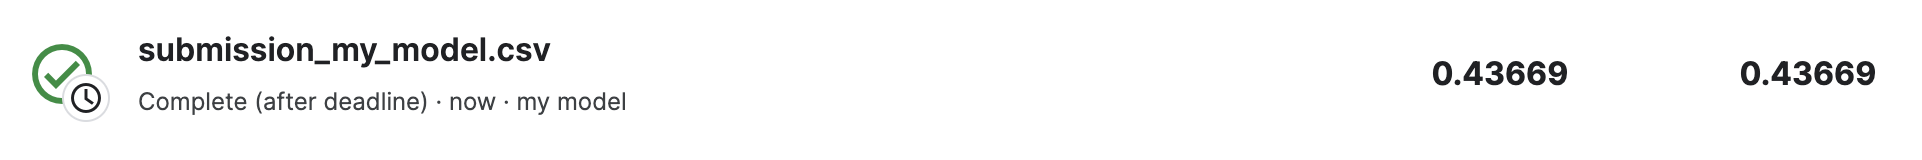

In [131]:
submission_res.head()

id         label
0   2019  9.345485e-16
1   7719  9.999913e-01
2   6450  1.000000e+00
3   6238  6.092805e-10
4  11349  1.000000e+00

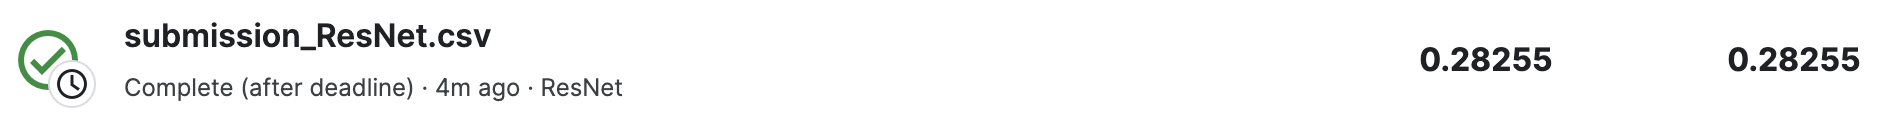

In [132]:
submission_xcept.head()

id     label
0   2019  0.000002
1   7719  0.999923
2   6450  0.994707
3   6238  0.000151
4  11349  0.999801

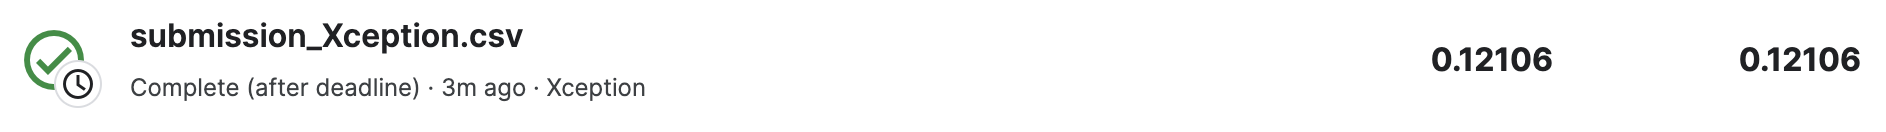

In [135]:
submission_model1.to_csv("submission_my_model.csv", index=False)
submission_res.to_csv("submission_ResNet.csv", index=False)
submission_xcept.to_csv("submission_Xception.csv", index=False)

The best score in Kaggle is transfer leanring with a score 0.12106.